In [ ]:
import numpy as np
import pandas as pd
import shutil
import os
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from PIL import Image
import csv
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, matthews_corrcoef
from collections import Counter
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
from skimage.feature import hog
from skimage import exposure

In [ ]:
# Load image folder and creat another image folder
data_dir = os.path.join(os.getcwd(), r'C:\\Users\\defaultuser0\\HAM10000_images')
dest_dir = os.path.join(os.getcwd(), r'C:\\Users\\defaultuser0\\imagess\\')

In [ ]:
# Load metadata
metadata_path = r'C:\Users\defaultuser0\HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

## Preprocessing and augmentation

In [ ]:
print(metadata['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [ ]:
label=metadata['dx'].unique().tolist()
label_images = []

In [ ]:
# To convert metadata with one image folder to 7 subfolder
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = metadata[metadata['dx']==i]['imageid']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/" + id + ".jpg"), (dest_dir + i + "/" + id +".jpg"))
        label_images=[]

In [ ]:
# Augment each class need it (df class)

# Path to the original images folder
original_images_folder = r'C:\Users\defaultuser0\imagess\df'

# Path to the folder where augmented images will be saved
augmented_images_folder =  r'C:\Users\defaultuser0\imagess\dfau'

# Number of augmented images
num_augmented_images = 7

# ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Iterate over each image in the original folder
for filename in tqdm(os.listdir(original_images_folder)):
    if filename.endswith(".jpg"):
        # Load the image
        img_path = os.path.join(original_images_folder, filename)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        augmented_images_list = []
        for batch in datagen.flow(img_array, batch_size=1):
            augmented_images_list.append(batch[0])

            # Stop augmentation after reaching the desired number of images
            if len(augmented_images_list) >= num_augmented_images:
                break

        # Save the original and augmented images
        for i, augmented_img in enumerate(augmented_images_list):
            augmented_filename = os.path.join(augmented_images_folder, f'augmented_{filename}_{i}.jpg')
            Image.fromarray(augmented_img.astype('uint8')).save(augmented_filename)

print("Augmentation complete.")

100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [02:20<00:00,  1.23s/it]

Augmentation complete.


In [ ]:
# Augment each class need it (akiec class)

# Path to the original images folder
original_images_folder = r'C:\Users\defaultuser0\imagess\akiec'

# Path to the folder where augmented images will be saved
augmented_images_folder =  r'C:\Users\defaultuser0\imagess\akiecau'

# Number of augmented images
num_augmented_images = 3

# ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Iterate over each image in the original folder
for filename in tqdm(os.listdir(original_images_folder)):
    if filename.endswith(".jpg"):
        # Load the image
        img_path = os.path.join(original_images_folder, filename)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        augmented_images_list = []
        for batch in datagen.flow(img_array, batch_size=1):
            augmented_images_list.append(batch[0])

            # Stop augmentation after reaching the desired number of images
            if len(augmented_images_list) >= num_augmented_images:
                break

        # Save the original and augmented images
        for i, augmented_img in enumerate(augmented_images_list):
            augmented_filename = os.path.join(augmented_images_folder, f'augmented_{filename}_{i}.jpg')
            Image.fromarray(augmented_img.astype('uint8')).save(augmented_filename)

print("Augmentation complete.")

100%|████████████████████████████████████████████████████████████████████████████████| 327/327 [03:08<00:00,  1.74it/s]

Augmentation complete.


In [ ]:
# Augment each class need to aumentation (bcc class)

# Path to the original images folder
original_images_folder = r'C:\Users\defaultuser0\imagess\bcc'

# Path to the folder where augmented images will be saved
augmented_images_folder =  r'C:\Users\defaultuser0\imagess\bccau'

# Number of augmented images
num_augmented_images = 2

# ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode= 'nearest'
)

# Iterate over each image in the original folder
for filename in tqdm(os.listdir(original_images_folder)):
    if filename.endswith(".jpg"):
        # Load the image
        img_path = os.path.join(original_images_folder, filename)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        augmented_images_list = []
        for batch in datagen.flow(img_array, batch_size=1):
            augmented_images_list.append(batch[0])

            # Stop augmentation after reaching the desired number of images
            if len(augmented_images_list) >= num_augmented_images:
                break

        # Save the original and augmented images
        for i, augmented_img in enumerate(augmented_images_list):
            augmented_filename = os.path.join(augmented_images_folder, f'augmented_{filename}_{i}.jpg')
            Image.fromarray(augmented_img.astype('uint8')).save(augmented_filename)

print("Augmentation complete.")

100%|████████████████████████████████████████████████████████████████████████████████| 514/514 [02:59<00:00,  2.87it/s]

Augmentation complete.


In [ ]:
# Augment each class need to aumentation (vasc class)

# Path to your original images folder
original_images_folder = r'C:\Users\defaultuser0\imagess\vasc'

# Path to the folder where augmented images will be saved
augmented_images_folder =  r'C:\Users\defaultuser0\imagess\vascau'

# Number of augmented images
num_augmented_images = 6

# ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Iterate over each image in the original folder
for filename in tqdm(os.listdir(original_images_folder)):
    if filename.endswith(".jpg"):
        # Load the image
        img_path = os.path.join(original_images_folder, filename)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        augmented_images_list = []
        for batch in datagen.flow(img_array, batch_size=1):
            augmented_images_list.append(batch[0])

            # Stop augmentation after reaching the desired number of images
            if len(augmented_images_list) >= num_augmented_images:
                break

        # Save the original and augmented images
        for i, augmented_img in enumerate(augmented_images_list):
            augmented_filename = os.path.join(augmented_images_folder, f'augmented_{filename}_{i}.jpg')
            Image.fromarray(augmented_img.astype('uint8')).save(augmented_filename)

print("Augmentation complete.")

100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [02:12<00:00,  1.07it/s]

Augmentation complete.


In [ ]:
# Resize all images folder into 224.224
def resize_images(input_folder, output_folder, target_size=(224, 224)):
    # Create the output folder
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    for file in files:
        # Construct the full path of the input image
        input_path = os.path.join(input_folder, file)

        # Open the image using PIL
        img = Image.open(input_path)

        # Resize the image
        img_resized = img.resize(target_size)

        # Construct the full path of the output image
        output_path = os.path.join(output_folder, file)

        # Save the resized image
        img_resized.save(output_path)

if __name__ == "__main__":
    # folder to resize
    input_folders = [
        r'C:\Users\defaultuser0\imagess\akiec',
        r'C:\Users\defaultuser0\imagess\bcc',
        r'C:\Users\defaultuser0\imagess\bkl',
        r'C:\Users\defaultuser0\imagess\df',
        r'C:\Users\defaultuser0\imagess\mel',
        r'C:\Users\defaultuser0\imagess\nv',
        r'C:\Users\defaultuser0\imagess\vasc'
    ]
    # output folders after resize
    output_folders = [
        r'C:\Users\defaultuser0\images_\akiec',
        r'C:\Users\defaultuser0\images_\bcc',
        r'C:\Users\defaultuser0\images_\bkl',
        r'C:\Users\defaultuser0\images_\df',
        r'C:\Users\defaultuser0\images_\mel',
        r'C:\Users\defaultuser0\images_\nv',
        r'C:\Users\defaultuser0\images_\vasc'
    ]

    # Specify the target size for resizing
    target_size = (224, 224)

    # Resize images for each class
    for input_folder, output_folder in zip(input_folders, output_folders):
        resize_images(input_folder, output_folder, target_size)

In [ ]:
#Creat metadata with three columns, image id which is the name of the image, the 'dx' class name which is the subfolder name, and the image path

#Root directory containing subfolders
root_directory = r'C:\Users\defaultuser0\images_'

# Initialize a list to store the data
data = []

# Iterate through subfolders
for subfolder in os.listdir(root_directory):
    subfolder_path = os.path.join(root_directory, subfolder)

    # Check if the item in the root directory is a subfolder
    if os.path.isdir(subfolder_path):
        # Iterate through image files in the subfolder
        for filename in os.listdir(subfolder_path):
            # Construct the full path to the image
            image_path = os.path.join(subfolder_path, filename)

            # Extract image ID from the filename
            image_id = os.path.splitext(filename)[0]

            # Append data to the list
            data.append([image_id, subfolder, image_path])

# The path for saving the new CSV file
csv_file_path = r'C:\test\metadataimage.csv'

# Write data to the CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Write header
    csv_writer.writerow(['image_id', 'dx', 'image_path'])

    # Write data rows
    csv_writer.writerows(data)

print(f"CSV file created at: {csv_file_path}")

CSV file created at: C:\test\metadataimage.csv


In [ ]:
#Load the new metadata
metadata_path = r'C:\test\metadataimage.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:
#To encode the labels in the 'dx' column
le = LabelEncoder()
le.fit(metadata['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
#To creat a new column 'label' transfored from 'dx'
metadata['label'] = le.transform(metadata["dx"])
print(metadata.sample(5))

           image_id  dx                                         image_path  \
6516   ISIC_0026472  nv  C:\Users\defaultuser0\images_\nv\ISIC_0026472.jpg   
9519   ISIC_0030836  nv  C:\Users\defaultuser0\images_\nv\ISIC_0030836.jpg   
9254   ISIC_0030466  nv  C:\Users\defaultuser0\images_\nv\ISIC_0030466.jpg   
10316  ISIC_0031975  nv  C:\Users\defaultuser0\images_\nv\ISIC_0031975.jpg   
10232  ISIC_0031858  nv  C:\Users\defaultuser0\images_\nv\ISIC_0031858.jpg   

       label  
6516       5  
9519       5  
9254       5  
10316      5  
10232      5  


In [ ]:
print(metadata)

                           image_id     dx  \
0      augmented_ISIC_0024329.jpg_0  akiec   
1      augmented_ISIC_0024329.jpg_1  akiec   
2      augmented_ISIC_0024329.jpg_2  akiec   
3      augmented_ISIC_0024372.jpg_0  akiec   
4      augmented_ISIC_0024372.jpg_1  akiec   
...                             ...    ...   
12578  augmented_ISIC_0034214.jpg_1   vasc   
12579  augmented_ISIC_0034214.jpg_2   vasc   
12580  augmented_ISIC_0034214.jpg_3   vasc   
12581  augmented_ISIC_0034214.jpg_4   vasc   
12582  augmented_ISIC_0034214.jpg_5   vasc   

                                              image_path  label  
0      C:\Users\defaultuser0\images_\akiec\augmented_...      0  
1      C:\Users\defaultuser0\images_\akiec\augmented_...      0  
2      C:\Users\defaultuser0\images_\akiec\augmented_...      0  
3      C:\Users\defaultuser0\images_\akiec\augmented_...      0  
4      C:\Users\defaultuser0\images_\akiec\augmented_...      0  
...                                                

In [ ]:
#Check the distribution of the label
print(metadata['label'].value_counts())

5    6705
4    1113
2    1099
1    1028
0     981
6     852
3     805
Name: label, dtype: int64


In [ ]:
#To creat separate DataFrames
df_0 = metadata[metadata['label'] == 0]
df_1 = metadata[metadata['label'] == 1]
df_2 = metadata[metadata['label'] == 2]
df_3 = metadata[metadata['label'] == 3]
df_4 = metadata[metadata['label'] == 4]
df_5 = metadata[metadata['label'] == 5]
df_6 = metadata[metadata['label'] == 6]

In [ ]:
#Undersampling each dataframe
n_samples=800
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
#Build the new balanced Dataframe
metadata_balanced = pd.concat([df_0_balanced,df_1_balanced,
                               df_2_balanced, df_3_balanced,
                               df_4_balanced, df_5_balanced,df_6_balanced])

In [ ]:
#Check
print(metadata_balanced['label'].value_counts())

0    800
1    800
2    800
3    800
4    800
5    800
6    800
Name: label, dtype: int64


<Axes: >

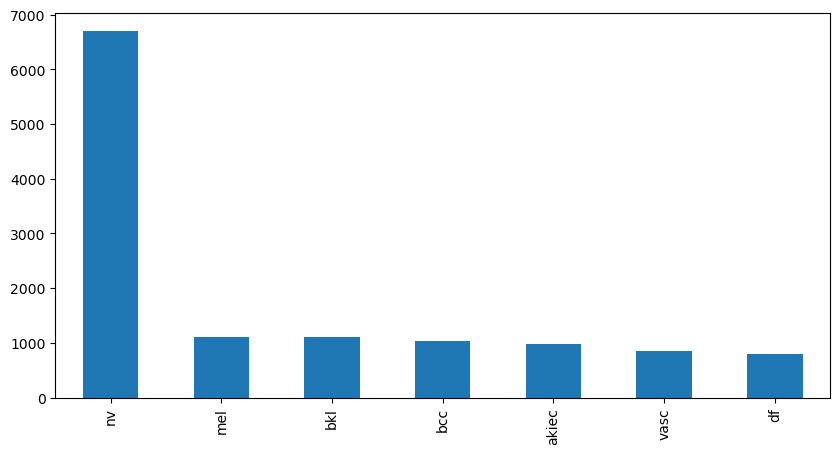

In [ ]:
#visual the distribution before and after
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
metadata['dx'].value_counts().plot(kind='bar', ax=ax1)

<Axes: >

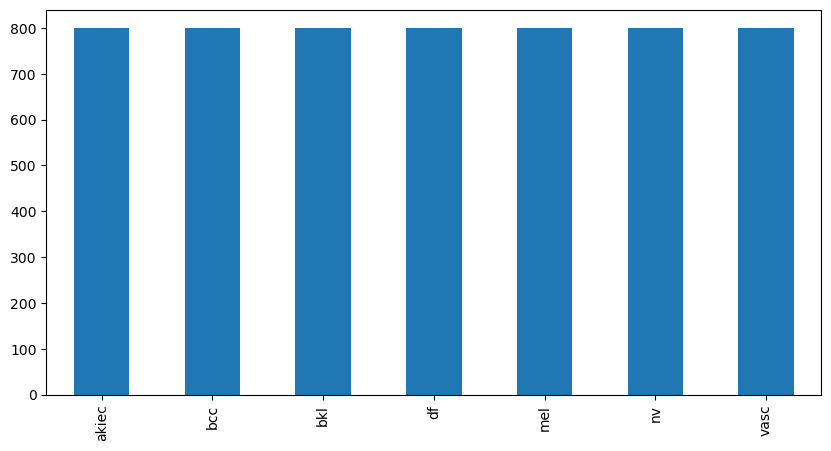

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
metadata_balanced['dx'].value_counts().plot(kind='bar', ax=ax1)

In [ ]:
#save the new balanced metadata in a csv file
metadata_balanced.to_csv(r'C:\test\metadata_image.csv', index=False)

## VGG16 Feature extreaction with SVM , RF, and LR Classifers

In [ ]:
# Load metadata
metadata_path = r'C:\test\metadata_image.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:
metadata.sample(4)

image_id   dx  \
4648                  ISIC_0032500   nv   
1242  augmented_ISIC_0029034.jpg_0  bcc   
1716                  ISIC_0033646  bkl   
1071  augmented_ISIC_0029647.jpg_0  bcc   

                                             image_path  label  
4648  C:\Users\defaultuser0\images_\nv\ISIC_0032500.jpg      5  
1242  C:\Users\defaultuser0\images_\bcc\augmented_IS...      1  
1716  C:\Users\defaultuser0\images_\bkl\ISIC_0033646...      2  
1071  C:\Users\defaultuser0\images_\bcc\augmented_IS...      1

In [ ]:
print(metadata)

                          image_id     dx  \
0     augmented_ISIC_0025247.jpg_0  akiec   
1     augmented_ISIC_0028132.jpg_0  akiec   
2     augmented_ISIC_0031918.jpg_2  akiec   
3     augmented_ISIC_0026645.jpg_0  akiec   
4     augmented_ISIC_0025264.jpg_1  akiec   
...                            ...    ...   
5595  augmented_ISIC_0029439.jpg_5   vasc   
5596  augmented_ISIC_0024747.jpg_4   vasc   
5597  augmented_ISIC_0026693.jpg_4   vasc   
5598  augmented_ISIC_0027790.jpg_4   vasc   
5599  augmented_ISIC_0031197.jpg_3   vasc   

                                             image_path  label  
0     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
1     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
2     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
3     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
4     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
...                                                 ...    ...  
5595

In [ ]:
# Feature extreaction using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a function to extract features
def extract_features(img_paths, model, target_size=(224, 224)):
    features_list = []

    for img_path in tqdm(img_paths, desc="Extracting Features"):
        try:
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Extract features using the pre-trained model
            features = model.predict(img_array)
            features_list.append(features.flatten())

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    return np.array(features_list)

img_paths = metadata['image_path'].tolist()

# Extract features for the entire dataset
features = extract_features(img_paths, base_model)

Extracting Features:   0%|                                                                    | 0/5600 [00:00<?, ?it/s]

1/1 [==============================] - 1s 853ms/step


Extracting Features:   0%|                                                          | 1/5600 [00:00<1:32:16,  1.01it/s]

1/1 [==============================] - 1s 542ms/step


Extracting Features:   0%|                                                          | 2/5600 [00:01<1:14:54,  1.25it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:   0%|                                                          | 3/5600 [00:02<1:07:09,  1.39it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:   0%|                                                          | 4/5600 [00:02<1:02:04,  1.50it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:   0%|                                                            | 5/5600 [00:03<59:34,  1.57it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:   0%|                                                            | 6/5600 [00:04<57:16,  1.63it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:   0%|                                                            | 7/5600 [00:04<55:57,  1.67it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:   0%|                                                            | 8/5600 [00:05<55:32,  1.68it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   0%|                                                            | 9/5600 [00:05<55:53,  1.67it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   0%|                                                           | 10/5600 [00:06<54:54,  1.70it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   0%|                                                           | 11/5600 [00:06<54:07,  1.72it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   0%|▏                                                          | 12/5600 [00:07<53:37,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:   0%|▏                                                          | 13/5600 [00:08<53:32,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:   0%|▏                                                          | 14/5600 [00:08<54:17,  1.71it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:   0%|▏                                                          | 15/5600 [00:09<55:05,  1.69it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   0%|▏                                                          | 16/5600 [00:09<54:01,  1.72it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:   0%|▏                                                          | 17/5600 [00:10<54:53,  1.70it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   0%|▏                                                          | 18/5600 [00:11<54:17,  1.71it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:   0%|▏                                                          | 19/5600 [00:11<54:31,  1.71it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   0%|▏                                                          | 20/5600 [00:12<53:33,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:   0%|▏                                                          | 21/5600 [00:12<53:04,  1.75it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   0%|▏                                                          | 22/5600 [00:13<52:54,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   0%|▏                                                          | 23/5600 [00:13<52:20,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   0%|▎                                                          | 24/5600 [00:14<52:27,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   0%|▎                                                          | 25/5600 [00:14<52:26,  1.77it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:   0%|▎                                                          | 26/5600 [00:15<53:48,  1.73it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   0%|▎                                                          | 27/5600 [00:16<53:16,  1.74it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   0%|▎                                                          | 28/5600 [00:16<52:57,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   1%|▎                                                          | 29/5600 [00:17<52:26,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   1%|▎                                                          | 30/5600 [00:17<51:57,  1.79it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:   1%|▎                                                          | 31/5600 [00:18<53:19,  1.74it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:   1%|▎                                                          | 32/5600 [00:18<53:27,  1.74it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   1%|▎                                                          | 33/5600 [00:19<52:36,  1.76it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:   1%|▎                                                          | 34/5600 [00:20<53:05,  1.75it/s]

1/1 [==============================] - 1s 673ms/step


Extracting Features:   1%|▎                                                          | 35/5600 [00:20<59:16,  1.56it/s]

1/1 [==============================] - 1s 580ms/step


Extracting Features:   1%|▎                                                        | 36/5600 [00:21<1:06:30,  1.39it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:   1%|▍                                                        | 37/5600 [00:22<1:03:57,  1.45it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:   1%|▍                                                        | 38/5600 [00:22<1:00:28,  1.53it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   1%|▍                                                          | 39/5600 [00:23<59:41,  1.55it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:   1%|▍                                                          | 40/5600 [00:24<57:58,  1.60it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:   1%|▍                                                          | 41/5600 [00:24<57:14,  1.62it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:   1%|▍                                                          | 42/5600 [00:25<56:25,  1.64it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:   1%|▍                                                          | 43/5600 [00:25<55:53,  1.66it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   1%|▍                                                          | 44/5600 [00:26<55:13,  1.68it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:   1%|▍                                                          | 45/5600 [00:27<54:23,  1.70it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:   1%|▍                                                          | 46/5600 [00:27<54:09,  1.71it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:   1%|▍                                                          | 47/5600 [00:28<54:00,  1.71it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   1%|▌                                                          | 48/5600 [00:28<53:43,  1.72it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:   1%|▌                                                          | 49/5600 [00:29<54:04,  1.71it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   1%|▌                                                          | 50/5600 [00:30<53:19,  1.73it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:   1%|▌                                                          | 51/5600 [00:30<54:06,  1.71it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:   1%|▌                                                          | 52/5600 [00:31<54:46,  1.69it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   1%|▌                                                          | 53/5600 [00:31<54:40,  1.69it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   1%|▌                                                          | 54/5600 [00:32<54:53,  1.68it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:   1%|▌                                                          | 55/5600 [00:33<55:41,  1.66it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   1%|▌                                                          | 56/5600 [00:33<54:08,  1.71it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   1%|▌                                                          | 57/5600 [00:34<53:15,  1.73it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   1%|▌                                                          | 58/5600 [00:34<52:33,  1.76it/s]

1/1 [==============================] - 1s 507ms/step


Extracting Features:   1%|▌                                                          | 59/5600 [00:35<53:57,  1.71it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   1%|▋                                                          | 60/5600 [00:35<53:31,  1.73it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:   1%|▋                                                          | 61/5600 [00:36<54:34,  1.69it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   1%|▋                                                          | 62/5600 [00:37<53:37,  1.72it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   1%|▋                                                          | 63/5600 [00:37<52:54,  1.74it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   1%|▋                                                          | 64/5600 [00:38<53:42,  1.72it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   1%|▋                                                          | 65/5600 [00:38<53:04,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   1%|▋                                                          | 66/5600 [00:39<52:36,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:   1%|▋                                                          | 67/5600 [00:39<52:04,  1.77it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:   1%|▋                                                          | 68/5600 [00:40<52:02,  1.77it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   1%|▋                                                          | 69/5600 [00:40<51:36,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   1%|▋                                                          | 70/5600 [00:41<52:43,  1.75it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:   1%|▋                                                          | 71/5600 [00:42<53:32,  1.72it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:   1%|▊                                                          | 72/5600 [00:42<53:49,  1.71it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   1%|▊                                                          | 73/5600 [00:43<53:06,  1.73it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:   1%|▊                                                          | 74/5600 [00:43<53:46,  1.71it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:   1%|▊                                                          | 75/5600 [00:44<54:07,  1.70it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   1%|▊                                                          | 76/5600 [00:45<53:12,  1.73it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   1%|▊                                                          | 77/5600 [00:45<52:34,  1.75it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:   1%|▊                                                          | 78/5600 [00:46<53:16,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:   1%|▊                                                          | 79/5600 [00:46<53:59,  1.70it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:   1%|▊                                                          | 80/5600 [00:47<53:53,  1.71it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   1%|▊                                                          | 81/5600 [00:48<53:21,  1.72it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   1%|▊                                                          | 82/5600 [00:48<52:42,  1.74it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   1%|▊                                                          | 83/5600 [00:49<52:01,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   2%|▉                                                          | 84/5600 [00:49<51:58,  1.77it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:   2%|▉                                                          | 85/5600 [00:50<52:47,  1.74it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   2%|▉                                                          | 86/5600 [00:50<52:03,  1.77it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:   2%|▉                                                          | 87/5600 [00:51<51:55,  1.77it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:   2%|▉                                                          | 88/5600 [00:51<52:03,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   2%|▉                                                          | 89/5600 [00:52<51:51,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:   2%|▉                                                          | 90/5600 [00:53<51:37,  1.78it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   2%|▉                                                          | 91/5600 [00:53<52:02,  1.76it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   2%|▉                                                          | 92/5600 [00:54<52:31,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:   2%|▉                                                          | 93/5600 [00:54<51:46,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   2%|▉                                                          | 94/5600 [00:55<51:29,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:   2%|█                                                          | 95/5600 [00:55<52:14,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   2%|█                                                          | 96/5600 [00:56<52:10,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   2%|█                                                          | 97/5600 [00:57<52:00,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   2%|█                                                          | 98/5600 [00:57<51:55,  1.77it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:   2%|█                                                          | 99/5600 [00:58<51:56,  1.77it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   2%|█                                                         | 100/5600 [00:58<51:54,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   2%|█                                                         | 101/5600 [00:59<51:28,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   2%|█                                                         | 102/5600 [00:59<51:25,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   2%|█                                                         | 103/5600 [01:00<50:51,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   2%|█                                                         | 104/5600 [01:00<50:44,  1.81it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:   2%|█                                                         | 105/5600 [01:01<51:38,  1.77it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   2%|█                                                         | 106/5600 [01:02<52:18,  1.75it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:   2%|█                                                         | 107/5600 [01:02<52:19,  1.75it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   2%|█                                                         | 108/5600 [01:03<51:41,  1.77it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:   2%|█▏                                                        | 109/5600 [01:03<52:32,  1.74it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   2%|█▏                                                        | 110/5600 [01:04<52:12,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   2%|█▏                                                        | 111/5600 [01:04<52:08,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   2%|█▏                                                        | 112/5600 [01:05<51:40,  1.77it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   2%|█▏                                                        | 113/5600 [01:06<52:06,  1.75it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:   2%|█▏                                                        | 114/5600 [01:06<53:31,  1.71it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:   2%|█▏                                                        | 115/5600 [01:07<53:10,  1.72it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:   2%|█▏                                                        | 116/5600 [01:07<54:23,  1.68it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   2%|█▏                                                        | 117/5600 [01:08<53:23,  1.71it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   2%|█▏                                                        | 118/5600 [01:09<52:21,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:   2%|█▏                                                        | 119/5600 [01:09<52:54,  1.73it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   2%|█▏                                                        | 120/5600 [01:10<52:29,  1.74it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   2%|█▎                                                        | 121/5600 [01:10<52:20,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   2%|█▎                                                        | 122/5600 [01:11<52:09,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   2%|█▎                                                        | 123/5600 [01:11<51:35,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   2%|█▎                                                        | 124/5600 [01:12<51:03,  1.79it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:   2%|█▎                                                        | 125/5600 [01:12<50:54,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   2%|█▎                                                        | 126/5600 [01:13<50:46,  1.80it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   2%|█▎                                                        | 127/5600 [01:14<51:43,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   2%|█▎                                                        | 128/5600 [01:14<51:09,  1.78it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:   2%|█▎                                                        | 129/5600 [01:15<52:34,  1.73it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:   2%|█▎                                                        | 130/5600 [01:15<52:54,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   2%|█▎                                                        | 131/5600 [01:16<52:03,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   2%|█▎                                                        | 132/5600 [01:16<51:51,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   2%|█▍                                                        | 133/5600 [01:17<51:22,  1.77it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   2%|█▍                                                        | 134/5600 [01:18<51:28,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   2%|█▍                                                        | 135/5600 [01:18<51:25,  1.77it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   2%|█▍                                                        | 136/5600 [01:19<51:00,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   2%|█▍                                                        | 137/5600 [01:19<51:08,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:   2%|█▍                                                        | 138/5600 [01:20<52:16,  1.74it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:   2%|█▍                                                        | 139/5600 [01:21<53:20,  1.71it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:   2%|█▍                                                        | 140/5600 [01:21<52:23,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   3%|█▍                                                        | 141/5600 [01:22<52:25,  1.74it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:   3%|█▍                                                        | 142/5600 [01:22<52:47,  1.72it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   3%|█▍                                                        | 143/5600 [01:23<52:11,  1.74it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   3%|█▍                                                        | 144/5600 [01:23<51:23,  1.77it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:   3%|█▌                                                        | 145/5600 [01:24<52:40,  1.73it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   3%|█▌                                                        | 146/5600 [01:25<52:51,  1.72it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:   3%|█▌                                                        | 147/5600 [01:25<52:09,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   3%|█▌                                                        | 148/5600 [01:26<51:37,  1.76it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   3%|█▌                                                        | 149/5600 [01:26<51:31,  1.76it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   3%|█▌                                                        | 150/5600 [01:27<52:15,  1.74it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   3%|█▌                                                        | 151/5600 [01:27<51:51,  1.75it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   3%|█▌                                                        | 152/5600 [01:28<52:07,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   3%|█▌                                                        | 153/5600 [01:28<51:24,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   3%|█▌                                                        | 154/5600 [01:29<51:17,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   3%|█▌                                                        | 155/5600 [01:30<50:56,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:   3%|█▌                                                        | 156/5600 [01:30<51:43,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   3%|█▋                                                        | 157/5600 [01:31<51:00,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   3%|█▋                                                        | 158/5600 [01:31<50:41,  1.79it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:   3%|█▋                                                        | 159/5600 [01:32<51:10,  1.77it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   3%|█▋                                                        | 160/5600 [01:32<51:08,  1.77it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   3%|█▋                                                        | 161/5600 [01:33<51:02,  1.78it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:   3%|█▋                                                        | 162/5600 [01:34<51:37,  1.76it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   3%|█▋                                                        | 163/5600 [01:34<52:33,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   3%|█▋                                                        | 164/5600 [01:35<51:41,  1.75it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   3%|█▋                                                        | 165/5600 [01:35<51:00,  1.78it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:   3%|█▋                                                        | 166/5600 [01:36<51:42,  1.75it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   3%|█▋                                                        | 167/5600 [01:36<51:18,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   3%|█▋                                                        | 168/5600 [01:37<50:59,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   3%|█▊                                                        | 169/5600 [01:38<50:55,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:   3%|█▊                                                        | 170/5600 [01:38<51:09,  1.77it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:   3%|█▊                                                        | 171/5600 [01:39<52:33,  1.72it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:   3%|█▊                                                        | 172/5600 [01:39<52:49,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   3%|█▊                                                        | 173/5600 [01:40<52:07,  1.74it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   3%|█▊                                                        | 174/5600 [01:40<51:25,  1.76it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   3%|█▊                                                        | 175/5600 [01:41<51:39,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   3%|█▊                                                        | 176/5600 [01:42<51:20,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   3%|█▊                                                        | 177/5600 [01:42<50:42,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   3%|█▊                                                        | 178/5600 [01:43<50:47,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   3%|█▊                                                        | 179/5600 [01:43<51:18,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   3%|█▊                                                        | 180/5600 [01:44<50:36,  1.78it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:   3%|█▊                                                        | 181/5600 [01:44<51:05,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   3%|█▉                                                        | 182/5600 [01:45<50:42,  1.78it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   3%|█▉                                                        | 183/5600 [01:45<51:01,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   3%|█▉                                                        | 184/5600 [01:46<51:49,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   3%|█▉                                                        | 185/5600 [01:47<51:23,  1.76it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   3%|█▉                                                        | 186/5600 [01:47<51:08,  1.76it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   3%|█▉                                                        | 187/5600 [01:48<51:04,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:   3%|█▉                                                        | 188/5600 [01:48<50:57,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   3%|█▉                                                        | 189/5600 [01:49<50:28,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   3%|█▉                                                        | 190/5600 [01:49<50:02,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   3%|█▉                                                        | 191/5600 [01:50<50:14,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   3%|█▉                                                        | 192/5600 [01:51<50:18,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   3%|█▉                                                        | 193/5600 [01:51<50:32,  1.78it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:   3%|██                                                        | 194/5600 [01:52<52:13,  1.72it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   3%|██                                                        | 195/5600 [01:52<52:30,  1.72it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   4%|██                                                        | 196/5600 [01:53<51:45,  1.74it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:   4%|██                                                        | 197/5600 [01:53<51:10,  1.76it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   4%|██                                                        | 198/5600 [01:54<51:53,  1.73it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   4%|██                                                        | 199/5600 [01:55<52:21,  1.72it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:   4%|██                                                        | 200/5600 [01:55<52:31,  1.71it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   4%|██                                                        | 201/5600 [01:56<52:45,  1.71it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   4%|██                                                        | 202/5600 [01:56<52:49,  1.70it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   4%|██                                                        | 203/5600 [01:57<52:03,  1.73it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:   4%|██                                                        | 204/5600 [01:58<51:54,  1.73it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   4%|██                                                        | 205/5600 [01:58<51:00,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   4%|██▏                                                       | 206/5600 [01:59<51:04,  1.76it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:   4%|██▏                                                       | 207/5600 [01:59<51:11,  1.76it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:   4%|██▏                                                       | 208/5600 [02:00<51:43,  1.74it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   4%|██▏                                                       | 209/5600 [02:00<50:56,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   4%|██▏                                                       | 210/5600 [02:01<50:52,  1.77it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:   4%|██▏                                                       | 211/5600 [02:02<51:39,  1.74it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   4%|██▏                                                       | 212/5600 [02:02<51:04,  1.76it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   4%|██▏                                                       | 213/5600 [02:03<51:59,  1.73it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   4%|██▏                                                       | 214/5600 [02:03<51:34,  1.74it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:   4%|██▏                                                       | 215/5600 [02:04<52:28,  1.71it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:   4%|██▏                                                       | 216/5600 [02:04<52:26,  1.71it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   4%|██▏                                                       | 217/5600 [02:05<51:40,  1.74it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   4%|██▎                                                       | 218/5600 [02:06<52:47,  1.70it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   4%|██▎                                                       | 219/5600 [02:06<53:09,  1.69it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   4%|██▎                                                       | 220/5600 [02:07<52:37,  1.70it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:   4%|██▎                                                       | 221/5600 [02:07<51:37,  1.74it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:   4%|██▎                                                       | 222/5600 [02:08<52:15,  1.72it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   4%|██▎                                                       | 223/5600 [02:08<51:24,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   4%|██▎                                                       | 224/5600 [02:09<51:41,  1.73it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:   4%|██▎                                                       | 225/5600 [02:10<51:46,  1.73it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:   4%|██▎                                                       | 226/5600 [02:10<51:51,  1.73it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:   4%|██▎                                                       | 227/5600 [02:11<51:56,  1.72it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   4%|██▎                                                       | 228/5600 [02:11<50:53,  1.76it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:   4%|██▎                                                       | 229/5600 [02:12<50:44,  1.76it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   4%|██▍                                                       | 230/5600 [02:13<51:18,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   4%|██▍                                                       | 231/5600 [02:13<50:57,  1.76it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:   4%|██▍                                                       | 232/5600 [02:14<52:14,  1.71it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   4%|██▍                                                       | 233/5600 [02:14<51:22,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   4%|██▍                                                       | 234/5600 [02:15<50:36,  1.77it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   4%|██▍                                                       | 235/5600 [02:15<50:37,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   4%|██▍                                                       | 236/5600 [02:16<50:42,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   4%|██▍                                                       | 237/5600 [02:16<49:57,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   4%|██▍                                                       | 238/5600 [02:17<49:33,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   4%|██▍                                                       | 239/5600 [02:18<49:49,  1.79it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   4%|██▍                                                       | 240/5600 [02:18<50:44,  1.76it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   4%|██▍                                                       | 241/5600 [02:19<51:49,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   4%|██▌                                                       | 242/5600 [02:19<51:33,  1.73it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   4%|██▌                                                       | 243/5600 [02:20<50:46,  1.76it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   4%|██▌                                                       | 244/5600 [02:20<50:07,  1.78it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   4%|██▌                                                       | 245/5600 [02:21<50:51,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   4%|██▌                                                       | 246/5600 [02:22<50:49,  1.76it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   4%|██▌                                                       | 247/5600 [02:22<51:06,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   4%|██▌                                                       | 248/5600 [02:23<50:53,  1.75it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:   4%|██▌                                                       | 249/5600 [02:23<50:54,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   4%|██▌                                                       | 250/5600 [02:24<50:19,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   4%|██▌                                                       | 251/5600 [02:24<50:39,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   4%|██▌                                                       | 252/5600 [02:25<50:23,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   5%|██▌                                                       | 253/5600 [02:26<49:57,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   5%|██▋                                                       | 254/5600 [02:26<49:29,  1.80it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   5%|██▋                                                       | 255/5600 [02:27<50:50,  1.75it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:   5%|██▋                                                       | 256/5600 [02:27<49:47,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   5%|██▋                                                       | 257/5600 [02:28<49:29,  1.80it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:   5%|██▋                                                       | 258/5600 [02:28<50:45,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   5%|██▋                                                       | 259/5600 [02:29<50:19,  1.77it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   5%|██▋                                                       | 260/5600 [02:30<50:30,  1.76it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:   5%|██▋                                                       | 261/5600 [02:30<50:40,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   5%|██▋                                                       | 262/5600 [02:31<51:18,  1.73it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   5%|██▋                                                       | 263/5600 [02:31<50:13,  1.77it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   5%|██▋                                                       | 264/5600 [02:32<51:39,  1.72it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:   5%|██▋                                                       | 265/5600 [02:32<52:00,  1.71it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:   5%|██▊                                                       | 266/5600 [02:33<52:09,  1.70it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   5%|██▊                                                       | 267/5600 [02:34<52:10,  1.70it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   5%|██▊                                                       | 268/5600 [02:34<51:30,  1.73it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   5%|██▊                                                       | 269/5600 [02:35<51:37,  1.72it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:   5%|██▊                                                       | 270/5600 [02:35<51:22,  1.73it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   5%|██▊                                                       | 271/5600 [02:36<50:50,  1.75it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   5%|██▊                                                       | 272/5600 [02:36<51:50,  1.71it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:   5%|██▊                                                       | 273/5600 [02:37<51:42,  1.72it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   5%|██▊                                                       | 274/5600 [02:38<51:11,  1.73it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   5%|██▊                                                       | 275/5600 [02:38<51:21,  1.73it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:   5%|██▊                                                       | 276/5600 [02:39<50:29,  1.76it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:   5%|██▊                                                       | 277/5600 [02:39<50:57,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   5%|██▉                                                       | 278/5600 [02:40<50:38,  1.75it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   5%|██▉                                                       | 279/5600 [02:41<51:20,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   5%|██▉                                                       | 280/5600 [02:41<50:28,  1.76it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:   5%|██▉                                                       | 281/5600 [02:42<50:34,  1.75it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   5%|██▉                                                       | 282/5600 [02:42<49:59,  1.77it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:   5%|██▉                                                       | 283/5600 [02:43<50:31,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   5%|██▉                                                       | 284/5600 [02:43<49:43,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:   5%|██▉                                                       | 285/5600 [02:44<49:32,  1.79it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   5%|██▉                                                       | 286/5600 [02:44<50:38,  1.75it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:   5%|██▉                                                       | 287/5600 [02:45<51:16,  1.73it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   5%|██▉                                                       | 288/5600 [02:46<51:41,  1.71it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   5%|██▉                                                       | 289/5600 [02:46<50:33,  1.75it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   5%|███                                                       | 290/5600 [02:47<49:48,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:   5%|███                                                       | 291/5600 [02:47<49:31,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   5%|███                                                       | 292/5600 [02:48<50:57,  1.74it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:   5%|███                                                       | 293/5600 [02:48<51:20,  1.72it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   5%|███                                                       | 294/5600 [02:49<50:25,  1.75it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:   5%|███                                                       | 295/5600 [02:50<50:28,  1.75it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   5%|███                                                       | 296/5600 [02:50<50:54,  1.74it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   5%|███                                                       | 297/5600 [02:51<50:17,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   5%|███                                                       | 298/5600 [02:51<49:30,  1.78it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:   5%|███                                                       | 299/5600 [02:52<51:14,  1.72it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   5%|███                                                       | 300/5600 [02:52<50:40,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   5%|███                                                       | 301/5600 [02:53<50:10,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   5%|███▏                                                      | 302/5600 [02:54<50:02,  1.76it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:   5%|███▏                                                      | 303/5600 [02:54<50:19,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   5%|███▏                                                      | 304/5600 [02:55<49:58,  1.77it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   5%|███▏                                                      | 305/5600 [02:55<50:50,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   5%|███▏                                                      | 306/5600 [02:56<49:56,  1.77it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   5%|███▏                                                      | 307/5600 [02:56<49:16,  1.79it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   6%|███▏                                                      | 308/5600 [02:57<50:23,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   6%|███▏                                                      | 309/5600 [02:58<49:48,  1.77it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   6%|███▏                                                      | 310/5600 [02:58<50:47,  1.74it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:   6%|███▏                                                      | 311/5600 [02:59<50:59,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   6%|███▏                                                      | 312/5600 [02:59<50:54,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   6%|███▏                                                      | 313/5600 [03:00<50:12,  1.76it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:   6%|███▎                                                      | 314/5600 [03:00<51:35,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   6%|███▎                                                      | 315/5600 [03:01<50:27,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   6%|███▎                                                      | 316/5600 [03:02<50:16,  1.75it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:   6%|███▎                                                      | 317/5600 [03:02<50:48,  1.73it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:   6%|███▎                                                      | 318/5600 [03:03<51:09,  1.72it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:   6%|███▎                                                      | 319/5600 [03:03<50:53,  1.73it/s]

1/1 [==============================] - 1s 505ms/step


Extracting Features:   6%|███▎                                                      | 320/5600 [03:04<51:55,  1.69it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   6%|███▎                                                      | 321/5600 [03:05<52:14,  1.68it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:   6%|███▎                                                      | 322/5600 [03:05<51:04,  1.72it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   6%|███▎                                                      | 323/5600 [03:06<50:37,  1.74it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   6%|███▎                                                      | 324/5600 [03:06<50:13,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   6%|███▎                                                      | 325/5600 [03:07<50:07,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   6%|███▍                                                      | 326/5600 [03:07<49:17,  1.78it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:   6%|███▍                                                      | 327/5600 [03:08<50:11,  1.75it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   6%|███▍                                                      | 328/5600 [03:09<49:31,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:   6%|███▍                                                      | 329/5600 [03:09<48:54,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:   6%|███▍                                                      | 330/5600 [03:10<49:15,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   6%|███▍                                                      | 331/5600 [03:10<49:55,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   6%|███▍                                                      | 332/5600 [03:11<49:47,  1.76it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   6%|███▍                                                      | 333/5600 [03:11<49:36,  1.77it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   6%|███▍                                                      | 334/5600 [03:12<50:07,  1.75it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   6%|███▍                                                      | 335/5600 [03:12<50:20,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   6%|███▍                                                      | 336/5600 [03:13<49:32,  1.77it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   6%|███▍                                                      | 337/5600 [03:14<49:08,  1.78it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   6%|███▌                                                      | 338/5600 [03:14<49:03,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   6%|███▌                                                      | 339/5600 [03:15<49:31,  1.77it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   6%|███▌                                                      | 340/5600 [03:15<49:38,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   6%|███▌                                                      | 341/5600 [03:16<49:09,  1.78it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   6%|███▌                                                      | 342/5600 [03:16<49:40,  1.76it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   6%|███▌                                                      | 343/5600 [03:17<49:39,  1.76it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:   6%|███▌                                                      | 344/5600 [03:18<50:13,  1.74it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:   6%|███▌                                                      | 345/5600 [03:18<50:41,  1.73it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:   6%|███▌                                                      | 346/5600 [03:19<50:52,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   6%|███▌                                                      | 347/5600 [03:19<50:06,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   6%|███▌                                                      | 348/5600 [03:20<49:26,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   6%|███▌                                                      | 349/5600 [03:20<49:03,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   6%|███▋                                                      | 350/5600 [03:21<49:00,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   6%|███▋                                                      | 351/5600 [03:22<48:54,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   6%|███▋                                                      | 352/5600 [03:22<48:59,  1.79it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:   6%|███▋                                                      | 353/5600 [03:23<49:49,  1.76it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:   6%|███▋                                                      | 354/5600 [03:23<50:04,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   6%|███▋                                                      | 355/5600 [03:24<49:29,  1.77it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   6%|███▋                                                      | 356/5600 [03:24<48:45,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   6%|███▋                                                      | 357/5600 [03:25<48:26,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   6%|███▋                                                      | 358/5600 [03:25<48:17,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:   6%|███▋                                                      | 359/5600 [03:26<48:05,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   6%|███▋                                                      | 360/5600 [03:27<48:44,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   6%|███▋                                                      | 361/5600 [03:27<48:34,  1.80it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:   6%|███▋                                                      | 362/5600 [03:28<49:55,  1.75it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:   6%|███▊                                                      | 363/5600 [03:28<49:55,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   6%|███▊                                                      | 364/5600 [03:29<49:11,  1.77it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:   7%|███▊                                                      | 365/5600 [03:29<49:05,  1.78it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   7%|███▊                                                      | 366/5600 [03:30<49:16,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   7%|███▊                                                      | 367/5600 [03:31<49:39,  1.76it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:   7%|███▊                                                      | 368/5600 [03:31<49:59,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:   7%|███▋                                                    | 369/5600 [03:32<1:05:30,  1.33it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:   7%|███▋                                                    | 370/5600 [03:33<1:01:32,  1.42it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   7%|███▊                                                      | 371/5600 [03:33<57:00,  1.53it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   7%|███▊                                                      | 372/5600 [03:34<55:11,  1.58it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   7%|███▊                                                      | 373/5600 [03:35<53:05,  1.64it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:   7%|███▊                                                      | 374/5600 [03:35<51:53,  1.68it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   7%|███▉                                                      | 375/5600 [03:36<50:32,  1.72it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:   7%|███▉                                                      | 376/5600 [03:36<49:44,  1.75it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   7%|███▉                                                      | 377/5600 [03:37<49:20,  1.76it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   7%|███▉                                                      | 378/5600 [03:37<48:57,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:   7%|███▉                                                      | 379/5600 [03:38<49:46,  1.75it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   7%|███▉                                                      | 380/5600 [03:39<50:26,  1.72it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:   7%|███▉                                                      | 381/5600 [03:39<50:26,  1.72it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   7%|███▉                                                      | 382/5600 [03:40<50:49,  1.71it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   7%|███▉                                                      | 383/5600 [03:40<50:09,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   7%|███▉                                                      | 384/5600 [03:41<49:39,  1.75it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:   7%|███▉                                                      | 385/5600 [03:41<49:36,  1.75it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   7%|███▉                                                      | 386/5600 [03:42<50:21,  1.73it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:   7%|████                                                      | 387/5600 [03:43<50:59,  1.70it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   7%|████                                                      | 388/5600 [03:43<50:16,  1.73it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   7%|████                                                      | 389/5600 [03:44<49:54,  1.74it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:   7%|████                                                      | 390/5600 [03:44<50:13,  1.73it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:   7%|████                                                      | 391/5600 [03:45<50:38,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   7%|████                                                      | 392/5600 [03:45<49:34,  1.75it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:   7%|████                                                      | 393/5600 [03:46<50:05,  1.73it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   7%|████                                                      | 394/5600 [03:47<49:05,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   7%|████                                                      | 395/5600 [03:47<48:31,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   7%|████                                                      | 396/5600 [03:48<50:09,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:   7%|████                                                      | 397/5600 [03:48<50:18,  1.72it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:   7%|████                                                      | 398/5600 [03:49<49:57,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:   7%|████▏                                                     | 399/5600 [03:49<48:50,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   7%|████▏                                                     | 400/5600 [03:50<48:52,  1.77it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:   7%|████▏                                                     | 401/5600 [03:51<50:12,  1.73it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:   7%|████▏                                                     | 402/5600 [03:51<50:26,  1.72it/s]

1/1 [==============================] - 1s 512ms/step


Extracting Features:   7%|████▏                                                     | 403/5600 [03:52<51:50,  1.67it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   7%|████▏                                                     | 404/5600 [03:52<50:29,  1.71it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:   7%|████▏                                                     | 405/5600 [03:53<49:35,  1.75it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:   7%|████▏                                                     | 406/5600 [03:53<49:38,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:   7%|████▏                                                     | 407/5600 [03:54<49:45,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   7%|████▏                                                     | 408/5600 [03:55<49:14,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   7%|████▏                                                     | 409/5600 [03:55<48:21,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   7%|████▏                                                     | 410/5600 [03:56<48:05,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   7%|████▎                                                     | 411/5600 [03:56<47:40,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   7%|████▎                                                     | 412/5600 [03:57<47:42,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   7%|████▎                                                     | 413/5600 [03:57<47:18,  1.83it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   7%|████▎                                                     | 414/5600 [03:58<48:29,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   7%|████▎                                                     | 415/5600 [03:59<49:39,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:   7%|████▎                                                     | 416/5600 [03:59<49:06,  1.76it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:   7%|████▎                                                     | 417/5600 [04:00<49:00,  1.76it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   7%|████▎                                                     | 418/5600 [04:00<49:13,  1.75it/s]

1/1 [==============================] - 1s 514ms/step


Extracting Features:   7%|████▎                                                     | 419/5600 [04:01<50:23,  1.71it/s]

1/1 [==============================] - 1s 522ms/step


Extracting Features:   8%|████▎                                                     | 420/5600 [04:01<51:19,  1.68it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   8%|████▎                                                     | 421/5600 [04:02<50:46,  1.70it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:   8%|████▎                                                     | 422/5600 [04:03<50:54,  1.70it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:   8%|████▍                                                     | 423/5600 [04:03<51:23,  1.68it/s]

1/1 [==============================] - 1s 552ms/step


Extracting Features:   8%|████▍                                                     | 424/5600 [04:04<52:54,  1.63it/s]

1/1 [==============================] - 1s 525ms/step


Extracting Features:   8%|████▍                                                     | 425/5600 [04:05<53:53,  1.60it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:   8%|████▍                                                     | 426/5600 [04:05<54:23,  1.59it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   8%|████▍                                                     | 427/5600 [04:06<54:07,  1.59it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:   8%|████▍                                                     | 428/5600 [04:06<52:24,  1.64it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   8%|████▍                                                     | 429/5600 [04:07<50:46,  1.70it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   8%|████▍                                                     | 430/5600 [04:08<50:14,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   8%|████▍                                                     | 431/5600 [04:08<49:31,  1.74it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   8%|████▍                                                     | 432/5600 [04:09<49:20,  1.75it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:   8%|████▍                                                     | 433/5600 [04:09<50:13,  1.71it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   8%|████▍                                                     | 434/5600 [04:10<49:16,  1.75it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:   8%|████▌                                                     | 435/5600 [04:10<50:03,  1.72it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   8%|████▌                                                     | 436/5600 [04:11<49:04,  1.75it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:   8%|████▌                                                     | 437/5600 [04:12<50:29,  1.70it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:   8%|████▌                                                     | 438/5600 [04:12<49:38,  1.73it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:   8%|████▌                                                     | 439/5600 [04:13<50:18,  1.71it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   8%|████▌                                                     | 440/5600 [04:13<49:10,  1.75it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:   8%|████▌                                                     | 441/5600 [04:14<50:29,  1.70it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:   8%|████▌                                                     | 442/5600 [04:14<50:07,  1.71it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:   8%|████▌                                                     | 443/5600 [04:15<49:02,  1.75it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   8%|████▌                                                     | 444/5600 [04:16<48:32,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   8%|████▌                                                     | 445/5600 [04:16<48:56,  1.76it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:   8%|████▌                                                     | 446/5600 [04:17<49:24,  1.74it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:   8%|████▋                                                     | 447/5600 [04:17<49:47,  1.73it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:   8%|████▋                                                     | 448/5600 [04:18<50:01,  1.72it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   8%|████▋                                                     | 449/5600 [04:18<48:56,  1.75it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   8%|████▋                                                     | 450/5600 [04:19<50:01,  1.72it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   8%|████▋                                                     | 451/5600 [04:20<49:14,  1.74it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:   8%|████▋                                                     | 452/5600 [04:20<49:03,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   8%|████▋                                                     | 453/5600 [04:21<48:27,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   8%|████▋                                                     | 454/5600 [04:21<47:38,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:   8%|████▋                                                     | 455/5600 [04:22<47:38,  1.80it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:   8%|████▋                                                     | 456/5600 [04:22<48:59,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   8%|████▋                                                     | 457/5600 [04:23<49:02,  1.75it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   8%|████▋                                                     | 458/5600 [04:24<48:19,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   8%|████▊                                                     | 459/5600 [04:24<48:19,  1.77it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:   8%|████▊                                                     | 460/5600 [04:25<48:45,  1.76it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   8%|████▊                                                     | 461/5600 [04:25<48:52,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   8%|████▊                                                     | 462/5600 [04:26<48:36,  1.76it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:   8%|████▊                                                     | 463/5600 [04:26<48:57,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   8%|████▊                                                     | 464/5600 [04:27<48:11,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   8%|████▊                                                     | 465/5600 [04:27<48:06,  1.78it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:   8%|████▊                                                     | 466/5600 [04:28<47:41,  1.79it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:   8%|████▊                                                     | 467/5600 [04:29<48:26,  1.77it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:   8%|████▊                                                     | 468/5600 [04:29<48:40,  1.76it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   8%|████▊                                                     | 469/5600 [04:30<48:18,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   8%|████▊                                                     | 470/5600 [04:30<47:50,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   8%|████▉                                                     | 471/5600 [04:31<47:30,  1.80it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:   8%|████▉                                                     | 472/5600 [04:31<47:56,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:   8%|████▉                                                     | 473/5600 [04:32<48:27,  1.76it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   8%|████▉                                                     | 474/5600 [04:33<48:13,  1.77it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:   8%|████▉                                                     | 475/5600 [04:33<48:05,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   8%|████▉                                                     | 476/5600 [04:34<49:07,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   9%|████▉                                                     | 477/5600 [04:34<48:19,  1.77it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:   9%|████▉                                                     | 478/5600 [04:35<48:36,  1.76it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:   9%|████▉                                                     | 479/5600 [04:35<49:42,  1.72it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   9%|████▉                                                     | 480/5600 [04:36<49:28,  1.73it/s]

1/1 [==============================] - 1s 501ms/step


Extracting Features:   9%|████▉                                                     | 481/5600 [04:37<50:13,  1.70it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   9%|████▉                                                     | 482/5600 [04:37<48:52,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:   9%|█████                                                     | 483/5600 [04:38<48:35,  1.76it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:   9%|█████                                                     | 484/5600 [04:38<47:45,  1.79it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   9%|█████                                                     | 485/5600 [04:39<48:25,  1.76it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:   9%|█████                                                     | 486/5600 [04:39<47:46,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   9%|█████                                                     | 487/5600 [04:40<47:18,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   9%|█████                                                     | 488/5600 [04:41<47:20,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:   9%|█████                                                     | 489/5600 [04:41<47:23,  1.80it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:   9%|█████                                                     | 490/5600 [04:42<48:33,  1.75it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:   9%|█████                                                     | 491/5600 [04:42<48:46,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:   9%|█████                                                     | 492/5600 [04:43<48:54,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:   9%|█████                                                     | 493/5600 [04:43<47:59,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:   9%|█████                                                     | 494/5600 [04:44<47:36,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:   9%|█████▏                                                    | 495/5600 [04:44<47:31,  1.79it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:   9%|█████▏                                                    | 496/5600 [04:45<47:54,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:   9%|█████▏                                                    | 497/5600 [04:46<48:07,  1.77it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:   9%|█████▏                                                    | 498/5600 [04:46<48:32,  1.75it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   9%|█████▏                                                    | 499/5600 [04:47<49:28,  1.72it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:   9%|█████▏                                                    | 500/5600 [04:47<50:24,  1.69it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:   9%|█████▏                                                    | 501/5600 [04:48<52:37,  1.61it/s]

1/1 [==============================] - 1s 536ms/step


Extracting Features:   9%|█████▏                                                    | 502/5600 [04:49<54:07,  1.57it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:   9%|█████▏                                                    | 503/5600 [04:49<53:20,  1.59it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:   9%|█████▏                                                    | 504/5600 [04:50<52:16,  1.62it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:   9%|█████▏                                                    | 505/5600 [04:51<50:18,  1.69it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:   9%|█████▏                                                    | 506/5600 [04:51<49:35,  1.71it/s]

1/1 [==============================] - 1s 504ms/step


Extracting Features:   9%|█████▎                                                    | 507/5600 [04:52<50:20,  1.69it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:   9%|█████▎                                                    | 508/5600 [04:52<49:08,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:   9%|█████▎                                                    | 509/5600 [04:53<49:12,  1.72it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:   9%|█████▎                                                    | 510/5600 [04:53<48:47,  1.74it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:   9%|█████▎                                                    | 511/5600 [04:54<49:48,  1.70it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:   9%|█████▎                                                    | 512/5600 [04:55<49:22,  1.72it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:   9%|█████▎                                                    | 513/5600 [04:55<49:09,  1.72it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   9%|█████▎                                                    | 514/5600 [04:56<48:28,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   9%|█████▎                                                    | 515/5600 [04:56<48:00,  1.77it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:   9%|█████▎                                                    | 516/5600 [04:57<48:52,  1.73it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:   9%|█████▎                                                    | 517/5600 [04:57<49:39,  1.71it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   9%|█████▎                                                    | 518/5600 [04:58<49:04,  1.73it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   9%|█████▍                                                    | 519/5600 [04:59<48:32,  1.74it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:   9%|█████▍                                                    | 520/5600 [04:59<48:19,  1.75it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   9%|█████▍                                                    | 521/5600 [05:00<48:32,  1.74it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   9%|█████▍                                                    | 522/5600 [05:00<48:51,  1.73it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:   9%|█████▍                                                    | 523/5600 [05:01<48:34,  1.74it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:   9%|█████▍                                                    | 524/5600 [05:01<48:58,  1.73it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:   9%|█████▍                                                    | 525/5600 [05:02<48:32,  1.74it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:   9%|█████▍                                                    | 526/5600 [05:03<48:14,  1.75it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:   9%|█████▍                                                    | 527/5600 [05:03<48:23,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:   9%|█████▍                                                    | 528/5600 [05:04<48:14,  1.75it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:   9%|█████▍                                                    | 529/5600 [05:04<48:12,  1.75it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:   9%|█████▍                                                    | 530/5600 [05:05<48:23,  1.75it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:   9%|█████▍                                                    | 531/5600 [05:05<48:05,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  10%|█████▌                                                    | 532/5600 [05:06<47:55,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  10%|█████▌                                                    | 533/5600 [05:07<47:56,  1.76it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  10%|█████▌                                                    | 534/5600 [05:07<48:16,  1.75it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  10%|█████▌                                                    | 535/5600 [05:08<47:39,  1.77it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  10%|█████▌                                                    | 536/5600 [05:08<47:31,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  10%|█████▌                                                    | 537/5600 [05:09<48:09,  1.75it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  10%|█████▌                                                    | 538/5600 [05:09<49:03,  1.72it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  10%|█████▌                                                    | 539/5600 [05:10<47:58,  1.76it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  10%|█████▌                                                    | 540/5600 [05:11<48:40,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  10%|█████▌                                                    | 541/5600 [05:11<48:55,  1.72it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  10%|█████▌                                                    | 542/5600 [05:12<48:17,  1.75it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  10%|█████▌                                                    | 543/5600 [05:12<48:57,  1.72it/s]

1/1 [==============================] - 1s 512ms/step


Extracting Features:  10%|█████▋                                                    | 544/5600 [05:13<49:46,  1.69it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  10%|█████▋                                                    | 545/5600 [05:14<49:54,  1.69it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  10%|█████▋                                                    | 546/5600 [05:14<50:03,  1.68it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  10%|█████▋                                                    | 547/5600 [05:15<50:16,  1.67it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  10%|█████▋                                                    | 548/5600 [05:15<49:58,  1.68it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  10%|█████▋                                                    | 549/5600 [05:16<49:13,  1.71it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  10%|█████▋                                                    | 550/5600 [05:16<49:03,  1.72it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  10%|█████▋                                                    | 551/5600 [05:17<48:19,  1.74it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  10%|█████▋                                                    | 552/5600 [05:18<47:56,  1.76it/s]

1/1 [==============================] - 1s 511ms/step


Extracting Features:  10%|█████▋                                                    | 553/5600 [05:18<49:35,  1.70it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  10%|█████▋                                                    | 554/5600 [05:19<49:35,  1.70it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  10%|█████▋                                                    | 555/5600 [05:19<49:44,  1.69it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  10%|█████▊                                                    | 556/5600 [05:20<49:59,  1.68it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  10%|█████▊                                                    | 557/5600 [05:21<49:04,  1.71it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  10%|█████▊                                                    | 558/5600 [05:21<49:11,  1.71it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  10%|█████▊                                                    | 559/5600 [05:22<49:04,  1.71it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  10%|█████▊                                                    | 560/5600 [05:22<48:16,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  10%|█████▊                                                    | 561/5600 [05:23<47:20,  1.77it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  10%|█████▊                                                    | 562/5600 [05:23<47:52,  1.75it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  10%|█████▊                                                    | 563/5600 [05:24<48:11,  1.74it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  10%|█████▊                                                    | 564/5600 [05:25<48:36,  1.73it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  10%|█████▊                                                    | 565/5600 [05:25<49:04,  1.71it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  10%|█████▊                                                    | 566/5600 [05:26<48:11,  1.74it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  10%|█████▊                                                    | 567/5600 [05:26<48:40,  1.72it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  10%|█████▉                                                    | 568/5600 [05:27<48:05,  1.74it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  10%|█████▉                                                    | 569/5600 [05:27<48:07,  1.74it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  10%|█████▉                                                    | 570/5600 [05:28<48:03,  1.74it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  10%|█████▉                                                    | 571/5600 [05:29<48:46,  1.72it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  10%|█████▉                                                    | 572/5600 [05:29<48:06,  1.74it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  10%|█████▉                                                    | 573/5600 [05:30<47:42,  1.76it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  10%|█████▉                                                    | 574/5600 [05:30<48:47,  1.72it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  10%|█████▉                                                    | 575/5600 [05:31<48:20,  1.73it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  10%|█████▉                                                    | 576/5600 [05:31<47:46,  1.75it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  10%|█████▉                                                    | 577/5600 [05:32<48:06,  1.74it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  10%|█████▉                                                    | 578/5600 [05:33<47:32,  1.76it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  10%|█████▉                                                    | 579/5600 [05:33<47:59,  1.74it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  10%|██████                                                    | 580/5600 [05:34<48:42,  1.72it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  10%|██████                                                    | 581/5600 [05:34<49:11,  1.70it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  10%|██████                                                    | 582/5600 [05:35<49:22,  1.69it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:  10%|██████                                                    | 583/5600 [05:36<49:59,  1.67it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  10%|██████                                                    | 584/5600 [05:36<49:06,  1.70it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  10%|██████                                                    | 585/5600 [05:37<49:02,  1.70it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  10%|██████                                                    | 586/5600 [05:37<49:11,  1.70it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  10%|██████                                                    | 587/5600 [05:38<49:10,  1.70it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  10%|██████                                                    | 588/5600 [05:39<49:26,  1.69it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  11%|██████                                                    | 589/5600 [05:39<48:45,  1.71it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  11%|██████                                                    | 590/5600 [05:40<48:19,  1.73it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  11%|██████                                                    | 591/5600 [05:40<49:14,  1.70it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  11%|██████▏                                                   | 592/5600 [05:41<48:51,  1.71it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  11%|██████▏                                                   | 593/5600 [05:41<49:01,  1.70it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  11%|██████▏                                                   | 594/5600 [05:42<49:28,  1.69it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  11%|██████▏                                                   | 595/5600 [05:43<50:15,  1.66it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:  11%|██████▏                                                   | 596/5600 [05:43<50:52,  1.64it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  11%|██████▏                                                   | 597/5600 [05:44<49:49,  1.67it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  11%|██████▏                                                   | 598/5600 [05:45<49:49,  1.67it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  11%|██████▏                                                   | 599/5600 [05:45<49:17,  1.69it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  11%|██████▏                                                   | 600/5600 [05:46<49:19,  1.69it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  11%|██████▏                                                   | 601/5600 [05:46<49:06,  1.70it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  11%|██████▏                                                   | 602/5600 [05:47<48:17,  1.72it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  11%|██████▏                                                   | 603/5600 [05:47<48:09,  1.73it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  11%|██████▎                                                   | 604/5600 [05:48<48:26,  1.72it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  11%|██████▎                                                   | 605/5600 [05:49<49:12,  1.69it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  11%|██████▎                                                   | 606/5600 [05:49<49:17,  1.69it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  11%|██████▎                                                   | 607/5600 [05:50<48:35,  1.71it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  11%|██████▎                                                   | 608/5600 [05:50<48:05,  1.73it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  11%|██████▎                                                   | 609/5600 [05:51<48:20,  1.72it/s]

1/1 [==============================] - 1s 501ms/step


Extracting Features:  11%|██████▎                                                   | 610/5600 [05:52<49:02,  1.70it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  11%|██████▎                                                   | 611/5600 [05:52<48:14,  1.72it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  11%|██████▎                                                   | 612/5600 [05:53<47:50,  1.74it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  11%|██████▎                                                   | 613/5600 [05:53<48:02,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  11%|██████▎                                                   | 614/5600 [05:54<48:07,  1.73it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  11%|██████▎                                                   | 615/5600 [05:54<48:04,  1.73it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  11%|██████▍                                                   | 616/5600 [05:55<48:09,  1.72it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  11%|██████▍                                                   | 617/5600 [05:56<47:17,  1.76it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  11%|██████▍                                                   | 618/5600 [05:56<48:08,  1.72it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  11%|██████▍                                                   | 619/5600 [05:57<48:29,  1.71it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  11%|██████▍                                                   | 620/5600 [05:57<48:34,  1.71it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  11%|██████▍                                                   | 621/5600 [05:58<48:09,  1.72it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  11%|██████▍                                                   | 622/5600 [05:58<47:58,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  11%|██████▍                                                   | 623/5600 [05:59<48:33,  1.71it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  11%|██████▍                                                   | 624/5600 [06:00<48:33,  1.71it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  11%|██████▍                                                   | 625/5600 [06:00<48:09,  1.72it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  11%|██████▍                                                   | 626/5600 [06:01<47:18,  1.75it/s]

1/1 [==============================] - 1s 526ms/step


Extracting Features:  11%|██████▍                                                   | 627/5600 [06:01<48:56,  1.69it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  11%|██████▌                                                   | 628/5600 [06:02<48:10,  1.72it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  11%|██████▌                                                   | 629/5600 [06:03<48:33,  1.71it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  11%|██████▌                                                   | 630/5600 [06:03<49:21,  1.68it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  11%|██████▌                                                   | 631/5600 [06:04<49:10,  1.68it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  11%|██████▌                                                   | 632/5600 [06:04<47:49,  1.73it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  11%|██████▌                                                   | 633/5600 [06:05<47:29,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  11%|██████▌                                                   | 634/5600 [06:05<47:00,  1.76it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  11%|██████▌                                                   | 635/5600 [06:06<47:14,  1.75it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  11%|██████▌                                                   | 636/5600 [06:07<47:50,  1.73it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  11%|██████▌                                                   | 637/5600 [06:07<46:59,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  11%|██████▌                                                   | 638/5600 [06:08<47:00,  1.76it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  11%|██████▌                                                   | 639/5600 [06:08<47:39,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  11%|██████▋                                                   | 640/5600 [06:09<47:47,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  11%|██████▋                                                   | 641/5600 [06:09<47:48,  1.73it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  11%|██████▋                                                   | 642/5600 [06:10<47:15,  1.75it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  11%|██████▋                                                   | 643/5600 [06:11<47:12,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  12%|██████▋                                                   | 644/5600 [06:11<46:34,  1.77it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  12%|██████▋                                                   | 645/5600 [06:12<47:01,  1.76it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  12%|██████▋                                                   | 646/5600 [06:12<48:10,  1.71it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  12%|██████▋                                                   | 647/5600 [06:13<47:38,  1.73it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  12%|██████▋                                                   | 648/5600 [06:13<48:33,  1.70it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  12%|██████▋                                                   | 649/5600 [06:14<48:12,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  12%|██████▋                                                   | 650/5600 [06:15<47:14,  1.75it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  12%|██████▋                                                   | 651/5600 [06:15<47:38,  1.73it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  12%|██████▊                                                   | 652/5600 [06:16<48:08,  1.71it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  12%|██████▊                                                   | 653/5600 [06:16<48:03,  1.72it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  12%|██████▊                                                   | 654/5600 [06:17<48:29,  1.70it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  12%|██████▊                                                   | 655/5600 [06:18<48:55,  1.68it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  12%|██████▊                                                   | 656/5600 [06:18<49:01,  1.68it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  12%|██████▊                                                   | 657/5600 [06:19<48:22,  1.70it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  12%|██████▊                                                   | 658/5600 [06:19<48:06,  1.71it/s]

1/1 [==============================] - 1s 509ms/step


Extracting Features:  12%|██████▊                                                   | 659/5600 [06:20<49:23,  1.67it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  12%|██████▊                                                   | 660/5600 [06:21<49:06,  1.68it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  12%|██████▊                                                   | 661/5600 [06:21<48:12,  1.71it/s]

1/1 [==============================] - 1s 515ms/step


Extracting Features:  12%|██████▊                                                   | 662/5600 [06:22<49:04,  1.68it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  12%|██████▊                                                   | 663/5600 [06:22<48:17,  1.70it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  12%|██████▉                                                   | 664/5600 [06:23<48:33,  1.69it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  12%|██████▉                                                   | 665/5600 [06:24<48:51,  1.68it/s]

1/1 [==============================] - 1s 511ms/step


Extracting Features:  12%|██████▉                                                   | 666/5600 [06:24<49:22,  1.67it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  12%|██████▉                                                   | 667/5600 [06:25<49:24,  1.66it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  12%|██████▉                                                   | 668/5600 [06:25<48:52,  1.68it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  12%|██████▉                                                   | 669/5600 [06:26<48:03,  1.71it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  12%|██████▉                                                   | 670/5600 [06:26<48:18,  1.70it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  12%|██████▉                                                   | 671/5600 [06:27<48:27,  1.70it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  12%|██████▉                                                   | 672/5600 [06:28<47:56,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  12%|██████▉                                                   | 673/5600 [06:28<47:15,  1.74it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  12%|██████▉                                                   | 674/5600 [06:29<47:50,  1.72it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  12%|██████▉                                                   | 675/5600 [06:29<47:32,  1.73it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  12%|███████                                                   | 676/5600 [06:30<48:03,  1.71it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  12%|███████                                                   | 677/5600 [06:31<47:53,  1.71it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  12%|███████                                                   | 678/5600 [06:31<48:18,  1.70it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  12%|███████                                                   | 679/5600 [06:32<47:53,  1.71it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  12%|███████                                                   | 680/5600 [06:32<48:03,  1.71it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  12%|███████                                                   | 681/5600 [06:33<47:27,  1.73it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  12%|███████                                                   | 682/5600 [06:33<47:45,  1.72it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  12%|███████                                                   | 683/5600 [06:34<47:56,  1.71it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  12%|███████                                                   | 684/5600 [06:35<48:26,  1.69it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  12%|███████                                                   | 685/5600 [06:35<48:22,  1.69it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  12%|███████                                                   | 686/5600 [06:36<47:43,  1.72it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  12%|███████                                                   | 687/5600 [06:36<46:56,  1.74it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  12%|███████▏                                                  | 688/5600 [06:37<46:42,  1.75it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  12%|███████▏                                                  | 689/5600 [06:37<46:30,  1.76it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  12%|███████▏                                                  | 690/5600 [06:38<46:12,  1.77it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  12%|███████▏                                                  | 691/5600 [06:39<46:53,  1.74it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  12%|███████▏                                                  | 692/5600 [06:39<47:49,  1.71it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  12%|███████▏                                                  | 693/5600 [06:40<47:39,  1.72it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  12%|███████▏                                                  | 694/5600 [06:40<47:11,  1.73it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  12%|███████▏                                                  | 695/5600 [06:41<47:45,  1.71it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  12%|███████▏                                                  | 696/5600 [06:42<47:25,  1.72it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  12%|███████▏                                                  | 697/5600 [06:42<47:45,  1.71it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  12%|███████▏                                                  | 698/5600 [06:43<47:07,  1.73it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  12%|███████▏                                                  | 699/5600 [06:43<47:30,  1.72it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  12%|███████▎                                                  | 700/5600 [06:44<47:56,  1.70it/s]

1/1 [==============================] - 1s 504ms/step


Extracting Features:  13%|███████▎                                                  | 701/5600 [06:45<48:45,  1.67it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  13%|███████▎                                                  | 702/5600 [06:45<48:34,  1.68it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  13%|███████▎                                                  | 703/5600 [06:46<48:48,  1.67it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  13%|███████▎                                                  | 704/5600 [06:46<47:35,  1.71it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  13%|███████▎                                                  | 705/5600 [06:47<47:27,  1.72it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  13%|███████▎                                                  | 706/5600 [06:47<46:47,  1.74it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  13%|███████▎                                                  | 707/5600 [06:48<46:16,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  13%|███████▎                                                  | 708/5600 [06:49<45:59,  1.77it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  13%|███████▎                                                  | 709/5600 [06:49<45:23,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  13%|███████▎                                                  | 710/5600 [06:50<45:01,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  13%|███████▎                                                  | 711/5600 [06:50<45:04,  1.81it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  13%|███████▎                                                  | 712/5600 [06:51<46:33,  1.75it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  13%|███████▍                                                  | 713/5600 [06:51<46:39,  1.75it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  13%|███████▍                                                  | 714/5600 [06:52<46:24,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  13%|███████▍                                                  | 715/5600 [06:52<45:51,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  13%|███████▍                                                  | 716/5600 [06:53<45:50,  1.78it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  13%|███████▍                                                  | 717/5600 [06:54<46:16,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  13%|███████▍                                                  | 718/5600 [06:54<46:04,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  13%|███████▍                                                  | 719/5600 [06:55<45:32,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  13%|███████▍                                                  | 720/5600 [06:55<45:29,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  13%|███████▍                                                  | 721/5600 [06:56<46:36,  1.74it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:  13%|███████▍                                                  | 722/5600 [06:56<47:21,  1.72it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  13%|███████▍                                                  | 723/5600 [06:57<47:05,  1.73it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  13%|███████▍                                                  | 724/5600 [06:58<47:31,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  13%|███████▌                                                  | 725/5600 [06:58<46:24,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  13%|███████▌                                                  | 726/5600 [06:59<46:01,  1.77it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  13%|███████▌                                                  | 727/5600 [06:59<46:47,  1.74it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  13%|███████▌                                                  | 728/5600 [07:00<47:39,  1.70it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  13%|███████▌                                                  | 729/5600 [07:00<47:05,  1.72it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  13%|███████▌                                                  | 730/5600 [07:01<46:24,  1.75it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  13%|███████▌                                                  | 731/5600 [07:02<46:20,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  13%|███████▌                                                  | 732/5600 [07:02<45:44,  1.77it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  13%|███████▌                                                  | 733/5600 [07:03<46:02,  1.76it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  13%|███████▌                                                  | 734/5600 [07:03<47:32,  1.71it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  13%|███████▌                                                  | 735/5600 [07:04<47:11,  1.72it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  13%|███████▌                                                  | 736/5600 [07:05<47:38,  1.70it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  13%|███████▋                                                  | 737/5600 [07:05<47:38,  1.70it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  13%|███████▋                                                  | 738/5600 [07:06<46:48,  1.73it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  13%|███████▋                                                  | 739/5600 [07:06<47:43,  1.70it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  13%|███████▋                                                  | 740/5600 [07:07<46:57,  1.72it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  13%|███████▋                                                  | 741/5600 [07:07<47:33,  1.70it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  13%|███████▋                                                  | 742/5600 [07:08<46:29,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  13%|███████▋                                                  | 743/5600 [07:09<46:00,  1.76it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  13%|███████▋                                                  | 744/5600 [07:09<45:48,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  13%|███████▋                                                  | 745/5600 [07:10<45:29,  1.78it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  13%|███████▋                                                  | 746/5600 [07:10<46:15,  1.75it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  13%|███████▋                                                  | 747/5600 [07:11<47:00,  1.72it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  13%|███████▋                                                  | 748/5600 [07:11<47:13,  1.71it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  13%|███████▊                                                  | 749/5600 [07:12<46:37,  1.73it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  13%|███████▊                                                  | 750/5600 [07:13<46:20,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  13%|███████▊                                                  | 751/5600 [07:13<45:52,  1.76it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  13%|███████▊                                                  | 752/5600 [07:14<46:08,  1.75it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  13%|███████▊                                                  | 753/5600 [07:14<47:15,  1.71it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  13%|███████▊                                                  | 754/5600 [07:15<47:12,  1.71it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  13%|███████▊                                                  | 755/5600 [07:16<47:38,  1.70it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  14%|███████▊                                                  | 756/5600 [07:16<47:59,  1.68it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  14%|███████▊                                                  | 757/5600 [07:17<47:15,  1.71it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  14%|███████▊                                                  | 758/5600 [07:17<47:02,  1.72it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  14%|███████▊                                                  | 759/5600 [07:18<47:04,  1.71it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  14%|███████▊                                                  | 760/5600 [07:18<46:28,  1.74it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  14%|███████▉                                                  | 761/5600 [07:19<46:04,  1.75it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  14%|███████▉                                                  | 762/5600 [07:20<46:31,  1.73it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  14%|███████▉                                                  | 763/5600 [07:20<46:20,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  14%|███████▉                                                  | 764/5600 [07:21<45:37,  1.77it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  14%|███████▉                                                  | 765/5600 [07:21<46:07,  1.75it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  14%|███████▉                                                  | 766/5600 [07:22<46:47,  1.72it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  14%|███████▉                                                  | 767/5600 [07:22<46:13,  1.74it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  14%|███████▉                                                  | 768/5600 [07:23<46:33,  1.73it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  14%|███████▉                                                  | 769/5600 [07:24<46:54,  1.72it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  14%|███████▉                                                  | 770/5600 [07:24<46:40,  1.72it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  14%|███████▉                                                  | 771/5600 [07:25<46:38,  1.73it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  14%|███████▉                                                  | 772/5600 [07:25<46:18,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  14%|████████                                                  | 773/5600 [07:26<46:35,  1.73it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  14%|████████                                                  | 774/5600 [07:26<45:50,  1.75it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  14%|████████                                                  | 775/5600 [07:27<46:22,  1.73it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  14%|████████                                                  | 776/5600 [07:28<45:44,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  14%|████████                                                  | 777/5600 [07:28<45:18,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  14%|████████                                                  | 778/5600 [07:29<44:40,  1.80it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  14%|████████                                                  | 779/5600 [07:29<45:32,  1.76it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  14%|████████                                                  | 780/5600 [07:30<45:16,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  14%|████████                                                  | 781/5600 [07:30<45:07,  1.78it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  14%|████████                                                  | 782/5600 [07:31<44:44,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  14%|████████                                                  | 783/5600 [07:31<44:30,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  14%|████████                                                  | 784/5600 [07:32<44:55,  1.79it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  14%|████████▏                                                 | 785/5600 [07:33<45:40,  1.76it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  14%|████████▏                                                 | 786/5600 [07:33<45:08,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  14%|████████▏                                                 | 787/5600 [07:34<44:56,  1.79it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  14%|████████▏                                                 | 788/5600 [07:34<46:25,  1.73it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  14%|████████▏                                                 | 789/5600 [07:35<45:39,  1.76it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  14%|████████▏                                                 | 790/5600 [07:36<46:03,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  14%|████████▏                                                 | 791/5600 [07:36<45:42,  1.75it/s]

1/1 [==============================] - 1s 508ms/step


Extracting Features:  14%|████████▏                                                 | 792/5600 [07:37<47:17,  1.69it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  14%|████████▏                                                 | 793/5600 [07:37<46:24,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  14%|████████▏                                                 | 794/5600 [07:38<46:04,  1.74it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  14%|████████▏                                                 | 795/5600 [07:38<47:13,  1.70it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  14%|████████▏                                                 | 796/5600 [07:39<46:30,  1.72it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  14%|████████▎                                                 | 797/5600 [07:40<46:55,  1.71it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  14%|████████▎                                                 | 798/5600 [07:40<46:25,  1.72it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  14%|████████▎                                                 | 799/5600 [07:41<45:57,  1.74it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  14%|████████▎                                                 | 800/5600 [07:41<46:37,  1.72it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  14%|████████▎                                                 | 801/5600 [07:42<46:51,  1.71it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  14%|████████▎                                                 | 802/5600 [07:43<46:24,  1.72it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  14%|████████▎                                                 | 803/5600 [07:43<46:08,  1.73it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  14%|████████▎                                                 | 804/5600 [07:44<46:08,  1.73it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  14%|████████▎                                                 | 805/5600 [07:44<46:47,  1.71it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  14%|████████▎                                                 | 806/5600 [07:45<46:30,  1.72it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  14%|████████▎                                                 | 807/5600 [07:45<46:59,  1.70it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  14%|████████▎                                                 | 808/5600 [07:46<46:03,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  14%|████████▍                                                 | 809/5600 [07:47<45:32,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  14%|████████▍                                                 | 810/5600 [07:47<45:33,  1.75it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  14%|████████▍                                                 | 811/5600 [07:48<46:21,  1.72it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  14%|████████▍                                                 | 812/5600 [07:48<46:16,  1.72it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  15%|████████▍                                                 | 813/5600 [07:49<45:28,  1.75it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  15%|████████▍                                                 | 814/5600 [07:49<45:51,  1.74it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  15%|████████▍                                                 | 815/5600 [07:50<46:34,  1.71it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  15%|████████▍                                                 | 816/5600 [07:51<46:31,  1.71it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  15%|████████▍                                                 | 817/5600 [07:51<47:01,  1.70it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  15%|████████▍                                                 | 818/5600 [07:52<47:31,  1.68it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  15%|████████▍                                                 | 819/5600 [07:52<47:21,  1.68it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  15%|████████▍                                                 | 820/5600 [07:53<46:48,  1.70it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  15%|████████▌                                                 | 821/5600 [07:54<46:11,  1.72it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  15%|████████▌                                                 | 822/5600 [07:54<46:04,  1.73it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  15%|████████▌                                                 | 823/5600 [07:55<46:05,  1.73it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  15%|████████▌                                                 | 824/5600 [07:55<45:42,  1.74it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  15%|████████▌                                                 | 825/5600 [07:56<46:15,  1.72it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  15%|████████▌                                                 | 826/5600 [07:56<45:51,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  15%|████████▌                                                 | 827/5600 [07:57<45:56,  1.73it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  15%|████████▌                                                 | 828/5600 [07:58<46:03,  1.73it/s]

1/1 [==============================] - 1s 545ms/step


Extracting Features:  15%|████████▌                                                 | 829/5600 [07:58<48:08,  1.65it/s]

1/1 [==============================] - 1s 523ms/step


Extracting Features:  15%|████████▌                                                 | 830/5600 [07:59<49:16,  1.61it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  15%|████████▌                                                 | 831/5600 [08:00<48:50,  1.63it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  15%|████████▌                                                 | 832/5600 [08:00<47:19,  1.68it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  15%|████████▋                                                 | 833/5600 [08:01<47:49,  1.66it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  15%|████████▋                                                 | 834/5600 [08:01<46:34,  1.71it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  15%|████████▋                                                 | 835/5600 [08:02<45:34,  1.74it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  15%|████████▋                                                 | 836/5600 [08:02<45:22,  1.75it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  15%|████████▋                                                 | 837/5600 [08:03<45:54,  1.73it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  15%|████████▋                                                 | 838/5600 [08:04<45:55,  1.73it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  15%|████████▋                                                 | 839/5600 [08:04<45:02,  1.76it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  15%|████████▋                                                 | 840/5600 [08:05<45:44,  1.73it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  15%|████████▋                                                 | 841/5600 [08:05<44:56,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  15%|████████▋                                                 | 842/5600 [08:06<44:20,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  15%|████████▋                                                 | 843/5600 [08:06<44:25,  1.78it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  15%|████████▋                                                 | 844/5600 [08:07<45:36,  1.74it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  15%|████████▊                                                 | 845/5600 [08:08<45:36,  1.74it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  15%|████████▊                                                 | 846/5600 [08:08<45:03,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  15%|████████▊                                                 | 847/5600 [08:09<44:27,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  15%|████████▊                                                 | 848/5600 [08:09<44:24,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  15%|████████▊                                                 | 849/5600 [08:10<44:15,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  15%|████████▊                                                 | 850/5600 [08:10<44:05,  1.80it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  15%|████████▊                                                 | 851/5600 [08:11<45:28,  1.74it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  15%|████████▊                                                 | 852/5600 [08:11<45:43,  1.73it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  15%|████████▊                                                 | 853/5600 [08:12<45:10,  1.75it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  15%|████████▊                                                 | 854/5600 [08:13<44:31,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  15%|████████▊                                                 | 855/5600 [08:13<44:02,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  15%|████████▊                                                 | 856/5600 [08:14<44:18,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  15%|████████▉                                                 | 857/5600 [08:14<43:54,  1.80it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  15%|████████▉                                                 | 858/5600 [08:15<44:20,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  15%|████████▉                                                 | 859/5600 [08:15<43:38,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  15%|████████▉                                                 | 860/5600 [08:16<43:43,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  15%|████████▉                                                 | 861/5600 [08:16<43:52,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  15%|████████▉                                                 | 862/5600 [08:17<43:50,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  15%|████████▉                                                 | 863/5600 [08:18<43:14,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  15%|████████▉                                                 | 864/5600 [08:18<43:11,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  15%|████████▉                                                 | 865/5600 [08:19<43:05,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  15%|████████▉                                                 | 866/5600 [08:19<43:22,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  15%|████████▉                                                 | 867/5600 [08:20<43:35,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  16%|████████▉                                                 | 868/5600 [08:20<43:24,  1.82it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  16%|█████████                                                 | 869/5600 [08:21<44:33,  1.77it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  16%|█████████                                                 | 870/5600 [08:21<44:31,  1.77it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  16%|█████████                                                 | 871/5600 [08:22<45:26,  1.73it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  16%|█████████                                                 | 872/5600 [08:23<45:22,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  16%|█████████                                                 | 873/5600 [08:23<45:14,  1.74it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  16%|█████████                                                 | 874/5600 [08:24<46:11,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  16%|█████████                                                 | 875/5600 [08:24<45:03,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  16%|█████████                                                 | 876/5600 [08:25<44:57,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  16%|█████████                                                 | 877/5600 [08:25<45:13,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  16%|█████████                                                 | 878/5600 [08:26<44:53,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  16%|█████████                                                 | 879/5600 [08:27<44:09,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  16%|█████████                                                 | 880/5600 [08:27<43:59,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  16%|█████████                                                 | 881/5600 [08:28<44:34,  1.76it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  16%|█████████▏                                                | 882/5600 [08:28<44:05,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  16%|█████████▏                                                | 883/5600 [08:29<44:59,  1.75it/s]

1/1 [==============================] - 1s 633ms/step


Extracting Features:  16%|█████████▏                                                | 884/5600 [08:30<49:33,  1.59it/s]

1/1 [==============================] - 1s 569ms/step


Extracting Features:  16%|█████████▏                                                | 885/5600 [08:30<51:37,  1.52it/s]

1/1 [==============================] - 1s 646ms/step


Extracting Features:  16%|█████████▏                                                | 886/5600 [08:31<54:10,  1.45it/s]

1/1 [==============================] - 1s 611ms/step


Extracting Features:  16%|█████████▏                                                | 887/5600 [08:32<55:28,  1.42it/s]

1/1 [==============================] - 1s 566ms/step


Extracting Features:  16%|█████████▏                                                | 888/5600 [08:33<55:25,  1.42it/s]

1/1 [==============================] - 1s 583ms/step


Extracting Features:  16%|█████████▏                                                | 889/5600 [08:33<55:53,  1.40it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  16%|█████████▏                                                | 890/5600 [08:34<53:19,  1.47it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  16%|█████████▏                                                | 891/5600 [08:35<53:40,  1.46it/s]

1/1 [==============================] - 1s 518ms/step


Extracting Features:  16%|█████████▏                                                | 892/5600 [08:35<52:28,  1.50it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  16%|█████████▏                                                | 893/5600 [08:36<50:27,  1.55it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  16%|█████████▎                                                | 894/5600 [08:36<49:00,  1.60it/s]

1/1 [==============================] - 1s 517ms/step


Extracting Features:  16%|█████████▎                                                | 895/5600 [08:37<50:27,  1.55it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  16%|█████████▎                                                | 896/5600 [08:38<49:05,  1.60it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  16%|█████████▎                                                | 897/5600 [08:38<48:15,  1.62it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  16%|█████████▎                                                | 898/5600 [08:39<46:51,  1.67it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  16%|█████████▎                                                | 899/5600 [08:39<45:28,  1.72it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  16%|█████████▎                                                | 900/5600 [08:40<44:50,  1.75it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  16%|█████████▎                                                | 901/5600 [08:40<43:56,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  16%|█████████▎                                                | 902/5600 [08:41<43:42,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  16%|█████████▎                                                | 903/5600 [08:42<44:16,  1.77it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  16%|█████████▎                                                | 904/5600 [08:42<44:56,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  16%|█████████▎                                                | 905/5600 [08:43<44:18,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  16%|█████████▍                                                | 906/5600 [08:43<43:30,  1.80it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  16%|█████████▍                                                | 907/5600 [08:44<44:46,  1.75it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  16%|█████████▍                                                | 908/5600 [08:44<45:09,  1.73it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  16%|█████████▍                                                | 909/5600 [08:45<45:08,  1.73it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  16%|█████████▍                                                | 910/5600 [08:46<45:37,  1.71it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  16%|█████████▍                                                | 911/5600 [08:46<44:29,  1.76it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  16%|█████████▍                                                | 912/5600 [08:47<43:59,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  16%|█████████▍                                                | 913/5600 [08:47<43:15,  1.81it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  16%|█████████▍                                                | 914/5600 [08:48<44:10,  1.77it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  16%|█████████▍                                                | 915/5600 [08:48<43:19,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  16%|█████████▍                                                | 916/5600 [08:49<42:58,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  16%|█████████▍                                                | 917/5600 [08:49<42:43,  1.83it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  16%|█████████▌                                                | 918/5600 [08:50<43:42,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  16%|█████████▌                                                | 919/5600 [08:51<43:13,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  16%|█████████▌                                                | 920/5600 [08:51<42:59,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  16%|█████████▌                                                | 921/5600 [08:52<43:37,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  16%|█████████▌                                                | 922/5600 [08:52<42:57,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  16%|█████████▌                                                | 923/5600 [08:53<43:20,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  16%|█████████▌                                                | 924/5600 [08:53<42:55,  1.82it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  17%|█████████▌                                                | 925/5600 [08:54<43:20,  1.80it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  17%|█████████▌                                                | 926/5600 [08:55<44:04,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  17%|█████████▌                                                | 927/5600 [08:55<44:00,  1.77it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  17%|█████████▌                                                | 928/5600 [08:56<43:50,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  17%|█████████▌                                                | 929/5600 [08:56<43:57,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  17%|█████████▋                                                | 930/5600 [08:57<43:57,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  17%|█████████▋                                                | 931/5600 [08:57<43:08,  1.80it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  17%|█████████▋                                                | 932/5600 [08:58<42:49,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  17%|█████████▋                                                | 933/5600 [08:58<42:20,  1.84it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  17%|█████████▋                                                | 934/5600 [08:59<42:23,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  17%|█████████▋                                                | 935/5600 [08:59<42:04,  1.85it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  17%|█████████▋                                                | 936/5600 [09:00<42:56,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  17%|█████████▋                                                | 937/5600 [09:01<42:41,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  17%|█████████▋                                                | 938/5600 [09:01<42:39,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  17%|█████████▋                                                | 939/5600 [09:02<42:27,  1.83it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  17%|█████████▋                                                | 940/5600 [09:02<43:36,  1.78it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  17%|█████████▋                                                | 941/5600 [09:03<44:21,  1.75it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  17%|█████████▊                                                | 942/5600 [09:03<43:22,  1.79it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  17%|█████████▊                                                | 943/5600 [09:04<43:52,  1.77it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  17%|█████████▊                                                | 944/5600 [09:05<44:21,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  17%|█████████▊                                                | 945/5600 [09:05<44:35,  1.74it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  17%|█████████▊                                                | 946/5600 [09:06<43:51,  1.77it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  17%|█████████▊                                                | 947/5600 [09:06<44:27,  1.74it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  17%|█████████▊                                                | 948/5600 [09:07<45:02,  1.72it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  17%|█████████▊                                                | 949/5600 [09:07<44:12,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  17%|█████████▊                                                | 950/5600 [09:08<43:30,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  17%|█████████▊                                                | 951/5600 [09:08<42:41,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  17%|█████████▊                                                | 952/5600 [09:09<43:12,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  17%|█████████▊                                                | 953/5600 [09:10<42:32,  1.82it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  17%|█████████▉                                                | 954/5600 [09:10<44:09,  1.75it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  17%|█████████▉                                                | 955/5600 [09:11<43:41,  1.77it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  17%|█████████▉                                                | 956/5600 [09:11<43:13,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  17%|█████████▉                                                | 957/5600 [09:12<42:44,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  17%|█████████▉                                                | 958/5600 [09:12<42:29,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  17%|█████████▉                                                | 959/5600 [09:13<42:06,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  17%|█████████▉                                                | 960/5600 [09:13<42:49,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  17%|█████████▉                                                | 961/5600 [09:14<42:24,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  17%|█████████▉                                                | 962/5600 [09:15<42:12,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  17%|█████████▉                                                | 963/5600 [09:15<42:04,  1.84it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  17%|█████████▉                                                | 964/5600 [09:16<43:22,  1.78it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  17%|█████████▉                                                | 965/5600 [09:16<43:44,  1.77it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  17%|██████████                                                | 966/5600 [09:17<44:34,  1.73it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  17%|██████████                                                | 967/5600 [09:17<43:35,  1.77it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  17%|██████████                                                | 968/5600 [09:18<43:25,  1.78it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  17%|██████████                                                | 969/5600 [09:19<43:43,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  17%|██████████                                                | 970/5600 [09:19<44:09,  1.75it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  17%|██████████                                                | 971/5600 [09:20<43:34,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  17%|██████████                                                | 972/5600 [09:20<43:13,  1.78it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  17%|██████████                                                | 973/5600 [09:21<43:45,  1.76it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  17%|██████████                                                | 974/5600 [09:21<43:53,  1.76it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  17%|██████████                                                | 975/5600 [09:22<43:02,  1.79it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  17%|██████████                                                | 976/5600 [09:22<42:25,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  17%|██████████                                                | 977/5600 [09:23<43:12,  1.78it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  17%|██████████▏                                               | 978/5600 [09:24<43:43,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  17%|██████████▏                                               | 979/5600 [09:24<43:08,  1.79it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  18%|██████████▏                                               | 980/5600 [09:25<43:40,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  18%|██████████▏                                               | 981/5600 [09:25<43:11,  1.78it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  18%|██████████▏                                               | 982/5600 [09:26<44:26,  1.73it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  18%|██████████▏                                               | 983/5600 [09:26<43:31,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  18%|██████████▏                                               | 984/5600 [09:27<43:06,  1.78it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  18%|██████████▏                                               | 985/5600 [09:28<42:37,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  18%|██████████▏                                               | 986/5600 [09:28<42:49,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  18%|██████████▏                                               | 987/5600 [09:29<42:18,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  18%|██████████▏                                               | 988/5600 [09:29<42:36,  1.80it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  18%|██████████▏                                               | 989/5600 [09:30<42:42,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  18%|██████████▎                                               | 990/5600 [09:30<42:53,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  18%|██████████▎                                               | 991/5600 [09:31<42:28,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  18%|██████████▎                                               | 992/5600 [09:31<42:24,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  18%|██████████▎                                               | 993/5600 [09:32<42:21,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  18%|██████████▎                                               | 994/5600 [09:33<42:14,  1.82it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  18%|██████████▎                                               | 995/5600 [09:33<42:33,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  18%|██████████▎                                               | 996/5600 [09:34<42:04,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  18%|██████████▎                                               | 997/5600 [09:34<42:20,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  18%|██████████▎                                               | 998/5600 [09:35<42:03,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  18%|██████████▎                                               | 999/5600 [09:35<41:53,  1.83it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  18%|██████████▏                                              | 1000/5600 [09:36<42:06,  1.82it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  18%|██████████▏                                              | 1001/5600 [09:36<42:25,  1.81it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  18%|██████████▏                                              | 1002/5600 [09:37<42:22,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  18%|██████████▏                                              | 1003/5600 [09:37<41:44,  1.84it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  18%|██████████▏                                              | 1004/5600 [09:38<42:23,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  18%|██████████▏                                              | 1005/5600 [09:39<41:56,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  18%|██████████▏                                              | 1006/5600 [09:39<41:50,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  18%|██████████▏                                              | 1007/5600 [09:40<41:34,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  18%|██████████▎                                              | 1008/5600 [09:40<41:32,  1.84it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  18%|██████████▎                                              | 1009/5600 [09:41<41:43,  1.83it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  18%|██████████▎                                              | 1010/5600 [09:41<42:57,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  18%|██████████▎                                              | 1011/5600 [09:42<42:28,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  18%|██████████▎                                              | 1012/5600 [09:42<41:55,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  18%|██████████▎                                              | 1013/5600 [09:43<41:52,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  18%|██████████▎                                              | 1014/5600 [09:43<41:40,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  18%|██████████▎                                              | 1015/5600 [09:44<41:35,  1.84it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  18%|██████████▎                                              | 1016/5600 [09:45<42:19,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  18%|██████████▎                                              | 1017/5600 [09:45<42:21,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  18%|██████████▎                                              | 1018/5600 [09:46<42:04,  1.81it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  18%|██████████▎                                              | 1019/5600 [09:46<41:51,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  18%|██████████▍                                              | 1020/5600 [09:47<41:54,  1.82it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  18%|██████████▍                                              | 1021/5600 [09:47<41:48,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  18%|██████████▍                                              | 1022/5600 [09:48<41:37,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  18%|██████████▍                                              | 1023/5600 [09:48<41:25,  1.84it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  18%|██████████▍                                              | 1024/5600 [09:49<41:53,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  18%|██████████▍                                              | 1025/5600 [09:50<41:53,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  18%|██████████▍                                              | 1026/5600 [09:50<42:11,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  18%|██████████▍                                              | 1027/5600 [09:51<41:42,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  18%|██████████▍                                              | 1028/5600 [09:51<41:38,  1.83it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  18%|██████████▍                                              | 1029/5600 [09:52<42:26,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  18%|██████████▍                                              | 1030/5600 [09:52<42:08,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  18%|██████████▍                                              | 1031/5600 [09:53<41:40,  1.83it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  18%|██████████▌                                              | 1032/5600 [09:53<42:05,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  18%|██████████▌                                              | 1033/5600 [09:54<41:58,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  18%|██████████▌                                              | 1034/5600 [09:54<41:41,  1.83it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  18%|██████████▌                                              | 1035/5600 [09:55<43:14,  1.76it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  18%|██████████▌                                              | 1036/5600 [09:56<42:57,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  19%|██████████▌                                              | 1037/5600 [09:56<42:13,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  19%|██████████▌                                              | 1038/5600 [09:57<42:26,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  19%|██████████▌                                              | 1039/5600 [09:57<41:43,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  19%|██████████▌                                              | 1040/5600 [09:58<41:54,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  19%|██████████▌                                              | 1041/5600 [09:58<41:14,  1.84it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  19%|██████████▌                                              | 1042/5600 [09:59<42:53,  1.77it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  19%|██████████▌                                              | 1043/5600 [09:59<42:03,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  19%|██████████▋                                              | 1044/5600 [10:00<42:01,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  19%|██████████▋                                              | 1045/5600 [10:01<41:48,  1.82it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  19%|██████████▋                                              | 1046/5600 [10:01<41:47,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  19%|██████████▋                                              | 1047/5600 [10:02<41:22,  1.83it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  19%|██████████▋                                              | 1048/5600 [10:02<41:27,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  19%|██████████▋                                              | 1049/5600 [10:03<41:31,  1.83it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  19%|██████████▋                                              | 1050/5600 [10:03<41:23,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  19%|██████████▋                                              | 1051/5600 [10:04<42:22,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  19%|██████████▋                                              | 1052/5600 [10:04<41:51,  1.81it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  19%|██████████▋                                              | 1053/5600 [10:05<42:46,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  19%|██████████▋                                              | 1054/5600 [10:06<42:02,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  19%|██████████▋                                              | 1055/5600 [10:06<41:51,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  19%|██████████▋                                              | 1056/5600 [10:07<41:18,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  19%|██████████▊                                              | 1057/5600 [10:07<41:20,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  19%|██████████▊                                              | 1058/5600 [10:08<41:42,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  19%|██████████▊                                              | 1059/5600 [10:08<41:30,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  19%|██████████▊                                              | 1060/5600 [10:09<41:09,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  19%|██████████▊                                              | 1061/5600 [10:09<41:11,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  19%|██████████▊                                              | 1062/5600 [10:10<41:08,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  19%|██████████▊                                              | 1063/5600 [10:10<40:58,  1.85it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  19%|██████████▊                                              | 1064/5600 [10:11<41:56,  1.80it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  19%|██████████▊                                              | 1065/5600 [10:12<42:32,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  19%|██████████▊                                              | 1066/5600 [10:12<42:09,  1.79it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  19%|██████████▊                                              | 1067/5600 [10:13<41:46,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  19%|██████████▊                                              | 1068/5600 [10:13<41:25,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  19%|██████████▉                                              | 1069/5600 [10:14<41:34,  1.82it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  19%|██████████▉                                              | 1070/5600 [10:14<41:31,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  19%|██████████▉                                              | 1071/5600 [10:15<41:35,  1.81it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  19%|██████████▉                                              | 1072/5600 [10:16<42:32,  1.77it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  19%|██████████▉                                              | 1073/5600 [10:16<43:31,  1.73it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  19%|██████████▉                                              | 1074/5600 [10:17<42:44,  1.76it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  19%|██████████▉                                              | 1075/5600 [10:17<42:23,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  19%|██████████▉                                              | 1076/5600 [10:18<42:05,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  19%|██████████▉                                              | 1077/5600 [10:18<41:31,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  19%|██████████▉                                              | 1078/5600 [10:19<41:25,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  19%|██████████▉                                              | 1079/5600 [10:19<41:05,  1.83it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  19%|██████████▉                                              | 1080/5600 [10:20<42:13,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  19%|███████████                                              | 1081/5600 [10:21<42:02,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  19%|███████████                                              | 1082/5600 [10:21<41:49,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  19%|███████████                                              | 1083/5600 [10:22<41:21,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  19%|███████████                                              | 1084/5600 [10:22<41:30,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  19%|███████████                                              | 1085/5600 [10:23<41:16,  1.82it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  19%|███████████                                              | 1086/5600 [10:23<42:19,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  19%|███████████                                              | 1087/5600 [10:24<41:46,  1.80it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  19%|███████████                                              | 1088/5600 [10:24<41:49,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  19%|███████████                                              | 1089/5600 [10:25<42:11,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  19%|███████████                                              | 1090/5600 [10:25<41:32,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  19%|███████████                                              | 1091/5600 [10:26<41:35,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  20%|███████████                                              | 1092/5600 [10:27<41:25,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  20%|███████████▏                                             | 1093/5600 [10:27<41:17,  1.82it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  20%|███████████▏                                             | 1094/5600 [10:28<41:54,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  20%|███████████▏                                             | 1095/5600 [10:28<41:33,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  20%|███████████▏                                             | 1096/5600 [10:29<41:25,  1.81it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  20%|███████████▏                                             | 1097/5600 [10:29<41:57,  1.79it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  20%|███████████▏                                             | 1098/5600 [10:30<42:31,  1.76it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  20%|███████████▏                                             | 1099/5600 [10:31<42:29,  1.77it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  20%|███████████▏                                             | 1100/5600 [10:31<42:25,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  20%|███████████▏                                             | 1101/5600 [10:32<41:45,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  20%|███████████▏                                             | 1102/5600 [10:32<41:17,  1.82it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  20%|███████████▏                                             | 1103/5600 [10:33<41:54,  1.79it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  20%|███████████▏                                             | 1104/5600 [10:33<42:55,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  20%|███████████▏                                             | 1105/5600 [10:34<42:21,  1.77it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  20%|███████████▎                                             | 1106/5600 [10:34<41:52,  1.79it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  20%|███████████▎                                             | 1107/5600 [10:35<42:11,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  20%|███████████▎                                             | 1108/5600 [10:36<41:35,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  20%|███████████▎                                             | 1109/5600 [10:36<41:31,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  20%|███████████▎                                             | 1110/5600 [10:37<41:15,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  20%|███████████▎                                             | 1111/5600 [10:37<41:00,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  20%|███████████▎                                             | 1112/5600 [10:38<42:00,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  20%|███████████▎                                             | 1113/5600 [10:38<41:39,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  20%|███████████▎                                             | 1114/5600 [10:39<41:02,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  20%|███████████▎                                             | 1115/5600 [10:39<40:40,  1.84it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  20%|███████████▎                                             | 1116/5600 [10:40<40:51,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  20%|███████████▎                                             | 1117/5600 [10:41<41:06,  1.82it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  20%|███████████▍                                             | 1118/5600 [10:41<41:50,  1.79it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  20%|███████████▍                                             | 1119/5600 [10:42<42:09,  1.77it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  20%|███████████▍                                             | 1120/5600 [10:42<43:13,  1.73it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  20%|███████████▍                                             | 1121/5600 [10:43<42:52,  1.74it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  20%|███████████▍                                             | 1122/5600 [10:43<41:57,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  20%|███████████▍                                             | 1123/5600 [10:44<42:40,  1.75it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  20%|███████████▍                                             | 1124/5600 [10:45<42:09,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  20%|███████████▍                                             | 1125/5600 [10:45<42:07,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  20%|███████████▍                                             | 1126/5600 [10:46<41:19,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  20%|███████████▍                                             | 1127/5600 [10:46<41:13,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  20%|███████████▍                                             | 1128/5600 [10:47<40:38,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  20%|███████████▍                                             | 1129/5600 [10:47<40:23,  1.84it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  20%|███████████▌                                             | 1130/5600 [10:48<41:01,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  20%|███████████▌                                             | 1131/5600 [10:48<40:39,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  20%|███████████▌                                             | 1132/5600 [10:49<40:12,  1.85it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  20%|███████████▌                                             | 1133/5600 [10:49<39:59,  1.86it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  20%|███████████▌                                             | 1134/5600 [10:50<40:14,  1.85it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  20%|███████████▌                                             | 1135/5600 [10:50<40:07,  1.85it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  20%|███████████▌                                             | 1136/5600 [10:51<40:19,  1.84it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  20%|███████████▌                                             | 1137/5600 [10:52<40:54,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  20%|███████████▌                                             | 1138/5600 [10:52<41:21,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  20%|███████████▌                                             | 1139/5600 [10:53<40:49,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  20%|███████████▌                                             | 1140/5600 [10:53<40:42,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  20%|███████████▌                                             | 1141/5600 [10:54<41:47,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  20%|███████████▌                                             | 1142/5600 [10:54<41:06,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  20%|███████████▋                                             | 1143/5600 [10:55<41:22,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  20%|███████████▋                                             | 1144/5600 [10:55<41:03,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  20%|███████████▋                                             | 1145/5600 [10:56<40:44,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  20%|███████████▋                                             | 1146/5600 [10:57<40:19,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  20%|███████████▋                                             | 1147/5600 [10:57<39:54,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  20%|███████████▋                                             | 1148/5600 [10:58<40:15,  1.84it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  21%|███████████▋                                             | 1149/5600 [10:58<40:04,  1.85it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  21%|███████████▋                                             | 1150/5600 [10:59<39:46,  1.86it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  21%|███████████▋                                             | 1151/5600 [10:59<39:42,  1.87it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  21%|███████████▋                                             | 1152/5600 [11:00<41:06,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  21%|███████████▋                                             | 1153/5600 [11:00<40:33,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  21%|███████████▋                                             | 1154/5600 [11:01<41:15,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  21%|███████████▊                                             | 1155/5600 [11:01<41:05,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  21%|███████████▊                                             | 1156/5600 [11:02<40:44,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  21%|███████████▊                                             | 1157/5600 [11:03<40:41,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  21%|███████████▊                                             | 1158/5600 [11:03<40:58,  1.81it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  21%|███████████▊                                             | 1159/5600 [11:04<40:12,  1.84it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  21%|███████████▊                                             | 1160/5600 [11:04<40:15,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  21%|███████████▊                                             | 1161/5600 [11:05<40:35,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  21%|███████████▊                                             | 1162/5600 [11:05<40:36,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  21%|███████████▊                                             | 1163/5600 [11:06<40:46,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  21%|███████████▊                                             | 1164/5600 [11:06<40:33,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  21%|███████████▊                                             | 1165/5600 [11:07<40:33,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  21%|███████████▊                                             | 1166/5600 [11:08<40:56,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  21%|███████████▉                                             | 1167/5600 [11:08<41:00,  1.80it/s]

1/1 [==============================] - 1s 537ms/step


Extracting Features:  21%|███████████▉                                             | 1168/5600 [11:09<43:13,  1.71it/s]

1/1 [==============================] - 1s 534ms/step


Extracting Features:  21%|███████████▉                                             | 1169/5600 [11:09<44:25,  1.66it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  21%|███████████▉                                             | 1170/5600 [11:10<42:59,  1.72it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  21%|███████████▉                                             | 1171/5600 [11:10<42:00,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  21%|███████████▉                                             | 1172/5600 [11:11<41:23,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  21%|███████████▉                                             | 1173/5600 [11:12<41:03,  1.80it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  21%|███████████▉                                             | 1174/5600 [11:12<41:34,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  21%|███████████▉                                             | 1175/5600 [11:13<41:07,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  21%|███████████▉                                             | 1176/5600 [11:13<40:47,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  21%|███████████▉                                             | 1177/5600 [11:14<41:08,  1.79it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  21%|███████████▉                                             | 1178/5600 [11:14<41:45,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  21%|████████████                                             | 1179/5600 [11:15<41:24,  1.78it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  21%|████████████                                             | 1180/5600 [11:15<41:07,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  21%|████████████                                             | 1181/5600 [11:16<41:04,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  21%|████████████                                             | 1182/5600 [11:17<41:35,  1.77it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  21%|████████████                                             | 1183/5600 [11:17<41:32,  1.77it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  21%|████████████                                             | 1184/5600 [11:18<40:42,  1.81it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  21%|████████████                                             | 1185/5600 [11:18<41:43,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  21%|████████████                                             | 1186/5600 [11:19<41:08,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  21%|████████████                                             | 1187/5600 [11:19<40:30,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  21%|████████████                                             | 1188/5600 [11:20<41:17,  1.78it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  21%|████████████                                             | 1189/5600 [11:20<40:46,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  21%|████████████                                             | 1190/5600 [11:21<40:17,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  21%|████████████                                             | 1191/5600 [11:22<40:04,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  21%|████████████▏                                            | 1192/5600 [11:22<40:25,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  21%|████████████▏                                            | 1193/5600 [11:23<39:57,  1.84it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  21%|████████████▏                                            | 1194/5600 [11:23<40:36,  1.81it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  21%|████████████▏                                            | 1195/5600 [11:24<40:49,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  21%|████████████▏                                            | 1196/5600 [11:24<40:05,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  21%|████████████▏                                            | 1197/5600 [11:25<40:07,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  21%|████████████▏                                            | 1198/5600 [11:25<40:31,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  21%|████████████▏                                            | 1199/5600 [11:26<40:33,  1.81it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  21%|████████████▏                                            | 1200/5600 [11:27<40:17,  1.82it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  21%|████████████▏                                            | 1201/5600 [11:27<40:54,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  21%|████████████▏                                            | 1202/5600 [11:28<40:15,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  21%|████████████▏                                            | 1203/5600 [11:28<40:27,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  22%|████████████▎                                            | 1204/5600 [11:29<40:29,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  22%|████████████▎                                            | 1205/5600 [11:29<40:22,  1.81it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  22%|████████████▎                                            | 1206/5600 [11:30<41:20,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  22%|████████████▎                                            | 1207/5600 [11:30<41:22,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  22%|████████████▎                                            | 1208/5600 [11:31<41:32,  1.76it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  22%|████████████▎                                            | 1209/5600 [11:32<40:32,  1.81it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  22%|████████████▎                                            | 1210/5600 [11:32<41:35,  1.76it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  22%|████████████▎                                            | 1211/5600 [11:33<42:09,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  22%|████████████▎                                            | 1212/5600 [11:33<41:36,  1.76it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  22%|████████████▎                                            | 1213/5600 [11:34<42:11,  1.73it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  22%|████████████▎                                            | 1214/5600 [11:34<41:29,  1.76it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  22%|████████████▎                                            | 1215/5600 [11:35<41:45,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  22%|████████████▍                                            | 1216/5600 [11:36<40:48,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  22%|████████████▍                                            | 1217/5600 [11:36<41:17,  1.77it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  22%|████████████▍                                            | 1218/5600 [11:37<41:55,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  22%|████████████▍                                            | 1219/5600 [11:37<41:16,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  22%|████████████▍                                            | 1220/5600 [11:38<40:34,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  22%|████████████▍                                            | 1221/5600 [11:38<39:59,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  22%|████████████▍                                            | 1222/5600 [11:39<40:16,  1.81it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  22%|████████████▍                                            | 1223/5600 [11:39<39:33,  1.84it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  22%|████████████▍                                            | 1224/5600 [11:40<40:52,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  22%|████████████▍                                            | 1225/5600 [11:41<40:12,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  22%|████████████▍                                            | 1226/5600 [11:41<39:57,  1.82it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  22%|████████████▍                                            | 1227/5600 [11:42<39:26,  1.85it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  22%|████████████▍                                            | 1228/5600 [11:42<39:24,  1.85it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  22%|████████████▌                                            | 1229/5600 [11:43<39:01,  1.87it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  22%|████████████▌                                            | 1230/5600 [11:43<38:42,  1.88it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  22%|████████████▌                                            | 1231/5600 [11:44<39:43,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  22%|████████████▌                                            | 1232/5600 [11:44<39:37,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  22%|████████████▌                                            | 1233/5600 [11:45<39:57,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  22%|████████████▌                                            | 1234/5600 [11:45<39:43,  1.83it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  22%|████████████▌                                            | 1235/5600 [11:46<41:08,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  22%|████████████▌                                            | 1236/5600 [11:47<41:04,  1.77it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  22%|████████████▌                                            | 1237/5600 [11:47<40:36,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  22%|████████████▌                                            | 1238/5600 [11:48<40:17,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  22%|████████████▌                                            | 1239/5600 [11:48<39:56,  1.82it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  22%|████████████▌                                            | 1240/5600 [11:49<40:09,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  22%|████████████▋                                            | 1241/5600 [11:49<40:03,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  22%|████████████▋                                            | 1242/5600 [11:50<40:24,  1.80it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  22%|████████████▋                                            | 1243/5600 [11:50<41:04,  1.77it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  22%|████████████▋                                            | 1244/5600 [11:51<41:09,  1.76it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  22%|████████████▋                                            | 1245/5600 [11:52<40:58,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  22%|████████████▋                                            | 1246/5600 [11:52<41:05,  1.77it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  22%|████████████▋                                            | 1247/5600 [11:53<40:17,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  22%|████████████▋                                            | 1248/5600 [11:53<39:58,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  22%|████████████▋                                            | 1249/5600 [11:54<40:50,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  22%|████████████▋                                            | 1250/5600 [11:54<40:11,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  22%|████████████▋                                            | 1251/5600 [11:55<40:45,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  22%|████████████▋                                            | 1252/5600 [11:55<39:51,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  22%|████████████▊                                            | 1253/5600 [11:56<40:22,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  22%|████████████▊                                            | 1254/5600 [11:57<40:11,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  22%|████████████▊                                            | 1255/5600 [11:57<39:51,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  22%|████████████▊                                            | 1256/5600 [11:58<39:55,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  22%|████████████▊                                            | 1257/5600 [11:58<39:57,  1.81it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  22%|████████████▊                                            | 1258/5600 [11:59<41:07,  1.76it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  22%|████████████▊                                            | 1259/5600 [11:59<40:54,  1.77it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  22%|████████████▊                                            | 1260/5600 [12:00<40:55,  1.77it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  23%|████████████▊                                            | 1261/5600 [12:01<40:03,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  23%|████████████▊                                            | 1262/5600 [12:01<39:57,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  23%|████████████▊                                            | 1263/5600 [12:02<39:29,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  23%|████████████▊                                            | 1264/5600 [12:02<40:06,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  23%|████████████▉                                            | 1265/5600 [12:03<39:54,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  23%|████████████▉                                            | 1266/5600 [12:03<39:44,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  23%|████████████▉                                            | 1267/5600 [12:04<39:56,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  23%|████████████▉                                            | 1268/5600 [12:04<39:54,  1.81it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  23%|████████████▉                                            | 1269/5600 [12:05<41:11,  1.75it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  23%|████████████▉                                            | 1270/5600 [12:05<40:10,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  23%|████████████▉                                            | 1271/5600 [12:06<40:08,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  23%|████████████▉                                            | 1272/5600 [12:07<39:34,  1.82it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  23%|████████████▉                                            | 1273/5600 [12:07<40:30,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  23%|████████████▉                                            | 1274/5600 [12:08<39:38,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  23%|████████████▉                                            | 1275/5600 [12:08<39:19,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  23%|████████████▉                                            | 1276/5600 [12:09<39:19,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  23%|████████████▉                                            | 1277/5600 [12:09<39:28,  1.83it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  23%|█████████████                                            | 1278/5600 [12:10<40:50,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  23%|█████████████                                            | 1279/5600 [12:10<40:32,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  23%|█████████████                                            | 1280/5600 [12:11<40:20,  1.78it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  23%|█████████████                                            | 1281/5600 [12:12<40:45,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  23%|█████████████                                            | 1282/5600 [12:12<40:19,  1.78it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  23%|█████████████                                            | 1283/5600 [12:13<40:17,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  23%|█████████████                                            | 1284/5600 [12:13<39:37,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  23%|█████████████                                            | 1285/5600 [12:14<40:12,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  23%|█████████████                                            | 1286/5600 [12:14<39:28,  1.82it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  23%|█████████████                                            | 1287/5600 [12:15<40:46,  1.76it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  23%|█████████████                                            | 1288/5600 [12:16<39:44,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  23%|█████████████                                            | 1289/5600 [12:16<40:09,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  23%|█████████████▏                                           | 1290/5600 [12:17<39:41,  1.81it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  23%|█████████████▏                                           | 1291/5600 [12:17<40:22,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  23%|█████████████▏                                           | 1292/5600 [12:18<39:37,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  23%|█████████████▏                                           | 1293/5600 [12:18<40:19,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  23%|█████████████▏                                           | 1294/5600 [12:19<39:30,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  23%|█████████████▏                                           | 1295/5600 [12:19<38:59,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  23%|█████████████▏                                           | 1296/5600 [12:20<39:57,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  23%|█████████████▏                                           | 1297/5600 [12:20<39:22,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  23%|█████████████▏                                           | 1298/5600 [12:21<40:00,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  23%|█████████████▏                                           | 1299/5600 [12:22<39:32,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  23%|█████████████▏                                           | 1300/5600 [12:22<38:54,  1.84it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  23%|█████████████▏                                           | 1301/5600 [12:23<40:01,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  23%|█████████████▎                                           | 1302/5600 [12:23<40:15,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  23%|█████████████▎                                           | 1303/5600 [12:24<39:51,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  23%|█████████████▎                                           | 1304/5600 [12:24<39:09,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  23%|█████████████▎                                           | 1305/5600 [12:25<39:00,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  23%|█████████████▎                                           | 1306/5600 [12:25<38:46,  1.85it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  23%|█████████████▎                                           | 1307/5600 [12:26<39:31,  1.81it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  23%|█████████████▎                                           | 1308/5600 [12:27<38:50,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  23%|█████████████▎                                           | 1309/5600 [12:27<38:38,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  23%|█████████████▎                                           | 1310/5600 [12:28<38:25,  1.86it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  23%|█████████████▎                                           | 1311/5600 [12:28<38:24,  1.86it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  23%|█████████████▎                                           | 1312/5600 [12:29<38:17,  1.87it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  23%|█████████████▎                                           | 1313/5600 [12:29<39:52,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  23%|█████████████▎                                           | 1314/5600 [12:30<40:10,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  23%|█████████████▍                                           | 1315/5600 [12:30<39:32,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  24%|█████████████▍                                           | 1316/5600 [12:31<39:58,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  24%|█████████████▍                                           | 1317/5600 [12:31<39:19,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  24%|█████████████▍                                           | 1318/5600 [12:32<39:20,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  24%|█████████████▍                                           | 1319/5600 [12:33<39:14,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  24%|█████████████▍                                           | 1320/5600 [12:33<39:09,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  24%|█████████████▍                                           | 1321/5600 [12:34<38:38,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  24%|█████████████▍                                           | 1322/5600 [12:34<38:55,  1.83it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  24%|█████████████▍                                           | 1323/5600 [12:35<39:04,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  24%|█████████████▍                                           | 1324/5600 [12:35<38:49,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  24%|█████████████▍                                           | 1325/5600 [12:36<39:14,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  24%|█████████████▍                                           | 1326/5600 [12:36<38:52,  1.83it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  24%|█████████████▌                                           | 1327/5600 [12:37<40:18,  1.77it/s]

1/1 [==============================] - 1s 598ms/step


Extracting Features:  24%|█████████████▌                                           | 1328/5600 [12:38<43:44,  1.63it/s]

1/1 [==============================] - 1s 592ms/step


Extracting Features:  24%|█████████████▌                                           | 1329/5600 [12:38<46:00,  1.55it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  24%|█████████████▌                                           | 1330/5600 [12:39<45:33,  1.56it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  24%|█████████████▌                                           | 1331/5600 [12:40<44:27,  1.60it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  24%|█████████████▌                                           | 1332/5600 [12:40<43:37,  1.63it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  24%|█████████████▌                                           | 1333/5600 [12:41<42:44,  1.66it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  24%|█████████████▌                                           | 1334/5600 [12:41<41:32,  1.71it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  24%|█████████████▌                                           | 1335/5600 [12:42<41:12,  1.73it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  24%|█████████████▌                                           | 1336/5600 [12:42<40:17,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  24%|█████████████▌                                           | 1337/5600 [12:43<39:29,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  24%|█████████████▌                                           | 1338/5600 [12:44<39:36,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  24%|█████████████▋                                           | 1339/5600 [12:44<40:08,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  24%|█████████████▋                                           | 1340/5600 [12:45<39:24,  1.80it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  24%|█████████████▋                                           | 1341/5600 [12:45<39:24,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  24%|█████████████▋                                           | 1342/5600 [12:46<39:46,  1.78it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  24%|█████████████▋                                           | 1343/5600 [12:46<39:21,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  24%|█████████████▋                                           | 1344/5600 [12:47<38:59,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  24%|█████████████▋                                           | 1345/5600 [12:47<38:30,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  24%|█████████████▋                                           | 1346/5600 [12:48<38:57,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  24%|█████████████▋                                           | 1347/5600 [12:49<38:31,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  24%|█████████████▋                                           | 1348/5600 [12:49<39:04,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  24%|█████████████▋                                           | 1349/5600 [12:50<38:43,  1.83it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  24%|█████████████▋                                           | 1350/5600 [12:50<39:41,  1.78it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  24%|█████████████▊                                           | 1351/5600 [12:51<41:00,  1.73it/s]

1/1 [==============================] - 1s 540ms/step


Extracting Features:  24%|█████████████▊                                           | 1352/5600 [12:51<42:31,  1.66it/s]

1/1 [==============================] - 1s 504ms/step


Extracting Features:  24%|█████████████▊                                           | 1353/5600 [12:52<42:58,  1.65it/s]

1/1 [==============================] - 1s 507ms/step


Extracting Features:  24%|█████████████▊                                           | 1354/5600 [12:53<43:10,  1.64it/s]

1/1 [==============================] - 1s 579ms/step


Extracting Features:  24%|█████████████▊                                           | 1355/5600 [12:53<45:00,  1.57it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  24%|█████████████▊                                           | 1356/5600 [12:54<43:51,  1.61it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  24%|█████████████▊                                           | 1357/5600 [12:55<42:34,  1.66it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  24%|█████████████▊                                           | 1358/5600 [12:55<41:25,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  24%|█████████████▊                                           | 1359/5600 [12:56<40:24,  1.75it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  24%|█████████████▊                                           | 1360/5600 [12:56<40:08,  1.76it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  24%|█████████████▊                                           | 1361/5600 [12:57<40:00,  1.77it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  24%|█████████████▊                                           | 1362/5600 [12:57<38:57,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  24%|█████████████▊                                           | 1363/5600 [12:58<39:07,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  24%|█████████████▉                                           | 1364/5600 [12:58<38:51,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  24%|█████████████▉                                           | 1365/5600 [12:59<38:46,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  24%|█████████████▉                                           | 1366/5600 [12:59<38:12,  1.85it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  24%|█████████████▉                                           | 1367/5600 [13:00<38:34,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  24%|█████████████▉                                           | 1368/5600 [13:01<38:50,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  24%|█████████████▉                                           | 1369/5600 [13:01<39:30,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  24%|█████████████▉                                           | 1370/5600 [13:02<39:07,  1.80it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  24%|█████████████▉                                           | 1371/5600 [13:02<39:26,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  24%|█████████████▉                                           | 1372/5600 [13:03<39:41,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  25%|█████████████▉                                           | 1373/5600 [13:03<39:14,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  25%|█████████████▉                                           | 1374/5600 [13:04<38:36,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  25%|█████████████▉                                           | 1375/5600 [13:04<38:22,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  25%|██████████████                                           | 1376/5600 [13:05<38:53,  1.81it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  25%|██████████████                                           | 1377/5600 [13:06<39:51,  1.77it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  25%|██████████████                                           | 1378/5600 [13:06<40:18,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  25%|██████████████                                           | 1379/5600 [13:07<39:46,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  25%|██████████████                                           | 1380/5600 [13:07<39:03,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  25%|██████████████                                           | 1381/5600 [13:08<39:15,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  25%|██████████████                                           | 1382/5600 [13:08<38:43,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  25%|██████████████                                           | 1383/5600 [13:09<39:03,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  25%|██████████████                                           | 1384/5600 [13:09<38:38,  1.82it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:  25%|██████████████                                           | 1385/5600 [13:10<39:56,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  25%|██████████████                                           | 1386/5600 [13:11<39:15,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  25%|██████████████                                           | 1387/5600 [13:11<39:19,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  25%|██████████████▏                                          | 1388/5600 [13:12<39:35,  1.77it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  25%|██████████████▏                                          | 1389/5600 [13:12<40:36,  1.73it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  25%|██████████████▏                                          | 1390/5600 [13:13<40:17,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  25%|██████████████▏                                          | 1391/5600 [13:14<39:42,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  25%|██████████████▏                                          | 1392/5600 [13:14<39:20,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  25%|██████████████▏                                          | 1393/5600 [13:15<38:40,  1.81it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  25%|██████████████▏                                          | 1394/5600 [13:15<39:25,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  25%|██████████████▏                                          | 1395/5600 [13:16<39:10,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  25%|██████████████▏                                          | 1396/5600 [13:16<39:09,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  25%|██████████████▏                                          | 1397/5600 [13:17<38:38,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  25%|██████████████▏                                          | 1398/5600 [13:17<38:03,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  25%|██████████████▏                                          | 1399/5600 [13:18<38:35,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  25%|██████████████▎                                          | 1400/5600 [13:18<38:30,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  25%|██████████████▎                                          | 1401/5600 [13:19<38:46,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  25%|██████████████▎                                          | 1402/5600 [13:20<38:16,  1.83it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  25%|██████████████▎                                          | 1403/5600 [13:20<39:16,  1.78it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  25%|██████████████▎                                          | 1404/5600 [13:21<39:44,  1.76it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  25%|██████████████▎                                          | 1405/5600 [13:21<39:19,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  25%|██████████████▎                                          | 1406/5600 [13:22<39:05,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  25%|██████████████▎                                          | 1407/5600 [13:22<38:38,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  25%|██████████████▎                                          | 1408/5600 [13:23<38:03,  1.84it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  25%|██████████████▎                                          | 1409/5600 [13:23<37:52,  1.84it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  25%|██████████████▎                                          | 1410/5600 [13:24<38:12,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  25%|██████████████▎                                          | 1411/5600 [13:25<37:47,  1.85it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  25%|██████████████▎                                          | 1412/5600 [13:25<37:38,  1.85it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  25%|██████████████▍                                          | 1413/5600 [13:26<38:13,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  25%|██████████████▍                                          | 1414/5600 [13:26<38:16,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  25%|██████████████▍                                          | 1415/5600 [13:27<37:53,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  25%|██████████████▍                                          | 1416/5600 [13:27<38:08,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  25%|██████████████▍                                          | 1417/5600 [13:28<37:51,  1.84it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  25%|██████████████▍                                          | 1418/5600 [13:28<38:10,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  25%|██████████████▍                                          | 1419/5600 [13:29<37:48,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  25%|██████████████▍                                          | 1420/5600 [13:29<37:45,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  25%|██████████████▍                                          | 1421/5600 [13:30<38:02,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  25%|██████████████▍                                          | 1422/5600 [13:31<38:18,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  25%|██████████████▍                                          | 1423/5600 [13:31<38:14,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  25%|██████████████▍                                          | 1424/5600 [13:32<37:37,  1.85it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  25%|██████████████▌                                          | 1425/5600 [13:32<37:16,  1.87it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  25%|██████████████▌                                          | 1426/5600 [13:33<37:15,  1.87it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  25%|██████████████▌                                          | 1427/5600 [13:33<37:26,  1.86it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  26%|██████████████▌                                          | 1428/5600 [13:34<37:29,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  26%|██████████████▌                                          | 1429/5600 [13:34<37:27,  1.86it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  26%|██████████████▌                                          | 1430/5600 [13:35<37:29,  1.85it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  26%|██████████████▌                                          | 1431/5600 [13:35<37:26,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  26%|██████████████▌                                          | 1432/5600 [13:36<38:11,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  26%|██████████████▌                                          | 1433/5600 [13:36<38:23,  1.81it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  26%|██████████████▌                                          | 1434/5600 [13:37<38:55,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  26%|██████████████▌                                          | 1435/5600 [13:38<38:49,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  26%|██████████████▌                                          | 1436/5600 [13:38<38:59,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  26%|██████████████▋                                          | 1437/5600 [13:39<38:37,  1.80it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  26%|██████████████▋                                          | 1438/5600 [13:39<38:57,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  26%|██████████████▋                                          | 1439/5600 [13:40<38:29,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  26%|██████████████▋                                          | 1440/5600 [13:40<38:41,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  26%|██████████████▋                                          | 1441/5600 [13:41<38:50,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  26%|██████████████▋                                          | 1442/5600 [13:42<38:09,  1.82it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  26%|██████████████▋                                          | 1443/5600 [13:42<38:41,  1.79it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  26%|██████████████▋                                          | 1444/5600 [13:43<38:54,  1.78it/s]

1/1 [==============================] - 1s 567ms/step


Extracting Features:  26%|██████████████▋                                          | 1445/5600 [13:43<41:45,  1.66it/s]

1/1 [==============================] - 1s 648ms/step


Extracting Features:  26%|██████████████▋                                          | 1446/5600 [13:44<45:14,  1.53it/s]

1/1 [==============================] - 1s 547ms/step


Extracting Features:  26%|██████████████▋                                          | 1447/5600 [13:45<45:53,  1.51it/s]

1/1 [==============================] - 1s 508ms/step


Extracting Features:  26%|██████████████▋                                          | 1448/5600 [13:45<45:18,  1.53it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  26%|██████████████▋                                          | 1449/5600 [13:46<44:48,  1.54it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  26%|██████████████▊                                          | 1450/5600 [13:47<42:47,  1.62it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  26%|██████████████▊                                          | 1451/5600 [13:47<42:37,  1.62it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  26%|██████████████▊                                          | 1452/5600 [13:48<40:46,  1.70it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  26%|██████████████▊                                          | 1453/5600 [13:48<39:47,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  26%|██████████████▊                                          | 1454/5600 [13:49<38:55,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  26%|██████████████▊                                          | 1455/5600 [13:49<38:29,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  26%|██████████████▊                                          | 1456/5600 [13:50<38:37,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  26%|██████████████▊                                          | 1457/5600 [13:50<38:09,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  26%|██████████████▊                                          | 1458/5600 [13:51<38:17,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  26%|██████████████▊                                          | 1459/5600 [13:52<38:28,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  26%|██████████████▊                                          | 1460/5600 [13:52<38:08,  1.81it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  26%|██████████████▊                                          | 1461/5600 [13:53<37:38,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  26%|██████████████▉                                          | 1462/5600 [13:53<37:28,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  26%|██████████████▉                                          | 1463/5600 [13:54<37:44,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  26%|██████████████▉                                          | 1464/5600 [13:54<37:39,  1.83it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  26%|██████████████▉                                          | 1465/5600 [13:55<37:47,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  26%|██████████████▉                                          | 1466/5600 [13:55<37:15,  1.85it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  26%|██████████████▉                                          | 1467/5600 [13:56<38:26,  1.79it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  26%|██████████████▉                                          | 1468/5600 [13:57<39:14,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  26%|██████████████▉                                          | 1469/5600 [13:57<39:04,  1.76it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  26%|██████████████▉                                          | 1470/5600 [13:58<38:41,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  26%|██████████████▉                                          | 1471/5600 [13:58<38:13,  1.80it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  26%|██████████████▉                                          | 1472/5600 [13:59<38:10,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  26%|██████████████▉                                          | 1473/5600 [13:59<37:46,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  26%|███████████████                                          | 1474/5600 [14:00<37:28,  1.83it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  26%|███████████████                                          | 1475/5600 [14:00<37:28,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  26%|███████████████                                          | 1476/5600 [14:01<37:45,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  26%|███████████████                                          | 1477/5600 [14:02<37:21,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  26%|███████████████                                          | 1478/5600 [14:02<38:00,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  26%|███████████████                                          | 1479/5600 [14:03<37:35,  1.83it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  26%|███████████████                                          | 1480/5600 [14:03<37:22,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  26%|███████████████                                          | 1481/5600 [14:04<37:03,  1.85it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  26%|███████████████                                          | 1482/5600 [14:04<36:48,  1.86it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  26%|███████████████                                          | 1483/5600 [14:05<36:21,  1.89it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  26%|███████████████                                          | 1484/5600 [14:05<36:51,  1.86it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  27%|███████████████                                          | 1485/5600 [14:06<37:38,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  27%|███████████████▏                                         | 1486/5600 [14:06<37:31,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  27%|███████████████▏                                         | 1487/5600 [14:07<37:35,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  27%|███████████████▏                                         | 1488/5600 [14:08<37:36,  1.82it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  27%|███████████████▏                                         | 1489/5600 [14:08<37:41,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  27%|███████████████▏                                         | 1490/5600 [14:09<37:12,  1.84it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  27%|███████████████▏                                         | 1491/5600 [14:09<38:25,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  27%|███████████████▏                                         | 1492/5600 [14:10<38:08,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  27%|███████████████▏                                         | 1493/5600 [14:10<38:01,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  27%|███████████████▏                                         | 1494/5600 [14:11<37:53,  1.81it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  27%|███████████████▏                                         | 1495/5600 [14:11<37:55,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  27%|███████████████▏                                         | 1496/5600 [14:12<37:59,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  27%|███████████████▏                                         | 1497/5600 [14:13<37:53,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  27%|███████████████▏                                         | 1498/5600 [14:13<37:51,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  27%|███████████████▎                                         | 1499/5600 [14:14<37:34,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  27%|███████████████▎                                         | 1500/5600 [14:14<37:54,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  27%|███████████████▎                                         | 1501/5600 [14:15<37:18,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  27%|███████████████▎                                         | 1502/5600 [14:15<37:11,  1.84it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  27%|███████████████▎                                         | 1503/5600 [14:16<37:35,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  27%|███████████████▎                                         | 1504/5600 [14:16<37:36,  1.81it/s]

1/1 [==============================] - 1s 508ms/step


Extracting Features:  27%|███████████████▎                                         | 1505/5600 [14:17<40:00,  1.71it/s]

1/1 [==============================] - 1s 555ms/step


Extracting Features:  27%|███████████████▎                                         | 1506/5600 [14:18<41:09,  1.66it/s]

1/1 [==============================] - 1s 524ms/step


Extracting Features:  27%|███████████████▎                                         | 1507/5600 [14:18<41:54,  1.63it/s]

1/1 [==============================] - 1s 505ms/step


Extracting Features:  27%|███████████████▎                                         | 1508/5600 [14:19<41:50,  1.63it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  27%|███████████████▎                                         | 1509/5600 [14:19<39:49,  1.71it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  27%|███████████████▎                                         | 1510/5600 [14:20<39:54,  1.71it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  27%|███████████████▍                                         | 1511/5600 [14:21<39:10,  1.74it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  27%|███████████████▍                                         | 1512/5600 [14:21<39:17,  1.73it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  27%|███████████████▍                                         | 1513/5600 [14:22<39:59,  1.70it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  27%|███████████████▍                                         | 1514/5600 [14:22<39:52,  1.71it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  27%|███████████████▍                                         | 1515/5600 [14:23<39:23,  1.73it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  27%|███████████████▍                                         | 1516/5600 [14:23<38:34,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  27%|███████████████▍                                         | 1517/5600 [14:24<38:39,  1.76it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  27%|███████████████▍                                         | 1518/5600 [14:25<37:45,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  27%|███████████████▍                                         | 1519/5600 [14:25<38:00,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  27%|███████████████▍                                         | 1520/5600 [14:26<37:27,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  27%|███████████████▍                                         | 1521/5600 [14:26<37:52,  1.79it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  27%|███████████████▍                                         | 1522/5600 [14:27<37:17,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  27%|███████████████▌                                         | 1523/5600 [14:27<37:34,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  27%|███████████████▌                                         | 1524/5600 [14:28<37:20,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  27%|███████████████▌                                         | 1525/5600 [14:28<37:13,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  27%|███████████████▌                                         | 1526/5600 [14:29<37:01,  1.83it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  27%|███████████████▌                                         | 1527/5600 [14:29<36:32,  1.86it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  27%|███████████████▌                                         | 1528/5600 [14:30<36:45,  1.85it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  27%|███████████████▌                                         | 1529/5600 [14:31<38:13,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  27%|███████████████▌                                         | 1530/5600 [14:31<37:52,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  27%|███████████████▌                                         | 1531/5600 [14:32<37:13,  1.82it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  27%|███████████████▌                                         | 1532/5600 [14:32<37:18,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  27%|███████████████▌                                         | 1533/5600 [14:33<37:16,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  27%|███████████████▌                                         | 1534/5600 [14:33<37:32,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  27%|███████████████▌                                         | 1535/5600 [14:34<37:13,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  27%|███████████████▋                                         | 1536/5600 [14:34<36:44,  1.84it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  27%|███████████████▋                                         | 1537/5600 [14:35<36:30,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  27%|███████████████▋                                         | 1538/5600 [14:35<36:18,  1.86it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  27%|███████████████▋                                         | 1539/5600 [14:36<37:39,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  28%|███████████████▋                                         | 1540/5600 [14:37<37:52,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  28%|███████████████▋                                         | 1541/5600 [14:37<37:50,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  28%|███████████████▋                                         | 1542/5600 [14:38<37:13,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  28%|███████████████▋                                         | 1543/5600 [14:38<37:36,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  28%|███████████████▋                                         | 1544/5600 [14:39<37:03,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  28%|███████████████▋                                         | 1545/5600 [14:39<36:54,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  28%|███████████████▋                                         | 1546/5600 [14:40<36:55,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  28%|███████████████▋                                         | 1547/5600 [14:40<36:53,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  28%|███████████████▊                                         | 1548/5600 [14:41<37:18,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  28%|███████████████▊                                         | 1549/5600 [14:42<36:46,  1.84it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  28%|███████████████▊                                         | 1550/5600 [14:42<38:06,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  28%|███████████████▊                                         | 1551/5600 [14:43<37:59,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  28%|███████████████▊                                         | 1552/5600 [14:43<37:32,  1.80it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  28%|███████████████▊                                         | 1553/5600 [14:44<38:01,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  28%|███████████████▊                                         | 1554/5600 [14:44<37:17,  1.81it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  28%|███████████████▊                                         | 1555/5600 [14:45<38:09,  1.77it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  28%|███████████████▊                                         | 1556/5600 [14:46<37:31,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  28%|███████████████▊                                         | 1557/5600 [14:46<37:35,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  28%|███████████████▊                                         | 1558/5600 [14:47<38:55,  1.73it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  28%|███████████████▊                                         | 1559/5600 [14:47<38:25,  1.75it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  28%|███████████████▉                                         | 1560/5600 [14:48<38:39,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  28%|███████████████▉                                         | 1561/5600 [14:48<37:40,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  28%|███████████████▉                                         | 1562/5600 [14:49<37:45,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  28%|███████████████▉                                         | 1563/5600 [14:49<37:03,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  28%|███████████████▉                                         | 1564/5600 [14:50<37:23,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  28%|███████████████▉                                         | 1565/5600 [14:51<37:27,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  28%|███████████████▉                                         | 1566/5600 [14:51<37:25,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  28%|███████████████▉                                         | 1567/5600 [14:52<38:21,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  28%|███████████████▉                                         | 1568/5600 [14:52<37:35,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  28%|███████████████▉                                         | 1569/5600 [14:53<37:19,  1.80it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  28%|███████████████▉                                         | 1570/5600 [14:53<37:27,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  28%|███████████████▉                                         | 1571/5600 [14:54<37:00,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  28%|████████████████                                         | 1572/5600 [14:54<36:44,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  28%|████████████████                                         | 1573/5600 [14:55<37:11,  1.80it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  28%|████████████████                                         | 1574/5600 [14:56<36:41,  1.83it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  28%|████████████████                                         | 1575/5600 [14:56<36:47,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  28%|████████████████                                         | 1576/5600 [14:57<37:04,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  28%|████████████████                                         | 1577/5600 [14:57<37:25,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  28%|████████████████                                         | 1578/5600 [14:58<37:17,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  28%|████████████████                                         | 1579/5600 [14:58<36:50,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  28%|████████████████                                         | 1580/5600 [14:59<36:46,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  28%|████████████████                                         | 1581/5600 [14:59<36:41,  1.83it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  28%|████████████████                                         | 1582/5600 [15:00<37:29,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  28%|████████████████                                         | 1583/5600 [15:01<37:18,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  28%|████████████████                                         | 1584/5600 [15:01<37:30,  1.78it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  28%|████████████████▏                                        | 1585/5600 [15:02<38:00,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  28%|████████████████▏                                        | 1586/5600 [15:02<37:33,  1.78it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  28%|████████████████▏                                        | 1587/5600 [15:03<38:12,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  28%|████████████████▏                                        | 1588/5600 [15:03<37:25,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  28%|████████████████▏                                        | 1589/5600 [15:04<38:19,  1.74it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  28%|████████████████▏                                        | 1590/5600 [15:05<37:30,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  28%|████████████████▏                                        | 1591/5600 [15:05<37:51,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  28%|████████████████▏                                        | 1592/5600 [15:06<36:52,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  28%|████████████████▏                                        | 1593/5600 [15:06<37:17,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  28%|████████████████▏                                        | 1594/5600 [15:07<37:52,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  28%|████████████████▏                                        | 1595/5600 [15:07<37:17,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  28%|████████████████▏                                        | 1596/5600 [15:08<37:15,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  29%|████████████████▎                                        | 1597/5600 [15:08<36:55,  1.81it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  29%|████████████████▎                                        | 1598/5600 [15:09<38:22,  1.74it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  29%|████████████████▎                                        | 1599/5600 [15:10<37:37,  1.77it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  29%|████████████████▎                                        | 1600/5600 [15:10<38:09,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  29%|████████████████▎                                        | 1601/5600 [15:11<37:33,  1.77it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  29%|████████████████▎                                        | 1602/5600 [15:11<37:36,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  29%|████████████████▎                                        | 1603/5600 [15:12<37:07,  1.79it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  29%|████████████████▎                                        | 1604/5600 [15:12<36:36,  1.82it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  29%|████████████████▎                                        | 1605/5600 [15:13<37:07,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  29%|████████████████▎                                        | 1606/5600 [15:13<36:33,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  29%|████████████████▎                                        | 1607/5600 [15:14<36:18,  1.83it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  29%|████████████████▎                                        | 1608/5600 [15:15<36:15,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  29%|████████████████▍                                        | 1609/5600 [15:15<36:03,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  29%|████████████████▍                                        | 1610/5600 [15:16<36:22,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  29%|████████████████▍                                        | 1611/5600 [15:16<36:46,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  29%|████████████████▍                                        | 1612/5600 [15:17<36:45,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  29%|████████████████▍                                        | 1613/5600 [15:17<36:57,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  29%|████████████████▍                                        | 1614/5600 [15:18<37:05,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  29%|████████████████▍                                        | 1615/5600 [15:18<37:50,  1.76it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  29%|████████████████▍                                        | 1616/5600 [15:19<37:01,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  29%|████████████████▍                                        | 1617/5600 [15:20<36:44,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  29%|████████████████▍                                        | 1618/5600 [15:20<36:40,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  29%|████████████████▍                                        | 1619/5600 [15:21<36:45,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  29%|████████████████▍                                        | 1620/5600 [15:21<36:33,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  29%|████████████████▍                                        | 1621/5600 [15:22<36:30,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  29%|████████████████▌                                        | 1622/5600 [15:22<36:14,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  29%|████████████████▌                                        | 1623/5600 [15:23<36:29,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  29%|████████████████▌                                        | 1624/5600 [15:23<36:04,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  29%|████████████████▌                                        | 1625/5600 [15:24<36:11,  1.83it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  29%|████████████████▌                                        | 1626/5600 [15:24<36:09,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  29%|████████████████▌                                        | 1627/5600 [15:25<35:51,  1.85it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  29%|████████████████▌                                        | 1628/5600 [15:26<37:07,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  29%|████████████████▌                                        | 1629/5600 [15:26<37:14,  1.78it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  29%|████████████████▌                                        | 1630/5600 [15:27<37:48,  1.75it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  29%|████████████████▌                                        | 1631/5600 [15:27<37:30,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  29%|████████████████▌                                        | 1632/5600 [15:28<37:16,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  29%|████████████████▌                                        | 1633/5600 [15:28<36:52,  1.79it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  29%|████████████████▋                                        | 1634/5600 [15:29<37:18,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  29%|████████████████▋                                        | 1635/5600 [15:30<36:45,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  29%|████████████████▋                                        | 1636/5600 [15:30<36:10,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  29%|████████████████▋                                        | 1637/5600 [15:31<35:42,  1.85it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  29%|████████████████▋                                        | 1638/5600 [15:31<35:38,  1.85it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  29%|████████████████▋                                        | 1639/5600 [15:32<35:41,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  29%|████████████████▋                                        | 1640/5600 [15:32<35:54,  1.84it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  29%|████████████████▋                                        | 1641/5600 [15:33<36:05,  1.83it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  29%|████████████████▋                                        | 1642/5600 [15:33<36:20,  1.82it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  29%|████████████████▋                                        | 1643/5600 [15:34<37:46,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  29%|████████████████▋                                        | 1644/5600 [15:35<37:13,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  29%|████████████████▋                                        | 1645/5600 [15:35<36:53,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  29%|████████████████▊                                        | 1646/5600 [15:36<36:45,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  29%|████████████████▊                                        | 1647/5600 [15:36<37:19,  1.77it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  29%|████████████████▊                                        | 1648/5600 [15:37<38:03,  1.73it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  29%|████████████████▊                                        | 1649/5600 [15:37<37:53,  1.74it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  29%|████████████████▊                                        | 1650/5600 [15:38<37:40,  1.75it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  29%|████████████████▊                                        | 1651/5600 [15:39<37:22,  1.76it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  30%|████████████████▊                                        | 1652/5600 [15:39<37:01,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  30%|████████████████▊                                        | 1653/5600 [15:40<36:53,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  30%|████████████████▊                                        | 1654/5600 [15:40<37:11,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  30%|████████████████▊                                        | 1655/5600 [15:41<36:38,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  30%|████████████████▊                                        | 1656/5600 [15:41<36:26,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  30%|████████████████▊                                        | 1657/5600 [15:42<36:26,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  30%|████████████████▉                                        | 1658/5600 [15:42<36:13,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  30%|████████████████▉                                        | 1659/5600 [15:43<36:29,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  30%|████████████████▉                                        | 1660/5600 [15:43<36:14,  1.81it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  30%|████████████████▉                                        | 1661/5600 [15:44<37:39,  1.74it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  30%|████████████████▉                                        | 1662/5600 [15:45<36:56,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  30%|████████████████▉                                        | 1663/5600 [15:45<36:18,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  30%|████████████████▉                                        | 1664/5600 [15:46<35:51,  1.83it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  30%|████████████████▉                                        | 1665/5600 [15:46<35:54,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  30%|████████████████▉                                        | 1666/5600 [15:47<35:40,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  30%|████████████████▉                                        | 1667/5600 [15:47<36:32,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  30%|████████████████▉                                        | 1668/5600 [15:48<36:41,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  30%|████████████████▉                                        | 1669/5600 [15:48<36:19,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  30%|████████████████▉                                        | 1670/5600 [15:49<36:05,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  30%|█████████████████                                        | 1671/5600 [15:50<35:55,  1.82it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  30%|█████████████████                                        | 1672/5600 [15:50<35:39,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  30%|█████████████████                                        | 1673/5600 [15:51<36:10,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  30%|█████████████████                                        | 1674/5600 [15:51<35:51,  1.83it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  30%|█████████████████                                        | 1675/5600 [15:52<36:15,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  30%|█████████████████                                        | 1676/5600 [15:52<36:22,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  30%|█████████████████                                        | 1677/5600 [15:53<36:39,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  30%|█████████████████                                        | 1678/5600 [15:53<36:05,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  30%|█████████████████                                        | 1679/5600 [15:54<35:57,  1.82it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  30%|█████████████████                                        | 1680/5600 [15:55<35:40,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  30%|█████████████████                                        | 1681/5600 [15:55<35:35,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  30%|█████████████████                                        | 1682/5600 [15:56<35:39,  1.83it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  30%|█████████████████▏                                       | 1683/5600 [15:56<36:05,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  30%|█████████████████▏                                       | 1684/5600 [15:57<36:13,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  30%|█████████████████▏                                       | 1685/5600 [15:57<35:53,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  30%|█████████████████▏                                       | 1686/5600 [15:58<36:05,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  30%|█████████████████▏                                       | 1687/5600 [15:58<36:04,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  30%|█████████████████▏                                       | 1688/5600 [15:59<36:00,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  30%|█████████████████▏                                       | 1689/5600 [15:59<35:48,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  30%|█████████████████▏                                       | 1690/5600 [16:00<36:17,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  30%|█████████████████▏                                       | 1691/5600 [16:01<36:52,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  30%|█████████████████▏                                       | 1692/5600 [16:01<36:22,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  30%|█████████████████▏                                       | 1693/5600 [16:02<36:00,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  30%|█████████████████▏                                       | 1694/5600 [16:02<36:01,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  30%|█████████████████▎                                       | 1695/5600 [16:03<35:50,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  30%|█████████████████▎                                       | 1696/5600 [16:03<36:42,  1.77it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  30%|█████████████████▎                                       | 1697/5600 [16:04<37:08,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  30%|█████████████████▎                                       | 1698/5600 [16:05<37:18,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  30%|█████████████████▎                                       | 1699/5600 [16:05<36:56,  1.76it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  30%|█████████████████▎                                       | 1700/5600 [16:06<36:56,  1.76it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  30%|█████████████████▎                                       | 1701/5600 [16:06<38:07,  1.70it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  30%|█████████████████▎                                       | 1702/5600 [16:07<37:54,  1.71it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  30%|█████████████████▎                                       | 1703/5600 [16:07<37:21,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  30%|█████████████████▎                                       | 1704/5600 [16:08<37:10,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  30%|█████████████████▎                                       | 1705/5600 [16:09<36:23,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  30%|█████████████████▎                                       | 1706/5600 [16:09<36:21,  1.79it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  30%|█████████████████▎                                       | 1707/5600 [16:10<36:44,  1.77it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  30%|█████████████████▍                                       | 1708/5600 [16:10<37:09,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  31%|█████████████████▍                                       | 1709/5600 [16:11<36:30,  1.78it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  31%|█████████████████▍                                       | 1710/5600 [16:11<37:04,  1.75it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  31%|█████████████████▍                                       | 1711/5600 [16:12<36:32,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  31%|█████████████████▍                                       | 1712/5600 [16:13<35:59,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  31%|█████████████████▍                                       | 1713/5600 [16:13<35:51,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  31%|█████████████████▍                                       | 1714/5600 [16:14<35:45,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  31%|█████████████████▍                                       | 1715/5600 [16:14<35:28,  1.83it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  31%|█████████████████▍                                       | 1716/5600 [16:15<36:37,  1.77it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  31%|█████████████████▍                                       | 1717/5600 [16:15<36:50,  1.76it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  31%|█████████████████▍                                       | 1718/5600 [16:16<36:40,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  31%|█████████████████▍                                       | 1719/5600 [16:16<36:31,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  31%|█████████████████▌                                       | 1720/5600 [16:17<35:53,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  31%|█████████████████▌                                       | 1721/5600 [16:18<35:55,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  31%|█████████████████▌                                       | 1722/5600 [16:18<35:56,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  31%|█████████████████▌                                       | 1723/5600 [16:19<35:44,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  31%|█████████████████▌                                       | 1724/5600 [16:19<35:48,  1.80it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  31%|█████████████████▌                                       | 1725/5600 [16:20<36:37,  1.76it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  31%|█████████████████▌                                       | 1726/5600 [16:20<36:35,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  31%|█████████████████▌                                       | 1727/5600 [16:21<36:30,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  31%|█████████████████▌                                       | 1728/5600 [16:21<36:04,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  31%|█████████████████▌                                       | 1729/5600 [16:22<35:55,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  31%|█████████████████▌                                       | 1730/5600 [16:23<35:41,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  31%|█████████████████▌                                       | 1731/5600 [16:23<35:52,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  31%|█████████████████▋                                       | 1732/5600 [16:24<36:36,  1.76it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  31%|█████████████████▋                                       | 1733/5600 [16:24<36:23,  1.77it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  31%|█████████████████▋                                       | 1734/5600 [16:25<35:53,  1.80it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  31%|█████████████████▋                                       | 1735/5600 [16:25<35:39,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  31%|█████████████████▋                                       | 1736/5600 [16:26<35:35,  1.81it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  31%|█████████████████▋                                       | 1737/5600 [16:27<36:18,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  31%|█████████████████▋                                       | 1738/5600 [16:27<35:51,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  31%|█████████████████▋                                       | 1739/5600 [16:28<35:44,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  31%|█████████████████▋                                       | 1740/5600 [16:28<35:58,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  31%|█████████████████▋                                       | 1741/5600 [16:29<36:21,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  31%|█████████████████▋                                       | 1742/5600 [16:29<36:21,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  31%|█████████████████▋                                       | 1743/5600 [16:30<37:14,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  31%|█████████████████▊                                       | 1744/5600 [16:30<36:51,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  31%|█████████████████▊                                       | 1745/5600 [16:31<36:06,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  31%|█████████████████▊                                       | 1746/5600 [16:32<35:52,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  31%|█████████████████▊                                       | 1747/5600 [16:32<35:29,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  31%|█████████████████▊                                       | 1748/5600 [16:33<36:00,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  31%|█████████████████▊                                       | 1749/5600 [16:33<35:31,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  31%|█████████████████▊                                       | 1750/5600 [16:34<35:42,  1.80it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  31%|█████████████████▊                                       | 1751/5600 [16:34<36:18,  1.77it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  31%|█████████████████▊                                       | 1752/5600 [16:35<36:46,  1.74it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  31%|█████████████████▊                                       | 1753/5600 [16:36<36:47,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  31%|█████████████████▊                                       | 1754/5600 [16:36<36:11,  1.77it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  31%|█████████████████▊                                       | 1755/5600 [16:37<36:34,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  31%|█████████████████▊                                       | 1756/5600 [16:37<36:33,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  31%|█████████████████▉                                       | 1757/5600 [16:38<36:12,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  31%|█████████████████▉                                       | 1758/5600 [16:38<35:36,  1.80it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  31%|█████████████████▉                                       | 1759/5600 [16:39<35:14,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  31%|█████████████████▉                                       | 1760/5600 [16:39<35:04,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  31%|█████████████████▉                                       | 1761/5600 [16:40<35:43,  1.79it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  31%|█████████████████▉                                       | 1762/5600 [16:41<35:49,  1.79it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  31%|█████████████████▉                                       | 1763/5600 [16:41<35:31,  1.80it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  32%|█████████████████▉                                       | 1764/5600 [16:42<35:36,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  32%|█████████████████▉                                       | 1765/5600 [16:42<35:31,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  32%|█████████████████▉                                       | 1766/5600 [16:43<35:20,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  32%|█████████████████▉                                       | 1767/5600 [16:43<35:30,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  32%|█████████████████▉                                       | 1768/5600 [16:44<35:33,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  32%|██████████████████                                       | 1769/5600 [16:44<35:58,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  32%|██████████████████                                       | 1770/5600 [16:45<35:48,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  32%|██████████████████                                       | 1771/5600 [16:46<36:09,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  32%|██████████████████                                       | 1772/5600 [16:46<35:29,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  32%|██████████████████                                       | 1773/5600 [16:47<35:47,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  32%|██████████████████                                       | 1774/5600 [16:47<35:46,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  32%|██████████████████                                       | 1775/5600 [16:48<35:24,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  32%|██████████████████                                       | 1776/5600 [16:48<35:11,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  32%|██████████████████                                       | 1777/5600 [16:49<34:48,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  32%|██████████████████                                       | 1778/5600 [16:49<34:50,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  32%|██████████████████                                       | 1779/5600 [16:50<34:34,  1.84it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  32%|██████████████████                                       | 1780/5600 [16:51<35:25,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  32%|██████████████████▏                                      | 1781/5600 [16:51<35:38,  1.79it/s]

1/1 [==============================] - 1s 507ms/step


Extracting Features:  32%|██████████████████▏                                      | 1782/5600 [16:52<36:57,  1.72it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  32%|██████████████████▏                                      | 1783/5600 [16:52<36:52,  1.73it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  32%|██████████████████▏                                      | 1784/5600 [16:53<36:16,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  32%|██████████████████▏                                      | 1785/5600 [16:53<35:42,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  32%|██████████████████▏                                      | 1786/5600 [16:54<35:39,  1.78it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  32%|██████████████████▏                                      | 1787/5600 [16:55<35:50,  1.77it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  32%|██████████████████▏                                      | 1788/5600 [16:55<35:17,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  32%|██████████████████▏                                      | 1789/5600 [16:56<35:08,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  32%|██████████████████▏                                      | 1790/5600 [16:56<34:56,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  32%|██████████████████▏                                      | 1791/5600 [16:57<34:31,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  32%|██████████████████▏                                      | 1792/5600 [16:57<34:27,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  32%|██████████████████▎                                      | 1793/5600 [16:58<35:07,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  32%|██████████████████▎                                      | 1794/5600 [16:58<35:13,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  32%|██████████████████▎                                      | 1795/5600 [16:59<34:46,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  32%|██████████████████▎                                      | 1796/5600 [16:59<34:27,  1.84it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  32%|██████████████████▎                                      | 1797/5600 [17:00<34:16,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  32%|██████████████████▎                                      | 1798/5600 [17:01<34:39,  1.83it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  32%|██████████████████▎                                      | 1799/5600 [17:01<34:53,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  32%|██████████████████▎                                      | 1800/5600 [17:02<35:34,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  32%|██████████████████▎                                      | 1801/5600 [17:02<35:35,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  32%|██████████████████▎                                      | 1802/5600 [17:03<35:26,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  32%|██████████████████▎                                      | 1803/5600 [17:03<35:46,  1.77it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  32%|██████████████████▎                                      | 1804/5600 [17:04<35:24,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  32%|██████████████████▎                                      | 1805/5600 [17:05<35:44,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  32%|██████████████████▍                                      | 1806/5600 [17:05<35:01,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  32%|██████████████████▍                                      | 1807/5600 [17:06<35:07,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  32%|██████████████████▍                                      | 1808/5600 [17:06<34:56,  1.81it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  32%|██████████████████▍                                      | 1809/5600 [17:07<36:26,  1.73it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  32%|██████████████████▍                                      | 1810/5600 [17:07<35:37,  1.77it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  32%|██████████████████▍                                      | 1811/5600 [17:08<36:04,  1.75it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  32%|██████████████████▍                                      | 1812/5600 [17:08<35:12,  1.79it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  32%|██████████████████▍                                      | 1813/5600 [17:09<36:00,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  32%|██████████████████▍                                      | 1814/5600 [17:10<35:20,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  32%|██████████████████▍                                      | 1815/5600 [17:10<34:40,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  32%|██████████████████▍                                      | 1816/5600 [17:11<34:20,  1.84it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  32%|██████████████████▍                                      | 1817/5600 [17:11<35:11,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  32%|██████████████████▌                                      | 1818/5600 [17:12<34:58,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  32%|██████████████████▌                                      | 1819/5600 [17:12<35:13,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  32%|██████████████████▌                                      | 1820/5600 [17:13<34:51,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  33%|██████████████████▌                                      | 1821/5600 [17:13<34:28,  1.83it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  33%|██████████████████▌                                      | 1822/5600 [17:14<34:54,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  33%|██████████████████▌                                      | 1823/5600 [17:15<34:46,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  33%|██████████████████▌                                      | 1824/5600 [17:15<35:10,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  33%|██████████████████▌                                      | 1825/5600 [17:16<35:04,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  33%|██████████████████▌                                      | 1826/5600 [17:16<34:35,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  33%|██████████████████▌                                      | 1827/5600 [17:17<34:37,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  33%|██████████████████▌                                      | 1828/5600 [17:17<35:02,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  33%|██████████████████▌                                      | 1829/5600 [17:18<34:52,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  33%|██████████████████▋                                      | 1830/5600 [17:18<35:05,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  33%|██████████████████▋                                      | 1831/5600 [17:19<34:58,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  33%|██████████████████▋                                      | 1832/5600 [17:20<34:47,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  33%|██████████████████▋                                      | 1833/5600 [17:20<34:41,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  33%|██████████████████▋                                      | 1834/5600 [17:21<35:10,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  33%|██████████████████▋                                      | 1835/5600 [17:21<34:37,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  33%|██████████████████▋                                      | 1836/5600 [17:22<35:07,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  33%|██████████████████▋                                      | 1837/5600 [17:22<34:34,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  33%|██████████████████▋                                      | 1838/5600 [17:23<34:33,  1.81it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  33%|██████████████████▋                                      | 1839/5600 [17:23<34:16,  1.83it/s]

1/1 [==============================] - 1s 531ms/step


Extracting Features:  33%|██████████████████▋                                      | 1840/5600 [17:24<36:10,  1.73it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  33%|██████████████████▋                                      | 1841/5600 [17:25<36:51,  1.70it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  33%|██████████████████▋                                      | 1842/5600 [17:25<36:10,  1.73it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  33%|██████████████████▊                                      | 1843/5600 [17:26<35:41,  1.75it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  33%|██████████████████▊                                      | 1844/5600 [17:26<35:11,  1.78it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  33%|██████████████████▊                                      | 1845/5600 [17:27<35:19,  1.77it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  33%|██████████████████▊                                      | 1846/5600 [17:27<35:03,  1.78it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  33%|██████████████████▊                                      | 1847/5600 [17:28<35:18,  1.77it/s]

1/1 [==============================] - 1s 520ms/step


Extracting Features:  33%|██████████████████▊                                      | 1848/5600 [17:29<36:28,  1.71it/s]

1/1 [==============================] - 1s 528ms/step


Extracting Features:  33%|██████████████████▊                                      | 1849/5600 [17:29<37:22,  1.67it/s]

1/1 [==============================] - 1s 518ms/step


Extracting Features:  33%|██████████████████▊                                      | 1850/5600 [17:30<37:52,  1.65it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  33%|██████████████████▊                                      | 1851/5600 [17:30<36:47,  1.70it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  33%|██████████████████▊                                      | 1852/5600 [17:31<36:11,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  33%|██████████████████▊                                      | 1853/5600 [17:32<35:36,  1.75it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  33%|██████████████████▊                                      | 1854/5600 [17:32<35:33,  1.76it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  33%|██████████████████▉                                      | 1855/5600 [17:33<35:13,  1.77it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  33%|██████████████████▉                                      | 1856/5600 [17:33<35:05,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  33%|██████████████████▉                                      | 1857/5600 [17:34<34:42,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  33%|██████████████████▉                                      | 1858/5600 [17:34<34:54,  1.79it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  33%|██████████████████▉                                      | 1859/5600 [17:35<34:49,  1.79it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  33%|██████████████████▉                                      | 1860/5600 [17:35<35:22,  1.76it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  33%|██████████████████▉                                      | 1861/5600 [17:36<34:53,  1.79it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  33%|██████████████████▉                                      | 1862/5600 [17:37<35:17,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  33%|██████████████████▉                                      | 1863/5600 [17:37<34:46,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  33%|██████████████████▉                                      | 1864/5600 [17:38<35:06,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  33%|██████████████████▉                                      | 1865/5600 [17:38<35:46,  1.74it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  33%|██████████████████▉                                      | 1866/5600 [17:39<35:03,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  33%|███████████████████                                      | 1867/5600 [17:39<34:46,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  33%|███████████████████                                      | 1868/5600 [17:40<34:36,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  33%|███████████████████                                      | 1869/5600 [17:40<34:07,  1.82it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  33%|███████████████████                                      | 1870/5600 [17:41<34:13,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  33%|███████████████████                                      | 1871/5600 [17:42<34:17,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  33%|███████████████████                                      | 1872/5600 [17:42<34:11,  1.82it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  33%|███████████████████                                      | 1873/5600 [17:43<34:18,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  33%|███████████████████                                      | 1874/5600 [17:43<34:44,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  33%|███████████████████                                      | 1875/5600 [17:44<33:59,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  34%|███████████████████                                      | 1876/5600 [17:44<33:57,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  34%|███████████████████                                      | 1877/5600 [17:45<34:03,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  34%|███████████████████                                      | 1878/5600 [17:45<33:57,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  34%|███████████████████▏                                     | 1879/5600 [17:46<34:00,  1.82it/s]

1/1 [==============================] - 1s 565ms/step


Extracting Features:  34%|███████████████████▏                                     | 1880/5600 [17:47<37:22,  1.66it/s]

1/1 [==============================] - 1s 517ms/step


Extracting Features:  34%|███████████████████▏                                     | 1881/5600 [17:47<38:23,  1.61it/s]

1/1 [==============================] - 1s 584ms/step


Extracting Features:  34%|███████████████████▏                                     | 1882/5600 [17:48<40:06,  1.54it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  34%|███████████████████▏                                     | 1883/5600 [17:49<38:38,  1.60it/s]

1/1 [==============================] - 1s 515ms/step


Extracting Features:  34%|███████████████████▏                                     | 1884/5600 [17:49<38:25,  1.61it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  34%|███████████████████▏                                     | 1885/5600 [17:50<37:09,  1.67it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  34%|███████████████████▏                                     | 1886/5600 [17:50<36:06,  1.71it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  34%|███████████████████▏                                     | 1887/5600 [17:51<35:14,  1.76it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  34%|███████████████████▏                                     | 1888/5600 [17:51<35:39,  1.73it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  34%|███████████████████▏                                     | 1889/5600 [17:52<34:41,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  34%|███████████████████▏                                     | 1890/5600 [17:53<34:16,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  34%|███████████████████▏                                     | 1891/5600 [17:53<33:51,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  34%|███████████████████▎                                     | 1892/5600 [17:54<33:46,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  34%|███████████████████▎                                     | 1893/5600 [17:54<33:23,  1.85it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  34%|███████████████████▎                                     | 1894/5600 [17:55<33:32,  1.84it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  34%|███████████████████▎                                     | 1895/5600 [17:55<34:18,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  34%|███████████████████▎                                     | 1896/5600 [17:56<33:55,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  34%|███████████████████▎                                     | 1897/5600 [17:56<33:34,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  34%|███████████████████▎                                     | 1898/5600 [17:57<33:43,  1.83it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  34%|███████████████████▎                                     | 1899/5600 [17:57<34:11,  1.80it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  34%|███████████████████▎                                     | 1900/5600 [17:58<34:26,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  34%|███████████████████▎                                     | 1901/5600 [17:59<34:16,  1.80it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  34%|███████████████████▎                                     | 1902/5600 [17:59<34:24,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  34%|███████████████████▎                                     | 1903/5600 [18:00<34:08,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  34%|███████████████████▍                                     | 1904/5600 [18:00<33:38,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  34%|███████████████████▍                                     | 1905/5600 [18:01<33:59,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  34%|███████████████████▍                                     | 1906/5600 [18:01<33:41,  1.83it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  34%|███████████████████▍                                     | 1907/5600 [18:02<33:30,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  34%|███████████████████▍                                     | 1908/5600 [18:02<33:50,  1.82it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  34%|███████████████████▍                                     | 1909/5600 [18:03<33:50,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  34%|███████████████████▍                                     | 1910/5600 [18:04<34:08,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  34%|███████████████████▍                                     | 1911/5600 [18:04<33:28,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  34%|███████████████████▍                                     | 1912/5600 [18:05<33:23,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  34%|███████████████████▍                                     | 1913/5600 [18:05<33:36,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  34%|███████████████████▍                                     | 1914/5600 [18:06<33:39,  1.83it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  34%|███████████████████▍                                     | 1915/5600 [18:06<34:08,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  34%|███████████████████▌                                     | 1916/5600 [18:07<33:50,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  34%|███████████████████▌                                     | 1917/5600 [18:07<33:56,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  34%|███████████████████▌                                     | 1918/5600 [18:08<34:02,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  34%|███████████████████▌                                     | 1919/5600 [18:08<33:53,  1.81it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  34%|███████████████████▌                                     | 1920/5600 [18:09<34:30,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  34%|███████████████████▌                                     | 1921/5600 [18:10<34:09,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  34%|███████████████████▌                                     | 1922/5600 [18:10<33:51,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  34%|███████████████████▌                                     | 1923/5600 [18:11<34:15,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  34%|███████████████████▌                                     | 1924/5600 [18:11<34:00,  1.80it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  34%|███████████████████▌                                     | 1925/5600 [18:12<34:13,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  34%|███████████████████▌                                     | 1926/5600 [18:12<34:03,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  34%|███████████████████▌                                     | 1927/5600 [18:13<33:43,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  34%|███████████████████▌                                     | 1928/5600 [18:14<33:57,  1.80it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  34%|███████████████████▋                                     | 1929/5600 [18:14<34:09,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  34%|███████████████████▋                                     | 1930/5600 [18:15<33:32,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  34%|███████████████████▋                                     | 1931/5600 [18:15<33:29,  1.83it/s]

1/1 [==============================] - 1s 524ms/step


Extracting Features:  34%|███████████████████▋                                     | 1932/5600 [18:16<34:43,  1.76it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  35%|███████████████████▋                                     | 1933/5600 [18:16<35:29,  1.72it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|███████████████████▋                                     | 1934/5600 [18:17<35:10,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  35%|███████████████████▋                                     | 1935/5600 [18:17<34:55,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  35%|███████████████████▋                                     | 1936/5600 [18:18<34:41,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  35%|███████████████████▋                                     | 1937/5600 [18:19<35:01,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  35%|███████████████████▋                                     | 1938/5600 [18:19<34:24,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  35%|███████████████████▋                                     | 1939/5600 [18:20<34:04,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  35%|███████████████████▋                                     | 1940/5600 [18:20<33:47,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  35%|███████████████████▊                                     | 1941/5600 [18:21<33:36,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  35%|███████████████████▊                                     | 1942/5600 [18:21<33:35,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  35%|███████████████████▊                                     | 1943/5600 [18:22<33:09,  1.84it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  35%|███████████████████▊                                     | 1944/5600 [18:22<33:44,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  35%|███████████████████▊                                     | 1945/5600 [18:23<33:37,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  35%|███████████████████▊                                     | 1946/5600 [18:24<33:20,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  35%|███████████████████▊                                     | 1947/5600 [18:24<33:17,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  35%|███████████████████▊                                     | 1948/5600 [18:25<32:57,  1.85it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  35%|███████████████████▊                                     | 1949/5600 [18:25<32:52,  1.85it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  35%|███████████████████▊                                     | 1950/5600 [18:26<32:38,  1.86it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  35%|███████████████████▊                                     | 1951/5600 [18:26<32:41,  1.86it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  35%|███████████████████▊                                     | 1952/5600 [18:27<33:28,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  35%|███████████████████▉                                     | 1953/5600 [18:27<33:33,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  35%|███████████████████▉                                     | 1954/5600 [18:28<33:21,  1.82it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  35%|███████████████████▉                                     | 1955/5600 [18:28<33:30,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|███████████████████▉                                     | 1956/5600 [18:29<33:43,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  35%|███████████████████▉                                     | 1957/5600 [18:30<33:21,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|███████████████████▉                                     | 1958/5600 [18:30<33:31,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  35%|███████████████████▉                                     | 1959/5600 [18:31<33:28,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  35%|███████████████████▉                                     | 1960/5600 [18:31<33:56,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  35%|███████████████████▉                                     | 1961/5600 [18:32<33:40,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|███████████████████▉                                     | 1962/5600 [18:32<33:51,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|███████████████████▉                                     | 1963/5600 [18:33<33:33,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  35%|███████████████████▉                                     | 1964/5600 [18:33<33:20,  1.82it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  35%|████████████████████                                     | 1965/5600 [18:34<33:41,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  35%|████████████████████                                     | 1966/5600 [18:35<33:19,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  35%|████████████████████                                     | 1967/5600 [18:35<33:18,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  35%|████████████████████                                     | 1968/5600 [18:36<33:19,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  35%|████████████████████                                     | 1969/5600 [18:36<32:55,  1.84it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  35%|████████████████████                                     | 1970/5600 [18:37<32:51,  1.84it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  35%|████████████████████                                     | 1971/5600 [18:37<33:14,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  35%|████████████████████                                     | 1972/5600 [18:38<33:42,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|████████████████████                                     | 1973/5600 [18:38<33:24,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  35%|████████████████████                                     | 1974/5600 [18:39<33:09,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  35%|████████████████████                                     | 1975/5600 [18:39<32:54,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  35%|████████████████████                                     | 1976/5600 [18:40<32:38,  1.85it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  35%|████████████████████                                     | 1977/5600 [18:41<33:18,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  35%|████████████████████▏                                    | 1978/5600 [18:41<33:20,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  35%|████████████████████▏                                    | 1979/5600 [18:42<33:19,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  35%|████████████████████▏                                    | 1980/5600 [18:42<33:04,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  35%|████████████████████▏                                    | 1981/5600 [18:43<33:01,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  35%|████████████████████▏                                    | 1982/5600 [18:43<32:43,  1.84it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  35%|████████████████████▏                                    | 1983/5600 [18:44<33:10,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  35%|████████████████████▏                                    | 1984/5600 [18:44<33:28,  1.80it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  35%|████████████████████▏                                    | 1985/5600 [18:45<33:25,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  35%|████████████████████▏                                    | 1986/5600 [18:46<32:56,  1.83it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  35%|████████████████████▏                                    | 1987/5600 [18:46<33:46,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  36%|████████████████████▏                                    | 1988/5600 [18:47<33:31,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  36%|████████████████████▏                                    | 1989/5600 [18:47<33:30,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  36%|████████████████████▎                                    | 1990/5600 [18:48<33:21,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  36%|████████████████████▎                                    | 1991/5600 [18:48<33:25,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  36%|████████████████████▎                                    | 1992/5600 [18:49<33:05,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  36%|████████████████████▎                                    | 1993/5600 [18:49<32:56,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  36%|████████████████████▎                                    | 1994/5600 [18:50<33:11,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  36%|████████████████████▎                                    | 1995/5600 [18:51<32:47,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  36%|████████████████████▎                                    | 1996/5600 [18:51<33:06,  1.81it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  36%|████████████████████▎                                    | 1997/5600 [18:52<33:18,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  36%|████████████████████▎                                    | 1998/5600 [18:52<33:44,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  36%|████████████████████▎                                    | 1999/5600 [18:53<33:02,  1.82it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  36%|████████████████████▎                                    | 2000/5600 [18:53<33:23,  1.80it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  36%|████████████████████▎                                    | 2001/5600 [18:54<34:23,  1.74it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  36%|████████████████████▍                                    | 2002/5600 [18:55<34:37,  1.73it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  36%|████████████████████▍                                    | 2003/5600 [18:55<33:47,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  36%|████████████████████▍                                    | 2004/5600 [18:56<33:20,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  36%|████████████████████▍                                    | 2005/5600 [18:56<33:02,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  36%|████████████████████▍                                    | 2006/5600 [18:57<32:25,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  36%|████████████████████▍                                    | 2007/5600 [18:57<32:17,  1.85it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  36%|████████████████████▍                                    | 2008/5600 [18:58<32:08,  1.86it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  36%|████████████████████▍                                    | 2009/5600 [18:58<32:13,  1.86it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  36%|████████████████████▍                                    | 2010/5600 [18:59<32:00,  1.87it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  36%|████████████████████▍                                    | 2011/5600 [18:59<31:56,  1.87it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  36%|████████████████████▍                                    | 2012/5600 [19:00<32:30,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  36%|████████████████████▍                                    | 2013/5600 [19:00<32:30,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  36%|████████████████████▍                                    | 2014/5600 [19:01<32:32,  1.84it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  36%|████████████████████▌                                    | 2015/5600 [19:02<32:22,  1.85it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  36%|████████████████████▌                                    | 2016/5600 [19:02<32:22,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  36%|████████████████████▌                                    | 2017/5600 [19:03<32:12,  1.85it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  36%|████████████████████▌                                    | 2018/5600 [19:03<33:00,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  36%|████████████████████▌                                    | 2019/5600 [19:04<32:41,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  36%|████████████████████▌                                    | 2020/5600 [19:04<32:30,  1.84it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  36%|████████████████████▌                                    | 2021/5600 [19:05<32:38,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  36%|████████████████████▌                                    | 2022/5600 [19:05<33:11,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  36%|████████████████████▌                                    | 2023/5600 [19:06<32:39,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  36%|████████████████████▌                                    | 2024/5600 [19:06<33:05,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  36%|████████████████████▌                                    | 2025/5600 [19:07<32:45,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  36%|████████████████████▌                                    | 2026/5600 [19:08<32:39,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  36%|████████████████████▋                                    | 2027/5600 [19:08<32:42,  1.82it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  36%|████████████████████▋                                    | 2028/5600 [19:09<33:00,  1.80it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  36%|████████████████████▋                                    | 2029/5600 [19:09<33:21,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  36%|████████████████████▋                                    | 2030/5600 [19:10<33:23,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  36%|████████████████████▋                                    | 2031/5600 [19:10<33:39,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  36%|████████████████████▋                                    | 2032/5600 [19:11<33:33,  1.77it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  36%|████████████████████▋                                    | 2033/5600 [19:11<33:21,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  36%|████████████████████▋                                    | 2034/5600 [19:12<33:38,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  36%|████████████████████▋                                    | 2035/5600 [19:13<32:55,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  36%|████████████████████▋                                    | 2036/5600 [19:13<33:01,  1.80it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  36%|████████████████████▋                                    | 2037/5600 [19:14<33:02,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  36%|████████████████████▋                                    | 2038/5600 [19:14<32:59,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  36%|████████████████████▊                                    | 2039/5600 [19:15<33:02,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  36%|████████████████████▊                                    | 2040/5600 [19:15<32:34,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  36%|████████████████████▊                                    | 2041/5600 [19:16<32:13,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  36%|████████████████████▊                                    | 2042/5600 [19:16<32:13,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  36%|████████████████████▊                                    | 2043/5600 [19:17<32:25,  1.83it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  36%|████████████████████▊                                    | 2044/5600 [19:18<32:20,  1.83it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  37%|████████████████████▊                                    | 2045/5600 [19:18<33:16,  1.78it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  37%|████████████████████▊                                    | 2046/5600 [19:19<33:23,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  37%|████████████████████▊                                    | 2047/5600 [19:19<33:06,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  37%|████████████████████▊                                    | 2048/5600 [19:20<33:10,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  37%|████████████████████▊                                    | 2049/5600 [19:20<32:43,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  37%|████████████████████▊                                    | 2050/5600 [19:21<32:13,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  37%|████████████████████▉                                    | 2051/5600 [19:21<32:13,  1.84it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  37%|████████████████████▉                                    | 2052/5600 [19:22<32:35,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  37%|████████████████████▉                                    | 2053/5600 [19:23<32:37,  1.81it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  37%|████████████████████▉                                    | 2054/5600 [19:23<33:13,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  37%|████████████████████▉                                    | 2055/5600 [19:24<33:11,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  37%|████████████████████▉                                    | 2056/5600 [19:24<33:06,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  37%|████████████████████▉                                    | 2057/5600 [19:25<32:32,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  37%|████████████████████▉                                    | 2058/5600 [19:25<32:13,  1.83it/s]

1/1 [==============================] - 1s 537ms/step


Extracting Features:  37%|████████████████████▉                                    | 2059/5600 [19:26<33:43,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  37%|████████████████████▉                                    | 2060/5600 [19:26<33:28,  1.76it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  37%|████████████████████▉                                    | 2061/5600 [19:27<33:06,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  37%|████████████████████▉                                    | 2062/5600 [19:28<32:48,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  37%|████████████████████▉                                    | 2063/5600 [19:28<32:27,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  37%|█████████████████████                                    | 2064/5600 [19:29<32:19,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  37%|█████████████████████                                    | 2065/5600 [19:29<32:06,  1.84it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  37%|█████████████████████                                    | 2066/5600 [19:30<32:24,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  37%|█████████████████████                                    | 2067/5600 [19:30<32:37,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  37%|█████████████████████                                    | 2068/5600 [19:31<32:27,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  37%|█████████████████████                                    | 2069/5600 [19:31<32:24,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  37%|█████████████████████                                    | 2070/5600 [19:32<32:40,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  37%|█████████████████████                                    | 2071/5600 [19:33<32:10,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  37%|█████████████████████                                    | 2072/5600 [19:33<32:21,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  37%|█████████████████████                                    | 2073/5600 [19:34<32:48,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  37%|█████████████████████                                    | 2074/5600 [19:34<33:02,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  37%|█████████████████████                                    | 2075/5600 [19:35<32:46,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2076/5600 [19:35<33:13,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2077/5600 [19:36<32:47,  1.79it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2078/5600 [19:36<32:54,  1.78it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2079/5600 [19:37<32:42,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2080/5600 [19:38<32:31,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2081/5600 [19:38<32:16,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2082/5600 [19:39<32:10,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2083/5600 [19:39<31:50,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2084/5600 [19:40<31:35,  1.86it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2085/5600 [19:40<31:15,  1.87it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2086/5600 [19:41<31:11,  1.88it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  37%|█████████████████████▏                                   | 2087/5600 [19:41<31:27,  1.86it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2088/5600 [19:42<32:11,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2089/5600 [19:42<31:49,  1.84it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2090/5600 [19:43<32:18,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2091/5600 [19:44<32:11,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2092/5600 [19:44<32:12,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2093/5600 [19:45<32:52,  1.78it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2094/5600 [19:45<33:06,  1.76it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2095/5600 [19:46<32:31,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2096/5600 [19:46<32:13,  1.81it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2097/5600 [19:47<33:14,  1.76it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2098/5600 [19:47<32:37,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  37%|█████████████████████▎                                   | 2099/5600 [19:48<31:56,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2100/5600 [19:49<31:56,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2101/5600 [19:49<32:05,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2102/5600 [19:50<32:00,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2103/5600 [19:50<31:37,  1.84it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2104/5600 [19:51<33:04,  1.76it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2105/5600 [19:51<32:16,  1.81it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2106/5600 [19:52<32:30,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2107/5600 [19:52<31:46,  1.83it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2108/5600 [19:53<32:12,  1.81it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2109/5600 [19:54<32:23,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2110/5600 [19:54<31:58,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2111/5600 [19:55<32:26,  1.79it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  38%|█████████████████████▍                                   | 2112/5600 [19:55<32:02,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2113/5600 [19:56<32:18,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2114/5600 [19:56<32:27,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2115/5600 [19:57<31:54,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2116/5600 [19:57<31:49,  1.82it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2117/5600 [19:58<32:20,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2118/5600 [19:59<32:10,  1.80it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2119/5600 [19:59<32:21,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2120/5600 [20:00<31:57,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2121/5600 [20:00<32:03,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2122/5600 [20:01<32:18,  1.79it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2123/5600 [20:01<32:09,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  38%|█████████████████████▌                                   | 2124/5600 [20:02<31:51,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2125/5600 [20:02<31:57,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2126/5600 [20:03<31:53,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2127/5600 [20:03<31:54,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2128/5600 [20:04<31:47,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2129/5600 [20:05<31:29,  1.84it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2130/5600 [20:05<31:10,  1.86it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2131/5600 [20:06<31:03,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2132/5600 [20:06<31:15,  1.85it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2133/5600 [20:07<31:59,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2134/5600 [20:07<32:08,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2135/5600 [20:08<31:51,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  38%|█████████████████████▋                                   | 2136/5600 [20:08<32:03,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2137/5600 [20:09<31:42,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2138/5600 [20:09<31:33,  1.83it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2139/5600 [20:10<31:26,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2140/5600 [20:11<31:09,  1.85it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2141/5600 [20:11<31:34,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2142/5600 [20:12<31:11,  1.85it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2143/5600 [20:12<31:26,  1.83it/s]

1/1 [==============================] - 1s 542ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2144/5600 [20:13<33:09,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2145/5600 [20:13<32:15,  1.78it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2146/5600 [20:14<32:21,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2147/5600 [20:14<32:02,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2148/5600 [20:15<31:30,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  38%|█████████████████████▊                                   | 2149/5600 [20:16<31:06,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2150/5600 [20:16<31:03,  1.85it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2151/5600 [20:17<31:24,  1.83it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2152/5600 [20:17<31:52,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2153/5600 [20:18<31:54,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2154/5600 [20:18<31:20,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2155/5600 [20:19<31:30,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  38%|█████████████████████▉                                   | 2156/5600 [20:19<31:10,  1.84it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  39%|█████████████████████▉                                   | 2157/5600 [20:20<31:12,  1.84it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  39%|█████████████████████▉                                   | 2158/5600 [20:21<32:07,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  39%|█████████████████████▉                                   | 2159/5600 [20:21<31:48,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  39%|█████████████████████▉                                   | 2160/5600 [20:22<31:49,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  39%|█████████████████████▉                                   | 2161/5600 [20:22<31:33,  1.82it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  39%|██████████████████████                                   | 2162/5600 [20:23<31:17,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  39%|██████████████████████                                   | 2163/5600 [20:23<31:06,  1.84it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  39%|██████████████████████                                   | 2164/5600 [20:24<30:46,  1.86it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  39%|██████████████████████                                   | 2165/5600 [20:24<31:23,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  39%|██████████████████████                                   | 2166/5600 [20:25<31:11,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  39%|██████████████████████                                   | 2167/5600 [20:25<31:14,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  39%|██████████████████████                                   | 2168/5600 [20:26<30:55,  1.85it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  39%|██████████████████████                                   | 2169/5600 [20:26<31:04,  1.84it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  39%|██████████████████████                                   | 2170/5600 [20:27<31:49,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  39%|██████████████████████                                   | 2171/5600 [20:28<31:44,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  39%|██████████████████████                                   | 2172/5600 [20:28<32:08,  1.78it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  39%|██████████████████████                                   | 2173/5600 [20:29<32:06,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2174/5600 [20:29<31:53,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2175/5600 [20:30<31:40,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2176/5600 [20:30<31:49,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2177/5600 [20:31<31:33,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2178/5600 [20:32<31:24,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2179/5600 [20:32<31:41,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2180/5600 [20:33<31:42,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2181/5600 [20:33<31:11,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2182/5600 [20:34<31:10,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2183/5600 [20:34<30:56,  1.84it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2184/5600 [20:35<31:10,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  39%|██████████████████████▏                                  | 2185/5600 [20:35<30:55,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2186/5600 [20:36<30:39,  1.86it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2187/5600 [20:36<31:09,  1.83it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2188/5600 [20:37<32:01,  1.78it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2189/5600 [20:38<31:12,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2190/5600 [20:38<31:38,  1.80it/s]

1/1 [==============================] - 1s 549ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2191/5600 [20:39<33:07,  1.72it/s]

1/1 [==============================] - 1s 577ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2192/5600 [20:39<34:58,  1.62it/s]

1/1 [==============================] - 1s 574ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2193/5600 [20:40<35:44,  1.59it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2194/5600 [20:41<34:15,  1.66it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2195/5600 [20:41<32:55,  1.72it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2196/5600 [20:42<32:25,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2197/5600 [20:42<31:33,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  39%|██████████████████████▎                                  | 2198/5600 [20:43<31:27,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2199/5600 [20:43<31:27,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2200/5600 [20:44<30:57,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2201/5600 [20:44<30:38,  1.85it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2202/5600 [20:45<31:32,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2203/5600 [20:46<30:58,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2204/5600 [20:46<30:45,  1.84it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2205/5600 [20:47<31:13,  1.81it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2206/5600 [20:47<30:38,  1.85it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2207/5600 [20:48<30:51,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2208/5600 [20:48<31:29,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2209/5600 [20:49<31:19,  1.80it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  39%|██████████████████████▍                                  | 2210/5600 [20:49<31:33,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  39%|██████████████████████▌                                  | 2211/5600 [20:50<31:03,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2212/5600 [20:51<31:06,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2213/5600 [20:51<30:54,  1.83it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2214/5600 [20:52<31:13,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2215/5600 [20:52<31:28,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2216/5600 [20:53<31:48,  1.77it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2217/5600 [20:53<31:21,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2218/5600 [20:54<33:08,  1.70it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2219/5600 [20:55<32:42,  1.72it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2220/5600 [20:55<31:45,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2221/5600 [20:56<30:57,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  40%|██████████████████████▌                                  | 2222/5600 [20:56<30:49,  1.83it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2223/5600 [20:57<31:02,  1.81it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2224/5600 [20:57<31:45,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2225/5600 [20:58<31:09,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2226/5600 [20:58<31:07,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2227/5600 [20:59<30:34,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2228/5600 [20:59<30:35,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2229/5600 [21:00<30:29,  1.84it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2230/5600 [21:01<30:39,  1.83it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2231/5600 [21:01<30:12,  1.86it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2232/5600 [21:02<30:18,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2233/5600 [21:02<30:23,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2234/5600 [21:03<29:56,  1.87it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  40%|██████████████████████▋                                  | 2235/5600 [21:03<30:11,  1.86it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2236/5600 [21:04<30:27,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2237/5600 [21:04<30:14,  1.85it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2238/5600 [21:05<30:04,  1.86it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2239/5600 [21:05<30:12,  1.85it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2240/5600 [21:06<30:36,  1.83it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2241/5600 [21:06<30:52,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2242/5600 [21:07<30:50,  1.81it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2243/5600 [21:08<30:54,  1.81it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2244/5600 [21:08<30:25,  1.84it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2245/5600 [21:09<29:58,  1.87it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2246/5600 [21:09<30:01,  1.86it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  40%|██████████████████████▊                                  | 2247/5600 [21:10<29:47,  1.88it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2248/5600 [21:10<30:27,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2249/5600 [21:11<30:19,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2250/5600 [21:11<30:34,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2251/5600 [21:12<30:12,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2252/5600 [21:12<30:15,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2253/5600 [21:13<30:10,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2254/5600 [21:14<30:24,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2255/5600 [21:14<30:03,  1.85it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2256/5600 [21:15<30:14,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2257/5600 [21:15<30:05,  1.85it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2258/5600 [21:16<30:09,  1.85it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  40%|██████████████████████▉                                  | 2259/5600 [21:16<30:33,  1.82it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  40%|███████████████████████                                  | 2260/5600 [21:17<30:44,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  40%|███████████████████████                                  | 2261/5600 [21:17<30:39,  1.82it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  40%|███████████████████████                                  | 2262/5600 [21:18<30:39,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  40%|███████████████████████                                  | 2263/5600 [21:18<30:33,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  40%|███████████████████████                                  | 2264/5600 [21:19<30:50,  1.80it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  40%|███████████████████████                                  | 2265/5600 [21:20<30:27,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  40%|███████████████████████                                  | 2266/5600 [21:20<30:48,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  40%|███████████████████████                                  | 2267/5600 [21:21<30:30,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  40%|███████████████████████                                  | 2268/5600 [21:21<30:12,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  41%|███████████████████████                                  | 2269/5600 [21:22<29:51,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  41%|███████████████████████                                  | 2270/5600 [21:22<29:54,  1.86it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  41%|███████████████████████                                  | 2271/5600 [21:23<30:00,  1.85it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2272/5600 [21:23<29:39,  1.87it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2273/5600 [21:24<29:36,  1.87it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2274/5600 [21:24<30:30,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2275/5600 [21:25<30:08,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2276/5600 [21:26<30:23,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2277/5600 [21:26<30:40,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2278/5600 [21:27<30:03,  1.84it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2279/5600 [21:27<30:31,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2280/5600 [21:28<30:32,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2281/5600 [21:28<30:12,  1.83it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2282/5600 [21:29<30:30,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2283/5600 [21:29<30:45,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  41%|███████████████████████▏                                 | 2284/5600 [21:30<30:36,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2285/5600 [21:30<30:09,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2286/5600 [21:31<30:54,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2287/5600 [21:32<30:33,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2288/5600 [21:32<30:51,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2289/5600 [21:33<30:35,  1.80it/s]

1/1 [==============================] - 1s 514ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2290/5600 [21:33<31:20,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2291/5600 [21:34<30:54,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2292/5600 [21:34<30:44,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2293/5600 [21:35<30:35,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2294/5600 [21:36<30:21,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2295/5600 [21:36<30:03,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  41%|███████████████████████▎                                 | 2296/5600 [21:37<30:10,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2297/5600 [21:37<29:45,  1.85it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2298/5600 [21:38<30:30,  1.80it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2299/5600 [21:38<31:05,  1.77it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2300/5600 [21:39<30:43,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2301/5600 [21:39<30:24,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2302/5600 [21:40<29:53,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2303/5600 [21:40<29:46,  1.85it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2304/5600 [21:41<29:50,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2305/5600 [21:42<29:35,  1.86it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2306/5600 [21:42<29:17,  1.87it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2307/5600 [21:43<29:05,  1.89it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  41%|███████████████████████▍                                 | 2308/5600 [21:43<29:48,  1.84it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2309/5600 [21:44<29:30,  1.86it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2310/5600 [21:44<29:39,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2311/5600 [21:45<29:11,  1.88it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2312/5600 [21:45<29:14,  1.87it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2313/5600 [21:46<29:25,  1.86it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2314/5600 [21:46<29:18,  1.87it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2315/5600 [21:47<29:50,  1.83it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2316/5600 [21:47<30:13,  1.81it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2317/5600 [21:48<30:34,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2318/5600 [21:49<30:32,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2319/5600 [21:49<30:07,  1.82it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2320/5600 [21:50<30:37,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  41%|███████████████████████▌                                 | 2321/5600 [21:50<30:39,  1.78it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  41%|███████████████████████▋                                 | 2322/5600 [21:51<31:28,  1.74it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  41%|███████████████████████▋                                 | 2323/5600 [21:51<31:40,  1.72it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2324/5600 [21:52<30:55,  1.77it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2325/5600 [21:53<30:13,  1.81it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2326/5600 [21:53<30:42,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2327/5600 [21:54<30:35,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2328/5600 [21:54<30:04,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2329/5600 [21:55<30:06,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2330/5600 [21:55<30:20,  1.80it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2331/5600 [21:56<30:28,  1.79it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2332/5600 [21:56<31:04,  1.75it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  42%|███████████████████████▋                                 | 2333/5600 [21:57<31:00,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2334/5600 [21:58<30:59,  1.76it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2335/5600 [21:58<30:10,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2336/5600 [21:59<29:58,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2337/5600 [21:59<30:02,  1.81it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2338/5600 [22:00<30:19,  1.79it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2339/5600 [22:00<29:42,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2340/5600 [22:01<29:33,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2341/5600 [22:01<29:16,  1.86it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2342/5600 [22:02<30:03,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2343/5600 [22:03<29:46,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2344/5600 [22:03<29:45,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  42%|███████████████████████▊                                 | 2345/5600 [22:04<30:36,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2346/5600 [22:04<30:19,  1.79it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2347/5600 [22:05<29:50,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2348/5600 [22:05<29:41,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2349/5600 [22:06<29:57,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2350/5600 [22:06<29:37,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2351/5600 [22:07<29:31,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2352/5600 [22:07<29:30,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2353/5600 [22:08<29:30,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2354/5600 [22:09<29:19,  1.84it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2355/5600 [22:09<29:36,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2356/5600 [22:10<30:11,  1.79it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  42%|███████████████████████▉                                 | 2357/5600 [22:10<29:49,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  42%|████████████████████████                                 | 2358/5600 [22:11<29:42,  1.82it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  42%|████████████████████████                                 | 2359/5600 [22:11<29:54,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  42%|████████████████████████                                 | 2360/5600 [22:12<29:55,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  42%|████████████████████████                                 | 2361/5600 [22:12<29:48,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  42%|████████████████████████                                 | 2362/5600 [22:13<29:19,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  42%|████████████████████████                                 | 2363/5600 [22:13<29:09,  1.85it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  42%|████████████████████████                                 | 2364/5600 [22:14<29:35,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  42%|████████████████████████                                 | 2365/5600 [22:15<29:57,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|████████████████████████                                 | 2366/5600 [22:15<29:39,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  42%|████████████████████████                                 | 2367/5600 [22:16<29:27,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  42%|████████████████████████                                 | 2368/5600 [22:16<30:04,  1.79it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  42%|████████████████████████                                 | 2369/5600 [22:17<29:29,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  42%|████████████████████████                                 | 2370/5600 [22:17<29:55,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  42%|████████████████████████▏                                | 2371/5600 [22:18<29:41,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  42%|████████████████████████▏                                | 2372/5600 [22:18<29:17,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  42%|████████████████████████▏                                | 2373/5600 [22:19<29:15,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  42%|████████████████████████▏                                | 2374/5600 [22:20<29:06,  1.85it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  42%|████████████████████████▏                                | 2375/5600 [22:20<29:35,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  42%|████████████████████████▏                                | 2376/5600 [22:21<29:32,  1.82it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  42%|████████████████████████▏                                | 2377/5600 [22:21<29:32,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  42%|████████████████████████▏                                | 2378/5600 [22:22<29:17,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  42%|████████████████████████▏                                | 2379/5600 [22:22<29:31,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  42%|████████████████████████▏                                | 2380/5600 [22:23<29:17,  1.83it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  43%|████████████████████████▏                                | 2381/5600 [22:23<29:17,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  43%|████████████████████████▏                                | 2382/5600 [22:24<28:53,  1.86it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  43%|████████████████████████▎                                | 2383/5600 [22:24<28:55,  1.85it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  43%|████████████████████████▎                                | 2384/5600 [22:25<29:06,  1.84it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  43%|████████████████████████▎                                | 2385/5600 [22:26<29:38,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  43%|████████████████████████▎                                | 2386/5600 [22:26<30:08,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  43%|████████████████████████▎                                | 2387/5600 [22:27<29:31,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  43%|████████████████████████▎                                | 2388/5600 [22:27<29:10,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  43%|████████████████████████▎                                | 2389/5600 [22:28<28:54,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  43%|████████████████████████▎                                | 2390/5600 [22:28<28:38,  1.87it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  43%|████████████████████████▎                                | 2391/5600 [22:29<28:43,  1.86it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  43%|████████████████████████▎                                | 2392/5600 [22:29<28:50,  1.85it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  43%|████████████████████████▎                                | 2393/5600 [22:30<28:59,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  43%|████████████████████████▎                                | 2394/5600 [22:30<29:23,  1.82it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  43%|████████████████████████▍                                | 2395/5600 [22:31<29:24,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  43%|████████████████████████▍                                | 2396/5600 [22:32<29:25,  1.81it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  43%|████████████████████████▍                                | 2397/5600 [22:32<30:03,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  43%|████████████████████████▍                                | 2398/5600 [22:33<29:49,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  43%|████████████████████████▍                                | 2399/5600 [22:33<30:50,  1.73it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  43%|████████████████████████▍                                | 2400/5600 [22:34<31:04,  1.72it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  43%|████████████████████████▍                                | 2401/5600 [22:34<30:36,  1.74it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  43%|████████████████████████▍                                | 2402/5600 [22:35<30:30,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  43%|████████████████████████▍                                | 2403/5600 [22:36<30:04,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  43%|████████████████████████▍                                | 2404/5600 [22:36<30:09,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  43%|████████████████████████▍                                | 2405/5600 [22:37<30:22,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  43%|████████████████████████▍                                | 2406/5600 [22:37<30:15,  1.76it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  43%|████████████████████████▍                                | 2407/5600 [22:38<29:39,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  43%|████████████████████████▌                                | 2408/5600 [22:38<29:29,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  43%|████████████████████████▌                                | 2409/5600 [22:39<29:24,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  43%|████████████████████████▌                                | 2410/5600 [22:40<29:27,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  43%|████████████████████████▌                                | 2411/5600 [22:40<29:31,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  43%|████████████████████████▌                                | 2412/5600 [22:41<29:41,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  43%|████████████████████████▌                                | 2413/5600 [22:41<29:08,  1.82it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  43%|████████████████████████▌                                | 2414/5600 [22:42<29:49,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  43%|████████████████████████▌                                | 2415/5600 [22:42<29:58,  1.77it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  43%|████████████████████████▌                                | 2416/5600 [22:43<30:15,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  43%|████████████████████████▌                                | 2417/5600 [22:43<29:38,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  43%|████████████████████████▌                                | 2418/5600 [22:44<29:40,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  43%|████████████████████████▌                                | 2419/5600 [22:45<29:43,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  43%|████████████████████████▋                                | 2420/5600 [22:45<29:59,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  43%|████████████████████████▋                                | 2421/5600 [22:46<29:25,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  43%|████████████████████████▋                                | 2422/5600 [22:46<30:17,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  43%|████████████████████████▋                                | 2423/5600 [22:47<30:41,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  43%|████████████████████████▋                                | 2424/5600 [22:47<30:34,  1.73it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  43%|████████████████████████▋                                | 2425/5600 [22:48<29:53,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  43%|████████████████████████▋                                | 2426/5600 [22:49<29:42,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  43%|████████████████████████▋                                | 2427/5600 [22:49<29:28,  1.79it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  43%|████████████████████████▋                                | 2428/5600 [22:50<29:46,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  43%|████████████████████████▋                                | 2429/5600 [22:50<29:35,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  43%|████████████████████████▋                                | 2430/5600 [22:51<29:45,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  43%|████████████████████████▋                                | 2431/5600 [22:51<30:06,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  43%|████████████████████████▊                                | 2432/5600 [22:52<29:51,  1.77it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  43%|████████████████████████▊                                | 2433/5600 [22:52<29:48,  1.77it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  43%|████████████████████████▊                                | 2434/5600 [22:53<29:47,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  43%|████████████████████████▊                                | 2435/5600 [22:54<29:31,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  44%|████████████████████████▊                                | 2436/5600 [22:54<29:15,  1.80it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  44%|████████████████████████▊                                | 2437/5600 [22:55<29:24,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  44%|████████████████████████▊                                | 2438/5600 [22:55<29:22,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  44%|████████████████████████▊                                | 2439/5600 [22:56<28:56,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  44%|████████████████████████▊                                | 2440/5600 [22:56<28:25,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  44%|████████████████████████▊                                | 2441/5600 [22:57<28:46,  1.83it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  44%|████████████████████████▊                                | 2442/5600 [22:57<29:32,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  44%|████████████████████████▊                                | 2443/5600 [22:58<29:01,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  44%|████████████████████████▉                                | 2444/5600 [22:59<29:01,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  44%|████████████████████████▉                                | 2445/5600 [22:59<29:31,  1.78it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  44%|████████████████████████▉                                | 2446/5600 [23:00<29:29,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  44%|████████████████████████▉                                | 2447/5600 [23:00<29:18,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  44%|████████████████████████▉                                | 2448/5600 [23:01<29:15,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  44%|████████████████████████▉                                | 2449/5600 [23:01<28:57,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  44%|████████████████████████▉                                | 2450/5600 [23:02<29:18,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  44%|████████████████████████▉                                | 2451/5600 [23:02<28:57,  1.81it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  44%|████████████████████████▉                                | 2452/5600 [23:03<28:39,  1.83it/s]

1/1 [==============================] - 1s 505ms/step


Extracting Features:  44%|████████████████████████▉                                | 2453/5600 [23:04<29:53,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  44%|████████████████████████▉                                | 2454/5600 [23:04<29:32,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  44%|████████████████████████▉                                | 2455/5600 [23:05<29:35,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  44%|████████████████████████▉                                | 2456/5600 [23:05<29:38,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  44%|█████████████████████████                                | 2457/5600 [23:06<28:51,  1.81it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  44%|█████████████████████████                                | 2458/5600 [23:06<29:01,  1.80it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  44%|█████████████████████████                                | 2459/5600 [23:07<28:31,  1.84it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  44%|█████████████████████████                                | 2460/5600 [23:07<28:36,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  44%|█████████████████████████                                | 2461/5600 [23:08<28:13,  1.85it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  44%|█████████████████████████                                | 2462/5600 [23:09<28:21,  1.84it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  44%|█████████████████████████                                | 2463/5600 [23:09<27:51,  1.88it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  44%|█████████████████████████                                | 2464/5600 [23:10<28:31,  1.83it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  44%|█████████████████████████                                | 2465/5600 [23:10<28:02,  1.86it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  44%|█████████████████████████                                | 2466/5600 [23:11<28:26,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  44%|█████████████████████████                                | 2467/5600 [23:11<28:39,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  44%|█████████████████████████                                | 2468/5600 [23:12<28:41,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2469/5600 [23:12<28:06,  1.86it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2470/5600 [23:13<27:57,  1.87it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2471/5600 [23:13<28:16,  1.84it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2472/5600 [23:14<27:54,  1.87it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2473/5600 [23:14<27:55,  1.87it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2474/5600 [23:15<27:37,  1.89it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2475/5600 [23:16<28:49,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2476/5600 [23:16<28:27,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2477/5600 [23:17<28:44,  1.81it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2478/5600 [23:17<28:13,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2479/5600 [23:18<28:13,  1.84it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  44%|█████████████████████████▏                               | 2480/5600 [23:18<28:29,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2481/5600 [23:19<28:33,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2482/5600 [23:19<28:30,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2483/5600 [23:20<29:06,  1.79it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2484/5600 [23:21<29:25,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2485/5600 [23:21<29:00,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2486/5600 [23:22<29:22,  1.77it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2487/5600 [23:22<29:06,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2488/5600 [23:23<28:40,  1.81it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2489/5600 [23:23<28:19,  1.83it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2490/5600 [23:24<28:16,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2491/5600 [23:24<27:58,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  44%|█████████████████████████▎                               | 2492/5600 [23:25<27:53,  1.86it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2493/5600 [23:25<28:32,  1.81it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2494/5600 [23:26<28:04,  1.84it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2495/5600 [23:27<28:36,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2496/5600 [23:27<28:58,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2497/5600 [23:28<28:55,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2498/5600 [23:28<28:49,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2499/5600 [23:29<28:17,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2500/5600 [23:29<28:29,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2501/5600 [23:30<28:12,  1.83it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2502/5600 [23:30<28:03,  1.84it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2503/5600 [23:31<27:35,  1.87it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2504/5600 [23:32<28:06,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  45%|█████████████████████████▍                               | 2505/5600 [23:32<28:20,  1.82it/s]

1/1 [==============================] - 1s 535ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2506/5600 [23:33<30:00,  1.72it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2507/5600 [23:33<29:14,  1.76it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2508/5600 [23:34<29:30,  1.75it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2509/5600 [23:34<29:54,  1.72it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2510/5600 [23:35<29:00,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2511/5600 [23:36<28:44,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2512/5600 [23:36<28:31,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2513/5600 [23:37<28:43,  1.79it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2514/5600 [23:37<28:37,  1.80it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2515/5600 [23:38<28:23,  1.81it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2516/5600 [23:38<27:57,  1.84it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  45%|█████████████████████████▌                               | 2517/5600 [23:39<27:37,  1.86it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2518/5600 [23:39<27:33,  1.86it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2519/5600 [23:40<27:59,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2520/5600 [23:40<28:01,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2521/5600 [23:41<28:19,  1.81it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2522/5600 [23:42<28:42,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2523/5600 [23:42<28:32,  1.80it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2524/5600 [23:43<29:17,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2525/5600 [23:43<28:52,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2526/5600 [23:44<28:19,  1.81it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2527/5600 [23:44<27:51,  1.84it/s]

1/1 [==============================] - 0s 414ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2528/5600 [23:45<27:23,  1.87it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  45%|█████████████████████████▋                               | 2529/5600 [23:45<27:55,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2530/5600 [23:46<27:38,  1.85it/s]

1/1 [==============================] - 1s 525ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2531/5600 [23:47<29:08,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2532/5600 [23:47<28:49,  1.77it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2533/5600 [23:48<28:22,  1.80it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2534/5600 [23:48<28:57,  1.76it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2535/5600 [23:49<29:58,  1.70it/s]

1/1 [==============================] - 1s 501ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2536/5600 [23:50<30:38,  1.67it/s]

1/1 [==============================] - 1s 541ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2537/5600 [23:50<31:42,  1.61it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2538/5600 [23:51<31:25,  1.62it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2539/5600 [23:51<30:34,  1.67it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2540/5600 [23:52<30:36,  1.67it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2541/5600 [23:52<29:46,  1.71it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  45%|█████████████████████████▊                               | 2542/5600 [23:53<29:04,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  45%|█████████████████████████▉                               | 2543/5600 [23:54<28:46,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  45%|█████████████████████████▉                               | 2544/5600 [23:54<28:06,  1.81it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  45%|█████████████████████████▉                               | 2545/5600 [23:55<27:54,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  45%|█████████████████████████▉                               | 2546/5600 [23:55<28:02,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  45%|█████████████████████████▉                               | 2547/5600 [23:56<27:41,  1.84it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2548/5600 [23:56<27:22,  1.86it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2549/5600 [23:57<28:47,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2550/5600 [23:57<28:16,  1.80it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2551/5600 [23:58<27:42,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2552/5600 [23:59<27:57,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2553/5600 [23:59<28:11,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  46%|█████████████████████████▉                               | 2554/5600 [24:00<28:31,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  46%|██████████████████████████                               | 2555/5600 [24:00<28:06,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  46%|██████████████████████████                               | 2556/5600 [24:01<28:32,  1.78it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  46%|██████████████████████████                               | 2557/5600 [24:01<28:10,  1.80it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  46%|██████████████████████████                               | 2558/5600 [24:02<27:54,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  46%|██████████████████████████                               | 2559/5600 [24:02<27:38,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  46%|██████████████████████████                               | 2560/5600 [24:03<27:33,  1.84it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  46%|██████████████████████████                               | 2561/5600 [24:03<27:35,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  46%|██████████████████████████                               | 2562/5600 [24:04<27:24,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  46%|██████████████████████████                               | 2563/5600 [24:05<27:26,  1.84it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  46%|██████████████████████████                               | 2564/5600 [24:05<27:15,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  46%|██████████████████████████                               | 2565/5600 [24:06<27:38,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  46%|██████████████████████████                               | 2566/5600 [24:06<27:24,  1.85it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2567/5600 [24:07<27:36,  1.83it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2568/5600 [24:07<27:11,  1.86it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2569/5600 [24:08<27:07,  1.86it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2570/5600 [24:08<27:10,  1.86it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2571/5600 [24:09<26:58,  1.87it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2572/5600 [24:09<27:09,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2573/5600 [24:10<27:22,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2574/5600 [24:10<27:15,  1.85it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2575/5600 [24:11<26:56,  1.87it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2576/5600 [24:12<27:25,  1.84it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2577/5600 [24:12<27:04,  1.86it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  46%|██████████████████████████▏                              | 2578/5600 [24:13<27:26,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2579/5600 [24:13<27:06,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2580/5600 [24:14<27:31,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2581/5600 [24:14<27:29,  1.83it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2582/5600 [24:15<27:00,  1.86it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2583/5600 [24:15<27:44,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2584/5600 [24:16<27:48,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2585/5600 [24:16<27:48,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2586/5600 [24:17<27:24,  1.83it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2587/5600 [24:18<27:09,  1.85it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2588/5600 [24:18<26:44,  1.88it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2589/5600 [24:19<27:27,  1.83it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2590/5600 [24:19<27:41,  1.81it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  46%|██████████████████████████▎                              | 2591/5600 [24:20<27:47,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2592/5600 [24:20<27:37,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2593/5600 [24:21<27:27,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2594/5600 [24:21<27:13,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2595/5600 [24:22<26:48,  1.87it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2596/5600 [24:22<26:50,  1.86it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2597/5600 [24:23<26:55,  1.86it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2598/5600 [24:24<27:26,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2599/5600 [24:24<27:12,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2600/5600 [24:25<27:33,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2601/5600 [24:25<27:44,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2602/5600 [24:26<27:48,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  46%|██████████████████████████▍                              | 2603/5600 [24:26<27:41,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  46%|██████████████████████████▌                              | 2604/5600 [24:27<27:15,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2605/5600 [24:27<27:11,  1.84it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2606/5600 [24:28<26:34,  1.88it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2607/5600 [24:29<27:35,  1.81it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2608/5600 [24:29<27:03,  1.84it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2609/5600 [24:30<27:09,  1.84it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2610/5600 [24:30<27:11,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2611/5600 [24:31<27:16,  1.83it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2612/5600 [24:31<27:48,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2613/5600 [24:32<27:39,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2614/5600 [24:32<27:03,  1.84it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  47%|██████████████████████████▌                              | 2615/5600 [24:33<27:10,  1.83it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2616/5600 [24:33<27:38,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2617/5600 [24:34<27:28,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2618/5600 [24:35<27:18,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2619/5600 [24:35<26:54,  1.85it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2620/5600 [24:36<26:55,  1.84it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2621/5600 [24:36<26:52,  1.85it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2622/5600 [24:37<27:00,  1.84it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2623/5600 [24:37<26:44,  1.85it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2624/5600 [24:38<26:51,  1.85it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2625/5600 [24:38<26:25,  1.88it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2626/5600 [24:39<26:58,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2627/5600 [24:39<27:30,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  47%|██████████████████████████▋                              | 2628/5600 [24:40<27:16,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2629/5600 [24:41<26:53,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2630/5600 [24:41<26:43,  1.85it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2631/5600 [24:42<26:53,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2632/5600 [24:42<26:22,  1.87it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2633/5600 [24:43<26:44,  1.85it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2634/5600 [24:43<26:33,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2635/5600 [24:44<27:15,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2636/5600 [24:44<27:38,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2637/5600 [24:45<27:12,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2638/5600 [24:45<27:02,  1.83it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2639/5600 [24:46<26:28,  1.86it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  47%|██████████████████████████▊                              | 2640/5600 [24:46<26:22,  1.87it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2641/5600 [24:47<26:42,  1.85it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2642/5600 [24:48<26:39,  1.85it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2643/5600 [24:48<26:59,  1.83it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2644/5600 [24:49<27:26,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2645/5600 [24:49<27:34,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2646/5600 [24:50<27:17,  1.80it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2647/5600 [24:50<27:35,  1.78it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2648/5600 [24:51<27:30,  1.79it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2649/5600 [24:52<27:41,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2650/5600 [24:52<26:57,  1.82it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2651/5600 [24:53<27:16,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  47%|██████████████████████████▉                              | 2652/5600 [24:53<26:56,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  47%|███████████████████████████                              | 2653/5600 [24:54<26:39,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  47%|███████████████████████████                              | 2654/5600 [24:54<26:56,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  47%|███████████████████████████                              | 2655/5600 [24:55<26:57,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  47%|███████████████████████████                              | 2656/5600 [24:55<26:51,  1.83it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  47%|███████████████████████████                              | 2657/5600 [24:56<26:31,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  47%|███████████████████████████                              | 2658/5600 [24:56<26:33,  1.85it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  47%|███████████████████████████                              | 2659/5600 [24:57<26:37,  1.84it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  48%|███████████████████████████                              | 2660/5600 [24:57<26:38,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  48%|███████████████████████████                              | 2661/5600 [24:58<26:29,  1.85it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  48%|███████████████████████████                              | 2662/5600 [24:59<26:50,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  48%|███████████████████████████                              | 2663/5600 [24:59<26:33,  1.84it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  48%|███████████████████████████                              | 2664/5600 [25:00<27:02,  1.81it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2665/5600 [25:00<27:51,  1.76it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2666/5600 [25:01<27:38,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2667/5600 [25:01<27:37,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2668/5600 [25:02<27:10,  1.80it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2669/5600 [25:02<26:37,  1.83it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2670/5600 [25:03<26:34,  1.84it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2671/5600 [25:04<26:13,  1.86it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2672/5600 [25:04<26:21,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2673/5600 [25:05<26:58,  1.81it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2674/5600 [25:05<27:39,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2675/5600 [25:06<26:56,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2676/5600 [25:06<26:38,  1.83it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  48%|███████████████████████████▏                             | 2677/5600 [25:07<26:37,  1.83it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2678/5600 [25:07<26:32,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2679/5600 [25:08<26:03,  1.87it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2680/5600 [25:08<26:00,  1.87it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2681/5600 [25:09<25:45,  1.89it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2682/5600 [25:09<25:54,  1.88it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2683/5600 [25:10<26:23,  1.84it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2684/5600 [25:11<26:51,  1.81it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2685/5600 [25:11<27:01,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2686/5600 [25:12<26:37,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2687/5600 [25:12<26:29,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2688/5600 [25:13<26:46,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  48%|███████████████████████████▎                             | 2689/5600 [25:13<27:07,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2690/5600 [25:14<26:48,  1.81it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2691/5600 [25:14<26:35,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2692/5600 [25:15<26:14,  1.85it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2693/5600 [25:16<26:05,  1.86it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2694/5600 [25:16<26:50,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2695/5600 [25:17<26:32,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2696/5600 [25:17<26:33,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2697/5600 [25:18<26:34,  1.82it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2698/5600 [25:18<26:52,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2699/5600 [25:19<26:46,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2700/5600 [25:19<26:46,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  48%|███████████████████████████▍                             | 2701/5600 [25:20<26:27,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2702/5600 [25:21<26:54,  1.80it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2703/5600 [25:21<26:55,  1.79it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2704/5600 [25:22<26:16,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2705/5600 [25:22<25:58,  1.86it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2706/5600 [25:23<26:12,  1.84it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2707/5600 [25:23<25:58,  1.86it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2708/5600 [25:24<26:06,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2709/5600 [25:24<26:28,  1.82it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2710/5600 [25:25<26:09,  1.84it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2711/5600 [25:25<26:19,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2712/5600 [25:26<26:06,  1.84it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2713/5600 [25:27<26:25,  1.82it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  48%|███████████████████████████▌                             | 2714/5600 [25:27<26:35,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  48%|███████████████████████████▋                             | 2715/5600 [25:28<26:59,  1.78it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  48%|███████████████████████████▋                             | 2716/5600 [25:28<26:50,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2717/5600 [25:29<26:31,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2718/5600 [25:29<27:01,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2719/5600 [25:30<26:13,  1.83it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2720/5600 [25:30<25:59,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2721/5600 [25:31<25:52,  1.85it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2722/5600 [25:31<25:53,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2723/5600 [25:32<26:09,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2724/5600 [25:33<26:13,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2725/5600 [25:33<26:26,  1.81it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  49%|███████████████████████████▋                             | 2726/5600 [25:34<27:07,  1.77it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2727/5600 [25:34<26:59,  1.77it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2728/5600 [25:35<26:36,  1.80it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2729/5600 [25:35<26:23,  1.81it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2730/5600 [25:36<26:16,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2731/5600 [25:36<26:23,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2732/5600 [25:37<26:17,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2733/5600 [25:38<26:09,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2734/5600 [25:38<25:50,  1.85it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2735/5600 [25:39<25:35,  1.87it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2736/5600 [25:39<25:30,  1.87it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2737/5600 [25:40<25:44,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  49%|███████████████████████████▊                             | 2738/5600 [25:40<25:38,  1.86it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2739/5600 [25:41<25:34,  1.86it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2740/5600 [25:41<25:44,  1.85it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2741/5600 [25:42<25:29,  1.87it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2742/5600 [25:42<25:40,  1.86it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2743/5600 [25:43<25:32,  1.86it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2744/5600 [25:43<25:26,  1.87it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2745/5600 [25:44<25:45,  1.85it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2746/5600 [25:45<26:08,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2747/5600 [25:45<25:45,  1.85it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2748/5600 [25:46<25:51,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2749/5600 [25:46<25:56,  1.83it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  49%|███████████████████████████▉                             | 2750/5600 [25:47<25:49,  1.84it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  49%|████████████████████████████                             | 2751/5600 [25:47<26:30,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  49%|████████████████████████████                             | 2752/5600 [25:48<25:54,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  49%|████████████████████████████                             | 2753/5600 [25:48<25:53,  1.83it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  49%|████████████████████████████                             | 2754/5600 [25:49<25:57,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  49%|████████████████████████████                             | 2755/5600 [25:49<25:47,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  49%|████████████████████████████                             | 2756/5600 [25:50<26:09,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  49%|████████████████████████████                             | 2757/5600 [25:51<25:47,  1.84it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  49%|████████████████████████████                             | 2758/5600 [25:51<25:49,  1.83it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  49%|████████████████████████████                             | 2759/5600 [25:52<25:49,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  49%|████████████████████████████                             | 2760/5600 [25:52<25:27,  1.86it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  49%|████████████████████████████                             | 2761/5600 [25:53<25:17,  1.87it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  49%|████████████████████████████                             | 2762/5600 [25:53<25:57,  1.82it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  49%|████████████████████████████                             | 2763/5600 [25:54<25:51,  1.83it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2764/5600 [25:54<25:59,  1.82it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2765/5600 [25:55<25:55,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2766/5600 [25:55<25:25,  1.86it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2767/5600 [25:56<25:33,  1.85it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2768/5600 [25:57<25:54,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2769/5600 [25:57<25:29,  1.85it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2770/5600 [25:58<25:33,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  49%|████████████████████████████▏                            | 2771/5600 [25:58<25:45,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  50%|████████████████████████████▏                            | 2772/5600 [25:59<25:32,  1.85it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  50%|████████████████████████████▏                            | 2773/5600 [25:59<25:42,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  50%|████████████████████████████▏                            | 2774/5600 [26:00<25:25,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  50%|████████████████████████████▏                            | 2775/5600 [26:00<25:25,  1.85it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2776/5600 [26:01<25:17,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2777/5600 [26:01<25:40,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2778/5600 [26:02<25:41,  1.83it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2779/5600 [26:03<25:44,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2780/5600 [26:03<25:29,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2781/5600 [26:04<25:57,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2782/5600 [26:04<25:48,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2783/5600 [26:05<25:28,  1.84it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2784/5600 [26:05<25:32,  1.84it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2785/5600 [26:06<25:40,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2786/5600 [26:06<26:20,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  50%|████████████████████████████▎                            | 2787/5600 [26:07<25:55,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2788/5600 [26:07<25:42,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2789/5600 [26:08<26:00,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2790/5600 [26:09<26:02,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2791/5600 [26:09<25:43,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2792/5600 [26:10<25:47,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2793/5600 [26:10<25:15,  1.85it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2794/5600 [26:11<25:42,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2795/5600 [26:11<25:38,  1.82it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2796/5600 [26:12<25:35,  1.83it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2797/5600 [26:12<25:51,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2798/5600 [26:13<25:56,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  50%|████████████████████████████▍                            | 2799/5600 [26:14<25:57,  1.80it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2800/5600 [26:14<26:14,  1.78it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2801/5600 [26:15<26:31,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2802/5600 [26:15<26:19,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2803/5600 [26:16<26:12,  1.78it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2804/5600 [26:16<26:45,  1.74it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2805/5600 [26:17<26:22,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2806/5600 [26:18<25:49,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2807/5600 [26:18<25:58,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2808/5600 [26:19<25:40,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2809/5600 [26:19<25:36,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2810/5600 [26:20<25:40,  1.81it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2811/5600 [26:20<25:53,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  50%|████████████████████████████▌                            | 2812/5600 [26:21<25:35,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2813/5600 [26:21<25:17,  1.84it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2814/5600 [26:22<25:26,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2815/5600 [26:22<25:28,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2816/5600 [26:23<25:05,  1.85it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2817/5600 [26:24<25:19,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2818/5600 [26:24<25:22,  1.83it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2819/5600 [26:25<26:13,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2820/5600 [26:25<26:26,  1.75it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2821/5600 [26:26<26:55,  1.72it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2822/5600 [26:26<26:37,  1.74it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2823/5600 [26:27<26:13,  1.76it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  50%|████████████████████████████▋                            | 2824/5600 [26:28<26:18,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  50%|████████████████████████████▊                            | 2825/5600 [26:28<26:07,  1.77it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  50%|████████████████████████████▊                            | 2826/5600 [26:29<25:39,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  50%|████████████████████████████▊                            | 2827/5600 [26:29<25:20,  1.82it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  50%|████████████████████████████▊                            | 2828/5600 [26:30<24:51,  1.86it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2829/5600 [26:30<24:54,  1.85it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2830/5600 [26:31<24:55,  1.85it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2831/5600 [26:31<25:28,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2832/5600 [26:32<25:34,  1.80it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2833/5600 [26:33<26:11,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2834/5600 [26:33<26:23,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2835/5600 [26:34<26:18,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  51%|████████████████████████████▊                            | 2836/5600 [26:34<25:55,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2837/5600 [26:35<25:33,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2838/5600 [26:35<25:08,  1.83it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2839/5600 [26:36<25:27,  1.81it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2840/5600 [26:36<25:29,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2841/5600 [26:37<25:35,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2842/5600 [26:38<25:18,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2843/5600 [26:38<25:23,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2844/5600 [26:39<25:36,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2845/5600 [26:39<25:51,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2846/5600 [26:40<25:34,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2847/5600 [26:40<25:27,  1.80it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2848/5600 [26:41<26:19,  1.74it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  51%|████████████████████████████▉                            | 2849/5600 [26:41<25:56,  1.77it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  51%|█████████████████████████████                            | 2850/5600 [26:42<25:41,  1.78it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  51%|█████████████████████████████                            | 2851/5600 [26:43<25:48,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  51%|█████████████████████████████                            | 2852/5600 [26:43<25:38,  1.79it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  51%|█████████████████████████████                            | 2853/5600 [26:44<26:23,  1.73it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  51%|█████████████████████████████                            | 2854/5600 [26:44<26:24,  1.73it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  51%|█████████████████████████████                            | 2855/5600 [26:45<26:47,  1.71it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  51%|█████████████████████████████                            | 2856/5600 [26:46<26:31,  1.72it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  51%|█████████████████████████████                            | 2857/5600 [26:46<26:00,  1.76it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  51%|█████████████████████████████                            | 2858/5600 [26:47<26:14,  1.74it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  51%|█████████████████████████████                            | 2859/5600 [26:47<25:55,  1.76it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  51%|█████████████████████████████                            | 2860/5600 [26:48<26:04,  1.75it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  51%|█████████████████████████████                            | 2861/5600 [26:48<25:59,  1.76it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2862/5600 [26:49<26:00,  1.75it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2863/5600 [26:49<25:51,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2864/5600 [26:50<25:20,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2865/5600 [26:51<25:04,  1.82it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2866/5600 [26:51<25:27,  1.79it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2867/5600 [26:52<26:00,  1.75it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2868/5600 [26:52<25:58,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2869/5600 [26:53<25:20,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2870/5600 [26:53<25:00,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2871/5600 [26:54<25:08,  1.81it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2872/5600 [26:54<25:15,  1.80it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  51%|█████████████████████████████▏                           | 2873/5600 [26:55<25:24,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2874/5600 [26:56<25:53,  1.75it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2875/5600 [26:56<25:57,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2876/5600 [26:57<25:15,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2877/5600 [26:57<25:13,  1.80it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2878/5600 [26:58<24:38,  1.84it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2879/5600 [26:58<25:28,  1.78it/s]

1/1 [==============================] - 1s 610ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2880/5600 [26:59<27:53,  1.63it/s]

1/1 [==============================] - 1s 533ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2881/5600 [27:00<28:36,  1.58it/s]

1/1 [==============================] - 1s 517ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2882/5600 [27:00<28:30,  1.59it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  51%|█████████████████████████████▎                           | 2883/5600 [27:01<28:15,  1.60it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  52%|█████████████████████████████▎                           | 2884/5600 [27:02<27:01,  1.68it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  52%|█████████████████████████████▎                           | 2885/5600 [27:02<26:28,  1.71it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2886/5600 [27:03<26:00,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2887/5600 [27:03<25:32,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2888/5600 [27:04<25:41,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2889/5600 [27:04<25:14,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2890/5600 [27:06<36:02,  1.25it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2891/5600 [27:06<32:24,  1.39it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2892/5600 [27:07<30:39,  1.47it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2893/5600 [27:07<28:44,  1.57it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2894/5600 [27:08<27:25,  1.64it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2895/5600 [27:08<26:14,  1.72it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2896/5600 [27:09<25:31,  1.77it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2897/5600 [27:09<25:25,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  52%|█████████████████████████████▍                           | 2898/5600 [27:10<24:51,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2899/5600 [27:11<24:35,  1.83it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2900/5600 [27:11<24:44,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2901/5600 [27:12<25:02,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2902/5600 [27:12<25:08,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2903/5600 [27:13<25:25,  1.77it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2904/5600 [27:13<25:08,  1.79it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2905/5600 [27:14<24:31,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2906/5600 [27:14<24:40,  1.82it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2907/5600 [27:15<24:30,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2908/5600 [27:16<24:36,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2909/5600 [27:16<24:29,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  52%|█████████████████████████████▌                           | 2910/5600 [27:17<24:19,  1.84it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2911/5600 [27:17<23:59,  1.87it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2912/5600 [27:18<24:10,  1.85it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2913/5600 [27:18<24:24,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2914/5600 [27:19<24:19,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2915/5600 [27:19<24:48,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2916/5600 [27:20<24:15,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2917/5600 [27:20<24:09,  1.85it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2918/5600 [27:21<24:15,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2919/5600 [27:22<24:42,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2920/5600 [27:22<24:24,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2921/5600 [27:23<24:22,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  52%|█████████████████████████████▋                           | 2922/5600 [27:23<24:20,  1.83it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2923/5600 [27:24<24:27,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2924/5600 [27:24<24:15,  1.84it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2925/5600 [27:25<24:29,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2926/5600 [27:25<24:18,  1.83it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2927/5600 [27:26<24:40,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2928/5600 [27:26<25:00,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2929/5600 [27:27<24:38,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2930/5600 [27:28<24:20,  1.83it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2931/5600 [27:28<23:57,  1.86it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2932/5600 [27:29<24:19,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2933/5600 [27:29<24:08,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2934/5600 [27:30<23:55,  1.86it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  52%|█████████████████████████████▊                           | 2935/5600 [27:30<24:41,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  52%|█████████████████████████████▉                           | 2936/5600 [27:31<24:11,  1.84it/s]

1/1 [==============================] - 1s 543ms/step


Extracting Features:  52%|█████████████████████████████▉                           | 2937/5600 [27:31<25:52,  1.72it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  52%|█████████████████████████████▉                           | 2938/5600 [27:32<24:59,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  52%|█████████████████████████████▉                           | 2939/5600 [27:33<24:39,  1.80it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  52%|█████████████████████████████▉                           | 2940/5600 [27:33<24:28,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2941/5600 [27:34<23:59,  1.85it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2942/5600 [27:34<24:05,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2943/5600 [27:35<24:24,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2944/5600 [27:35<24:04,  1.84it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2945/5600 [27:36<23:51,  1.85it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2946/5600 [27:36<23:46,  1.86it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  53%|█████████████████████████████▉                           | 2947/5600 [27:37<24:28,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  53%|██████████████████████████████                           | 2948/5600 [27:37<24:30,  1.80it/s]

1/1 [==============================] - 0s 414ms/step


Extracting Features:  53%|██████████████████████████████                           | 2949/5600 [27:38<23:54,  1.85it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  53%|██████████████████████████████                           | 2950/5600 [27:39<23:55,  1.85it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  53%|██████████████████████████████                           | 2951/5600 [27:39<23:39,  1.87it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  53%|██████████████████████████████                           | 2952/5600 [27:40<23:37,  1.87it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  53%|██████████████████████████████                           | 2953/5600 [27:40<23:37,  1.87it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  53%|██████████████████████████████                           | 2954/5600 [27:41<23:33,  1.87it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  53%|██████████████████████████████                           | 2955/5600 [27:41<23:25,  1.88it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  53%|██████████████████████████████                           | 2956/5600 [27:42<23:27,  1.88it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  53%|██████████████████████████████                           | 2957/5600 [27:42<23:29,  1.88it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  53%|██████████████████████████████                           | 2958/5600 [27:43<23:13,  1.90it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  53%|██████████████████████████████                           | 2959/5600 [27:43<23:16,  1.89it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2960/5600 [27:44<23:03,  1.91it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2961/5600 [27:44<23:07,  1.90it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2962/5600 [27:45<23:10,  1.90it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2963/5600 [27:45<23:27,  1.87it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2964/5600 [27:46<23:30,  1.87it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2965/5600 [27:47<24:08,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2966/5600 [27:47<23:57,  1.83it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2967/5600 [27:48<24:03,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2968/5600 [27:48<23:59,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2969/5600 [27:49<23:39,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2970/5600 [27:49<23:26,  1.87it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  53%|██████████████████████████████▏                          | 2971/5600 [27:50<23:34,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2972/5600 [27:50<23:46,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2973/5600 [27:51<23:47,  1.84it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2974/5600 [27:51<23:52,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2975/5600 [27:52<23:48,  1.84it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2976/5600 [27:52<23:50,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2977/5600 [27:53<23:28,  1.86it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2978/5600 [27:54<23:35,  1.85it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2979/5600 [27:54<23:13,  1.88it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2980/5600 [27:55<23:36,  1.85it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2981/5600 [27:55<24:27,  1.78it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2982/5600 [27:56<24:46,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2983/5600 [27:56<24:34,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  53%|██████████████████████████████▎                          | 2984/5600 [27:57<24:53,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2985/5600 [27:58<24:50,  1.75it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2986/5600 [27:58<24:10,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2987/5600 [27:59<24:28,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2988/5600 [27:59<24:00,  1.81it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2989/5600 [28:00<24:18,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2990/5600 [28:00<24:21,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2991/5600 [28:01<23:57,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2992/5600 [28:01<23:50,  1.82it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2993/5600 [28:02<24:15,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2994/5600 [28:02<23:46,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  53%|██████████████████████████████▍                          | 2995/5600 [28:03<23:50,  1.82it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  54%|██████████████████████████████▍                          | 2996/5600 [28:04<24:36,  1.76it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 2997/5600 [28:04<24:14,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 2998/5600 [28:05<24:31,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 2999/5600 [28:05<24:03,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3000/5600 [28:06<23:37,  1.83it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3001/5600 [28:06<23:54,  1.81it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3002/5600 [28:07<23:42,  1.83it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3003/5600 [28:07<23:59,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3004/5600 [28:08<23:52,  1.81it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3005/5600 [28:09<24:34,  1.76it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3006/5600 [28:09<24:16,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3007/5600 [28:10<24:32,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  54%|██████████████████████████████▌                          | 3008/5600 [28:10<24:10,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3009/5600 [28:11<24:07,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3010/5600 [28:11<23:47,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3011/5600 [28:12<23:27,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3012/5600 [28:12<23:25,  1.84it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3013/5600 [28:13<23:21,  1.85it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3014/5600 [28:14<23:13,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3015/5600 [28:14<23:09,  1.86it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3016/5600 [28:15<23:14,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3017/5600 [28:15<23:24,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3018/5600 [28:16<23:43,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3019/5600 [28:16<23:18,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3020/5600 [28:17<23:10,  1.86it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  54%|██████████████████████████████▋                          | 3021/5600 [28:17<23:17,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3022/5600 [28:18<23:38,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3023/5600 [28:18<23:11,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3024/5600 [28:19<23:47,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3025/5600 [28:20<23:33,  1.82it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3026/5600 [28:20<23:07,  1.86it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3027/5600 [28:21<23:13,  1.85it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3028/5600 [28:21<23:28,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3029/5600 [28:22<23:40,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3030/5600 [28:22<23:22,  1.83it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3031/5600 [28:23<23:07,  1.85it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3032/5600 [28:23<23:28,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  54%|██████████████████████████████▊                          | 3033/5600 [28:24<23:30,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3034/5600 [28:24<23:30,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3035/5600 [28:25<23:36,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3036/5600 [28:26<23:28,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3037/5600 [28:26<23:09,  1.84it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3038/5600 [28:27<23:28,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3039/5600 [28:27<23:34,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3040/5600 [28:28<23:54,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3041/5600 [28:28<23:50,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3042/5600 [28:29<23:57,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3043/5600 [28:29<23:29,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3044/5600 [28:30<23:06,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  54%|██████████████████████████████▉                          | 3045/5600 [28:30<22:57,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  54%|███████████████████████████████                          | 3046/5600 [28:31<22:52,  1.86it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  54%|███████████████████████████████                          | 3047/5600 [28:32<22:50,  1.86it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  54%|███████████████████████████████                          | 3048/5600 [28:32<22:37,  1.88it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  54%|███████████████████████████████                          | 3049/5600 [28:33<22:54,  1.86it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  54%|███████████████████████████████                          | 3050/5600 [28:33<22:38,  1.88it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  54%|███████████████████████████████                          | 3051/5600 [28:34<23:36,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  55%|███████████████████████████████                          | 3052/5600 [28:34<23:52,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  55%|███████████████████████████████                          | 3053/5600 [28:35<23:38,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  55%|███████████████████████████████                          | 3054/5600 [28:35<23:15,  1.82it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  55%|███████████████████████████████                          | 3055/5600 [28:36<23:31,  1.80it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  55%|███████████████████████████████                          | 3056/5600 [28:37<24:07,  1.76it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  55%|███████████████████████████████                          | 3057/5600 [28:37<24:12,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3058/5600 [28:38<23:50,  1.78it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3059/5600 [28:38<24:10,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3060/5600 [28:39<23:46,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3061/5600 [28:39<23:38,  1.79it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3062/5600 [28:40<23:10,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3063/5600 [28:40<22:54,  1.85it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3064/5600 [28:41<22:59,  1.84it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3065/5600 [28:42<23:31,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3066/5600 [28:42<23:07,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3067/5600 [28:43<23:13,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3068/5600 [28:43<22:57,  1.84it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3069/5600 [28:44<22:41,  1.86it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  55%|███████████████████████████████▏                         | 3070/5600 [28:44<22:33,  1.87it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3071/5600 [28:45<23:09,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3072/5600 [28:45<23:30,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3073/5600 [28:46<23:36,  1.78it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3074/5600 [28:47<23:51,  1.77it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3075/5600 [28:47<24:05,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3076/5600 [28:48<23:35,  1.78it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3077/5600 [28:48<23:10,  1.81it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3078/5600 [28:49<23:13,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3079/5600 [28:49<23:00,  1.83it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3080/5600 [28:50<22:44,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3081/5600 [28:50<22:40,  1.85it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  55%|███████████████████████████████▎                         | 3082/5600 [28:51<22:52,  1.83it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3083/5600 [28:51<23:14,  1.80it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3084/5600 [28:52<23:06,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3085/5600 [28:53<23:00,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3086/5600 [28:53<22:47,  1.84it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3087/5600 [28:54<23:47,  1.76it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3088/5600 [28:54<23:40,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3089/5600 [28:55<23:08,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3090/5600 [28:55<23:06,  1.81it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3091/5600 [28:56<22:47,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3092/5600 [28:56<22:29,  1.86it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3093/5600 [28:57<22:47,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  55%|███████████████████████████████▍                         | 3094/5600 [28:58<22:38,  1.84it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3095/5600 [28:58<22:39,  1.84it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3096/5600 [28:59<22:52,  1.82it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3097/5600 [28:59<23:24,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3098/5600 [29:00<23:24,  1.78it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3099/5600 [29:00<22:49,  1.83it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3100/5600 [29:01<22:52,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3101/5600 [29:01<22:38,  1.84it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3102/5600 [29:02<22:59,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3103/5600 [29:03<23:21,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3104/5600 [29:03<23:00,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3105/5600 [29:04<23:06,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3106/5600 [29:04<22:56,  1.81it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  55%|███████████████████████████████▌                         | 3107/5600 [29:05<23:18,  1.78it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3108/5600 [29:05<23:03,  1.80it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3109/5600 [29:06<23:02,  1.80it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3110/5600 [29:06<24:06,  1.72it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3111/5600 [29:07<23:30,  1.77it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3112/5600 [29:08<23:27,  1.77it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3113/5600 [29:08<23:26,  1.77it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3114/5600 [29:09<23:39,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3115/5600 [29:09<23:19,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3116/5600 [29:10<23:16,  1.78it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3117/5600 [29:10<23:11,  1.78it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3118/5600 [29:11<23:19,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  56%|███████████████████████████████▋                         | 3119/5600 [29:12<23:48,  1.74it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3120/5600 [29:12<23:32,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3121/5600 [29:13<22:55,  1.80it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3122/5600 [29:13<23:01,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3123/5600 [29:14<22:56,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3124/5600 [29:14<22:53,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3125/5600 [29:15<22:45,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3126/5600 [29:15<22:19,  1.85it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3127/5600 [29:16<22:27,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3128/5600 [29:16<22:21,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3129/5600 [29:17<22:36,  1.82it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3130/5600 [29:18<22:35,  1.82it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  56%|███████████████████████████████▊                         | 3131/5600 [29:18<22:32,  1.83it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3132/5600 [29:19<22:42,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3133/5600 [29:19<23:18,  1.76it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3134/5600 [29:20<22:58,  1.79it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3135/5600 [29:20<23:03,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3136/5600 [29:21<23:03,  1.78it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3137/5600 [29:22<23:02,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3138/5600 [29:22<22:44,  1.80it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3139/5600 [29:23<22:55,  1.79it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3140/5600 [29:23<22:59,  1.78it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3141/5600 [29:24<23:16,  1.76it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3142/5600 [29:24<23:34,  1.74it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  56%|███████████████████████████████▉                         | 3143/5600 [29:25<23:01,  1.78it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  56%|████████████████████████████████                         | 3144/5600 [29:26<23:55,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  56%|████████████████████████████████                         | 3145/5600 [29:26<23:09,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  56%|████████████████████████████████                         | 3146/5600 [29:27<22:35,  1.81it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  56%|████████████████████████████████                         | 3147/5600 [29:27<22:42,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  56%|████████████████████████████████                         | 3148/5600 [29:28<23:22,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  56%|████████████████████████████████                         | 3149/5600 [29:28<22:51,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  56%|████████████████████████████████                         | 3150/5600 [29:29<22:26,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  56%|████████████████████████████████                         | 3151/5600 [29:29<22:19,  1.83it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  56%|████████████████████████████████                         | 3152/5600 [29:30<22:38,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  56%|████████████████████████████████                         | 3153/5600 [29:30<22:15,  1.83it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  56%|████████████████████████████████                         | 3154/5600 [29:31<22:29,  1.81it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  56%|████████████████████████████████                         | 3155/5600 [29:32<23:14,  1.75it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  56%|████████████████████████████████                         | 3156/5600 [29:32<23:20,  1.75it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3157/5600 [29:33<23:21,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3158/5600 [29:33<22:46,  1.79it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3159/5600 [29:34<23:24,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3160/5600 [29:34<22:56,  1.77it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3161/5600 [29:35<23:05,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3162/5600 [29:36<22:46,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3163/5600 [29:36<22:35,  1.80it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  56%|████████████████████████████████▏                        | 3164/5600 [29:37<22:45,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  57%|████████████████████████████████▏                        | 3165/5600 [29:37<22:25,  1.81it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  57%|████████████████████████████████▏                        | 3166/5600 [29:38<22:22,  1.81it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  57%|████████████████████████████████▏                        | 3167/5600 [29:38<22:28,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  57%|████████████████████████████████▏                        | 3168/5600 [29:39<22:07,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3169/5600 [29:39<22:17,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3170/5600 [29:40<21:53,  1.85it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3171/5600 [29:40<21:47,  1.86it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3172/5600 [29:41<21:50,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3173/5600 [29:42<21:52,  1.85it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3174/5600 [29:42<21:44,  1.86it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3175/5600 [29:43<22:09,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3176/5600 [29:43<22:05,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3177/5600 [29:44<21:51,  1.85it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3178/5600 [29:44<22:01,  1.83it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3179/5600 [29:45<21:50,  1.85it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  57%|████████████████████████████████▎                        | 3180/5600 [29:45<21:50,  1.85it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3181/5600 [29:46<21:35,  1.87it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3182/5600 [29:46<21:48,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3183/5600 [29:47<21:45,  1.85it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3184/5600 [29:48<22:02,  1.83it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3185/5600 [29:48<21:35,  1.86it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3186/5600 [29:49<21:48,  1.84it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3187/5600 [29:49<21:31,  1.87it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3188/5600 [29:50<21:31,  1.87it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3189/5600 [29:50<21:18,  1.89it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3190/5600 [29:51<21:35,  1.86it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3191/5600 [29:51<22:05,  1.82it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  57%|████████████████████████████████▍                        | 3192/5600 [29:52<22:25,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3193/5600 [29:52<22:00,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3194/5600 [29:53<21:45,  1.84it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3195/5600 [29:53<21:29,  1.87it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3196/5600 [29:54<22:20,  1.79it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3197/5600 [29:55<22:22,  1.79it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3198/5600 [29:55<22:29,  1.78it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3199/5600 [29:56<22:24,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3200/5600 [29:56<22:17,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3201/5600 [29:57<21:56,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3202/5600 [29:57<22:12,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3203/5600 [29:58<21:56,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3204/5600 [29:58<21:43,  1.84it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  57%|████████████████████████████████▌                        | 3205/5600 [29:59<21:36,  1.85it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3206/5600 [30:00<21:42,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3207/5600 [30:00<21:24,  1.86it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3208/5600 [30:01<22:03,  1.81it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3209/5600 [30:01<22:24,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3210/5600 [30:02<22:35,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3211/5600 [30:02<22:02,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3212/5600 [30:03<21:44,  1.83it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3213/5600 [30:03<22:01,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3214/5600 [30:04<22:18,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3215/5600 [30:05<22:00,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3216/5600 [30:05<22:00,  1.81it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  57%|████████████████████████████████▋                        | 3217/5600 [30:06<22:00,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  57%|████████████████████████████████▊                        | 3218/5600 [30:06<21:37,  1.84it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  57%|████████████████████████████████▊                        | 3219/5600 [30:07<21:57,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  57%|████████████████████████████████▊                        | 3220/5600 [30:07<21:44,  1.82it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3221/5600 [30:08<21:53,  1.81it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3222/5600 [30:08<22:32,  1.76it/s]

1/1 [==============================] - 1s 552ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3223/5600 [30:09<23:38,  1.68it/s]

1/1 [==============================] - 1s 525ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3224/5600 [30:10<24:16,  1.63it/s]

1/1 [==============================] - 1s 540ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3225/5600 [30:10<24:46,  1.60it/s]

1/1 [==============================] - 1s 534ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3226/5600 [30:11<25:03,  1.58it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3227/5600 [30:12<24:46,  1.60it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3228/5600 [30:12<23:30,  1.68it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  58%|████████████████████████████████▊                        | 3229/5600 [30:13<22:45,  1.74it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3230/5600 [30:13<22:28,  1.76it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3231/5600 [30:14<22:18,  1.77it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3232/5600 [30:14<22:31,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3233/5600 [30:15<22:02,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3234/5600 [30:16<22:02,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3235/5600 [30:16<22:39,  1.74it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3236/5600 [30:17<22:28,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3237/5600 [30:17<22:03,  1.78it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3238/5600 [30:18<21:58,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3239/5600 [30:18<21:44,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3240/5600 [30:19<21:36,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3241/5600 [30:19<21:41,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  58%|████████████████████████████████▉                        | 3242/5600 [30:20<21:14,  1.85it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3243/5600 [30:21<21:45,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3244/5600 [30:21<21:29,  1.83it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3245/5600 [30:22<21:11,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3246/5600 [30:22<21:02,  1.87it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3247/5600 [30:23<20:56,  1.87it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3248/5600 [30:23<21:07,  1.86it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3249/5600 [30:24<21:03,  1.86it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3250/5600 [30:24<21:57,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3251/5600 [30:25<21:34,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3252/5600 [30:25<21:36,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3253/5600 [30:26<21:30,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  58%|█████████████████████████████████                        | 3254/5600 [30:26<21:04,  1.85it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3255/5600 [30:27<21:28,  1.82it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3256/5600 [30:28<21:47,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3257/5600 [30:28<21:56,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3258/5600 [30:29<21:58,  1.78it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3259/5600 [30:29<21:59,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3260/5600 [30:30<21:39,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3261/5600 [30:30<21:15,  1.83it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3262/5600 [30:31<21:31,  1.81it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3263/5600 [30:32<21:53,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3264/5600 [30:32<21:43,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3265/5600 [30:33<21:31,  1.81it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  58%|█████████████████████████████████▏                       | 3266/5600 [30:33<21:45,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3267/5600 [30:34<21:28,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3268/5600 [30:34<21:12,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3269/5600 [30:35<21:14,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3270/5600 [30:35<21:08,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3271/5600 [30:36<21:12,  1.83it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3272/5600 [30:36<21:20,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3273/5600 [30:37<21:16,  1.82it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3274/5600 [30:38<20:53,  1.86it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3275/5600 [30:38<20:52,  1.86it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  58%|█████████████████████████████████▎                       | 3276/5600 [30:39<21:03,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  59%|█████████████████████████████████▎                       | 3277/5600 [30:39<21:13,  1.82it/s]

1/1 [==============================] - 1s 543ms/step


Extracting Features:  59%|█████████████████████████████████▎                       | 3278/5600 [30:40<22:07,  1.75it/s]

1/1 [==============================] - 1s 515ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3279/5600 [30:40<23:12,  1.67it/s]

1/1 [==============================] - 1s 519ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3280/5600 [30:41<23:51,  1.62it/s]

1/1 [==============================] - 1s 699ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3281/5600 [30:42<26:24,  1.46it/s]

1/1 [==============================] - 1s 509ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3282/5600 [30:43<25:53,  1.49it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3283/5600 [30:43<24:59,  1.55it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3284/5600 [30:44<24:29,  1.58it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3285/5600 [30:44<23:42,  1.63it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3286/5600 [30:45<22:44,  1.70it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3287/5600 [30:45<22:09,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3288/5600 [30:46<21:52,  1.76it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3289/5600 [30:47<22:00,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3290/5600 [30:47<21:51,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  59%|█████████████████████████████████▍                       | 3291/5600 [30:48<21:22,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3292/5600 [30:48<20:59,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3293/5600 [30:49<20:50,  1.84it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3294/5600 [30:49<20:42,  1.86it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3295/5600 [30:50<20:43,  1.85it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3296/5600 [30:50<20:20,  1.89it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3297/5600 [30:51<20:30,  1.87it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3298/5600 [30:51<20:34,  1.86it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3299/5600 [30:52<20:55,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3300/5600 [30:53<21:32,  1.78it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3301/5600 [30:53<21:09,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3302/5600 [30:54<21:12,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  59%|█████████████████████████████████▌                       | 3303/5600 [30:54<20:50,  1.84it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3304/5600 [30:55<20:52,  1.83it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3305/5600 [30:55<20:56,  1.83it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3306/5600 [30:56<21:05,  1.81it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3307/5600 [30:56<20:34,  1.86it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3308/5600 [30:57<20:31,  1.86it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3309/5600 [30:57<20:57,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3310/5600 [30:58<21:05,  1.81it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3311/5600 [30:59<21:22,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3312/5600 [30:59<21:52,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3313/5600 [31:00<21:32,  1.77it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3314/5600 [31:00<20:50,  1.83it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  59%|█████████████████████████████████▋                       | 3315/5600 [31:01<21:02,  1.81it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3316/5600 [31:01<20:39,  1.84it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3317/5600 [31:02<20:46,  1.83it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3318/5600 [31:02<20:23,  1.87it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3319/5600 [31:03<20:14,  1.88it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3320/5600 [31:03<20:19,  1.87it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3321/5600 [31:04<20:29,  1.85it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3322/5600 [31:05<20:46,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3323/5600 [31:05<20:33,  1.85it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3324/5600 [31:06<21:07,  1.80it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3325/5600 [31:06<20:35,  1.84it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3326/5600 [31:07<20:33,  1.84it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3327/5600 [31:07<20:37,  1.84it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  59%|█████████████████████████████████▊                       | 3328/5600 [31:08<20:46,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  59%|█████████████████████████████████▉                       | 3329/5600 [31:08<20:23,  1.86it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  59%|█████████████████████████████████▉                       | 3330/5600 [31:09<20:28,  1.85it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  59%|█████████████████████████████████▉                       | 3331/5600 [31:09<20:18,  1.86it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3332/5600 [31:10<20:23,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3333/5600 [31:11<20:18,  1.86it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3334/5600 [31:11<20:08,  1.87it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3335/5600 [31:12<20:18,  1.86it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3336/5600 [31:12<20:36,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3337/5600 [31:13<20:37,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3338/5600 [31:13<20:29,  1.84it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3339/5600 [31:14<20:19,  1.85it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  60%|█████████████████████████████████▉                       | 3340/5600 [31:14<20:18,  1.86it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3341/5600 [31:15<20:27,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3342/5600 [31:15<20:44,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3343/5600 [31:16<20:37,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3344/5600 [31:17<21:05,  1.78it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3345/5600 [31:17<21:37,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3346/5600 [31:18<21:00,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3347/5600 [31:18<20:47,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3348/5600 [31:19<20:45,  1.81it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3349/5600 [31:19<20:27,  1.83it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3350/5600 [31:20<20:31,  1.83it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3351/5600 [31:20<20:52,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  60%|██████████████████████████████████                       | 3352/5600 [31:21<21:11,  1.77it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3353/5600 [31:22<20:58,  1.79it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3354/5600 [31:22<20:50,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3355/5600 [31:23<21:05,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3356/5600 [31:23<20:35,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3357/5600 [31:24<20:41,  1.81it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3358/5600 [31:24<20:17,  1.84it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3359/5600 [31:25<20:01,  1.87it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3360/5600 [31:25<19:55,  1.87it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3361/5600 [31:26<19:48,  1.88it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3362/5600 [31:26<20:08,  1.85it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3363/5600 [31:27<20:17,  1.84it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  60%|██████████████████████████████████▏                      | 3364/5600 [31:28<20:05,  1.86it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3365/5600 [31:28<20:08,  1.85it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3366/5600 [31:29<20:33,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3367/5600 [31:29<20:19,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3368/5600 [31:30<20:34,  1.81it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3369/5600 [31:30<20:48,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3370/5600 [31:31<20:46,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3371/5600 [31:31<20:28,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3372/5600 [31:32<20:20,  1.82it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3373/5600 [31:33<20:22,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3374/5600 [31:33<20:16,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3375/5600 [31:34<20:11,  1.84it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3376/5600 [31:34<20:26,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  60%|██████████████████████████████████▎                      | 3377/5600 [31:35<20:12,  1.83it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3378/5600 [31:35<20:13,  1.83it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3379/5600 [31:36<20:15,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3380/5600 [31:36<19:57,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3381/5600 [31:37<20:00,  1.85it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3382/5600 [31:37<20:41,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3383/5600 [31:38<20:26,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3384/5600 [31:39<20:24,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3385/5600 [31:39<20:22,  1.81it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3386/5600 [31:40<20:46,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3387/5600 [31:40<20:41,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  60%|██████████████████████████████████▍                      | 3388/5600 [31:41<20:59,  1.76it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  61%|██████████████████████████████████▍                      | 3389/5600 [31:41<21:01,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3390/5600 [31:42<20:46,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3391/5600 [31:43<20:33,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3392/5600 [31:43<20:12,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3393/5600 [31:44<20:15,  1.82it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3394/5600 [31:44<20:56,  1.76it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3395/5600 [31:45<20:26,  1.80it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3396/5600 [31:45<20:07,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3397/5600 [31:46<19:53,  1.85it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3398/5600 [31:46<19:42,  1.86it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3399/5600 [31:47<19:24,  1.89it/s]

1/1 [==============================] - 1s 562ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3400/5600 [31:47<20:52,  1.76it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  61%|██████████████████████████████████▌                      | 3401/5600 [31:48<21:30,  1.70it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3402/5600 [31:49<21:22,  1.71it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3403/5600 [31:49<21:45,  1.68it/s]

1/1 [==============================] - 1s 508ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3404/5600 [31:50<22:11,  1.65it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3405/5600 [31:51<22:09,  1.65it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3406/5600 [31:51<22:04,  1.66it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3407/5600 [31:52<22:04,  1.66it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3408/5600 [31:52<21:56,  1.67it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3409/5600 [31:53<21:46,  1.68it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3410/5600 [31:54<21:38,  1.69it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3411/5600 [31:54<21:27,  1.70it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3412/5600 [31:55<21:31,  1.69it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3413/5600 [31:55<21:43,  1.68it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  61%|██████████████████████████████████▋                      | 3414/5600 [31:56<21:35,  1.69it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3415/5600 [31:56<21:33,  1.69it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3416/5600 [31:57<20:58,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3417/5600 [31:58<20:56,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3418/5600 [31:58<20:54,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3419/5600 [31:59<20:30,  1.77it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3420/5600 [31:59<20:49,  1.75it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3421/5600 [32:00<21:13,  1.71it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3422/5600 [32:00<21:00,  1.73it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3423/5600 [32:01<21:02,  1.72it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3424/5600 [32:02<20:57,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3425/5600 [32:02<20:50,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  61%|██████████████████████████████████▊                      | 3426/5600 [32:03<20:23,  1.78it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3427/5600 [32:03<20:39,  1.75it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3428/5600 [32:04<20:38,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3429/5600 [32:04<20:23,  1.77it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3430/5600 [32:05<21:15,  1.70it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3431/5600 [32:06<21:08,  1.71it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3432/5600 [32:06<20:43,  1.74it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3433/5600 [32:07<20:33,  1.76it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3434/5600 [32:07<20:40,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3435/5600 [32:08<20:23,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3436/5600 [32:08<20:41,  1.74it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3437/5600 [32:09<20:44,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  61%|██████████████████████████████████▉                      | 3438/5600 [32:10<20:25,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  61%|███████████████████████████████████                      | 3439/5600 [32:10<20:32,  1.75it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  61%|███████████████████████████████████                      | 3440/5600 [32:11<21:38,  1.66it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  61%|███████████████████████████████████                      | 3441/5600 [32:11<21:20,  1.69it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  61%|███████████████████████████████████                      | 3442/5600 [32:12<21:11,  1.70it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  61%|███████████████████████████████████                      | 3443/5600 [32:13<20:39,  1.74it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3444/5600 [32:13<20:31,  1.75it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3445/5600 [32:14<20:03,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3446/5600 [32:14<20:08,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3447/5600 [32:15<19:59,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3448/5600 [32:15<19:57,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3449/5600 [32:16<19:57,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  62%|███████████████████████████████████                      | 3450/5600 [32:16<19:46,  1.81it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3451/5600 [32:17<19:20,  1.85it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3452/5600 [32:17<19:19,  1.85it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3453/5600 [32:18<19:56,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3454/5600 [32:19<19:52,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3455/5600 [32:19<20:21,  1.76it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3456/5600 [32:20<19:59,  1.79it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3457/5600 [32:20<19:42,  1.81it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3458/5600 [32:21<19:38,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3459/5600 [32:21<19:21,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3460/5600 [32:22<19:34,  1.82it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3461/5600 [32:22<19:39,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3462/5600 [32:23<19:24,  1.84it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  62%|███████████████████████████████████▏                     | 3463/5600 [32:24<20:19,  1.75it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3464/5600 [32:24<20:08,  1.77it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3465/5600 [32:25<20:13,  1.76it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3466/5600 [32:25<19:45,  1.80it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3467/5600 [32:26<19:44,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3468/5600 [32:26<19:57,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3469/5600 [32:27<19:38,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3470/5600 [32:28<20:12,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3471/5600 [32:28<20:19,  1.75it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3472/5600 [32:29<19:44,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3473/5600 [32:29<19:58,  1.77it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3474/5600 [32:30<20:11,  1.75it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  62%|███████████████████████████████████▎                     | 3475/5600 [32:30<20:51,  1.70it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3476/5600 [32:31<20:24,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3477/5600 [32:32<20:17,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3478/5600 [32:32<20:05,  1.76it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3479/5600 [32:33<20:16,  1.74it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3480/5600 [32:33<19:57,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3481/5600 [32:34<19:38,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3482/5600 [32:34<19:39,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3483/5600 [32:35<19:48,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3484/5600 [32:35<19:33,  1.80it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3485/5600 [32:36<20:01,  1.76it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3486/5600 [32:37<20:20,  1.73it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  62%|███████████████████████████████████▍                     | 3487/5600 [32:37<20:00,  1.76it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3488/5600 [32:38<19:59,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3489/5600 [32:38<19:58,  1.76it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3490/5600 [32:39<19:31,  1.80it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3491/5600 [32:39<19:42,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3492/5600 [32:40<19:36,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3493/5600 [32:41<19:27,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3494/5600 [32:41<19:12,  1.83it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3495/5600 [32:42<19:24,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3496/5600 [32:42<19:28,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3497/5600 [32:43<19:13,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3498/5600 [32:43<19:21,  1.81it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  62%|███████████████████████████████████▌                     | 3499/5600 [32:44<19:04,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  62%|███████████████████████████████████▋                     | 3500/5600 [32:44<19:06,  1.83it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3501/5600 [32:45<18:50,  1.86it/s]

1/1 [==============================] - 1s 534ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3502/5600 [32:46<20:17,  1.72it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3503/5600 [32:46<20:37,  1.69it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3504/5600 [32:47<20:09,  1.73it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3505/5600 [32:47<20:48,  1.68it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3506/5600 [32:48<20:24,  1.71it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3507/5600 [32:48<20:09,  1.73it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3508/5600 [32:49<19:58,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3509/5600 [32:50<19:34,  1.78it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3510/5600 [32:50<19:11,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3511/5600 [32:51<19:27,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  63%|███████████████████████████████████▋                     | 3512/5600 [32:51<19:31,  1.78it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3513/5600 [32:52<19:22,  1.80it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3514/5600 [32:52<19:37,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3515/5600 [32:53<19:20,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3516/5600 [32:53<19:10,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3517/5600 [32:54<19:07,  1.82it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3518/5600 [32:55<19:27,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3519/5600 [32:55<19:28,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3520/5600 [32:56<19:28,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3521/5600 [32:56<19:22,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3522/5600 [32:57<19:09,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3523/5600 [32:57<19:08,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  63%|███████████████████████████████████▊                     | 3524/5600 [32:58<19:06,  1.81it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3525/5600 [32:59<19:29,  1.77it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3526/5600 [32:59<20:01,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3527/5600 [33:00<19:51,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3528/5600 [33:00<19:28,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3529/5600 [33:01<19:21,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3530/5600 [33:01<19:14,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3531/5600 [33:02<18:46,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3532/5600 [33:02<18:30,  1.86it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3533/5600 [33:03<18:53,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3534/5600 [33:04<19:12,  1.79it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3535/5600 [33:04<19:19,  1.78it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  63%|███████████████████████████████████▉                     | 3536/5600 [33:05<19:39,  1.75it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3537/5600 [33:05<19:31,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3538/5600 [33:06<19:18,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3539/5600 [33:06<19:09,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3540/5600 [33:07<19:25,  1.77it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3541/5600 [33:07<19:13,  1.78it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3542/5600 [33:08<19:00,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3543/5600 [33:09<19:00,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3544/5600 [33:09<19:03,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3545/5600 [33:10<19:15,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3546/5600 [33:10<19:09,  1.79it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3547/5600 [33:11<19:22,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3548/5600 [33:11<19:13,  1.78it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  63%|████████████████████████████████████                     | 3549/5600 [33:12<19:24,  1.76it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  63%|████████████████████████████████████▏                    | 3550/5600 [33:13<19:49,  1.72it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  63%|████████████████████████████████████▏                    | 3551/5600 [33:13<19:48,  1.72it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  63%|████████████████████████████████████▏                    | 3552/5600 [33:14<19:26,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  63%|████████████████████████████████████▏                    | 3553/5600 [33:14<19:01,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  63%|████████████████████████████████████▏                    | 3554/5600 [33:15<18:56,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  63%|████████████████████████████████████▏                    | 3555/5600 [33:15<18:54,  1.80it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  64%|████████████████████████████████████▏                    | 3556/5600 [33:16<18:41,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  64%|████████████████████████████████████▏                    | 3557/5600 [33:16<18:33,  1.84it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  64%|████████████████████████████████████▏                    | 3558/5600 [33:17<19:20,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  64%|████████████████████████████████████▏                    | 3559/5600 [33:18<19:02,  1.79it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  64%|████████████████████████████████████▏                    | 3560/5600 [33:18<19:08,  1.78it/s]

1/1 [==============================] - 1s 559ms/step


Extracting Features:  64%|████████████████████████████████████▏                    | 3561/5600 [33:19<20:13,  1.68it/s]

1/1 [==============================] - 1s 512ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3562/5600 [33:19<20:35,  1.65it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3563/5600 [33:20<20:54,  1.62it/s]

1/1 [==============================] - 1s 563ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3564/5600 [33:21<21:35,  1.57it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3565/5600 [33:21<21:23,  1.59it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3566/5600 [33:22<21:42,  1.56it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3567/5600 [33:23<20:28,  1.65it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3568/5600 [33:23<20:15,  1.67it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3569/5600 [33:24<19:55,  1.70it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3570/5600 [33:24<19:50,  1.71it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3571/5600 [33:25<19:46,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3572/5600 [33:25<19:36,  1.72it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  64%|████████████████████████████████████▎                    | 3573/5600 [33:26<20:21,  1.66it/s]

1/1 [==============================] - 0s 500ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3574/5600 [33:27<20:28,  1.65it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3575/5600 [33:27<19:50,  1.70it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3576/5600 [33:28<19:21,  1.74it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3577/5600 [33:28<19:50,  1.70it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3578/5600 [33:29<19:13,  1.75it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3579/5600 [33:30<19:12,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3580/5600 [33:30<18:57,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3581/5600 [33:31<18:47,  1.79it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3582/5600 [33:31<18:21,  1.83it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3583/5600 [33:32<18:59,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3584/5600 [33:32<18:49,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  64%|████████████████████████████████████▍                    | 3585/5600 [33:33<18:49,  1.78it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3586/5600 [33:33<19:02,  1.76it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3587/5600 [33:34<19:20,  1.73it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3588/5600 [33:35<19:06,  1.76it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3589/5600 [33:35<18:35,  1.80it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3590/5600 [33:36<19:01,  1.76it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3591/5600 [33:36<19:41,  1.70it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3592/5600 [33:37<19:14,  1.74it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3593/5600 [33:37<18:47,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3594/5600 [33:38<19:01,  1.76it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3595/5600 [33:39<18:52,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3596/5600 [33:39<18:32,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3597/5600 [33:40<18:33,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  64%|████████████████████████████████████▌                    | 3598/5600 [33:40<18:25,  1.81it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3599/5600 [33:41<18:35,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3600/5600 [33:41<18:32,  1.80it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3601/5600 [33:42<19:15,  1.73it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3602/5600 [33:43<19:16,  1.73it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3603/5600 [33:43<18:46,  1.77it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3604/5600 [33:44<18:53,  1.76it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3605/5600 [33:44<19:04,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3606/5600 [33:45<18:45,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3607/5600 [33:45<18:26,  1.80it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3608/5600 [33:46<18:31,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3609/5600 [33:46<18:32,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  64%|████████████████████████████████████▋                    | 3610/5600 [33:47<18:31,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  64%|████████████████████████████████████▊                    | 3611/5600 [33:48<18:28,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  64%|████████████████████████████████████▊                    | 3612/5600 [33:48<18:25,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3613/5600 [33:49<18:20,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3614/5600 [33:49<18:23,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3615/5600 [33:50<18:33,  1.78it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3616/5600 [33:50<18:58,  1.74it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3617/5600 [33:51<18:46,  1.76it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3618/5600 [33:52<18:46,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3619/5600 [33:52<18:54,  1.75it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3620/5600 [33:53<19:01,  1.73it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3621/5600 [33:53<18:44,  1.76it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  65%|████████████████████████████████████▊                    | 3622/5600 [33:54<19:08,  1.72it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3623/5600 [33:54<18:45,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3624/5600 [33:55<18:34,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3625/5600 [33:55<18:19,  1.80it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3626/5600 [33:56<18:53,  1.74it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3627/5600 [33:57<19:03,  1.73it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3628/5600 [33:57<19:13,  1.71it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3629/5600 [33:58<19:04,  1.72it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3630/5600 [33:58<18:54,  1.74it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3631/5600 [33:59<19:00,  1.73it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3632/5600 [34:00<18:40,  1.76it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3633/5600 [34:00<18:44,  1.75it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3634/5600 [34:01<18:36,  1.76it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  65%|████████████████████████████████████▉                    | 3635/5600 [34:01<18:56,  1.73it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3636/5600 [34:02<18:40,  1.75it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3637/5600 [34:02<18:34,  1.76it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3638/5600 [34:03<18:45,  1.74it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3639/5600 [34:04<18:44,  1.74it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3640/5600 [34:04<18:40,  1.75it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3641/5600 [34:05<18:57,  1.72it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3642/5600 [34:05<18:37,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3643/5600 [34:06<18:21,  1.78it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3644/5600 [34:06<18:42,  1.74it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3645/5600 [34:07<18:52,  1.73it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3646/5600 [34:08<18:30,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  65%|█████████████████████████████████████                    | 3647/5600 [34:08<18:17,  1.78it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3648/5600 [34:09<18:27,  1.76it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3649/5600 [34:09<18:19,  1.77it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3650/5600 [34:10<18:02,  1.80it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3651/5600 [34:10<18:15,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3652/5600 [34:11<18:09,  1.79it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3653/5600 [34:11<18:13,  1.78it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3654/5600 [34:12<18:16,  1.77it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3655/5600 [34:13<18:30,  1.75it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3656/5600 [34:13<18:26,  1.76it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3657/5600 [34:14<18:39,  1.74it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3658/5600 [34:14<18:29,  1.75it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  65%|█████████████████████████████████████▏                   | 3659/5600 [34:15<18:29,  1.75it/s]

1/1 [==============================] - 1s 524ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3660/5600 [34:16<19:16,  1.68it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3661/5600 [34:16<18:54,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3662/5600 [34:17<18:30,  1.75it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3663/5600 [34:17<18:27,  1.75it/s]

1/1 [==============================] - 1s 518ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3664/5600 [34:18<19:29,  1.66it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3665/5600 [34:18<18:53,  1.71it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3666/5600 [34:19<18:13,  1.77it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  65%|█████████████████████████████████████▎                   | 3667/5600 [34:20<18:17,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  66%|█████████████████████████████████████▎                   | 3668/5600 [34:20<18:45,  1.72it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  66%|█████████████████████████████████████▎                   | 3669/5600 [34:21<18:22,  1.75it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  66%|█████████████████████████████████████▎                   | 3670/5600 [34:21<17:58,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  66%|█████████████████████████████████████▎                   | 3671/5600 [34:22<17:44,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3672/5600 [34:22<17:32,  1.83it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3673/5600 [34:23<17:39,  1.82it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3674/5600 [34:23<18:18,  1.75it/s]

1/1 [==============================] - 1s 515ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3675/5600 [34:24<18:50,  1.70it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3676/5600 [34:25<18:24,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3677/5600 [34:25<18:00,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3678/5600 [34:26<17:50,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3679/5600 [34:26<17:38,  1.81it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3680/5600 [34:27<18:09,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3681/5600 [34:27<18:29,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3682/5600 [34:28<18:37,  1.72it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3683/5600 [34:29<18:28,  1.73it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  66%|█████████████████████████████████████▍                   | 3684/5600 [34:29<18:20,  1.74it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3685/5600 [34:30<18:21,  1.74it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3686/5600 [34:30<18:43,  1.70it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3687/5600 [34:31<18:37,  1.71it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3688/5600 [34:32<18:14,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3689/5600 [34:32<18:24,  1.73it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3690/5600 [34:33<18:35,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3691/5600 [34:33<18:21,  1.73it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3692/5600 [34:34<18:16,  1.74it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3693/5600 [34:34<17:59,  1.77it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3694/5600 [34:35<17:55,  1.77it/s]

1/1 [==============================] - 1s 552ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3695/5600 [34:36<19:24,  1.64it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  66%|█████████████████████████████████████▌                   | 3696/5600 [34:36<18:45,  1.69it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3697/5600 [34:37<18:16,  1.74it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3698/5600 [34:37<18:17,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3699/5600 [34:38<18:05,  1.75it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3700/5600 [34:38<17:42,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3701/5600 [34:39<17:49,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3702/5600 [34:40<17:52,  1.77it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3703/5600 [34:40<17:37,  1.79it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3704/5600 [34:41<17:43,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3705/5600 [34:41<17:41,  1.79it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3706/5600 [34:42<18:10,  1.74it/s]

1/1 [==============================] - 1s 547ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3707/5600 [34:43<18:57,  1.66it/s]

1/1 [==============================] - 0s 500ms/step


Extracting Features:  66%|█████████████████████████████████████▋                   | 3708/5600 [34:43<19:04,  1.65it/s]

1/1 [==============================] - 1s 575ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3709/5600 [34:44<20:01,  1.57it/s]

1/1 [==============================] - 1s 526ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3710/5600 [34:44<19:52,  1.59it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3711/5600 [34:45<19:40,  1.60it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3712/5600 [34:46<19:20,  1.63it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3713/5600 [34:46<18:34,  1.69it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3714/5600 [34:47<18:44,  1.68it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3715/5600 [34:47<18:47,  1.67it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3716/5600 [34:48<18:23,  1.71it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3717/5600 [34:49<18:05,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3718/5600 [34:49<18:04,  1.73it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3719/5600 [34:50<17:53,  1.75it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3720/5600 [34:50<17:29,  1.79it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  66%|█████████████████████████████████████▊                   | 3721/5600 [34:51<17:40,  1.77it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  66%|█████████████████████████████████████▉                   | 3722/5600 [34:51<17:56,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  66%|█████████████████████████████████████▉                   | 3723/5600 [34:52<17:38,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  66%|█████████████████████████████████████▉                   | 3724/5600 [34:52<17:26,  1.79it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3725/5600 [34:53<17:29,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3726/5600 [34:54<17:23,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3727/5600 [34:54<17:09,  1.82it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3728/5600 [34:55<17:28,  1.78it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3729/5600 [34:55<17:19,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3730/5600 [34:56<17:09,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3731/5600 [34:56<17:22,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3732/5600 [34:57<17:32,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  67%|█████████████████████████████████████▉                   | 3733/5600 [34:57<17:19,  1.80it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3734/5600 [34:58<17:29,  1.78it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3735/5600 [34:59<17:34,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3736/5600 [34:59<17:29,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3737/5600 [35:00<17:46,  1.75it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3738/5600 [35:00<17:44,  1.75it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3739/5600 [35:01<17:36,  1.76it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3740/5600 [35:01<17:10,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3741/5600 [35:02<17:07,  1.81it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3742/5600 [35:03<17:34,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3743/5600 [35:03<17:30,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3744/5600 [35:04<17:08,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  67%|██████████████████████████████████████                   | 3745/5600 [35:04<17:00,  1.82it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3746/5600 [35:05<17:14,  1.79it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3747/5600 [35:05<16:54,  1.83it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3748/5600 [35:06<17:25,  1.77it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3749/5600 [35:06<17:41,  1.74it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3750/5600 [35:07<17:19,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3751/5600 [35:08<17:28,  1.76it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3752/5600 [35:08<17:00,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3753/5600 [35:09<16:50,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3754/5600 [35:09<16:50,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3755/5600 [35:10<17:07,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3756/5600 [35:10<16:55,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  67%|██████████████████████████████████████▏                  | 3757/5600 [35:11<17:01,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3758/5600 [35:11<16:41,  1.84it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3759/5600 [35:12<16:53,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3760/5600 [35:12<16:50,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3761/5600 [35:13<17:17,  1.77it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3762/5600 [35:14<17:22,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3763/5600 [35:14<17:23,  1.76it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3764/5600 [35:15<17:26,  1.75it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3765/5600 [35:15<17:18,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3766/5600 [35:16<17:09,  1.78it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3767/5600 [35:17<17:28,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3768/5600 [35:17<17:17,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3769/5600 [35:18<17:09,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  67%|██████████████████████████████████████▎                  | 3770/5600 [35:18<16:51,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3771/5600 [35:19<16:46,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3772/5600 [35:19<16:44,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3773/5600 [35:20<16:41,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3774/5600 [35:20<16:24,  1.85it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3775/5600 [35:21<17:05,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3776/5600 [35:21<17:00,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3777/5600 [35:22<16:43,  1.82it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3778/5600 [35:23<17:04,  1.78it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  67%|██████████████████████████████████████▍                  | 3779/5600 [35:23<16:57,  1.79it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  68%|██████████████████████████████████████▍                  | 3780/5600 [35:24<16:53,  1.80it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  68%|██████████████████████████████████████▍                  | 3781/5600 [35:24<16:40,  1.82it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  68%|██████████████████████████████████████▍                  | 3782/5600 [35:25<17:26,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3783/5600 [35:25<17:08,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3784/5600 [35:26<16:52,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3785/5600 [35:27<17:11,  1.76it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3786/5600 [35:27<16:55,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3787/5600 [35:28<17:10,  1.76it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3788/5600 [35:28<17:37,  1.71it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3789/5600 [35:29<17:17,  1.75it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3790/5600 [35:29<17:16,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3791/5600 [35:30<16:51,  1.79it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3792/5600 [35:30<16:32,  1.82it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3793/5600 [35:31<16:46,  1.80it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  68%|██████████████████████████████████████▌                  | 3794/5600 [35:32<17:12,  1.75it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3795/5600 [35:32<17:24,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3796/5600 [35:33<17:10,  1.75it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3797/5600 [35:33<17:12,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3798/5600 [35:34<17:04,  1.76it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3799/5600 [35:34<17:07,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3800/5600 [35:35<16:59,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3801/5600 [35:36<16:45,  1.79it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3802/5600 [35:36<16:46,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3803/5600 [35:37<16:43,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3804/5600 [35:37<16:36,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3805/5600 [35:38<16:23,  1.83it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3806/5600 [35:38<16:18,  1.83it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  68%|██████████████████████████████████████▋                  | 3807/5600 [35:39<16:12,  1.84it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3808/5600 [35:39<16:30,  1.81it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3809/5600 [35:40<16:18,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3810/5600 [35:41<16:15,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3811/5600 [35:41<16:20,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3812/5600 [35:42<16:11,  1.84it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3813/5600 [35:42<16:14,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3814/5600 [35:43<16:17,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3815/5600 [35:43<16:21,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3816/5600 [35:44<16:18,  1.82it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3817/5600 [35:44<16:51,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3818/5600 [35:45<16:40,  1.78it/s]

1/1 [==============================] - 1s 513ms/step


Extracting Features:  68%|██████████████████████████████████████▊                  | 3819/5600 [35:46<17:01,  1.74it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3820/5600 [35:46<16:31,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3821/5600 [35:47<16:27,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3822/5600 [35:47<16:21,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3823/5600 [35:48<16:12,  1.83it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3824/5600 [35:48<16:03,  1.84it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3825/5600 [35:49<16:18,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3826/5600 [35:49<16:26,  1.80it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3827/5600 [35:50<16:10,  1.83it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3828/5600 [35:50<15:52,  1.86it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3829/5600 [35:51<15:56,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3830/5600 [35:52<16:04,  1.84it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  68%|██████████████████████████████████████▉                  | 3831/5600 [35:52<16:09,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  68%|███████████████████████████████████████                  | 3832/5600 [35:53<16:05,  1.83it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  68%|███████████████████████████████████████                  | 3833/5600 [35:53<16:08,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  68%|███████████████████████████████████████                  | 3834/5600 [35:54<16:21,  1.80it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  68%|███████████████████████████████████████                  | 3835/5600 [35:54<16:07,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  68%|███████████████████████████████████████                  | 3836/5600 [35:55<16:19,  1.80it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3837/5600 [35:55<16:40,  1.76it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3838/5600 [35:56<16:35,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3839/5600 [35:57<16:16,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3840/5600 [35:57<16:09,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3841/5600 [35:58<16:14,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3842/5600 [35:58<16:12,  1.81it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  69%|███████████████████████████████████████                  | 3843/5600 [35:59<16:02,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3844/5600 [35:59<15:58,  1.83it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3845/5600 [36:00<15:57,  1.83it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3846/5600 [36:00<15:50,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3847/5600 [36:01<15:37,  1.87it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3848/5600 [36:01<15:50,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3849/5600 [36:02<15:36,  1.87it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3850/5600 [36:02<15:25,  1.89it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3851/5600 [36:03<15:47,  1.85it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3852/5600 [36:04<15:35,  1.87it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3853/5600 [36:04<15:39,  1.86it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3854/5600 [36:05<15:31,  1.87it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3855/5600 [36:05<16:05,  1.81it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  69%|███████████████████████████████████████▏                 | 3856/5600 [36:06<16:12,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3857/5600 [36:06<16:00,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3858/5600 [36:07<15:59,  1.82it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3859/5600 [36:07<16:09,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3860/5600 [36:08<15:58,  1.82it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3861/5600 [36:09<15:53,  1.82it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3862/5600 [36:09<16:15,  1.78it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3863/5600 [36:10<16:06,  1.80it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3864/5600 [36:10<16:36,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3865/5600 [36:11<16:29,  1.75it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3866/5600 [36:11<16:19,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3867/5600 [36:12<16:05,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  69%|███████████████████████████████████████▎                 | 3868/5600 [36:12<15:57,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3869/5600 [36:13<16:25,  1.76it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3870/5600 [36:14<16:04,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3871/5600 [36:14<16:29,  1.75it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3872/5600 [36:15<16:29,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3873/5600 [36:15<16:08,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3874/5600 [36:16<16:09,  1.78it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3875/5600 [36:16<16:26,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3876/5600 [36:17<16:10,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3877/5600 [36:18<16:06,  1.78it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3878/5600 [36:18<16:24,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3879/5600 [36:19<16:32,  1.73it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  69%|███████████████████████████████████████▍                 | 3880/5600 [36:19<16:13,  1.77it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3881/5600 [36:20<15:45,  1.82it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3882/5600 [36:20<15:25,  1.86it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3883/5600 [36:21<15:29,  1.85it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3884/5600 [36:21<15:59,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3885/5600 [36:22<15:55,  1.80it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3886/5600 [36:23<15:58,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3887/5600 [36:23<15:43,  1.81it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3888/5600 [36:24<15:39,  1.82it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3889/5600 [36:24<15:28,  1.84it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3890/5600 [36:25<15:50,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  69%|███████████████████████████████████████▌                 | 3891/5600 [36:25<15:40,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  70%|███████████████████████████████████████▌                 | 3892/5600 [36:26<15:38,  1.82it/s]

1/1 [==============================] - 1s 511ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3893/5600 [36:26<16:05,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3894/5600 [36:27<15:57,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3895/5600 [36:28<15:51,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3896/5600 [36:28<15:39,  1.81it/s]

1/1 [==============================] - 1s 625ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3897/5600 [36:29<17:12,  1.65it/s]

1/1 [==============================] - 1s 571ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3898/5600 [36:30<17:56,  1.58it/s]

1/1 [==============================] - 1s 514ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3899/5600 [36:30<18:10,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3900/5600 [36:31<18:25,  1.54it/s]

1/1 [==============================] - 1s 511ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3901/5600 [36:32<18:15,  1.55it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3902/5600 [36:32<17:51,  1.58it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3903/5600 [36:33<17:05,  1.66it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3904/5600 [36:33<16:23,  1.72it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  70%|███████████████████████████████████████▋                 | 3905/5600 [36:34<16:24,  1.72it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3906/5600 [36:34<16:20,  1.73it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3907/5600 [36:35<16:00,  1.76it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3908/5600 [36:35<15:40,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3909/5600 [36:36<15:43,  1.79it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3910/5600 [36:37<15:56,  1.77it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3911/5600 [36:37<15:59,  1.76it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3912/5600 [36:38<15:39,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3913/5600 [36:38<15:33,  1.81it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3914/5600 [36:39<15:48,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3915/5600 [36:39<15:29,  1.81it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3916/5600 [36:40<16:00,  1.75it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  70%|███████████████████████████████████████▊                 | 3917/5600 [36:40<15:57,  1.76it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3918/5600 [36:41<15:49,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3919/5600 [36:42<15:56,  1.76it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3920/5600 [36:42<15:51,  1.77it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3921/5600 [36:43<15:55,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3922/5600 [36:43<16:01,  1.75it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3923/5600 [36:44<16:11,  1.73it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3924/5600 [36:44<16:02,  1.74it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3925/5600 [36:45<16:00,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3926/5600 [36:46<15:56,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3927/5600 [36:46<15:49,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3928/5600 [36:47<15:42,  1.77it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  70%|███████████████████████████████████████▉                 | 3929/5600 [36:47<15:45,  1.77it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3930/5600 [36:48<15:34,  1.79it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3931/5600 [36:48<15:48,  1.76it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3932/5600 [36:49<15:30,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3933/5600 [36:50<15:27,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3934/5600 [36:50<15:36,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3935/5600 [36:51<15:32,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3936/5600 [36:51<15:33,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3937/5600 [36:52<15:29,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3938/5600 [36:52<15:17,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3939/5600 [36:53<15:23,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3940/5600 [36:53<15:33,  1.78it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3941/5600 [36:54<15:52,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  70%|████████████████████████████████████████                 | 3942/5600 [36:55<15:57,  1.73it/s]

1/1 [==============================] - 1s 530ms/step


Extracting Features:  70%|████████████████████████████████████████▏                | 3943/5600 [36:55<16:35,  1.66it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  70%|████████████████████████████████████████▏                | 3944/5600 [36:56<16:02,  1.72it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  70%|████████████████████████████████████████▏                | 3945/5600 [36:56<15:33,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  70%|████████████████████████████████████████▏                | 3946/5600 [36:57<15:16,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  70%|████████████████████████████████████████▏                | 3947/5600 [36:57<15:13,  1.81it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  70%|████████████████████████████████████████▏                | 3948/5600 [36:58<15:28,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  71%|████████████████████████████████████████▏                | 3949/5600 [36:59<15:35,  1.76it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  71%|████████████████████████████████████████▏                | 3950/5600 [36:59<15:55,  1.73it/s]

1/1 [==============================] - 1s 507ms/step


Extracting Features:  71%|████████████████████████████████████████▏                | 3951/5600 [37:00<16:09,  1.70it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  71%|████████████████████████████████████████▏                | 3952/5600 [37:00<15:51,  1.73it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  71%|████████████████████████████████████████▏                | 3953/5600 [37:01<15:31,  1.77it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  71%|████████████████████████████████████████▏                | 3954/5600 [37:01<15:27,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3955/5600 [37:02<15:24,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3956/5600 [37:03<15:28,  1.77it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3957/5600 [37:03<15:54,  1.72it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3958/5600 [37:04<16:19,  1.68it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3959/5600 [37:04<16:13,  1.68it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3960/5600 [37:05<16:04,  1.70it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3961/5600 [37:06<15:41,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3962/5600 [37:06<15:37,  1.75it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3963/5600 [37:07<16:00,  1.70it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3964/5600 [37:07<16:00,  1.70it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3965/5600 [37:08<15:50,  1.72it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  71%|████████████████████████████████████████▎                | 3966/5600 [37:08<15:27,  1.76it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3967/5600 [37:09<15:10,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3968/5600 [37:10<15:06,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3969/5600 [37:10<15:09,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3970/5600 [37:11<15:10,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3971/5600 [37:11<15:03,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3972/5600 [37:12<14:58,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3973/5600 [37:12<14:58,  1.81it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3974/5600 [37:13<15:04,  1.80it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3975/5600 [37:13<15:15,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3976/5600 [37:14<15:05,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3977/5600 [37:15<15:00,  1.80it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  71%|████████████████████████████████████████▍                | 3978/5600 [37:15<15:36,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3979/5600 [37:16<15:54,  1.70it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3980/5600 [37:16<15:44,  1.71it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3981/5600 [37:17<15:29,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3982/5600 [37:17<15:09,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3983/5600 [37:18<15:02,  1.79it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3984/5600 [37:19<15:16,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3985/5600 [37:19<15:09,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3986/5600 [37:20<14:59,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3987/5600 [37:20<14:48,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3988/5600 [37:21<14:40,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3989/5600 [37:21<14:53,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3990/5600 [37:22<14:39,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  71%|████████████████████████████████████████▌                | 3991/5600 [37:22<14:52,  1.80it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3992/5600 [37:23<15:18,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3993/5600 [37:24<14:58,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3994/5600 [37:24<15:04,  1.77it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3995/5600 [37:25<15:04,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3996/5600 [37:25<14:44,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3997/5600 [37:26<14:55,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3998/5600 [37:26<14:35,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 3999/5600 [37:27<14:56,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 4000/5600 [37:27<14:32,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 4001/5600 [37:28<14:33,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 4002/5600 [37:28<14:27,  1.84it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  71%|████████████████████████████████████████▋                | 4003/5600 [37:29<14:25,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4004/5600 [37:30<14:43,  1.81it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4005/5600 [37:30<14:56,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4006/5600 [37:31<14:55,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4007/5600 [37:31<15:06,  1.76it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4008/5600 [37:32<14:57,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4009/5600 [37:32<15:08,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4010/5600 [37:33<15:09,  1.75it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4011/5600 [37:34<15:00,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4012/5600 [37:34<14:49,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4013/5600 [37:35<14:50,  1.78it/s]

1/1 [==============================] - 1s 548ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4014/5600 [37:35<15:48,  1.67it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  72%|████████████████████████████████████████▊                | 4015/5600 [37:36<15:31,  1.70it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4016/5600 [37:37<15:09,  1.74it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4017/5600 [37:37<14:56,  1.77it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4018/5600 [37:38<14:32,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4019/5600 [37:38<14:31,  1.82it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4020/5600 [37:39<14:41,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4021/5600 [37:39<14:35,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4022/5600 [37:40<14:47,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4023/5600 [37:40<14:36,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4024/5600 [37:41<14:29,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4025/5600 [37:41<14:29,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4026/5600 [37:42<14:42,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4027/5600 [37:43<14:39,  1.79it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  72%|████████████████████████████████████████▉                | 4028/5600 [37:43<14:55,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4029/5600 [37:44<14:51,  1.76it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4030/5600 [37:44<14:34,  1.80it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4031/5600 [37:45<14:32,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4032/5600 [37:45<14:39,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4033/5600 [37:46<14:35,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4034/5600 [37:46<14:17,  1.83it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4035/5600 [37:47<14:15,  1.83it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4036/5600 [37:48<14:06,  1.85it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4037/5600 [37:48<14:19,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4038/5600 [37:49<14:20,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4039/5600 [37:49<14:12,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  72%|█████████████████████████████████████████                | 4040/5600 [37:50<14:10,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4041/5600 [37:50<14:08,  1.84it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4042/5600 [37:51<14:09,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4043/5600 [37:51<14:10,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4044/5600 [37:52<14:03,  1.84it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4045/5600 [37:52<13:55,  1.86it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4046/5600 [37:53<14:25,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4047/5600 [37:54<14:38,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4048/5600 [37:54<14:24,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4049/5600 [37:55<14:16,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4050/5600 [37:55<14:22,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4051/5600 [37:56<14:31,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  72%|█████████████████████████████████████████▏               | 4052/5600 [37:56<14:20,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4053/5600 [37:57<14:41,  1.76it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4054/5600 [37:58<14:59,  1.72it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4055/5600 [37:58<14:47,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4056/5600 [37:59<14:32,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4057/5600 [37:59<14:24,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4058/5600 [38:00<14:15,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4059/5600 [38:00<14:30,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  72%|█████████████████████████████████████████▎               | 4060/5600 [38:01<14:25,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  73%|█████████████████████████████████████████▎               | 4061/5600 [38:01<14:19,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  73%|█████████████████████████████████████████▎               | 4062/5600 [38:02<14:18,  1.79it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  73%|█████████████████████████████████████████▎               | 4063/5600 [38:03<14:25,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  73%|█████████████████████████████████████████▎               | 4064/5600 [38:03<14:25,  1.77it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4065/5600 [38:04<14:31,  1.76it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4066/5600 [38:04<14:32,  1.76it/s]

1/1 [==============================] - 1s 517ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4067/5600 [38:05<15:06,  1.69it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4068/5600 [38:06<14:46,  1.73it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4069/5600 [38:06<14:40,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4070/5600 [38:07<14:32,  1.75it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4071/5600 [38:07<14:23,  1.77it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4072/5600 [38:08<14:17,  1.78it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4073/5600 [38:08<14:13,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4074/5600 [38:09<14:31,  1.75it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4075/5600 [38:09<14:15,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4076/5600 [38:10<14:10,  1.79it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  73%|█████████████████████████████████████████▍               | 4077/5600 [38:11<14:48,  1.71it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4078/5600 [38:11<14:34,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4079/5600 [38:12<14:44,  1.72it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4080/5600 [38:12<14:34,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4081/5600 [38:13<14:35,  1.74it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4082/5600 [38:13<14:19,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4083/5600 [38:14<14:07,  1.79it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4084/5600 [38:15<14:10,  1.78it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4085/5600 [38:15<13:59,  1.80it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4086/5600 [38:16<14:19,  1.76it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4087/5600 [38:16<14:17,  1.76it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4088/5600 [38:17<14:13,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  73%|█████████████████████████████████████████▌               | 4089/5600 [38:17<14:01,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4090/5600 [38:18<14:17,  1.76it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4091/5600 [38:19<14:11,  1.77it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4092/5600 [38:19<14:23,  1.75it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4093/5600 [38:20<14:08,  1.78it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4094/5600 [38:20<14:05,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4095/5600 [38:21<13:57,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4096/5600 [38:21<13:53,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4097/5600 [38:22<13:56,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4098/5600 [38:22<13:51,  1.81it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4099/5600 [38:23<14:12,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4100/5600 [38:24<14:25,  1.73it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  73%|█████████████████████████████████████████▋               | 4101/5600 [38:24<14:09,  1.76it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4102/5600 [38:25<14:14,  1.75it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4103/5600 [38:25<14:22,  1.74it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4104/5600 [38:26<14:07,  1.76it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4105/5600 [38:26<14:15,  1.75it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4106/5600 [38:27<14:25,  1.73it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4107/5600 [38:28<14:14,  1.75it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4108/5600 [38:28<14:12,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4109/5600 [38:29<14:07,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4110/5600 [38:29<14:03,  1.77it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4111/5600 [38:30<14:19,  1.73it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4112/5600 [38:30<14:10,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4113/5600 [38:31<14:17,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  73%|█████████████████████████████████████████▊               | 4114/5600 [38:32<14:04,  1.76it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  73%|█████████████████████████████████████████▉               | 4115/5600 [38:32<13:54,  1.78it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4116/5600 [38:33<14:10,  1.74it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4117/5600 [38:33<13:45,  1.80it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4118/5600 [38:34<13:35,  1.82it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4119/5600 [38:34<14:02,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4120/5600 [38:35<14:02,  1.76it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4121/5600 [38:36<14:07,  1.74it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4122/5600 [38:36<14:00,  1.76it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4123/5600 [38:37<13:51,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4124/5600 [38:37<13:41,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4125/5600 [38:38<13:27,  1.83it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  74%|█████████████████████████████████████████▉               | 4126/5600 [38:38<13:25,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4127/5600 [38:39<13:21,  1.84it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4128/5600 [38:39<13:24,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4129/5600 [38:40<13:30,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4130/5600 [38:40<13:16,  1.85it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4131/5600 [38:41<13:41,  1.79it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4132/5600 [38:42<14:05,  1.74it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4133/5600 [38:42<13:51,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4134/5600 [38:43<14:00,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4135/5600 [38:43<13:46,  1.77it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4136/5600 [38:44<13:29,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4137/5600 [38:44<13:27,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  74%|██████████████████████████████████████████               | 4138/5600 [38:45<13:30,  1.80it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4139/5600 [38:46<13:17,  1.83it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4140/5600 [38:46<13:08,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4141/5600 [38:47<13:10,  1.85it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4142/5600 [38:47<13:39,  1.78it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4143/5600 [38:48<13:52,  1.75it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4144/5600 [38:48<13:39,  1.78it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4145/5600 [38:49<13:19,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4146/5600 [38:49<13:13,  1.83it/s]

1/1 [==============================] - 0s 410ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4147/5600 [38:50<12:59,  1.86it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4148/5600 [38:50<13:16,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4149/5600 [38:51<13:29,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  74%|██████████████████████████████████████████▏              | 4150/5600 [38:52<14:00,  1.73it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4151/5600 [38:52<13:46,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4152/5600 [38:53<13:55,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4153/5600 [38:53<13:45,  1.75it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4154/5600 [38:54<13:34,  1.78it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4155/5600 [38:54<13:15,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4156/5600 [38:55<13:21,  1.80it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4157/5600 [38:56<13:40,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4158/5600 [38:56<13:35,  1.77it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4159/5600 [38:57<13:55,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4160/5600 [38:57<13:42,  1.75it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4161/5600 [38:58<14:00,  1.71it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4162/5600 [38:59<13:40,  1.75it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  74%|██████████████████████████████████████████▎              | 4163/5600 [38:59<13:46,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4164/5600 [39:00<13:39,  1.75it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4165/5600 [39:00<13:29,  1.77it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4166/5600 [39:01<13:27,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4167/5600 [39:01<13:20,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4168/5600 [39:02<13:21,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4169/5600 [39:02<13:12,  1.80it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4170/5600 [39:03<13:21,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4171/5600 [39:04<13:11,  1.81it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  74%|██████████████████████████████████████████▍              | 4172/5600 [39:04<13:39,  1.74it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  75%|██████████████████████████████████████████▍              | 4173/5600 [39:05<13:54,  1.71it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  75%|██████████████████████████████████████████▍              | 4174/5600 [39:05<13:49,  1.72it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  75%|██████████████████████████████████████████▍              | 4175/5600 [39:06<13:24,  1.77it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4176/5600 [39:06<13:35,  1.75it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4177/5600 [39:07<13:25,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4178/5600 [39:08<13:07,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4179/5600 [39:08<13:00,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4180/5600 [39:09<12:58,  1.82it/s]

1/1 [==============================] - 0s 407ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4181/5600 [39:09<12:44,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4182/5600 [39:10<13:09,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4183/5600 [39:10<13:11,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4184/5600 [39:11<13:11,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4185/5600 [39:11<13:13,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4186/5600 [39:12<13:12,  1.78it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  75%|██████████████████████████████████████████▌              | 4187/5600 [39:13<13:25,  1.75it/s]

1/1 [==============================] - 1s 521ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4188/5600 [39:13<14:00,  1.68it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4189/5600 [39:14<14:12,  1.66it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4190/5600 [39:14<13:40,  1.72it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4191/5600 [39:15<13:30,  1.74it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4192/5600 [39:15<13:08,  1.79it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4193/5600 [39:16<13:14,  1.77it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4194/5600 [39:17<12:53,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4195/5600 [39:17<12:43,  1.84it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4196/5600 [39:18<12:51,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4197/5600 [39:18<12:46,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4198/5600 [39:19<12:50,  1.82it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  75%|██████████████████████████████████████████▋              | 4199/5600 [39:19<12:37,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4200/5600 [39:20<12:46,  1.83it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4201/5600 [39:20<12:30,  1.86it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4202/5600 [39:21<12:37,  1.84it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4203/5600 [39:21<12:44,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4204/5600 [39:22<12:59,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4205/5600 [39:23<12:57,  1.80it/s]

1/1 [==============================] - 0s 414ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4206/5600 [39:23<12:42,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4207/5600 [39:24<12:41,  1.83it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4208/5600 [39:24<12:50,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4209/5600 [39:25<12:57,  1.79it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4210/5600 [39:25<12:38,  1.83it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4211/5600 [39:26<12:57,  1.79it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  75%|██████████████████████████████████████████▊              | 4212/5600 [39:26<13:01,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4213/5600 [39:27<13:04,  1.77it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4214/5600 [39:28<13:09,  1.76it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4215/5600 [39:28<13:09,  1.75it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4216/5600 [39:29<13:18,  1.73it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4217/5600 [39:29<12:51,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4218/5600 [39:30<12:48,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4219/5600 [39:30<12:45,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4220/5600 [39:31<12:41,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4221/5600 [39:32<12:44,  1.80it/s]

1/1 [==============================] - 1s 509ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4222/5600 [39:32<13:12,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4223/5600 [39:33<13:02,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  75%|██████████████████████████████████████████▉              | 4224/5600 [39:33<12:51,  1.78it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  75%|███████████████████████████████████████████              | 4225/5600 [39:34<13:09,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  75%|███████████████████████████████████████████              | 4226/5600 [39:34<12:55,  1.77it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  75%|███████████████████████████████████████████              | 4227/5600 [39:35<13:05,  1.75it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4228/5600 [39:36<13:12,  1.73it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4229/5600 [39:36<13:10,  1.73it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4230/5600 [39:37<13:12,  1.73it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4231/5600 [39:37<12:54,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4232/5600 [39:38<13:06,  1.74it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4233/5600 [39:38<13:03,  1.74it/s]

1/1 [==============================] - 1s 564ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4234/5600 [39:39<14:06,  1.61it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4235/5600 [39:40<14:07,  1.61it/s]

1/1 [==============================] - 1s 553ms/step


Extracting Features:  76%|███████████████████████████████████████████              | 4236/5600 [39:40<14:29,  1.57it/s]

1/1 [==============================] - 1s 566ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4237/5600 [39:41<14:43,  1.54it/s]

1/1 [==============================] - 1s 527ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4238/5600 [39:42<14:55,  1.52it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4239/5600 [39:42<14:40,  1.54it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4240/5600 [39:43<14:30,  1.56it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4241/5600 [39:44<13:52,  1.63it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4242/5600 [39:44<13:46,  1.64it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4243/5600 [39:45<13:38,  1.66it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4244/5600 [39:45<13:41,  1.65it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4245/5600 [39:46<13:43,  1.65it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4246/5600 [39:47<13:14,  1.71it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4247/5600 [39:47<12:45,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4248/5600 [39:48<12:32,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  76%|███████████████████████████████████████████▏             | 4249/5600 [39:48<12:18,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4250/5600 [39:49<12:30,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4251/5600 [39:49<12:42,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4252/5600 [39:50<12:35,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4253/5600 [39:50<12:49,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4254/5600 [39:51<12:51,  1.74it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4255/5600 [39:52<12:58,  1.73it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4256/5600 [39:52<12:40,  1.77it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4257/5600 [39:53<12:52,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4258/5600 [39:53<12:34,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4259/5600 [39:54<12:35,  1.77it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4260/5600 [39:54<12:46,  1.75it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  76%|███████████████████████████████████████████▎             | 4261/5600 [39:55<13:00,  1.72it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4262/5600 [39:56<12:40,  1.76it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4263/5600 [39:56<12:29,  1.78it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4264/5600 [39:57<12:51,  1.73it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4265/5600 [39:57<12:49,  1.74it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4266/5600 [39:58<12:51,  1.73it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4267/5600 [39:58<12:47,  1.74it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4268/5600 [39:59<13:00,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4269/5600 [40:00<12:50,  1.73it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4270/5600 [40:00<12:54,  1.72it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4271/5600 [40:01<13:02,  1.70it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4272/5600 [40:01<12:38,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  76%|███████████████████████████████████████████▍             | 4273/5600 [40:02<12:36,  1.76it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4274/5600 [40:02<12:15,  1.80it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4275/5600 [40:03<12:02,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4276/5600 [40:04<12:10,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4277/5600 [40:04<12:15,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4278/5600 [40:05<12:28,  1.77it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4279/5600 [40:05<12:38,  1.74it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4280/5600 [40:06<12:31,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4281/5600 [40:06<12:20,  1.78it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4282/5600 [40:07<12:17,  1.79it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4283/5600 [40:07<12:10,  1.80it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  76%|███████████████████████████████████████████▌             | 4284/5600 [40:08<12:30,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  77%|███████████████████████████████████████████▌             | 4285/5600 [40:09<12:28,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4286/5600 [40:09<12:29,  1.75it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4287/5600 [40:10<12:42,  1.72it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4288/5600 [40:10<12:56,  1.69it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4289/5600 [40:11<12:32,  1.74it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4290/5600 [40:12<12:37,  1.73it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4291/5600 [40:12<12:27,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4292/5600 [40:13<12:18,  1.77it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4293/5600 [40:13<12:21,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4294/5600 [40:14<12:16,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4295/5600 [40:14<12:01,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4296/5600 [40:15<11:53,  1.83it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4297/5600 [40:15<11:45,  1.85it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  77%|███████████████████████████████████████████▋             | 4298/5600 [40:16<11:58,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4299/5600 [40:17<12:02,  1.80it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4300/5600 [40:17<11:54,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4301/5600 [40:18<11:56,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4302/5600 [40:18<11:52,  1.82it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4303/5600 [40:19<12:31,  1.73it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4304/5600 [40:19<12:24,  1.74it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4305/5600 [40:20<12:11,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4306/5600 [40:20<12:03,  1.79it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4307/5600 [40:21<12:18,  1.75it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4308/5600 [40:22<12:30,  1.72it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4309/5600 [40:22<12:10,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  77%|███████████████████████████████████████████▊             | 4310/5600 [40:23<11:51,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4311/5600 [40:23<11:51,  1.81it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4312/5600 [40:24<11:53,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4313/5600 [40:24<11:56,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4314/5600 [40:25<11:47,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4315/5600 [40:25<11:48,  1.81it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4316/5600 [40:26<11:49,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4317/5600 [40:27<11:45,  1.82it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4318/5600 [40:27<11:54,  1.79it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4319/5600 [40:28<11:58,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4320/5600 [40:28<11:58,  1.78it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4321/5600 [40:29<12:13,  1.74it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  77%|███████████████████████████████████████████▉             | 4322/5600 [40:29<11:55,  1.79it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4323/5600 [40:30<11:58,  1.78it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4324/5600 [40:31<12:14,  1.74it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4325/5600 [40:31<12:20,  1.72it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4326/5600 [40:32<12:29,  1.70it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4327/5600 [40:32<12:04,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4328/5600 [40:33<11:53,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4329/5600 [40:33<11:51,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4330/5600 [40:34<11:48,  1.79it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4331/5600 [40:35<11:57,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4332/5600 [40:35<11:57,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4333/5600 [40:36<11:54,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4334/5600 [40:36<11:57,  1.76it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  77%|████████████████████████████████████████████             | 4335/5600 [40:37<11:50,  1.78it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  77%|████████████████████████████████████████████▏            | 4336/5600 [40:37<11:41,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  77%|████████████████████████████████████████████▏            | 4337/5600 [40:38<11:50,  1.78it/s]

1/1 [==============================] - 0s 406ms/step


Extracting Features:  77%|████████████████████████████████████████████▏            | 4338/5600 [40:38<11:32,  1.82it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  77%|████████████████████████████████████████████▏            | 4339/5600 [40:39<11:41,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4340/5600 [40:40<11:33,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4341/5600 [40:40<11:43,  1.79it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4342/5600 [40:41<11:37,  1.80it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4343/5600 [40:41<11:32,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4344/5600 [40:42<11:38,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4345/5600 [40:42<11:46,  1.78it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4346/5600 [40:43<11:54,  1.75it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  78%|████████████████████████████████████████████▏            | 4347/5600 [40:44<12:06,  1.72it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4348/5600 [40:44<12:16,  1.70it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4349/5600 [40:45<12:20,  1.69it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4350/5600 [40:45<12:09,  1.71it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4351/5600 [40:46<12:14,  1.70it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4352/5600 [40:46<12:00,  1.73it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4353/5600 [40:47<11:43,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4354/5600 [40:48<11:28,  1.81it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4355/5600 [40:48<11:26,  1.81it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4356/5600 [40:49<11:28,  1.81it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4357/5600 [40:49<11:37,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4358/5600 [40:50<11:42,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  78%|████████████████████████████████████████████▎            | 4359/5600 [40:50<11:26,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4360/5600 [40:51<11:32,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4361/5600 [40:51<11:31,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4362/5600 [40:52<11:28,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4363/5600 [40:53<11:21,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4364/5600 [40:53<11:13,  1.84it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4365/5600 [40:54<11:07,  1.85it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4366/5600 [40:54<11:20,  1.81it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4367/5600 [40:55<11:28,  1.79it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4368/5600 [40:55<11:45,  1.75it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4369/5600 [40:56<11:28,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4370/5600 [40:56<11:43,  1.75it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  78%|████████████████████████████████████████████▍            | 4371/5600 [40:57<12:03,  1.70it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4372/5600 [40:58<12:06,  1.69it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4373/5600 [40:58<12:15,  1.67it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4374/5600 [40:59<12:16,  1.66it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4375/5600 [41:00<12:06,  1.69it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4376/5600 [41:00<12:15,  1.66it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4377/5600 [41:01<11:50,  1.72it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4378/5600 [41:01<11:28,  1.77it/s]

1/1 [==============================] - 1s 531ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4379/5600 [41:02<11:50,  1.72it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4380/5600 [41:02<11:29,  1.77it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4381/5600 [41:03<11:17,  1.80it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4382/5600 [41:03<11:19,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4383/5600 [41:04<11:19,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  78%|████████████████████████████████████████████▌            | 4384/5600 [41:05<11:21,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4385/5600 [41:05<11:11,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4386/5600 [41:06<11:06,  1.82it/s]

1/1 [==============================] - 0s 410ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4387/5600 [41:06<10:53,  1.86it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4388/5600 [41:07<10:54,  1.85it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4389/5600 [41:07<11:12,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4390/5600 [41:08<11:10,  1.80it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4391/5600 [41:08<11:28,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4392/5600 [41:09<11:18,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4393/5600 [41:10<11:36,  1.73it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4394/5600 [41:10<11:41,  1.72it/s]

1/1 [==============================] - 1s 594ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4395/5600 [41:11<12:42,  1.58it/s]

1/1 [==============================] - 1s 576ms/step


Extracting Features:  78%|████████████████████████████████████████████▋            | 4396/5600 [41:12<13:03,  1.54it/s]

1/1 [==============================] - 1s 549ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4397/5600 [41:12<13:13,  1.52it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4398/5600 [41:13<12:54,  1.55it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4399/5600 [41:14<12:40,  1.58it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4400/5600 [41:14<12:06,  1.65it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4401/5600 [41:15<11:47,  1.70it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4402/5600 [41:15<11:43,  1.70it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4403/5600 [41:16<11:29,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4404/5600 [41:16<11:09,  1.79it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4405/5600 [41:17<11:11,  1.78it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4406/5600 [41:17<11:22,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4407/5600 [41:18<11:27,  1.74it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  79%|████████████████████████████████████████████▊            | 4408/5600 [41:19<11:27,  1.74it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4409/5600 [41:19<11:05,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4410/5600 [41:20<10:59,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4411/5600 [41:20<10:59,  1.80it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4412/5600 [41:21<11:08,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4413/5600 [41:21<11:04,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4414/5600 [41:22<11:02,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4415/5600 [41:22<11:04,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4416/5600 [41:23<10:56,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4417/5600 [41:24<10:48,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4418/5600 [41:24<10:44,  1.83it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4419/5600 [41:25<10:50,  1.82it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4420/5600 [41:25<10:45,  1.83it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  79%|████████████████████████████████████████████▉            | 4421/5600 [41:26<10:54,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4422/5600 [41:26<10:58,  1.79it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4423/5600 [41:27<11:02,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4424/5600 [41:27<10:56,  1.79it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4425/5600 [41:28<11:24,  1.72it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4426/5600 [41:29<11:37,  1.68it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4427/5600 [41:29<11:20,  1.72it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4428/5600 [41:30<11:01,  1.77it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4429/5600 [41:30<10:55,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4430/5600 [41:31<10:57,  1.78it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4431/5600 [41:31<10:44,  1.82it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4432/5600 [41:32<10:49,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  79%|█████████████████████████████████████████████            | 4433/5600 [41:33<10:54,  1.78it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4434/5600 [41:33<10:36,  1.83it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4435/5600 [41:34<10:52,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4436/5600 [41:34<10:41,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4437/5600 [41:35<10:37,  1.82it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4438/5600 [41:35<10:34,  1.83it/s]

1/1 [==============================] - 1s 513ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4439/5600 [41:36<11:07,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4440/5600 [41:36<10:59,  1.76it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4441/5600 [41:37<11:14,  1.72it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4442/5600 [41:38<10:53,  1.77it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4443/5600 [41:38<10:50,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4444/5600 [41:39<10:46,  1.79it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  79%|█████████████████████████████████████████████▏           | 4445/5600 [41:39<11:01,  1.75it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  79%|█████████████████████████████████████████████▎           | 4446/5600 [41:40<11:03,  1.74it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  79%|█████████████████████████████████████████████▎           | 4447/5600 [41:40<11:02,  1.74it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  79%|█████████████████████████████████████████████▎           | 4448/5600 [41:41<10:52,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  79%|█████████████████████████████████████████████▎           | 4449/5600 [41:42<10:44,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  79%|█████████████████████████████████████████████▎           | 4450/5600 [41:42<10:35,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  79%|█████████████████████████████████████████████▎           | 4451/5600 [41:43<10:21,  1.85it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  80%|█████████████████████████████████████████████▎           | 4452/5600 [41:43<10:39,  1.80it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  80%|█████████████████████████████████████████████▎           | 4453/5600 [41:44<10:28,  1.82it/s]

1/1 [==============================] - 0s 411ms/step


Extracting Features:  80%|█████████████████████████████████████████████▎           | 4454/5600 [41:44<10:17,  1.86it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  80%|█████████████████████████████████████████████▎           | 4455/5600 [41:45<10:22,  1.84it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  80%|█████████████████████████████████████████████▎           | 4456/5600 [41:45<10:30,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  80%|█████████████████████████████████████████████▎           | 4457/5600 [41:46<10:22,  1.84it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4458/5600 [41:46<10:26,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4459/5600 [41:47<10:27,  1.82it/s]

1/1 [==============================] - 1s 509ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4460/5600 [41:48<10:52,  1.75it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4461/5600 [41:48<11:11,  1.70it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4462/5600 [41:49<11:00,  1.72it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4463/5600 [41:49<10:57,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4464/5600 [41:50<11:08,  1.70it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4465/5600 [41:51<11:06,  1.70it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4466/5600 [41:51<11:01,  1.71it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4467/5600 [41:52<10:52,  1.74it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4468/5600 [41:52<10:40,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4469/5600 [41:53<10:35,  1.78it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  80%|█████████████████████████████████████████████▍           | 4470/5600 [41:53<10:34,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4471/5600 [41:54<10:34,  1.78it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4472/5600 [41:54<10:21,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4473/5600 [41:55<10:28,  1.79it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4474/5600 [41:56<10:43,  1.75it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4475/5600 [41:56<10:43,  1.75it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4476/5600 [41:57<10:50,  1.73it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4477/5600 [41:57<10:29,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4478/5600 [41:58<10:30,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4479/5600 [41:58<10:17,  1.82it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4480/5600 [41:59<10:12,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4481/5600 [42:00<10:08,  1.84it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  80%|█████████████████████████████████████████████▌           | 4482/5600 [42:00<10:10,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4483/5600 [42:01<10:05,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4484/5600 [42:01<10:09,  1.83it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4485/5600 [42:02<10:28,  1.77it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4486/5600 [42:02<10:41,  1.74it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4487/5600 [42:03<10:47,  1.72it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4488/5600 [42:03<10:28,  1.77it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4489/5600 [42:04<10:13,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4490/5600 [42:05<10:11,  1.81it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4491/5600 [42:05<10:16,  1.80it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4492/5600 [42:06<10:10,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4493/5600 [42:06<10:13,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  80%|█████████████████████████████████████████████▋           | 4494/5600 [42:07<10:09,  1.82it/s]

1/1 [==============================] - 1s 504ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4495/5600 [42:07<10:31,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4496/5600 [42:08<10:29,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4497/5600 [42:09<10:28,  1.76it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4498/5600 [42:09<10:41,  1.72it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4499/5600 [42:10<10:24,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4500/5600 [42:10<10:24,  1.76it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4501/5600 [42:11<10:16,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4502/5600 [42:11<10:28,  1.75it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4503/5600 [42:12<10:16,  1.78it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4504/5600 [42:12<10:20,  1.77it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4505/5600 [42:13<10:12,  1.79it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4506/5600 [42:14<10:20,  1.76it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  80%|█████████████████████████████████████████████▊           | 4507/5600 [42:14<10:32,  1.73it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  80%|█████████████████████████████████████████████▉           | 4508/5600 [42:15<10:37,  1.71it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4509/5600 [42:15<10:22,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4510/5600 [42:16<10:14,  1.77it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4511/5600 [42:16<10:10,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4512/5600 [42:17<10:14,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4513/5600 [42:18<10:01,  1.81it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4514/5600 [42:18<10:01,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4515/5600 [42:19<10:15,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4516/5600 [42:19<10:31,  1.72it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4517/5600 [42:20<10:35,  1.70it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4518/5600 [42:21<10:47,  1.67it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  81%|█████████████████████████████████████████████▉           | 4519/5600 [42:21<10:39,  1.69it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4520/5600 [42:22<10:21,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4521/5600 [42:22<10:11,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4522/5600 [42:23<10:13,  1.76it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4523/5600 [42:23<10:24,  1.72it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4524/5600 [42:24<10:32,  1.70it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4525/5600 [42:25<10:12,  1.75it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4526/5600 [42:25<10:22,  1.73it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4527/5600 [42:26<10:13,  1.75it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4528/5600 [42:26<10:21,  1.73it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4529/5600 [42:27<10:23,  1.72it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4530/5600 [42:27<10:25,  1.71it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  81%|██████████████████████████████████████████████           | 4531/5600 [42:28<10:12,  1.75it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4532/5600 [42:29<10:09,  1.75it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4533/5600 [42:29<10:25,  1.70it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4534/5600 [42:30<10:27,  1.70it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4535/5600 [42:30<10:36,  1.67it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4536/5600 [42:31<10:31,  1.69it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4537/5600 [42:32<10:14,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4538/5600 [42:32<10:00,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4539/5600 [42:33<10:01,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4540/5600 [42:33<09:56,  1.78it/s]

1/1 [==============================] - 0s 500ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4541/5600 [42:34<10:20,  1.71it/s]

1/1 [==============================] - 1s 519ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4542/5600 [42:34<10:34,  1.67it/s]

1/1 [==============================] - 1s 529ms/step


Extracting Features:  81%|██████████████████████████████████████████████▏          | 4543/5600 [42:35<10:58,  1.61it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4544/5600 [42:36<10:42,  1.64it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4545/5600 [42:36<10:24,  1.69it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4546/5600 [42:37<10:16,  1.71it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4547/5600 [42:37<09:59,  1.76it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4548/5600 [42:38<10:01,  1.75it/s]

1/1 [==============================] - 0s 414ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4549/5600 [42:38<09:40,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4550/5600 [42:39<09:43,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4551/5600 [42:40<09:40,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4552/5600 [42:40<09:33,  1.83it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4553/5600 [42:41<09:20,  1.87it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4554/5600 [42:41<09:15,  1.88it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4555/5600 [42:42<09:26,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  81%|██████████████████████████████████████████████▎          | 4556/5600 [42:42<09:24,  1.85it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4557/5600 [42:43<09:26,  1.84it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4558/5600 [42:43<09:23,  1.85it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4559/5600 [42:44<09:18,  1.86it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4560/5600 [42:44<09:30,  1.82it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4561/5600 [42:45<09:51,  1.76it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4562/5600 [42:46<09:52,  1.75it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  81%|██████████████████████████████████████████████▍          | 4563/5600 [42:46<09:49,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  82%|██████████████████████████████████████████████▍          | 4564/5600 [42:47<09:54,  1.74it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  82%|██████████████████████████████████████████████▍          | 4565/5600 [42:47<10:01,  1.72it/s]

1/1 [==============================] - 1s 529ms/step


Extracting Features:  82%|██████████████████████████████████████████████▍          | 4566/5600 [42:48<10:26,  1.65it/s]

1/1 [==============================] - 1s 538ms/step


Extracting Features:  82%|██████████████████████████████████████████████▍          | 4567/5600 [42:49<10:53,  1.58it/s]

1/1 [==============================] - 1s 513ms/step


Extracting Features:  82%|██████████████████████████████████████████████▍          | 4568/5600 [42:49<10:56,  1.57it/s]

1/1 [==============================] - 1s 562ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4569/5600 [42:50<11:07,  1.55it/s]

1/1 [==============================] - 1s 534ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4570/5600 [42:51<11:08,  1.54it/s]

1/1 [==============================] - 1s 552ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4571/5600 [42:51<11:13,  1.53it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4572/5600 [42:52<10:56,  1.57it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4573/5600 [42:53<10:51,  1.58it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4574/5600 [42:53<10:30,  1.63it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4575/5600 [42:54<10:14,  1.67it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4576/5600 [42:54<10:01,  1.70it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4577/5600 [42:55<09:47,  1.74it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4578/5600 [42:55<09:46,  1.74it/s]

1/1 [==============================] - 1s 537ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4579/5600 [42:56<10:12,  1.67it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  82%|██████████████████████████████████████████████▌          | 4580/5600 [42:57<10:06,  1.68it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4581/5600 [42:57<10:12,  1.66it/s]

1/1 [==============================] - 0s 411ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4582/5600 [42:58<09:48,  1.73it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4583/5600 [42:58<09:47,  1.73it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4584/5600 [42:59<09:47,  1.73it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4585/5600 [42:59<09:37,  1.76it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4586/5600 [43:00<09:30,  1.78it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4587/5600 [43:01<09:22,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4588/5600 [43:01<09:18,  1.81it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4589/5600 [43:02<09:15,  1.82it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4590/5600 [43:02<09:28,  1.78it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4591/5600 [43:03<09:32,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  82%|██████████████████████████████████████████████▋          | 4592/5600 [43:03<09:30,  1.77it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4593/5600 [43:04<09:30,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4594/5600 [43:04<09:18,  1.80it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4595/5600 [43:05<09:24,  1.78it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4596/5600 [43:06<09:26,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4597/5600 [43:06<09:17,  1.80it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4598/5600 [43:07<09:15,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4599/5600 [43:07<09:15,  1.80it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4600/5600 [43:08<09:06,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4601/5600 [43:08<09:07,  1.83it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4602/5600 [43:09<09:06,  1.83it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4603/5600 [43:09<09:08,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4604/5600 [43:10<08:57,  1.85it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  82%|██████████████████████████████████████████████▊          | 4605/5600 [43:11<09:05,  1.82it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4606/5600 [43:11<09:12,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4607/5600 [43:12<09:07,  1.81it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4608/5600 [43:12<09:25,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4609/5600 [43:13<09:14,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4610/5600 [43:13<09:17,  1.78it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4611/5600 [43:14<09:30,  1.73it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4612/5600 [43:15<09:34,  1.72it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4613/5600 [43:15<09:38,  1.71it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4614/5600 [43:16<09:34,  1.72it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4615/5600 [43:16<09:18,  1.76it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4616/5600 [43:17<09:23,  1.75it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  82%|██████████████████████████████████████████████▉          | 4617/5600 [43:17<09:12,  1.78it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  82%|███████████████████████████████████████████████          | 4618/5600 [43:18<09:30,  1.72it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  82%|███████████████████████████████████████████████          | 4619/5600 [43:19<09:15,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  82%|███████████████████████████████████████████████          | 4620/5600 [43:19<09:05,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4621/5600 [43:20<09:04,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4622/5600 [43:20<09:07,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4623/5600 [43:21<09:08,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4624/5600 [43:21<09:02,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4625/5600 [43:22<09:01,  1.80it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4626/5600 [43:22<08:55,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4627/5600 [43:23<09:00,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4628/5600 [43:24<09:04,  1.79it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  83%|███████████████████████████████████████████████          | 4629/5600 [43:24<09:02,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4630/5600 [43:25<08:58,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4631/5600 [43:25<09:15,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4632/5600 [43:26<09:04,  1.78it/s]

1/1 [==============================] - 0s 411ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4633/5600 [43:26<08:53,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4634/5600 [43:27<09:07,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4635/5600 [43:27<08:54,  1.80it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4636/5600 [43:28<08:46,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4637/5600 [43:29<08:42,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4638/5600 [43:29<08:41,  1.85it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4639/5600 [43:30<08:35,  1.86it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4640/5600 [43:30<08:42,  1.84it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4641/5600 [43:31<08:52,  1.80it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  83%|███████████████████████████████████████████████▏         | 4642/5600 [43:31<08:47,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4643/5600 [43:32<08:47,  1.82it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4644/5600 [43:32<09:00,  1.77it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4645/5600 [43:33<09:09,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4646/5600 [43:34<08:59,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4647/5600 [43:34<09:07,  1.74it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4648/5600 [43:35<08:52,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4649/5600 [43:35<08:43,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4650/5600 [43:36<08:42,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4651/5600 [43:36<08:41,  1.82it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4652/5600 [43:37<09:01,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4653/5600 [43:37<08:55,  1.77it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  83%|███████████████████████████████████████████████▎         | 4654/5600 [43:38<08:44,  1.80it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4655/5600 [43:39<08:44,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4656/5600 [43:39<08:48,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4657/5600 [43:40<08:42,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4658/5600 [43:40<08:46,  1.79it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4659/5600 [43:41<08:43,  1.80it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4660/5600 [43:41<08:50,  1.77it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4661/5600 [43:42<08:59,  1.74it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4662/5600 [43:43<08:50,  1.77it/s]

1/1 [==============================] - 1s 534ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4663/5600 [43:43<09:10,  1.70it/s]

1/1 [==============================] - 0s 400ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4664/5600 [43:44<08:52,  1.76it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4665/5600 [43:44<08:46,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  83%|███████████████████████████████████████████████▍         | 4666/5600 [43:45<08:45,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4667/5600 [43:45<08:42,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4668/5600 [43:46<08:36,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4669/5600 [43:46<08:34,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4670/5600 [43:47<08:32,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4671/5600 [43:48<08:26,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4672/5600 [43:48<08:34,  1.81it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4673/5600 [43:49<08:47,  1.76it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4674/5600 [43:49<08:54,  1.73it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  83%|███████████████████████████████████████████████▌         | 4675/5600 [43:50<08:42,  1.77it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  84%|███████████████████████████████████████████████▌         | 4676/5600 [43:50<08:35,  1.79it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  84%|███████████████████████████████████████████████▌         | 4677/5600 [43:51<08:44,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  84%|███████████████████████████████████████████████▌         | 4678/5600 [43:52<08:34,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4679/5600 [43:52<08:26,  1.82it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4680/5600 [43:53<08:30,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4681/5600 [43:53<08:25,  1.82it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4682/5600 [43:54<08:30,  1.80it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4683/5600 [43:54<08:22,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4684/5600 [43:55<08:19,  1.83it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4685/5600 [43:55<08:21,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4686/5600 [43:56<08:22,  1.82it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4687/5600 [43:56<08:24,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4688/5600 [43:57<08:33,  1.78it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4689/5600 [43:58<08:25,  1.80it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4690/5600 [43:58<08:40,  1.75it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  84%|███████████████████████████████████████████████▋         | 4691/5600 [43:59<08:49,  1.72it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4692/5600 [43:59<08:34,  1.77it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4693/5600 [44:00<08:26,  1.79it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4694/5600 [44:00<08:23,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4695/5600 [44:01<08:15,  1.83it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4696/5600 [44:01<08:08,  1.85it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4697/5600 [44:02<08:21,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4698/5600 [44:03<08:33,  1.76it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4699/5600 [44:03<08:36,  1.75it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4700/5600 [44:04<08:23,  1.79it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4701/5600 [44:04<08:14,  1.82it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4702/5600 [44:05<08:14,  1.82it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  84%|███████████████████████████████████████████████▊         | 4703/5600 [44:05<08:16,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4704/5600 [44:06<08:11,  1.82it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4705/5600 [44:07<08:32,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4706/5600 [44:07<08:26,  1.76it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4707/5600 [44:08<08:24,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4708/5600 [44:08<08:27,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4709/5600 [44:09<08:18,  1.79it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4710/5600 [44:09<08:31,  1.74it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4711/5600 [44:10<08:23,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4712/5600 [44:10<08:14,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4713/5600 [44:11<08:23,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4714/5600 [44:12<08:18,  1.78it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  84%|███████████████████████████████████████████████▉         | 4715/5600 [44:12<08:37,  1.71it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4716/5600 [44:13<08:24,  1.75it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4717/5600 [44:13<08:17,  1.77it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4718/5600 [44:14<08:15,  1.78it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4719/5600 [44:14<08:10,  1.80it/s]

1/1 [==============================] - 1s 550ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4720/5600 [44:15<08:40,  1.69it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4721/5600 [44:16<08:24,  1.74it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4722/5600 [44:16<08:34,  1.71it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4723/5600 [44:17<08:21,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4724/5600 [44:17<08:18,  1.76it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4725/5600 [44:18<08:08,  1.79it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4726/5600 [44:18<08:04,  1.80it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4727/5600 [44:19<08:09,  1.78it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  84%|████████████████████████████████████████████████         | 4728/5600 [44:20<08:04,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  84%|████████████████████████████████████████████████▏        | 4729/5600 [44:20<07:55,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  84%|████████████████████████████████████████████████▏        | 4730/5600 [44:21<08:00,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  84%|████████████████████████████████████████████████▏        | 4731/5600 [44:21<07:58,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  84%|████████████████████████████████████████████████▏        | 4732/5600 [44:22<08:02,  1.80it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4733/5600 [44:22<07:54,  1.83it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4734/5600 [44:23<08:03,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4735/5600 [44:23<08:13,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4736/5600 [44:24<08:02,  1.79it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4737/5600 [44:25<08:02,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4738/5600 [44:25<07:58,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4739/5600 [44:26<07:53,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  85%|████████████████████████████████████████████████▏        | 4740/5600 [44:26<07:54,  1.81it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4741/5600 [44:27<08:04,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4742/5600 [44:27<07:52,  1.82it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4743/5600 [44:28<07:58,  1.79it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4744/5600 [44:28<07:57,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4745/5600 [44:29<08:01,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4746/5600 [44:30<07:51,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4747/5600 [44:30<07:45,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4748/5600 [44:31<07:55,  1.79it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4749/5600 [44:31<08:16,  1.71it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4750/5600 [44:32<08:22,  1.69it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4751/5600 [44:33<08:19,  1.70it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  85%|████████████████████████████████████████████████▎        | 4752/5600 [44:33<08:13,  1.72it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4753/5600 [44:34<08:08,  1.73it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4754/5600 [44:34<08:02,  1.75it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4755/5600 [44:35<07:50,  1.79it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4756/5600 [44:35<07:43,  1.82it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4757/5600 [44:36<07:46,  1.81it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4758/5600 [44:36<07:38,  1.84it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4759/5600 [44:37<07:33,  1.85it/s]

1/1 [==============================] - 0s 489ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4760/5600 [44:37<07:46,  1.80it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4761/5600 [44:38<07:44,  1.81it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4762/5600 [44:39<07:50,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4763/5600 [44:39<07:44,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  85%|████████████████████████████████████████████████▍        | 4764/5600 [44:40<07:43,  1.80it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4765/5600 [44:40<07:57,  1.75it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4766/5600 [44:41<07:49,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4767/5600 [44:41<07:57,  1.75it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4768/5600 [44:42<08:08,  1.70it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4769/5600 [44:43<08:04,  1.72it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4770/5600 [44:43<08:00,  1.73it/s]

1/1 [==============================] - 1s 505ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4771/5600 [44:44<08:10,  1.69it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4772/5600 [44:44<07:59,  1.73it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4773/5600 [44:45<08:07,  1.70it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4774/5600 [44:45<07:48,  1.76it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4775/5600 [44:46<07:53,  1.74it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4776/5600 [44:47<07:52,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  85%|████████████████████████████████████████████████▌        | 4777/5600 [44:47<07:58,  1.72it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4778/5600 [44:48<07:56,  1.72it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4779/5600 [44:48<07:56,  1.72it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4780/5600 [44:49<07:52,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4781/5600 [44:50<07:46,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4782/5600 [44:50<07:41,  1.77it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4783/5600 [44:51<07:54,  1.72it/s]

1/1 [==============================] - 1s 519ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4784/5600 [44:51<08:07,  1.68it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4785/5600 [44:52<07:51,  1.73it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4786/5600 [44:52<07:37,  1.78it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  85%|████████████████████████████████████████████████▋        | 4787/5600 [44:53<07:46,  1.74it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  86%|████████████████████████████████████████████████▋        | 4788/5600 [44:54<07:41,  1.76it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  86%|████████████████████████████████████████████████▋        | 4789/5600 [44:54<07:55,  1.70it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4790/5600 [44:55<07:43,  1.75it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4791/5600 [44:55<07:41,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4792/5600 [44:56<07:33,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4793/5600 [44:56<07:22,  1.82it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4794/5600 [44:57<07:22,  1.82it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4795/5600 [44:57<07:26,  1.80it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4796/5600 [44:58<07:33,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4797/5600 [44:59<07:46,  1.72it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4798/5600 [44:59<07:46,  1.72it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4799/5600 [45:00<07:34,  1.76it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4800/5600 [45:00<07:30,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  86%|████████████████████████████████████████████████▊        | 4801/5600 [45:01<07:31,  1.77it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4802/5600 [45:02<07:35,  1.75it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4803/5600 [45:02<07:39,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4804/5600 [45:03<07:33,  1.75it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4805/5600 [45:03<07:22,  1.80it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4806/5600 [45:04<07:30,  1.76it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4807/5600 [45:04<07:28,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4808/5600 [45:05<07:26,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4809/5600 [45:05<07:18,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4810/5600 [45:06<07:16,  1.81it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4811/5600 [45:07<07:27,  1.76it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4812/5600 [45:07<07:29,  1.75it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4813/5600 [45:08<07:17,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  86%|████████████████████████████████████████████████▉        | 4814/5600 [45:08<07:10,  1.82it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4815/5600 [45:09<07:10,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4816/5600 [45:09<07:17,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4817/5600 [45:10<07:13,  1.80it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4818/5600 [45:10<07:17,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4819/5600 [45:11<07:15,  1.80it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4820/5600 [45:12<07:16,  1.79it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4821/5600 [45:12<07:03,  1.84it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4822/5600 [45:13<06:59,  1.86it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4823/5600 [45:13<06:58,  1.86it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4824/5600 [45:14<07:05,  1.82it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4825/5600 [45:14<07:12,  1.79it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  86%|█████████████████████████████████████████████████        | 4826/5600 [45:15<07:04,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4827/5600 [45:15<07:07,  1.81it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4828/5600 [45:16<07:07,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4829/5600 [45:16<07:06,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4830/5600 [45:17<07:08,  1.80it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4831/5600 [45:18<07:20,  1.75it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4832/5600 [45:18<07:16,  1.76it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4833/5600 [45:19<07:08,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4834/5600 [45:19<07:11,  1.78it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4835/5600 [45:20<07:08,  1.79it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4836/5600 [45:20<07:04,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4837/5600 [45:21<06:59,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▏       | 4838/5600 [45:22<07:01,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▎       | 4839/5600 [45:22<07:05,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▎       | 4840/5600 [45:23<06:59,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▎       | 4841/5600 [45:23<06:56,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▎       | 4842/5600 [45:24<06:46,  1.86it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▎       | 4843/5600 [45:24<06:58,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  86%|█████████████████████████████████████████████████▎       | 4844/5600 [45:25<06:57,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▎       | 4845/5600 [45:25<06:56,  1.81it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▎       | 4846/5600 [45:26<07:14,  1.74it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▎       | 4847/5600 [45:27<07:04,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▎       | 4848/5600 [45:27<06:52,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▎       | 4849/5600 [45:28<06:47,  1.84it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▎       | 4850/5600 [45:28<06:53,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4851/5600 [45:29<06:50,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4852/5600 [45:29<06:55,  1.80it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4853/5600 [45:30<07:01,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4854/5600 [45:30<07:03,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4855/5600 [45:31<06:55,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4856/5600 [45:32<06:50,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4857/5600 [45:32<06:43,  1.84it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4858/5600 [45:33<06:44,  1.83it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4859/5600 [45:33<06:50,  1.81it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4860/5600 [45:34<06:49,  1.81it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4861/5600 [45:34<06:57,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4862/5600 [45:35<07:02,  1.75it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▍       | 4863/5600 [45:35<06:49,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4864/5600 [45:36<06:50,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4865/5600 [45:37<06:49,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4866/5600 [45:37<06:54,  1.77it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4867/5600 [45:38<06:43,  1.82it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4868/5600 [45:38<06:45,  1.81it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4869/5600 [45:39<06:46,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4870/5600 [45:39<06:45,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4871/5600 [45:40<06:39,  1.82it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4872/5600 [45:40<06:39,  1.82it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4873/5600 [45:41<06:37,  1.83it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4874/5600 [45:42<06:47,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▌       | 4875/5600 [45:42<06:43,  1.80it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4876/5600 [45:43<06:50,  1.76it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4877/5600 [45:43<06:44,  1.79it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4878/5600 [45:44<06:50,  1.76it/s]

1/1 [==============================] - 0s 410ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4879/5600 [45:44<06:40,  1.80it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4880/5600 [45:45<06:46,  1.77it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4881/5600 [45:45<06:33,  1.83it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4882/5600 [45:46<06:31,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4883/5600 [45:46<06:33,  1.82it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4884/5600 [45:47<06:44,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4885/5600 [45:48<06:36,  1.80it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4886/5600 [45:48<06:43,  1.77it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▋       | 4887/5600 [45:49<06:44,  1.76it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4888/5600 [45:49<06:34,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4889/5600 [45:50<06:35,  1.80it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4890/5600 [45:50<06:42,  1.76it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4891/5600 [45:51<06:36,  1.79it/s]

1/1 [==============================] - 1s 511ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4892/5600 [45:52<06:55,  1.71it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4893/5600 [45:52<06:50,  1.72it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4894/5600 [45:53<06:58,  1.69it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4895/5600 [45:53<06:53,  1.71it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4896/5600 [45:54<06:46,  1.73it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4897/5600 [45:55<06:45,  1.74it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4898/5600 [45:55<06:44,  1.73it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  87%|█████████████████████████████████████████████████▊       | 4899/5600 [45:56<06:42,  1.74it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4900/5600 [45:56<06:33,  1.78it/s]

1/1 [==============================] - 1s 516ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4901/5600 [45:57<06:53,  1.69it/s]

1/1 [==============================] - 1s 509ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4902/5600 [45:58<06:58,  1.67it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4903/5600 [45:58<06:46,  1.71it/s]

1/1 [==============================] - 1s 514ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4904/5600 [45:59<06:57,  1.67it/s]

1/1 [==============================] - 1s 533ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4905/5600 [45:59<07:08,  1.62it/s]

1/1 [==============================] - 1s 577ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4906/5600 [46:00<07:26,  1.55it/s]

1/1 [==============================] - 1s 556ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4907/5600 [46:01<07:37,  1.52it/s]

1/1 [==============================] - 1s 592ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4908/5600 [46:01<07:48,  1.48it/s]

1/1 [==============================] - 1s 551ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4909/5600 [46:02<07:46,  1.48it/s]

1/1 [==============================] - 1s 514ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4910/5600 [46:03<07:37,  1.51it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4911/5600 [46:03<07:19,  1.57it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  88%|█████████████████████████████████████████████████▉       | 4912/5600 [46:04<06:56,  1.65it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4913/5600 [46:04<06:52,  1.67it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4914/5600 [46:05<06:45,  1.69it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4915/5600 [46:06<06:35,  1.73it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4916/5600 [46:06<06:29,  1.76it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4917/5600 [46:07<06:32,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4918/5600 [46:07<06:25,  1.77it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4919/5600 [46:08<06:33,  1.73it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4920/5600 [46:08<06:35,  1.72it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4921/5600 [46:09<06:45,  1.68it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4922/5600 [46:10<06:43,  1.68it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4923/5600 [46:10<06:35,  1.71it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  88%|██████████████████████████████████████████████████       | 4924/5600 [46:11<06:29,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4925/5600 [46:11<06:21,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4926/5600 [46:12<06:13,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4927/5600 [46:12<06:07,  1.83it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4928/5600 [46:13<06:13,  1.80it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4929/5600 [46:14<06:12,  1.80it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4930/5600 [46:14<06:16,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4931/5600 [46:15<06:12,  1.80it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4932/5600 [46:15<06:21,  1.75it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4933/5600 [46:16<06:18,  1.76it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4934/5600 [46:16<06:12,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4935/5600 [46:17<06:06,  1.82it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▏      | 4936/5600 [46:17<05:59,  1.85it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4937/5600 [46:18<06:09,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4938/5600 [46:19<06:10,  1.79it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4939/5600 [46:19<06:12,  1.78it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4940/5600 [46:20<06:03,  1.82it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4941/5600 [46:20<06:10,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4942/5600 [46:21<06:10,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4943/5600 [46:21<06:09,  1.78it/s]

1/1 [==============================] - 0s 414ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4944/5600 [46:22<06:01,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4945/5600 [46:22<05:56,  1.84it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4946/5600 [46:23<05:58,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4947/5600 [46:24<05:59,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4948/5600 [46:24<06:01,  1.80it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▎      | 4949/5600 [46:25<05:59,  1.81it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4950/5600 [46:25<06:11,  1.75it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4951/5600 [46:26<06:04,  1.78it/s]

1/1 [==============================] - 1s 523ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4952/5600 [46:26<06:17,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4953/5600 [46:27<06:12,  1.74it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4954/5600 [46:28<06:06,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4955/5600 [46:28<05:58,  1.80it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  88%|██████████████████████████████████████████████████▍      | 4956/5600 [46:29<05:49,  1.84it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▍      | 4957/5600 [46:29<05:48,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▍      | 4958/5600 [46:30<05:49,  1.84it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▍      | 4959/5600 [46:30<05:49,  1.84it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▍      | 4960/5600 [46:31<05:47,  1.84it/s]

1/1 [==============================] - 0s 410ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▍      | 4961/5600 [46:31<05:49,  1.83it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4962/5600 [46:32<05:47,  1.84it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4963/5600 [46:32<05:40,  1.87it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4964/5600 [46:33<05:46,  1.84it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4965/5600 [46:33<05:39,  1.87it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4966/5600 [46:34<05:40,  1.86it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4967/5600 [46:35<05:35,  1.89it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4968/5600 [46:35<05:39,  1.86it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4969/5600 [46:36<05:46,  1.82it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4970/5600 [46:36<05:45,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4971/5600 [46:37<05:45,  1.82it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4972/5600 [46:37<05:46,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▌      | 4973/5600 [46:38<05:43,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4974/5600 [46:38<05:39,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4975/5600 [46:39<05:35,  1.86it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4976/5600 [46:39<05:41,  1.83it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4977/5600 [46:40<05:35,  1.86it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4978/5600 [46:41<05:33,  1.86it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4979/5600 [46:41<05:33,  1.86it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4980/5600 [46:42<05:42,  1.81it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4981/5600 [46:42<05:55,  1.74it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4982/5600 [46:43<05:50,  1.77it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4983/5600 [46:43<05:53,  1.75it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4984/5600 [46:44<05:53,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▋      | 4985/5600 [46:45<05:48,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4986/5600 [46:45<05:44,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4987/5600 [46:46<05:37,  1.82it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4988/5600 [46:46<05:40,  1.80it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4989/5600 [46:47<05:42,  1.78it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4990/5600 [46:47<05:41,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4991/5600 [46:48<05:47,  1.75it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4992/5600 [46:48<05:39,  1.79it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4993/5600 [46:49<05:35,  1.81it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4994/5600 [46:49<05:31,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4995/5600 [46:50<05:31,  1.83it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4996/5600 [46:51<05:47,  1.74it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4997/5600 [46:51<05:43,  1.75it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▊      | 4998/5600 [46:52<05:44,  1.75it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 4999/5600 [46:52<05:45,  1.74it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5000/5600 [46:53<05:38,  1.77it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5001/5600 [46:54<05:45,  1.73it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5002/5600 [46:54<05:38,  1.77it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5003/5600 [46:55<05:31,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5004/5600 [46:55<05:34,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5005/5600 [46:56<05:36,  1.77it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5006/5600 [46:56<05:27,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5007/5600 [46:57<05:19,  1.86it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5008/5600 [46:57<05:21,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5009/5600 [46:58<05:17,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  89%|██████████████████████████████████████████████████▉      | 5010/5600 [46:58<05:21,  1.83it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  89%|███████████████████████████████████████████████████      | 5011/5600 [46:59<05:29,  1.79it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5012/5600 [47:00<05:24,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5013/5600 [47:00<05:23,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5014/5600 [47:01<05:25,  1.80it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5015/5600 [47:01<05:35,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5016/5600 [47:02<05:30,  1.77it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5017/5600 [47:02<05:28,  1.77it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5018/5600 [47:03<05:33,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5019/5600 [47:04<05:36,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5020/5600 [47:04<05:38,  1.71it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5021/5600 [47:05<05:35,  1.72it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  90%|███████████████████████████████████████████████████      | 5022/5600 [47:05<05:38,  1.71it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5023/5600 [47:06<05:25,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5024/5600 [47:06<05:23,  1.78it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5025/5600 [47:07<05:28,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5026/5600 [47:08<05:21,  1.79it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5027/5600 [47:08<05:29,  1.74it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5028/5600 [47:09<05:20,  1.78it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5029/5600 [47:09<05:28,  1.74it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5030/5600 [47:10<05:18,  1.79it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5031/5600 [47:10<05:15,  1.80it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5032/5600 [47:11<05:20,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5033/5600 [47:11<05:18,  1.78it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5034/5600 [47:12<05:18,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▏     | 5035/5600 [47:13<05:16,  1.79it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5036/5600 [47:13<05:17,  1.77it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5037/5600 [47:14<05:12,  1.80it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5038/5600 [47:14<05:10,  1.81it/s]

1/1 [==============================] - 1s 543ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5039/5600 [47:15<05:27,  1.71it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5040/5600 [47:15<05:19,  1.75it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5041/5600 [47:16<05:11,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5042/5600 [47:17<05:03,  1.84it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5043/5600 [47:17<04:59,  1.86it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5044/5600 [47:18<04:59,  1.86it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5045/5600 [47:18<05:09,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5046/5600 [47:19<05:03,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▎     | 5047/5600 [47:19<05:05,  1.81it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5048/5600 [47:20<05:03,  1.82it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5049/5600 [47:20<05:05,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5050/5600 [47:21<05:11,  1.77it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5051/5600 [47:21<05:05,  1.80it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5052/5600 [47:22<05:01,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5053/5600 [47:23<05:01,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5054/5600 [47:23<05:00,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5055/5600 [47:24<04:57,  1.83it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5056/5600 [47:24<05:03,  1.79it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5057/5600 [47:25<05:10,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5058/5600 [47:25<05:05,  1.77it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▍     | 5059/5600 [47:26<05:13,  1.73it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5060/5600 [47:27<05:03,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5061/5600 [47:27<04:57,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5062/5600 [47:28<04:55,  1.82it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5063/5600 [47:28<04:56,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5064/5600 [47:29<04:51,  1.84it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5065/5600 [47:29<04:57,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5066/5600 [47:30<04:58,  1.79it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5067/5600 [47:30<05:04,  1.75it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  90%|███████████████████████████████████████████████████▌     | 5068/5600 [47:31<04:59,  1.77it/s]

1/1 [==============================] - 0s 497ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▌     | 5069/5600 [47:32<05:08,  1.72it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▌     | 5070/5600 [47:32<05:05,  1.74it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▌     | 5071/5600 [47:33<05:00,  1.76it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5072/5600 [47:33<05:01,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5073/5600 [47:34<04:53,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5074/5600 [47:34<04:50,  1.81it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5075/5600 [47:35<04:50,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5076/5600 [47:35<04:51,  1.80it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5077/5600 [47:36<04:47,  1.82it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5078/5600 [47:37<04:49,  1.80it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5079/5600 [47:37<04:53,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5080/5600 [47:38<04:57,  1.75it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5081/5600 [47:38<04:53,  1.77it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5082/5600 [47:39<05:01,  1.72it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5083/5600 [47:39<04:53,  1.76it/s]

1/1 [==============================] - 1s 528ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▋     | 5084/5600 [47:40<05:09,  1.67it/s]

1/1 [==============================] - 1s 605ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5085/5600 [47:41<05:35,  1.54it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5086/5600 [47:42<05:33,  1.54it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5087/5600 [47:42<05:15,  1.63it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5088/5600 [47:43<05:04,  1.68it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5089/5600 [47:43<05:01,  1.70it/s]

1/1 [==============================] - 1s 503ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5090/5600 [47:44<05:05,  1.67it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5091/5600 [47:44<05:03,  1.67it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5092/5600 [47:45<04:56,  1.72it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5093/5600 [47:45<04:45,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5094/5600 [47:46<04:43,  1.78it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5095/5600 [47:47<04:43,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▊     | 5096/5600 [47:47<04:41,  1.79it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5097/5600 [47:48<04:49,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5098/5600 [47:48<04:45,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5099/5600 [47:49<04:48,  1.74it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5100/5600 [47:49<04:42,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5101/5600 [47:50<04:38,  1.79it/s]

1/1 [==============================] - 1s 546ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5102/5600 [47:51<04:52,  1.70it/s]

1/1 [==============================] - 1s 527ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5103/5600 [47:51<05:01,  1.65it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5104/5600 [47:52<05:02,  1.64it/s]

1/1 [==============================] - 0s 483ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5105/5600 [47:53<05:00,  1.65it/s]

1/1 [==============================] - 0s 477ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5106/5600 [47:53<04:57,  1.66it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5107/5600 [47:54<04:55,  1.67it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  91%|███████████████████████████████████████████████████▉     | 5108/5600 [47:54<04:45,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5109/5600 [47:55<04:39,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5110/5600 [47:55<04:34,  1.79it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5111/5600 [47:56<04:33,  1.79it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5112/5600 [47:56<04:32,  1.79it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5113/5600 [47:57<04:34,  1.77it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5114/5600 [47:58<04:44,  1.71it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5115/5600 [47:58<04:38,  1.74it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5116/5600 [47:59<04:34,  1.76it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5117/5600 [47:59<04:34,  1.76it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5118/5600 [48:00<04:30,  1.79it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5119/5600 [48:00<04:30,  1.78it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5120/5600 [48:01<04:27,  1.80it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  91%|████████████████████████████████████████████████████     | 5121/5600 [48:02<04:28,  1.78it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  91%|████████████████████████████████████████████████████▏    | 5122/5600 [48:02<04:21,  1.83it/s]

1/1 [==============================] - 1s 511ms/step


Extracting Features:  91%|████████████████████████████████████████████████████▏    | 5123/5600 [48:03<04:31,  1.76it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5124/5600 [48:03<04:33,  1.74it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5125/5600 [48:04<04:36,  1.72it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5126/5600 [48:04<04:32,  1.74it/s]

1/1 [==============================] - 1s 526ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5127/5600 [48:05<04:39,  1.69it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5128/5600 [48:06<04:31,  1.74it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5129/5600 [48:06<04:32,  1.73it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5130/5600 [48:07<04:26,  1.76it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5131/5600 [48:07<04:32,  1.72it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5132/5600 [48:08<04:29,  1.74it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▏    | 5133/5600 [48:08<04:21,  1.79it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5134/5600 [48:09<04:19,  1.79it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5135/5600 [48:09<04:10,  1.86it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5136/5600 [48:10<04:09,  1.86it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5137/5600 [48:11<04:08,  1.86it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5138/5600 [48:11<04:15,  1.81it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5139/5600 [48:12<04:16,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5140/5600 [48:12<04:19,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5141/5600 [48:13<04:14,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5142/5600 [48:13<04:12,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5143/5600 [48:14<04:12,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5144/5600 [48:14<04:07,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▎    | 5145/5600 [48:15<04:03,  1.87it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5146/5600 [48:15<04:03,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5147/5600 [48:16<04:04,  1.85it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5148/5600 [48:17<04:01,  1.87it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5149/5600 [48:17<04:01,  1.86it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5150/5600 [48:18<04:12,  1.78it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5151/5600 [48:18<04:10,  1.79it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5152/5600 [48:19<04:08,  1.80it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5153/5600 [48:19<04:05,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5154/5600 [48:20<04:05,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5155/5600 [48:20<04:00,  1.85it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5156/5600 [48:21<03:59,  1.86it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▍    | 5157/5600 [48:21<03:58,  1.86it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5158/5600 [48:22<04:09,  1.77it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5159/5600 [48:23<04:09,  1.76it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5160/5600 [48:23<04:03,  1.80it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5161/5600 [48:24<04:10,  1.75it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5162/5600 [48:24<04:05,  1.78it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5163/5600 [48:25<03:58,  1.83it/s]

1/1 [==============================] - 1s 525ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5164/5600 [48:26<04:10,  1.74it/s]

1/1 [==============================] - 1s 522ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5165/5600 [48:26<04:19,  1.68it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5166/5600 [48:27<04:09,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5167/5600 [48:27<04:04,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5168/5600 [48:28<04:00,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5169/5600 [48:28<03:57,  1.81it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▌    | 5170/5600 [48:29<03:54,  1.84it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5171/5600 [48:29<03:59,  1.79it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5172/5600 [48:30<04:00,  1.78it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5173/5600 [48:31<03:54,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5174/5600 [48:31<03:52,  1.83it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5175/5600 [48:32<03:50,  1.85it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5176/5600 [48:32<03:53,  1.82it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5177/5600 [48:33<03:58,  1.77it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5178/5600 [48:33<03:52,  1.82it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5179/5600 [48:34<03:57,  1.77it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  92%|████████████████████████████████████████████████████▋    | 5180/5600 [48:34<03:51,  1.81it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▋    | 5181/5600 [48:35<03:52,  1.80it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▋    | 5182/5600 [48:35<03:50,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5183/5600 [48:36<03:50,  1.81it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5184/5600 [48:37<03:48,  1.82it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5185/5600 [48:37<03:52,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5186/5600 [48:38<03:53,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5187/5600 [48:38<03:48,  1.80it/s]

1/1 [==============================] - 0s 479ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5188/5600 [48:39<03:54,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5189/5600 [48:39<03:47,  1.81it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5190/5600 [48:40<03:46,  1.81it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5191/5600 [48:41<03:46,  1.80it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5192/5600 [48:41<03:47,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5193/5600 [48:42<03:52,  1.75it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▊    | 5194/5600 [48:42<03:44,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5195/5600 [48:43<03:42,  1.82it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5196/5600 [48:43<03:40,  1.83it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5197/5600 [48:44<03:41,  1.82it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5198/5600 [48:44<03:42,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5199/5600 [48:45<03:41,  1.81it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5200/5600 [48:46<03:45,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5201/5600 [48:46<03:50,  1.73it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5202/5600 [48:47<03:49,  1.73it/s]

1/1 [==============================] - 1s 562ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5203/5600 [48:47<04:01,  1.65it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5204/5600 [48:48<03:51,  1.71it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5205/5600 [48:48<03:44,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5206/5600 [48:49<03:38,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  93%|████████████████████████████████████████████████████▉    | 5207/5600 [48:50<03:34,  1.83it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5208/5600 [48:50<03:38,  1.79it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5209/5600 [48:51<03:43,  1.75it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5210/5600 [48:51<03:43,  1.75it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5211/5600 [48:52<03:43,  1.74it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5212/5600 [48:52<03:37,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5213/5600 [48:53<03:34,  1.80it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5214/5600 [48:53<03:33,  1.81it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5215/5600 [48:54<03:30,  1.83it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5216/5600 [48:54<03:23,  1.88it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5217/5600 [48:55<03:28,  1.84it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5218/5600 [48:56<03:32,  1.80it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████    | 5219/5600 [48:56<03:29,  1.82it/s]

1/1 [==============================] - 0s 476ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5220/5600 [48:57<03:32,  1.79it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5221/5600 [48:57<03:38,  1.73it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5222/5600 [48:58<03:35,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5223/5600 [48:58<03:31,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5224/5600 [48:59<03:29,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5225/5600 [49:00<03:25,  1.83it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5226/5600 [49:00<03:26,  1.81it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5227/5600 [49:01<03:23,  1.83it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5228/5600 [49:01<03:22,  1.84it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5229/5600 [49:02<03:26,  1.79it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5230/5600 [49:02<03:28,  1.77it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▏   | 5231/5600 [49:03<03:27,  1.78it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▎   | 5232/5600 [49:04<03:30,  1.75it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▎   | 5233/5600 [49:04<03:26,  1.77it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▎   | 5234/5600 [49:05<03:25,  1.78it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  93%|█████████████████████████████████████████████████████▎   | 5235/5600 [49:05<03:24,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5236/5600 [49:06<03:25,  1.78it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5237/5600 [49:06<03:27,  1.75it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5238/5600 [49:07<03:30,  1.72it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5239/5600 [49:07<03:27,  1.74it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5240/5600 [49:08<03:26,  1.74it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5241/5600 [49:09<03:32,  1.69it/s]

1/1 [==============================] - 1s 524ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5242/5600 [49:09<03:35,  1.66it/s]

1/1 [==============================] - 1s 533ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▎   | 5243/5600 [49:10<03:41,  1.61it/s]

1/1 [==============================] - 1s 543ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5244/5600 [49:11<03:45,  1.58it/s]

1/1 [==============================] - 1s 526ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5245/5600 [49:11<03:46,  1.57it/s]

1/1 [==============================] - 1s 501ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5246/5600 [49:12<03:42,  1.59it/s]

1/1 [==============================] - 1s 560ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5247/5600 [49:13<03:50,  1.53it/s]

1/1 [==============================] - 1s 536ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5248/5600 [49:13<03:55,  1.50it/s]

1/1 [==============================] - 1s 514ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5249/5600 [49:14<03:48,  1.53it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5250/5600 [49:14<03:35,  1.62it/s]

1/1 [==============================] - 0s 482ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5251/5600 [49:15<03:33,  1.63it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5252/5600 [49:16<03:23,  1.71it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5253/5600 [49:16<03:19,  1.74it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5254/5600 [49:17<03:14,  1.78it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5255/5600 [49:17<03:12,  1.79it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▍   | 5256/5600 [49:18<03:09,  1.81it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5257/5600 [49:18<03:15,  1.75it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5258/5600 [49:19<03:17,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5259/5600 [49:20<03:13,  1.76it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5260/5600 [49:20<03:12,  1.77it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5261/5600 [49:21<03:11,  1.77it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5262/5600 [49:21<03:09,  1.78it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5263/5600 [49:22<03:07,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5264/5600 [49:22<03:04,  1.82it/s]

1/1 [==============================] - 0s 488ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5265/5600 [49:23<03:07,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5266/5600 [49:23<03:09,  1.76it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5267/5600 [49:24<03:09,  1.76it/s]

1/1 [==============================] - 0s 493ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▌   | 5268/5600 [49:25<03:12,  1.72it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5269/5600 [49:25<03:14,  1.70it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5270/5600 [49:26<03:14,  1.70it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5271/5600 [49:26<03:08,  1.75it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5272/5600 [49:27<03:03,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5273/5600 [49:27<03:04,  1.77it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5274/5600 [49:28<03:01,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5275/5600 [49:29<03:01,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5276/5600 [49:29<02:57,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5277/5600 [49:30<02:55,  1.84it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5278/5600 [49:30<02:55,  1.84it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5279/5600 [49:31<02:56,  1.82it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▋   | 5280/5600 [49:31<03:01,  1.76it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5281/5600 [49:32<03:04,  1.73it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5282/5600 [49:32<03:02,  1.74it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5283/5600 [49:33<02:55,  1.81it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5284/5600 [49:34<02:58,  1.77it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5285/5600 [49:34<02:55,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5286/5600 [49:35<02:53,  1.81it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5287/5600 [49:35<02:52,  1.81it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5288/5600 [49:36<02:52,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5289/5600 [49:36<02:51,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5290/5600 [49:37<02:49,  1.83it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5291/5600 [49:37<02:49,  1.82it/s]

1/1 [==============================] - 1s 542ms/step


Extracting Features:  94%|█████████████████████████████████████████████████████▊   | 5292/5600 [49:38<02:57,  1.73it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5293/5600 [49:39<02:53,  1.77it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5294/5600 [49:39<02:55,  1.75it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5295/5600 [49:40<02:51,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5296/5600 [49:40<02:50,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5297/5600 [49:41<02:48,  1.80it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5298/5600 [49:41<02:50,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5299/5600 [49:42<02:46,  1.81it/s]

1/1 [==============================] - 1s 538ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5300/5600 [49:43<02:52,  1.74it/s]

1/1 [==============================] - 1s 560ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5301/5600 [49:43<03:01,  1.64it/s]

1/1 [==============================] - 1s 512ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5302/5600 [49:44<03:07,  1.59it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5303/5600 [49:44<02:59,  1.66it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5304/5600 [49:45<02:56,  1.68it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  95%|█████████████████████████████████████████████████████▉   | 5305/5600 [49:46<02:56,  1.67it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5306/5600 [49:46<02:51,  1.71it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5307/5600 [49:47<02:48,  1.74it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5308/5600 [49:47<02:42,  1.79it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5309/5600 [49:48<02:41,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5310/5600 [49:48<02:38,  1.83it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5311/5600 [49:49<02:41,  1.79it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5312/5600 [49:49<02:38,  1.82it/s]

1/1 [==============================] - 0s 419ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5313/5600 [49:50<02:36,  1.83it/s]

1/1 [==============================] - 0s 414ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5314/5600 [49:51<02:31,  1.88it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5315/5600 [49:51<02:31,  1.88it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5316/5600 [49:52<02:33,  1.85it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████   | 5317/5600 [49:52<02:35,  1.82it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5318/5600 [49:53<02:31,  1.86it/s]

1/1 [==============================] - 0s 491ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5319/5600 [49:53<02:38,  1.77it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5320/5600 [49:54<02:34,  1.82it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5321/5600 [49:54<02:30,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5322/5600 [49:55<02:30,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5323/5600 [49:55<02:28,  1.87it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5324/5600 [49:56<02:28,  1.86it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5325/5600 [49:56<02:27,  1.86it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5326/5600 [49:57<02:26,  1.87it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5327/5600 [49:58<02:24,  1.88it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5328/5600 [49:58<02:23,  1.90it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▏  | 5329/5600 [49:59<02:21,  1.91it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5330/5600 [49:59<02:22,  1.89it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5331/5600 [50:00<02:21,  1.90it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5332/5600 [50:00<02:22,  1.88it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5333/5600 [50:01<02:21,  1.88it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5334/5600 [50:01<02:22,  1.87it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5335/5600 [50:02<02:23,  1.85it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5336/5600 [50:02<02:22,  1.86it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5337/5600 [50:03<02:20,  1.87it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5338/5600 [50:03<02:20,  1.86it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5339/5600 [50:04<02:21,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5340/5600 [50:04<02:20,  1.86it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5341/5600 [50:05<02:20,  1.84it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▎  | 5342/5600 [50:06<02:21,  1.82it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▍  | 5343/5600 [50:06<02:24,  1.78it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▍  | 5344/5600 [50:07<02:24,  1.77it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▍  | 5345/5600 [50:07<02:21,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▍  | 5346/5600 [50:08<02:20,  1.80it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  95%|██████████████████████████████████████████████████████▍  | 5347/5600 [50:08<02:20,  1.81it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5348/5600 [50:09<02:18,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5349/5600 [50:09<02:17,  1.83it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5350/5600 [50:10<02:16,  1.83it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5351/5600 [50:11<02:16,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5352/5600 [50:11<02:15,  1.84it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5353/5600 [50:12<02:12,  1.86it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▍  | 5354/5600 [50:12<02:11,  1.87it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5355/5600 [50:13<02:11,  1.86it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5356/5600 [50:13<02:11,  1.86it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5357/5600 [50:14<02:10,  1.87it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5358/5600 [50:14<02:10,  1.85it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5359/5600 [50:15<02:10,  1.84it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5360/5600 [50:15<02:14,  1.78it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5361/5600 [50:16<02:15,  1.77it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5362/5600 [50:17<02:15,  1.76it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5363/5600 [50:17<02:11,  1.81it/s]

1/1 [==============================] - 0s 499ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5364/5600 [50:18<02:13,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5365/5600 [50:18<02:11,  1.78it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▌  | 5366/5600 [50:19<02:09,  1.81it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5367/5600 [50:19<02:07,  1.82it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5368/5600 [50:20<02:06,  1.84it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5369/5600 [50:20<02:05,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5370/5600 [50:21<02:03,  1.86it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5371/5600 [50:22<02:03,  1.85it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5372/5600 [50:22<02:02,  1.86it/s]

1/1 [==============================] - 0s 451ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5373/5600 [50:23<02:03,  1.84it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5374/5600 [50:23<02:03,  1.82it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5375/5600 [50:24<02:02,  1.84it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5376/5600 [50:24<02:01,  1.84it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5377/5600 [50:25<02:04,  1.80it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▋  | 5378/5600 [50:25<02:04,  1.78it/s]

1/1 [==============================] - 0s 467ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5379/5600 [50:26<02:04,  1.78it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5380/5600 [50:27<02:03,  1.78it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5381/5600 [50:27<02:03,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5382/5600 [50:28<02:01,  1.79it/s]

1/1 [==============================] - 0s 420ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5383/5600 [50:28<01:59,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5384/5600 [50:29<01:59,  1.81it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5385/5600 [50:29<01:58,  1.81it/s]

1/1 [==============================] - 0s 498ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5386/5600 [50:30<02:03,  1.74it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5387/5600 [50:30<02:01,  1.76it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5388/5600 [50:31<01:58,  1.79it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5389/5600 [50:32<01:57,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5390/5600 [50:32<01:55,  1.82it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▊  | 5391/5600 [50:33<01:54,  1.83it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5392/5600 [50:33<01:56,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5393/5600 [50:34<01:53,  1.82it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5394/5600 [50:34<01:51,  1.85it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5395/5600 [50:35<01:51,  1.84it/s]

1/1 [==============================] - 0s 469ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5396/5600 [50:35<01:52,  1.81it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5397/5600 [50:36<01:52,  1.81it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5398/5600 [50:36<01:50,  1.83it/s]

1/1 [==============================] - 1s 546ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5399/5600 [50:37<01:58,  1.70it/s]

1/1 [==============================] - 0s 480ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5400/5600 [50:38<01:58,  1.69it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5401/5600 [50:38<01:56,  1.70it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5402/5600 [50:39<01:53,  1.74it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  96%|██████████████████████████████████████████████████████▉  | 5403/5600 [50:39<01:53,  1.74it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  96%|███████████████████████████████████████████████████████  | 5404/5600 [50:40<01:53,  1.73it/s]

1/1 [==============================] - 0s 460ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5405/5600 [50:41<01:51,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5406/5600 [50:41<01:48,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5407/5600 [50:42<01:45,  1.83it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5408/5600 [50:42<01:46,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5409/5600 [50:43<01:45,  1.82it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5410/5600 [50:43<01:43,  1.84it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5411/5600 [50:44<01:43,  1.82it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5412/5600 [50:44<01:44,  1.80it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5413/5600 [50:45<01:43,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5414/5600 [50:45<01:41,  1.83it/s]

1/1 [==============================] - 1s 510ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████  | 5415/5600 [50:46<01:45,  1.76it/s]

1/1 [==============================] - 1s 502ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5416/5600 [50:47<01:47,  1.71it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5417/5600 [50:47<01:44,  1.75it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5418/5600 [50:48<01:41,  1.79it/s]

1/1 [==============================] - 0s 472ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5419/5600 [50:48<01:41,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5420/5600 [50:50<02:27,  1.22it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5421/5600 [50:50<02:14,  1.33it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5422/5600 [50:51<02:02,  1.46it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5423/5600 [50:51<01:54,  1.54it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5424/5600 [50:52<01:47,  1.63it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5425/5600 [50:53<01:41,  1.72it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5426/5600 [50:53<01:40,  1.72it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5427/5600 [50:54<01:38,  1.76it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▏ | 5428/5600 [50:54<01:35,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5429/5600 [50:55<01:35,  1.80it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5430/5600 [50:55<01:33,  1.82it/s]

1/1 [==============================] - 0s 495ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5431/5600 [50:56<01:35,  1.77it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5432/5600 [50:56<01:34,  1.78it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5433/5600 [50:57<01:35,  1.75it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5434/5600 [50:58<01:34,  1.76it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5435/5600 [50:58<01:31,  1.79it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5436/5600 [50:59<01:32,  1.78it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5437/5600 [50:59<01:30,  1.80it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5438/5600 [51:00<01:31,  1.76it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5439/5600 [51:00<01:30,  1.78it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▎ | 5440/5600 [51:01<01:29,  1.78it/s]

1/1 [==============================] - 1s 594ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5441/5600 [51:02<01:38,  1.61it/s]

1/1 [==============================] - 1s 505ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5442/5600 [51:02<01:39,  1.59it/s]

1/1 [==============================] - 0s 496ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5443/5600 [51:03<01:38,  1.59it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5444/5600 [51:04<01:34,  1.65it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5445/5600 [51:04<01:32,  1.68it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5446/5600 [51:05<01:27,  1.75it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5447/5600 [51:05<01:28,  1.74it/s]

1/1 [==============================] - 0s 446ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5448/5600 [51:06<01:26,  1.75it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5449/5600 [51:06<01:24,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5450/5600 [51:07<01:22,  1.81it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5451/5600 [51:07<01:21,  1.83it/s]

1/1 [==============================] - 0s 415ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▍ | 5452/5600 [51:08<01:20,  1.84it/s]

1/1 [==============================] - 0s 448ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5453/5600 [51:08<01:20,  1.82it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5454/5600 [51:09<01:18,  1.85it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5455/5600 [51:09<01:18,  1.86it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5456/5600 [51:10<01:17,  1.85it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5457/5600 [51:11<01:19,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5458/5600 [51:11<01:18,  1.81it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  97%|███████████████████████████████████████████████████████▌ | 5459/5600 [51:12<01:19,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▌ | 5460/5600 [51:12<01:17,  1.80it/s]

1/1 [==============================] - 0s 409ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▌ | 5461/5600 [51:13<01:15,  1.83it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▌ | 5462/5600 [51:13<01:14,  1.84it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▌ | 5463/5600 [51:14<01:13,  1.85it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▌ | 5464/5600 [51:14<01:13,  1.86it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5465/5600 [51:15<01:14,  1.82it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5466/5600 [51:16<01:13,  1.82it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5467/5600 [51:16<01:12,  1.84it/s]

1/1 [==============================] - 0s 494ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5468/5600 [51:17<01:12,  1.81it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5469/5600 [51:17<01:12,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5470/5600 [51:18<01:11,  1.82it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5471/5600 [51:18<01:12,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5472/5600 [51:19<01:11,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5473/5600 [51:19<01:09,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5474/5600 [51:20<01:08,  1.84it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5475/5600 [51:20<01:07,  1.85it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5476/5600 [51:21<01:07,  1.85it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▋ | 5477/5600 [51:22<01:06,  1.84it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5478/5600 [51:22<01:06,  1.83it/s]

1/1 [==============================] - 1s 506ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5479/5600 [51:23<01:09,  1.75it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5480/5600 [51:23<01:07,  1.78it/s]

1/1 [==============================] - 0s 437ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5481/5600 [51:24<01:05,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5482/5600 [51:24<01:03,  1.85it/s]

1/1 [==============================] - 0s 461ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5483/5600 [51:25<01:05,  1.78it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5484/5600 [51:25<01:03,  1.82it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5485/5600 [51:26<01:02,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5486/5600 [51:27<01:01,  1.85it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5487/5600 [51:27<01:01,  1.84it/s]

1/1 [==============================] - 0s 478ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5488/5600 [51:28<01:02,  1.79it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▊ | 5489/5600 [51:28<01:01,  1.82it/s]

1/1 [==============================] - 0s 453ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5490/5600 [51:29<01:01,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5491/5600 [51:29<01:01,  1.79it/s]

1/1 [==============================] - 0s 457ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5492/5600 [51:30<01:01,  1.76it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5493/5600 [51:30<01:00,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5494/5600 [51:31<00:59,  1.79it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5495/5600 [51:32<00:57,  1.82it/s]

1/1 [==============================] - 0s 490ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5496/5600 [51:32<00:58,  1.78it/s]

1/1 [==============================] - 0s 454ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5497/5600 [51:33<00:57,  1.79it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5498/5600 [51:33<00:57,  1.77it/s]

1/1 [==============================] - 1s 554ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5499/5600 [51:34<01:00,  1.67it/s]

1/1 [==============================] - 0s 485ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5500/5600 [51:35<01:00,  1.66it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  98%|███████████████████████████████████████████████████████▉ | 5501/5600 [51:35<00:57,  1.72it/s]

1/1 [==============================] - 0s 463ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5502/5600 [51:36<00:56,  1.74it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5503/5600 [51:36<00:55,  1.74it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5504/5600 [51:37<00:54,  1.76it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5505/5600 [51:37<00:53,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5506/5600 [51:38<00:53,  1.77it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5507/5600 [51:38<00:51,  1.81it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5508/5600 [51:39<00:49,  1.85it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5509/5600 [51:40<00:50,  1.82it/s]

1/1 [==============================] - 0s 412ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5510/5600 [51:40<00:49,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5511/5600 [51:41<00:48,  1.83it/s]

1/1 [==============================] - 1s 524ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5512/5600 [51:41<00:50,  1.76it/s]

1/1 [==============================] - 0s 466ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5513/5600 [51:42<00:49,  1.77it/s]

1/1 [==============================] - 0s 486ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████ | 5514/5600 [51:42<00:48,  1.76it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████▏| 5515/5600 [51:43<00:49,  1.73it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  98%|████████████████████████████████████████████████████████▏| 5516/5600 [51:43<00:47,  1.78it/s]

1/1 [==============================] - 0s 416ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5517/5600 [51:44<00:45,  1.83it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5518/5600 [51:45<00:44,  1.84it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5519/5600 [51:45<00:45,  1.79it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5520/5600 [51:46<00:43,  1.82it/s]

1/1 [==============================] - 0s 421ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5521/5600 [51:46<00:42,  1.85it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5522/5600 [51:47<00:41,  1.86it/s]

1/1 [==============================] - 0s 444ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5523/5600 [51:47<00:41,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5524/5600 [51:48<00:41,  1.84it/s]

1/1 [==============================] - 0s 413ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5525/5600 [51:48<00:40,  1.87it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▏| 5526/5600 [51:49<00:40,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5527/5600 [51:49<00:39,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5528/5600 [51:50<00:39,  1.83it/s]

1/1 [==============================] - 0s 462ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5529/5600 [51:51<00:38,  1.83it/s]

1/1 [==============================] - 0s 459ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5530/5600 [51:51<00:39,  1.79it/s]

1/1 [==============================] - 0s 484ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5531/5600 [51:52<00:38,  1.77it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5532/5600 [51:52<00:38,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5533/5600 [51:53<00:37,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5534/5600 [51:53<00:36,  1.82it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5535/5600 [51:54<00:35,  1.85it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5536/5600 [51:54<00:34,  1.84it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5537/5600 [51:55<00:35,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▎| 5538/5600 [51:56<00:34,  1.82it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5539/5600 [51:56<00:32,  1.85it/s]

1/1 [==============================] - 0s 417ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5540/5600 [51:57<00:32,  1.87it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5541/5600 [51:57<00:32,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5542/5600 [51:58<00:31,  1.83it/s]

1/1 [==============================] - 0s 458ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5543/5600 [51:58<00:31,  1.83it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5544/5600 [51:59<00:30,  1.83it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5545/5600 [51:59<00:30,  1.83it/s]

1/1 [==============================] - 0s 492ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5546/5600 [52:00<00:30,  1.77it/s]

1/1 [==============================] - 0s 436ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5547/5600 [52:00<00:29,  1.80it/s]

1/1 [==============================] - 0s 468ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5548/5600 [52:01<00:28,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5549/5600 [52:02<00:28,  1.81it/s]

1/1 [==============================] - 0s 481ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▍| 5550/5600 [52:02<00:28,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5551/5600 [52:03<00:27,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5552/5600 [52:03<00:26,  1.81it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5553/5600 [52:04<00:25,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5554/5600 [52:04<00:25,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5555/5600 [52:05<00:24,  1.85it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5556/5600 [52:05<00:23,  1.86it/s]

1/1 [==============================] - 0s 464ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5557/5600 [52:06<00:23,  1.83it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5558/5600 [52:06<00:23,  1.82it/s]

1/1 [==============================] - 0s 475ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5559/5600 [52:07<00:22,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5560/5600 [52:08<00:22,  1.81it/s]

1/1 [==============================] - 0s 455ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5561/5600 [52:08<00:21,  1.79it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5562/5600 [52:09<00:21,  1.78it/s]

1/1 [==============================] - 0s 447ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▌| 5563/5600 [52:09<00:20,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5564/5600 [52:10<00:19,  1.80it/s]

1/1 [==============================] - 0s 428ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5565/5600 [52:10<00:19,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5566/5600 [52:11<00:18,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5567/5600 [52:12<00:18,  1.82it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5568/5600 [52:12<00:17,  1.82it/s]

1/1 [==============================] - 0s 452ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5569/5600 [52:13<00:16,  1.83it/s]

1/1 [==============================] - 0s 487ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5570/5600 [52:13<00:16,  1.77it/s]

1/1 [==============================] - 0s 471ms/step


Extracting Features:  99%|████████████████████████████████████████████████████████▋| 5571/5600 [52:14<00:16,  1.78it/s]

1/1 [==============================] - 0s 456ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▋| 5572/5600 [52:14<00:15,  1.76it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▋| 5573/5600 [52:15<00:15,  1.77it/s]

1/1 [==============================] - 0s 425ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▋| 5574/5600 [52:15<00:14,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▋| 5575/5600 [52:16<00:13,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5576/5600 [52:16<00:12,  1.86it/s]

1/1 [==============================] - 0s 418ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5577/5600 [52:17<00:12,  1.89it/s]

1/1 [==============================] - 0s 439ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5578/5600 [52:18<00:11,  1.90it/s]

1/1 [==============================] - 1s 528ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5579/5600 [52:18<00:11,  1.78it/s]

1/1 [==============================] - 1s 553ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5580/5600 [52:19<00:11,  1.68it/s]

1/1 [==============================] - 1s 530ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5581/5600 [52:19<00:11,  1.64it/s]

1/1 [==============================] - 1s 536ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5582/5600 [52:20<00:11,  1.60it/s]

1/1 [==============================] - 1s 550ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5583/5600 [52:21<00:10,  1.58it/s]

1/1 [==============================] - 1s 500ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5584/5600 [52:21<00:10,  1.59it/s]

1/1 [==============================] - 1s 545ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5585/5600 [52:22<00:09,  1.58it/s]

1/1 [==============================] - 1s 564ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5586/5600 [52:23<00:09,  1.53it/s]

1/1 [==============================] - 1s 557ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▊| 5587/5600 [52:23<00:08,  1.51it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5588/5600 [52:24<00:07,  1.62it/s]

1/1 [==============================] - 0s 441ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5589/5600 [52:25<00:06,  1.67it/s]

1/1 [==============================] - 0s 426ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5590/5600 [52:25<00:05,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5591/5600 [52:26<00:05,  1.78it/s]

1/1 [==============================] - 0s 450ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5592/5600 [52:26<00:04,  1.79it/s]

1/1 [==============================] - 0s 465ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5593/5600 [52:27<00:03,  1.78it/s]

1/1 [==============================] - 0s 473ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5594/5600 [52:27<00:03,  1.76it/s]

1/1 [==============================] - 0s 470ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5595/5600 [52:28<00:02,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5596/5600 [52:28<00:02,  1.78it/s]

1/1 [==============================] - 0s 422ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5597/5600 [52:29<00:01,  1.80it/s]

1/1 [==============================] - 0s 474ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5598/5600 [52:30<00:01,  1.78it/s]

1/1 [==============================] - 0s 423ms/step


Extracting Features: 100%|████████████████████████████████████████████████████████▉| 5599/5600 [52:30<00:00,  1.81it/s]

1/1 [==============================] - 0s 431ms/step


Extracting Features: 100%|█████████████████████████████████████████████████████████| 5600/5600 [52:31<00:00,  1.78it/s]


1/1 [==============================] - 0s 458ms/step


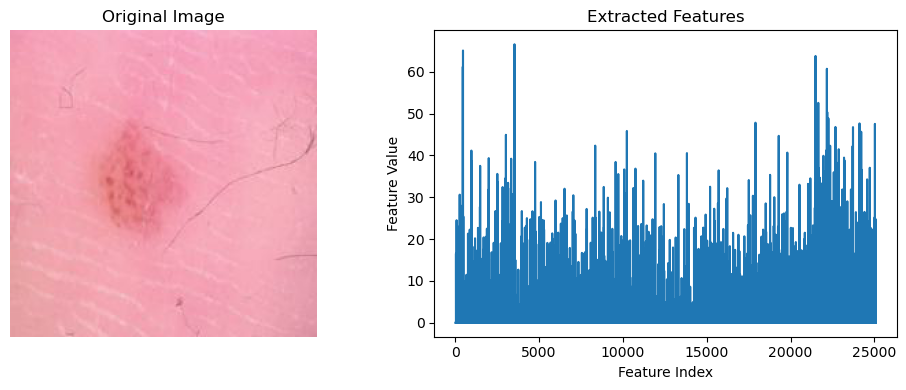

In [ ]:
#Visual an input image and its feature extraction
def visualize_features(img_path, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = model.predict(img_array).flatten()

    plt.figure(figsize=(10, 4))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Plot the extracted features
    plt.subplot(1, 2, 2)
    plt.plot(features)
    plt.title('Extracted Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

    plt.tight_layout()
    plt.show()

# Visualize features for a sample image
sample_image_path = r'C:\Users\defaultuser0\images_\nv\ISIC_0026077.jpg'
visualize_features(sample_image_path, base_model)


In [ ]:
# Split the data into training and testing sets
labels = metadata['dx']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Using SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_Sv = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions_Sv)
report = classification_report(y_test, predictions_Sv)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n' , report)

Accuracy: 0.8392857142857143
Classification Report:
               precision    recall  f1-score   support

       akiec       0.85      0.85      0.85       182
         bcc       0.87      0.80      0.83       166
         bkl       0.76      0.83      0.79       153
          df       0.89      0.87      0.88       156
         mel       0.75      0.76      0.76       152
          nv       0.81      0.80      0.81       152
        vasc       0.96      0.97      0.96       159

    accuracy                           0.84      1120
   macro avg       0.84      0.84      0.84      1120
weighted avg       0.84      0.84      0.84      1120



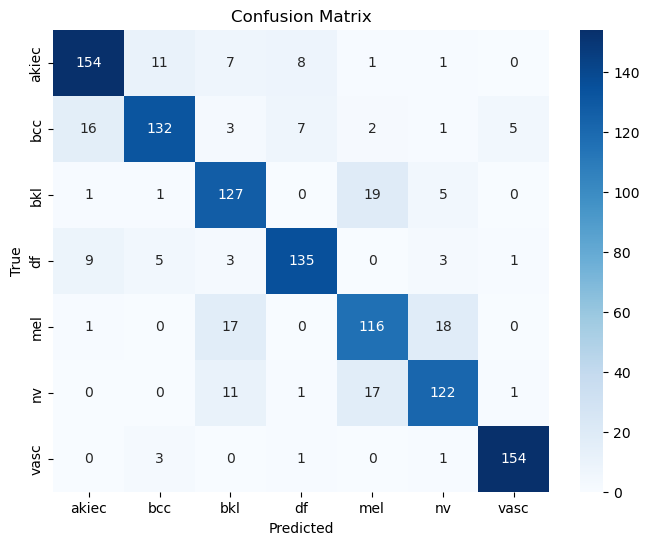

In [ ]:
#Print the confusiom matrix
conf_matrix = confusion_matrix(y_test, predictions_Sv)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

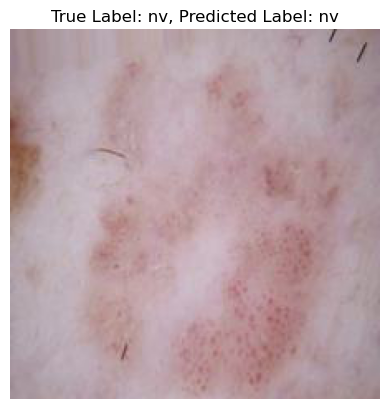

In [ ]:
#Example from the test set
index_to_display = 0  # Index example

# Get the true label
true_label = y_test.iloc[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'].iloc[index_to_display]

img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true and predicted labels
plt.imshow(img)
plt.title(f'True Label: {true_label}, Predicted Label: {prediction[0]}')
plt.axis('off')
plt.show()


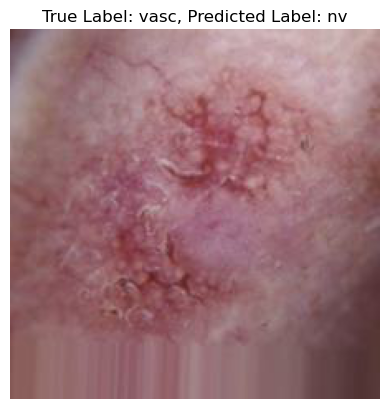

In [ ]:
index_to_display = 99

# Get the true label
true_label = y_test.iloc[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'].iloc[index_to_display]

img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true and predicted labels
plt.imshow(img)
plt.title(f'True Label: {true_label}, Predicted Label: {prediction[0]}')
plt.axis('off')
plt.show()

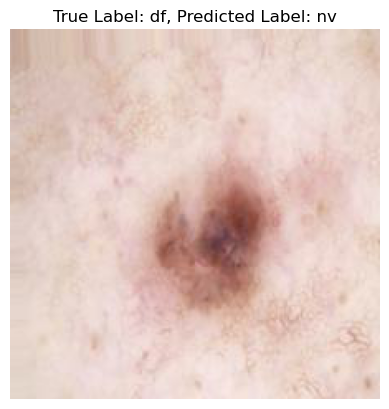

In [ ]:
index_to_display = 1000

true_label = y_test.iloc[index_to_display]

img_path = metadata['image_path'].iloc[index_to_display]

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.title(f'True Label: {true_label}, Predicted Label: {prediction[0]}')
plt.axis('off')
plt.show()

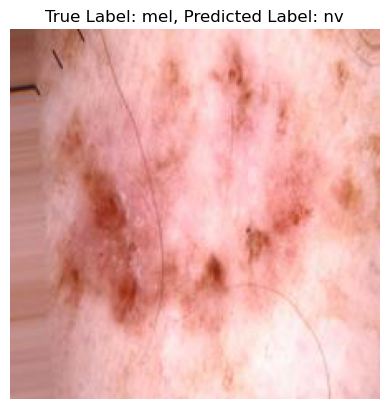

In [ ]:
index_to_display = 150
true_label = y_test.iloc[index_to_display]

img_path = metadata['image_path'].iloc[index_to_display]

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.title(f'True Label: {true_label}, Predicted Label: {prediction[0]}')
plt.axis('off')
plt.show()

In [ ]:
# RandomForestClassifier Classifer
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print('Classification Report (Random Forest):')
print(report_rf)

Accuracy (Random Forest): 0.7892857142857143
Classification Report (Random Forest):
              precision    recall  f1-score   support

       akiec       0.85      0.80      0.82       182
         bcc       0.84      0.73      0.78       166
         bkl       0.70      0.76      0.73       153
          df       0.85      0.78      0.81       156
         mel       0.67      0.74      0.71       152
          nv       0.74      0.76      0.75       152
        vasc       0.89      0.94      0.91       159

    accuracy                           0.79      1120
   macro avg       0.79      0.79      0.79      1120
weighted avg       0.79      0.79      0.79      1120



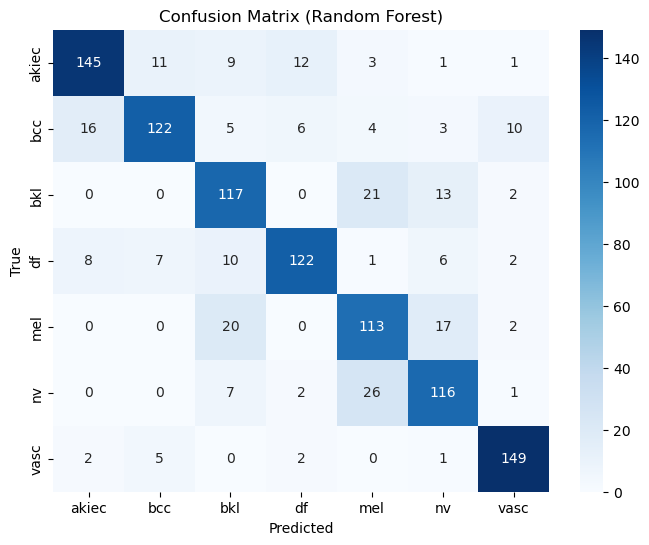

In [ ]:
# Print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

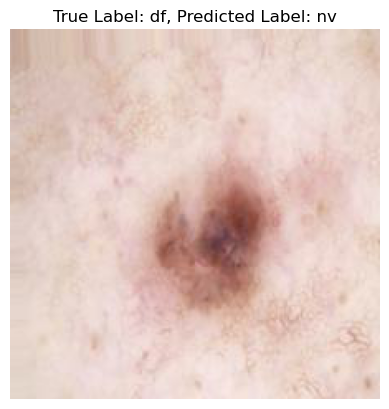

In [ ]:
#Example from the test set
index_to_display = 1000

true_label = y_test.iloc[index_to_display]

img_path = metadata['image_path'].iloc[index_to_display]

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.title(f'True Label: {true_label}, Predicted Label: {prediction[0]}')
plt.axis('off')
plt.show()

In [ ]:
# LogisticRegression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
report_logistic = classification_report(y_test, predictions_logistic)

print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print('Classification Report (Logistic Regression):')
print(report_logistic)

C:\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.8428571428571429
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       akiec       0.85      0.82      0.83       182
         bcc       0.85      0.83      0.84       166
         bkl       0.78      0.80      0.79       153
          df       0.88      0.87      0.87       156
         mel       0.78      0.74      0.76       152
          nv       0.81      0.85      0.83       152
        vasc       0.95      0.98      0.96       159

    accuracy                           0.84      1120
   macro avg       0.84      0.84      0.84      1120
weighted avg       0.84      0.84      0.84      1120



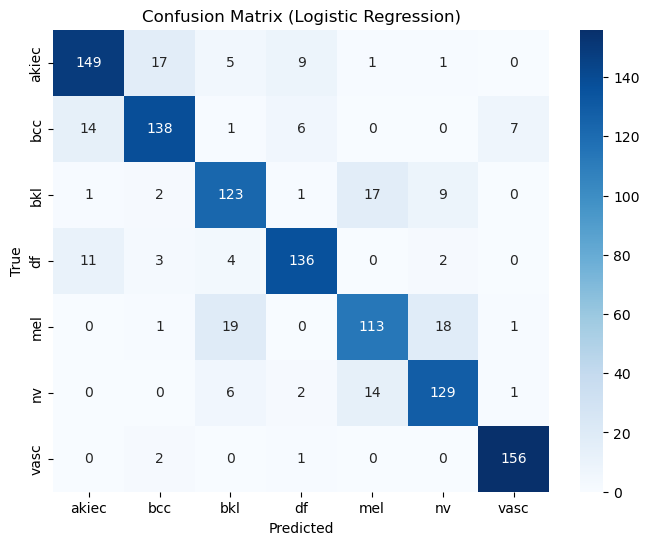

In [ ]:
# Print the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, predictions_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Prediction (Logistic Regression): bkl
Prediction (SVM): bkl
Prediction (Random Forest): nv


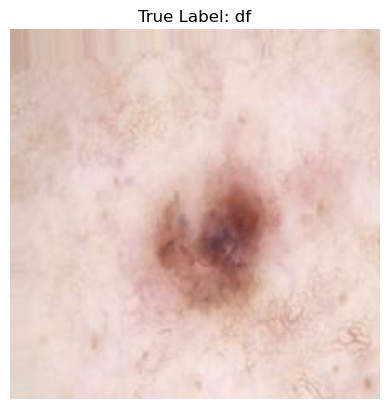

In [ ]:
#Predict by all three classifier
#Example from the test set
index_to_display = 1000

true_label = y_test.iloc[index_to_display]

img_path = metadata['image_path'].iloc[index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true and predicted labels for each classifier
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): nv
Prediction (SVM): nv
Prediction (Random Forest): nv


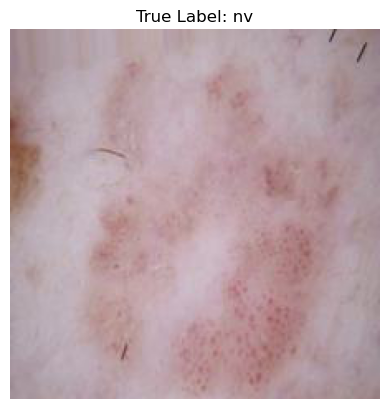

In [ ]:
index_to_display = 0
true_label = y_test.iloc[index_to_display]

img_path = metadata['image_path'].iloc[index_to_display]

img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true and predicted labels for each classifier
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

plt.axis('off')
plt.show()

In [ ]:
# Merge all the predictes
# Combine predictions into a list
all_predictions = [predictions_logistic, predictions_Sv, predictions_rf]

# Transpose the list to have predictions for each image grouped together
all_predictions_transposed = zip(*all_predictions)

# Define a function to get the majority class from a list of predictions
def majority_vote(predictions):
    counter = Counter(predictions)
    majority_class = counter.most_common(1)[0][0]
    return majority_class

# Apply majority vote for each image
merged_predictions = [majority_vote(predictions) for predictions in all_predictions_transposed]

# Display the merged predictions
print(f'Merged Predictions: {merged_predictions}')

Merged Predictions: ['nv', 'nv', 'bkl', 'df', 'df', 'nv', 'bkl', 'bkl', 'bkl', 'bcc', 'bkl', 'df', 'nv', 'bkl', 'bcc', 'nv', 'bkl', 'bcc', 'df', 'bkl', 'bkl', 'akiec', 'mel', 'df', 'mel', 'bkl', 'akiec', 'bkl', 'bkl', 'vasc', 'akiec', 'bkl', 'nv', 'df', 'df', 'bcc', 'mel', 'bkl', 'bkl', 'nv', 'akiec', 'akiec', 'df', 'df', 'akiec', 'vasc', 'nv', 'akiec', 'vasc', 'akiec', 'bcc', 'vasc', 'bcc', 'nv', 'vasc', 'bkl', 'bcc', 'vasc', 'bkl', 'df', 'df', 'mel', 'akiec', 'nv', 'vasc', 'df', 'nv', 'bkl', 'mel', 'vasc', 'akiec', 'akiec', 'bcc', 'akiec', 'vasc', 'akiec', 'bkl', 'akiec', 'vasc', 'bcc', 'bkl', 'vasc', 'mel', 'df', 'akiec', 'nv', 'akiec', 'df', 'nv', 'akiec', 'df', 'df', 'bcc', 'df', 'bcc', 'mel', 'mel', 'bkl', 'bkl', 'vasc', 'df', 'vasc', 'vasc', 'nv', 'bkl', 'akiec', 'bkl', 'bkl', 'bkl', 'bkl', 'mel', 'mel', 'nv', 'df', 'bcc', 'bkl', 'akiec', 'mel', 'akiec', 'akiec', 'vasc', 'bcc', 'vasc', 'vasc', 'bcc', 'nv', 'nv', 'mel', 'akiec', 'bkl', 'bkl', 'bkl', 'vasc', 'mel', 'bcc', 'akiec',

Prediction (Logistic Regression): nv
Prediction (SVM): nv
Prediction (Random Forest): nv
Merged Prediction: nv


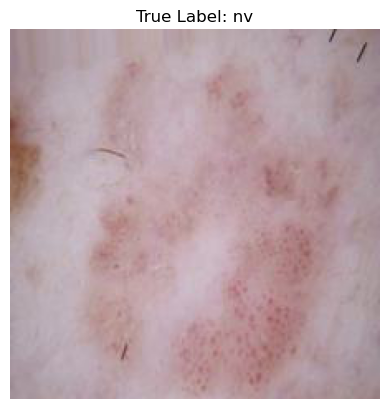

In [ ]:
#Predict by voting
index_to_display = 0

# Get the true label
true_label = y_test.iloc[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'].iloc[index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): bkl
Prediction (SVM): bkl
Prediction (Random Forest): vasc
Merged Prediction: bkl


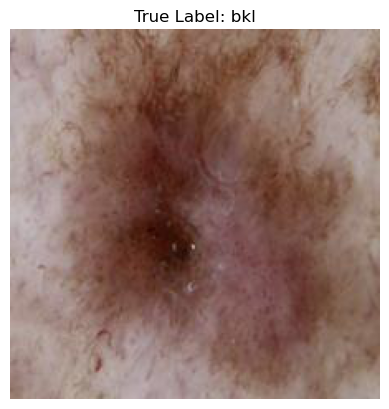

In [ ]:
index_to_display = 10

# Get the true label
true_label = y_test.iloc[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'].iloc[index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): vasc
Prediction (SVM): vasc
Prediction (Random Forest): vasc
Merged Prediction: vasc


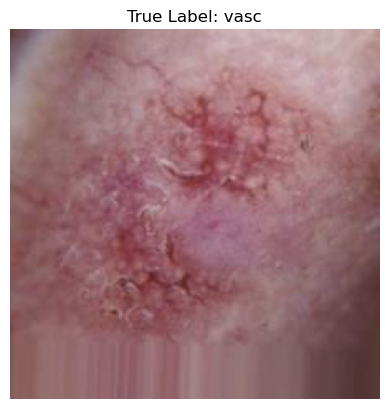

In [ ]:
index_to_display = 99

# Get the true label
true_label = y_test.iloc[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'].iloc[index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

## ResNet feature extraction with SVM , RF, and LR Classifers

In [ ]:
#ReLoad metadata to perfome another feature extraction
metadata_path = r'C:\test\metadata_image.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:
print(metadata)

                          image_id     dx  \
0     augmented_ISIC_0025247.jpg_0  akiec   
1     augmented_ISIC_0028132.jpg_0  akiec   
2     augmented_ISIC_0031918.jpg_2  akiec   
3     augmented_ISIC_0026645.jpg_0  akiec   
4     augmented_ISIC_0025264.jpg_1  akiec   
...                            ...    ...   
5595  augmented_ISIC_0029439.jpg_5   vasc   
5596  augmented_ISIC_0024747.jpg_4   vasc   
5597  augmented_ISIC_0026693.jpg_4   vasc   
5598  augmented_ISIC_0027790.jpg_4   vasc   
5599  augmented_ISIC_0031197.jpg_3   vasc   

                                             image_path  label  
0     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
1     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
2     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
3     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
4     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
...                                                 ...    ...  
5595

In [ ]:
#ResNet feature extraction
image_folder = r'C:\Users\defaultuser0\images_'
output_dir = r'C:\Users\defaultuser0\ResNet'

# Load ResNet50 model
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Function to extract features from an image using ResNet
def extract_features_resnet(img_path):
    if os.path.exists(img_path):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array)
        return features.flatten()
    else:
        print(f"Image not found: {img_path}")
        return None

# Process each image in the input folder and its subfolders
for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0], desc="Processing Images"):
    img_path = row['image_path']

    # Extract features using ResNet and save as a NumPy array
    features = extract_features_resnet(img_path)
    if features is not None:
        output_path = os.path.join(output_dir, f"{index}.npy")
        np.save(output_path, features)

        # Update DataFrame with feature path
        metadata.at[index, 'feature_path'] = output_path

# Save the updated DataFrame to a new CSV file
metadata.to_csv('ResNet.csv', index=False)

Processing Images:   0%|                                                                      | 0/5600 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Processing Images:   0%|                                                            | 1/5600 [00:01<2:34:18,  1.65s/it]

1/1 [==============================] - 0s 197ms/step


Processing Images:   0%|                                                            | 2/5600 [00:01<1:18:36,  1.19it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   0%|                                                              | 3/5600 [00:02<54:36,  1.71it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:   0%|                                                              | 4/5600 [00:02<43:14,  2.16it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   0%|                                                              | 5/5600 [00:02<38:46,  2.41it/s]

1/1 [==============================] - 0s 317ms/step


Processing Images:   0%|                                                              | 6/5600 [00:03<39:50,  2.34it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:   0%|                                                              | 7/5600 [00:03<38:29,  2.42it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   0%|                                                              | 8/5600 [00:03<36:07,  2.58it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:   0%|                                                              | 9/5600 [00:04<37:57,  2.45it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:   0%|                                                             | 10/5600 [00:04<35:20,  2.64it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:   0%|                                                             | 11/5600 [00:05<33:13,  2.80it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:   0%|▏                                                            | 12/5600 [00:05<32:25,  2.87it/s]

1/1 [==============================] - 0s 338ms/step


Processing Images:   0%|▏                                                            | 13/5600 [00:05<35:43,  2.61it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:   0%|▏                                                            | 14/5600 [00:06<33:13,  2.80it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:   0%|▏                                                            | 15/5600 [00:06<34:31,  2.70it/s]

1/1 [==============================] - 0s 352ms/step


Processing Images:   0%|▏                                                            | 16/5600 [00:07<37:09,  2.50it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:   0%|▏                                                            | 17/5600 [00:07<37:41,  2.47it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:   0%|▏                                                            | 18/5600 [00:07<38:28,  2.42it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   0%|▏                                                            | 19/5600 [00:08<35:15,  2.64it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:   0%|▏                                                            | 20/5600 [00:08<38:07,  2.44it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:   0%|▏                                                            | 21/5600 [00:08<36:29,  2.55it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:   0%|▏                                                            | 22/5600 [00:09<34:46,  2.67it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   0%|▎                                                            | 23/5600 [00:09<32:07,  2.89it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   0%|▎                                                            | 24/5600 [00:09<32:31,  2.86it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   0%|▎                                                            | 25/5600 [00:10<30:23,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   0%|▎                                                            | 26/5600 [00:10<32:56,  2.82it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   0%|▎                                                            | 27/5600 [00:10<32:13,  2.88it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   0%|▎                                                            | 28/5600 [00:11<30:39,  3.03it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   1%|▎                                                            | 29/5600 [00:11<30:13,  3.07it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:   1%|▎                                                            | 30/5600 [00:11<30:26,  3.05it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:   1%|▎                                                            | 31/5600 [00:12<30:10,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   1%|▎                                                            | 32/5600 [00:12<30:00,  3.09it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   1%|▎                                                            | 33/5600 [00:12<29:52,  3.11it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:   1%|▎                                                            | 34/5600 [00:13<29:16,  3.17it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   1%|▍                                                            | 35/5600 [00:13<29:16,  3.17it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:   1%|▍                                                            | 36/5600 [00:13<28:58,  3.20it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   1%|▍                                                            | 37/5600 [00:14<29:08,  3.18it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   1%|▍                                                            | 38/5600 [00:14<30:00,  3.09it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:   1%|▍                                                            | 39/5600 [00:14<29:18,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▍                                                            | 40/5600 [00:15<29:37,  3.13it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:   1%|▍                                                            | 41/5600 [00:15<30:22,  3.05it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   1%|▍                                                            | 42/5600 [00:15<29:31,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   1%|▍                                                            | 43/5600 [00:16<29:38,  3.13it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:   1%|▍                                                            | 44/5600 [00:16<28:50,  3.21it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   1%|▍                                                            | 45/5600 [00:16<29:19,  3.16it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   1%|▌                                                            | 46/5600 [00:17<30:13,  3.06it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   1%|▌                                                            | 47/5600 [00:17<29:45,  3.11it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▌                                                            | 48/5600 [00:17<29:26,  3.14it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:   1%|▌                                                            | 49/5600 [00:18<30:15,  3.06it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:   1%|▌                                                            | 50/5600 [00:18<29:43,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   1%|▌                                                            | 51/5600 [00:18<29:22,  3.15it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:   1%|▌                                                            | 52/5600 [00:18<29:59,  3.08it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▌                                                            | 53/5600 [00:19<29:04,  3.18it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:   1%|▌                                                            | 54/5600 [00:19<29:17,  3.16it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:   1%|▌                                                            | 55/5600 [00:19<29:16,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▌                                                            | 56/5600 [00:20<29:03,  3.18it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:   1%|▌                                                            | 57/5600 [00:20<29:29,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   1%|▋                                                            | 58/5600 [00:20<28:59,  3.19it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   1%|▋                                                            | 59/5600 [00:21<28:44,  3.21it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   1%|▋                                                            | 60/5600 [00:21<29:34,  3.12it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   1%|▋                                                            | 61/5600 [00:21<29:21,  3.14it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:   1%|▋                                                            | 62/5600 [00:22<29:15,  3.15it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   1%|▋                                                            | 63/5600 [00:22<29:53,  3.09it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   1%|▋                                                            | 64/5600 [00:22<29:28,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   1%|▋                                                            | 65/5600 [00:23<29:11,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   1%|▋                                                            | 66/5600 [00:23<29:15,  3.15it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   1%|▋                                                            | 67/5600 [00:23<29:03,  3.17it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▋                                                            | 68/5600 [00:24<29:11,  3.16it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   1%|▊                                                            | 69/5600 [00:24<29:42,  3.10it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▊                                                            | 70/5600 [00:24<28:49,  3.20it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   1%|▊                                                            | 71/5600 [00:24<29:30,  3.12it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:   1%|▊                                                            | 72/5600 [00:25<28:37,  3.22it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   1%|▊                                                            | 73/5600 [00:25<29:10,  3.16it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:   1%|▊                                                            | 74/5600 [00:25<29:30,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▊                                                            | 75/5600 [00:26<28:29,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   1%|▊                                                            | 76/5600 [00:26<29:18,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   1%|▊                                                            | 77/5600 [00:26<29:35,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   1%|▊                                                            | 78/5600 [00:27<29:58,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:   1%|▊                                                            | 79/5600 [00:27<29:58,  3.07it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▊                                                            | 80/5600 [00:27<28:59,  3.17it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   1%|▉                                                            | 81/5600 [00:28<29:16,  3.14it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   1%|▉                                                            | 82/5600 [00:28<30:05,  3.06it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:   1%|▉                                                            | 83/5600 [00:28<30:00,  3.06it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:   2%|▉                                                            | 84/5600 [00:29<29:23,  3.13it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:   2%|▉                                                            | 85/5600 [00:29<30:22,  3.03it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   2%|▉                                                            | 86/5600 [00:29<29:08,  3.15it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:   2%|▉                                                            | 87/5600 [00:30<28:18,  3.25it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|▉                                                            | 88/5600 [00:30<28:19,  3.24it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   2%|▉                                                            | 89/5600 [00:30<28:05,  3.27it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:   2%|▉                                                            | 90/5600 [00:31<29:22,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   2%|▉                                                            | 91/5600 [00:31<28:39,  3.20it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   2%|█                                                            | 92/5600 [00:31<29:04,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   2%|█                                                            | 93/5600 [00:31<29:30,  3.11it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   2%|█                                                            | 94/5600 [00:32<29:16,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   2%|█                                                            | 95/5600 [00:32<28:46,  3.19it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:   2%|█                                                            | 96/5600 [00:32<29:13,  3.14it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:   2%|█                                                            | 97/5600 [00:33<28:38,  3.20it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█                                                            | 98/5600 [00:33<28:47,  3.19it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:   2%|█                                                            | 99/5600 [00:33<28:28,  3.22it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█                                                           | 100/5600 [00:34<29:22,  3.12it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   2%|█                                                           | 101/5600 [00:34<30:18,  3.02it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   2%|█                                                           | 102/5600 [00:34<30:22,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█                                                           | 103/5600 [00:35<29:41,  3.09it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:   2%|█                                                           | 104/5600 [00:35<29:53,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:   2%|█▏                                                          | 105/5600 [00:35<29:21,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▏                                                          | 106/5600 [00:36<29:19,  3.12it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:   2%|█▏                                                          | 107/5600 [00:36<29:50,  3.07it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▏                                                          | 108/5600 [00:36<28:40,  3.19it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   2%|█▏                                                          | 109/5600 [00:37<29:19,  3.12it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   2%|█▏                                                          | 110/5600 [00:37<29:23,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   2%|█▏                                                          | 111/5600 [00:37<28:36,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   2%|█▏                                                          | 112/5600 [00:38<29:11,  3.13it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   2%|█▏                                                          | 113/5600 [00:38<29:47,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:   2%|█▏                                                          | 114/5600 [00:38<28:54,  3.16it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:   2%|█▏                                                          | 115/5600 [00:39<29:54,  3.06it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:   2%|█▏                                                          | 116/5600 [00:39<30:36,  2.99it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:   2%|█▎                                                          | 117/5600 [00:39<29:29,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   2%|█▎                                                          | 118/5600 [00:40<30:03,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▎                                                          | 119/5600 [00:40<29:04,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▎                                                          | 120/5600 [00:40<28:58,  3.15it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   2%|█▎                                                          | 121/5600 [00:40<30:08,  3.03it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:   2%|█▎                                                          | 122/5600 [00:41<29:02,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   2%|█▎                                                          | 123/5600 [00:41<29:09,  3.13it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:   2%|█▎                                                          | 124/5600 [00:41<29:18,  3.11it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   2%|█▎                                                          | 125/5600 [00:42<28:22,  3.22it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   2%|█▎                                                          | 126/5600 [00:42<29:17,  3.11it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:   2%|█▎                                                          | 127/5600 [00:42<28:49,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▎                                                          | 128/5600 [00:43<29:14,  3.12it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   2%|█▍                                                          | 129/5600 [00:43<29:40,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   2%|█▍                                                          | 130/5600 [00:43<29:21,  3.10it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▍                                                          | 131/5600 [00:44<29:11,  3.12it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:   2%|█▍                                                          | 132/5600 [00:44<29:47,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▍                                                          | 133/5600 [00:44<28:47,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   2%|█▍                                                          | 134/5600 [00:45<29:49,  3.05it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:   2%|█▍                                                          | 135/5600 [00:45<29:59,  3.04it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:   2%|█▍                                                          | 136/5600 [00:45<29:02,  3.14it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:   2%|█▍                                                          | 137/5600 [00:46<29:33,  3.08it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   2%|█▍                                                          | 138/5600 [00:46<30:05,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   2%|█▍                                                          | 139/5600 [00:46<29:13,  3.11it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:   2%|█▌                                                          | 140/5600 [00:47<29:43,  3.06it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   3%|█▌                                                          | 141/5600 [00:47<30:03,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   3%|█▌                                                          | 142/5600 [00:47<29:17,  3.11it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:   3%|█▌                                                          | 143/5600 [00:48<30:10,  3.01it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:   3%|█▌                                                          | 144/5600 [00:48<30:10,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:   3%|█▌                                                          | 145/5600 [00:48<28:55,  3.14it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:   3%|█▌                                                          | 146/5600 [00:49<30:15,  3.00it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   3%|█▌                                                          | 147/5600 [00:49<29:52,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   3%|█▌                                                          | 148/5600 [00:49<28:56,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   3%|█▌                                                          | 149/5600 [00:50<29:29,  3.08it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:   3%|█▌                                                          | 150/5600 [00:50<28:51,  3.15it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:   3%|█▌                                                          | 151/5600 [00:50<29:07,  3.12it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   3%|█▋                                                          | 152/5600 [00:51<29:56,  3.03it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:   3%|█▋                                                          | 153/5600 [00:51<29:02,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   3%|█▋                                                          | 154/5600 [00:51<29:08,  3.12it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:   3%|█▋                                                          | 155/5600 [00:51<29:01,  3.13it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:   3%|█▋                                                          | 156/5600 [00:52<28:49,  3.15it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   3%|█▋                                                          | 157/5600 [00:52<29:08,  3.11it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:   3%|█▋                                                          | 158/5600 [00:52<28:42,  3.16it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   3%|█▋                                                          | 159/5600 [00:53<28:51,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   3%|█▋                                                          | 160/5600 [00:53<29:24,  3.08it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:   3%|█▋                                                          | 161/5600 [00:53<28:52,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   3%|█▋                                                          | 162/5600 [00:54<28:55,  3.13it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:   3%|█▋                                                          | 163/5600 [00:54<29:03,  3.12it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:   3%|█▊                                                          | 164/5600 [00:54<28:16,  3.20it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   3%|█▊                                                          | 165/5600 [00:55<29:16,  3.09it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   3%|█▊                                                          | 166/5600 [00:55<29:38,  3.06it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:   3%|█▊                                                          | 167/5600 [00:55<28:32,  3.17it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   3%|█▊                                                          | 168/5600 [00:56<29:51,  3.03it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   3%|█▊                                                          | 169/5600 [00:56<30:12,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   3%|█▊                                                          | 170/5600 [00:56<28:47,  3.14it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:   3%|█▊                                                          | 171/5600 [00:57<29:59,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   3%|█▊                                                          | 172/5600 [00:57<28:40,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:   3%|█▊                                                          | 173/5600 [00:57<27:32,  3.28it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   3%|█▊                                                          | 174/5600 [00:58<28:19,  3.19it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   3%|█▉                                                          | 175/5600 [00:58<27:29,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:   3%|█▉                                                          | 176/5600 [00:58<26:51,  3.37it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   3%|█▉                                                          | 177/5600 [00:58<27:08,  3.33it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   3%|█▉                                                          | 178/5600 [00:59<27:36,  3.27it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   3%|█▉                                                          | 179/5600 [00:59<28:43,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:   3%|█▉                                                          | 180/5600 [00:59<27:58,  3.23it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:   3%|█▉                                                          | 181/5600 [01:00<28:39,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   3%|█▉                                                          | 182/5600 [01:00<28:26,  3.18it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   3%|█▉                                                          | 183/5600 [01:00<28:36,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   3%|█▉                                                          | 184/5600 [01:01<29:08,  3.10it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:   3%|█▉                                                          | 185/5600 [01:01<28:19,  3.19it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:   3%|█▉                                                          | 186/5600 [01:01<28:51,  3.13it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   3%|██                                                          | 187/5600 [01:02<29:36,  3.05it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:   3%|██                                                          | 188/5600 [01:02<29:24,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   3%|██                                                          | 189/5600 [01:02<29:13,  3.09it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:   3%|██                                                          | 190/5600 [01:03<29:48,  3.02it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:   3%|██                                                          | 191/5600 [01:03<29:24,  3.07it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   3%|██                                                          | 192/5600 [01:03<29:07,  3.09it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:   3%|██                                                          | 193/5600 [01:04<29:51,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   3%|██                                                          | 194/5600 [01:04<29:27,  3.06it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   3%|██                                                          | 195/5600 [01:04<33:59,  2.65it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██                                                          | 196/5600 [01:05<32:31,  2.77it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:   4%|██                                                          | 197/5600 [01:05<32:29,  2.77it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██                                                          | 198/5600 [01:05<30:20,  2.97it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:   4%|██▏                                                         | 199/5600 [01:06<30:59,  2.90it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:   4%|██▏                                                         | 200/5600 [01:06<31:25,  2.86it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   4%|██▏                                                         | 201/5600 [01:06<30:25,  2.96it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   4%|██▏                                                         | 202/5600 [01:07<30:11,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   4%|██▏                                                         | 203/5600 [01:07<30:24,  2.96it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:   4%|██▏                                                         | 204/5600 [01:07<28:54,  3.11it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:   4%|██▏                                                         | 205/5600 [01:08<30:24,  2.96it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   4%|██▏                                                         | 206/5600 [01:08<31:48,  2.83it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:   4%|██▏                                                         | 207/5600 [01:08<31:09,  2.88it/s]

1/1 [==============================] - 0s 349ms/step


Processing Images:   4%|██▏                                                         | 208/5600 [01:09<34:02,  2.64it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:   4%|██▏                                                         | 209/5600 [01:09<33:42,  2.67it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   4%|██▎                                                         | 210/5600 [01:10<32:59,  2.72it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   4%|██▎                                                         | 211/5600 [01:10<32:01,  2.80it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▎                                                         | 212/5600 [01:10<30:28,  2.95it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:   4%|██▎                                                         | 213/5600 [01:11<31:10,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   4%|██▎                                                         | 214/5600 [01:11<30:06,  2.98it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▎                                                         | 215/5600 [01:11<29:44,  3.02it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:   4%|██▎                                                         | 216/5600 [01:12<30:23,  2.95it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:   4%|██▎                                                         | 217/5600 [01:12<30:42,  2.92it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   4%|██▎                                                         | 218/5600 [01:12<30:55,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   4%|██▎                                                         | 219/5600 [01:13<31:49,  2.82it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:   4%|██▎                                                         | 220/5600 [01:13<32:02,  2.80it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   4%|██▎                                                         | 221/5600 [01:13<31:24,  2.85it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▍                                                         | 222/5600 [01:14<31:27,  2.85it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:   4%|██▍                                                         | 223/5600 [01:14<30:04,  2.98it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▍                                                         | 224/5600 [01:14<29:27,  3.04it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   4%|██▍                                                         | 225/5600 [01:15<30:15,  2.96it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:   4%|██▍                                                         | 226/5600 [01:15<29:17,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▍                                                         | 227/5600 [01:15<29:08,  3.07it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:   4%|██▍                                                         | 228/5600 [01:16<29:51,  3.00it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   4%|██▍                                                         | 229/5600 [01:16<28:55,  3.09it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:   4%|██▍                                                         | 230/5600 [01:16<29:10,  3.07it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:   4%|██▍                                                         | 231/5600 [01:17<29:50,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   4%|██▍                                                         | 232/5600 [01:17<28:57,  3.09it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   4%|██▍                                                         | 233/5600 [01:17<28:51,  3.10it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:   4%|██▌                                                         | 234/5600 [01:18<29:51,  3.00it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:   4%|██▌                                                         | 235/5600 [01:18<28:45,  3.11it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   4%|██▌                                                         | 236/5600 [01:18<28:57,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   4%|██▌                                                         | 237/5600 [01:19<28:46,  3.11it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   4%|██▌                                                         | 238/5600 [01:19<28:40,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   4%|██▌                                                         | 239/5600 [01:19<28:51,  3.10it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:   4%|██▌                                                         | 240/5600 [01:20<29:18,  3.05it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:   4%|██▌                                                         | 241/5600 [01:20<28:30,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   4%|██▌                                                         | 242/5600 [01:20<29:01,  3.08it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:   4%|██▌                                                         | 243/5600 [01:21<28:49,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▌                                                         | 244/5600 [01:21<28:21,  3.15it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:   4%|██▋                                                         | 245/5600 [01:21<28:58,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   4%|██▋                                                         | 246/5600 [01:21<28:22,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   4%|██▋                                                         | 247/5600 [01:22<28:33,  3.12it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:   4%|██▋                                                         | 248/5600 [01:22<28:07,  3.17it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   4%|██▋                                                         | 249/5600 [01:22<28:42,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▋                                                         | 250/5600 [01:23<28:57,  3.08it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:   4%|██▋                                                         | 251/5600 [01:23<28:58,  3.08it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   4%|██▋                                                         | 252/5600 [01:23<28:09,  3.17it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:   5%|██▋                                                         | 253/5600 [01:24<29:14,  3.05it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:   5%|██▋                                                         | 254/5600 [01:24<28:15,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|██▋                                                         | 255/5600 [01:24<28:46,  3.10it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:   5%|██▋                                                         | 256/5600 [01:25<29:33,  3.01it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|██▊                                                         | 257/5600 [01:25<28:51,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:   5%|██▊                                                         | 258/5600 [01:25<28:44,  3.10it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:   5%|██▊                                                         | 259/5600 [01:26<29:20,  3.03it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:   5%|██▊                                                         | 260/5600 [01:26<28:12,  3.16it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   5%|██▊                                                         | 261/5600 [01:26<28:31,  3.12it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   5%|██▊                                                         | 262/5600 [01:27<28:52,  3.08it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:   5%|██▊                                                         | 263/5600 [01:27<28:05,  3.17it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:   5%|██▊                                                         | 264/5600 [01:27<28:39,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   5%|██▊                                                         | 265/5600 [01:28<28:44,  3.09it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:   5%|██▊                                                         | 266/5600 [01:28<28:22,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|██▊                                                         | 267/5600 [01:28<29:04,  3.06it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|██▊                                                         | 268/5600 [01:29<28:19,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   5%|██▉                                                         | 269/5600 [01:29<28:33,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|██▉                                                         | 270/5600 [01:29<29:10,  3.04it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   5%|██▉                                                         | 271/5600 [01:30<28:14,  3.15it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   5%|██▉                                                         | 272/5600 [01:30<28:36,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   5%|██▉                                                         | 273/5600 [01:30<28:59,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|██▉                                                         | 274/5600 [01:31<28:25,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|██▉                                                         | 275/5600 [01:31<28:30,  3.11it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:   5%|██▉                                                         | 276/5600 [01:31<28:21,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|██▉                                                         | 277/5600 [01:31<28:15,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|██▉                                                         | 278/5600 [01:32<29:02,  3.05it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:   5%|██▉                                                         | 279/5600 [01:32<29:22,  3.02it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:   5%|███                                                         | 280/5600 [01:32<28:27,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|███                                                         | 281/5600 [01:33<29:03,  3.05it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:   5%|███                                                         | 282/5600 [01:33<28:18,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   5%|███                                                         | 283/5600 [01:33<28:15,  3.14it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:   5%|███                                                         | 284/5600 [01:34<29:49,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|███                                                         | 285/5600 [01:34<29:18,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|███                                                         | 286/5600 [01:34<28:49,  3.07it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:   5%|███                                                         | 287/5600 [01:35<31:32,  2.81it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:   5%|███                                                         | 288/5600 [01:35<31:52,  2.78it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:   5%|███                                                         | 289/5600 [01:36<30:27,  2.91it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   5%|███                                                         | 290/5600 [01:36<30:29,  2.90it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:   5%|███                                                         | 291/5600 [01:36<31:08,  2.84it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:   5%|███▏                                                        | 292/5600 [01:37<30:39,  2.89it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   5%|███▏                                                        | 293/5600 [01:37<31:19,  2.82it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:   5%|███▏                                                        | 294/5600 [01:37<32:21,  2.73it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:   5%|███▏                                                        | 295/5600 [01:38<31:21,  2.82it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   5%|███▏                                                        | 296/5600 [01:38<29:49,  2.96it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|███▏                                                        | 297/5600 [01:38<29:52,  2.96it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:   5%|███▏                                                        | 298/5600 [01:39<28:55,  3.05it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   5%|███▏                                                        | 299/5600 [01:39<29:27,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   5%|███▏                                                        | 300/5600 [01:39<29:19,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   5%|███▏                                                        | 301/5600 [01:40<28:46,  3.07it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   5%|███▏                                                        | 302/5600 [01:40<29:05,  3.04it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   5%|███▏                                                        | 303/5600 [01:40<29:29,  2.99it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:   5%|███▎                                                        | 304/5600 [01:41<28:53,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   5%|███▎                                                        | 305/5600 [01:41<28:57,  3.05it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   5%|███▎                                                        | 306/5600 [01:41<28:21,  3.11it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:   5%|███▎                                                        | 307/5600 [01:42<28:39,  3.08it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▎                                                        | 308/5600 [01:42<28:55,  3.05it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:   6%|███▎                                                        | 309/5600 [01:42<29:11,  3.02it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▎                                                        | 310/5600 [01:43<28:24,  3.10it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▎                                                        | 311/5600 [01:43<29:03,  3.03it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:   6%|███▎                                                        | 312/5600 [01:43<29:18,  3.01it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:   6%|███▎                                                        | 313/5600 [01:43<27:50,  3.17it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   6%|███▎                                                        | 314/5600 [01:44<28:43,  3.07it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▍                                                        | 315/5600 [01:44<28:07,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▍                                                        | 316/5600 [01:44<28:23,  3.10it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:   6%|███▍                                                        | 317/5600 [01:45<29:16,  3.01it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:   6%|███▍                                                        | 318/5600 [01:45<28:11,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:   6%|███▍                                                        | 319/5600 [01:45<28:38,  3.07it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:   6%|███▍                                                        | 320/5600 [01:46<29:16,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▍                                                        | 321/5600 [01:46<28:34,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   6%|███▍                                                        | 322/5600 [01:46<28:39,  3.07it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   6%|███▍                                                        | 323/5600 [01:47<29:04,  3.03it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:   6%|███▍                                                        | 324/5600 [01:47<27:55,  3.15it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   6%|███▍                                                        | 325/5600 [01:47<28:11,  3.12it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:   6%|███▍                                                        | 326/5600 [01:48<28:05,  3.13it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   6%|███▌                                                        | 327/5600 [01:48<27:56,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▌                                                        | 328/5600 [01:48<28:37,  3.07it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:   6%|███▌                                                        | 329/5600 [01:49<29:09,  3.01it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   6%|███▌                                                        | 330/5600 [01:49<27:56,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   6%|███▌                                                        | 331/5600 [01:49<28:23,  3.09it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:   6%|███▌                                                        | 332/5600 [01:50<28:05,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▌                                                        | 333/5600 [01:50<27:52,  3.15it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   6%|███▌                                                        | 334/5600 [01:50<28:34,  3.07it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:   6%|███▌                                                        | 335/5600 [01:51<28:24,  3.09it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▌                                                        | 336/5600 [01:51<28:35,  3.07it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:   6%|███▌                                                        | 337/5600 [01:51<28:49,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▌                                                        | 338/5600 [01:52<27:56,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▋                                                        | 339/5600 [01:52<28:34,  3.07it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   6%|███▋                                                        | 340/5600 [01:52<27:40,  3.17it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▋                                                        | 341/5600 [01:53<28:05,  3.12it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:   6%|███▋                                                        | 342/5600 [01:53<29:15,  2.99it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:   6%|███▋                                                        | 343/5600 [01:53<29:11,  3.00it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:   6%|███▋                                                        | 344/5600 [01:54<28:53,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▋                                                        | 345/5600 [01:54<31:45,  2.76it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   6%|███▋                                                        | 346/5600 [01:54<31:22,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   6%|███▋                                                        | 347/5600 [01:55<30:03,  2.91it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:   6%|███▋                                                        | 348/5600 [01:55<29:44,  2.94it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:   6%|███▋                                                        | 349/5600 [01:55<30:10,  2.90it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   6%|███▊                                                        | 350/5600 [01:56<29:05,  3.01it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   6%|███▊                                                        | 351/5600 [01:56<29:00,  3.02it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   6%|███▊                                                        | 352/5600 [01:56<29:48,  2.93it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   6%|███▊                                                        | 353/5600 [01:57<28:36,  3.06it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   6%|███▊                                                        | 354/5600 [01:57<27:24,  3.19it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:   6%|███▊                                                        | 355/5600 [01:57<28:08,  3.11it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   6%|███▊                                                        | 356/5600 [01:58<27:26,  3.19it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   6%|███▊                                                        | 357/5600 [01:58<28:24,  3.08it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:   6%|███▊                                                        | 358/5600 [01:58<28:01,  3.12it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   6%|███▊                                                        | 359/5600 [01:59<27:38,  3.16it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   6%|███▊                                                        | 360/5600 [01:59<28:25,  3.07it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:   6%|███▊                                                        | 361/5600 [01:59<28:26,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   6%|███▉                                                        | 362/5600 [02:00<27:38,  3.16it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:   6%|███▉                                                        | 363/5600 [02:00<28:12,  3.09it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   6%|███▉                                                        | 364/5600 [02:00<27:26,  3.18it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|███▉                                                        | 365/5600 [02:00<27:37,  3.16it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:   7%|███▉                                                        | 366/5600 [02:01<28:30,  3.06it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:   7%|███▉                                                        | 367/5600 [02:01<27:47,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|███▉                                                        | 368/5600 [02:01<28:05,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   7%|███▉                                                        | 369/5600 [02:02<27:29,  3.17it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|███▉                                                        | 370/5600 [02:02<27:51,  3.13it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:   7%|███▉                                                        | 371/5600 [02:02<29:46,  2.93it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   7%|███▉                                                        | 372/5600 [02:03<29:17,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   7%|███▉                                                        | 373/5600 [02:03<29:20,  2.97it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:   7%|████                                                        | 374/5600 [02:04<30:36,  2.85it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   7%|████                                                        | 375/5600 [02:04<29:56,  2.91it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|████                                                        | 376/5600 [02:04<29:01,  3.00it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:   7%|████                                                        | 377/5600 [02:04<28:58,  3.00it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:   7%|████                                                        | 378/5600 [02:05<29:12,  2.98it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:   7%|████                                                        | 379/5600 [02:05<27:57,  3.11it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:   7%|████                                                        | 380/5600 [02:05<28:52,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   7%|████                                                        | 381/5600 [02:06<28:50,  3.02it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:   7%|████                                                        | 382/5600 [02:06<28:01,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   7%|████                                                        | 383/5600 [02:06<28:37,  3.04it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:   7%|████                                                        | 384/5600 [02:07<28:49,  3.02it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|████▏                                                       | 385/5600 [02:07<28:11,  3.08it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   7%|████▏                                                       | 386/5600 [02:07<28:46,  3.02it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:   7%|████▏                                                       | 387/5600 [02:08<27:53,  3.12it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   7%|████▏                                                       | 388/5600 [02:08<28:48,  3.01it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   7%|████▏                                                       | 389/5600 [02:08<28:48,  3.02it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   7%|████▏                                                       | 390/5600 [02:09<28:28,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|████▏                                                       | 391/5600 [02:09<28:24,  3.06it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   7%|████▏                                                       | 392/5600 [02:09<28:50,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   7%|████▏                                                       | 393/5600 [02:10<28:12,  3.08it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|████▏                                                       | 394/5600 [02:10<28:23,  3.06it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:   7%|████▏                                                       | 395/5600 [02:10<28:41,  3.02it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:   7%|████▏                                                       | 396/5600 [02:11<28:03,  3.09it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   7%|████▎                                                       | 397/5600 [02:11<28:09,  3.08it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   7%|████▎                                                       | 398/5600 [02:11<28:49,  3.01it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:   7%|████▎                                                       | 399/5600 [02:12<27:53,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   7%|████▎                                                       | 400/5600 [02:12<28:38,  3.03it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:   7%|████▎                                                       | 401/5600 [02:12<29:05,  2.98it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   7%|████▎                                                       | 402/5600 [02:13<32:12,  2.69it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:   7%|████▎                                                       | 403/5600 [02:13<30:00,  2.89it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:   7%|████▎                                                       | 404/5600 [02:13<30:00,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   7%|████▎                                                       | 405/5600 [02:14<28:59,  2.99it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:   7%|████▎                                                       | 406/5600 [02:14<29:02,  2.98it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:   7%|████▎                                                       | 407/5600 [02:14<29:25,  2.94it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:   7%|████▎                                                       | 408/5600 [02:15<28:22,  3.05it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   7%|████▍                                                       | 409/5600 [02:15<28:47,  3.01it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:   7%|████▍                                                       | 410/5600 [02:15<29:09,  2.97it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   7%|████▍                                                       | 411/5600 [02:16<28:21,  3.05it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   7%|████▍                                                       | 412/5600 [02:16<28:44,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   7%|████▍                                                       | 413/5600 [02:16<30:10,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   7%|████▍                                                       | 414/5600 [02:17<31:01,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   7%|████▍                                                       | 415/5600 [02:17<31:34,  2.74it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:   7%|████▍                                                       | 416/5600 [02:18<31:57,  2.70it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   7%|████▍                                                       | 417/5600 [02:18<32:26,  2.66it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:   7%|████▍                                                       | 418/5600 [02:18<33:12,  2.60it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:   7%|████▍                                                       | 419/5600 [02:19<32:45,  2.64it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:   8%|████▌                                                       | 420/5600 [02:19<33:04,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   8%|████▌                                                       | 421/5600 [02:20<33:14,  2.60it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:   8%|████▌                                                       | 422/5600 [02:20<33:42,  2.56it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   8%|████▌                                                       | 423/5600 [02:20<31:05,  2.78it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:   8%|████▌                                                       | 424/5600 [02:21<28:41,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   8%|████▌                                                       | 425/5600 [02:21<28:55,  2.98it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:   8%|████▌                                                       | 426/5600 [02:21<27:48,  3.10it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:   8%|████▌                                                       | 427/5600 [02:22<28:32,  3.02it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:   8%|████▌                                                       | 428/5600 [02:22<28:14,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:   8%|████▌                                                       | 429/5600 [02:22<28:15,  3.05it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   8%|████▌                                                       | 430/5600 [02:23<28:47,  2.99it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:   8%|████▌                                                       | 431/5600 [02:23<28:40,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   8%|████▋                                                       | 432/5600 [02:23<28:02,  3.07it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:   8%|████▋                                                       | 433/5600 [02:23<28:09,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   8%|████▋                                                       | 434/5600 [02:24<28:28,  3.02it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:   8%|████▋                                                       | 435/5600 [02:24<28:13,  3.05it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   8%|████▋                                                       | 436/5600 [02:24<28:56,  2.97it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:   8%|████▋                                                       | 437/5600 [02:25<28:35,  3.01it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   8%|████▋                                                       | 438/5600 [02:25<28:32,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   8%|████▋                                                       | 439/5600 [02:25<28:52,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   8%|████▋                                                       | 440/5600 [02:26<27:41,  3.11it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:   8%|████▋                                                       | 441/5600 [02:26<28:04,  3.06it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:   8%|████▋                                                       | 442/5600 [02:26<28:26,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   8%|████▋                                                       | 443/5600 [02:27<27:55,  3.08it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   8%|████▊                                                       | 444/5600 [02:27<28:16,  3.04it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   8%|████▊                                                       | 445/5600 [02:27<28:26,  3.02it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:   8%|████▊                                                       | 446/5600 [02:28<27:54,  3.08it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   8%|████▊                                                       | 447/5600 [02:28<28:28,  3.02it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:   8%|████▊                                                       | 448/5600 [02:28<28:40,  2.99it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:   8%|████▊                                                       | 449/5600 [02:29<27:49,  3.09it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   8%|████▊                                                       | 450/5600 [02:29<27:59,  3.07it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:   8%|████▊                                                       | 451/5600 [02:29<28:19,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   8%|████▊                                                       | 452/5600 [02:30<27:51,  3.08it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   8%|████▊                                                       | 453/5600 [02:30<28:42,  2.99it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:   8%|████▊                                                       | 454/5600 [02:30<28:16,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   8%|████▉                                                       | 455/5600 [02:31<27:53,  3.07it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:   8%|████▉                                                       | 456/5600 [02:31<29:09,  2.94it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:   8%|████▉                                                       | 457/5600 [02:31<28:56,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   8%|████▉                                                       | 458/5600 [02:32<27:46,  3.08it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:   8%|████▉                                                       | 459/5600 [02:32<28:32,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   8%|████▉                                                       | 460/5600 [02:32<27:49,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:   8%|████▉                                                       | 461/5600 [02:33<27:28,  3.12it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:   8%|████▉                                                       | 462/5600 [02:33<28:21,  3.02it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:   8%|████▉                                                       | 463/5600 [02:33<27:21,  3.13it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   8%|████▉                                                       | 464/5600 [02:34<27:47,  3.08it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:   8%|████▉                                                       | 465/5600 [02:34<29:34,  2.89it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:   8%|████▉                                                       | 466/5600 [02:34<28:13,  3.03it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   8%|█████                                                       | 467/5600 [02:35<28:12,  3.03it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:   8%|█████                                                       | 468/5600 [02:35<28:45,  2.97it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:   8%|█████                                                       | 469/5600 [02:35<27:28,  3.11it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:   8%|█████                                                       | 470/5600 [02:36<27:16,  3.13it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:   8%|█████                                                       | 471/5600 [02:36<28:40,  2.98it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:   8%|█████                                                       | 472/5600 [02:36<28:00,  3.05it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   8%|█████                                                       | 473/5600 [02:37<28:44,  2.97it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   8%|█████                                                       | 474/5600 [02:37<28:43,  2.97it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:   8%|█████                                                       | 475/5600 [02:37<27:48,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   8%|█████                                                       | 476/5600 [02:38<28:02,  3.05it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:   9%|█████                                                       | 477/5600 [02:38<29:09,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:   9%|█████                                                       | 478/5600 [02:38<28:01,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▏                                                      | 479/5600 [02:39<28:17,  3.02it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:   9%|█████▏                                                      | 480/5600 [02:39<28:57,  2.95it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:   9%|█████▏                                                      | 481/5600 [02:39<28:03,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   9%|█████▏                                                      | 482/5600 [02:40<27:57,  3.05it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:   9%|█████▏                                                      | 483/5600 [02:40<28:27,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▏                                                      | 484/5600 [02:40<27:01,  3.15it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:   9%|█████▏                                                      | 485/5600 [02:41<27:52,  3.06it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:   9%|█████▏                                                      | 486/5600 [02:41<27:37,  3.08it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:   9%|█████▏                                                      | 487/5600 [02:41<27:40,  3.08it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:   9%|█████▏                                                      | 488/5600 [02:42<28:35,  2.98it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:   9%|█████▏                                                      | 489/5600 [02:42<27:53,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▎                                                      | 490/5600 [02:42<27:39,  3.08it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:   9%|█████▎                                                      | 491/5600 [02:43<28:40,  2.97it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:   9%|█████▎                                                      | 492/5600 [02:43<28:13,  3.02it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:   9%|█████▎                                                      | 493/5600 [02:43<27:38,  3.08it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:   9%|█████▎                                                      | 494/5600 [02:44<28:00,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   9%|█████▎                                                      | 495/5600 [02:44<28:17,  3.01it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:   9%|█████▎                                                      | 496/5600 [02:44<27:49,  3.06it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   9%|█████▎                                                      | 497/5600 [02:45<28:28,  2.99it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   9%|█████▎                                                      | 498/5600 [02:45<27:57,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:   9%|█████▎                                                      | 499/5600 [02:45<27:26,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   9%|█████▎                                                      | 500/5600 [02:46<28:13,  3.01it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:   9%|█████▎                                                      | 501/5600 [02:46<27:36,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:   9%|█████▍                                                      | 502/5600 [02:46<27:44,  3.06it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:   9%|█████▍                                                      | 503/5600 [02:47<28:05,  3.02it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:   9%|█████▍                                                      | 504/5600 [02:47<27:26,  3.09it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▍                                                      | 505/5600 [02:47<27:53,  3.05it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:   9%|█████▍                                                      | 506/5600 [02:48<27:07,  3.13it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:   9%|█████▍                                                      | 507/5600 [02:48<27:13,  3.12it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   9%|█████▍                                                      | 508/5600 [02:48<27:49,  3.05it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:   9%|█████▍                                                      | 509/5600 [02:49<28:09,  3.01it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▍                                                      | 510/5600 [02:49<27:23,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   9%|█████▍                                                      | 511/5600 [02:49<28:09,  3.01it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:   9%|█████▍                                                      | 512/5600 [02:49<27:45,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▍                                                      | 513/5600 [02:50<27:26,  3.09it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:   9%|█████▌                                                      | 514/5600 [02:50<28:13,  3.00it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:   9%|█████▌                                                      | 515/5600 [02:50<27:21,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▌                                                      | 516/5600 [02:51<27:27,  3.09it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:   9%|█████▌                                                      | 517/5600 [02:51<28:18,  2.99it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:   9%|█████▌                                                      | 518/5600 [02:51<27:51,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:   9%|█████▌                                                      | 519/5600 [02:52<27:46,  3.05it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:   9%|█████▌                                                      | 520/5600 [02:52<28:29,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:   9%|█████▌                                                      | 521/5600 [02:52<27:40,  3.06it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:   9%|█████▌                                                      | 522/5600 [02:53<27:58,  3.02it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:   9%|█████▌                                                      | 523/5600 [02:53<28:19,  2.99it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:   9%|█████▌                                                      | 524/5600 [02:53<27:47,  3.04it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:   9%|█████▋                                                      | 525/5600 [02:54<27:54,  3.03it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:   9%|█████▋                                                      | 526/5600 [02:54<28:08,  3.00it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:   9%|█████▋                                                      | 527/5600 [02:54<27:00,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:   9%|█████▋                                                      | 528/5600 [02:55<28:03,  3.01it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:   9%|█████▋                                                      | 529/5600 [02:55<28:26,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:   9%|█████▋                                                      | 530/5600 [02:55<27:27,  3.08it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:   9%|█████▋                                                      | 531/5600 [02:56<27:46,  3.04it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  10%|█████▋                                                      | 532/5600 [02:56<27:26,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  10%|█████▋                                                      | 533/5600 [02:56<28:23,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  10%|█████▋                                                      | 534/5600 [02:57<28:23,  2.97it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  10%|█████▋                                                      | 535/5600 [02:57<28:32,  2.96it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  10%|█████▋                                                      | 536/5600 [02:57<27:37,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  10%|█████▊                                                      | 537/5600 [02:58<28:09,  3.00it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  10%|█████▊                                                      | 538/5600 [02:58<27:31,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|█████▊                                                      | 539/5600 [02:58<27:18,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  10%|█████▊                                                      | 540/5600 [02:59<28:00,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  10%|█████▊                                                      | 541/5600 [02:59<27:34,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  10%|█████▊                                                      | 542/5600 [02:59<27:34,  3.06it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  10%|█████▊                                                      | 543/5600 [03:00<28:23,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  10%|█████▊                                                      | 544/5600 [03:00<28:29,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|█████▊                                                      | 545/5600 [03:00<27:26,  3.07it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  10%|█████▊                                                      | 546/5600 [03:01<28:19,  2.97it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  10%|█████▊                                                      | 547/5600 [03:01<28:26,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|█████▊                                                      | 548/5600 [03:01<27:35,  3.05it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  10%|█████▉                                                      | 549/5600 [03:02<28:19,  2.97it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  10%|█████▉                                                      | 550/5600 [03:02<28:07,  2.99it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|█████▉                                                      | 551/5600 [03:02<27:29,  3.06it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  10%|█████▉                                                      | 552/5600 [03:03<28:34,  2.94it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  10%|█████▉                                                      | 553/5600 [03:03<28:29,  2.95it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  10%|█████▉                                                      | 554/5600 [03:03<27:19,  3.08it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  10%|█████▉                                                      | 555/5600 [03:04<27:55,  3.01it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  10%|█████▉                                                      | 556/5600 [03:04<29:31,  2.85it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  10%|█████▉                                                      | 557/5600 [03:04<28:04,  2.99it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  10%|█████▉                                                      | 558/5600 [03:05<28:36,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  10%|█████▉                                                      | 559/5600 [03:05<27:39,  3.04it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  10%|██████                                                      | 560/5600 [03:05<27:16,  3.08it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  10%|██████                                                      | 561/5600 [03:06<27:45,  3.03it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  10%|██████                                                      | 562/5600 [03:06<26:57,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  10%|██████                                                      | 563/5600 [03:06<26:23,  3.18it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  10%|██████                                                      | 564/5600 [03:07<27:05,  3.10it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  10%|██████                                                      | 565/5600 [03:07<26:29,  3.17it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  10%|██████                                                      | 566/5600 [03:07<26:47,  3.13it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  10%|██████                                                      | 567/5600 [03:08<27:26,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|██████                                                      | 568/5600 [03:08<26:24,  3.18it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  10%|██████                                                      | 569/5600 [03:08<27:03,  3.10it/s]

1/1 [==============================] - 0s 499ms/step


Processing Images:  10%|██████                                                      | 570/5600 [03:09<33:23,  2.51it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  10%|██████                                                      | 571/5600 [03:09<32:37,  2.57it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  10%|██████▏                                                     | 572/5600 [03:10<30:19,  2.76it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|██████▏                                                     | 573/5600 [03:10<29:35,  2.83it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  10%|██████▏                                                     | 574/5600 [03:10<29:31,  2.84it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  10%|██████▏                                                     | 575/5600 [03:10<28:27,  2.94it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  10%|██████▏                                                     | 576/5600 [03:11<28:21,  2.95it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  10%|██████▏                                                     | 577/5600 [03:11<28:55,  2.89it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|██████▏                                                     | 578/5600 [03:11<27:21,  3.06it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  10%|██████▏                                                     | 579/5600 [03:12<28:11,  2.97it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  10%|██████▏                                                     | 580/5600 [03:12<28:38,  2.92it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  10%|██████▏                                                     | 581/5600 [03:12<27:34,  3.03it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  10%|██████▏                                                     | 582/5600 [03:13<27:53,  3.00it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  10%|██████▏                                                     | 583/5600 [03:13<28:19,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  10%|██████▎                                                     | 584/5600 [03:13<27:12,  3.07it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  10%|██████▎                                                     | 585/5600 [03:14<27:25,  3.05it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  10%|██████▎                                                     | 586/5600 [03:14<27:57,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  10%|██████▎                                                     | 587/5600 [03:14<26:52,  3.11it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  10%|██████▎                                                     | 588/5600 [03:15<27:55,  2.99it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  11%|██████▎                                                     | 589/5600 [03:15<27:06,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  11%|██████▎                                                     | 590/5600 [03:15<27:22,  3.05it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  11%|██████▎                                                     | 591/5600 [03:16<28:29,  2.93it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  11%|██████▎                                                     | 592/5600 [03:16<28:23,  2.94it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  11%|██████▎                                                     | 593/5600 [03:16<26:48,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  11%|██████▎                                                     | 594/5600 [03:17<27:24,  3.04it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  11%|██████▍                                                     | 595/5600 [03:17<27:18,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  11%|██████▍                                                     | 596/5600 [03:17<26:48,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  11%|██████▍                                                     | 597/5600 [03:18<27:30,  3.03it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  11%|██████▍                                                     | 598/5600 [03:18<26:51,  3.10it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  11%|██████▍                                                     | 599/5600 [03:18<26:46,  3.11it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  11%|██████▍                                                     | 600/5600 [03:19<27:34,  3.02it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  11%|██████▍                                                     | 601/5600 [03:19<26:24,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  11%|██████▍                                                     | 602/5600 [03:19<27:08,  3.07it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  11%|██████▍                                                     | 603/5600 [03:20<27:53,  2.99it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  11%|██████▍                                                     | 604/5600 [03:20<27:00,  3.08it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  11%|██████▍                                                     | 605/5600 [03:20<27:21,  3.04it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  11%|██████▍                                                     | 606/5600 [03:21<27:59,  2.97it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  11%|██████▌                                                     | 607/5600 [03:21<27:05,  3.07it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  11%|██████▌                                                     | 608/5600 [03:21<27:27,  3.03it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  11%|██████▌                                                     | 609/5600 [03:22<27:12,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  11%|██████▌                                                     | 610/5600 [03:22<26:28,  3.14it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  11%|██████▌                                                     | 611/5600 [03:22<27:28,  3.03it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  11%|██████▌                                                     | 612/5600 [03:23<27:29,  3.02it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  11%|██████▌                                                     | 613/5600 [03:23<26:48,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  11%|██████▌                                                     | 614/5600 [03:23<27:54,  2.98it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  11%|██████▌                                                     | 615/5600 [03:24<27:09,  3.06it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  11%|██████▌                                                     | 616/5600 [03:24<27:07,  3.06it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  11%|██████▌                                                     | 617/5600 [03:24<27:58,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  11%|██████▌                                                     | 618/5600 [03:25<27:37,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  11%|██████▋                                                     | 619/5600 [03:25<27:01,  3.07it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  11%|██████▋                                                     | 620/5600 [03:25<27:40,  3.00it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  11%|██████▋                                                     | 621/5600 [03:26<27:34,  3.01it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  11%|██████▋                                                     | 622/5600 [03:26<27:07,  3.06it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  11%|██████▋                                                     | 623/5600 [03:26<28:58,  2.86it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  11%|██████▋                                                     | 624/5600 [03:27<29:26,  2.82it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  11%|██████▋                                                     | 625/5600 [03:27<28:09,  2.95it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  11%|██████▋                                                     | 626/5600 [03:27<27:40,  3.00it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  11%|██████▋                                                     | 627/5600 [03:28<28:23,  2.92it/s]

1/1 [==============================] - 0s 167ms/step


Processing Images:  11%|██████▋                                                     | 628/5600 [03:28<26:55,  3.08it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  11%|██████▋                                                     | 629/5600 [03:28<27:33,  3.01it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  11%|██████▊                                                     | 630/5600 [03:29<27:58,  2.96it/s]

1/1 [==============================] - 0s 168ms/step


Processing Images:  11%|██████▊                                                     | 631/5600 [03:29<26:39,  3.11it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  11%|██████▊                                                     | 632/5600 [03:29<28:53,  2.87it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  11%|██████▊                                                     | 633/5600 [03:30<29:11,  2.84it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  11%|██████▊                                                     | 634/5600 [03:30<28:09,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  11%|██████▊                                                     | 635/5600 [03:30<28:13,  2.93it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  11%|██████▊                                                     | 636/5600 [03:31<28:35,  2.89it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  11%|██████▊                                                     | 637/5600 [03:31<27:11,  3.04it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  11%|██████▊                                                     | 638/5600 [03:31<27:24,  3.02it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  11%|██████▊                                                     | 639/5600 [03:32<27:51,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  11%|██████▊                                                     | 640/5600 [03:32<26:51,  3.08it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  11%|██████▊                                                     | 641/5600 [03:32<27:20,  3.02it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  11%|██████▉                                                     | 642/5600 [03:33<27:23,  3.02it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  11%|██████▉                                                     | 643/5600 [03:33<26:34,  3.11it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  12%|██████▉                                                     | 644/5600 [03:33<27:33,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  12%|██████▉                                                     | 645/5600 [03:34<27:08,  3.04it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  12%|██████▉                                                     | 646/5600 [03:34<27:01,  3.06it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  12%|██████▉                                                     | 647/5600 [03:34<27:51,  2.96it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  12%|██████▉                                                     | 648/5600 [03:35<26:57,  3.06it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  12%|██████▉                                                     | 649/5600 [03:35<27:50,  2.96it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  12%|██████▉                                                     | 650/5600 [03:35<27:58,  2.95it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  12%|██████▉                                                     | 651/5600 [03:36<28:14,  2.92it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  12%|██████▉                                                     | 652/5600 [03:36<26:53,  3.07it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  12%|██████▉                                                     | 653/5600 [03:36<27:29,  3.00it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  12%|███████                                                     | 654/5600 [03:37<27:20,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  12%|███████                                                     | 655/5600 [03:37<27:05,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  12%|███████                                                     | 656/5600 [03:37<27:50,  2.96it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  12%|███████                                                     | 657/5600 [03:38<27:37,  2.98it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  12%|███████                                                     | 658/5600 [03:38<28:32,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  12%|███████                                                     | 659/5600 [03:38<29:31,  2.79it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  12%|███████                                                     | 660/5600 [03:39<30:41,  2.68it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  12%|███████                                                     | 661/5600 [03:39<29:05,  2.83it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  12%|███████                                                     | 662/5600 [03:40<28:23,  2.90it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  12%|███████                                                     | 663/5600 [03:40<28:42,  2.87it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  12%|███████                                                     | 664/5600 [03:40<27:25,  3.00it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  12%|███████▏                                                    | 665/5600 [03:41<27:30,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  12%|███████▏                                                    | 666/5600 [03:41<27:58,  2.94it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  12%|███████▏                                                    | 667/5600 [03:41<27:12,  3.02it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  12%|███████▏                                                    | 668/5600 [03:42<26:56,  3.05it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  12%|███████▏                                                    | 669/5600 [03:42<27:18,  3.01it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  12%|███████▏                                                    | 670/5600 [03:42<26:25,  3.11it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  12%|███████▏                                                    | 671/5600 [03:42<26:34,  3.09it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  12%|███████▏                                                    | 672/5600 [03:43<27:12,  3.02it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  12%|███████▏                                                    | 673/5600 [03:43<26:33,  3.09it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  12%|███████▏                                                    | 674/5600 [03:43<27:07,  3.03it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  12%|███████▏                                                    | 675/5600 [03:44<27:43,  2.96it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  12%|███████▏                                                    | 676/5600 [03:44<26:44,  3.07it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  12%|███████▎                                                    | 677/5600 [03:45<28:19,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  12%|███████▎                                                    | 678/5600 [03:45<29:10,  2.81it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  12%|███████▎                                                    | 679/5600 [03:45<29:40,  2.76it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  12%|███████▎                                                    | 680/5600 [03:46<29:31,  2.78it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  12%|███████▎                                                    | 681/5600 [03:46<29:40,  2.76it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  12%|███████▎                                                    | 682/5600 [03:46<30:18,  2.70it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  12%|███████▎                                                    | 683/5600 [03:47<29:56,  2.74it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  12%|███████▎                                                    | 684/5600 [03:47<29:02,  2.82it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  12%|███████▎                                                    | 685/5600 [03:47<29:03,  2.82it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  12%|███████▎                                                    | 686/5600 [03:48<27:40,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  12%|███████▎                                                    | 687/5600 [03:48<27:40,  2.96it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  12%|███████▎                                                    | 688/5600 [03:48<28:07,  2.91it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  12%|███████▍                                                    | 689/5600 [03:49<27:10,  3.01it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  12%|███████▍                                                    | 690/5600 [03:49<27:22,  2.99it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  12%|███████▍                                                    | 691/5600 [03:49<27:35,  2.97it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  12%|███████▍                                                    | 692/5600 [03:50<26:52,  3.04it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  12%|███████▍                                                    | 693/5600 [03:50<26:52,  3.04it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  12%|███████▍                                                    | 694/5600 [03:50<27:45,  2.95it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  12%|███████▍                                                    | 695/5600 [03:51<27:02,  3.02it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  12%|███████▍                                                    | 696/5600 [03:51<26:55,  3.04it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  12%|███████▍                                                    | 697/5600 [03:51<27:29,  2.97it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  12%|███████▍                                                    | 698/5600 [03:52<26:38,  3.07it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  12%|███████▍                                                    | 699/5600 [03:52<27:28,  2.97it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  12%|███████▌                                                    | 700/5600 [03:52<27:53,  2.93it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  13%|███████▌                                                    | 701/5600 [03:53<26:55,  3.03it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  13%|███████▌                                                    | 702/5600 [03:53<27:03,  3.02it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  13%|███████▌                                                    | 703/5600 [03:53<27:18,  2.99it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  13%|███████▌                                                    | 704/5600 [03:54<26:39,  3.06it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  13%|███████▌                                                    | 705/5600 [03:54<27:01,  3.02it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  13%|███████▌                                                    | 706/5600 [03:54<27:09,  3.00it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  13%|███████▌                                                    | 707/5600 [03:55<29:04,  2.81it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  13%|███████▌                                                    | 708/5600 [03:55<28:04,  2.90it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  13%|███████▌                                                    | 709/5600 [03:55<28:10,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  13%|███████▌                                                    | 710/5600 [03:56<27:34,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|███████▌                                                    | 711/5600 [03:56<26:56,  3.02it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  13%|███████▋                                                    | 712/5600 [03:56<27:19,  2.98it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  13%|███████▋                                                    | 713/5600 [03:57<26:48,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  13%|███████▋                                                    | 714/5600 [03:57<28:34,  2.85it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  13%|███████▋                                                    | 715/5600 [03:58<28:36,  2.85it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  13%|███████▋                                                    | 716/5600 [03:58<28:13,  2.88it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  13%|███████▋                                                    | 717/5600 [03:58<27:19,  2.98it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  13%|███████▋                                                    | 718/5600 [03:59<27:47,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  13%|███████▋                                                    | 719/5600 [03:59<26:50,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|███████▋                                                    | 720/5600 [03:59<26:31,  3.07it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  13%|███████▋                                                    | 721/5600 [03:59<27:03,  3.00it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  13%|███████▋                                                    | 722/5600 [04:00<26:30,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  13%|███████▋                                                    | 723/5600 [04:00<26:33,  3.06it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  13%|███████▊                                                    | 724/5600 [04:00<27:37,  2.94it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  13%|███████▊                                                    | 725/5600 [04:01<26:44,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|███████▊                                                    | 726/5600 [04:01<26:51,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  13%|███████▊                                                    | 727/5600 [04:01<27:13,  2.98it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  13%|███████▊                                                    | 728/5600 [04:02<26:21,  3.08it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  13%|███████▊                                                    | 729/5600 [04:02<26:43,  3.04it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  13%|███████▊                                                    | 730/5600 [04:02<26:59,  3.01it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  13%|███████▊                                                    | 731/5600 [04:03<27:43,  2.93it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  13%|███████▊                                                    | 732/5600 [04:03<27:12,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  13%|███████▊                                                    | 733/5600 [04:04<28:15,  2.87it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  13%|███████▊                                                    | 734/5600 [04:04<27:15,  2.97it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  13%|███████▉                                                    | 735/5600 [04:04<27:21,  2.96it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  13%|███████▉                                                    | 736/5600 [04:04<27:29,  2.95it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  13%|███████▉                                                    | 737/5600 [04:05<26:45,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|███████▉                                                    | 738/5600 [04:05<26:33,  3.05it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  13%|███████▉                                                    | 739/5600 [04:05<27:13,  2.98it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  13%|███████▉                                                    | 740/5600 [04:06<26:34,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|███████▉                                                    | 741/5600 [04:06<26:34,  3.05it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  13%|███████▉                                                    | 742/5600 [04:06<27:00,  3.00it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  13%|███████▉                                                    | 743/5600 [04:07<26:37,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|███████▉                                                    | 744/5600 [04:07<26:20,  3.07it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  13%|███████▉                                                    | 745/5600 [04:07<27:02,  2.99it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  13%|███████▉                                                    | 746/5600 [04:08<26:18,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  13%|████████                                                    | 747/5600 [04:08<26:32,  3.05it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  13%|████████                                                    | 748/5600 [04:08<27:05,  2.99it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  13%|████████                                                    | 749/5600 [04:09<26:36,  3.04it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  13%|████████                                                    | 750/5600 [04:09<29:15,  2.76it/s]

1/1 [==============================] - 0s 336ms/step


Processing Images:  13%|████████                                                    | 751/5600 [04:10<32:22,  2.50it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  13%|████████                                                    | 752/5600 [04:10<32:31,  2.48it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  13%|████████                                                    | 753/5600 [04:10<32:12,  2.51it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  13%|████████                                                    | 754/5600 [04:11<31:54,  2.53it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  13%|████████                                                    | 755/5600 [04:11<30:31,  2.65it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  14%|████████                                                    | 756/5600 [04:12<31:34,  2.56it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  14%|████████                                                    | 757/5600 [04:12<31:45,  2.54it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  14%|████████                                                    | 758/5600 [04:12<30:28,  2.65it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  14%|████████▏                                                   | 759/5600 [04:13<28:53,  2.79it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  14%|████████▏                                                   | 760/5600 [04:13<29:12,  2.76it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  14%|████████▏                                                   | 761/5600 [04:13<28:11,  2.86it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  14%|████████▏                                                   | 762/5600 [04:14<27:37,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  14%|████████▏                                                   | 763/5600 [04:14<28:13,  2.86it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  14%|████████▏                                                   | 764/5600 [04:14<28:00,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  14%|████████▏                                                   | 765/5600 [04:15<27:12,  2.96it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  14%|████████▏                                                   | 766/5600 [04:15<27:21,  2.94it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  14%|████████▏                                                   | 767/5600 [04:15<26:48,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▏                                                   | 768/5600 [04:16<26:53,  3.00it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  14%|████████▏                                                   | 769/5600 [04:16<27:24,  2.94it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  14%|████████▎                                                   | 770/5600 [04:16<27:06,  2.97it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▎                                                   | 771/5600 [04:17<26:54,  2.99it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  14%|████████▎                                                   | 772/5600 [04:17<26:56,  2.99it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  14%|████████▎                                                   | 773/5600 [04:17<26:17,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▎                                                   | 774/5600 [04:18<26:33,  3.03it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  14%|████████▎                                                   | 775/5600 [04:18<27:01,  2.98it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  14%|████████▎                                                   | 776/5600 [04:18<26:18,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  14%|████████▎                                                   | 777/5600 [04:19<26:30,  3.03it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  14%|████████▎                                                   | 778/5600 [04:19<27:09,  2.96it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  14%|████████▎                                                   | 779/5600 [04:19<26:15,  3.06it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  14%|████████▎                                                   | 780/5600 [04:20<26:47,  3.00it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  14%|████████▎                                                   | 781/5600 [04:20<27:10,  2.96it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  14%|████████▍                                                   | 782/5600 [04:20<26:25,  3.04it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  14%|████████▍                                                   | 783/5600 [04:21<26:36,  3.02it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  14%|████████▍                                                   | 784/5600 [04:21<26:54,  2.98it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  14%|████████▍                                                   | 785/5600 [04:21<25:58,  3.09it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  14%|████████▍                                                   | 786/5600 [04:22<26:34,  3.02it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  14%|████████▍                                                   | 787/5600 [04:22<26:33,  3.02it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  14%|████████▍                                                   | 788/5600 [04:22<26:00,  3.08it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  14%|████████▍                                                   | 789/5600 [04:23<26:50,  2.99it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  14%|████████▍                                                   | 790/5600 [04:23<26:48,  2.99it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▍                                                   | 791/5600 [04:23<26:09,  3.06it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  14%|████████▍                                                   | 792/5600 [04:24<26:40,  3.00it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  14%|████████▍                                                   | 793/5600 [04:24<26:42,  3.00it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  14%|████████▌                                                   | 794/5600 [04:24<26:15,  3.05it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▌                                                   | 795/5600 [04:25<26:19,  3.04it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  14%|████████▌                                                   | 796/5600 [04:25<27:25,  2.92it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  14%|████████▌                                                   | 797/5600 [04:25<26:40,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▌                                                   | 798/5600 [04:26<26:45,  2.99it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  14%|████████▌                                                   | 799/5600 [04:26<26:57,  2.97it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  14%|████████▌                                                   | 800/5600 [04:26<26:16,  3.04it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  14%|████████▌                                                   | 801/5600 [04:27<27:00,  2.96it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  14%|████████▌                                                   | 802/5600 [04:27<26:53,  2.97it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  14%|████████▌                                                   | 803/5600 [04:27<26:20,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  14%|████████▌                                                   | 804/5600 [04:28<26:45,  2.99it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  14%|████████▋                                                   | 805/5600 [04:28<27:18,  2.93it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  14%|████████▋                                                   | 806/5600 [04:28<26:34,  3.01it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  14%|████████▋                                                   | 807/5600 [04:29<26:52,  2.97it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  14%|████████▋                                                   | 808/5600 [04:29<27:19,  2.92it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  14%|████████▋                                                   | 809/5600 [04:29<26:17,  3.04it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  14%|████████▋                                                   | 810/5600 [04:30<26:45,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  14%|████████▋                                                   | 811/5600 [04:30<26:57,  2.96it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  14%|████████▋                                                   | 812/5600 [04:30<25:58,  3.07it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  15%|████████▋                                                   | 813/5600 [04:31<26:46,  2.98it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  15%|████████▋                                                   | 814/5600 [04:31<27:07,  2.94it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  15%|████████▋                                                   | 815/5600 [04:31<26:25,  3.02it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  15%|████████▋                                                   | 816/5600 [04:32<26:58,  2.96it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  15%|████████▊                                                   | 817/5600 [04:32<27:04,  2.94it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  15%|████████▊                                                   | 818/5600 [04:32<26:28,  3.01it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  15%|████████▊                                                   | 819/5600 [04:33<26:52,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  15%|████████▊                                                   | 820/5600 [04:33<26:51,  2.97it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  15%|████████▊                                                   | 821/5600 [04:33<26:06,  3.05it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  15%|████████▊                                                   | 822/5600 [04:34<26:42,  2.98it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  15%|████████▊                                                   | 823/5600 [04:34<26:58,  2.95it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  15%|████████▊                                                   | 824/5600 [04:34<26:10,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  15%|████████▊                                                   | 825/5600 [04:35<26:36,  2.99it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  15%|████████▊                                                   | 826/5600 [04:35<26:52,  2.96it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  15%|████████▊                                                   | 827/5600 [04:35<26:20,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  15%|████████▊                                                   | 828/5600 [04:36<26:42,  2.98it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  15%|████████▉                                                   | 829/5600 [04:36<26:52,  2.96it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  15%|████████▉                                                   | 830/5600 [04:36<26:10,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  15%|████████▉                                                   | 831/5600 [04:37<26:28,  3.00it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  15%|████████▉                                                   | 832/5600 [04:37<25:51,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  15%|████████▉                                                   | 833/5600 [04:37<26:05,  3.05it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  15%|████████▉                                                   | 834/5600 [04:38<26:54,  2.95it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  15%|████████▉                                                   | 835/5600 [04:38<27:12,  2.92it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  15%|████████▉                                                   | 836/5600 [04:38<26:11,  3.03it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  15%|████████▉                                                   | 837/5600 [04:39<27:02,  2.94it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  15%|████████▉                                                   | 838/5600 [04:39<27:15,  2.91it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  15%|████████▉                                                   | 839/5600 [04:39<26:22,  3.01it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  15%|█████████                                                   | 840/5600 [04:40<27:00,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  15%|█████████                                                   | 841/5600 [04:40<26:59,  2.94it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  15%|█████████                                                   | 842/5600 [04:40<26:08,  3.03it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  15%|█████████                                                   | 843/5600 [04:41<27:05,  2.93it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  15%|█████████                                                   | 844/5600 [04:41<28:05,  2.82it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  15%|█████████                                                   | 845/5600 [04:42<28:10,  2.81it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  15%|█████████                                                   | 846/5600 [04:42<27:46,  2.85it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  15%|█████████                                                   | 847/5600 [04:42<28:29,  2.78it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  15%|█████████                                                   | 848/5600 [04:43<28:59,  2.73it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  15%|█████████                                                   | 849/5600 [04:43<28:04,  2.82it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  15%|█████████                                                   | 850/5600 [04:43<27:56,  2.83it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  15%|█████████                                                   | 851/5600 [04:44<28:42,  2.76it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  15%|█████████▏                                                  | 852/5600 [04:44<28:34,  2.77it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  15%|█████████▏                                                  | 853/5600 [04:44<27:34,  2.87it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  15%|█████████▏                                                  | 854/5600 [04:45<29:09,  2.71it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  15%|█████████▏                                                  | 855/5600 [04:45<29:00,  2.73it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  15%|█████████▏                                                  | 856/5600 [04:45<28:21,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  15%|█████████▏                                                  | 857/5600 [04:46<28:38,  2.76it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  15%|█████████▏                                                  | 858/5600 [04:46<29:38,  2.67it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  15%|█████████▏                                                  | 859/5600 [04:47<28:21,  2.79it/s]

1/1 [==============================] - 0s 170ms/step


Processing Images:  15%|█████████▏                                                  | 860/5600 [04:47<27:08,  2.91it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  15%|█████████▏                                                  | 861/5600 [04:47<27:32,  2.87it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  15%|█████████▏                                                  | 862/5600 [04:48<26:33,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  15%|█████████▏                                                  | 863/5600 [04:48<26:07,  3.02it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  15%|█████████▎                                                  | 864/5600 [04:48<26:51,  2.94it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  15%|█████████▎                                                  | 865/5600 [04:49<26:20,  3.00it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  15%|█████████▎                                                  | 866/5600 [04:49<25:50,  3.05it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  15%|█████████▎                                                  | 867/5600 [04:49<26:11,  3.01it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  16%|█████████▎                                                  | 868/5600 [04:50<25:27,  3.10it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  16%|█████████▎                                                  | 869/5600 [04:50<25:46,  3.06it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  16%|█████████▎                                                  | 870/5600 [04:50<26:12,  3.01it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  16%|█████████▎                                                  | 871/5600 [04:51<25:32,  3.09it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  16%|█████████▎                                                  | 872/5600 [04:51<25:52,  3.05it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  16%|█████████▎                                                  | 873/5600 [04:51<26:08,  3.01it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  16%|█████████▎                                                  | 874/5600 [04:51<25:23,  3.10it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  16%|█████████▍                                                  | 875/5600 [04:52<25:59,  3.03it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  16%|█████████▍                                                  | 876/5600 [04:52<26:15,  3.00it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  16%|█████████▍                                                  | 877/5600 [04:52<25:16,  3.11it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  16%|█████████▍                                                  | 878/5600 [04:53<25:52,  3.04it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  16%|█████████▍                                                  | 879/5600 [04:53<26:18,  2.99it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  16%|█████████▍                                                  | 880/5600 [04:53<25:13,  3.12it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  16%|█████████▍                                                  | 881/5600 [04:54<25:57,  3.03it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  16%|█████████▍                                                  | 882/5600 [04:54<26:12,  3.00it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  16%|█████████▍                                                  | 883/5600 [04:54<25:13,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  16%|█████████▍                                                  | 884/5600 [04:55<25:53,  3.03it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  16%|█████████▍                                                  | 885/5600 [04:55<25:27,  3.09it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  16%|█████████▍                                                  | 886/5600 [04:55<25:14,  3.11it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  16%|█████████▌                                                  | 887/5600 [04:56<25:50,  3.04it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  16%|█████████▌                                                  | 888/5600 [04:56<25:02,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  16%|█████████▌                                                  | 889/5600 [04:56<25:22,  3.09it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  16%|█████████▌                                                  | 890/5600 [04:57<26:02,  3.01it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  16%|█████████▌                                                  | 891/5600 [04:57<25:21,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  16%|█████████▌                                                  | 892/5600 [04:57<25:16,  3.10it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  16%|█████████▌                                                  | 893/5600 [04:58<25:58,  3.02it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  16%|█████████▌                                                  | 894/5600 [04:58<24:53,  3.15it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  16%|█████████▌                                                  | 895/5600 [04:58<25:08,  3.12it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  16%|█████████▌                                                  | 896/5600 [04:59<25:27,  3.08it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  16%|█████████▌                                                  | 897/5600 [04:59<24:36,  3.18it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  16%|█████████▌                                                  | 898/5600 [04:59<25:18,  3.10it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  16%|█████████▋                                                  | 899/5600 [05:00<25:25,  3.08it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  16%|█████████▋                                                  | 900/5600 [05:00<25:31,  3.07it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  16%|█████████▋                                                  | 901/5600 [05:00<25:42,  3.05it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  16%|█████████▋                                                  | 902/5600 [05:01<25:03,  3.13it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  16%|█████████▋                                                  | 903/5600 [05:01<25:28,  3.07it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  16%|█████████▋                                                  | 904/5600 [05:01<25:59,  3.01it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  16%|█████████▋                                                  | 905/5600 [05:02<25:27,  3.07it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  16%|█████████▋                                                  | 906/5600 [05:02<26:18,  2.97it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  16%|█████████▋                                                  | 907/5600 [05:02<26:52,  2.91it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  16%|█████████▋                                                  | 908/5600 [05:03<26:11,  2.99it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  16%|█████████▋                                                  | 909/5600 [05:03<26:06,  2.99it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  16%|█████████▊                                                  | 910/5600 [05:03<26:20,  2.97it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  16%|█████████▊                                                  | 911/5600 [05:04<25:37,  3.05it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  16%|█████████▊                                                  | 912/5600 [05:04<26:42,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  16%|█████████▊                                                  | 913/5600 [05:04<27:14,  2.87it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  16%|█████████▊                                                  | 914/5600 [05:05<26:47,  2.91it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  16%|█████████▊                                                  | 915/5600 [05:05<25:42,  3.04it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  16%|█████████▊                                                  | 916/5600 [05:05<26:05,  2.99it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  16%|█████████▊                                                  | 917/5600 [05:06<26:15,  2.97it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  16%|█████████▊                                                  | 918/5600 [05:06<25:46,  3.03it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  16%|█████████▊                                                  | 919/5600 [05:06<26:29,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  16%|█████████▊                                                  | 920/5600 [05:07<25:53,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  16%|█████████▊                                                  | 921/5600 [05:07<25:23,  3.07it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  16%|█████████▉                                                  | 922/5600 [05:07<25:53,  3.01it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  16%|█████████▉                                                  | 923/5600 [05:08<25:03,  3.11it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  16%|█████████▉                                                  | 924/5600 [05:08<25:36,  3.04it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  17%|█████████▉                                                  | 925/5600 [05:08<25:39,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  17%|█████████▉                                                  | 926/5600 [05:09<24:30,  3.18it/s]

1/1 [==============================] - 0s 395ms/step


Processing Images:  17%|█████████▉                                                  | 927/5600 [05:09<31:20,  2.49it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  17%|█████████▉                                                  | 928/5600 [05:10<30:01,  2.59it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  17%|█████████▉                                                  | 929/5600 [05:10<29:07,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  17%|█████████▉                                                  | 930/5600 [05:10<27:33,  2.82it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  17%|█████████▉                                                  | 931/5600 [05:11<27:08,  2.87it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  17%|█████████▉                                                  | 932/5600 [05:11<27:26,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  17%|█████████▉                                                  | 933/5600 [05:11<26:45,  2.91it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  17%|██████████                                                  | 934/5600 [05:12<26:35,  2.92it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  17%|██████████                                                  | 935/5600 [05:12<27:03,  2.87it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  17%|██████████                                                  | 936/5600 [05:12<26:29,  2.93it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  17%|██████████                                                  | 937/5600 [05:13<25:46,  3.01it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  17%|██████████                                                  | 938/5600 [05:13<26:27,  2.94it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  17%|██████████                                                  | 939/5600 [05:13<25:56,  2.99it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  17%|██████████                                                  | 940/5600 [05:14<25:28,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  17%|██████████                                                  | 941/5600 [05:14<25:44,  3.02it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  17%|██████████                                                  | 942/5600 [05:14<25:36,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  17%|██████████                                                  | 943/5600 [05:15<25:35,  3.03it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  17%|██████████                                                  | 944/5600 [05:15<26:05,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  17%|██████████▏                                                 | 945/5600 [05:15<25:22,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  17%|██████████▏                                                 | 946/5600 [05:15<25:13,  3.07it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  17%|██████████▏                                                 | 947/5600 [05:16<25:50,  3.00it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  17%|██████████▏                                                 | 948/5600 [05:16<25:15,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  17%|██████████▏                                                 | 949/5600 [05:16<25:16,  3.07it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  17%|██████████▏                                                 | 950/5600 [05:17<25:52,  3.00it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  17%|██████████▏                                                 | 951/5600 [05:17<25:12,  3.07it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  17%|██████████▏                                                 | 952/5600 [05:17<25:22,  3.05it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  17%|██████████▏                                                 | 953/5600 [05:18<25:34,  3.03it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  17%|██████████▏                                                 | 954/5600 [05:18<24:22,  3.18it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  17%|██████████▏                                                 | 955/5600 [05:18<25:16,  3.06it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  17%|██████████▏                                                 | 956/5600 [05:19<24:51,  3.11it/s]

1/1 [==============================] - 0s 170ms/step


Processing Images:  17%|██████████▎                                                 | 957/5600 [05:19<24:59,  3.10it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  17%|██████████▎                                                 | 958/5600 [05:19<25:38,  3.02it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  17%|██████████▎                                                 | 959/5600 [05:20<25:27,  3.04it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  17%|██████████▎                                                 | 960/5600 [05:20<25:04,  3.08it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  17%|██████████▎                                                 | 961/5600 [05:20<25:31,  3.03it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  17%|██████████▎                                                 | 962/5600 [05:21<25:30,  3.03it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  17%|██████████▎                                                 | 963/5600 [05:21<25:14,  3.06it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  17%|██████████▎                                                 | 964/5600 [05:21<25:36,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  17%|██████████▎                                                 | 965/5600 [05:22<25:03,  3.08it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  17%|██████████▎                                                 | 966/5600 [05:22<24:54,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  17%|██████████▎                                                 | 967/5600 [05:22<25:15,  3.06it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  17%|██████████▎                                                 | 968/5600 [05:23<24:53,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  17%|██████████▍                                                 | 969/5600 [05:23<25:17,  3.05it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  17%|██████████▍                                                 | 970/5600 [05:23<25:24,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  17%|██████████▍                                                 | 971/5600 [05:24<24:26,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  17%|██████████▍                                                 | 972/5600 [05:24<25:30,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  17%|██████████▍                                                 | 973/5600 [05:24<25:55,  2.97it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  17%|██████████▍                                                 | 974/5600 [05:25<24:32,  3.14it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  17%|██████████▍                                                 | 975/5600 [05:25<25:16,  3.05it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  17%|██████████▍                                                 | 976/5600 [05:25<25:15,  3.05it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  17%|██████████▍                                                 | 977/5600 [05:26<24:36,  3.13it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  17%|██████████▍                                                 | 978/5600 [05:26<25:28,  3.02it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  17%|██████████▍                                                 | 979/5600 [05:26<25:09,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  18%|██████████▌                                                 | 980/5600 [05:27<24:43,  3.11it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  18%|██████████▌                                                 | 981/5600 [05:27<25:25,  3.03it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  18%|██████████▌                                                 | 982/5600 [05:27<25:05,  3.07it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  18%|██████████▌                                                 | 983/5600 [05:28<25:00,  3.08it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  18%|██████████▌                                                 | 984/5600 [05:28<26:03,  2.95it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  18%|██████████▌                                                 | 985/5600 [05:28<25:08,  3.06it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  18%|██████████▌                                                 | 986/5600 [05:29<25:19,  3.04it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  18%|██████████▌                                                 | 987/5600 [05:29<26:02,  2.95it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  18%|██████████▌                                                 | 988/5600 [05:29<25:42,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  18%|██████████▌                                                 | 989/5600 [05:30<25:20,  3.03it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  18%|██████████▌                                                 | 990/5600 [05:30<25:44,  2.98it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  18%|██████████▌                                                 | 991/5600 [05:30<25:07,  3.06it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  18%|██████████▋                                                 | 992/5600 [05:31<25:15,  3.04it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  18%|██████████▋                                                 | 993/5600 [05:31<25:35,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  18%|██████████▋                                                 | 994/5600 [05:31<25:14,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  18%|██████████▋                                                 | 995/5600 [05:32<25:09,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  18%|██████████▋                                                 | 996/5600 [05:32<25:58,  2.95it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  18%|██████████▋                                                 | 997/5600 [05:32<25:00,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  18%|██████████▋                                                 | 998/5600 [05:33<25:01,  3.07it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  18%|██████████▋                                                 | 999/5600 [05:33<24:47,  3.09it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  18%|██████████▌                                                | 1000/5600 [05:33<25:27,  3.01it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  18%|██████████▌                                                | 1001/5600 [05:34<25:16,  3.03it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  18%|██████████▌                                                | 1002/5600 [05:34<24:53,  3.08it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  18%|██████████▌                                                | 1003/5600 [05:34<25:15,  3.03it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  18%|██████████▌                                                | 1004/5600 [05:35<25:31,  3.00it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  18%|██████████▌                                                | 1005/5600 [05:35<25:36,  2.99it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  18%|██████████▌                                                | 1006/5600 [05:35<24:36,  3.11it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  18%|██████████▌                                                | 1007/5600 [05:36<25:19,  3.02it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  18%|██████████▌                                                | 1008/5600 [05:36<25:13,  3.03it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  18%|██████████▋                                                | 1009/5600 [05:36<24:46,  3.09it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  18%|██████████▋                                                | 1010/5600 [05:37<25:31,  3.00it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  18%|██████████▋                                                | 1011/5600 [05:37<24:45,  3.09it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  18%|██████████▋                                                | 1012/5600 [05:37<24:51,  3.08it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  18%|██████████▋                                                | 1013/5600 [05:37<25:30,  3.00it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  18%|██████████▋                                                | 1014/5600 [05:38<25:09,  3.04it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  18%|██████████▋                                                | 1015/5600 [05:38<25:18,  3.02it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  18%|██████████▋                                                | 1016/5600 [05:38<25:31,  2.99it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  18%|██████████▋                                                | 1017/5600 [05:39<25:25,  3.00it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  18%|██████████▋                                                | 1018/5600 [05:39<25:33,  2.99it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  18%|██████████▋                                                | 1019/5600 [05:39<25:46,  2.96it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  18%|██████████▋                                                | 1020/5600 [05:40<25:00,  3.05it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  18%|██████████▊                                                | 1021/5600 [05:40<25:17,  3.02it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  18%|██████████▊                                                | 1022/5600 [05:40<25:28,  2.99it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  18%|██████████▊                                                | 1023/5600 [05:41<24:45,  3.08it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  18%|██████████▊                                                | 1024/5600 [05:41<25:03,  3.04it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  18%|██████████▊                                                | 1025/5600 [05:41<25:03,  3.04it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  18%|██████████▊                                                | 1026/5600 [05:42<24:37,  3.10it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  18%|██████████▊                                                | 1027/5600 [05:42<24:51,  3.07it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  18%|██████████▊                                                | 1028/5600 [05:42<24:57,  3.05it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  18%|██████████▊                                                | 1029/5600 [05:43<24:21,  3.13it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  18%|██████████▊                                                | 1030/5600 [05:43<24:49,  3.07it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  18%|██████████▊                                                | 1031/5600 [05:43<24:43,  3.08it/s]

1/1 [==============================] - 0s 169ms/step


Processing Images:  18%|██████████▊                                                | 1032/5600 [05:44<24:16,  3.14it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  18%|██████████▉                                                | 1033/5600 [05:44<25:14,  3.02it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  18%|██████████▉                                                | 1034/5600 [05:44<25:10,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  18%|██████████▉                                                | 1035/5600 [05:45<24:36,  3.09it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  18%|██████████▉                                                | 1036/5600 [05:45<25:13,  3.02it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  19%|██████████▉                                                | 1037/5600 [05:45<24:41,  3.08it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  19%|██████████▉                                                | 1038/5600 [05:46<25:12,  3.02it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  19%|██████████▉                                                | 1039/5600 [05:46<26:25,  2.88it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  19%|██████████▉                                                | 1040/5600 [05:46<26:26,  2.87it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  19%|██████████▉                                                | 1041/5600 [05:47<26:46,  2.84it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  19%|██████████▉                                                | 1042/5600 [05:47<26:57,  2.82it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  19%|██████████▉                                                | 1043/5600 [05:48<27:23,  2.77it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  19%|██████████▉                                                | 1044/5600 [05:48<26:52,  2.83it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  19%|███████████                                                | 1045/5600 [05:48<26:23,  2.88it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  19%|███████████                                                | 1046/5600 [05:49<27:08,  2.80it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  19%|███████████                                                | 1047/5600 [05:49<27:18,  2.78it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  19%|███████████                                                | 1048/5600 [05:49<26:50,  2.83it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  19%|███████████                                                | 1049/5600 [05:50<26:57,  2.81it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  19%|███████████                                                | 1050/5600 [05:50<27:01,  2.81it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  19%|███████████                                                | 1051/5600 [05:50<25:35,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  19%|███████████                                                | 1052/5600 [05:51<25:40,  2.95it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  19%|███████████                                                | 1053/5600 [05:51<25:55,  2.92it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  19%|███████████                                                | 1054/5600 [05:51<25:08,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  19%|███████████                                                | 1055/5600 [05:52<25:29,  2.97it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  19%|███████████▏                                               | 1056/5600 [05:52<25:40,  2.95it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  19%|███████████▏                                               | 1057/5600 [05:52<24:28,  3.09it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  19%|███████████▏                                               | 1058/5600 [05:53<24:46,  3.06it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  19%|███████████▏                                               | 1059/5600 [05:53<27:19,  2.77it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  19%|███████████▏                                               | 1060/5600 [05:53<26:16,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  19%|███████████▏                                               | 1061/5600 [05:54<25:52,  2.92it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  19%|███████████▏                                               | 1062/5600 [05:54<26:06,  2.90it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  19%|███████████▏                                               | 1063/5600 [05:54<24:57,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  19%|███████████▏                                               | 1064/5600 [05:55<24:50,  3.04it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  19%|███████████▏                                               | 1065/5600 [05:55<25:35,  2.95it/s]

1/1 [==============================] - 0s 164ms/step


Processing Images:  19%|███████████▏                                               | 1066/5600 [05:55<24:13,  3.12it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  19%|███████████▏                                               | 1067/5600 [05:56<24:55,  3.03it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  19%|███████████▎                                               | 1068/5600 [05:56<25:02,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  19%|███████████▎                                               | 1069/5600 [05:56<24:04,  3.14it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  19%|███████████▎                                               | 1070/5600 [05:57<25:07,  3.01it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  19%|███████████▎                                               | 1071/5600 [05:57<25:22,  2.97it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:  19%|███████████▎                                               | 1072/5600 [05:57<24:11,  3.12it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  19%|███████████▎                                               | 1073/5600 [05:58<24:49,  3.04it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  19%|███████████▎                                               | 1074/5600 [05:58<24:49,  3.04it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  19%|███████████▎                                               | 1075/5600 [05:58<24:21,  3.10it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  19%|███████████▎                                               | 1076/5600 [05:59<25:05,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  19%|███████████▎                                               | 1077/5600 [05:59<24:51,  3.03it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  19%|███████████▎                                               | 1078/5600 [05:59<24:37,  3.06it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  19%|███████████▎                                               | 1079/5600 [06:00<25:12,  2.99it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  19%|███████████▍                                               | 1080/5600 [06:00<24:46,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  19%|███████████▍                                               | 1081/5600 [06:00<24:41,  3.05it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  19%|███████████▍                                               | 1082/5600 [06:01<25:07,  3.00it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  19%|███████████▍                                               | 1083/5600 [06:01<24:52,  3.03it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  19%|███████████▍                                               | 1084/5600 [06:01<24:43,  3.05it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  19%|███████████▍                                               | 1085/5600 [06:02<25:09,  2.99it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  19%|███████████▍                                               | 1086/5600 [06:02<24:34,  3.06it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  19%|███████████▍                                               | 1087/5600 [06:02<24:41,  3.05it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  19%|███████████▍                                               | 1088/5600 [06:03<24:57,  3.01it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  19%|███████████▍                                               | 1089/5600 [06:03<24:30,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  19%|███████████▍                                               | 1090/5600 [06:03<24:24,  3.08it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  19%|███████████▍                                               | 1091/5600 [06:04<24:48,  3.03it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  20%|███████████▌                                               | 1092/5600 [06:04<24:04,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  20%|███████████▌                                               | 1093/5600 [06:04<24:05,  3.12it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  20%|███████████▌                                               | 1094/5600 [06:05<24:22,  3.08it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  20%|███████████▌                                               | 1095/5600 [06:05<24:32,  3.06it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  20%|███████████▌                                               | 1096/5600 [06:05<25:11,  2.98it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  20%|███████████▌                                               | 1097/5600 [06:06<25:30,  2.94it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  20%|███████████▌                                               | 1098/5600 [06:06<24:14,  3.09it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  20%|███████████▌                                               | 1099/5600 [06:06<25:03,  2.99it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  20%|███████████▌                                               | 1100/5600 [06:07<25:20,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  20%|███████████▌                                               | 1101/5600 [06:07<24:11,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  20%|███████████▌                                               | 1102/5600 [06:07<24:46,  3.03it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  20%|███████████▌                                               | 1103/5600 [06:08<25:07,  2.98it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  20%|███████████▋                                               | 1104/5600 [06:08<24:07,  3.11it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  20%|███████████▋                                               | 1105/5600 [06:08<25:26,  2.94it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  20%|███████████▋                                               | 1106/5600 [06:09<25:04,  2.99it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  20%|███████████▋                                               | 1107/5600 [06:09<24:44,  3.03it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  20%|███████████▋                                               | 1108/5600 [06:09<25:25,  2.94it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  20%|███████████▋                                               | 1109/5600 [06:10<25:29,  2.94it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  20%|███████████▋                                               | 1110/5600 [06:10<24:25,  3.06it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  20%|███████████▋                                               | 1111/5600 [06:10<24:59,  2.99it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  20%|███████████▋                                               | 1112/5600 [06:11<24:39,  3.03it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  20%|███████████▋                                               | 1113/5600 [06:11<24:47,  3.02it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  20%|███████████▋                                               | 1114/5600 [06:11<25:09,  2.97it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  20%|███████████▋                                               | 1115/5600 [06:12<24:51,  3.01it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  20%|███████████▊                                               | 1116/5600 [06:12<24:20,  3.07it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  20%|███████████▊                                               | 1117/5600 [06:12<25:01,  2.99it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  20%|███████████▊                                               | 1118/5600 [06:13<24:59,  2.99it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  20%|███████████▊                                               | 1119/5600 [06:13<24:27,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  20%|███████████▊                                               | 1120/5600 [06:13<25:08,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  20%|███████████▊                                               | 1121/5600 [06:14<24:58,  2.99it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  20%|███████████▊                                               | 1122/5600 [06:14<24:45,  3.02it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  20%|███████████▊                                               | 1123/5600 [06:14<25:16,  2.95it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  20%|███████████▊                                               | 1124/5600 [06:15<24:43,  3.02it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  20%|███████████▊                                               | 1125/5600 [06:15<24:09,  3.09it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  20%|███████████▊                                               | 1126/5600 [06:15<25:07,  2.97it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  20%|███████████▊                                               | 1127/5600 [06:16<25:02,  2.98it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  20%|███████████▉                                               | 1128/5600 [06:16<24:30,  3.04it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  20%|███████████▉                                               | 1129/5600 [06:16<24:54,  2.99it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  20%|███████████▉                                               | 1130/5600 [06:16<24:33,  3.03it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  20%|███████████▉                                               | 1131/5600 [06:17<24:34,  3.03it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  20%|███████████▉                                               | 1132/5600 [06:17<25:06,  2.97it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  20%|███████████▉                                               | 1133/5600 [06:17<24:29,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  20%|███████████▉                                               | 1134/5600 [06:18<24:12,  3.07it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  20%|███████████▉                                               | 1135/5600 [06:18<25:00,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  20%|███████████▉                                               | 1136/5600 [06:18<24:13,  3.07it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  20%|███████████▉                                               | 1137/5600 [06:19<24:34,  3.03it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  20%|███████████▉                                               | 1138/5600 [06:19<25:08,  2.96it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  20%|████████████                                               | 1139/5600 [06:19<24:37,  3.02it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  20%|████████████                                               | 1140/5600 [06:20<24:54,  2.98it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  20%|████████████                                               | 1141/5600 [06:20<24:49,  2.99it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  20%|████████████                                               | 1142/5600 [06:20<24:19,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  20%|████████████                                               | 1143/5600 [06:21<24:25,  3.04it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  20%|████████████                                               | 1144/5600 [06:21<23:44,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  20%|████████████                                               | 1145/5600 [06:21<24:31,  3.03it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  20%|████████████                                               | 1146/5600 [06:22<24:38,  3.01it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  20%|████████████                                               | 1147/5600 [06:22<24:46,  2.99it/s]

1/1 [==============================] - 0s 166ms/step


Processing Images:  20%|████████████                                               | 1148/5600 [06:22<23:45,  3.12it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  21%|████████████                                               | 1149/5600 [06:23<24:26,  3.03it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  21%|████████████                                               | 1150/5600 [06:23<24:44,  3.00it/s]

1/1 [==============================] - 0s 164ms/step


Processing Images:  21%|████████████▏                                              | 1151/5600 [06:23<23:44,  3.12it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  21%|████████████▏                                              | 1152/5600 [06:24<24:40,  3.00it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  21%|████████████▏                                              | 1153/5600 [06:24<25:12,  2.94it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  21%|████████████▏                                              | 1154/5600 [06:24<24:01,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  21%|████████████▏                                              | 1155/5600 [06:25<24:44,  2.99it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  21%|████████████▏                                              | 1156/5600 [06:25<24:57,  2.97it/s]

1/1 [==============================] - 0s 167ms/step


Processing Images:  21%|████████████▏                                              | 1157/5600 [06:25<23:35,  3.14it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  21%|████████████▏                                              | 1158/5600 [06:26<25:01,  2.96it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  21%|████████████▏                                              | 1159/5600 [06:26<25:57,  2.85it/s]

1/1 [==============================] - 0s 169ms/step


Processing Images:  21%|████████████▏                                              | 1160/5600 [06:26<24:58,  2.96it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  21%|████████████▏                                              | 1161/5600 [06:27<25:14,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  21%|████████████▏                                              | 1162/5600 [06:27<25:11,  2.94it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  21%|████████████▎                                              | 1163/5600 [06:27<23:57,  3.09it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  21%|████████████▎                                              | 1164/5600 [06:28<24:49,  2.98it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  21%|████████████▎                                              | 1165/5600 [06:28<24:34,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  21%|████████████▎                                              | 1166/5600 [06:28<24:07,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  21%|████████████▎                                              | 1167/5600 [06:29<24:47,  2.98it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  21%|████████████▎                                              | 1168/5600 [06:29<24:54,  2.97it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  21%|████████████▎                                              | 1169/5600 [06:29<24:12,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  21%|████████████▎                                              | 1170/5600 [06:30<24:47,  2.98it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  21%|████████████▎                                              | 1171/5600 [06:30<24:30,  3.01it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  21%|████████████▎                                              | 1172/5600 [06:30<24:13,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  21%|████████████▎                                              | 1173/5600 [06:31<24:28,  3.02it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  21%|████████████▎                                              | 1174/5600 [06:31<24:26,  3.02it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  21%|████████████▍                                              | 1175/5600 [06:31<24:10,  3.05it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  21%|████████████▍                                              | 1176/5600 [06:32<24:55,  2.96it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  21%|████████████▍                                              | 1177/5600 [06:32<24:22,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  21%|████████████▍                                              | 1178/5600 [06:32<24:25,  3.02it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  21%|████████████▍                                              | 1179/5600 [06:33<24:53,  2.96it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  21%|████████████▍                                              | 1180/5600 [06:33<24:08,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  21%|████████████▍                                              | 1181/5600 [06:33<23:59,  3.07it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  21%|████████████▍                                              | 1182/5600 [06:34<24:38,  2.99it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  21%|████████████▍                                              | 1183/5600 [06:34<23:59,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  21%|████████████▍                                              | 1184/5600 [06:34<24:03,  3.06it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  21%|████████████▍                                              | 1185/5600 [06:35<24:28,  3.01it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  21%|████████████▍                                              | 1186/5600 [06:35<24:15,  3.03it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  21%|████████████▌                                              | 1187/5600 [06:35<24:27,  3.01it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  21%|████████████▌                                              | 1188/5600 [06:36<24:51,  2.96it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  21%|████████████▌                                              | 1189/5600 [06:36<24:03,  3.06it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  21%|████████████▌                                              | 1190/5600 [06:36<24:10,  3.04it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  21%|████████████▌                                              | 1191/5600 [06:37<24:31,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  21%|████████████▌                                              | 1192/5600 [06:37<24:02,  3.06it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  21%|████████████▌                                              | 1193/5600 [06:37<24:13,  3.03it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  21%|████████████▌                                              | 1194/5600 [06:38<24:16,  3.03it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  21%|████████████▌                                              | 1195/5600 [06:38<23:29,  3.13it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  21%|████████████▌                                              | 1196/5600 [06:38<24:30,  2.99it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  21%|████████████▌                                              | 1197/5600 [06:39<24:59,  2.94it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  21%|████████████▌                                              | 1198/5600 [06:39<24:12,  3.03it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  21%|████████████▋                                              | 1199/5600 [06:39<24:30,  2.99it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  21%|████████████▋                                              | 1200/5600 [06:40<24:37,  2.98it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  21%|████████████▋                                              | 1201/5600 [06:40<23:46,  3.08it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  21%|████████████▋                                              | 1202/5600 [06:40<24:17,  3.02it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  21%|████████████▋                                              | 1203/5600 [06:41<24:36,  2.98it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  22%|████████████▋                                              | 1204/5600 [06:41<23:57,  3.06it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  22%|████████████▋                                              | 1205/5600 [06:41<24:19,  3.01it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  22%|████████████▋                                              | 1206/5600 [06:42<24:34,  2.98it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  22%|████████████▋                                              | 1207/5600 [06:42<23:41,  3.09it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  22%|████████████▋                                              | 1208/5600 [06:42<24:17,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  22%|████████████▋                                              | 1209/5600 [06:43<24:27,  2.99it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  22%|████████████▋                                              | 1210/5600 [06:43<23:51,  3.07it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  22%|████████████▊                                              | 1211/5600 [06:43<24:19,  3.01it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  22%|████████████▊                                              | 1212/5600 [06:44<24:00,  3.05it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  22%|████████████▊                                              | 1213/5600 [06:44<23:28,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  22%|████████████▊                                              | 1214/5600 [06:44<24:24,  3.00it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  22%|████████████▊                                              | 1215/5600 [06:45<23:44,  3.08it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  22%|████████████▊                                              | 1216/5600 [06:45<23:56,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  22%|████████████▊                                              | 1217/5600 [06:45<24:39,  2.96it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  22%|████████████▊                                              | 1218/5600 [06:46<23:46,  3.07it/s]

1/1 [==============================] - 0s 169ms/step


Processing Images:  22%|████████████▊                                              | 1219/5600 [06:46<23:57,  3.05it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  22%|████████████▊                                              | 1220/5600 [06:46<24:17,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  22%|████████████▊                                              | 1221/5600 [06:47<23:41,  3.08it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  22%|████████████▊                                              | 1222/5600 [06:47<23:59,  3.04it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  22%|████████████▉                                              | 1223/5600 [06:47<24:31,  2.97it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  22%|████████████▉                                              | 1224/5600 [06:48<24:04,  3.03it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  22%|████████████▉                                              | 1225/5600 [06:48<23:54,  3.05it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  22%|████████████▉                                              | 1226/5600 [06:48<24:43,  2.95it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  22%|████████████▉                                              | 1227/5600 [06:49<23:59,  3.04it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  22%|████████████▉                                              | 1228/5600 [06:49<24:09,  3.02it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  22%|████████████▉                                              | 1229/5600 [06:49<24:21,  2.99it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  22%|████████████▉                                              | 1230/5600 [06:50<24:13,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  22%|████████████▉                                              | 1231/5600 [06:50<24:07,  3.02it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  22%|████████████▉                                              | 1232/5600 [06:50<24:27,  2.98it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  22%|████████████▉                                              | 1233/5600 [06:51<23:46,  3.06it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  22%|█████████████                                              | 1234/5600 [06:51<23:57,  3.04it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  22%|█████████████                                              | 1235/5600 [06:51<24:28,  2.97it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  22%|█████████████                                              | 1236/5600 [06:52<23:46,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  22%|█████████████                                              | 1237/5600 [06:52<23:44,  3.06it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  22%|█████████████                                              | 1238/5600 [06:52<24:22,  2.98it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  22%|█████████████                                              | 1239/5600 [06:53<23:30,  3.09it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  22%|█████████████                                              | 1240/5600 [06:53<23:51,  3.05it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  22%|█████████████                                              | 1241/5600 [06:53<24:04,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  22%|█████████████                                              | 1242/5600 [06:54<23:42,  3.06it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  22%|█████████████                                              | 1243/5600 [06:54<24:07,  3.01it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  22%|█████████████                                              | 1244/5600 [06:54<23:55,  3.03it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  22%|█████████████                                              | 1245/5600 [06:55<23:33,  3.08it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  22%|█████████████▏                                             | 1246/5600 [06:55<24:04,  3.01it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  22%|█████████████▏                                             | 1247/5600 [06:55<24:01,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  22%|█████████████▏                                             | 1248/5600 [06:56<23:31,  3.08it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  22%|█████████████▏                                             | 1249/5600 [06:56<24:09,  3.00it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  22%|█████████████▏                                             | 1250/5600 [06:56<23:56,  3.03it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  22%|█████████████▏                                             | 1251/5600 [06:57<24:28,  2.96it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  22%|█████████████▏                                             | 1252/5600 [06:57<24:31,  2.96it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  22%|█████████████▏                                             | 1253/5600 [06:57<24:16,  2.98it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  22%|█████████████▏                                             | 1254/5600 [06:58<23:27,  3.09it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  22%|█████████████▏                                             | 1255/5600 [06:58<24:07,  3.00it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  22%|█████████████▏                                             | 1256/5600 [06:58<24:08,  3.00it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  22%|█████████████▏                                             | 1257/5600 [06:59<23:28,  3.08it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  22%|█████████████▎                                             | 1258/5600 [06:59<24:34,  2.94it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  22%|█████████████▎                                             | 1259/5600 [06:59<24:31,  2.95it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  22%|█████████████▎                                             | 1260/5600 [07:00<23:51,  3.03it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  23%|█████████████▎                                             | 1261/5600 [07:00<24:17,  2.98it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  23%|█████████████▎                                             | 1262/5600 [07:00<24:12,  2.99it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:  23%|█████████████▎                                             | 1263/5600 [07:01<23:42,  3.05it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  23%|█████████████▎                                             | 1264/5600 [07:01<24:23,  2.96it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  23%|█████████████▎                                             | 1265/5600 [07:01<24:21,  2.97it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  23%|█████████████▎                                             | 1266/5600 [07:02<23:42,  3.05it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  23%|█████████████▎                                             | 1267/5600 [07:02<24:38,  2.93it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  23%|█████████████▎                                             | 1268/5600 [07:02<24:29,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  23%|█████████████▎                                             | 1269/5600 [07:03<23:59,  3.01it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  23%|█████████████▍                                             | 1270/5600 [07:03<24:32,  2.94it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  23%|█████████████▍                                             | 1271/5600 [07:03<24:01,  3.00it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  23%|█████████████▍                                             | 1272/5600 [07:04<23:44,  3.04it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  23%|█████████████▍                                             | 1273/5600 [07:04<24:41,  2.92it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  23%|█████████████▍                                             | 1274/5600 [07:04<25:00,  2.88it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  23%|█████████████▍                                             | 1275/5600 [07:05<24:39,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  23%|█████████████▍                                             | 1276/5600 [07:05<24:42,  2.92it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  23%|█████████████▍                                             | 1277/5600 [07:05<25:03,  2.87it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  23%|█████████████▍                                             | 1278/5600 [07:06<23:39,  3.05it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  23%|█████████████▍                                             | 1279/5600 [07:06<24:21,  2.96it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  23%|█████████████▍                                             | 1280/5600 [07:06<24:08,  2.98it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  23%|█████████████▍                                             | 1281/5600 [07:07<23:40,  3.04it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  23%|█████████████▌                                             | 1282/5600 [07:07<24:04,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  23%|█████████████▌                                             | 1283/5600 [07:07<23:51,  3.01it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  23%|█████████████▌                                             | 1284/5600 [07:08<23:29,  3.06it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  23%|█████████████▌                                             | 1285/5600 [07:08<24:11,  2.97it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  23%|█████████████▌                                             | 1286/5600 [07:08<23:42,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  23%|█████████████▌                                             | 1287/5600 [07:09<23:45,  3.03it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  23%|█████████████▌                                             | 1288/5600 [07:09<23:59,  3.00it/s]

1/1 [==============================] - 0s 332ms/step


Processing Images:  23%|█████████████▌                                             | 1289/5600 [07:09<25:35,  2.81it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  23%|█████████████▌                                             | 1290/5600 [07:10<29:39,  2.42it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  23%|█████████████▌                                             | 1291/5600 [07:10<27:48,  2.58it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  23%|█████████████▌                                             | 1292/5600 [07:11<26:42,  2.69it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  23%|█████████████▌                                             | 1293/5600 [07:11<26:19,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  23%|█████████████▋                                             | 1294/5600 [07:11<25:22,  2.83it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  23%|█████████████▋                                             | 1295/5600 [07:12<25:02,  2.87it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  23%|█████████████▋                                             | 1296/5600 [07:12<25:21,  2.83it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  23%|█████████████▋                                             | 1297/5600 [07:12<24:10,  2.97it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  23%|█████████████▋                                             | 1298/5600 [07:13<24:03,  2.98it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  23%|█████████████▋                                             | 1299/5600 [07:13<24:28,  2.93it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  23%|█████████████▋                                             | 1300/5600 [07:13<23:47,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  23%|█████████████▋                                             | 1301/5600 [07:14<23:58,  2.99it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  23%|█████████████▋                                             | 1302/5600 [07:14<24:21,  2.94it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  23%|█████████████▋                                             | 1303/5600 [07:14<23:23,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  23%|█████████████▋                                             | 1304/5600 [07:15<23:47,  3.01it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  23%|█████████████▋                                             | 1305/5600 [07:15<24:15,  2.95it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  23%|█████████████▊                                             | 1306/5600 [07:15<23:34,  3.03it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  23%|█████████████▊                                             | 1307/5600 [07:16<23:55,  2.99it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  23%|█████████████▊                                             | 1308/5600 [07:16<24:12,  2.95it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  23%|█████████████▊                                             | 1309/5600 [07:16<23:22,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  23%|█████████████▊                                             | 1310/5600 [07:17<24:26,  2.92it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  23%|█████████████▊                                             | 1311/5600 [07:17<24:55,  2.87it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  23%|█████████████▊                                             | 1312/5600 [07:18<32:42,  2.18it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  23%|█████████████▊                                             | 1313/5600 [07:18<29:07,  2.45it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  23%|█████████████▊                                             | 1314/5600 [07:18<26:55,  2.65it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  23%|█████████████▊                                             | 1315/5600 [07:19<26:13,  2.72it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  24%|█████████████▊                                             | 1316/5600 [07:19<25:49,  2.77it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  24%|█████████████▉                                             | 1317/5600 [07:19<24:38,  2.90it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:  24%|█████████████▉                                             | 1318/5600 [07:20<24:29,  2.91it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  24%|█████████████▉                                             | 1319/5600 [07:20<24:40,  2.89it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  24%|█████████████▉                                             | 1320/5600 [07:20<24:08,  2.96it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  24%|█████████████▉                                             | 1321/5600 [07:21<24:14,  2.94it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  24%|█████████████▉                                             | 1322/5600 [07:21<24:40,  2.89it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  24%|█████████████▉                                             | 1323/5600 [07:21<24:07,  2.95it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  24%|█████████████▉                                             | 1324/5600 [07:22<23:49,  2.99it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  24%|█████████████▉                                             | 1325/5600 [07:22<24:04,  2.96it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  24%|█████████████▉                                             | 1326/5600 [07:22<23:32,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  24%|█████████████▉                                             | 1327/5600 [07:23<23:36,  3.02it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  24%|█████████████▉                                             | 1328/5600 [07:23<24:16,  2.93it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  24%|██████████████                                             | 1329/5600 [07:23<23:34,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  24%|██████████████                                             | 1330/5600 [07:24<23:45,  3.00it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  24%|██████████████                                             | 1331/5600 [07:24<24:10,  2.94it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  24%|██████████████                                             | 1332/5600 [07:24<23:30,  3.03it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  24%|██████████████                                             | 1333/5600 [07:25<23:33,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  24%|██████████████                                             | 1334/5600 [07:25<24:09,  2.94it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  24%|██████████████                                             | 1335/5600 [07:25<23:15,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  24%|██████████████                                             | 1336/5600 [07:26<24:05,  2.95it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  24%|██████████████                                             | 1337/5600 [07:26<24:52,  2.86it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  24%|██████████████                                             | 1338/5600 [07:26<25:21,  2.80it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  24%|██████████████                                             | 1339/5600 [07:27<25:18,  2.81it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  24%|██████████████                                             | 1340/5600 [07:27<25:44,  2.76it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  24%|██████████████▏                                            | 1341/5600 [07:27<25:19,  2.80it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  24%|██████████████▏                                            | 1342/5600 [07:28<24:14,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  24%|██████████████▏                                            | 1343/5600 [07:28<24:26,  2.90it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  24%|██████████████▏                                            | 1344/5600 [07:29<24:43,  2.87it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  24%|██████████████▏                                            | 1345/5600 [07:29<23:44,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  24%|██████████████▏                                            | 1346/5600 [07:29<23:57,  2.96it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  24%|██████████████▏                                            | 1347/5600 [07:30<24:28,  2.90it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  24%|██████████████▏                                            | 1348/5600 [07:30<23:56,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  24%|██████████████▏                                            | 1349/5600 [07:30<23:58,  2.95it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  24%|██████████████▏                                            | 1350/5600 [07:31<24:14,  2.92it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  24%|██████████████▏                                            | 1351/5600 [07:31<23:23,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  24%|██████████████▏                                            | 1352/5600 [07:31<23:29,  3.01it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  24%|██████████████▎                                            | 1353/5600 [07:32<24:01,  2.95it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  24%|██████████████▎                                            | 1354/5600 [07:32<23:32,  3.01it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  24%|██████████████▎                                            | 1355/5600 [07:32<23:41,  2.99it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  24%|██████████████▎                                            | 1356/5600 [07:33<24:33,  2.88it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  24%|██████████████▎                                            | 1357/5600 [07:33<23:34,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  24%|██████████████▎                                            | 1358/5600 [07:33<23:43,  2.98it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  24%|██████████████▎                                            | 1359/5600 [07:34<24:11,  2.92it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  24%|██████████████▎                                            | 1360/5600 [07:34<22:55,  3.08it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  24%|██████████████▎                                            | 1361/5600 [07:34<23:18,  3.03it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  24%|██████████████▎                                            | 1362/5600 [07:35<24:05,  2.93it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  24%|██████████████▎                                            | 1363/5600 [07:35<23:20,  3.03it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  24%|██████████████▎                                            | 1364/5600 [07:35<23:32,  3.00it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  24%|██████████████▍                                            | 1365/5600 [07:36<23:57,  2.95it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  24%|██████████████▍                                            | 1366/5600 [07:36<23:15,  3.03it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  24%|██████████████▍                                            | 1367/5600 [07:36<23:28,  3.01it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  24%|██████████████▍                                            | 1368/5600 [07:37<23:46,  2.97it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  24%|██████████████▍                                            | 1369/5600 [07:37<22:46,  3.10it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  24%|██████████████▍                                            | 1370/5600 [07:37<23:27,  3.00it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  24%|██████████████▍                                            | 1371/5600 [07:38<24:05,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  24%|██████████████▍                                            | 1372/5600 [07:38<23:04,  3.05it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  25%|██████████████▍                                            | 1373/5600 [07:38<23:30,  3.00it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  25%|██████████████▍                                            | 1374/5600 [07:39<24:04,  2.93it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  25%|██████████████▍                                            | 1375/5600 [07:39<23:56,  2.94it/s]

1/1 [==============================] - 0s 171ms/step


Processing Images:  25%|██████████████▍                                            | 1376/5600 [07:39<23:55,  2.94it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  25%|██████████████▌                                            | 1377/5600 [07:40<24:08,  2.91it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  25%|██████████████▌                                            | 1378/5600 [07:40<23:29,  2.99it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  25%|██████████████▌                                            | 1379/5600 [07:40<23:37,  2.98it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  25%|██████████████▌                                            | 1380/5600 [07:41<23:51,  2.95it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  25%|██████████████▌                                            | 1381/5600 [07:41<23:03,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  25%|██████████████▌                                            | 1382/5600 [07:41<23:11,  3.03it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  25%|██████████████▌                                            | 1383/5600 [07:42<23:53,  2.94it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  25%|██████████████▌                                            | 1384/5600 [07:42<22:52,  3.07it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  25%|██████████████▌                                            | 1385/5600 [07:42<23:00,  3.05it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  25%|██████████████▌                                            | 1386/5600 [07:43<23:30,  2.99it/s]

1/1 [==============================] - 0s 171ms/step


Processing Images:  25%|██████████████▌                                            | 1387/5600 [07:43<22:28,  3.12it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  25%|██████████████▌                                            | 1388/5600 [07:43<23:17,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  25%|██████████████▋                                            | 1389/5600 [07:44<23:27,  2.99it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  25%|██████████████▋                                            | 1390/5600 [07:44<22:45,  3.08it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  25%|██████████████▋                                            | 1391/5600 [07:44<23:27,  2.99it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  25%|██████████████▋                                            | 1392/5600 [07:45<23:59,  2.92it/s]

1/1 [==============================] - 0s 168ms/step


Processing Images:  25%|██████████████▋                                            | 1393/5600 [07:45<22:49,  3.07it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  25%|██████████████▋                                            | 1394/5600 [07:45<23:28,  2.99it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  25%|██████████████▋                                            | 1395/5600 [07:46<23:32,  2.98it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  25%|██████████████▋                                            | 1396/5600 [07:46<23:01,  3.04it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  25%|██████████████▋                                            | 1397/5600 [07:46<23:36,  2.97it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  25%|██████████████▋                                            | 1398/5600 [07:47<22:56,  3.05it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  25%|██████████████▋                                            | 1399/5600 [07:47<22:50,  3.06it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  25%|██████████████▊                                            | 1400/5600 [07:47<23:27,  2.98it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  25%|██████████████▊                                            | 1401/5600 [07:48<23:26,  2.98it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  25%|██████████████▊                                            | 1402/5600 [07:48<23:00,  3.04it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  25%|██████████████▊                                            | 1403/5600 [07:48<23:30,  2.98it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  25%|██████████████▊                                            | 1404/5600 [07:49<23:18,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  25%|██████████████▊                                            | 1405/5600 [07:49<23:08,  3.02it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  25%|██████████████▊                                            | 1406/5600 [07:49<23:12,  3.01it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  25%|██████████████▊                                            | 1407/5600 [07:50<26:13,  2.66it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  25%|██████████████▊                                            | 1408/5600 [07:50<24:17,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  25%|██████████████▊                                            | 1409/5600 [07:50<24:16,  2.88it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  25%|██████████████▊                                            | 1410/5600 [07:51<24:07,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  25%|██████████████▊                                            | 1411/5600 [07:51<23:34,  2.96it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  25%|██████████████▉                                            | 1412/5600 [07:51<23:34,  2.96it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  25%|██████████████▉                                            | 1413/5600 [07:52<23:17,  3.00it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  25%|██████████████▉                                            | 1414/5600 [07:52<22:39,  3.08it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  25%|██████████████▉                                            | 1415/5600 [07:52<23:11,  3.01it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  25%|██████████████▉                                            | 1416/5600 [07:53<23:26,  2.98it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  25%|██████████████▉                                            | 1417/5600 [07:53<22:58,  3.03it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  25%|██████████████▉                                            | 1418/5600 [07:53<23:31,  2.96it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  25%|██████████████▉                                            | 1419/5600 [07:54<23:39,  2.95it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  25%|██████████████▉                                            | 1420/5600 [07:54<22:55,  3.04it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  25%|██████████████▉                                            | 1421/5600 [07:54<23:35,  2.95it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  25%|██████████████▉                                            | 1422/5600 [07:55<23:13,  3.00it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:  25%|██████████████▉                                            | 1423/5600 [07:55<22:45,  3.06it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  25%|███████████████                                            | 1424/5600 [07:55<23:24,  2.97it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  25%|███████████████                                            | 1425/5600 [07:56<23:13,  3.00it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  25%|███████████████                                            | 1426/5600 [07:56<22:41,  3.07it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  25%|███████████████                                            | 1427/5600 [07:56<23:23,  2.97it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  26%|███████████████                                            | 1428/5600 [07:57<23:22,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  26%|███████████████                                            | 1429/5600 [07:57<23:03,  3.01it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  26%|███████████████                                            | 1430/5600 [07:57<23:38,  2.94it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  26%|███████████████                                            | 1431/5600 [07:58<23:25,  2.97it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  26%|███████████████                                            | 1432/5600 [07:58<23:00,  3.02it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  26%|███████████████                                            | 1433/5600 [07:58<23:30,  2.95it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  26%|███████████████                                            | 1434/5600 [07:59<23:18,  2.98it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  26%|███████████████                                            | 1435/5600 [07:59<23:00,  3.02it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  26%|███████████████▏                                           | 1436/5600 [07:59<23:32,  2.95it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  26%|███████████████▏                                           | 1437/5600 [08:00<23:50,  2.91it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  26%|███████████████▏                                           | 1438/5600 [08:00<22:44,  3.05it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  26%|███████████████▏                                           | 1439/5600 [08:00<23:19,  2.97it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  26%|███████████████▏                                           | 1440/5600 [08:01<23:22,  2.97it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  26%|███████████████▏                                           | 1441/5600 [08:01<22:48,  3.04it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  26%|███████████████▏                                           | 1442/5600 [08:01<23:22,  2.96it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  26%|███████████████▏                                           | 1443/5600 [08:02<23:05,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  26%|███████████████▏                                           | 1444/5600 [08:02<22:27,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  26%|███████████████▏                                           | 1445/5600 [08:02<22:50,  3.03it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  26%|███████████████▏                                           | 1446/5600 [08:03<23:00,  3.01it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  26%|███████████████▏                                           | 1447/5600 [08:03<22:32,  3.07it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  26%|███████████████▎                                           | 1448/5600 [08:03<23:20,  2.96it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  26%|███████████████▎                                           | 1449/5600 [08:04<23:21,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  26%|███████████████▎                                           | 1450/5600 [08:04<22:44,  3.04it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  26%|███████████████▎                                           | 1451/5600 [08:04<23:09,  2.99it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  26%|███████████████▎                                           | 1452/5600 [08:05<23:14,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  26%|███████████████▎                                           | 1453/5600 [08:05<22:36,  3.06it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  26%|███████████████▎                                           | 1454/5600 [08:05<23:16,  2.97it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  26%|███████████████▎                                           | 1455/5600 [08:06<22:53,  3.02it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  26%|███████████████▎                                           | 1456/5600 [08:06<23:17,  2.96it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  26%|███████████████▎                                           | 1457/5600 [08:06<24:12,  2.85it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  26%|███████████████▎                                           | 1458/5600 [08:07<24:47,  2.78it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  26%|███████████████▎                                           | 1459/5600 [08:07<23:41,  2.91it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  26%|███████████████▍                                           | 1460/5600 [08:07<23:39,  2.92it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  26%|███████████████▍                                           | 1461/5600 [08:08<24:03,  2.87it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  26%|███████████████▍                                           | 1462/5600 [08:08<23:33,  2.93it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  26%|███████████████▍                                           | 1463/5600 [08:08<23:24,  2.95it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  26%|███████████████▍                                           | 1464/5600 [08:09<23:54,  2.88it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  26%|███████████████▍                                           | 1465/5600 [08:09<23:28,  2.94it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  26%|███████████████▍                                           | 1466/5600 [08:09<23:10,  2.97it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  26%|███████████████▍                                           | 1467/5600 [08:10<23:35,  2.92it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  26%|███████████████▍                                           | 1468/5600 [08:10<22:41,  3.03it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  26%|███████████████▍                                           | 1469/5600 [08:10<21:26,  3.21it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  26%|███████████████▍                                           | 1470/5600 [08:11<22:08,  3.11it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  26%|███████████████▍                                           | 1471/5600 [08:11<21:58,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  26%|███████████████▌                                           | 1472/5600 [08:11<22:43,  3.03it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  26%|███████████████▌                                           | 1473/5600 [08:12<23:25,  2.94it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  26%|███████████████▌                                           | 1474/5600 [08:12<22:37,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  26%|███████████████▌                                           | 1475/5600 [08:12<22:55,  3.00it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  26%|███████████████▌                                           | 1476/5600 [08:13<23:03,  2.98it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  26%|███████████████▌                                           | 1477/5600 [08:13<22:39,  3.03it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  26%|███████████████▌                                           | 1478/5600 [08:13<22:46,  3.02it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  26%|███████████████▌                                           | 1479/5600 [08:14<23:04,  2.98it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  26%|███████████████▌                                           | 1480/5600 [08:14<22:11,  3.09it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  26%|███████████████▌                                           | 1481/5600 [08:14<22:57,  2.99it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  26%|███████████████▌                                           | 1482/5600 [08:15<23:22,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  26%|███████████████▌                                           | 1483/5600 [08:15<22:48,  3.01it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  26%|███████████████▋                                           | 1484/5600 [08:15<23:19,  2.94it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  27%|███████████████▋                                           | 1485/5600 [08:16<23:37,  2.90it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  27%|███████████████▋                                           | 1486/5600 [08:16<23:02,  2.98it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  27%|███████████████▋                                           | 1487/5600 [08:16<23:08,  2.96it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  27%|███████████████▋                                           | 1488/5600 [08:17<23:29,  2.92it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  27%|███████████████▋                                           | 1489/5600 [08:17<23:13,  2.95it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  27%|███████████████▋                                           | 1490/5600 [08:17<23:18,  2.94it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  27%|███████████████▋                                           | 1491/5600 [08:18<23:49,  2.87it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  27%|███████████████▋                                           | 1492/5600 [08:18<23:11,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  27%|███████████████▋                                           | 1493/5600 [08:18<23:09,  2.96it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  27%|███████████████▋                                           | 1494/5600 [08:19<23:35,  2.90it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  27%|███████████████▊                                           | 1495/5600 [08:19<22:50,  2.99it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  27%|███████████████▊                                           | 1496/5600 [08:19<23:01,  2.97it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  27%|███████████████▊                                           | 1497/5600 [08:20<23:35,  2.90it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  27%|███████████████▊                                           | 1498/5600 [08:20<22:58,  2.98it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  27%|███████████████▊                                           | 1499/5600 [08:21<25:00,  2.73it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  27%|███████████████▊                                           | 1500/5600 [08:21<24:36,  2.78it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  27%|███████████████▊                                           | 1501/5600 [08:21<24:34,  2.78it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  27%|███████████████▊                                           | 1502/5600 [08:22<23:23,  2.92it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  27%|███████████████▊                                           | 1503/5600 [08:22<23:21,  2.92it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  27%|███████████████▊                                           | 1504/5600 [08:22<23:26,  2.91it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  27%|███████████████▊                                           | 1505/5600 [08:23<23:06,  2.95it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  27%|███████████████▊                                           | 1506/5600 [08:23<23:11,  2.94it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  27%|███████████████▉                                           | 1507/5600 [08:23<23:18,  2.93it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  27%|███████████████▉                                           | 1508/5600 [08:24<22:13,  3.07it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  27%|███████████████▉                                           | 1509/5600 [08:24<22:49,  2.99it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  27%|███████████████▉                                           | 1510/5600 [08:24<22:45,  2.99it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  27%|███████████████▉                                           | 1511/5600 [08:25<22:06,  3.08it/s]

1/1 [==============================] - 0s 350ms/step


Processing Images:  27%|███████████████▉                                           | 1512/5600 [08:25<25:16,  2.70it/s]

1/1 [==============================] - 0s 329ms/step


Processing Images:  27%|███████████████▉                                           | 1513/5600 [08:26<28:01,  2.43it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  27%|███████████████▉                                           | 1514/5600 [08:26<29:08,  2.34it/s]

1/1 [==============================] - 0s 336ms/step


Processing Images:  27%|███████████████▉                                           | 1515/5600 [08:27<31:07,  2.19it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  27%|███████████████▉                                           | 1516/5600 [08:27<32:30,  2.09it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  27%|███████████████▉                                           | 1517/5600 [08:27<31:18,  2.17it/s]

1/1 [==============================] - 0s 349ms/step


Processing Images:  27%|███████████████▉                                           | 1518/5600 [08:28<33:00,  2.06it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  27%|████████████████                                           | 1519/5600 [08:28<31:16,  2.17it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  27%|████████████████                                           | 1520/5600 [08:29<28:40,  2.37it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  27%|████████████████                                           | 1521/5600 [08:29<26:18,  2.58it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  27%|████████████████                                           | 1522/5600 [08:29<25:41,  2.64it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  27%|████████████████                                           | 1523/5600 [08:30<24:57,  2.72it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  27%|████████████████                                           | 1524/5600 [08:30<23:42,  2.87it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  27%|████████████████                                           | 1525/5600 [08:30<24:11,  2.81it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  27%|████████████████                                           | 1526/5600 [08:31<23:33,  2.88it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  27%|████████████████                                           | 1527/5600 [08:31<23:18,  2.91it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  27%|████████████████                                           | 1528/5600 [08:31<23:28,  2.89it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  27%|████████████████                                           | 1529/5600 [08:32<23:13,  2.92it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  27%|████████████████                                           | 1530/5600 [08:32<22:39,  2.99it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  27%|████████████████▏                                          | 1531/5600 [08:32<23:12,  2.92it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  27%|████████████████▏                                          | 1532/5600 [08:33<23:01,  2.94it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:  27%|████████████████▏                                          | 1533/5600 [08:33<22:26,  3.02it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  27%|████████████████▏                                          | 1534/5600 [08:33<22:50,  2.97it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  27%|████████████████▏                                          | 1535/5600 [08:34<22:42,  2.98it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  27%|████████████████▏                                          | 1536/5600 [08:34<22:37,  2.99it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  27%|████████████████▏                                          | 1537/5600 [08:34<22:57,  2.95it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  27%|████████████████▏                                          | 1538/5600 [08:35<23:02,  2.94it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  27%|████████████████▏                                          | 1539/5600 [08:35<22:30,  3.01it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  28%|████████████████▏                                          | 1540/5600 [08:35<22:57,  2.95it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  28%|████████████████▏                                          | 1541/5600 [08:36<23:00,  2.94it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  28%|████████████████▏                                          | 1542/5600 [08:36<21:59,  3.07it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  28%|████████████████▎                                          | 1543/5600 [08:36<22:36,  2.99it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  28%|████████████████▎                                          | 1544/5600 [08:37<22:38,  2.99it/s]

1/1 [==============================] - 0s 173ms/step


Processing Images:  28%|████████████████▎                                          | 1545/5600 [08:37<22:02,  3.07it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  28%|████████████████▎                                          | 1546/5600 [08:37<22:40,  2.98it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  28%|████████████████▎                                          | 1547/5600 [08:38<22:43,  2.97it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  28%|████████████████▎                                          | 1548/5600 [08:38<22:25,  3.01it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  28%|████████████████▎                                          | 1549/5600 [08:38<22:56,  2.94it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  28%|████████████████▎                                          | 1550/5600 [08:39<22:47,  2.96it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  28%|████████████████▎                                          | 1551/5600 [08:39<23:16,  2.90it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  28%|████████████████▎                                          | 1552/5600 [08:40<23:23,  2.88it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  28%|████████████████▎                                          | 1553/5600 [08:40<23:53,  2.82it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  28%|████████████████▎                                          | 1554/5600 [08:40<22:49,  2.96it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  28%|████████████████▍                                          | 1555/5600 [08:41<22:49,  2.95it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  28%|████████████████▍                                          | 1556/5600 [08:41<23:16,  2.90it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  28%|████████████████▍                                          | 1557/5600 [08:41<22:13,  3.03it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  28%|████████████████▍                                          | 1558/5600 [08:42<22:31,  2.99it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  28%|████████████████▍                                          | 1559/5600 [08:42<23:17,  2.89it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  28%|████████████████▍                                          | 1560/5600 [08:42<22:22,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  28%|████████████████▍                                          | 1561/5600 [08:43<22:35,  2.98it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  28%|████████████████▍                                          | 1562/5600 [08:43<22:47,  2.95it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  28%|████████████████▍                                          | 1563/5600 [08:43<22:08,  3.04it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  28%|████████████████▍                                          | 1564/5600 [08:44<22:25,  3.00it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  28%|████████████████▍                                          | 1565/5600 [08:44<22:51,  2.94it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  28%|████████████████▍                                          | 1566/5600 [08:44<22:06,  3.04it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  28%|████████████████▌                                          | 1567/5600 [08:45<22:24,  3.00it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  28%|████████████████▌                                          | 1568/5600 [08:45<22:40,  2.96it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  28%|████████████████▌                                          | 1569/5600 [08:45<22:07,  3.04it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  28%|████████████████▌                                          | 1570/5600 [08:46<22:50,  2.94it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  28%|████████████████▌                                          | 1571/5600 [08:46<23:22,  2.87it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  28%|████████████████▌                                          | 1572/5600 [08:46<23:52,  2.81it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  28%|████████████████▌                                          | 1573/5600 [08:47<23:58,  2.80it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  28%|████████████████▌                                          | 1574/5600 [08:47<24:38,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  28%|████████████████▌                                          | 1575/5600 [08:47<24:41,  2.72it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  28%|████████████████▌                                          | 1576/5600 [08:48<24:16,  2.76it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  28%|████████████████▌                                          | 1577/5600 [08:48<23:36,  2.84it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  28%|████████████████▋                                          | 1578/5600 [08:48<23:39,  2.83it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  28%|████████████████▋                                          | 1579/5600 [08:49<22:52,  2.93it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  28%|████████████████▋                                          | 1580/5600 [08:49<23:04,  2.90it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  28%|████████████████▋                                          | 1581/5600 [08:49<23:16,  2.88it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  28%|████████████████▋                                          | 1582/5600 [08:50<23:02,  2.91it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  28%|████████████████▋                                          | 1583/5600 [08:50<22:38,  2.96it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  28%|████████████████▋                                          | 1584/5600 [08:50<22:37,  2.96it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  28%|████████████████▋                                          | 1585/5600 [08:51<22:29,  2.98it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  28%|████████████████▋                                          | 1586/5600 [08:51<22:12,  3.01it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  28%|████████████████▋                                          | 1587/5600 [08:51<22:34,  2.96it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  28%|████████████████▋                                          | 1588/5600 [08:52<22:15,  3.00it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  28%|████████████████▋                                          | 1589/5600 [08:52<22:17,  3.00it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  28%|████████████████▊                                          | 1590/5600 [08:53<23:06,  2.89it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  28%|████████████████▊                                          | 1591/5600 [08:53<23:02,  2.90it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  28%|████████████████▊                                          | 1592/5600 [08:53<22:40,  2.95it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  28%|████████████████▊                                          | 1593/5600 [08:54<22:44,  2.94it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  28%|████████████████▊                                          | 1594/5600 [08:54<22:41,  2.94it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  28%|████████████████▊                                          | 1595/5600 [08:54<22:36,  2.95it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  28%|████████████████▊                                          | 1596/5600 [08:55<22:31,  2.96it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  29%|████████████████▊                                          | 1597/5600 [08:55<23:16,  2.87it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  29%|████████████████▊                                          | 1598/5600 [08:55<22:07,  3.01it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  29%|████████████████▊                                          | 1599/5600 [08:56<22:52,  2.91it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  29%|████████████████▊                                          | 1600/5600 [08:56<22:35,  2.95it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  29%|████████████████▊                                          | 1601/5600 [08:56<22:06,  3.01it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  29%|████████████████▉                                          | 1602/5600 [08:57<22:31,  2.96it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  29%|████████████████▉                                          | 1603/5600 [08:57<23:01,  2.89it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  29%|████████████████▉                                          | 1604/5600 [08:57<22:32,  2.95it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  29%|████████████████▉                                          | 1605/5600 [08:58<22:46,  2.92it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  29%|████████████████▉                                          | 1606/5600 [08:58<23:05,  2.88it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  29%|████████████████▉                                          | 1607/5600 [08:58<22:19,  2.98it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  29%|████████████████▉                                          | 1608/5600 [08:59<22:35,  2.95it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  29%|████████████████▉                                          | 1609/5600 [08:59<23:32,  2.82it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  29%|████████████████▉                                          | 1610/5600 [08:59<22:46,  2.92it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  29%|████████████████▉                                          | 1611/5600 [09:00<22:38,  2.94it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  29%|████████████████▉                                          | 1612/5600 [09:00<23:14,  2.86it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  29%|████████████████▉                                          | 1613/5600 [09:00<22:27,  2.96it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  29%|█████████████████                                          | 1614/5600 [09:01<22:26,  2.96it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  29%|█████████████████                                          | 1615/5600 [09:01<23:28,  2.83it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  29%|█████████████████                                          | 1616/5600 [09:01<22:52,  2.90it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  29%|█████████████████                                          | 1617/5600 [09:02<22:10,  2.99it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  29%|█████████████████                                          | 1618/5600 [09:02<23:14,  2.86it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  29%|█████████████████                                          | 1619/5600 [09:02<22:47,  2.91it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  29%|█████████████████                                          | 1620/5600 [09:03<22:00,  3.01it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  29%|█████████████████                                          | 1621/5600 [09:03<22:55,  2.89it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  29%|█████████████████                                          | 1622/5600 [09:03<23:22,  2.84it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  29%|█████████████████                                          | 1623/5600 [09:04<22:19,  2.97it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  29%|█████████████████                                          | 1624/5600 [09:04<24:00,  2.76it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  29%|█████████████████                                          | 1625/5600 [09:05<23:37,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  29%|█████████████████▏                                         | 1626/5600 [09:05<22:25,  2.95it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  29%|█████████████████▏                                         | 1627/5600 [09:05<22:12,  2.98it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  29%|█████████████████▏                                         | 1628/5600 [09:06<22:40,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  29%|█████████████████▏                                         | 1629/5600 [09:06<22:04,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  29%|█████████████████▏                                         | 1630/5600 [09:06<22:34,  2.93it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  29%|█████████████████▏                                         | 1631/5600 [09:07<22:40,  2.92it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  29%|█████████████████▏                                         | 1632/5600 [09:07<22:41,  2.92it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  29%|█████████████████▏                                         | 1633/5600 [09:07<22:04,  3.00it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  29%|█████████████████▏                                         | 1634/5600 [09:08<22:34,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  29%|█████████████████▏                                         | 1635/5600 [09:08<21:59,  3.01it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  29%|█████████████████▏                                         | 1636/5600 [09:08<21:53,  3.02it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  29%|█████████████████▏                                         | 1637/5600 [09:09<22:27,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  29%|█████████████████▎                                         | 1638/5600 [09:09<21:35,  3.06it/s]

1/1 [==============================] - 0s 441ms/step


Processing Images:  29%|█████████████████▎                                         | 1639/5600 [09:09<27:32,  2.40it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  29%|█████████████████▎                                         | 1640/5600 [09:10<26:05,  2.53it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  29%|█████████████████▎                                         | 1641/5600 [09:10<25:20,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  29%|█████████████████▎                                         | 1642/5600 [09:11<24:51,  2.65it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  29%|█████████████████▎                                         | 1643/5600 [09:11<23:46,  2.77it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  29%|█████████████████▎                                         | 1644/5600 [09:11<23:50,  2.77it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  29%|█████████████████▎                                         | 1645/5600 [09:12<23:35,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  29%|█████████████████▎                                         | 1646/5600 [09:12<23:10,  2.84it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  29%|█████████████████▎                                         | 1647/5600 [09:12<22:41,  2.90it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  29%|█████████████████▎                                         | 1648/5600 [09:13<22:51,  2.88it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  29%|█████████████████▎                                         | 1649/5600 [09:13<22:36,  2.91it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  29%|█████████████████▍                                         | 1650/5600 [09:13<22:45,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  29%|█████████████████▍                                         | 1651/5600 [09:14<23:01,  2.86it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  30%|█████████████████▍                                         | 1652/5600 [09:14<23:06,  2.85it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  30%|█████████████████▍                                         | 1653/5600 [09:14<23:00,  2.86it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  30%|█████████████████▍                                         | 1654/5600 [09:15<23:00,  2.86it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  30%|█████████████████▍                                         | 1655/5600 [09:15<23:43,  2.77it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  30%|█████████████████▍                                         | 1656/5600 [09:15<22:43,  2.89it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  30%|█████████████████▍                                         | 1657/5600 [09:16<22:42,  2.89it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  30%|█████████████████▍                                         | 1658/5600 [09:16<23:08,  2.84it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  30%|█████████████████▍                                         | 1659/5600 [09:16<22:23,  2.93it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  30%|█████████████████▍                                         | 1660/5600 [09:17<21:57,  2.99it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  30%|█████████████████▍                                         | 1661/5600 [09:17<22:41,  2.89it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  30%|█████████████████▌                                         | 1662/5600 [09:17<22:21,  2.94it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  30%|█████████████████▌                                         | 1663/5600 [09:18<21:47,  3.01it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  30%|█████████████████▌                                         | 1664/5600 [09:18<22:48,  2.88it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  30%|█████████████████▌                                         | 1665/5600 [09:18<22:31,  2.91it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  30%|█████████████████▌                                         | 1666/5600 [09:19<22:01,  2.98it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  30%|█████████████████▌                                         | 1667/5600 [09:19<22:36,  2.90it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  30%|█████████████████▌                                         | 1668/5600 [09:19<22:21,  2.93it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  30%|█████████████████▌                                         | 1669/5600 [09:20<21:42,  3.02it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  30%|█████████████████▌                                         | 1670/5600 [09:20<22:16,  2.94it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  30%|█████████████████▌                                         | 1671/5600 [09:20<22:04,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  30%|█████████████████▌                                         | 1672/5600 [09:21<21:24,  3.06it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  30%|█████████████████▋                                         | 1673/5600 [09:21<22:24,  2.92it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  30%|█████████████████▋                                         | 1674/5600 [09:22<22:42,  2.88it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  30%|█████████████████▋                                         | 1675/5600 [09:22<21:45,  3.01it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  30%|█████████████████▋                                         | 1676/5600 [09:22<22:15,  2.94it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  30%|█████████████████▋                                         | 1677/5600 [09:23<22:02,  2.97it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  30%|█████████████████▋                                         | 1678/5600 [09:23<21:59,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  30%|█████████████████▋                                         | 1679/5600 [09:23<22:57,  2.85it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  30%|█████████████████▋                                         | 1680/5600 [09:24<23:12,  2.81it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  30%|█████████████████▋                                         | 1681/5600 [09:24<22:38,  2.89it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  30%|█████████████████▋                                         | 1682/5600 [09:24<22:23,  2.92it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  30%|█████████████████▋                                         | 1683/5600 [09:25<22:25,  2.91it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  30%|█████████████████▋                                         | 1684/5600 [09:25<22:07,  2.95it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  30%|█████████████████▊                                         | 1685/5600 [09:25<22:22,  2.92it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  30%|█████████████████▊                                         | 1686/5600 [09:26<22:47,  2.86it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  30%|█████████████████▊                                         | 1687/5600 [09:26<22:59,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  30%|█████████████████▊                                         | 1688/5600 [09:26<23:38,  2.76it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  30%|█████████████████▊                                         | 1689/5600 [09:27<23:47,  2.74it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  30%|█████████████████▊                                         | 1690/5600 [09:27<23:54,  2.73it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  30%|█████████████████▊                                         | 1691/5600 [09:28<23:49,  2.74it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  30%|█████████████████▊                                         | 1692/5600 [09:28<22:53,  2.85it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  30%|█████████████████▊                                         | 1693/5600 [09:28<23:43,  2.74it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  30%|█████████████████▊                                         | 1694/5600 [09:29<24:12,  2.69it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  30%|█████████████████▊                                         | 1695/5600 [09:29<22:38,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  30%|█████████████████▊                                         | 1696/5600 [09:29<22:52,  2.84it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  30%|█████████████████▉                                         | 1697/5600 [09:30<22:30,  2.89it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  30%|█████████████████▉                                         | 1698/5600 [09:30<22:35,  2.88it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  30%|█████████████████▉                                         | 1699/5600 [09:30<22:41,  2.86it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  30%|█████████████████▉                                         | 1700/5600 [09:31<23:00,  2.82it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  30%|█████████████████▉                                         | 1701/5600 [09:31<22:17,  2.92it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  30%|█████████████████▉                                         | 1702/5600 [09:31<22:25,  2.90it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  30%|█████████████████▉                                         | 1703/5600 [09:32<22:41,  2.86it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  30%|█████████████████▉                                         | 1704/5600 [09:32<22:16,  2.92it/s]

1/1 [==============================] - 0s 172ms/step


Processing Images:  30%|█████████████████▉                                         | 1705/5600 [09:32<22:21,  2.90it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  30%|█████████████████▉                                         | 1706/5600 [09:33<22:45,  2.85it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  30%|█████████████████▉                                         | 1707/5600 [09:33<22:52,  2.84it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  30%|█████████████████▉                                         | 1708/5600 [09:33<22:18,  2.91it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  31%|██████████████████                                         | 1709/5600 [09:34<22:35,  2.87it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  31%|██████████████████                                         | 1710/5600 [09:34<22:12,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  31%|██████████████████                                         | 1711/5600 [09:34<22:04,  2.94it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  31%|██████████████████                                         | 1712/5600 [09:35<22:32,  2.88it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  31%|██████████████████                                         | 1713/5600 [09:35<23:08,  2.80it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  31%|██████████████████                                         | 1714/5600 [09:35<22:20,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  31%|██████████████████                                         | 1715/5600 [09:36<22:21,  2.90it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  31%|██████████████████                                         | 1716/5600 [09:36<22:55,  2.82it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  31%|██████████████████                                         | 1717/5600 [09:37<22:01,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  31%|██████████████████                                         | 1718/5600 [09:37<21:54,  2.95it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  31%|██████████████████                                         | 1719/5600 [09:37<22:27,  2.88it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  31%|██████████████████                                         | 1720/5600 [09:38<21:54,  2.95it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  31%|██████████████████▏                                        | 1721/5600 [09:38<21:56,  2.95it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  31%|██████████████████▏                                        | 1722/5600 [09:38<22:35,  2.86it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  31%|██████████████████▏                                        | 1723/5600 [09:39<22:16,  2.90it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  31%|██████████████████▏                                        | 1724/5600 [09:39<22:32,  2.87it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  31%|██████████████████▏                                        | 1725/5600 [09:39<22:52,  2.82it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  31%|██████████████████▏                                        | 1726/5600 [09:40<22:27,  2.88it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  31%|██████████████████▏                                        | 1727/5600 [09:40<21:53,  2.95it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  31%|██████████████████▏                                        | 1728/5600 [09:40<21:59,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  31%|██████████████████▏                                        | 1729/5600 [09:41<21:43,  2.97it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  31%|██████████████████▏                                        | 1730/5600 [09:41<21:38,  2.98it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  31%|██████████████████▏                                        | 1731/5600 [09:41<22:06,  2.92it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  31%|██████████████████▏                                        | 1732/5600 [09:42<22:32,  2.86it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  31%|██████████████████▎                                        | 1733/5600 [09:42<21:41,  2.97it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  31%|██████████████████▎                                        | 1734/5600 [09:42<22:09,  2.91it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  31%|██████████████████▎                                        | 1735/5600 [09:43<22:26,  2.87it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  31%|██████████████████▎                                        | 1736/5600 [09:43<21:59,  2.93it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  31%|██████████████████▎                                        | 1737/5600 [09:43<22:03,  2.92it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  31%|██████████████████▎                                        | 1738/5600 [09:44<22:15,  2.89it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  31%|██████████████████▎                                        | 1739/5600 [09:44<21:52,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  31%|██████████████████▎                                        | 1740/5600 [09:44<21:43,  2.96it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  31%|██████████████████▎                                        | 1741/5600 [09:45<22:20,  2.88it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  31%|██████████████████▎                                        | 1742/5600 [09:45<21:56,  2.93it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  31%|██████████████████▎                                        | 1743/5600 [09:45<22:05,  2.91it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  31%|██████████████████▎                                        | 1744/5600 [09:46<22:23,  2.87it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  31%|██████████████████▍                                        | 1745/5600 [09:46<21:48,  2.95it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  31%|██████████████████▍                                        | 1746/5600 [09:46<21:48,  2.95it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  31%|██████████████████▍                                        | 1747/5600 [09:47<21:50,  2.94it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  31%|██████████████████▍                                        | 1748/5600 [09:47<21:53,  2.93it/s]

1/1 [==============================] - 0s 331ms/step


Processing Images:  31%|██████████████████▍                                        | 1749/5600 [09:48<24:35,  2.61it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  31%|██████████████████▍                                        | 1750/5600 [09:48<23:56,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  31%|██████████████████▍                                        | 1751/5600 [09:48<23:22,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  31%|██████████████████▍                                        | 1752/5600 [09:49<23:10,  2.77it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  31%|██████████████████▍                                        | 1753/5600 [09:49<22:31,  2.85it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  31%|██████████████████▍                                        | 1754/5600 [09:49<22:38,  2.83it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  31%|██████████████████▍                                        | 1755/5600 [09:50<22:30,  2.85it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  31%|██████████████████▌                                        | 1756/5600 [09:50<22:02,  2.91it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  31%|██████████████████▌                                        | 1757/5600 [09:50<22:09,  2.89it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  31%|██████████████████▌                                        | 1758/5600 [09:51<22:20,  2.87it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  31%|██████████████████▌                                        | 1759/5600 [09:51<21:58,  2.91it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  31%|██████████████████▌                                        | 1760/5600 [09:51<21:49,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  31%|██████████████████▌                                        | 1761/5600 [09:52<22:25,  2.85it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  31%|██████████████████▌                                        | 1762/5600 [09:52<21:53,  2.92it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  31%|██████████████████▌                                        | 1763/5600 [09:52<21:48,  2.93it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  32%|██████████████████▌                                        | 1764/5600 [09:53<22:09,  2.89it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  32%|██████████████████▌                                        | 1765/5600 [09:53<21:40,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  32%|██████████████████▌                                        | 1766/5600 [09:53<21:45,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  32%|██████████████████▌                                        | 1767/5600 [09:54<22:30,  2.84it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  32%|██████████████████▋                                        | 1768/5600 [09:54<22:10,  2.88it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  32%|██████████████████▋                                        | 1769/5600 [09:55<21:25,  2.98it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  32%|██████████████████▋                                        | 1770/5600 [09:55<22:08,  2.88it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  32%|██████████████████▋                                        | 1771/5600 [09:55<22:09,  2.88it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  32%|██████████████████▋                                        | 1772/5600 [09:56<21:43,  2.94it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  32%|██████████████████▋                                        | 1773/5600 [09:56<21:51,  2.92it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  32%|██████████████████▋                                        | 1774/5600 [09:56<22:07,  2.88it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  32%|██████████████████▋                                        | 1775/5600 [09:57<21:41,  2.94it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  32%|██████████████████▋                                        | 1776/5600 [09:57<21:55,  2.91it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  32%|██████████████████▋                                        | 1777/5600 [09:57<22:29,  2.83it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  32%|██████████████████▋                                        | 1778/5600 [09:58<21:27,  2.97it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  32%|██████████████████▋                                        | 1779/5600 [09:58<21:46,  2.93it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  32%|██████████████████▊                                        | 1780/5600 [09:58<22:08,  2.87it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  32%|██████████████████▊                                        | 1781/5600 [09:59<21:38,  2.94it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  32%|██████████████████▊                                        | 1782/5600 [09:59<21:48,  2.92it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  32%|██████████████████▊                                        | 1783/5600 [09:59<22:25,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  32%|██████████████████▊                                        | 1784/5600 [10:00<21:41,  2.93it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  32%|██████████████████▊                                        | 1785/5600 [10:00<21:47,  2.92it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  32%|██████████████████▊                                        | 1786/5600 [10:00<22:18,  2.85it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  32%|██████████████████▊                                        | 1787/5600 [10:01<21:36,  2.94it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  32%|██████████████████▊                                        | 1788/5600 [10:01<21:40,  2.93it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  32%|██████████████████▊                                        | 1789/5600 [10:01<22:09,  2.87it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  32%|██████████████████▊                                        | 1790/5600 [10:02<21:41,  2.93it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  32%|██████████████████▊                                        | 1791/5600 [10:02<21:40,  2.93it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  32%|██████████████████▉                                        | 1792/5600 [10:02<22:17,  2.85it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  32%|██████████████████▉                                        | 1793/5600 [10:03<21:50,  2.90it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  32%|██████████████████▉                                        | 1794/5600 [10:03<21:45,  2.91it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  32%|██████████████████▉                                        | 1795/5600 [10:03<22:04,  2.87it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  32%|██████████████████▉                                        | 1796/5600 [10:04<22:11,  2.86it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  32%|██████████████████▉                                        | 1797/5600 [10:04<21:59,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  32%|██████████████████▉                                        | 1798/5600 [10:05<21:52,  2.90it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  32%|██████████████████▉                                        | 1799/5600 [10:05<22:06,  2.87it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  32%|██████████████████▉                                        | 1800/5600 [10:05<22:15,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  32%|██████████████████▉                                        | 1801/5600 [10:06<21:41,  2.92it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  32%|██████████████████▉                                        | 1802/5600 [10:06<22:05,  2.87it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  32%|██████████████████▉                                        | 1803/5600 [10:06<21:55,  2.89it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  32%|███████████████████                                        | 1804/5600 [10:07<21:04,  3.00it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  32%|███████████████████                                        | 1805/5600 [10:07<21:31,  2.94it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  32%|███████████████████                                        | 1806/5600 [10:07<21:45,  2.91it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  32%|███████████████████                                        | 1807/5600 [10:08<21:13,  2.98it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  32%|███████████████████                                        | 1808/5600 [10:08<21:59,  2.87it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  32%|███████████████████                                        | 1809/5600 [10:08<21:44,  2.91it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  32%|███████████████████                                        | 1810/5600 [10:09<21:14,  2.97it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  32%|███████████████████                                        | 1811/5600 [10:09<21:28,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  32%|███████████████████                                        | 1812/5600 [10:09<23:14,  2.72it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  32%|███████████████████                                        | 1813/5600 [10:10<22:06,  2.86it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  32%|███████████████████                                        | 1814/5600 [10:10<22:05,  2.86it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  32%|███████████████████                                        | 1815/5600 [10:10<22:29,  2.80it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  32%|███████████████████▏                                       | 1816/5600 [10:11<21:54,  2.88it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  32%|███████████████████▏                                       | 1817/5600 [10:11<21:30,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  32%|███████████████████▏                                       | 1818/5600 [10:11<21:52,  2.88it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  32%|███████████████████▏                                       | 1819/5600 [10:12<21:17,  2.96it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  32%|███████████████████▏                                       | 1820/5600 [10:12<21:38,  2.91it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  33%|███████████████████▏                                       | 1821/5600 [10:12<22:06,  2.85it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  33%|███████████████████▏                                       | 1822/5600 [10:13<21:29,  2.93it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  33%|███████████████████▏                                       | 1823/5600 [10:13<21:28,  2.93it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  33%|███████████████████▏                                       | 1824/5600 [10:14<21:53,  2.88it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  33%|███████████████████▏                                       | 1825/5600 [10:14<21:40,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  33%|███████████████████▏                                       | 1826/5600 [10:14<21:28,  2.93it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  33%|███████████████████▏                                       | 1827/5600 [10:15<21:40,  2.90it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  33%|███████████████████▎                                       | 1828/5600 [10:15<22:08,  2.84it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  33%|███████████████████▎                                       | 1829/5600 [10:15<21:26,  2.93it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  33%|███████████████████▎                                       | 1830/5600 [10:16<21:41,  2.90it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  33%|███████████████████▎                                       | 1831/5600 [10:16<22:21,  2.81it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  33%|███████████████████▎                                       | 1832/5600 [10:16<22:01,  2.85it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  33%|███████████████████▎                                       | 1833/5600 [10:17<22:21,  2.81it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  33%|███████████████████▎                                       | 1834/5600 [10:17<22:31,  2.79it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  33%|███████████████████▎                                       | 1835/5600 [10:17<22:12,  2.83it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  33%|███████████████████▎                                       | 1836/5600 [10:18<21:42,  2.89it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  33%|███████████████████▎                                       | 1837/5600 [10:18<21:37,  2.90it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  33%|███████████████████▎                                       | 1838/5600 [10:18<21:53,  2.86it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  33%|███████████████████▍                                       | 1839/5600 [10:19<21:19,  2.94it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  33%|███████████████████▍                                       | 1840/5600 [10:19<21:39,  2.89it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  33%|███████████████████▍                                       | 1841/5600 [10:19<22:08,  2.83it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  33%|███████████████████▍                                       | 1842/5600 [10:20<21:23,  2.93it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  33%|███████████████████▍                                       | 1843/5600 [10:20<21:31,  2.91it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  33%|███████████████████▍                                       | 1844/5600 [10:20<21:38,  2.89it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  33%|███████████████████▍                                       | 1845/5600 [10:21<20:53,  2.99it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  33%|███████████████████▍                                       | 1846/5600 [10:21<21:07,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  33%|███████████████████▍                                       | 1847/5600 [10:21<21:25,  2.92it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  33%|███████████████████▍                                       | 1848/5600 [10:22<21:05,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  33%|███████████████████▍                                       | 1849/5600 [10:22<21:29,  2.91it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  33%|███████████████████▍                                       | 1850/5600 [10:23<21:41,  2.88it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  33%|███████████████████▌                                       | 1851/5600 [10:23<21:18,  2.93it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  33%|███████████████████▌                                       | 1852/5600 [10:23<21:10,  2.95it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  33%|███████████████████▌                                       | 1853/5600 [10:24<21:30,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  33%|███████████████████▌                                       | 1854/5600 [10:24<21:36,  2.89it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  33%|███████████████████▌                                       | 1855/5600 [10:24<21:53,  2.85it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  33%|███████████████████▌                                       | 1856/5600 [10:25<21:40,  2.88it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  33%|███████████████████▌                                       | 1857/5600 [10:25<22:04,  2.83it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  33%|███████████████████▌                                       | 1858/5600 [10:25<21:27,  2.91it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  33%|███████████████████▌                                       | 1859/5600 [10:26<21:36,  2.88it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  33%|███████████████████▌                                       | 1860/5600 [10:26<22:06,  2.82it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  33%|███████████████████▌                                       | 1861/5600 [10:26<21:21,  2.92it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  33%|███████████████████▌                                       | 1862/5600 [10:27<21:21,  2.92it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  33%|███████████████████▋                                       | 1863/5600 [10:27<21:58,  2.84it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  33%|███████████████████▋                                       | 1864/5600 [10:27<21:33,  2.89it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  33%|███████████████████▋                                       | 1865/5600 [10:28<21:19,  2.92it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  33%|███████████████████▋                                       | 1866/5600 [10:28<22:02,  2.82it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  33%|███████████████████▋                                       | 1867/5600 [10:28<21:43,  2.86it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  33%|███████████████████▋                                       | 1868/5600 [10:29<21:25,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  33%|███████████████████▋                                       | 1869/5600 [10:29<21:47,  2.85it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  33%|███████████████████▋                                       | 1870/5600 [10:29<22:09,  2.81it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  33%|███████████████████▋                                       | 1871/5600 [10:30<21:10,  2.94it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  33%|███████████████████▋                                       | 1872/5600 [10:30<21:20,  2.91it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  33%|███████████████████▋                                       | 1873/5600 [10:30<21:38,  2.87it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  33%|███████████████████▋                                       | 1874/5600 [10:31<20:48,  2.99it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  33%|███████████████████▊                                       | 1875/5600 [10:31<20:50,  2.98it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  34%|███████████████████▊                                       | 1876/5600 [10:31<21:10,  2.93it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  34%|███████████████████▊                                       | 1877/5600 [10:32<20:33,  3.02it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  34%|███████████████████▊                                       | 1878/5600 [10:32<21:08,  2.93it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  34%|███████████████████▊                                       | 1879/5600 [10:33<21:23,  2.90it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  34%|███████████████████▊                                       | 1880/5600 [10:33<21:00,  2.95it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  34%|███████████████████▊                                       | 1881/5600 [10:33<21:08,  2.93it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  34%|███████████████████▊                                       | 1882/5600 [10:34<21:45,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  34%|███████████████████▊                                       | 1883/5600 [10:34<21:12,  2.92it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  34%|███████████████████▊                                       | 1884/5600 [10:34<21:15,  2.91it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  34%|███████████████████▊                                       | 1885/5600 [10:35<21:30,  2.88it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  34%|███████████████████▊                                       | 1886/5600 [10:35<21:21,  2.90it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  34%|███████████████████▉                                       | 1887/5600 [10:35<21:38,  2.86it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  34%|███████████████████▉                                       | 1888/5600 [10:36<21:18,  2.90it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  34%|███████████████████▉                                       | 1889/5600 [10:36<21:38,  2.86it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  34%|███████████████████▉                                       | 1890/5600 [10:36<21:02,  2.94it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  34%|███████████████████▉                                       | 1891/5600 [10:37<21:08,  2.92it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  34%|███████████████████▉                                       | 1892/5600 [10:37<22:01,  2.81it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  34%|███████████████████▉                                       | 1893/5600 [10:37<21:48,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  34%|███████████████████▉                                       | 1894/5600 [10:38<21:25,  2.88it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  34%|███████████████████▉                                       | 1895/5600 [10:38<21:51,  2.83it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  34%|███████████████████▉                                       | 1896/5600 [10:38<21:18,  2.90it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  34%|███████████████████▉                                       | 1897/5600 [10:39<21:33,  2.86it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  34%|███████████████████▉                                       | 1898/5600 [10:39<21:36,  2.85it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  34%|████████████████████                                       | 1899/5600 [10:39<21:37,  2.85it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  34%|████████████████████                                       | 1900/5600 [10:40<21:15,  2.90it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  34%|████████████████████                                       | 1901/5600 [10:40<21:38,  2.85it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  34%|████████████████████                                       | 1902/5600 [10:41<21:59,  2.80it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  34%|████████████████████                                       | 1903/5600 [10:41<21:09,  2.91it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  34%|████████████████████                                       | 1904/5600 [10:41<21:05,  2.92it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  34%|████████████████████                                       | 1905/5600 [10:42<21:51,  2.82it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  34%|████████████████████                                       | 1906/5600 [10:42<21:16,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  34%|████████████████████                                       | 1907/5600 [10:42<21:01,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  34%|████████████████████                                       | 1908/5600 [10:43<21:34,  2.85it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  34%|████████████████████                                       | 1909/5600 [10:43<21:05,  2.92it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  34%|████████████████████                                       | 1910/5600 [10:43<21:09,  2.91it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  34%|████████████████████▏                                      | 1911/5600 [10:44<21:29,  2.86it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  34%|████████████████████▏                                      | 1912/5600 [10:44<21:05,  2.92it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  34%|████████████████████▏                                      | 1913/5600 [10:44<21:11,  2.90it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  34%|████████████████████▏                                      | 1914/5600 [10:45<21:36,  2.84it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  34%|████████████████████▏                                      | 1915/5600 [10:45<21:57,  2.80it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  34%|████████████████████▏                                      | 1916/5600 [10:45<20:55,  2.93it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  34%|████████████████████▏                                      | 1917/5600 [10:46<20:56,  2.93it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  34%|████████████████████▏                                      | 1918/5600 [10:46<21:29,  2.86it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  34%|████████████████████▏                                      | 1919/5600 [10:46<21:13,  2.89it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  34%|████████████████████▏                                      | 1920/5600 [10:47<21:16,  2.88it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  34%|████████████████████▏                                      | 1921/5600 [10:47<21:45,  2.82it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  34%|████████████████████▏                                      | 1922/5600 [10:47<21:24,  2.86it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  34%|████████████████████▎                                      | 1923/5600 [10:48<21:16,  2.88it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  34%|████████████████████▎                                      | 1924/5600 [10:48<21:26,  2.86it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  34%|████████████████████▎                                      | 1925/5600 [10:48<20:52,  2.93it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  34%|████████████████████▎                                      | 1926/5600 [10:49<21:02,  2.91it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  34%|████████████████████▎                                      | 1927/5600 [10:49<21:15,  2.88it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  34%|████████████████████▎                                      | 1928/5600 [10:50<21:21,  2.86it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  34%|████████████████████▎                                      | 1929/5600 [10:50<20:41,  2.96it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  34%|████████████████████▎                                      | 1930/5600 [10:50<21:02,  2.91it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  34%|████████████████████▎                                      | 1931/5600 [10:51<21:11,  2.89it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  34%|████████████████████▎                                      | 1932/5600 [10:51<20:33,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  35%|████████████████████▎                                      | 1933/5600 [10:51<21:00,  2.91it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  35%|████████████████████▍                                      | 1934/5600 [10:52<21:21,  2.86it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  35%|████████████████████▍                                      | 1935/5600 [10:52<20:52,  2.93it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  35%|████████████████████▍                                      | 1936/5600 [10:52<21:03,  2.90it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  35%|████████████████████▍                                      | 1937/5600 [10:53<21:23,  2.85it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▍                                      | 1938/5600 [10:53<21:01,  2.90it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  35%|████████████████████▍                                      | 1939/5600 [10:53<20:47,  2.93it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  35%|████████████████████▍                                      | 1940/5600 [10:54<21:08,  2.89it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  35%|████████████████████▍                                      | 1941/5600 [10:54<20:58,  2.91it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  35%|████████████████████▍                                      | 1942/5600 [10:54<21:08,  2.88it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  35%|████████████████████▍                                      | 1943/5600 [10:55<21:02,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  35%|████████████████████▍                                      | 1944/5600 [10:55<21:15,  2.87it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  35%|████████████████████▍                                      | 1945/5600 [10:55<20:57,  2.91it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  35%|████████████████████▌                                      | 1946/5600 [10:56<20:57,  2.91it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  35%|████████████████████▌                                      | 1947/5600 [10:56<21:21,  2.85it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  35%|████████████████████▌                                      | 1948/5600 [10:56<20:24,  2.98it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  35%|████████████████████▌                                      | 1949/5600 [10:57<20:37,  2.95it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  35%|████████████████████▌                                      | 1950/5600 [10:57<21:10,  2.87it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  35%|████████████████████▌                                      | 1951/5600 [10:57<20:40,  2.94it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  35%|████████████████████▌                                      | 1952/5600 [10:58<20:51,  2.91it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  35%|████████████████████▌                                      | 1953/5600 [10:58<21:19,  2.85it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  35%|████████████████████▌                                      | 1954/5600 [10:58<20:41,  2.94it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  35%|████████████████████▌                                      | 1955/5600 [10:59<20:35,  2.95it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  35%|████████████████████▌                                      | 1956/5600 [10:59<21:12,  2.86it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  35%|████████████████████▌                                      | 1957/5600 [10:59<20:30,  2.96it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  35%|████████████████████▋                                      | 1958/5600 [11:00<20:56,  2.90it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  35%|████████████████████▋                                      | 1959/5600 [11:00<21:24,  2.84it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  35%|████████████████████▋                                      | 1960/5600 [11:01<20:50,  2.91it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  35%|████████████████████▋                                      | 1961/5600 [11:01<21:13,  2.86it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  35%|████████████████████▋                                      | 1962/5600 [11:01<21:16,  2.85it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  35%|████████████████████▋                                      | 1963/5600 [11:02<20:55,  2.90it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  35%|████████████████████▋                                      | 1964/5600 [11:02<21:04,  2.88it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  35%|████████████████████▋                                      | 1965/5600 [11:02<21:21,  2.84it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  35%|████████████████████▋                                      | 1966/5600 [11:03<21:32,  2.81it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  35%|████████████████████▋                                      | 1967/5600 [11:03<20:45,  2.92it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  35%|████████████████████▋                                      | 1968/5600 [11:03<20:56,  2.89it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  35%|████████████████████▋                                      | 1969/5600 [11:04<21:34,  2.80it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  35%|████████████████████▊                                      | 1970/5600 [11:04<21:49,  2.77it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  35%|████████████████████▊                                      | 1971/5600 [11:04<21:30,  2.81it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▊                                      | 1972/5600 [11:05<21:16,  2.84it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  35%|████████████████████▊                                      | 1973/5600 [11:05<20:50,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  35%|████████████████████▊                                      | 1974/5600 [11:05<20:32,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▊                                      | 1975/5600 [11:06<20:35,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  35%|████████████████████▊                                      | 1976/5600 [11:06<20:04,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  35%|████████████████████▊                                      | 1977/5600 [11:06<20:34,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▊                                      | 1978/5600 [11:07<20:37,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▊                                      | 1979/5600 [11:07<20:05,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  35%|████████████████████▊                                      | 1980/5600 [11:07<19:59,  3.02it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▊                                      | 1981/5600 [11:08<20:12,  2.98it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  35%|████████████████████▉                                      | 1982/5600 [11:08<20:04,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  35%|████████████████████▉                                      | 1983/5600 [11:08<20:19,  2.97it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▉                                      | 1984/5600 [11:09<20:09,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  35%|████████████████████▉                                      | 1985/5600 [11:09<20:01,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  35%|████████████████████▉                                      | 1986/5600 [11:09<19:56,  3.02it/s]

1/1 [==============================] - 0s 454ms/step


Processing Images:  35%|████████████████████▉                                      | 1987/5600 [11:10<25:34,  2.35it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  36%|████████████████████▉                                      | 1988/5600 [11:10<24:11,  2.49it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  36%|████████████████████▉                                      | 1989/5600 [11:11<23:21,  2.58it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  36%|████████████████████▉                                      | 1990/5600 [11:11<22:40,  2.65it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  36%|████████████████████▉                                      | 1991/5600 [11:11<21:52,  2.75it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  36%|████████████████████▉                                      | 1992/5600 [11:12<21:50,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  36%|████████████████████▉                                      | 1993/5600 [11:12<21:56,  2.74it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  36%|█████████████████████                                      | 1994/5600 [11:13<20:56,  2.87it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  36%|█████████████████████                                      | 1995/5600 [11:13<21:07,  2.84it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  36%|█████████████████████                                      | 1996/5600 [11:13<21:26,  2.80it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  36%|█████████████████████                                      | 1997/5600 [11:14<21:17,  2.82it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  36%|█████████████████████                                      | 1998/5600 [11:14<21:05,  2.85it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  36%|█████████████████████                                      | 1999/5600 [11:14<21:03,  2.85it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  36%|█████████████████████                                      | 2000/5600 [11:15<20:42,  2.90it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  36%|█████████████████████                                      | 2001/5600 [11:15<20:57,  2.86it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  36%|█████████████████████                                      | 2002/5600 [11:15<21:18,  2.81it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  36%|█████████████████████                                      | 2003/5600 [11:16<21:34,  2.78it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  36%|█████████████████████                                      | 2004/5600 [11:16<20:48,  2.88it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  36%|█████████████████████                                      | 2005/5600 [11:16<20:48,  2.88it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  36%|█████████████████████▏                                     | 2006/5600 [11:17<21:21,  2.80it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  36%|█████████████████████▏                                     | 2007/5600 [11:17<20:50,  2.87it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  36%|█████████████████████▏                                     | 2008/5600 [11:17<20:40,  2.90it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  36%|█████████████████████▏                                     | 2009/5600 [11:18<21:08,  2.83it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  36%|█████████████████████▏                                     | 2010/5600 [11:18<20:48,  2.88it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  36%|█████████████████████▏                                     | 2011/5600 [11:18<20:44,  2.88it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  36%|█████████████████████▏                                     | 2012/5600 [11:19<21:11,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  36%|█████████████████████▏                                     | 2013/5600 [11:19<20:54,  2.86it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  36%|█████████████████████▏                                     | 2014/5600 [11:20<20:47,  2.88it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  36%|█████████████████████▏                                     | 2015/5600 [11:20<20:41,  2.89it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  36%|█████████████████████▏                                     | 2016/5600 [11:20<21:12,  2.82it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  36%|█████████████████████▎                                     | 2017/5600 [11:21<20:19,  2.94it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  36%|█████████████████████▎                                     | 2018/5600 [11:21<20:50,  2.87it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  36%|█████████████████████▎                                     | 2019/5600 [11:21<20:53,  2.86it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  36%|█████████████████████▎                                     | 2020/5600 [11:22<20:29,  2.91it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  36%|█████████████████████▎                                     | 2021/5600 [11:22<20:28,  2.91it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  36%|█████████████████████▎                                     | 2022/5600 [11:22<21:13,  2.81it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  36%|█████████████████████▎                                     | 2023/5600 [11:23<21:04,  2.83it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  36%|█████████████████████▎                                     | 2024/5600 [11:23<21:31,  2.77it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  36%|█████████████████████▎                                     | 2025/5600 [11:23<21:16,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  36%|█████████████████████▎                                     | 2026/5600 [11:24<21:32,  2.76it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  36%|█████████████████████▎                                     | 2027/5600 [11:24<20:40,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  36%|█████████████████████▎                                     | 2028/5600 [11:24<20:30,  2.90it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  36%|█████████████████████▍                                     | 2029/5600 [11:25<20:45,  2.87it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  36%|█████████████████████▍                                     | 2030/5600 [11:25<20:17,  2.93it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  36%|█████████████████████▍                                     | 2031/5600 [11:25<20:24,  2.91it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  36%|█████████████████████▍                                     | 2032/5600 [11:26<20:59,  2.83it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  36%|█████████████████████▍                                     | 2033/5600 [11:26<20:45,  2.86it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  36%|█████████████████████▍                                     | 2034/5600 [11:27<20:39,  2.88it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  36%|█████████████████████▍                                     | 2035/5600 [11:27<21:15,  2.80it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  36%|█████████████████████▍                                     | 2036/5600 [11:27<21:22,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  36%|█████████████████████▍                                     | 2037/5600 [11:28<20:50,  2.85it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  36%|█████████████████████▍                                     | 2038/5600 [11:28<20:36,  2.88it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  36%|█████████████████████▍                                     | 2039/5600 [11:28<20:59,  2.83it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  36%|█████████████████████▍                                     | 2040/5600 [11:29<20:28,  2.90it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  36%|█████████████████████▌                                     | 2041/5600 [11:29<20:19,  2.92it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  36%|█████████████████████▌                                     | 2042/5600 [11:29<20:48,  2.85it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  36%|█████████████████████▌                                     | 2043/5600 [11:30<20:33,  2.88it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  36%|█████████████████████▌                                     | 2044/5600 [11:30<20:35,  2.88it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  37%|█████████████████████▌                                     | 2045/5600 [11:30<20:31,  2.89it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  37%|█████████████████████▌                                     | 2046/5600 [11:31<20:16,  2.92it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  37%|█████████████████████▌                                     | 2047/5600 [11:31<20:40,  2.87it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  37%|█████████████████████▌                                     | 2048/5600 [11:31<20:45,  2.85it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  37%|█████████████████████▌                                     | 2049/5600 [11:32<21:16,  2.78it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  37%|█████████████████████▌                                     | 2050/5600 [11:32<20:23,  2.90it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  37%|█████████████████████▌                                     | 2051/5600 [11:32<20:47,  2.85it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  37%|█████████████████████▌                                     | 2052/5600 [11:33<20:50,  2.84it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  37%|█████████████████████▋                                     | 2053/5600 [11:33<20:14,  2.92it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  37%|█████████████████████▋                                     | 2054/5600 [11:34<20:33,  2.88it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  37%|█████████████████████▋                                     | 2055/5600 [11:34<20:50,  2.83it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  37%|█████████████████████▋                                     | 2056/5600 [11:34<20:13,  2.92it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  37%|█████████████████████▋                                     | 2057/5600 [11:35<20:00,  2.95it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  37%|█████████████████████▋                                     | 2058/5600 [11:35<20:31,  2.88it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  37%|█████████████████████▋                                     | 2059/5600 [11:35<20:10,  2.93it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  37%|█████████████████████▋                                     | 2060/5600 [11:36<20:22,  2.89it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  37%|█████████████████████▋                                     | 2061/5600 [11:36<20:36,  2.86it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  37%|█████████████████████▋                                     | 2062/5600 [11:36<20:08,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  37%|█████████████████████▋                                     | 2063/5600 [11:37<20:16,  2.91it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  37%|█████████████████████▋                                     | 2064/5600 [11:37<20:29,  2.88it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  37%|█████████████████████▊                                     | 2065/5600 [11:37<20:57,  2.81it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  37%|█████████████████████▊                                     | 2066/5600 [11:38<20:11,  2.92it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  37%|█████████████████████▊                                     | 2067/5600 [11:38<20:20,  2.89it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  37%|█████████████████████▊                                     | 2068/5600 [11:38<20:43,  2.84it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  37%|█████████████████████▊                                     | 2069/5600 [11:39<20:01,  2.94it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  37%|█████████████████████▊                                     | 2070/5600 [11:39<20:33,  2.86it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  37%|█████████████████████▊                                     | 2071/5600 [11:39<20:59,  2.80it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  37%|█████████████████████▊                                     | 2072/5600 [11:40<20:27,  2.87it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  37%|█████████████████████▊                                     | 2073/5600 [11:40<20:25,  2.88it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  37%|█████████████████████▊                                     | 2074/5600 [11:40<20:45,  2.83it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  37%|█████████████████████▊                                     | 2075/5600 [11:41<20:22,  2.88it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  37%|█████████████████████▊                                     | 2076/5600 [11:41<20:00,  2.94it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  37%|█████████████████████▉                                     | 2077/5600 [11:41<20:06,  2.92it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  37%|█████████████████████▉                                     | 2078/5600 [11:42<20:01,  2.93it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  37%|█████████████████████▉                                     | 2079/5600 [11:42<20:24,  2.88it/s]

1/1 [==============================] - 0s 180ms/step


Processing Images:  37%|█████████████████████▉                                     | 2080/5600 [11:43<20:28,  2.86it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  37%|█████████████████████▉                                     | 2081/5600 [11:43<20:42,  2.83it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  37%|█████████████████████▉                                     | 2082/5600 [11:43<19:51,  2.95it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  37%|█████████████████████▉                                     | 2083/5600 [11:44<20:28,  2.86it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  37%|█████████████████████▉                                     | 2084/5600 [11:44<20:55,  2.80it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  37%|█████████████████████▉                                     | 2085/5600 [11:44<20:38,  2.84it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  37%|█████████████████████▉                                     | 2086/5600 [11:45<20:45,  2.82it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  37%|█████████████████████▉                                     | 2087/5600 [11:45<20:57,  2.79it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  37%|█████████████████████▉                                     | 2088/5600 [11:45<20:56,  2.80it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  37%|██████████████████████                                     | 2089/5600 [11:46<20:15,  2.89it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  37%|██████████████████████                                     | 2090/5600 [11:46<22:55,  2.55it/s]

1/1 [==============================] - 0s 175ms/step


Processing Images:  37%|██████████████████████                                     | 2091/5600 [11:47<21:59,  2.66it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  37%|██████████████████████                                     | 2092/5600 [11:47<21:44,  2.69it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  37%|██████████████████████                                     | 2093/5600 [11:47<21:01,  2.78it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  37%|██████████████████████                                     | 2094/5600 [11:48<20:54,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  37%|██████████████████████                                     | 2095/5600 [11:48<20:57,  2.79it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  37%|██████████████████████                                     | 2096/5600 [11:48<20:17,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  37%|██████████████████████                                     | 2097/5600 [11:49<20:11,  2.89it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  37%|██████████████████████                                     | 2098/5600 [11:49<20:20,  2.87it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  37%|██████████████████████                                     | 2099/5600 [11:49<19:36,  2.98it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  38%|██████████████████████▏                                    | 2100/5600 [11:50<19:34,  2.98it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  38%|██████████████████████▏                                    | 2101/5600 [11:50<20:28,  2.85it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  38%|██████████████████████▏                                    | 2102/5600 [11:50<19:55,  2.93it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  38%|██████████████████████▏                                    | 2103/5600 [11:51<20:16,  2.87it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  38%|██████████████████████▏                                    | 2104/5600 [11:51<20:33,  2.83it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  38%|██████████████████████▏                                    | 2105/5600 [11:51<20:39,  2.82it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  38%|██████████████████████▏                                    | 2106/5600 [11:52<20:01,  2.91it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  38%|██████████████████████▏                                    | 2107/5600 [11:52<20:03,  2.90it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  38%|██████████████████████▏                                    | 2108/5600 [11:52<20:29,  2.84it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  38%|██████████████████████▏                                    | 2109/5600 [11:53<19:49,  2.94it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  38%|██████████████████████▏                                    | 2110/5600 [11:53<20:03,  2.90it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  38%|██████████████████████▏                                    | 2111/5600 [11:53<20:37,  2.82it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  38%|██████████████████████▎                                    | 2112/5600 [11:54<20:10,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


Processing Images:  38%|██████████████████████▎                                    | 2113/5600 [11:54<20:11,  2.88it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  38%|██████████████████████▎                                    | 2114/5600 [11:54<20:13,  2.87it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  38%|██████████████████████▎                                    | 2115/5600 [11:55<20:00,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  38%|██████████████████████▎                                    | 2116/5600 [11:55<20:03,  2.90it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  38%|██████████████████████▎                                    | 2117/5600 [11:56<20:19,  2.86it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  38%|██████████████████████▎                                    | 2118/5600 [11:56<19:47,  2.93it/s]

1/1 [==============================] - 0s 170ms/step


Processing Images:  38%|██████████████████████▎                                    | 2119/5600 [11:56<19:28,  2.98it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  38%|██████████████████████▎                                    | 2120/5600 [11:57<20:10,  2.87it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  38%|██████████████████████▎                                    | 2121/5600 [11:57<20:10,  2.87it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  38%|██████████████████████▎                                    | 2122/5600 [11:57<20:03,  2.89it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  38%|██████████████████████▎                                    | 2123/5600 [11:58<20:03,  2.89it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  38%|██████████████████████▍                                    | 2124/5600 [11:58<20:34,  2.82it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  38%|██████████████████████▍                                    | 2125/5600 [11:58<19:49,  2.92it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  38%|██████████████████████▍                                    | 2126/5600 [11:59<19:58,  2.90it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  38%|██████████████████████▍                                    | 2127/5600 [11:59<20:35,  2.81it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  38%|██████████████████████▍                                    | 2128/5600 [11:59<19:48,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  38%|██████████████████████▍                                    | 2129/5600 [12:00<19:50,  2.91it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  38%|██████████████████████▍                                    | 2130/5600 [12:00<20:30,  2.82it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  38%|██████████████████████▍                                    | 2131/5600 [12:00<19:46,  2.92it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  38%|██████████████████████▍                                    | 2132/5600 [12:01<19:27,  2.97it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  38%|██████████████████████▍                                    | 2133/5600 [12:01<20:18,  2.85it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  38%|██████████████████████▍                                    | 2134/5600 [12:01<19:48,  2.92it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  38%|██████████████████████▍                                    | 2135/5600 [12:02<20:21,  2.84it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  38%|██████████████████████▌                                    | 2136/5600 [12:02<20:45,  2.78it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  38%|██████████████████████▌                                    | 2137/5600 [12:03<21:09,  2.73it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  38%|██████████████████████▌                                    | 2138/5600 [12:03<20:47,  2.78it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  38%|██████████████████████▌                                    | 2139/5600 [12:03<21:15,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  38%|██████████████████████▌                                    | 2140/5600 [12:04<21:48,  2.64it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  38%|██████████████████████▌                                    | 2141/5600 [12:04<22:04,  2.61it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  38%|██████████████████████▌                                    | 2142/5600 [12:04<21:21,  2.70it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  38%|██████████████████████▌                                    | 2143/5600 [12:05<21:12,  2.72it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  38%|██████████████████████▌                                    | 2144/5600 [12:05<21:43,  2.65it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  38%|██████████████████████▌                                    | 2145/5600 [12:06<22:15,  2.59it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  38%|██████████████████████▌                                    | 2146/5600 [12:06<21:16,  2.70it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  38%|██████████████████████▌                                    | 2147/5600 [12:06<21:06,  2.73it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  38%|██████████████████████▋                                    | 2148/5600 [12:07<20:56,  2.75it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  38%|██████████████████████▋                                    | 2149/5600 [12:07<20:37,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  38%|██████████████████████▋                                    | 2150/5600 [12:07<20:13,  2.84it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  38%|██████████████████████▋                                    | 2151/5600 [12:08<20:06,  2.86it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  38%|██████████████████████▋                                    | 2152/5600 [12:08<19:49,  2.90it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  38%|██████████████████████▋                                    | 2153/5600 [12:08<20:06,  2.86it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  38%|██████████████████████▋                                    | 2154/5600 [12:09<20:16,  2.83it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  38%|██████████████████████▋                                    | 2155/5600 [12:09<20:42,  2.77it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  38%|██████████████████████▋                                    | 2156/5600 [12:09<19:58,  2.87it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  39%|██████████████████████▋                                    | 2157/5600 [12:10<19:59,  2.87it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  39%|██████████████████████▋                                    | 2158/5600 [12:10<20:30,  2.80it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  39%|██████████████████████▋                                    | 2159/5600 [12:10<19:58,  2.87it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  39%|██████████████████████▊                                    | 2160/5600 [12:11<19:52,  2.89it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  39%|██████████████████████▊                                    | 2161/5600 [12:11<19:53,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  39%|██████████████████████▊                                    | 2162/5600 [12:11<19:13,  2.98it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  39%|██████████████████████▊                                    | 2163/5600 [12:12<19:46,  2.90it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  39%|██████████████████████▊                                    | 2164/5600 [12:12<20:15,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  39%|██████████████████████▊                                    | 2165/5600 [12:13<20:15,  2.83it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  39%|██████████████████████▊                                    | 2166/5600 [12:13<19:36,  2.92it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  39%|██████████████████████▊                                    | 2167/5600 [12:13<19:46,  2.89it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  39%|██████████████████████▊                                    | 2168/5600 [12:14<20:18,  2.82it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  39%|██████████████████████▊                                    | 2169/5600 [12:14<19:58,  2.86it/s]

1/1 [==============================] - 0s 182ms/step


Processing Images:  39%|██████████████████████▊                                    | 2170/5600 [12:14<19:48,  2.89it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  39%|██████████████████████▊                                    | 2171/5600 [12:15<20:23,  2.80it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  39%|██████████████████████▉                                    | 2172/5600 [12:15<19:50,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  39%|██████████████████████▉                                    | 2173/5600 [12:15<20:03,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  39%|██████████████████████▉                                    | 2174/5600 [12:16<20:00,  2.85it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  39%|██████████████████████▉                                    | 2175/5600 [12:16<19:27,  2.93it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  39%|██████████████████████▉                                    | 2176/5600 [12:16<19:50,  2.88it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  39%|██████████████████████▉                                    | 2177/5600 [12:17<20:21,  2.80it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  39%|██████████████████████▉                                    | 2178/5600 [12:17<20:31,  2.78it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  39%|██████████████████████▉                                    | 2179/5600 [12:17<19:35,  2.91it/s]

1/1 [==============================] - 0s 174ms/step


Processing Images:  39%|██████████████████████▉                                    | 2180/5600 [12:18<19:35,  2.91it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  39%|██████████████████████▉                                    | 2181/5600 [12:18<19:40,  2.90it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  39%|██████████████████████▉                                    | 2182/5600 [12:18<19:24,  2.93it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  39%|██████████████████████▉                                    | 2183/5600 [12:19<22:18,  2.55it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  39%|███████████████████████                                    | 2184/5600 [12:19<21:26,  2.65it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  39%|███████████████████████                                    | 2185/5600 [12:20<21:14,  2.68it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  39%|███████████████████████                                    | 2186/5600 [12:20<21:09,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  39%|███████████████████████                                    | 2187/5600 [12:20<20:48,  2.73it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  39%|███████████████████████                                    | 2188/5600 [12:21<20:34,  2.76it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  39%|███████████████████████                                    | 2189/5600 [12:21<20:36,  2.76it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  39%|███████████████████████                                    | 2190/5600 [12:21<19:39,  2.89it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  39%|███████████████████████                                    | 2191/5600 [12:22<19:49,  2.87it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  39%|███████████████████████                                    | 2192/5600 [12:22<20:19,  2.79it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  39%|███████████████████████                                    | 2193/5600 [12:22<20:01,  2.84it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  39%|███████████████████████                                    | 2194/5600 [12:23<20:13,  2.81it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  39%|███████████████████████▏                                   | 2195/5600 [12:23<20:34,  2.76it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  39%|███████████████████████▏                                   | 2196/5600 [12:24<20:10,  2.81it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  39%|███████████████████████▏                                   | 2197/5600 [12:24<20:08,  2.82it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  39%|███████████████████████▏                                   | 2198/5600 [12:24<20:13,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  39%|███████████████████████▏                                   | 2199/5600 [12:25<20:25,  2.78it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  39%|███████████████████████▏                                   | 2200/5600 [12:25<19:46,  2.87it/s]

1/1 [==============================] - 0s 186ms/step


Processing Images:  39%|███████████████████████▏                                   | 2201/5600 [12:25<19:47,  2.86it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  39%|███████████████████████▏                                   | 2202/5600 [12:26<20:23,  2.78it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  39%|███████████████████████▏                                   | 2203/5600 [12:26<19:58,  2.83it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  39%|███████████████████████▏                                   | 2204/5600 [12:26<20:05,  2.82it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  39%|███████████████████████▏                                   | 2205/5600 [12:27<20:09,  2.81it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  39%|███████████████████████▏                                   | 2206/5600 [12:27<20:34,  2.75it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  39%|███████████████████████▎                                   | 2207/5600 [12:27<19:50,  2.85it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  39%|███████████████████████▎                                   | 2208/5600 [12:28<19:51,  2.85it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  39%|███████████████████████▎                                   | 2209/5600 [12:28<20:19,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  39%|███████████████████████▎                                   | 2210/5600 [12:29<19:42,  2.87it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  39%|███████████████████████▎                                   | 2211/5600 [12:29<20:37,  2.74it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  40%|███████████████████████▎                                   | 2212/5600 [12:29<22:14,  2.54it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  40%|███████████████████████▎                                   | 2213/5600 [12:30<22:35,  2.50it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  40%|███████████████████████▎                                   | 2214/5600 [12:30<23:38,  2.39it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  40%|███████████████████████▎                                   | 2215/5600 [12:31<23:13,  2.43it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  40%|███████████████████████▎                                   | 2216/5600 [12:31<22:58,  2.45it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  40%|███████████████████████▎                                   | 2217/5600 [12:31<23:03,  2.45it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  40%|███████████████████████▎                                   | 2218/5600 [12:32<22:15,  2.53it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  40%|███████████████████████▍                                   | 2219/5600 [12:32<21:49,  2.58it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  40%|███████████████████████▍                                   | 2220/5600 [12:32<20:27,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  40%|███████████████████████▍                                   | 2221/5600 [12:33<20:12,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  40%|███████████████████████▍                                   | 2222/5600 [12:33<20:19,  2.77it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  40%|███████████████████████▍                                   | 2223/5600 [12:34<19:28,  2.89it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  40%|███████████████████████▍                                   | 2224/5600 [12:34<19:36,  2.87it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  40%|███████████████████████▍                                   | 2225/5600 [12:34<19:58,  2.82it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  40%|███████████████████████▍                                   | 2226/5600 [12:35<19:20,  2.91it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  40%|███████████████████████▍                                   | 2227/5600 [12:35<19:31,  2.88it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  40%|███████████████████████▍                                   | 2228/5600 [12:35<19:54,  2.82it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  40%|███████████████████████▍                                   | 2229/5600 [12:36<20:09,  2.79it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  40%|███████████████████████▍                                   | 2230/5600 [12:36<19:44,  2.85it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  40%|███████████████████████▌                                   | 2231/5600 [12:36<20:52,  2.69it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  40%|███████████████████████▌                                   | 2232/5600 [12:37<22:33,  2.49it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  40%|███████████████████████▌                                   | 2233/5600 [12:37<24:00,  2.34it/s]

1/1 [==============================] - 0s 328ms/step


Processing Images:  40%|███████████████████████▌                                   | 2234/5600 [12:38<25:32,  2.20it/s]

1/1 [==============================] - 0s 394ms/step


Processing Images:  40%|███████████████████████▌                                   | 2235/5600 [12:38<27:08,  2.07it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  40%|███████████████████████▌                                   | 2236/5600 [12:39<26:32,  2.11it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  40%|███████████████████████▌                                   | 2237/5600 [12:39<25:45,  2.18it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  40%|███████████████████████▌                                   | 2238/5600 [12:40<24:25,  2.29it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  40%|███████████████████████▌                                   | 2239/5600 [12:40<22:38,  2.47it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  40%|███████████████████████▌                                   | 2240/5600 [12:40<22:10,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  40%|███████████████████████▌                                   | 2241/5600 [12:41<21:33,  2.60it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  40%|███████████████████████▌                                   | 2242/5600 [12:41<20:41,  2.70it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  40%|███████████████████████▋                                   | 2243/5600 [12:41<20:43,  2.70it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  40%|███████████████████████▋                                   | 2244/5600 [12:42<20:29,  2.73it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  40%|███████████████████████▋                                   | 2245/5600 [12:42<20:35,  2.72it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  40%|███████████████████████▋                                   | 2246/5600 [12:42<19:29,  2.87it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  40%|███████████████████████▋                                   | 2247/5600 [12:43<19:40,  2.84it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  40%|███████████████████████▋                                   | 2248/5600 [12:43<19:49,  2.82it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  40%|███████████████████████▋                                   | 2249/5600 [12:44<19:21,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


Processing Images:  40%|███████████████████████▋                                   | 2250/5600 [12:44<19:13,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  40%|███████████████████████▋                                   | 2251/5600 [12:44<19:41,  2.84it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  40%|███████████████████████▋                                   | 2252/5600 [12:45<19:00,  2.93it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  40%|███████████████████████▋                                   | 2253/5600 [12:45<19:37,  2.84it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  40%|███████████████████████▋                                   | 2254/5600 [12:45<19:59,  2.79it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  40%|███████████████████████▊                                   | 2255/5600 [12:46<20:09,  2.76it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  40%|███████████████████████▊                                   | 2256/5600 [12:46<19:37,  2.84it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  40%|███████████████████████▊                                   | 2257/5600 [12:46<19:31,  2.85it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  40%|███████████████████████▊                                   | 2258/5600 [12:47<19:41,  2.83it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  40%|███████████████████████▊                                   | 2259/5600 [12:47<19:14,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  40%|███████████████████████▊                                   | 2260/5600 [12:47<19:21,  2.88it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  40%|███████████████████████▊                                   | 2261/5600 [12:48<19:43,  2.82it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  40%|███████████████████████▊                                   | 2262/5600 [12:48<19:21,  2.87it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  40%|███████████████████████▊                                   | 2263/5600 [12:48<19:45,  2.81it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  40%|███████████████████████▊                                   | 2264/5600 [12:49<19:51,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  40%|███████████████████████▊                                   | 2265/5600 [12:49<20:25,  2.72it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  40%|███████████████████████▊                                   | 2266/5600 [12:50<19:28,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  40%|███████████████████████▉                                   | 2267/5600 [12:50<19:29,  2.85it/s]

1/1 [==============================] - 0s 178ms/step


Processing Images:  40%|███████████████████████▉                                   | 2268/5600 [12:50<20:35,  2.70it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  41%|███████████████████████▉                                   | 2269/5600 [12:51<19:58,  2.78it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  41%|███████████████████████▉                                   | 2270/5600 [12:51<19:27,  2.85it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  41%|███████████████████████▉                                   | 2271/5600 [12:51<19:26,  2.85it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  41%|███████████████████████▉                                   | 2272/5600 [12:52<19:45,  2.81it/s]

1/1 [==============================] - 0s 351ms/step


Processing Images:  41%|███████████████████████▉                                   | 2273/5600 [12:52<21:23,  2.59it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  41%|███████████████████████▉                                   | 2274/5600 [12:53<21:33,  2.57it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  41%|███████████████████████▉                                   | 2275/5600 [12:53<20:57,  2.64it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  41%|███████████████████████▉                                   | 2276/5600 [12:53<19:38,  2.82it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  41%|███████████████████████▉                                   | 2277/5600 [12:54<19:08,  2.89it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  41%|████████████████████████                                   | 2278/5600 [12:54<19:16,  2.87it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  41%|████████████████████████                                   | 2279/5600 [12:54<19:31,  2.83it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  41%|████████████████████████                                   | 2280/5600 [12:55<18:54,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  41%|████████████████████████                                   | 2281/5600 [12:55<19:33,  2.83it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  41%|████████████████████████                                   | 2282/5600 [12:55<19:27,  2.84it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  41%|████████████████████████                                   | 2283/5600 [12:56<18:55,  2.92it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  41%|████████████████████████                                   | 2284/5600 [12:56<19:13,  2.87it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  41%|████████████████████████                                   | 2285/5600 [12:56<19:43,  2.80it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  41%|████████████████████████                                   | 2286/5600 [12:57<20:00,  2.76it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  41%|████████████████████████                                   | 2287/5600 [12:57<19:22,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  41%|████████████████████████                                   | 2288/5600 [12:57<19:20,  2.86it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  41%|████████████████████████                                   | 2289/5600 [12:58<19:58,  2.76it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  41%|████████████████████████▏                                  | 2290/5600 [12:58<19:32,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  41%|████████████████████████▏                                  | 2291/5600 [12:58<19:44,  2.79it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  41%|████████████████████████▏                                  | 2292/5600 [12:59<19:49,  2.78it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  41%|████████████████████████▏                                  | 2293/5600 [12:59<20:07,  2.74it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  41%|████████████████████████▏                                  | 2294/5600 [13:00<19:34,  2.82it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  41%|████████████████████████▏                                  | 2295/5600 [13:00<20:15,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  41%|████████████████████████▏                                  | 2296/5600 [13:00<20:21,  2.71it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  41%|████████████████████████▏                                  | 2297/5600 [13:01<19:44,  2.79it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  41%|████████████████████████▏                                  | 2298/5600 [13:01<19:35,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  41%|████████████████████████▏                                  | 2299/5600 [13:01<19:41,  2.79it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  41%|████████████████████████▏                                  | 2300/5600 [13:02<19:58,  2.75it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  41%|████████████████████████▏                                  | 2301/5600 [13:02<19:30,  2.82it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  41%|████████████████████████▎                                  | 2302/5600 [13:02<19:16,  2.85it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  41%|████████████████████████▎                                  | 2303/5600 [13:03<19:40,  2.79it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  41%|████████████████████████▎                                  | 2304/5600 [13:03<19:27,  2.82it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  41%|████████████████████████▎                                  | 2305/5600 [13:04<19:39,  2.79it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  41%|████████████████████████▎                                  | 2306/5600 [13:04<19:49,  2.77it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  41%|████████████████████████▎                                  | 2307/5600 [13:04<21:17,  2.58it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▎                                  | 2308/5600 [13:05<20:18,  2.70it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  41%|████████████████████████▎                                  | 2309/5600 [13:05<19:36,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▎                                  | 2310/5600 [13:05<19:22,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  41%|████████████████████████▎                                  | 2311/5600 [13:06<18:41,  2.93it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  41%|████████████████████████▎                                  | 2312/5600 [13:06<18:36,  2.94it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  41%|████████████████████████▎                                  | 2313/5600 [13:06<18:40,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▍                                  | 2314/5600 [13:07<17:56,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  41%|████████████████████████▍                                  | 2315/5600 [13:07<18:12,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  41%|████████████████████████▍                                  | 2316/5600 [13:07<18:38,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▍                                  | 2317/5600 [13:08<17:54,  3.05it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  41%|████████████████████████▍                                  | 2318/5600 [13:08<18:13,  3.00it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▍                                  | 2319/5600 [13:08<18:39,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▍                                  | 2320/5600 [13:09<18:25,  2.97it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  41%|████████████████████████▍                                  | 2321/5600 [13:09<18:16,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▍                                  | 2322/5600 [13:09<18:10,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  41%|████████████████████████▍                                  | 2323/5600 [13:10<18:05,  3.02it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  42%|████████████████████████▍                                  | 2324/5600 [13:10<20:28,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  42%|████████████████████████▍                                  | 2325/5600 [13:11<22:47,  2.40it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  42%|████████████████████████▌                                  | 2326/5600 [13:11<21:51,  2.50it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  42%|████████████████████████▌                                  | 2327/5600 [13:11<21:13,  2.57it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  42%|████████████████████████▌                                  | 2328/5600 [13:12<20:21,  2.68it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  42%|████████████████████████▌                                  | 2329/5600 [13:12<20:38,  2.64it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  42%|████████████████████████▌                                  | 2330/5600 [13:12<20:24,  2.67it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  42%|████████████████████████▌                                  | 2331/5600 [13:13<20:22,  2.67it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  42%|████████████████████████▌                                  | 2332/5600 [13:13<19:40,  2.77it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  42%|████████████████████████▌                                  | 2333/5600 [13:14<19:31,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  42%|████████████████████████▌                                  | 2334/5600 [13:14<19:24,  2.81it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  42%|████████████████████████▌                                  | 2335/5600 [13:14<18:46,  2.90it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  42%|████████████████████████▌                                  | 2336/5600 [13:15<19:04,  2.85it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  42%|████████████████████████▌                                  | 2337/5600 [13:15<19:04,  2.85it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  42%|████████████████████████▋                                  | 2338/5600 [13:15<18:40,  2.91it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  42%|████████████████████████▋                                  | 2339/5600 [13:16<18:53,  2.88it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  42%|████████████████████████▋                                  | 2340/5600 [13:16<19:05,  2.85it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  42%|████████████████████████▋                                  | 2341/5600 [13:16<19:22,  2.80it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  42%|████████████████████████▋                                  | 2342/5600 [13:17<19:02,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  42%|████████████████████████▋                                  | 2343/5600 [13:17<19:09,  2.83it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  42%|████████████████████████▋                                  | 2344/5600 [13:17<19:21,  2.80it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  42%|████████████████████████▋                                  | 2345/5600 [13:18<18:40,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  42%|████████████████████████▋                                  | 2346/5600 [13:18<18:48,  2.88it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  42%|████████████████████████▋                                  | 2347/5600 [13:18<19:23,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  42%|████████████████████████▋                                  | 2348/5600 [13:19<18:41,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  42%|████████████████████████▋                                  | 2349/5600 [13:19<19:04,  2.84it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  42%|████████████████████████▊                                  | 2350/5600 [13:19<18:55,  2.86it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  42%|████████████████████████▊                                  | 2351/5600 [13:20<18:52,  2.87it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  42%|████████████████████████▊                                  | 2352/5600 [13:20<18:46,  2.88it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  42%|████████████████████████▊                                  | 2353/5600 [13:20<19:02,  2.84it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  42%|████████████████████████▊                                  | 2354/5600 [13:21<19:26,  2.78it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  42%|████████████████████████▊                                  | 2355/5600 [13:21<18:54,  2.86it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  42%|████████████████████████▊                                  | 2356/5600 [13:22<19:02,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  42%|████████████████████████▊                                  | 2357/5600 [13:22<19:29,  2.77it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  42%|████████████████████████▊                                  | 2358/5600 [13:22<18:58,  2.85it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  42%|████████████████████████▊                                  | 2359/5600 [13:23<19:23,  2.79it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  42%|████████████████████████▊                                  | 2360/5600 [13:23<19:32,  2.76it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  42%|████████████████████████▊                                  | 2361/5600 [13:23<19:52,  2.72it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  42%|████████████████████████▉                                  | 2362/5600 [13:24<19:12,  2.81it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  42%|████████████████████████▉                                  | 2363/5600 [13:24<19:06,  2.82it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  42%|████████████████████████▉                                  | 2364/5600 [13:24<19:39,  2.74it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  42%|████████████████████████▉                                  | 2365/5600 [13:25<18:51,  2.86it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  42%|████████████████████████▉                                  | 2366/5600 [13:25<19:09,  2.81it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  42%|████████████████████████▉                                  | 2367/5600 [13:26<19:18,  2.79it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  42%|████████████████████████▉                                  | 2368/5600 [13:26<19:33,  2.75it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  42%|████████████████████████▉                                  | 2369/5600 [13:26<18:57,  2.84it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  42%|████████████████████████▉                                  | 2370/5600 [13:27<19:18,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  42%|████████████████████████▉                                  | 2371/5600 [13:27<19:41,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  42%|████████████████████████▉                                  | 2372/5600 [13:27<19:04,  2.82it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  42%|█████████████████████████                                  | 2373/5600 [13:28<19:29,  2.76it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  42%|█████████████████████████                                  | 2374/5600 [13:28<19:43,  2.73it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  42%|█████████████████████████                                  | 2375/5600 [13:28<19:45,  2.72it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  42%|█████████████████████████                                  | 2376/5600 [13:29<19:08,  2.81it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  42%|█████████████████████████                                  | 2377/5600 [13:29<19:15,  2.79it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  42%|█████████████████████████                                  | 2378/5600 [13:29<19:04,  2.82it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  42%|█████████████████████████                                  | 2379/5600 [13:30<18:19,  2.93it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  42%|█████████████████████████                                  | 2380/5600 [13:30<18:52,  2.84it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  43%|█████████████████████████                                  | 2381/5600 [13:31<19:01,  2.82it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  43%|█████████████████████████                                  | 2382/5600 [13:31<19:28,  2.75it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  43%|█████████████████████████                                  | 2383/5600 [13:31<19:15,  2.78it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  43%|█████████████████████████                                  | 2384/5600 [13:32<19:10,  2.79it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2385/5600 [13:32<19:27,  2.75it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2386/5600 [13:32<19:04,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2387/5600 [13:33<19:11,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2388/5600 [13:33<19:15,  2.78it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2389/5600 [13:33<19:22,  2.76it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2390/5600 [13:34<18:53,  2.83it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2391/5600 [13:34<18:43,  2.86it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2392/5600 [13:34<19:05,  2.80it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2393/5600 [13:35<18:48,  2.84it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2394/5600 [13:35<19:03,  2.80it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2395/5600 [13:36<19:15,  2.77it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  43%|█████████████████████████▏                                 | 2396/5600 [13:36<19:06,  2.79it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2397/5600 [13:36<19:05,  2.80it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2398/5600 [13:37<20:12,  2.64it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2399/5600 [13:37<19:35,  2.72it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2400/5600 [13:37<18:47,  2.84it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2401/5600 [13:38<19:06,  2.79it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2402/5600 [13:38<19:10,  2.78it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2403/5600 [13:38<19:21,  2.75it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2404/5600 [13:39<19:15,  2.77it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2405/5600 [13:39<19:05,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2406/5600 [13:40<19:30,  2.73it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2407/5600 [13:40<19:46,  2.69it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  43%|█████████████████████████▎                                 | 2408/5600 [13:40<19:15,  2.76it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2409/5600 [13:41<19:13,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2410/5600 [13:41<19:39,  2.71it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2411/5600 [13:41<18:59,  2.80it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2412/5600 [13:42<19:11,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2413/5600 [13:42<19:15,  2.76it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2414/5600 [13:42<19:30,  2.72it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2415/5600 [13:43<19:11,  2.76it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2416/5600 [13:43<19:02,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2417/5600 [13:44<19:20,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2418/5600 [13:44<18:52,  2.81it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2419/5600 [13:44<19:05,  2.78it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  43%|█████████████████████████▍                                 | 2420/5600 [13:45<19:08,  2.77it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2421/5600 [13:45<19:52,  2.67it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2422/5600 [13:45<18:58,  2.79it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2423/5600 [13:46<21:26,  2.47it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2424/5600 [13:46<20:14,  2.62it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2425/5600 [13:47<20:19,  2.60it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2426/5600 [13:47<19:27,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2427/5600 [13:47<19:46,  2.67it/s]

1/1 [==============================] - 0s 188ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2428/5600 [13:48<19:36,  2.70it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2429/5600 [13:48<19:32,  2.71it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2430/5600 [13:48<18:44,  2.82it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2431/5600 [13:49<18:45,  2.81it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  43%|█████████████████████████▌                                 | 2432/5600 [13:49<19:04,  2.77it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  43%|█████████████████████████▋                                 | 2433/5600 [13:49<18:14,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  43%|█████████████████████████▋                                 | 2434/5600 [13:50<18:32,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  43%|█████████████████████████▋                                 | 2435/5600 [13:50<18:29,  2.85it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2436/5600 [13:50<18:31,  2.85it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2437/5600 [13:51<18:52,  2.79it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2438/5600 [13:51<19:14,  2.74it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2439/5600 [13:52<19:47,  2.66it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2440/5600 [13:52<19:22,  2.72it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2441/5600 [13:52<18:45,  2.81it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2442/5600 [13:53<18:43,  2.81it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2443/5600 [13:53<19:15,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  44%|█████████████████████████▋                                 | 2444/5600 [13:53<18:28,  2.85it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2445/5600 [13:54<18:34,  2.83it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2446/5600 [13:54<19:03,  2.76it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2447/5600 [13:54<18:17,  2.87it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2448/5600 [13:55<18:44,  2.80it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2449/5600 [13:55<18:49,  2.79it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2450/5600 [13:55<19:02,  2.76it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2451/5600 [13:56<18:41,  2.81it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2452/5600 [13:56<18:49,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2453/5600 [13:57<18:56,  2.77it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2454/5600 [13:57<18:23,  2.85it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  44%|█████████████████████████▊                                 | 2455/5600 [13:57<18:44,  2.80it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2456/5600 [13:58<18:52,  2.78it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2457/5600 [13:58<19:12,  2.73it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2458/5600 [13:58<18:34,  2.82it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2459/5600 [13:59<18:41,  2.80it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2460/5600 [13:59<18:36,  2.81it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2461/5600 [13:59<18:19,  2.86it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2462/5600 [14:00<18:49,  2.78it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2463/5600 [14:00<19:06,  2.74it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2464/5600 [14:01<19:38,  2.66it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2465/5600 [14:01<19:13,  2.72it/s]

1/1 [==============================] - 0s 192ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2466/5600 [14:01<19:13,  2.72it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  44%|█████████████████████████▉                                 | 2467/5600 [14:02<19:02,  2.74it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  44%|██████████████████████████                                 | 2468/5600 [14:02<18:41,  2.79it/s]

1/1 [==============================] - 0s 195ms/step


Processing Images:  44%|██████████████████████████                                 | 2469/5600 [14:02<18:38,  2.80it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  44%|██████████████████████████                                 | 2470/5600 [14:03<18:34,  2.81it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  44%|██████████████████████████                                 | 2471/5600 [14:03<18:56,  2.75it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  44%|██████████████████████████                                 | 2472/5600 [14:03<18:28,  2.82it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  44%|██████████████████████████                                 | 2473/5600 [14:04<18:34,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  44%|██████████████████████████                                 | 2474/5600 [14:04<18:49,  2.77it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  44%|██████████████████████████                                 | 2475/5600 [14:04<18:05,  2.88it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  44%|██████████████████████████                                 | 2476/5600 [14:05<18:38,  2.79it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  44%|██████████████████████████                                 | 2477/5600 [14:05<18:45,  2.78it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  44%|██████████████████████████                                 | 2478/5600 [14:06<19:02,  2.73it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  44%|██████████████████████████                                 | 2479/5600 [14:06<18:18,  2.84it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  44%|██████████████████████████▏                                | 2480/5600 [14:06<18:23,  2.83it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  44%|██████████████████████████▏                                | 2481/5600 [14:07<18:49,  2.76it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  44%|██████████████████████████▏                                | 2482/5600 [14:07<18:18,  2.84it/s]

1/1 [==============================] - 0s 189ms/step


Processing Images:  44%|██████████████████████████▏                                | 2483/5600 [14:07<18:13,  2.85it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  44%|██████████████████████████▏                                | 2484/5600 [14:08<18:28,  2.81it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  44%|██████████████████████████▏                                | 2485/5600 [14:08<18:23,  2.82it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  44%|██████████████████████████▏                                | 2486/5600 [14:08<18:34,  2.79it/s]

1/1 [==============================] - 0s 185ms/step


Processing Images:  44%|██████████████████████████▏                                | 2487/5600 [14:09<18:27,  2.81it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  44%|██████████████████████████▏                                | 2488/5600 [14:09<18:39,  2.78it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  44%|██████████████████████████▏                                | 2489/5600 [14:09<18:00,  2.88it/s]

1/1 [==============================] - 0s 193ms/step


Processing Images:  44%|██████████████████████████▏                                | 2490/5600 [14:10<18:11,  2.85it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  44%|██████████████████████████▏                                | 2491/5600 [14:10<18:34,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  44%|██████████████████████████▎                                | 2492/5600 [14:10<17:50,  2.90it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  45%|██████████████████████████▎                                | 2493/5600 [14:11<17:56,  2.89it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  45%|██████████████████████████▎                                | 2494/5600 [14:11<18:09,  2.85it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  45%|██████████████████████████▎                                | 2495/5600 [14:12<17:46,  2.91it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  45%|██████████████████████████▎                                | 2496/5600 [14:12<18:32,  2.79it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  45%|██████████████████████████▎                                | 2497/5600 [14:12<18:40,  2.77it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  45%|██████████████████████████▎                                | 2498/5600 [14:13<18:58,  2.72it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  45%|██████████████████████████▎                                | 2499/5600 [14:13<18:24,  2.81it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  45%|██████████████████████████▎                                | 2500/5600 [14:13<18:47,  2.75it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  45%|██████████████████████████▎                                | 2501/5600 [14:14<18:51,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  45%|██████████████████████████▎                                | 2502/5600 [14:14<18:47,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  45%|██████████████████████████▎                                | 2503/5600 [14:14<18:48,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  45%|██████████████████████████▍                                | 2504/5600 [14:15<19:19,  2.67it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  45%|██████████████████████████▍                                | 2505/5600 [14:15<19:16,  2.68it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  45%|██████████████████████████▍                                | 2506/5600 [14:16<19:27,  2.65it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  45%|██████████████████████████▍                                | 2507/5600 [14:16<18:52,  2.73it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  45%|██████████████████████████▍                                | 2508/5600 [14:16<18:44,  2.75it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  45%|██████████████████████████▍                                | 2509/5600 [14:17<18:49,  2.74it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  45%|██████████████████████████▍                                | 2510/5600 [14:17<18:18,  2.81it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  45%|██████████████████████████▍                                | 2511/5600 [14:17<18:32,  2.78it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  45%|██████████████████████████▍                                | 2512/5600 [14:18<18:55,  2.72it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  45%|██████████████████████████▍                                | 2513/5600 [14:18<19:15,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  45%|██████████████████████████▍                                | 2514/5600 [14:18<18:38,  2.76it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  45%|██████████████████████████▍                                | 2515/5600 [14:19<18:26,  2.79it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  45%|██████████████████████████▌                                | 2516/5600 [14:19<18:29,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  45%|██████████████████████████▌                                | 2517/5600 [14:20<18:00,  2.85it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  45%|██████████████████████████▌                                | 2518/5600 [14:20<18:19,  2.80it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  45%|██████████████████████████▌                                | 2519/5600 [14:20<18:11,  2.82it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  45%|██████████████████████████▌                                | 2520/5600 [14:21<17:50,  2.88it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  45%|██████████████████████████▌                                | 2521/5600 [14:21<18:15,  2.81it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  45%|██████████████████████████▌                                | 2522/5600 [14:21<18:14,  2.81it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  45%|██████████████████████████▌                                | 2523/5600 [14:22<18:33,  2.76it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  45%|██████████████████████████▌                                | 2524/5600 [14:22<18:28,  2.78it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  45%|██████████████████████████▌                                | 2525/5600 [14:22<18:35,  2.76it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  45%|██████████████████████████▌                                | 2526/5600 [14:23<18:46,  2.73it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  45%|██████████████████████████▌                                | 2527/5600 [14:23<19:05,  2.68it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  45%|██████████████████████████▋                                | 2528/5600 [14:23<18:05,  2.83it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  45%|██████████████████████████▋                                | 2529/5600 [14:24<18:26,  2.78it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  45%|██████████████████████████▋                                | 2530/5600 [14:24<18:51,  2.71it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  45%|██████████████████████████▋                                | 2531/5600 [14:25<18:02,  2.84it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  45%|██████████████████████████▋                                | 2532/5600 [14:25<18:02,  2.83it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  45%|██████████████████████████▋                                | 2533/5600 [14:25<18:01,  2.84it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  45%|██████████████████████████▋                                | 2534/5600 [14:26<18:02,  2.83it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  45%|██████████████████████████▋                                | 2535/5600 [14:26<18:12,  2.81it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  45%|██████████████████████████▋                                | 2536/5600 [14:26<18:24,  2.77it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  45%|██████████████████████████▋                                | 2537/5600 [14:27<18:51,  2.71it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  45%|██████████████████████████▋                                | 2538/5600 [14:27<18:20,  2.78it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  45%|██████████████████████████▊                                | 2539/5600 [14:27<18:15,  2.79it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  45%|██████████████████████████▊                                | 2540/5600 [14:28<18:09,  2.81it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  45%|██████████████████████████▊                                | 2541/5600 [14:28<20:46,  2.45it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  45%|██████████████████████████▊                                | 2542/5600 [14:29<20:15,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  45%|██████████████████████████▊                                | 2543/5600 [14:29<19:09,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  45%|██████████████████████████▊                                | 2544/5600 [14:29<18:55,  2.69it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  45%|██████████████████████████▊                                | 2545/5600 [14:30<18:59,  2.68it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  45%|██████████████████████████▊                                | 2546/5600 [14:30<18:34,  2.74it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  45%|██████████████████████████▊                                | 2547/5600 [14:30<18:38,  2.73it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  46%|██████████████████████████▊                                | 2548/5600 [14:31<18:33,  2.74it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  46%|██████████████████████████▊                                | 2549/5600 [14:31<18:08,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  46%|██████████████████████████▊                                | 2550/5600 [14:32<18:05,  2.81it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  46%|██████████████████████████▉                                | 2551/5600 [14:32<18:16,  2.78it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  46%|██████████████████████████▉                                | 2552/5600 [14:32<18:27,  2.75it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  46%|██████████████████████████▉                                | 2553/5600 [14:33<17:45,  2.86it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  46%|██████████████████████████▉                                | 2554/5600 [14:33<18:06,  2.80it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  46%|██████████████████████████▉                                | 2555/5600 [14:33<18:03,  2.81it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  46%|██████████████████████████▉                                | 2556/5600 [14:34<17:34,  2.89it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  46%|██████████████████████████▉                                | 2557/5600 [14:34<17:46,  2.85it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  46%|██████████████████████████▉                                | 2558/5600 [14:34<18:33,  2.73it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  46%|██████████████████████████▉                                | 2559/5600 [14:35<19:50,  2.55it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  46%|██████████████████████████▉                                | 2560/5600 [14:35<21:02,  2.41it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  46%|██████████████████████████▉                                | 2561/5600 [14:36<21:28,  2.36it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  46%|██████████████████████████▉                                | 2562/5600 [14:36<20:49,  2.43it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  46%|███████████████████████████                                | 2563/5600 [14:37<20:11,  2.51it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  46%|███████████████████████████                                | 2564/5600 [14:37<19:39,  2.57it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  46%|███████████████████████████                                | 2565/5600 [14:37<19:41,  2.57it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  46%|███████████████████████████                                | 2566/5600 [14:38<18:31,  2.73it/s]

1/1 [==============================] - 0s 176ms/step


Processing Images:  46%|███████████████████████████                                | 2567/5600 [14:38<18:10,  2.78it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  46%|███████████████████████████                                | 2568/5600 [14:38<18:35,  2.72it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  46%|███████████████████████████                                | 2569/5600 [14:39<18:03,  2.80it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  46%|███████████████████████████                                | 2570/5600 [14:39<18:47,  2.69it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  46%|███████████████████████████                                | 2571/5600 [14:39<18:41,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  46%|███████████████████████████                                | 2572/5600 [14:40<19:04,  2.65it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  46%|███████████████████████████                                | 2573/5600 [14:40<18:23,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  46%|███████████████████████████                                | 2574/5600 [14:41<18:24,  2.74it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  46%|███████████████████████████▏                               | 2575/5600 [14:41<18:24,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  46%|███████████████████████████▏                               | 2576/5600 [14:41<18:30,  2.72it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  46%|███████████████████████████▏                               | 2577/5600 [14:42<18:05,  2.79it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  46%|███████████████████████████▏                               | 2578/5600 [14:42<18:07,  2.78it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  46%|███████████████████████████▏                               | 2579/5600 [14:42<18:27,  2.73it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  46%|███████████████████████████▏                               | 2580/5600 [14:43<17:52,  2.82it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  46%|███████████████████████████▏                               | 2581/5600 [14:43<18:23,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  46%|███████████████████████████▏                               | 2582/5600 [14:43<18:14,  2.76it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  46%|███████████████████████████▏                               | 2583/5600 [14:44<18:30,  2.72it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  46%|███████████████████████████▏                               | 2584/5600 [14:44<17:48,  2.82it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  46%|███████████████████████████▏                               | 2585/5600 [14:44<17:57,  2.80it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  46%|███████████████████████████▏                               | 2586/5600 [14:45<18:17,  2.75it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  46%|███████████████████████████▎                               | 2587/5600 [14:45<17:38,  2.85it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  46%|███████████████████████████▎                               | 2588/5600 [14:46<18:02,  2.78it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  46%|███████████████████████████▎                               | 2589/5600 [14:46<18:06,  2.77it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  46%|███████████████████████████▎                               | 2590/5600 [14:46<18:28,  2.72it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  46%|███████████████████████████▎                               | 2591/5600 [14:47<18:19,  2.74it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  46%|███████████████████████████▎                               | 2592/5600 [14:47<18:21,  2.73it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  46%|███████████████████████████▎                               | 2593/5600 [14:47<18:16,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  46%|███████████████████████████▎                               | 2594/5600 [14:48<17:53,  2.80it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  46%|███████████████████████████▎                               | 2595/5600 [14:48<18:07,  2.76it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  46%|███████████████████████████▎                               | 2596/5600 [14:48<17:57,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  46%|███████████████████████████▎                               | 2597/5600 [14:49<18:15,  2.74it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  46%|███████████████████████████▎                               | 2598/5600 [14:49<17:56,  2.79it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  46%|███████████████████████████▍                               | 2599/5600 [14:50<18:20,  2.73it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  46%|███████████████████████████▍                               | 2600/5600 [14:50<18:01,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  46%|███████████████████████████▍                               | 2601/5600 [14:50<17:47,  2.81it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  46%|███████████████████████████▍                               | 2602/5600 [14:51<18:08,  2.75it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  46%|███████████████████████████▍                               | 2603/5600 [14:51<17:55,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  46%|███████████████████████████▍                               | 2604/5600 [14:51<18:17,  2.73it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  47%|███████████████████████████▍                               | 2605/5600 [14:52<17:35,  2.84it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  47%|███████████████████████████▍                               | 2606/5600 [14:52<17:34,  2.84it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  47%|███████████████████████████▍                               | 2607/5600 [14:52<17:54,  2.79it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  47%|███████████████████████████▍                               | 2608/5600 [14:53<17:52,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  47%|███████████████████████████▍                               | 2609/5600 [14:53<17:53,  2.79it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  47%|███████████████████████████▍                               | 2610/5600 [14:53<17:47,  2.80it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  47%|███████████████████████████▌                               | 2611/5600 [14:54<18:10,  2.74it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  47%|███████████████████████████▌                               | 2612/5600 [14:54<17:20,  2.87it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▌                               | 2613/5600 [14:55<17:40,  2.82it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  47%|███████████████████████████▌                               | 2614/5600 [14:55<17:36,  2.83it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  47%|███████████████████████████▌                               | 2615/5600 [14:55<17:28,  2.85it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  47%|███████████████████████████▌                               | 2616/5600 [14:56<18:09,  2.74it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  47%|███████████████████████████▌                               | 2617/5600 [14:56<18:09,  2.74it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  47%|███████████████████████████▌                               | 2618/5600 [14:56<18:22,  2.70it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  47%|███████████████████████████▌                               | 2619/5600 [14:57<17:47,  2.79it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  47%|███████████████████████████▌                               | 2620/5600 [14:57<18:00,  2.76it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  47%|███████████████████████████▌                               | 2621/5600 [14:57<18:06,  2.74it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  47%|███████████████████████████▌                               | 2622/5600 [14:58<18:17,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  47%|███████████████████████████▋                               | 2623/5600 [14:58<17:45,  2.79it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  47%|███████████████████████████▋                               | 2624/5600 [14:59<17:41,  2.80it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  47%|███████████████████████████▋                               | 2625/5600 [14:59<18:08,  2.73it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  47%|███████████████████████████▋                               | 2626/5600 [14:59<17:36,  2.82it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  47%|███████████████████████████▋                               | 2627/5600 [15:00<17:53,  2.77it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  47%|███████████████████████████▋                               | 2628/5600 [15:00<17:54,  2.77it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  47%|███████████████████████████▋                               | 2629/5600 [15:00<17:35,  2.81it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  47%|███████████████████████████▋                               | 2630/5600 [15:01<17:34,  2.82it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  47%|███████████████████████████▋                               | 2631/5600 [15:01<17:16,  2.86it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  47%|███████████████████████████▋                               | 2632/5600 [15:01<17:43,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  47%|███████████████████████████▋                               | 2633/5600 [15:02<17:10,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  47%|███████████████████████████▊                               | 2634/5600 [15:02<17:23,  2.84it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  47%|███████████████████████████▊                               | 2635/5600 [15:02<17:31,  2.82it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▊                               | 2636/5600 [15:03<16:54,  2.92it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  47%|███████████████████████████▊                               | 2637/5600 [15:03<17:16,  2.86it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▊                               | 2638/5600 [15:03<17:33,  2.81it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  47%|███████████████████████████▊                               | 2639/5600 [15:04<17:58,  2.75it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  47%|███████████████████████████▊                               | 2640/5600 [15:04<18:02,  2.74it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▊                               | 2641/5600 [15:05<17:56,  2.75it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  47%|███████████████████████████▊                               | 2642/5600 [15:05<17:24,  2.83it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▊                               | 2643/5600 [15:05<17:01,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▊                               | 2644/5600 [15:06<17:13,  2.86it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▊                               | 2645/5600 [15:06<17:22,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2646/5600 [15:06<16:32,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2647/5600 [15:07<16:38,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2648/5600 [15:07<16:43,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▉                               | 2649/5600 [15:07<16:05,  3.06it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2650/5600 [15:08<16:19,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2651/5600 [15:08<16:29,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2652/5600 [15:08<16:22,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  47%|███████████████████████████▉                               | 2653/5600 [15:09<16:58,  2.89it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2654/5600 [15:09<17:10,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  47%|███████████████████████████▉                               | 2655/5600 [15:09<17:04,  2.87it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  47%|███████████████████████████▉                               | 2656/5600 [15:10<16:36,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  47%|███████████████████████████▉                               | 2657/5600 [15:10<16:40,  2.94it/s]

1/1 [==============================] - 0s 479ms/step


Processing Images:  47%|████████████████████████████                               | 2658/5600 [15:11<21:07,  2.32it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  47%|████████████████████████████                               | 2659/5600 [15:11<20:14,  2.42it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  48%|████████████████████████████                               | 2660/5600 [15:11<19:27,  2.52it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  48%|████████████████████████████                               | 2661/5600 [15:12<18:29,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  48%|████████████████████████████                               | 2662/5600 [15:12<18:29,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  48%|████████████████████████████                               | 2663/5600 [15:12<18:06,  2.70it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  48%|████████████████████████████                               | 2664/5600 [15:13<17:47,  2.75it/s]

1/1 [==============================] - 0s 198ms/step


Processing Images:  48%|████████████████████████████                               | 2665/5600 [15:13<17:45,  2.76it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  48%|████████████████████████████                               | 2666/5600 [15:14<18:01,  2.71it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  48%|████████████████████████████                               | 2667/5600 [15:14<18:14,  2.68it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  48%|████████████████████████████                               | 2668/5600 [15:14<17:40,  2.76it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  48%|████████████████████████████                               | 2669/5600 [15:15<17:48,  2.74it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  48%|████████████████████████████▏                              | 2670/5600 [15:15<17:58,  2.72it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  48%|████████████████████████████▏                              | 2671/5600 [15:15<17:45,  2.75it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  48%|████████████████████████████▏                              | 2672/5600 [15:16<17:42,  2.75it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  48%|████████████████████████████▏                              | 2673/5600 [15:16<17:28,  2.79it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  48%|████████████████████████████▏                              | 2674/5600 [15:16<17:26,  2.80it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  48%|████████████████████████████▏                              | 2675/5600 [15:17<16:56,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  48%|████████████████████████████▏                              | 2676/5600 [15:17<16:59,  2.87it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  48%|████████████████████████████▏                              | 2677/5600 [15:17<17:26,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  48%|████████████████████████████▏                              | 2678/5600 [15:18<16:58,  2.87it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  48%|████████████████████████████▏                              | 2679/5600 [15:18<17:11,  2.83it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  48%|████████████████████████████▏                              | 2680/5600 [15:19<17:34,  2.77it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  48%|████████████████████████████▏                              | 2681/5600 [15:19<17:27,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  48%|████████████████████████████▎                              | 2682/5600 [15:19<17:41,  2.75it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  48%|████████████████████████████▎                              | 2683/5600 [15:20<17:37,  2.76it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  48%|████████████████████████████▎                              | 2684/5600 [15:20<17:56,  2.71it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  48%|████████████████████████████▎                              | 2685/5600 [15:20<17:15,  2.82it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  48%|████████████████████████████▎                              | 2686/5600 [15:21<17:33,  2.77it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  48%|████████████████████████████▎                              | 2687/5600 [15:21<17:38,  2.75it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  48%|████████████████████████████▎                              | 2688/5600 [15:21<17:47,  2.73it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  48%|████████████████████████████▎                              | 2689/5600 [15:22<17:12,  2.82it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  48%|████████████████████████████▎                              | 2690/5600 [15:22<17:17,  2.80it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  48%|████████████████████████████▎                              | 2691/5600 [15:23<17:42,  2.74it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  48%|████████████████████████████▎                              | 2692/5600 [15:23<17:20,  2.79it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  48%|████████████████████████████▎                              | 2693/5600 [15:23<17:20,  2.79it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  48%|████████████████████████████▍                              | 2694/5600 [15:24<17:19,  2.80it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  48%|████████████████████████████▍                              | 2695/5600 [15:24<17:07,  2.83it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  48%|████████████████████████████▍                              | 2696/5600 [15:24<17:26,  2.78it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  48%|████████████████████████████▍                              | 2697/5600 [15:25<17:18,  2.80it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  48%|████████████████████████████▍                              | 2698/5600 [15:25<17:44,  2.73it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  48%|████████████████████████████▍                              | 2699/5600 [15:25<17:16,  2.80it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  48%|████████████████████████████▍                              | 2700/5600 [15:26<17:29,  2.76it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  48%|████████████████████████████▍                              | 2701/5600 [15:26<17:37,  2.74it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  48%|████████████████████████████▍                              | 2702/5600 [15:27<17:34,  2.75it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  48%|████████████████████████████▍                              | 2703/5600 [15:27<17:13,  2.80it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  48%|████████████████████████████▍                              | 2704/5600 [15:27<17:02,  2.83it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  48%|████████████████████████████▍                              | 2705/5600 [15:28<17:40,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  48%|████████████████████████████▌                              | 2706/5600 [15:28<17:21,  2.78it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  48%|████████████████████████████▌                              | 2707/5600 [15:28<17:30,  2.75it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  48%|████████████████████████████▌                              | 2708/5600 [15:29<17:48,  2.71it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  48%|████████████████████████████▌                              | 2709/5600 [15:29<17:04,  2.82it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  48%|████████████████████████████▌                              | 2710/5600 [15:29<17:24,  2.77it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  48%|████████████████████████████▌                              | 2711/5600 [15:30<17:24,  2.76it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  48%|████████████████████████████▌                              | 2712/5600 [15:30<17:42,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  48%|████████████████████████████▌                              | 2713/5600 [15:30<17:23,  2.77it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  48%|████████████████████████████▌                              | 2714/5600 [15:31<17:36,  2.73it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  48%|████████████████████████████▌                              | 2715/5600 [15:31<17:32,  2.74it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  48%|████████████████████████████▌                              | 2716/5600 [15:32<17:39,  2.72it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  49%|████████████████████████████▋                              | 2717/5600 [15:32<17:26,  2.76it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  49%|████████████████████████████▋                              | 2718/5600 [15:32<17:24,  2.76it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  49%|████████████████████████████▋                              | 2719/5600 [15:33<17:14,  2.78it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  49%|████████████████████████████▋                              | 2720/5600 [15:33<16:44,  2.87it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  49%|████████████████████████████▋                              | 2721/5600 [15:33<17:10,  2.79it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  49%|████████████████████████████▋                              | 2722/5600 [15:34<17:05,  2.81it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  49%|████████████████████████████▋                              | 2723/5600 [15:34<17:02,  2.81it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  49%|████████████████████████████▋                              | 2724/5600 [15:34<17:14,  2.78it/s]

1/1 [==============================] - 0s 177ms/step


Processing Images:  49%|████████████████████████████▋                              | 2725/5600 [15:35<17:16,  2.77it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  49%|████████████████████████████▋                              | 2726/5600 [15:35<17:42,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  49%|████████████████████████████▋                              | 2727/5600 [15:36<17:10,  2.79it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  49%|████████████████████████████▋                              | 2728/5600 [15:36<17:29,  2.74it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  49%|████████████████████████████▊                              | 2729/5600 [15:36<17:42,  2.70it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  49%|████████████████████████████▊                              | 2730/5600 [15:37<17:58,  2.66it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  49%|████████████████████████████▊                              | 2731/5600 [15:37<17:09,  2.79it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  49%|████████████████████████████▊                              | 2732/5600 [15:37<17:20,  2.76it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  49%|████████████████████████████▊                              | 2733/5600 [15:38<17:26,  2.74it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  49%|████████████████████████████▊                              | 2734/5600 [15:38<17:16,  2.77it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  49%|████████████████████████████▊                              | 2735/5600 [15:38<16:56,  2.82it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  49%|████████████████████████████▊                              | 2736/5600 [15:39<17:09,  2.78it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  49%|████████████████████████████▊                              | 2737/5600 [15:39<17:23,  2.74it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  49%|████████████████████████████▊                              | 2738/5600 [15:40<17:01,  2.80it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  49%|████████████████████████████▊                              | 2739/5600 [15:40<17:26,  2.73it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  49%|████████████████████████████▊                              | 2740/5600 [15:40<17:33,  2.71it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  49%|████████████████████████████▉                              | 2741/5600 [15:41<17:51,  2.67it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  49%|████████████████████████████▉                              | 2742/5600 [15:41<17:15,  2.76it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  49%|████████████████████████████▉                              | 2743/5600 [15:41<17:34,  2.71it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  49%|████████████████████████████▉                              | 2744/5600 [15:42<17:27,  2.73it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  49%|████████████████████████████▉                              | 2745/5600 [15:42<17:37,  2.70it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  49%|████████████████████████████▉                              | 2746/5600 [15:42<17:27,  2.72it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  49%|████████████████████████████▉                              | 2747/5600 [15:43<17:29,  2.72it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  49%|████████████████████████████▉                              | 2748/5600 [15:43<17:16,  2.75it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  49%|████████████████████████████▉                              | 2749/5600 [15:44<16:37,  2.86it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  49%|████████████████████████████▉                              | 2750/5600 [15:44<16:42,  2.84it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  49%|████████████████████████████▉                              | 2751/5600 [15:44<17:15,  2.75it/s]

1/1 [==============================] - 0s 359ms/step


Processing Images:  49%|████████████████████████████▉                              | 2752/5600 [15:45<20:01,  2.37it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  49%|█████████████████████████████                              | 2753/5600 [15:45<19:26,  2.44it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  49%|█████████████████████████████                              | 2754/5600 [15:46<18:25,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  49%|█████████████████████████████                              | 2755/5600 [15:46<18:19,  2.59it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  49%|█████████████████████████████                              | 2756/5600 [15:46<18:05,  2.62it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  49%|█████████████████████████████                              | 2757/5600 [15:47<17:50,  2.66it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  49%|█████████████████████████████                              | 2758/5600 [15:47<17:17,  2.74it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  49%|█████████████████████████████                              | 2759/5600 [15:47<17:09,  2.76it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  49%|█████████████████████████████                              | 2760/5600 [15:48<17:23,  2.72it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  49%|█████████████████████████████                              | 2761/5600 [15:48<16:55,  2.79it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  49%|█████████████████████████████                              | 2762/5600 [15:48<16:56,  2.79it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  49%|█████████████████████████████                              | 2763/5600 [15:49<17:04,  2.77it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  49%|█████████████████████████████                              | 2764/5600 [15:49<17:18,  2.73it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2765/5600 [15:49<16:31,  2.86it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2766/5600 [15:50<17:03,  2.77it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2767/5600 [15:50<17:14,  2.74it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2768/5600 [15:51<16:53,  2.79it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2769/5600 [15:51<16:51,  2.80it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2770/5600 [15:51<16:53,  2.79it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  49%|█████████████████████████████▏                             | 2771/5600 [15:52<17:25,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  50%|█████████████████████████████▏                             | 2772/5600 [15:52<16:44,  2.82it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  50%|█████████████████████████████▏                             | 2773/5600 [15:52<16:56,  2.78it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  50%|█████████████████████████████▏                             | 2774/5600 [15:53<16:51,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  50%|█████████████████████████████▏                             | 2775/5600 [15:53<16:22,  2.87it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  50%|█████████████████████████████▏                             | 2776/5600 [15:53<16:48,  2.80it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2777/5600 [15:54<16:58,  2.77it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2778/5600 [15:54<17:19,  2.71it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2779/5600 [15:55<16:47,  2.80it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2780/5600 [15:55<23:06,  2.03it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2781/5600 [15:56<20:37,  2.28it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2782/5600 [15:56<19:00,  2.47it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2783/5600 [15:56<18:21,  2.56it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2784/5600 [15:57<18:00,  2.61it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2785/5600 [15:57<17:53,  2.62it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2786/5600 [15:57<17:46,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2787/5600 [15:58<17:35,  2.67it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  50%|█████████████████████████████▎                             | 2788/5600 [15:58<17:41,  2.65it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2789/5600 [15:59<17:06,  2.74it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2790/5600 [15:59<17:20,  2.70it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2791/5600 [15:59<17:19,  2.70it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2792/5600 [16:00<16:56,  2.76it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2793/5600 [16:00<16:34,  2.82it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2794/5600 [16:00<16:33,  2.82it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2795/5600 [16:01<17:09,  2.72it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2796/5600 [16:01<16:48,  2.78it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2797/5600 [16:01<17:04,  2.74it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2798/5600 [16:02<16:58,  2.75it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  50%|█████████████████████████████▍                             | 2799/5600 [16:02<16:48,  2.78it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2800/5600 [16:03<17:03,  2.74it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2801/5600 [16:03<17:01,  2.74it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2802/5600 [16:03<17:03,  2.73it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2803/5600 [16:04<16:36,  2.81it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2804/5600 [16:04<16:56,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2805/5600 [16:04<16:58,  2.74it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2806/5600 [16:05<17:15,  2.70it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2807/5600 [16:05<16:56,  2.75it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2808/5600 [16:05<17:00,  2.74it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2809/5600 [16:06<16:45,  2.78it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2810/5600 [16:06<16:38,  2.80it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  50%|█████████████████████████████▌                             | 2811/5600 [16:07<16:57,  2.74it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2812/5600 [16:07<17:02,  2.73it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2813/5600 [16:07<17:27,  2.66it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2814/5600 [16:08<16:31,  2.81it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2815/5600 [16:08<16:56,  2.74it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2816/5600 [16:08<16:46,  2.77it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2817/5600 [16:09<16:15,  2.85it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2818/5600 [16:09<16:50,  2.75it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2819/5600 [16:09<16:42,  2.77it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2820/5600 [16:10<17:18,  2.68it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2821/5600 [16:10<16:50,  2.75it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2822/5600 [16:11<16:59,  2.72it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  50%|█████████████████████████████▋                             | 2823/5600 [16:11<17:01,  2.72it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  50%|█████████████████████████████▊                             | 2824/5600 [16:11<17:13,  2.69it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  50%|█████████████████████████████▊                             | 2825/5600 [16:12<16:32,  2.80it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  50%|█████████████████████████████▊                             | 2826/5600 [16:12<16:55,  2.73it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  50%|█████████████████████████████▊                             | 2827/5600 [16:12<17:06,  2.70it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  50%|█████████████████████████████▊                             | 2828/5600 [16:13<17:19,  2.67it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2829/5600 [16:13<16:56,  2.73it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2830/5600 [16:13<16:58,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2831/5600 [16:14<16:49,  2.74it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2832/5600 [16:14<16:26,  2.81it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2833/5600 [16:15<17:08,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2834/5600 [16:15<17:14,  2.67it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  51%|█████████████████████████████▊                             | 2835/5600 [16:15<17:02,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2836/5600 [16:16<16:29,  2.79it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2837/5600 [16:16<17:19,  2.66it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2838/5600 [16:16<17:10,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2839/5600 [16:17<17:29,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2840/5600 [16:17<16:36,  2.77it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2841/5600 [16:18<16:50,  2.73it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2842/5600 [16:18<17:03,  2.70it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2843/5600 [16:18<16:45,  2.74it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2844/5600 [16:19<16:37,  2.76it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2845/5600 [16:19<16:31,  2.78it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2846/5600 [16:19<16:50,  2.73it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  51%|█████████████████████████████▉                             | 2847/5600 [16:20<16:05,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  51%|██████████████████████████████                             | 2848/5600 [16:20<16:37,  2.76it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  51%|██████████████████████████████                             | 2849/5600 [16:20<16:47,  2.73it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  51%|██████████████████████████████                             | 2850/5600 [16:21<17:06,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  51%|██████████████████████████████                             | 2851/5600 [16:21<16:24,  2.79it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  51%|██████████████████████████████                             | 2852/5600 [16:21<16:16,  2.81it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  51%|██████████████████████████████                             | 2853/5600 [16:22<16:27,  2.78it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  51%|██████████████████████████████                             | 2854/5600 [16:22<16:07,  2.84it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  51%|██████████████████████████████                             | 2855/5600 [16:23<16:14,  2.82it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  51%|██████████████████████████████                             | 2856/5600 [16:23<16:19,  2.80it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  51%|██████████████████████████████                             | 2857/5600 [16:23<16:29,  2.77it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  51%|██████████████████████████████                             | 2858/5600 [16:24<16:16,  2.81it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  51%|██████████████████████████████                             | 2859/5600 [16:24<16:38,  2.75it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2860/5600 [16:24<16:53,  2.70it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2861/5600 [16:25<16:36,  2.75it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2862/5600 [16:25<16:44,  2.73it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2863/5600 [16:25<16:26,  2.78it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2864/5600 [16:26<16:59,  2.68it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2865/5600 [16:26<16:17,  2.80it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2866/5600 [16:27<16:25,  2.78it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2867/5600 [16:27<16:41,  2.73it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2868/5600 [16:27<16:58,  2.68it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2869/5600 [16:28<16:27,  2.77it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2870/5600 [16:28<16:56,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  51%|██████████████████████████████▏                            | 2871/5600 [16:28<16:53,  2.69it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2872/5600 [16:29<16:59,  2.68it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2873/5600 [16:29<16:30,  2.75it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2874/5600 [16:30<16:28,  2.76it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2875/5600 [16:30<16:49,  2.70it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2876/5600 [16:30<16:15,  2.79it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2877/5600 [16:31<16:30,  2.75it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2878/5600 [16:31<16:26,  2.76it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2879/5600 [16:31<16:04,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2880/5600 [16:32<16:16,  2.79it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2881/5600 [16:32<16:29,  2.75it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2882/5600 [16:32<16:35,  2.73it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  51%|██████████████████████████████▎                            | 2883/5600 [16:33<16:01,  2.82it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2884/5600 [16:33<16:24,  2.76it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2885/5600 [16:33<16:29,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2886/5600 [16:34<16:58,  2.67it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2887/5600 [16:34<16:38,  2.72it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2888/5600 [16:35<16:53,  2.68it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2889/5600 [16:35<16:38,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2890/5600 [16:35<16:57,  2.66it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2891/5600 [16:36<16:39,  2.71it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2892/5600 [16:36<16:54,  2.67it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2893/5600 [16:36<16:37,  2.71it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  52%|██████████████████████████████▍                            | 2894/5600 [16:37<15:59,  2.82it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2895/5600 [16:37<16:20,  2.76it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2896/5600 [16:38<16:19,  2.76it/s]

1/1 [==============================] - 0s 336ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2897/5600 [16:38<17:46,  2.53it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2898/5600 [16:38<18:23,  2.45it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2899/5600 [16:39<18:09,  2.48it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2900/5600 [16:39<18:06,  2.48it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2901/5600 [16:40<18:32,  2.43it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2902/5600 [16:40<17:54,  2.51it/s]

1/1 [==============================] - 0s 340ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2903/5600 [16:41<18:43,  2.40it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2904/5600 [16:41<18:50,  2.39it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2905/5600 [16:41<17:52,  2.51it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  52%|██████████████████████████████▌                            | 2906/5600 [16:42<17:40,  2.54it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2907/5600 [16:42<17:36,  2.55it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2908/5600 [16:42<17:22,  2.58it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2909/5600 [16:43<16:38,  2.70it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2910/5600 [16:43<16:40,  2.69it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2911/5600 [16:44<16:38,  2.69it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2912/5600 [16:44<16:27,  2.72it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2913/5600 [16:44<16:27,  2.72it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2914/5600 [16:45<16:28,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2915/5600 [16:45<16:30,  2.71it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2916/5600 [16:45<16:01,  2.79it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2917/5600 [16:46<16:18,  2.74it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  52%|██████████████████████████████▋                            | 2918/5600 [16:46<16:28,  2.71it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2919/5600 [16:46<15:58,  2.80it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2920/5600 [16:47<16:05,  2.77it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2921/5600 [16:47<16:21,  2.73it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2922/5600 [16:47<16:11,  2.76it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2923/5600 [16:48<15:56,  2.80it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2924/5600 [16:48<16:15,  2.74it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2925/5600 [16:49<16:05,  2.77it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2926/5600 [16:49<16:30,  2.70it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2927/5600 [16:49<15:47,  2.82it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2928/5600 [16:50<16:11,  2.75it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2929/5600 [16:50<16:19,  2.73it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  52%|██████████████████████████████▊                            | 2930/5600 [16:50<16:20,  2.72it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2931/5600 [16:51<16:22,  2.72it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2932/5600 [16:51<16:42,  2.66it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2933/5600 [16:52<16:33,  2.68it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2934/5600 [16:52<15:44,  2.82it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2935/5600 [16:52<16:12,  2.74it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2936/5600 [16:53<15:55,  2.79it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2937/5600 [16:53<16:18,  2.72it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2938/5600 [16:53<15:47,  2.81it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2939/5600 [16:54<16:01,  2.77it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  52%|██████████████████████████████▉                            | 2940/5600 [16:54<16:17,  2.72it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  53%|██████████████████████████████▉                            | 2941/5600 [16:54<15:46,  2.81it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  53%|██████████████████████████████▉                            | 2942/5600 [16:55<15:46,  2.81it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  53%|███████████████████████████████                            | 2943/5600 [16:55<15:47,  2.80it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  53%|███████████████████████████████                            | 2944/5600 [16:55<16:04,  2.75it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  53%|███████████████████████████████                            | 2945/5600 [16:56<15:42,  2.82it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  53%|███████████████████████████████                            | 2946/5600 [16:56<15:36,  2.83it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  53%|███████████████████████████████                            | 2947/5600 [16:57<16:51,  2.62it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  53%|███████████████████████████████                            | 2948/5600 [16:57<17:03,  2.59it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  53%|███████████████████████████████                            | 2949/5600 [16:57<16:16,  2.71it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  53%|███████████████████████████████                            | 2950/5600 [16:58<16:17,  2.71it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  53%|███████████████████████████████                            | 2951/5600 [16:58<16:11,  2.73it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  53%|███████████████████████████████                            | 2952/5600 [16:58<15:38,  2.82it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  53%|███████████████████████████████                            | 2953/5600 [16:59<15:48,  2.79it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  53%|███████████████████████████████                            | 2954/5600 [16:59<16:00,  2.75it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2955/5600 [17:00<16:21,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2956/5600 [17:00<16:08,  2.73it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2957/5600 [17:00<16:01,  2.75it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2958/5600 [17:01<16:09,  2.72it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2959/5600 [17:01<15:54,  2.77it/s]

1/1 [==============================] - 0s 194ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2960/5600 [17:01<15:48,  2.78it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2961/5600 [17:02<15:56,  2.76it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2962/5600 [17:02<16:18,  2.70it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2963/5600 [17:02<15:58,  2.75it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2964/5600 [17:03<16:24,  2.68it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2965/5600 [17:03<16:20,  2.69it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  53%|███████████████████████████████▏                           | 2966/5600 [17:04<16:36,  2.64it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2967/5600 [17:04<16:51,  2.60it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2968/5600 [17:05<20:07,  2.18it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2969/5600 [17:05<18:24,  2.38it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2970/5600 [17:05<16:34,  2.64it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2971/5600 [17:06<16:10,  2.71it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2972/5600 [17:06<15:25,  2.84it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2973/5600 [17:06<15:18,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2974/5600 [17:07<15:13,  2.87it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2975/5600 [17:07<14:57,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2976/5600 [17:07<14:46,  2.96it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  53%|███████████████████████████████▎                           | 2977/5600 [17:08<15:10,  2.88it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2978/5600 [17:08<15:07,  2.89it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2979/5600 [17:08<14:53,  2.93it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2980/5600 [17:09<14:42,  2.97it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2981/5600 [17:09<14:35,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2982/5600 [17:09<14:30,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2983/5600 [17:10<14:26,  3.02it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2984/5600 [17:10<13:59,  3.12it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2985/5600 [17:10<14:29,  3.01it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2986/5600 [17:11<14:44,  2.96it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2987/5600 [17:11<16:01,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2988/5600 [17:11<16:27,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  53%|███████████████████████████████▍                           | 2989/5600 [17:12<16:29,  2.64it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  53%|███████████████████████████████▌                           | 2990/5600 [17:12<16:09,  2.69it/s]

1/1 [==============================] - 0s 391ms/step


Processing Images:  53%|███████████████████████████████▌                           | 2991/5600 [17:13<17:52,  2.43it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  53%|███████████████████████████████▌                           | 2992/5600 [17:13<17:51,  2.43it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  53%|███████████████████████████████▌                           | 2993/5600 [17:14<18:58,  2.29it/s]

1/1 [==============================] - 0s 362ms/step


Processing Images:  53%|███████████████████████████████▌                           | 2994/5600 [17:14<20:23,  2.13it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  53%|███████████████████████████████▌                           | 2995/5600 [17:15<19:38,  2.21it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  54%|███████████████████████████████▌                           | 2996/5600 [17:15<18:07,  2.40it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  54%|███████████████████████████████▌                           | 2997/5600 [17:15<17:33,  2.47it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  54%|███████████████████████████████▌                           | 2998/5600 [17:16<16:58,  2.55it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  54%|███████████████████████████████▌                           | 2999/5600 [17:16<16:17,  2.66it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  54%|███████████████████████████████▌                           | 3000/5600 [17:16<15:57,  2.72it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  54%|███████████████████████████████▌                           | 3001/5600 [17:17<16:01,  2.70it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3002/5600 [17:17<15:24,  2.81it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3003/5600 [17:17<15:50,  2.73it/s]

1/1 [==============================] - 0s 184ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3004/5600 [17:18<15:37,  2.77it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3005/5600 [17:18<15:46,  2.74it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3006/5600 [17:18<15:18,  2.82it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3007/5600 [17:19<15:19,  2.82it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3008/5600 [17:19<15:48,  2.73it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3009/5600 [17:19<15:06,  2.86it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3010/5600 [17:20<15:40,  2.75it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3011/5600 [17:20<15:43,  2.74it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3012/5600 [17:21<15:55,  2.71it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  54%|███████████████████████████████▋                           | 3013/5600 [17:21<15:29,  2.78it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3014/5600 [17:21<15:54,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3015/5600 [17:22<15:38,  2.75it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3016/5600 [17:22<15:28,  2.78it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3017/5600 [17:22<15:48,  2.72it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3018/5600 [17:23<15:30,  2.78it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3019/5600 [17:23<15:55,  2.70it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3020/5600 [17:24<15:18,  2.81it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3021/5600 [17:24<15:37,  2.75it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3022/5600 [17:24<15:48,  2.72it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3023/5600 [17:25<16:05,  2.67it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3024/5600 [17:25<15:19,  2.80it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  54%|███████████████████████████████▊                           | 3025/5600 [17:25<15:13,  2.82it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3026/5600 [17:26<15:14,  2.81it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3027/5600 [17:26<14:42,  2.92it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3028/5600 [17:26<15:16,  2.80it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3029/5600 [17:27<15:04,  2.84it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3030/5600 [17:27<14:39,  2.92it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3031/5600 [17:27<15:09,  2.83it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3032/5600 [17:28<14:48,  2.89it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3033/5600 [17:28<15:19,  2.79it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3034/5600 [17:28<14:49,  2.89it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3035/5600 [17:29<14:59,  2.85it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3036/5600 [17:29<15:29,  2.76it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  54%|███████████████████████████████▉                           | 3037/5600 [17:30<15:19,  2.79it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  54%|████████████████████████████████                           | 3038/5600 [17:30<15:15,  2.80it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  54%|████████████████████████████████                           | 3039/5600 [17:30<15:17,  2.79it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  54%|████████████████████████████████                           | 3040/5600 [17:31<15:05,  2.83it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  54%|████████████████████████████████                           | 3041/5600 [17:31<15:26,  2.76it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  54%|████████████████████████████████                           | 3042/5600 [17:31<15:32,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  54%|████████████████████████████████                           | 3043/5600 [17:32<15:24,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  54%|████████████████████████████████                           | 3044/5600 [17:32<15:03,  2.83it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  54%|████████████████████████████████                           | 3045/5600 [17:32<15:16,  2.79it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  54%|████████████████████████████████                           | 3046/5600 [17:33<15:23,  2.77it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  54%|████████████████████████████████                           | 3047/5600 [17:33<15:37,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  54%|████████████████████████████████                           | 3048/5600 [17:34<15:21,  2.77it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  54%|████████████████████████████████                           | 3049/5600 [17:34<15:08,  2.81it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  54%|████████████████████████████████▏                          | 3050/5600 [17:34<15:17,  2.78it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  54%|████████████████████████████████▏                          | 3051/5600 [17:35<15:14,  2.79it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3052/5600 [17:35<15:35,  2.73it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3053/5600 [17:35<15:24,  2.76it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3054/5600 [17:36<15:42,  2.70it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3055/5600 [17:36<15:17,  2.77it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3056/5600 [17:36<15:46,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3057/5600 [17:37<15:41,  2.70it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3058/5600 [17:37<15:58,  2.65it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3059/5600 [17:38<15:31,  2.73it/s]

1/1 [==============================] - 0s 199ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3060/5600 [17:38<15:29,  2.73it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  55%|████████████████████████████████▏                          | 3061/5600 [17:38<15:19,  2.76it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3062/5600 [17:39<15:27,  2.74it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3063/5600 [17:39<15:35,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3064/5600 [17:39<15:56,  2.65it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3065/5600 [17:40<15:49,  2.67it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3066/5600 [17:40<15:31,  2.72it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3067/5600 [17:41<18:01,  2.34it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3068/5600 [17:41<17:16,  2.44it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3069/5600 [17:41<17:06,  2.47it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3070/5600 [17:42<16:19,  2.58it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3071/5600 [17:42<15:54,  2.65it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  55%|████████████████████████████████▎                          | 3072/5600 [17:43<15:43,  2.68it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3073/5600 [17:43<15:33,  2.71it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3074/5600 [17:43<15:52,  2.65it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3075/5600 [17:44<15:17,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3076/5600 [17:44<15:31,  2.71it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3077/5600 [17:44<15:35,  2.70it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3078/5600 [17:45<15:52,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3079/5600 [17:45<15:09,  2.77it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3080/5600 [17:45<15:09,  2.77it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3081/5600 [17:46<15:32,  2.70it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3082/5600 [17:46<15:27,  2.71it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3083/5600 [17:47<15:15,  2.75it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  55%|████████████████████████████████▍                          | 3084/5600 [17:47<15:17,  2.74it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3085/5600 [17:47<15:27,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3086/5600 [17:48<15:14,  2.75it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3087/5600 [17:48<15:30,  2.70it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3088/5600 [17:48<15:36,  2.68it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3089/5600 [17:49<16:17,  2.57it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3090/5600 [17:49<15:18,  2.73it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3091/5600 [17:50<15:36,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3092/5600 [17:50<15:13,  2.75it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3093/5600 [17:50<15:38,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3094/5600 [17:51<15:11,  2.75it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3095/5600 [17:51<15:29,  2.70it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  55%|████████████████████████████████▌                          | 3096/5600 [17:51<15:32,  2.69it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3097/5600 [17:52<15:25,  2.70it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3098/5600 [17:52<15:06,  2.76it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3099/5600 [17:52<14:56,  2.79it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3100/5600 [17:53<15:02,  2.77it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3101/5600 [17:53<14:26,  2.88it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3102/5600 [17:54<14:58,  2.78it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3103/5600 [17:54<14:41,  2.83it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3104/5600 [17:54<14:38,  2.84it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3105/5600 [17:55<14:58,  2.78it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3106/5600 [17:55<14:37,  2.84it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  55%|████████████████████████████████▋                          | 3107/5600 [17:55<15:11,  2.73it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  56%|████████████████████████████████▋                          | 3108/5600 [17:56<14:43,  2.82it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3109/5600 [17:56<15:05,  2.75it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3110/5600 [17:56<15:10,  2.73it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3111/5600 [17:57<15:05,  2.75it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3112/5600 [17:57<15:03,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3113/5600 [17:58<15:22,  2.70it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3114/5600 [17:58<15:24,  2.69it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3115/5600 [17:58<14:44,  2.81it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3116/5600 [17:59<14:47,  2.80it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3117/5600 [17:59<14:57,  2.77it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3118/5600 [17:59<15:20,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3119/5600 [18:00<15:00,  2.75it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  56%|████████████████████████████████▊                          | 3120/5600 [18:00<15:17,  2.70it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3121/5600 [18:00<15:06,  2.73it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3122/5600 [18:01<14:51,  2.78it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3123/5600 [18:01<15:03,  2.74it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3124/5600 [18:02<15:06,  2.73it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3125/5600 [18:02<15:10,  2.72it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3126/5600 [18:02<15:05,  2.73it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3127/5600 [18:03<15:26,  2.67it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3128/5600 [18:03<14:57,  2.75it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3129/5600 [18:03<15:07,  2.72it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3130/5600 [18:04<14:31,  2.83it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3131/5600 [18:04<14:24,  2.86it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  56%|████████████████████████████████▉                          | 3132/5600 [18:04<14:55,  2.76it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  56%|█████████████████████████████████                          | 3133/5600 [18:05<14:39,  2.81it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  56%|█████████████████████████████████                          | 3134/5600 [18:05<14:58,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  56%|█████████████████████████████████                          | 3135/5600 [18:06<15:06,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  56%|█████████████████████████████████                          | 3136/5600 [18:06<15:03,  2.73it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  56%|█████████████████████████████████                          | 3137/5600 [18:06<14:45,  2.78it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  56%|█████████████████████████████████                          | 3138/5600 [18:07<15:09,  2.71it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  56%|█████████████████████████████████                          | 3139/5600 [18:07<15:10,  2.70it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  56%|█████████████████████████████████                          | 3140/5600 [18:07<15:17,  2.68it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  56%|█████████████████████████████████                          | 3141/5600 [18:08<14:44,  2.78it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  56%|█████████████████████████████████                          | 3142/5600 [18:08<14:52,  2.75it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  56%|█████████████████████████████████                          | 3143/5600 [18:08<14:44,  2.78it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  56%|█████████████████████████████████                          | 3144/5600 [18:09<14:28,  2.83it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3145/5600 [18:09<14:46,  2.77it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3146/5600 [18:09<14:42,  2.78it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3147/5600 [18:10<15:00,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3148/5600 [18:10<14:49,  2.76it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3149/5600 [18:11<15:04,  2.71it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3150/5600 [18:11<14:43,  2.77it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3151/5600 [18:11<14:30,  2.81it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3152/5600 [18:12<14:52,  2.74it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3153/5600 [18:12<14:38,  2.79it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3154/5600 [18:12<14:52,  2.74it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  56%|█████████████████████████████████▏                         | 3155/5600 [18:13<14:14,  2.86it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3156/5600 [18:13<14:50,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3157/5600 [18:13<14:48,  2.75it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3158/5600 [18:14<14:35,  2.79it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3159/5600 [18:14<14:38,  2.78it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3160/5600 [18:15<14:50,  2.74it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3161/5600 [18:15<14:39,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3162/5600 [18:15<14:18,  2.84it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3163/5600 [18:16<14:30,  2.80it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  56%|█████████████████████████████████▎                         | 3164/5600 [18:16<14:41,  2.76it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  57%|█████████████████████████████████▎                         | 3165/5600 [18:16<14:14,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  57%|█████████████████████████████████▎                         | 3166/5600 [18:17<14:45,  2.75it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  57%|█████████████████████████████████▎                         | 3167/5600 [18:17<14:52,  2.73it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3168/5600 [18:17<15:12,  2.67it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3169/5600 [18:18<14:49,  2.73it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3170/5600 [18:18<14:59,  2.70it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3171/5600 [18:19<15:05,  2.68it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3172/5600 [18:19<14:55,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3173/5600 [18:19<14:23,  2.81it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3174/5600 [18:20<14:50,  2.72it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3175/5600 [18:20<14:50,  2.72it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3176/5600 [18:20<15:09,  2.66it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3177/5600 [18:21<14:40,  2.75it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3178/5600 [18:21<14:58,  2.70it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  57%|█████████████████████████████████▍                         | 3179/5600 [18:22<15:06,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3180/5600 [18:22<14:57,  2.70it/s]

1/1 [==============================] - 0s 201ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3181/5600 [18:22<14:19,  2.81it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3182/5600 [18:23<14:39,  2.75it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3183/5600 [18:23<14:52,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3184/5600 [18:23<14:35,  2.76it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3185/5600 [18:24<14:46,  2.72it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3186/5600 [18:24<14:47,  2.72it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3187/5600 [18:24<14:59,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3188/5600 [18:25<14:40,  2.74it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3189/5600 [18:25<14:42,  2.73it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3190/5600 [18:26<14:36,  2.75it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  57%|█████████████████████████████████▌                         | 3191/5600 [18:26<14:04,  2.85it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3192/5600 [18:26<14:33,  2.76it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3193/5600 [18:27<14:41,  2.73it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3194/5600 [18:27<15:02,  2.67it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3195/5600 [18:27<14:53,  2.69it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3196/5600 [18:28<14:56,  2.68it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3197/5600 [18:28<14:46,  2.71it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3198/5600 [18:29<15:07,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3199/5600 [18:29<14:25,  2.77it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3200/5600 [18:29<14:45,  2.71it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3201/5600 [18:30<14:41,  2.72it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3202/5600 [18:30<14:24,  2.77it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  57%|█████████████████████████████████▋                         | 3203/5600 [18:30<14:52,  2.69it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3204/5600 [18:31<15:05,  2.65it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3205/5600 [18:31<15:17,  2.61it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3206/5600 [18:32<15:37,  2.55it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3207/5600 [18:32<14:55,  2.67it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3208/5600 [18:32<15:13,  2.62it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3209/5600 [18:33<14:54,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3210/5600 [18:33<14:50,  2.68it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3211/5600 [18:33<14:25,  2.76it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3212/5600 [18:34<14:46,  2.69it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3213/5600 [18:34<14:51,  2.68it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3214/5600 [18:35<15:24,  2.58it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  57%|█████████████████████████████████▊                         | 3215/5600 [18:35<14:47,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  57%|█████████████████████████████████▉                         | 3216/5600 [18:35<15:00,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  57%|█████████████████████████████████▉                         | 3217/5600 [18:36<14:58,  2.65it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  57%|█████████████████████████████████▉                         | 3218/5600 [18:36<14:51,  2.67it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  57%|█████████████████████████████████▉                         | 3219/5600 [18:36<14:35,  2.72it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  57%|█████████████████████████████████▉                         | 3220/5600 [18:37<14:17,  2.77it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3221/5600 [18:37<14:38,  2.71it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3222/5600 [18:37<14:23,  2.76it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3223/5600 [18:38<14:51,  2.67it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3224/5600 [18:38<14:48,  2.67it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3225/5600 [18:39<14:48,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3226/5600 [18:39<14:42,  2.69it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  58%|█████████████████████████████████▉                         | 3227/5600 [18:39<15:00,  2.64it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  58%|██████████████████████████████████                         | 3228/5600 [18:40<14:54,  2.65it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  58%|██████████████████████████████████                         | 3229/5600 [18:40<14:55,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  58%|██████████████████████████████████                         | 3230/5600 [18:40<14:29,  2.73it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  58%|██████████████████████████████████                         | 3231/5600 [18:41<14:46,  2.67it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  58%|██████████████████████████████████                         | 3232/5600 [18:41<14:47,  2.67it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  58%|██████████████████████████████████                         | 3233/5600 [18:42<14:59,  2.63it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  58%|██████████████████████████████████                         | 3234/5600 [18:42<14:14,  2.77it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  58%|██████████████████████████████████                         | 3235/5600 [18:42<14:37,  2.69it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  58%|██████████████████████████████████                         | 3236/5600 [18:43<14:40,  2.68it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  58%|██████████████████████████████████                         | 3237/5600 [18:43<14:58,  2.63it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  58%|██████████████████████████████████                         | 3238/5600 [18:43<14:23,  2.74it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3239/5600 [18:44<14:37,  2.69it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3240/5600 [18:44<14:36,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3241/5600 [18:45<14:31,  2.71it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3242/5600 [18:45<14:19,  2.74it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3243/5600 [18:45<14:31,  2.71it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3244/5600 [18:46<14:45,  2.66it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3245/5600 [18:46<14:00,  2.80it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3246/5600 [18:46<14:28,  2.71it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3247/5600 [18:47<14:33,  2.69it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3248/5600 [18:47<14:50,  2.64it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3249/5600 [18:47<14:49,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  58%|██████████████████████████████████▏                        | 3250/5600 [18:48<14:56,  2.62it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3251/5600 [18:48<14:43,  2.66it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3252/5600 [18:49<14:54,  2.63it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3253/5600 [18:49<14:19,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3254/5600 [18:49<14:48,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3255/5600 [18:50<14:43,  2.65it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3256/5600 [18:50<14:52,  2.63it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3257/5600 [18:51<14:37,  2.67it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3258/5600 [18:51<14:41,  2.66it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3259/5600 [18:51<14:27,  2.70it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3260/5600 [18:52<14:39,  2.66it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3261/5600 [18:52<14:13,  2.74it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  58%|██████████████████████████████████▎                        | 3262/5600 [18:52<14:35,  2.67it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3263/5600 [18:53<14:49,  2.63it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3264/5600 [18:53<14:54,  2.61it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3265/5600 [18:53<14:25,  2.70it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3266/5600 [18:54<14:37,  2.66it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3267/5600 [18:54<14:38,  2.66it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3268/5600 [18:55<14:46,  2.63it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3269/5600 [18:55<14:12,  2.74it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3270/5600 [18:55<14:23,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3271/5600 [18:56<14:10,  2.74it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3272/5600 [18:56<14:11,  2.73it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3273/5600 [18:56<14:26,  2.69it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  58%|██████████████████████████████████▍                        | 3274/5600 [18:57<14:31,  2.67it/s]

1/1 [==============================] - 0s 460ms/step


Processing Images:  58%|██████████████████████████████████▌                        | 3275/5600 [18:57<16:53,  2.29it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  58%|██████████████████████████████████▌                        | 3276/5600 [18:58<16:01,  2.42it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3277/5600 [18:58<15:49,  2.45it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3278/5600 [18:59<15:02,  2.57it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3279/5600 [18:59<14:58,  2.58it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3280/5600 [18:59<14:55,  2.59it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3281/5600 [19:00<14:54,  2.59it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3282/5600 [19:00<14:08,  2.73it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3283/5600 [19:00<14:28,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3284/5600 [19:01<14:29,  2.66it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3285/5600 [19:01<14:45,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  59%|██████████████████████████████████▌                        | 3286/5600 [19:02<14:11,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3287/5600 [19:02<14:11,  2.72it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3288/5600 [19:02<14:34,  2.64it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3289/5600 [19:03<14:46,  2.61it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3290/5600 [19:03<14:02,  2.74it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3291/5600 [19:03<14:12,  2.71it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3292/5600 [19:04<14:12,  2.71it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3293/5600 [19:04<14:39,  2.62it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3294/5600 [19:04<14:13,  2.70it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3295/5600 [19:05<13:43,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3296/5600 [19:05<13:44,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3297/5600 [19:05<13:02,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▋                        | 3298/5600 [19:06<12:53,  2.97it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3299/5600 [19:06<13:20,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3300/5600 [19:06<12:55,  2.96it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3301/5600 [19:07<12:59,  2.95it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3302/5600 [19:07<13:02,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3303/5600 [19:07<12:43,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3304/5600 [19:08<12:39,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3305/5600 [19:08<12:59,  2.95it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3306/5600 [19:08<12:29,  3.06it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3307/5600 [19:09<12:30,  3.06it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3308/5600 [19:09<13:02,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3309/5600 [19:09<12:42,  3.00it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▊                        | 3310/5600 [19:10<12:38,  3.02it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3311/5600 [19:10<12:57,  2.94it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3312/5600 [19:11<13:32,  2.82it/s]

1/1 [==============================] - 0s 408ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3313/5600 [19:11<16:16,  2.34it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3314/5600 [19:12<15:43,  2.42it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3315/5600 [19:12<15:28,  2.46it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3316/5600 [19:12<15:07,  2.52it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3317/5600 [19:13<15:06,  2.52it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3318/5600 [19:13<14:25,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3319/5600 [19:13<14:31,  2.62it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3320/5600 [19:14<14:28,  2.63it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3321/5600 [19:14<14:18,  2.65it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  59%|██████████████████████████████████▉                        | 3322/5600 [19:15<14:13,  2.67it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  59%|███████████████████████████████████                        | 3323/5600 [19:15<13:58,  2.71it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  59%|███████████████████████████████████                        | 3324/5600 [19:15<14:23,  2.64it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  59%|███████████████████████████████████                        | 3325/5600 [19:16<14:21,  2.64it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  59%|███████████████████████████████████                        | 3326/5600 [19:16<14:11,  2.67it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  59%|███████████████████████████████████                        | 3327/5600 [19:16<14:19,  2.65it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  59%|███████████████████████████████████                        | 3328/5600 [19:17<14:07,  2.68it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  59%|███████████████████████████████████                        | 3329/5600 [19:17<13:34,  2.79it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  59%|███████████████████████████████████                        | 3330/5600 [19:18<14:01,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  59%|███████████████████████████████████                        | 3331/5600 [19:18<13:48,  2.74it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  60%|███████████████████████████████████                        | 3332/5600 [19:18<13:58,  2.70it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  60%|███████████████████████████████████                        | 3333/5600 [19:19<13:44,  2.75it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3334/5600 [19:19<13:51,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3335/5600 [19:19<13:41,  2.76it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3336/5600 [19:20<14:02,  2.69it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3337/5600 [19:20<13:44,  2.75it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3338/5600 [19:20<14:06,  2.67it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3339/5600 [19:21<14:02,  2.68it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3340/5600 [19:21<13:47,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3341/5600 [19:22<14:05,  2.67it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3342/5600 [19:22<14:17,  2.63it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3343/5600 [19:22<14:16,  2.63it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3344/5600 [19:23<14:17,  2.63it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  60%|███████████████████████████████████▏                       | 3345/5600 [19:23<13:52,  2.71it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3346/5600 [19:23<14:05,  2.67it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3347/5600 [19:24<14:08,  2.65it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3348/5600 [19:24<14:03,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3349/5600 [19:25<14:04,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3350/5600 [19:25<13:53,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3351/5600 [19:25<13:55,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3352/5600 [19:26<13:38,  2.75it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3353/5600 [19:26<14:14,  2.63it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3354/5600 [19:26<14:17,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3355/5600 [19:27<14:23,  2.60it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3356/5600 [19:27<14:23,  2.60it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  60%|███████████████████████████████████▎                       | 3357/5600 [19:28<13:56,  2.68it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3358/5600 [19:28<14:08,  2.64it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3359/5600 [19:28<14:07,  2.64it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3360/5600 [19:29<13:43,  2.72it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3361/5600 [19:29<14:00,  2.67it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3362/5600 [19:29<14:08,  2.64it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3363/5600 [19:30<14:07,  2.64it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3364/5600 [19:30<13:50,  2.69it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3365/5600 [19:31<14:03,  2.65it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3366/5600 [19:31<14:14,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3367/5600 [19:31<13:57,  2.67it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3368/5600 [19:32<13:33,  2.74it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  60%|███████████████████████████████████▍                       | 3369/5600 [19:32<13:41,  2.72it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3370/5600 [19:32<13:50,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3371/5600 [19:33<13:56,  2.66it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3372/5600 [19:33<13:38,  2.72it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3373/5600 [19:34<13:54,  2.67it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3374/5600 [19:34<14:05,  2.63it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3375/5600 [19:34<14:03,  2.64it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3376/5600 [19:35<13:33,  2.73it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3377/5600 [19:35<13:43,  2.70it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3378/5600 [19:35<13:45,  2.69it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3379/5600 [19:36<13:55,  2.66it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3380/5600 [19:36<13:41,  2.70it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  60%|███████████████████████████████████▌                       | 3381/5600 [19:37<13:54,  2.66it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3382/5600 [19:37<13:52,  2.66it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3383/5600 [19:37<14:08,  2.61it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3384/5600 [19:38<13:46,  2.68it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3385/5600 [19:38<13:56,  2.65it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3386/5600 [19:38<13:57,  2.64it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3387/5600 [19:39<14:21,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  60%|███████████████████████████████████▋                       | 3388/5600 [19:39<13:34,  2.72it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  61%|███████████████████████████████████▋                       | 3389/5600 [19:40<14:06,  2.61it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  61%|███████████████████████████████████▋                       | 3390/5600 [19:40<13:38,  2.70it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  61%|███████████████████████████████████▋                       | 3391/5600 [19:40<13:49,  2.66it/s]

1/1 [==============================] - 0s 350ms/step


Processing Images:  61%|███████████████████████████████████▋                       | 3392/5600 [19:41<14:52,  2.47it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  61%|███████████████████████████████████▋                       | 3393/5600 [19:41<14:45,  2.49it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3394/5600 [19:42<14:37,  2.51it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3395/5600 [19:42<14:00,  2.62it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3396/5600 [19:42<14:10,  2.59it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3397/5600 [19:43<13:30,  2.72it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3398/5600 [19:43<13:42,  2.68it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3399/5600 [19:43<13:49,  2.65it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3400/5600 [19:44<14:06,  2.60it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3401/5600 [19:44<13:30,  2.71it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3402/5600 [19:45<13:43,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3403/5600 [19:45<13:19,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3404/5600 [19:45<12:52,  2.84it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  61%|███████████████████████████████████▊                       | 3405/5600 [19:46<13:14,  2.76it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3406/5600 [19:46<13:20,  2.74it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3407/5600 [19:46<13:28,  2.71it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3408/5600 [19:47<12:59,  2.81it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3409/5600 [19:47<13:18,  2.74it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3410/5600 [19:47<13:52,  2.63it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3411/5600 [19:48<13:58,  2.61it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3412/5600 [19:48<13:29,  2.70it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3413/5600 [19:49<13:47,  2.64it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3414/5600 [19:49<13:41,  2.66it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3415/5600 [19:49<13:53,  2.62it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  61%|███████████████████████████████████▉                       | 3416/5600 [19:50<13:15,  2.75it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  61%|████████████████████████████████████                       | 3417/5600 [19:50<13:34,  2.68it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  61%|████████████████████████████████████                       | 3418/5600 [19:50<13:41,  2.66it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  61%|████████████████████████████████████                       | 3419/5600 [19:51<13:48,  2.63it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  61%|████████████████████████████████████                       | 3420/5600 [19:51<13:16,  2.74it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  61%|████████████████████████████████████                       | 3421/5600 [19:52<13:11,  2.75it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  61%|████████████████████████████████████                       | 3422/5600 [19:52<13:27,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  61%|████████████████████████████████████                       | 3423/5600 [19:52<13:21,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  61%|████████████████████████████████████                       | 3424/5600 [19:53<13:34,  2.67it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  61%|████████████████████████████████████                       | 3425/5600 [19:53<13:43,  2.64it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  61%|████████████████████████████████████                       | 3426/5600 [19:53<13:40,  2.65it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  61%|████████████████████████████████████                       | 3427/5600 [19:54<13:26,  2.69it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  61%|████████████████████████████████████                       | 3428/5600 [19:54<13:26,  2.69it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3429/5600 [19:55<13:39,  2.65it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3430/5600 [19:55<13:34,  2.67it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3431/5600 [19:55<13:22,  2.70it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3432/5600 [19:56<13:22,  2.70it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3433/5600 [19:56<13:34,  2.66it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3434/5600 [19:56<13:39,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3435/5600 [19:57<13:12,  2.73it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3436/5600 [19:57<13:36,  2.65it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3437/5600 [19:58<13:31,  2.67it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3438/5600 [19:58<13:37,  2.65it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3439/5600 [19:58<13:07,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  61%|████████████████████████████████████▏                      | 3440/5600 [19:59<13:24,  2.69it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  61%|████████████████████████████████████▎                      | 3441/5600 [19:59<13:24,  2.68it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  61%|████████████████████████████████████▎                      | 3442/5600 [19:59<13:44,  2.62it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  61%|████████████████████████████████████▎                      | 3443/5600 [20:00<13:10,  2.73it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3444/5600 [20:00<13:30,  2.66it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3445/5600 [20:01<13:25,  2.68it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3446/5600 [20:01<13:40,  2.63it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3447/5600 [20:01<13:08,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3448/5600 [20:02<13:07,  2.73it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3449/5600 [20:02<13:03,  2.74it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3450/5600 [20:02<12:54,  2.78it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3451/5600 [20:03<13:16,  2.70it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  62%|████████████████████████████████████▎                      | 3452/5600 [20:03<13:26,  2.66it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3453/5600 [20:04<13:24,  2.67it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3454/5600 [20:04<13:05,  2.73it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3455/5600 [20:04<13:38,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3456/5600 [20:05<13:16,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3457/5600 [20:05<13:27,  2.65it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3458/5600 [20:05<13:17,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3459/5600 [20:06<13:34,  2.63it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3460/5600 [20:06<13:39,  2.61it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3461/5600 [20:07<13:41,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3462/5600 [20:07<13:11,  2.70it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3463/5600 [20:07<13:25,  2.65it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  62%|████████████████████████████████████▍                      | 3464/5600 [20:08<13:12,  2.70it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3465/5600 [20:08<13:26,  2.65it/s]

1/1 [==============================] - 0s 211ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3466/5600 [20:08<12:52,  2.76it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3467/5600 [20:09<13:07,  2.71it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3468/5600 [20:09<13:04,  2.72it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3469/5600 [20:10<13:24,  2.65it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3470/5600 [20:10<13:04,  2.72it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3471/5600 [20:10<13:19,  2.66it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3472/5600 [20:11<13:21,  2.65it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3473/5600 [20:11<13:35,  2.61it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3474/5600 [20:11<12:55,  2.74it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3475/5600 [20:12<13:11,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  62%|████████████████████████████████████▌                      | 3476/5600 [20:12<13:14,  2.67it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3477/5600 [20:13<13:30,  2.62it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3478/5600 [20:13<13:15,  2.67it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3479/5600 [20:13<13:29,  2.62it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3480/5600 [20:14<13:06,  2.69it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3481/5600 [20:14<13:05,  2.70it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3482/5600 [20:14<12:43,  2.78it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3483/5600 [20:15<12:55,  2.73it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3484/5600 [20:15<13:11,  2.67it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3485/5600 [20:15<12:55,  2.73it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3486/5600 [20:16<13:13,  2.67it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3487/5600 [20:16<13:11,  2.67it/s]

1/1 [==============================] - 0s 356ms/step


Processing Images:  62%|████████████████████████████████████▋                      | 3488/5600 [20:17<14:36,  2.41it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3489/5600 [20:17<14:28,  2.43it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3490/5600 [20:17<14:02,  2.51it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3491/5600 [20:18<13:50,  2.54it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3492/5600 [20:18<13:53,  2.53it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3493/5600 [20:19<13:35,  2.58it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3494/5600 [20:19<13:20,  2.63it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3495/5600 [20:19<13:16,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3496/5600 [20:20<13:18,  2.64it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3497/5600 [20:20<13:18,  2.64it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3498/5600 [20:21<13:34,  2.58it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  62%|████████████████████████████████████▊                      | 3499/5600 [20:21<12:55,  2.71it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  62%|████████████████████████████████████▉                      | 3500/5600 [20:21<13:14,  2.64it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3501/5600 [20:22<13:15,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3502/5600 [20:22<13:20,  2.62it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3503/5600 [20:22<12:49,  2.73it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3504/5600 [20:23<13:02,  2.68it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3505/5600 [20:23<13:00,  2.68it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3506/5600 [20:24<13:15,  2.63it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3507/5600 [20:24<13:20,  2.62it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3508/5600 [20:24<14:00,  2.49it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3509/5600 [20:25<14:15,  2.44it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3510/5600 [20:25<13:58,  2.49it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  63%|████████████████████████████████████▉                      | 3511/5600 [20:26<14:22,  2.42it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3512/5600 [20:26<14:30,  2.40it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3513/5600 [20:26<14:48,  2.35it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3514/5600 [20:27<15:00,  2.32it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3515/5600 [20:27<14:54,  2.33it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3516/5600 [20:28<14:49,  2.34it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3517/5600 [20:28<14:40,  2.37it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3518/5600 [20:29<14:22,  2.41it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3519/5600 [20:29<13:51,  2.50it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3520/5600 [20:29<14:31,  2.39it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3521/5600 [20:30<14:40,  2.36it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3522/5600 [20:30<14:11,  2.44it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  63%|█████████████████████████████████████                      | 3523/5600 [20:31<13:54,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3524/5600 [20:31<13:09,  2.63it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3525/5600 [20:31<13:31,  2.56it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3526/5600 [20:32<13:17,  2.60it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3527/5600 [20:32<13:25,  2.57it/s]

1/1 [==============================] - 0s 212ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3528/5600 [20:32<12:41,  2.72it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3529/5600 [20:33<13:03,  2.64it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3530/5600 [20:33<12:58,  2.66it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3531/5600 [20:34<12:55,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3532/5600 [20:34<12:35,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3533/5600 [20:34<12:55,  2.67it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3534/5600 [20:35<12:39,  2.72it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  63%|█████████████████████████████████████▏                     | 3535/5600 [20:35<12:57,  2.66it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3536/5600 [20:35<12:56,  2.66it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3537/5600 [20:36<12:58,  2.65it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3538/5600 [20:36<12:52,  2.67it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3539/5600 [20:37<12:36,  2.72it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3540/5600 [20:37<12:48,  2.68it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3541/5600 [20:37<12:56,  2.65it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3542/5600 [20:38<12:47,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3543/5600 [20:38<12:40,  2.70it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3544/5600 [20:38<12:41,  2.70it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3545/5600 [20:39<12:49,  2.67it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3546/5600 [20:39<13:00,  2.63it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  63%|█████████████████████████████████████▎                     | 3547/5600 [20:40<12:32,  2.73it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3548/5600 [20:40<12:46,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3549/5600 [20:40<12:48,  2.67it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3550/5600 [20:41<12:54,  2.65it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3551/5600 [20:41<12:42,  2.69it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3552/5600 [20:41<12:56,  2.64it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3553/5600 [20:42<12:37,  2.70it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3554/5600 [20:42<12:51,  2.65it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  63%|█████████████████████████████████████▍                     | 3555/5600 [20:43<12:36,  2.70it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  64%|█████████████████████████████████████▍                     | 3556/5600 [20:43<12:40,  2.69it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  64%|█████████████████████████████████████▍                     | 3557/5600 [20:43<12:50,  2.65it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  64%|█████████████████████████████████████▍                     | 3558/5600 [20:44<12:50,  2.65it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  64%|█████████████████████████████████████▍                     | 3559/5600 [20:44<12:14,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3560/5600 [20:44<12:32,  2.71it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3561/5600 [20:45<12:35,  2.70it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3562/5600 [20:45<12:38,  2.69it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3563/5600 [20:46<12:41,  2.68it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3564/5600 [20:46<12:49,  2.65it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3565/5600 [20:46<12:49,  2.65it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3566/5600 [20:47<13:05,  2.59it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3567/5600 [20:47<12:30,  2.71it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3568/5600 [20:47<12:52,  2.63it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3569/5600 [20:48<12:39,  2.67it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3570/5600 [20:48<12:47,  2.65it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  64%|█████████████████████████████████████▌                     | 3571/5600 [20:48<12:09,  2.78it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3572/5600 [20:49<12:32,  2.70it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3573/5600 [20:49<12:36,  2.68it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3574/5600 [20:50<12:28,  2.71it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3575/5600 [20:50<12:25,  2.72it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3576/5600 [20:50<12:41,  2.66it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3577/5600 [20:51<12:28,  2.70it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3578/5600 [20:51<11:59,  2.81it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3579/5600 [20:51<12:28,  2.70it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3580/5600 [20:52<12:13,  2.76it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3581/5600 [20:52<12:26,  2.71it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3582/5600 [20:53<12:20,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  64%|█████████████████████████████████████▋                     | 3583/5600 [20:53<12:31,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3584/5600 [20:53<12:38,  2.66it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3585/5600 [20:54<12:45,  2.63it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3586/5600 [20:54<12:20,  2.72it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3587/5600 [20:54<12:37,  2.66it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3588/5600 [20:55<12:28,  2.69it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3589/5600 [20:55<12:34,  2.67it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3590/5600 [20:56<12:26,  2.69it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3591/5600 [20:56<12:29,  2.68it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3592/5600 [20:56<12:35,  2.66it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3593/5600 [20:57<12:30,  2.67it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  64%|█████████████████████████████████████▊                     | 3594/5600 [20:57<12:17,  2.72it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3595/5600 [20:57<12:33,  2.66it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3596/5600 [20:58<12:25,  2.69it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3597/5600 [20:58<12:13,  2.73it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3598/5600 [20:59<12:33,  2.66it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3599/5600 [20:59<12:37,  2.64it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3600/5600 [20:59<12:23,  2.69it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3601/5600 [21:00<11:53,  2.80it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3602/5600 [21:00<12:14,  2.72it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3603/5600 [21:00<12:21,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3604/5600 [21:01<12:38,  2.63it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3605/5600 [21:01<12:40,  2.62it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  64%|█████████████████████████████████████▉                     | 3606/5600 [21:02<12:37,  2.63it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  64%|██████████████████████████████████████                     | 3607/5600 [21:02<12:30,  2.66it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  64%|██████████████████████████████████████                     | 3608/5600 [21:02<12:45,  2.60it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  64%|██████████████████████████████████████                     | 3609/5600 [21:03<12:15,  2.71it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  64%|██████████████████████████████████████                     | 3610/5600 [21:03<12:25,  2.67it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  64%|██████████████████████████████████████                     | 3611/5600 [21:03<12:24,  2.67it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  64%|██████████████████████████████████████                     | 3612/5600 [21:04<12:24,  2.67it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  65%|██████████████████████████████████████                     | 3613/5600 [21:04<12:29,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  65%|██████████████████████████████████████                     | 3614/5600 [21:05<12:18,  2.69it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  65%|██████████████████████████████████████                     | 3615/5600 [21:05<12:10,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  65%|██████████████████████████████████████                     | 3616/5600 [21:05<11:46,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  65%|██████████████████████████████████████                     | 3617/5600 [21:06<11:38,  2.84it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  65%|██████████████████████████████████████                     | 3618/5600 [21:06<11:25,  2.89it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3619/5600 [21:06<11:05,  2.98it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3620/5600 [21:07<11:09,  2.96it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3621/5600 [21:07<11:12,  2.94it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3622/5600 [21:07<11:14,  2.93it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3623/5600 [21:08<10:57,  3.01it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3624/5600 [21:08<11:06,  2.97it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3625/5600 [21:08<11:18,  2.91it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3626/5600 [21:09<11:00,  2.99it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3627/5600 [21:09<10:56,  3.01it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3628/5600 [21:09<11:11,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3629/5600 [21:10<10:54,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  65%|██████████████████████████████████████▏                    | 3630/5600 [21:10<11:01,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3631/5600 [21:10<11:14,  2.92it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3632/5600 [21:11<11:35,  2.83it/s]

1/1 [==============================] - 0s 375ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3633/5600 [21:11<13:41,  2.39it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3634/5600 [21:12<13:57,  2.35it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3635/5600 [21:12<13:40,  2.40it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3636/5600 [21:12<13:18,  2.46it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3637/5600 [21:13<13:09,  2.49it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3638/5600 [21:13<12:31,  2.61it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3639/5600 [21:14<12:42,  2.57it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3640/5600 [21:14<12:31,  2.61it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3641/5600 [21:14<12:23,  2.63it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  65%|██████████████████████████████████████▎                    | 3642/5600 [21:15<12:05,  2.70it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3643/5600 [21:15<12:07,  2.69it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3644/5600 [21:15<12:26,  2.62it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3645/5600 [21:16<12:32,  2.60it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3646/5600 [21:16<12:07,  2.69it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3647/5600 [21:17<12:26,  2.62it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3648/5600 [21:17<12:23,  2.63it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3649/5600 [21:17<12:20,  2.63it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3650/5600 [21:18<11:58,  2.71it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3651/5600 [21:18<12:10,  2.67it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3652/5600 [21:18<12:08,  2.68it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3653/5600 [21:19<12:18,  2.64it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  65%|██████████████████████████████████████▍                    | 3654/5600 [21:19<11:46,  2.75it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3655/5600 [21:20<11:55,  2.72it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3656/5600 [21:20<11:57,  2.71it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3657/5600 [21:20<11:32,  2.81it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3658/5600 [21:21<11:55,  2.71it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3659/5600 [21:21<11:38,  2.78it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3660/5600 [21:21<11:58,  2.70it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3661/5600 [21:22<11:44,  2.75it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3662/5600 [21:22<12:05,  2.67it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3663/5600 [21:22<11:57,  2.70it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3664/5600 [21:23<12:11,  2.65it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3665/5600 [21:23<11:41,  2.76it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  65%|██████████████████████████████████████▌                    | 3666/5600 [21:24<12:06,  2.66it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  65%|██████████████████████████████████████▋                    | 3667/5600 [21:24<12:01,  2.68it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3668/5600 [21:24<12:13,  2.63it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3669/5600 [21:25<11:43,  2.74it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3670/5600 [21:25<11:58,  2.69it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3671/5600 [21:25<12:08,  2.65it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3672/5600 [21:26<12:24,  2.59it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3673/5600 [21:26<12:02,  2.67it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3674/5600 [21:27<12:18,  2.61it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3675/5600 [21:27<12:12,  2.63it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3676/5600 [21:27<12:12,  2.63it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  66%|██████████████████████████████████████▋                    | 3677/5600 [21:28<11:40,  2.75it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3678/5600 [21:28<11:52,  2.70it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3679/5600 [21:28<11:49,  2.71it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3680/5600 [21:29<11:52,  2.70it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3681/5600 [21:29<11:45,  2.72it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3682/5600 [21:30<12:03,  2.65it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3683/5600 [21:30<12:04,  2.64it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3684/5600 [21:30<12:04,  2.64it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3685/5600 [21:31<11:56,  2.67it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3686/5600 [21:31<12:14,  2.61it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3687/5600 [21:31<11:54,  2.68it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3688/5600 [21:32<11:40,  2.73it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  66%|██████████████████████████████████████▊                    | 3689/5600 [21:32<11:56,  2.67it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3690/5600 [21:33<12:08,  2.62it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3691/5600 [21:33<12:05,  2.63it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3692/5600 [21:33<12:09,  2.61it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3693/5600 [21:34<11:55,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3694/5600 [21:34<12:01,  2.64it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3695/5600 [21:34<11:47,  2.69it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3696/5600 [21:35<11:33,  2.75it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3697/5600 [21:35<11:46,  2.69it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3698/5600 [21:36<11:58,  2.65it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3699/5600 [21:36<11:51,  2.67it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3700/5600 [21:36<11:40,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  66%|██████████████████████████████████████▉                    | 3701/5600 [21:37<11:52,  2.67it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3702/5600 [21:37<12:08,  2.60it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3703/5600 [21:38<12:03,  2.62it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3704/5600 [21:38<11:59,  2.64it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3705/5600 [21:38<11:57,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3706/5600 [21:39<11:52,  2.66it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3707/5600 [21:39<13:35,  2.32it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3708/5600 [21:40<13:10,  2.39it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3709/5600 [21:40<12:54,  2.44it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3710/5600 [21:40<12:20,  2.55it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3711/5600 [21:41<12:15,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3712/5600 [21:41<12:00,  2.62it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  66%|███████████████████████████████████████                    | 3713/5600 [21:41<12:08,  2.59it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3714/5600 [21:42<11:39,  2.70it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3715/5600 [21:42<11:53,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3716/5600 [21:43<11:58,  2.62it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3717/5600 [21:43<11:53,  2.64it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3718/5600 [21:43<11:33,  2.71it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3719/5600 [21:44<11:43,  2.67it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3720/5600 [21:44<11:38,  2.69it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3721/5600 [21:44<11:50,  2.64it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3722/5600 [21:45<11:33,  2.71it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3723/5600 [21:45<11:43,  2.67it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  66%|███████████████████████████████████████▏                   | 3724/5600 [21:46<11:42,  2.67it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  67%|███████████████████████████████████████▏                   | 3725/5600 [21:46<11:55,  2.62it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3726/5600 [21:46<11:34,  2.70it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3727/5600 [21:47<11:43,  2.66it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3728/5600 [21:47<11:24,  2.73it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3729/5600 [21:47<11:08,  2.80it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3730/5600 [21:48<11:30,  2.71it/s]

1/1 [==============================] - 0s 179ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3731/5600 [21:48<12:06,  2.57it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3732/5600 [21:49<12:02,  2.58it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3733/5600 [21:49<11:56,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3734/5600 [21:49<11:55,  2.61it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3735/5600 [21:50<11:54,  2.61it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3736/5600 [21:50<11:48,  2.63it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  67%|███████████████████████████████████████▎                   | 3737/5600 [21:50<11:41,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3738/5600 [21:51<11:41,  2.65it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3739/5600 [21:51<11:50,  2.62it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3740/5600 [21:52<11:44,  2.64it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3741/5600 [21:52<11:45,  2.64it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3742/5600 [21:52<11:53,  2.60it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3743/5600 [21:53<12:00,  2.58it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3744/5600 [21:53<11:39,  2.65it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3745/5600 [21:54<11:53,  2.60it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3746/5600 [21:54<11:26,  2.70it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3747/5600 [21:54<11:37,  2.66it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3748/5600 [21:55<11:33,  2.67it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  67%|███████████████████████████████████████▍                   | 3749/5600 [21:55<11:30,  2.68it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3750/5600 [21:55<11:26,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3751/5600 [21:56<11:35,  2.66it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3752/5600 [21:56<11:37,  2.65it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3753/5600 [21:57<11:40,  2.64it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3754/5600 [21:57<11:08,  2.76it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3755/5600 [21:57<11:27,  2.68it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3756/5600 [21:58<11:22,  2.70it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3757/5600 [21:58<11:12,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3758/5600 [21:58<11:27,  2.68it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3759/5600 [21:59<11:36,  2.64it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3760/5600 [21:59<11:35,  2.64it/s]

1/1 [==============================] - 0s 190ms/step


Processing Images:  67%|███████████████████████████████████████▌                   | 3761/5600 [21:59<11:11,  2.74it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3762/5600 [22:00<11:26,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3763/5600 [22:00<11:39,  2.63it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3764/5600 [22:01<11:38,  2.63it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3765/5600 [22:01<11:30,  2.66it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3766/5600 [22:01<11:23,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3767/5600 [22:02<11:11,  2.73it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3768/5600 [22:02<11:11,  2.73it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3769/5600 [22:02<10:49,  2.82it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3770/5600 [22:03<11:12,  2.72it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3771/5600 [22:03<11:24,  2.67it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  67%|███████████████████████████████████████▋                   | 3772/5600 [22:04<11:39,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3773/5600 [22:04<11:12,  2.72it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3774/5600 [22:04<11:29,  2.65it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3775/5600 [22:05<11:25,  2.66it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3776/5600 [22:05<11:36,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3777/5600 [22:05<11:07,  2.73it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3778/5600 [22:06<11:23,  2.67it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  67%|███████████████████████████████████████▊                   | 3779/5600 [22:06<11:12,  2.71it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  68%|███████████████████████████████████████▊                   | 3780/5600 [22:07<11:23,  2.66it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  68%|███████████████████████████████████████▊                   | 3781/5600 [22:07<11:10,  2.71it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  68%|███████████████████████████████████████▊                   | 3782/5600 [22:07<11:09,  2.72it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  68%|███████████████████████████████████████▊                   | 3783/5600 [22:08<11:07,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  68%|███████████████████████████████████████▊                   | 3784/5600 [22:08<11:13,  2.70it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3785/5600 [22:08<11:16,  2.68it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3786/5600 [22:09<11:11,  2.70it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3787/5600 [22:09<11:14,  2.69it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3788/5600 [22:10<11:09,  2.71it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3789/5600 [22:10<11:31,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3790/5600 [22:10<11:34,  2.61it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3791/5600 [22:11<11:28,  2.63it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3792/5600 [22:11<11:15,  2.68it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3793/5600 [22:11<11:19,  2.66it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3794/5600 [22:12<11:03,  2.72it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3795/5600 [22:12<11:22,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  68%|███████████████████████████████████████▉                   | 3796/5600 [22:12<10:50,  2.77it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3797/5600 [22:13<11:12,  2.68it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3798/5600 [22:13<11:07,  2.70it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3799/5600 [22:14<11:07,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3800/5600 [22:14<10:44,  2.79it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3801/5600 [22:14<11:01,  2.72it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3802/5600 [22:15<11:09,  2.68it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3803/5600 [22:15<10:59,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3804/5600 [22:15<11:12,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3805/5600 [22:16<11:25,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3806/5600 [22:16<11:18,  2.64it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3807/5600 [22:17<11:11,  2.67it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  68%|████████████████████████████████████████                   | 3808/5600 [22:17<11:22,  2.63it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3809/5600 [22:17<11:31,  2.59it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3810/5600 [22:18<11:17,  2.64it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3811/5600 [22:18<11:31,  2.59it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3812/5600 [22:19<11:10,  2.67it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3813/5600 [22:19<11:18,  2.63it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3814/5600 [22:19<11:07,  2.67it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3815/5600 [22:20<11:16,  2.64it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3816/5600 [22:20<10:53,  2.73it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3817/5600 [22:20<11:11,  2.66it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3818/5600 [22:21<11:15,  2.64it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3819/5600 [22:21<11:16,  2.63it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  68%|████████████████████████████████████████▏                  | 3820/5600 [22:22<10:58,  2.70it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3821/5600 [22:22<11:07,  2.66it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3822/5600 [22:22<11:06,  2.67it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3823/5600 [22:23<11:27,  2.59it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3824/5600 [22:23<11:18,  2.62it/s]

1/1 [==============================] - 0s 207ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3825/5600 [22:23<11:12,  2.64it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3826/5600 [22:24<11:06,  2.66it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3827/5600 [22:24<11:19,  2.61it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3828/5600 [22:25<10:59,  2.69it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3829/5600 [22:25<10:59,  2.68it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3830/5600 [22:25<11:00,  2.68it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3831/5600 [22:26<11:08,  2.65it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  68%|████████████████████████████████████████▎                  | 3832/5600 [22:26<10:53,  2.71it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  68%|████████████████████████████████████████▍                  | 3833/5600 [22:26<11:02,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  68%|████████████████████████████████████████▍                  | 3834/5600 [22:27<11:01,  2.67it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  68%|████████████████████████████████████████▍                  | 3835/5600 [22:27<11:11,  2.63it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  68%|████████████████████████████████████████▍                  | 3836/5600 [22:28<10:59,  2.67it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3837/5600 [22:28<11:15,  2.61it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3838/5600 [22:28<11:13,  2.62it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3839/5600 [22:29<11:16,  2.60it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3840/5600 [22:29<10:42,  2.74it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3841/5600 [22:29<10:56,  2.68it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3842/5600 [22:30<10:53,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3843/5600 [22:30<10:48,  2.71it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  69%|████████████████████████████████████████▍                  | 3844/5600 [22:31<11:02,  2.65it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3845/5600 [22:31<10:57,  2.67it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3846/5600 [22:31<10:59,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3847/5600 [22:32<10:50,  2.69it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3848/5600 [22:32<11:10,  2.61it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3849/5600 [22:32<11:22,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3850/5600 [22:33<11:15,  2.59it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3851/5600 [22:33<11:17,  2.58it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3852/5600 [22:34<10:46,  2.70it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3853/5600 [22:34<10:45,  2.71it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3854/5600 [22:34<10:52,  2.68it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  69%|████████████████████████████████████████▌                  | 3855/5600 [22:35<10:58,  2.65it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3856/5600 [22:35<10:45,  2.70it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3857/5600 [22:35<11:05,  2.62it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3858/5600 [22:36<11:01,  2.63it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3859/5600 [22:36<11:07,  2.61it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3860/5600 [22:37<10:52,  2.67it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3861/5600 [22:37<11:02,  2.62it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3862/5600 [22:37<10:58,  2.64it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3863/5600 [22:38<10:51,  2.66it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3864/5600 [22:38<10:41,  2.71it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3865/5600 [22:38<10:56,  2.64it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3866/5600 [22:39<11:01,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  69%|████████████████████████████████████████▋                  | 3867/5600 [22:39<11:15,  2.56it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3868/5600 [22:40<10:53,  2.65it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3869/5600 [22:40<11:02,  2.61it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3870/5600 [22:40<11:14,  2.57it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3871/5600 [22:41<11:13,  2.57it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3872/5600 [22:41<10:53,  2.64it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3873/5600 [22:42<11:05,  2.60it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3874/5600 [22:42<10:53,  2.64it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3875/5600 [22:42<11:04,  2.60it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3876/5600 [22:43<10:43,  2.68it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3877/5600 [22:43<10:57,  2.62it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3878/5600 [22:44<11:13,  2.56it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  69%|████████████████████████████████████████▊                  | 3879/5600 [22:44<11:06,  2.58it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3880/5600 [22:44<11:09,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3881/5600 [22:45<10:44,  2.67it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3882/5600 [22:45<10:50,  2.64it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3883/5600 [22:45<10:39,  2.68it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3884/5600 [22:46<10:24,  2.75it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3885/5600 [22:46<10:42,  2.67it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3886/5600 [22:46<10:44,  2.66it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3887/5600 [22:47<10:48,  2.64it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3888/5600 [22:47<10:26,  2.73it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3889/5600 [22:48<10:44,  2.66it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3890/5600 [22:48<10:53,  2.62it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  69%|████████████████████████████████████████▉                  | 3891/5600 [22:48<10:56,  2.60it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3892/5600 [22:49<10:41,  2.66it/s]

1/1 [==============================] - 0s 416ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3893/5600 [22:49<12:21,  2.30it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3894/5600 [22:50<12:00,  2.37it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3895/5600 [22:50<11:50,  2.40it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3896/5600 [22:51<11:42,  2.42it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3897/5600 [22:51<11:20,  2.50it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3898/5600 [22:51<10:41,  2.65it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3899/5600 [22:52<10:56,  2.59it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3900/5600 [22:52<10:43,  2.64it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3901/5600 [22:52<10:53,  2.60it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3902/5600 [22:53<10:21,  2.73it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  70%|█████████████████████████████████████████                  | 3903/5600 [22:53<10:43,  2.64it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3904/5600 [22:53<10:28,  2.70it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3905/5600 [22:54<10:43,  2.64it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3906/5600 [22:54<10:30,  2.69it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3907/5600 [22:55<10:44,  2.62it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3908/5600 [22:55<10:48,  2.61it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3909/5600 [22:55<10:47,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3910/5600 [22:56<10:31,  2.68it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3911/5600 [22:56<10:43,  2.63it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3912/5600 [22:57<10:53,  2.58it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3913/5600 [22:57<10:44,  2.62it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3914/5600 [22:57<10:33,  2.66it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▏                 | 3915/5600 [22:58<10:38,  2.64it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3916/5600 [22:58<10:26,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3917/5600 [22:58<10:33,  2.66it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3918/5600 [22:59<10:18,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3919/5600 [22:59<10:32,  2.66it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3920/5600 [23:00<10:36,  2.64it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3921/5600 [23:00<10:22,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3922/5600 [23:00<10:02,  2.79it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3923/5600 [23:01<10:25,  2.68it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3924/5600 [23:01<10:22,  2.69it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3925/5600 [23:01<10:38,  2.62it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3926/5600 [23:02<10:08,  2.75it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  70%|█████████████████████████████████████████▎                 | 3927/5600 [23:02<10:25,  2.68it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3928/5600 [23:02<10:27,  2.66it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3929/5600 [23:03<10:38,  2.62it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3930/5600 [23:03<10:17,  2.71it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3931/5600 [23:04<10:32,  2.64it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3932/5600 [23:04<11:32,  2.41it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3933/5600 [23:04<10:56,  2.54it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3934/5600 [23:05<10:31,  2.64it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3935/5600 [23:05<10:28,  2.65it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3936/5600 [23:06<10:03,  2.76it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3937/5600 [23:06<10:02,  2.76it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▍                 | 3938/5600 [23:06<09:45,  2.84it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3939/5600 [23:07<09:48,  2.82it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3940/5600 [23:07<09:43,  2.85it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3941/5600 [23:07<09:23,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3942/5600 [23:08<09:25,  2.93it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3943/5600 [23:08<09:26,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3944/5600 [23:08<09:19,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3945/5600 [23:09<09:29,  2.91it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3946/5600 [23:09<09:13,  2.99it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3947/5600 [23:09<09:09,  3.01it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  70%|█████████████████████████████████████████▌                 | 3948/5600 [23:10<09:22,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  71%|█████████████████████████████████████████▌                 | 3949/5600 [23:10<09:24,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  71%|█████████████████████████████████████████▌                 | 3950/5600 [23:10<09:09,  3.00it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3951/5600 [23:11<09:22,  2.93it/s]

1/1 [==============================] - 0s 417ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3952/5600 [23:11<10:54,  2.52it/s]

1/1 [==============================] - 0s 357ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3953/5600 [23:12<12:02,  2.28it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3954/5600 [23:12<11:22,  2.41it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3955/5600 [23:12<11:07,  2.46it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3956/5600 [23:13<10:42,  2.56it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3957/5600 [23:13<10:48,  2.53it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3958/5600 [23:14<10:39,  2.57it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3959/5600 [23:14<10:46,  2.54it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3960/5600 [23:14<10:24,  2.63it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3961/5600 [23:15<10:34,  2.58it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  71%|█████████████████████████████████████████▋                 | 3962/5600 [23:15<10:24,  2.62it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3963/5600 [23:15<10:32,  2.59it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3964/5600 [23:16<10:20,  2.64it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3965/5600 [23:16<10:37,  2.57it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3966/5600 [23:17<10:41,  2.55it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3967/5600 [23:17<10:21,  2.63it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3968/5600 [23:17<10:24,  2.61it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3969/5600 [23:18<10:07,  2.69it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3970/5600 [23:18<10:14,  2.65it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3971/5600 [23:18<10:02,  2.71it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3972/5600 [23:19<09:50,  2.75it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3973/5600 [23:19<10:08,  2.67it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  71%|█████████████████████████████████████████▊                 | 3974/5600 [23:20<10:10,  2.67it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3975/5600 [23:20<10:16,  2.64it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3976/5600 [23:20<09:51,  2.75it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3977/5600 [23:21<10:21,  2.61it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3978/5600 [23:21<10:21,  2.61it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3979/5600 [23:22<10:13,  2.64it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3980/5600 [23:22<09:56,  2.71it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3981/5600 [23:22<10:11,  2.65it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3982/5600 [23:23<10:17,  2.62it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3983/5600 [23:23<10:19,  2.61it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3984/5600 [23:23<09:54,  2.72it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3985/5600 [23:24<10:09,  2.65it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  71%|█████████████████████████████████████████▉                 | 3986/5600 [23:24<10:10,  2.64it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3987/5600 [23:25<10:16,  2.61it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3988/5600 [23:25<10:01,  2.68it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3989/5600 [23:25<10:12,  2.63it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3990/5600 [23:26<10:03,  2.67it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3991/5600 [23:26<10:00,  2.68it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3992/5600 [23:26<09:36,  2.79it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3993/5600 [23:27<09:42,  2.76it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3994/5600 [23:27<09:49,  2.73it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3995/5600 [23:27<10:04,  2.65it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3996/5600 [23:28<09:48,  2.72it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3997/5600 [23:28<09:59,  2.68it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  71%|██████████████████████████████████████████                 | 3998/5600 [23:29<10:00,  2.67it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  71%|██████████████████████████████████████████▏                | 3999/5600 [23:29<10:13,  2.61it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  71%|██████████████████████████████████████████▏                | 4000/5600 [23:29<09:49,  2.72it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  71%|██████████████████████████████████████████▏                | 4001/5600 [23:30<10:08,  2.63it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  71%|██████████████████████████████████████████▏                | 4002/5600 [23:30<10:09,  2.62it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  71%|██████████████████████████████████████████▏                | 4003/5600 [23:31<10:09,  2.62it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4004/5600 [23:31<09:40,  2.75it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4005/5600 [23:31<09:56,  2.68it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4006/5600 [23:32<09:58,  2.66it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4007/5600 [23:32<09:50,  2.70it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4008/5600 [23:32<10:01,  2.65it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4009/5600 [23:33<10:11,  2.60it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  72%|██████████████████████████████████████████▏                | 4010/5600 [23:33<10:14,  2.59it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4011/5600 [23:34<10:16,  2.58it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4012/5600 [23:34<10:01,  2.64it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4013/5600 [23:34<10:15,  2.58it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4014/5600 [23:35<10:07,  2.61it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4015/5600 [23:35<10:08,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4016/5600 [23:35<09:40,  2.73it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4017/5600 [23:36<10:00,  2.63it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4018/5600 [23:36<09:59,  2.64it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4019/5600 [23:37<10:03,  2.62it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4020/5600 [23:37<09:44,  2.70it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4021/5600 [23:37<09:59,  2.64it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  72%|██████████████████████████████████████████▎                | 4022/5600 [23:38<10:02,  2.62it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4023/5600 [23:38<10:07,  2.60it/s]

1/1 [==============================] - 0s 427ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4024/5600 [23:39<11:16,  2.33it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4025/5600 [23:39<10:53,  2.41it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4026/5600 [23:39<10:45,  2.44it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4027/5600 [23:40<10:35,  2.47it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4028/5600 [23:40<10:25,  2.51it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4029/5600 [23:41<10:24,  2.52it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4030/5600 [23:41<09:55,  2.64it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4031/5600 [23:41<10:08,  2.58it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4032/5600 [23:42<09:58,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  72%|██████████████████████████████████████████▍                | 4033/5600 [23:42<09:45,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4034/5600 [23:42<09:35,  2.72it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4035/5600 [23:43<09:47,  2.66it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4036/5600 [23:43<09:47,  2.66it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4037/5600 [23:44<09:47,  2.66it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4038/5600 [23:44<09:34,  2.72it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4039/5600 [23:44<09:38,  2.70it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4040/5600 [23:45<09:46,  2.66it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4041/5600 [23:45<09:31,  2.73it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4042/5600 [23:45<09:50,  2.64it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4043/5600 [23:46<09:52,  2.63it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4044/5600 [23:46<09:39,  2.68it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  72%|██████████████████████████████████████████▌                | 4045/5600 [23:46<09:23,  2.76it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4046/5600 [23:47<09:40,  2.68it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4047/5600 [23:47<09:51,  2.63it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4048/5600 [23:48<09:54,  2.61it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4049/5600 [23:48<09:39,  2.68it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4050/5600 [23:48<09:57,  2.60it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4051/5600 [23:49<09:47,  2.64it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4052/5600 [23:49<10:00,  2.58it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4053/5600 [23:50<09:56,  2.59it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4054/5600 [23:50<10:02,  2.57it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4055/5600 [23:50<10:05,  2.55it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4056/5600 [23:51<10:10,  2.53it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  72%|██████████████████████████████████████████▋                | 4057/5600 [23:51<10:13,  2.51it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  72%|██████████████████████████████████████████▊                | 4058/5600 [23:52<09:54,  2.59it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  72%|██████████████████████████████████████████▊                | 4059/5600 [23:52<10:02,  2.56it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  72%|██████████████████████████████████████████▊                | 4060/5600 [23:52<09:59,  2.57it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4061/5600 [23:53<09:54,  2.59it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4062/5600 [23:53<09:47,  2.62it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4063/5600 [23:53<09:46,  2.62it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4064/5600 [23:54<09:52,  2.59it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4065/5600 [23:54<09:51,  2.60it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4066/5600 [23:55<09:58,  2.56it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4067/5600 [23:55<09:30,  2.69it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4068/5600 [23:55<09:42,  2.63it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  73%|██████████████████████████████████████████▊                | 4069/5600 [23:56<09:41,  2.63it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4070/5600 [23:56<09:43,  2.62it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4071/5600 [23:57<09:30,  2.68it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4072/5600 [23:57<09:41,  2.63it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4073/5600 [23:57<09:35,  2.65it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4074/5600 [23:58<09:46,  2.60it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4075/5600 [23:58<09:26,  2.69it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4076/5600 [23:58<09:44,  2.61it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4077/5600 [23:59<09:41,  2.62it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4078/5600 [23:59<09:44,  2.60it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4079/5600 [24:00<09:28,  2.67it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4080/5600 [24:00<09:39,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  73%|██████████████████████████████████████████▉                | 4081/5600 [24:00<09:50,  2.57it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4082/5600 [24:01<09:42,  2.61it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4083/5600 [24:01<09:24,  2.69it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4084/5600 [24:01<09:44,  2.59it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4085/5600 [24:02<09:50,  2.56it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4086/5600 [24:02<09:45,  2.59it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4087/5600 [24:03<09:51,  2.56it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4088/5600 [24:03<09:33,  2.64it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4089/5600 [24:03<09:43,  2.59it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4090/5600 [24:04<09:41,  2.60it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4091/5600 [24:04<09:36,  2.62it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4092/5600 [24:05<09:33,  2.63it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  73%|███████████████████████████████████████████                | 4093/5600 [24:05<09:36,  2.61it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4094/5600 [24:05<09:37,  2.61it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4095/5600 [24:06<09:40,  2.59it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4096/5600 [24:06<09:25,  2.66it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4097/5600 [24:06<09:32,  2.62it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4098/5600 [24:07<09:31,  2.63it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4099/5600 [24:07<09:39,  2.59it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4100/5600 [24:08<09:22,  2.67it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4101/5600 [24:08<09:39,  2.59it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4102/5600 [24:08<09:37,  2.60it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4103/5600 [24:09<09:38,  2.59it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4104/5600 [24:09<09:24,  2.65it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  73%|███████████████████████████████████████████▏               | 4105/5600 [24:10<09:36,  2.60it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4106/5600 [24:10<09:40,  2.58it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4107/5600 [24:10<09:37,  2.58it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4108/5600 [24:11<09:23,  2.65it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4109/5600 [24:11<09:33,  2.60it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4110/5600 [24:11<09:29,  2.62it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4111/5600 [24:12<09:25,  2.63it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4112/5600 [24:12<09:27,  2.62it/s]

1/1 [==============================] - 0s 213ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4113/5600 [24:13<09:10,  2.70it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4114/5600 [24:13<09:08,  2.71it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  73%|███████████████████████████████████████████▎               | 4115/5600 [24:13<09:20,  2.65it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  74%|███████████████████████████████████████████▎               | 4116/5600 [24:14<09:12,  2.69it/s]

1/1 [==============================] - 0s 208ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4117/5600 [24:14<09:11,  2.69it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4118/5600 [24:14<09:17,  2.66it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4119/5600 [24:15<09:25,  2.62it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4120/5600 [24:15<09:19,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4121/5600 [24:16<09:27,  2.61it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4122/5600 [24:16<09:34,  2.57it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4123/5600 [24:16<09:21,  2.63it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4124/5600 [24:17<09:29,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4125/5600 [24:17<09:08,  2.69it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4126/5600 [24:17<09:17,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4127/5600 [24:18<09:21,  2.62it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  74%|███████████████████████████████████████████▍               | 4128/5600 [24:18<09:33,  2.56it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4129/5600 [24:19<09:19,  2.63it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4130/5600 [24:19<09:33,  2.56it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4131/5600 [24:19<09:34,  2.55it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4132/5600 [24:20<09:27,  2.59it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4133/5600 [24:20<09:20,  2.62it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4134/5600 [24:21<09:51,  2.48it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4135/5600 [24:21<09:50,  2.48it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4136/5600 [24:21<09:41,  2.52it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4137/5600 [24:22<09:26,  2.58it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4138/5600 [24:22<09:03,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4139/5600 [24:23<09:15,  2.63it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  74%|███████████████████████████████████████████▌               | 4140/5600 [24:23<09:19,  2.61it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4141/5600 [24:23<09:18,  2.61it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4142/5600 [24:24<09:01,  2.69it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4143/5600 [24:24<09:12,  2.64it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4144/5600 [24:24<09:13,  2.63it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4145/5600 [24:25<09:07,  2.66it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4146/5600 [24:25<08:57,  2.71it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4147/5600 [24:26<09:03,  2.67it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4148/5600 [24:26<09:07,  2.65it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4149/5600 [24:26<08:59,  2.69it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4150/5600 [24:27<08:57,  2.70it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4151/5600 [24:27<09:13,  2.62it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  74%|███████████████████████████████████████████▋               | 4152/5600 [24:27<09:11,  2.63it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4153/5600 [24:28<09:27,  2.55it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4154/5600 [24:28<08:59,  2.68it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4155/5600 [24:29<09:10,  2.62it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4156/5600 [24:29<09:11,  2.62it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4157/5600 [24:29<09:23,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4158/5600 [24:30<08:55,  2.69it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4159/5600 [24:30<09:12,  2.61it/s]

1/1 [==============================] - 0s 361ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4160/5600 [24:31<09:52,  2.43it/s]

1/1 [==============================] - 0s 342ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4161/5600 [24:31<10:21,  2.31it/s]

1/1 [==============================] - 0s 355ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4162/5600 [24:32<10:55,  2.19it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4163/5600 [24:32<10:41,  2.24it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  74%|███████████████████████████████████████████▊               | 4164/5600 [24:32<10:41,  2.24it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4165/5600 [24:33<10:54,  2.19it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4166/5600 [24:33<10:48,  2.21it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4167/5600 [24:34<10:20,  2.31it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4168/5600 [24:34<10:13,  2.34it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4169/5600 [24:35<09:55,  2.40it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4170/5600 [24:35<09:39,  2.47it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4171/5600 [24:35<09:26,  2.52it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  74%|███████████████████████████████████████████▉               | 4172/5600 [24:36<09:23,  2.53it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  75%|███████████████████████████████████████████▉               | 4173/5600 [24:36<09:32,  2.49it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  75%|███████████████████████████████████████████▉               | 4174/5600 [24:37<09:25,  2.52it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  75%|███████████████████████████████████████████▉               | 4175/5600 [24:37<09:14,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  75%|███████████████████████████████████████████▉               | 4176/5600 [24:37<08:46,  2.70it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4177/5600 [24:38<08:53,  2.67it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4178/5600 [24:38<08:58,  2.64it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4179/5600 [24:38<09:09,  2.59it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4180/5600 [24:39<09:03,  2.61it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4181/5600 [24:39<09:15,  2.55it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4182/5600 [24:40<09:01,  2.62it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4183/5600 [24:40<09:17,  2.54it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4184/5600 [24:40<09:07,  2.59it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4185/5600 [24:41<09:22,  2.51it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4186/5600 [24:41<09:18,  2.53it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4187/5600 [24:42<09:09,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  75%|████████████████████████████████████████████               | 4188/5600 [24:42<09:03,  2.60it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4189/5600 [24:42<08:46,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4190/5600 [24:43<08:43,  2.70it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4191/5600 [24:43<08:48,  2.67it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4192/5600 [24:43<09:04,  2.59it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4193/5600 [24:44<08:49,  2.66it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4194/5600 [24:44<09:03,  2.58it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4195/5600 [24:45<09:06,  2.57it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4196/5600 [24:45<09:03,  2.58it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4197/5600 [24:45<08:50,  2.64it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4198/5600 [24:46<08:58,  2.60it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  75%|████████████████████████████████████████████▏              | 4199/5600 [24:46<09:11,  2.54it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4200/5600 [24:46<09:08,  2.55it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4201/5600 [24:47<09:09,  2.55it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4202/5600 [24:47<09:08,  2.55it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4203/5600 [24:48<09:11,  2.53it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4204/5600 [24:48<09:07,  2.55it/s]

1/1 [==============================] - 0s 342ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4205/5600 [24:49<09:39,  2.41it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4206/5600 [24:49<10:03,  2.31it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4207/5600 [24:49<10:01,  2.32it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4208/5600 [24:50<09:38,  2.41it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4209/5600 [24:50<09:45,  2.38it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4210/5600 [24:51<09:53,  2.34it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  75%|████████████████████████████████████████████▎              | 4211/5600 [24:51<09:55,  2.33it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4212/5600 [24:52<09:46,  2.37it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4213/5600 [24:52<09:39,  2.39it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4214/5600 [24:52<09:18,  2.48it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4215/5600 [24:53<09:24,  2.45it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4216/5600 [24:53<09:25,  2.45it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4217/5600 [24:54<09:24,  2.45it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4218/5600 [24:54<09:21,  2.46it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4219/5600 [24:54<09:07,  2.52it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4220/5600 [24:55<09:11,  2.50it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4221/5600 [24:55<09:05,  2.53it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4222/5600 [24:56<09:05,  2.52it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  75%|████████████████████████████████████████████▍              | 4223/5600 [24:56<08:47,  2.61it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  75%|████████████████████████████████████████████▌              | 4224/5600 [24:56<08:54,  2.57it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  75%|████████████████████████████████████████████▌              | 4225/5600 [24:57<08:59,  2.55it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  75%|████████████████████████████████████████████▌              | 4226/5600 [24:57<08:55,  2.57it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  75%|████████████████████████████████████████████▌              | 4227/5600 [24:57<08:52,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4228/5600 [24:58<08:46,  2.61it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4229/5600 [24:58<08:56,  2.55it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4230/5600 [24:59<08:51,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4231/5600 [24:59<08:45,  2.61it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4232/5600 [24:59<08:40,  2.63it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4233/5600 [25:00<08:50,  2.58it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4234/5600 [25:00<08:50,  2.58it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  76%|████████████████████████████████████████████▌              | 4235/5600 [25:01<08:45,  2.60it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4236/5600 [25:01<08:28,  2.68it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4237/5600 [25:01<08:45,  2.59it/s]

1/1 [==============================] - 0s 348ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4238/5600 [25:02<10:05,  2.25it/s]

1/1 [==============================] - 0s 345ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4239/5600 [25:02<10:32,  2.15it/s]

1/1 [==============================] - 0s 471ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4240/5600 [25:03<11:28,  1.97it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4241/5600 [25:03<10:52,  2.08it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4242/5600 [25:04<10:06,  2.24it/s]

1/1 [==============================] - 0s 397ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4243/5600 [25:04<10:44,  2.10it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4244/5600 [25:05<09:51,  2.29it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4245/5600 [25:05<09:07,  2.48it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4246/5600 [25:05<08:29,  2.66it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▋              | 4247/5600 [25:06<08:09,  2.76it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4248/5600 [25:06<08:14,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4249/5600 [25:06<07:52,  2.86it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4250/5600 [25:07<07:45,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4251/5600 [25:07<07:50,  2.87it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4252/5600 [25:07<07:35,  2.96it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4253/5600 [25:08<07:37,  2.94it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4254/5600 [25:08<07:38,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4255/5600 [25:08<07:27,  3.01it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4256/5600 [25:09<07:37,  2.94it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4257/5600 [25:09<07:38,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4258/5600 [25:09<07:26,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▊              | 4259/5600 [25:10<07:30,  2.98it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4260/5600 [25:10<07:52,  2.84it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4261/5600 [25:10<07:29,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4262/5600 [25:11<07:38,  2.92it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4263/5600 [25:11<07:38,  2.92it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4264/5600 [25:11<08:05,  2.75it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4265/5600 [25:12<09:43,  2.29it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4266/5600 [25:12<09:27,  2.35it/s]

1/1 [==============================] - 0s 204ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4267/5600 [25:13<08:39,  2.57it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4268/5600 [25:13<08:44,  2.54it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4269/5600 [25:14<08:28,  2.62it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4270/5600 [25:14<08:16,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  76%|████████████████████████████████████████████▉              | 4271/5600 [25:14<08:16,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4272/5600 [25:15<08:19,  2.66it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4273/5600 [25:15<08:33,  2.58it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4274/5600 [25:15<08:23,  2.63it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4275/5600 [25:16<08:33,  2.58it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4276/5600 [25:16<08:40,  2.54it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4277/5600 [25:17<08:36,  2.56it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4278/5600 [25:17<08:14,  2.67it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4279/5600 [25:17<08:26,  2.61it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4280/5600 [25:18<08:33,  2.57it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4281/5600 [25:18<08:30,  2.58it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4282/5600 [25:19<08:32,  2.57it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  76%|█████████████████████████████████████████████              | 4283/5600 [25:19<08:18,  2.64it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  76%|█████████████████████████████████████████████▏             | 4284/5600 [25:19<08:30,  2.58it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4285/5600 [25:20<08:29,  2.58it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4286/5600 [25:20<08:21,  2.62it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4287/5600 [25:20<08:18,  2.63it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4288/5600 [25:21<08:30,  2.57it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4289/5600 [25:21<08:23,  2.61it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4290/5600 [25:22<08:25,  2.59it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4291/5600 [25:22<08:02,  2.71it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4292/5600 [25:22<08:14,  2.65it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4293/5600 [25:23<08:14,  2.65it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  77%|█████████████████████████████████████████████▏             | 4294/5600 [25:23<08:26,  2.58it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4295/5600 [25:23<08:04,  2.69it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4296/5600 [25:24<08:16,  2.62it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4297/5600 [25:24<08:30,  2.55it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4298/5600 [25:25<08:28,  2.56it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4299/5600 [25:25<08:03,  2.69it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4300/5600 [25:25<08:21,  2.59it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4301/5600 [25:26<08:29,  2.55it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4302/5600 [25:26<08:31,  2.54it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4303/5600 [25:27<08:35,  2.51it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4304/5600 [25:27<08:17,  2.60it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4305/5600 [25:27<08:21,  2.58it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  77%|█████████████████████████████████████████████▎             | 4306/5600 [25:28<08:07,  2.65it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4307/5600 [25:28<08:01,  2.69it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4308/5600 [25:28<08:10,  2.64it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4309/5600 [25:29<08:22,  2.57it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4310/5600 [25:29<08:20,  2.58it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4311/5600 [25:30<11:06,  1.94it/s]

1/1 [==============================] - 0s 221ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4312/5600 [25:30<09:55,  2.16it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4313/5600 [25:31<09:01,  2.38it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4314/5600 [25:31<08:56,  2.40it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4315/5600 [25:31<08:24,  2.54it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4316/5600 [25:32<08:29,  2.52it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4317/5600 [25:32<08:26,  2.53it/s]

1/1 [==============================] - 0s 214ms/step


Processing Images:  77%|█████████████████████████████████████████████▍             | 4318/5600 [25:33<07:55,  2.69it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4319/5600 [25:33<07:55,  2.70it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4320/5600 [25:33<08:03,  2.64it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4321/5600 [25:34<08:08,  2.62it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4322/5600 [25:34<08:07,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4323/5600 [25:34<07:52,  2.70it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4324/5600 [25:35<08:04,  2.63it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4325/5600 [25:35<08:09,  2.61it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4326/5600 [25:36<08:18,  2.56it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4327/5600 [25:36<08:02,  2.64it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4328/5600 [25:36<08:07,  2.61it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4329/5600 [25:37<08:13,  2.58it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  77%|█████████████████████████████████████████████▌             | 4330/5600 [25:37<08:04,  2.62it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4331/5600 [25:38<07:43,  2.74it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4332/5600 [25:38<08:02,  2.63it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4333/5600 [25:38<08:12,  2.57it/s]

1/1 [==============================] - 0s 438ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4334/5600 [25:39<09:12,  2.29it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4335/5600 [25:39<09:06,  2.31it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4336/5600 [25:40<08:43,  2.42it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4337/5600 [25:40<08:20,  2.52it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4338/5600 [25:40<08:22,  2.51it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  77%|█████████████████████████████████████████████▋             | 4339/5600 [25:41<08:22,  2.51it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  78%|█████████████████████████████████████████████▋             | 4340/5600 [25:41<08:23,  2.50it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  78%|█████████████████████████████████████████████▋             | 4341/5600 [25:42<08:15,  2.54it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  78%|█████████████████████████████████████████████▋             | 4342/5600 [25:42<08:18,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4343/5600 [25:42<08:25,  2.49it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4344/5600 [25:43<08:19,  2.51it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4345/5600 [25:43<08:22,  2.50it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4346/5600 [25:44<08:08,  2.57it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4347/5600 [25:44<08:05,  2.58it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4348/5600 [25:44<08:09,  2.56it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4349/5600 [25:45<08:08,  2.56it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4350/5600 [25:45<08:07,  2.56it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4351/5600 [25:46<08:10,  2.55it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4352/5600 [25:46<08:20,  2.50it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4353/5600 [25:46<08:21,  2.49it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  78%|█████████████████████████████████████████████▊             | 4354/5600 [25:47<08:04,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4355/5600 [25:47<07:44,  2.68it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4356/5600 [25:47<07:57,  2.61it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4357/5600 [25:48<08:02,  2.58it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4358/5600 [25:48<07:56,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4359/5600 [25:49<07:43,  2.68it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4360/5600 [25:49<07:49,  2.64it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4361/5600 [25:49<07:56,  2.60it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4362/5600 [25:50<07:55,  2.60it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4363/5600 [25:50<07:47,  2.65it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4364/5600 [25:51<07:51,  2.62it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4365/5600 [25:51<07:48,  2.64it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  78%|█████████████████████████████████████████████▉             | 4366/5600 [25:51<07:46,  2.65it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4367/5600 [25:52<07:43,  2.66it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4368/5600 [25:52<07:53,  2.60it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4369/5600 [25:52<08:02,  2.55it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4370/5600 [25:53<07:58,  2.57it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4371/5600 [25:53<07:56,  2.58it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4372/5600 [25:54<07:44,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4373/5600 [25:54<07:46,  2.63it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4374/5600 [25:54<07:47,  2.62it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4375/5600 [25:55<07:42,  2.65it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4376/5600 [25:55<07:34,  2.69it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  78%|██████████████████████████████████████████████             | 4377/5600 [25:56<07:51,  2.59it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4378/5600 [25:56<07:46,  2.62it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4379/5600 [25:56<07:49,  2.60it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4380/5600 [25:57<07:39,  2.65it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4381/5600 [25:57<07:39,  2.65it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4382/5600 [25:57<07:42,  2.63it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4383/5600 [25:58<07:41,  2.63it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4384/5600 [25:58<07:32,  2.69it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4385/5600 [25:58<07:22,  2.75it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4386/5600 [25:59<07:31,  2.69it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4387/5600 [25:59<07:46,  2.60it/s]

1/1 [==============================] - 0s 223ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4388/5600 [26:00<07:29,  2.69it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  78%|██████████████████████████████████████████████▏            | 4389/5600 [26:00<07:40,  2.63it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4390/5600 [26:00<07:44,  2.60it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4391/5600 [26:01<07:53,  2.55it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4392/5600 [26:01<07:39,  2.63it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4393/5600 [26:02<07:50,  2.57it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4394/5600 [26:02<07:57,  2.52it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4395/5600 [26:02<07:49,  2.56it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  78%|██████████████████████████████████████████████▎            | 4396/5600 [26:03<07:44,  2.59it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  79%|██████████████████████████████████████████████▎            | 4397/5600 [26:03<07:34,  2.65it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  79%|██████████████████████████████████████████████▎            | 4398/5600 [26:04<07:45,  2.58it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  79%|██████████████████████████████████████████████▎            | 4399/5600 [26:04<07:37,  2.62it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  79%|██████████████████████████████████████████████▎            | 4400/5600 [26:04<07:36,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


Processing Images:  79%|██████████████████████████████████████████████▎            | 4401/5600 [26:05<07:36,  2.63it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4402/5600 [26:05<07:46,  2.57it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4403/5600 [26:05<07:46,  2.57it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4404/5600 [26:06<07:47,  2.56it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4405/5600 [26:06<07:28,  2.67it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4406/5600 [26:07<07:38,  2.60it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4407/5600 [26:07<07:38,  2.60it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4408/5600 [26:07<07:52,  2.52it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4409/5600 [26:08<07:36,  2.61it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4410/5600 [26:08<07:46,  2.55it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4411/5600 [26:09<07:43,  2.57it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4412/5600 [26:09<07:43,  2.56it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  79%|██████████████████████████████████████████████▍            | 4413/5600 [26:09<07:40,  2.58it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4414/5600 [26:10<07:44,  2.55it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4415/5600 [26:10<07:42,  2.56it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4416/5600 [26:10<07:41,  2.56it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4417/5600 [26:11<07:41,  2.56it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4418/5600 [26:11<07:24,  2.66it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4419/5600 [26:12<07:26,  2.65it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4420/5600 [26:12<07:26,  2.64it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4421/5600 [26:12<07:43,  2.54it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4422/5600 [26:13<07:21,  2.67it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4423/5600 [26:13<07:35,  2.58it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4424/5600 [26:14<07:40,  2.55it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  79%|██████████████████████████████████████████████▌            | 4425/5600 [26:14<07:31,  2.60it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4426/5600 [26:14<07:14,  2.70it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4427/5600 [26:15<07:28,  2.62it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4428/5600 [26:15<07:37,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4429/5600 [26:15<07:34,  2.57it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4430/5600 [26:16<07:15,  2.68it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4431/5600 [26:16<07:27,  2.61it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4432/5600 [26:17<07:34,  2.57it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4433/5600 [26:17<07:32,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4434/5600 [26:17<07:29,  2.59it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4435/5600 [26:18<07:17,  2.66it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4436/5600 [26:18<07:31,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  79%|██████████████████████████████████████████████▋            | 4437/5600 [26:19<07:34,  2.56it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4438/5600 [26:19<07:22,  2.62it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4439/5600 [26:19<07:07,  2.71it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4440/5600 [26:20<07:21,  2.63it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4441/5600 [26:20<07:28,  2.59it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4442/5600 [26:20<07:21,  2.62it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4443/5600 [26:21<07:16,  2.65it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4444/5600 [26:21<07:20,  2.62it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4445/5600 [26:22<07:32,  2.55it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4446/5600 [26:22<07:24,  2.60it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4447/5600 [26:22<07:29,  2.56it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4448/5600 [26:23<07:16,  2.64it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  79%|██████████████████████████████████████████████▊            | 4449/5600 [26:23<07:30,  2.55it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  79%|██████████████████████████████████████████████▉            | 4450/5600 [26:24<07:28,  2.56it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  79%|██████████████████████████████████████████████▉            | 4451/5600 [26:24<07:26,  2.57it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4452/5600 [26:24<07:17,  2.62it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4453/5600 [26:25<07:14,  2.64it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4454/5600 [26:25<07:29,  2.55it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4455/5600 [26:25<07:24,  2.57it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4456/5600 [26:26<07:15,  2.62it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4457/5600 [26:26<07:18,  2.61it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4458/5600 [26:27<07:26,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4459/5600 [26:27<07:29,  2.54it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4460/5600 [26:27<07:35,  2.50it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  80%|██████████████████████████████████████████████▉            | 4461/5600 [26:28<07:19,  2.59it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4462/5600 [26:28<07:17,  2.60it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4463/5600 [26:29<07:23,  2.56it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4464/5600 [26:29<07:29,  2.53it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4465/5600 [26:29<07:20,  2.57it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4466/5600 [26:30<07:27,  2.53it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4467/5600 [26:30<07:30,  2.51it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4468/5600 [26:31<07:22,  2.56it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4469/5600 [26:31<07:18,  2.58it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4470/5600 [26:31<07:16,  2.59it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4471/5600 [26:32<07:17,  2.58it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  80%|███████████████████████████████████████████████            | 4472/5600 [26:32<07:27,  2.52it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4473/5600 [26:32<07:15,  2.59it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4474/5600 [26:33<07:03,  2.66it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4475/5600 [26:33<07:16,  2.58it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4476/5600 [26:34<07:18,  2.57it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4477/5600 [26:34<07:18,  2.56it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4478/5600 [26:34<07:32,  2.48it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4479/5600 [26:35<07:15,  2.57it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4480/5600 [26:35<07:05,  2.63it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4481/5600 [26:36<07:11,  2.59it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4482/5600 [26:36<07:20,  2.54it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4483/5600 [26:36<07:07,  2.61it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  80%|███████████████████████████████████████████████▏           | 4484/5600 [26:37<06:59,  2.66it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4485/5600 [26:37<07:01,  2.64it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4486/5600 [26:37<07:07,  2.60it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4487/5600 [26:38<06:51,  2.71it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4488/5600 [26:38<07:04,  2.62it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4489/5600 [26:39<06:56,  2.67it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4490/5600 [26:39<07:10,  2.58it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4491/5600 [26:39<07:01,  2.63it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4492/5600 [26:40<07:10,  2.57it/s]

1/1 [==============================] - 0s 317ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4493/5600 [26:40<07:17,  2.53it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4494/5600 [26:41<07:12,  2.56it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4495/5600 [26:41<07:07,  2.59it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  80%|███████████████████████████████████████████████▎           | 4496/5600 [26:41<07:08,  2.58it/s]

1/1 [==============================] - 0s 325ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4497/5600 [26:42<07:21,  2.50it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4498/5600 [26:42<07:24,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4499/5600 [26:43<07:22,  2.49it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4500/5600 [26:43<07:13,  2.54it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4501/5600 [26:43<07:13,  2.53it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4502/5600 [26:44<07:27,  2.45it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4503/5600 [26:44<07:23,  2.47it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4504/5600 [26:45<07:14,  2.52it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4505/5600 [26:45<06:52,  2.66it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4506/5600 [26:45<07:05,  2.57it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4507/5600 [26:46<07:09,  2.54it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  80%|███████████████████████████████████████████████▍           | 4508/5600 [26:46<07:02,  2.59it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4509/5600 [26:46<06:52,  2.64it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4510/5600 [26:47<07:03,  2.58it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4511/5600 [26:47<07:09,  2.53it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4512/5600 [26:48<07:10,  2.53it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4513/5600 [26:48<07:08,  2.54it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4514/5600 [26:48<07:00,  2.58it/s]

1/1 [==============================] - 0s 440ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4515/5600 [26:49<07:55,  2.28it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4516/5600 [26:49<07:47,  2.32it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4517/5600 [26:50<07:43,  2.34it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4518/5600 [26:50<07:35,  2.38it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4519/5600 [26:51<07:28,  2.41it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  81%|███████████████████████████████████████████████▌           | 4520/5600 [26:51<07:15,  2.48it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4521/5600 [26:51<07:10,  2.51it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4522/5600 [26:52<07:16,  2.47it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4523/5600 [26:52<07:12,  2.49it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4524/5600 [26:53<07:13,  2.48it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4525/5600 [26:53<07:03,  2.54it/s]

1/1 [==============================] - 0s 216ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4526/5600 [26:53<07:03,  2.54it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4527/5600 [26:54<07:09,  2.50it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4528/5600 [26:54<07:06,  2.52it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4529/5600 [26:55<07:08,  2.50it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4530/5600 [26:55<06:54,  2.58it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4531/5600 [26:55<06:55,  2.57it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  81%|███████████████████████████████████████████████▋           | 4532/5600 [26:56<06:47,  2.62it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4533/5600 [26:56<06:56,  2.56it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4534/5600 [26:57<06:57,  2.55it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4535/5600 [26:57<07:06,  2.50it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4536/5600 [26:57<07:15,  2.44it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4537/5600 [26:58<07:13,  2.45it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4538/5600 [26:58<06:58,  2.54it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4539/5600 [26:58<06:38,  2.66it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4540/5600 [26:59<06:55,  2.55it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4541/5600 [26:59<07:02,  2.51it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4542/5600 [27:00<07:00,  2.52it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4543/5600 [27:00<06:59,  2.52it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  81%|███████████████████████████████████████████████▊           | 4544/5600 [27:00<06:41,  2.63it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4545/5600 [27:01<06:49,  2.58it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4546/5600 [27:01<06:39,  2.64it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4547/5600 [27:02<06:48,  2.58it/s]

1/1 [==============================] - 0s 215ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4548/5600 [27:02<06:22,  2.75it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4549/5600 [27:02<06:42,  2.61it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4550/5600 [27:03<06:56,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4551/5600 [27:03<06:57,  2.51it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4552/5600 [27:04<07:24,  2.36it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4553/5600 [27:04<08:31,  2.05it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4554/5600 [27:05<07:57,  2.19it/s]

1/1 [==============================] - 0s 187ms/step


Processing Images:  81%|███████████████████████████████████████████████▉           | 4555/5600 [27:05<07:16,  2.39it/s]

1/1 [==============================] - 0s 203ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4556/5600 [27:05<06:33,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4557/5600 [27:06<06:22,  2.73it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4558/5600 [27:06<06:10,  2.81it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4559/5600 [27:06<06:11,  2.81it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4560/5600 [27:07<06:02,  2.87it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4561/5600 [27:07<05:50,  2.96it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4562/5600 [27:07<06:01,  2.87it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  81%|████████████████████████████████████████████████           | 4563/5600 [27:08<06:00,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  82%|████████████████████████████████████████████████           | 4564/5600 [27:08<05:44,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████           | 4565/5600 [27:08<05:57,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████           | 4566/5600 [27:09<06:01,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████           | 4567/5600 [27:09<05:59,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4568/5600 [27:09<05:57,  2.89it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4569/5600 [27:10<05:56,  2.89it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4570/5600 [27:10<05:55,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4571/5600 [27:10<05:59,  2.86it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4572/5600 [27:11<05:57,  2.88it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4573/5600 [27:11<06:00,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4574/5600 [27:11<05:45,  2.97it/s]

1/1 [==============================] - 0s 470ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4575/5600 [27:12<07:16,  2.35it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4576/5600 [27:13<07:32,  2.26it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4577/5600 [27:13<07:15,  2.35it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4578/5600 [27:13<07:07,  2.39it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  82%|████████████████████████████████████████████████▏          | 4579/5600 [27:14<07:09,  2.38it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4580/5600 [27:14<07:07,  2.38it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4581/5600 [27:15<06:51,  2.48it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4582/5600 [27:15<06:54,  2.45it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4583/5600 [27:15<06:52,  2.47it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4584/5600 [27:16<06:37,  2.55it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4585/5600 [27:16<06:38,  2.55it/s]

1/1 [==============================] - 0s 210ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4586/5600 [27:16<06:18,  2.68it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4587/5600 [27:17<06:30,  2.60it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4588/5600 [27:17<06:39,  2.53it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4589/5600 [27:18<06:32,  2.57it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4590/5600 [27:18<06:33,  2.57it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  82%|████████████████████████████████████████████████▎          | 4591/5600 [27:18<06:29,  2.59it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4592/5600 [27:19<06:32,  2.57it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4593/5600 [27:19<06:40,  2.52it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4594/5600 [27:20<06:29,  2.58it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4595/5600 [27:20<06:39,  2.52it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4596/5600 [27:20<06:44,  2.48it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4597/5600 [27:21<06:36,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4598/5600 [27:21<06:48,  2.45it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4599/5600 [27:22<06:42,  2.48it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4600/5600 [27:22<06:37,  2.52it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4601/5600 [27:22<06:40,  2.49it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4602/5600 [27:23<06:26,  2.58it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  82%|████████████████████████████████████████████████▍          | 4603/5600 [27:23<06:28,  2.56it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4604/5600 [27:24<06:22,  2.60it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4605/5600 [27:24<06:20,  2.61it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4606/5600 [27:24<06:21,  2.61it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4607/5600 [27:25<06:15,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4608/5600 [27:25<06:18,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4609/5600 [27:25<06:18,  2.62it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4610/5600 [27:26<06:17,  2.62it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4611/5600 [27:26<06:20,  2.60it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4612/5600 [27:27<06:15,  2.63it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4613/5600 [27:27<06:20,  2.60it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4614/5600 [27:27<06:25,  2.56it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  82%|████████████████████████████████████████████████▌          | 4615/5600 [27:28<06:25,  2.55it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  82%|████████████████████████████████████████████████▋          | 4616/5600 [27:28<06:28,  2.53it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  82%|████████████████████████████████████████████████▋          | 4617/5600 [27:29<06:11,  2.65it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  82%|████████████████████████████████████████████████▋          | 4618/5600 [27:29<06:15,  2.61it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  82%|████████████████████████████████████████████████▋          | 4619/5600 [27:29<06:18,  2.59it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  82%|████████████████████████████████████████████████▋          | 4620/5600 [27:30<06:27,  2.53it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4621/5600 [27:30<06:16,  2.60it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4622/5600 [27:31<06:17,  2.59it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4623/5600 [27:31<06:21,  2.56it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4624/5600 [27:31<06:11,  2.63it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4625/5600 [27:32<06:09,  2.64it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4626/5600 [27:32<06:16,  2.59it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  83%|████████████████████████████████████████████████▋          | 4627/5600 [27:32<06:18,  2.57it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4628/5600 [27:33<06:19,  2.56it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4629/5600 [27:33<06:13,  2.60it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4630/5600 [27:34<06:16,  2.58it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4631/5600 [27:34<06:26,  2.50it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4632/5600 [27:34<06:31,  2.47it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4633/5600 [27:35<06:20,  2.54it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4634/5600 [27:35<06:17,  2.56it/s]

1/1 [==============================] - 0s 226ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4635/5600 [27:36<06:08,  2.62it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4636/5600 [27:36<06:19,  2.54it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4637/5600 [27:36<06:21,  2.52it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  83%|████████████████████████████████████████████████▊          | 4638/5600 [27:37<06:25,  2.50it/s]

1/1 [==============================] - 0s 323ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4639/5600 [27:37<06:33,  2.44it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4640/5600 [27:38<07:01,  2.28it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4641/5600 [27:38<06:57,  2.30it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4642/5600 [27:39<06:42,  2.38it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4643/5600 [27:39<06:55,  2.30it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4644/5600 [27:39<06:39,  2.39it/s]

1/1 [==============================] - 0s 232ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4645/5600 [27:40<06:29,  2.45it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4646/5600 [27:40<06:17,  2.53it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4647/5600 [27:41<06:22,  2.49it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4648/5600 [27:41<06:16,  2.53it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4649/5600 [27:41<06:20,  2.50it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  83%|████████████████████████████████████████████████▉          | 4650/5600 [27:42<06:08,  2.58it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4651/5600 [27:42<06:17,  2.51it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4652/5600 [27:43<06:26,  2.45it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4653/5600 [27:43<06:15,  2.52it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4654/5600 [27:43<06:13,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4655/5600 [27:44<06:16,  2.51it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4656/5600 [27:44<06:14,  2.52it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4657/5600 [27:44<06:08,  2.56it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4658/5600 [27:45<06:06,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4659/5600 [27:45<05:54,  2.65it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4660/5600 [27:46<06:04,  2.58it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4661/5600 [27:46<06:14,  2.51it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  83%|█████████████████████████████████████████████████          | 4662/5600 [27:46<06:02,  2.59it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4663/5600 [27:47<05:59,  2.61it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4664/5600 [27:47<06:06,  2.56it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4665/5600 [27:48<06:06,  2.55it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4666/5600 [27:48<05:52,  2.65it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4667/5600 [27:48<05:53,  2.64it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4668/5600 [27:49<05:54,  2.63it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4669/5600 [27:49<05:55,  2.62it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4670/5600 [27:50<06:02,  2.56it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4671/5600 [27:50<05:56,  2.61it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4672/5600 [27:50<05:53,  2.62it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4673/5600 [27:51<05:52,  2.63it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  83%|█████████████████████████████████████████████████▏         | 4674/5600 [27:51<05:56,  2.59it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  83%|█████████████████████████████████████████████████▎         | 4675/5600 [27:51<05:58,  2.58it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4676/5600 [27:52<05:55,  2.60it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4677/5600 [27:52<06:03,  2.54it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4678/5600 [27:53<06:05,  2.52it/s]

1/1 [==============================] - 0s 239ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4679/5600 [27:53<06:01,  2.55it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4680/5600 [27:53<06:01,  2.54it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4681/5600 [27:54<05:55,  2.58it/s]

1/1 [==============================] - 0s 322ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4682/5600 [27:54<06:07,  2.50it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4683/5600 [27:55<06:07,  2.49it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4684/5600 [27:55<06:06,  2.50it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4685/5600 [27:55<06:02,  2.52it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  84%|█████████████████████████████████████████████████▎         | 4686/5600 [27:56<05:56,  2.56it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4687/5600 [27:56<05:45,  2.64it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4688/5600 [27:57<05:49,  2.61it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4689/5600 [27:57<05:41,  2.67it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4690/5600 [27:57<05:36,  2.70it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4691/5600 [27:58<05:46,  2.62it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4692/5600 [27:58<05:47,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4693/5600 [27:58<05:36,  2.69it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4694/5600 [27:59<05:42,  2.65it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4695/5600 [27:59<05:44,  2.63it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4696/5600 [28:00<05:47,  2.60it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4697/5600 [28:00<05:50,  2.57it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  84%|█████████████████████████████████████████████████▍         | 4698/5600 [28:00<05:44,  2.62it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4699/5600 [28:01<05:48,  2.59it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4700/5600 [28:01<05:59,  2.51it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4701/5600 [28:02<05:57,  2.52it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4702/5600 [28:02<05:53,  2.54it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4703/5600 [28:02<05:46,  2.59it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4704/5600 [28:03<05:52,  2.54it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4705/5600 [28:03<05:56,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4706/5600 [28:03<05:55,  2.51it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4707/5600 [28:04<05:46,  2.58it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4708/5600 [28:04<05:51,  2.53it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4709/5600 [28:05<05:56,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  84%|█████████████████████████████████████████████████▌         | 4710/5600 [28:05<05:52,  2.53it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4711/5600 [28:05<05:53,  2.51it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4712/5600 [28:06<05:43,  2.58it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4713/5600 [28:06<05:49,  2.54it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4714/5600 [28:07<05:44,  2.57it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4715/5600 [28:07<05:47,  2.55it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4716/5600 [28:07<05:43,  2.57it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4717/5600 [28:08<05:40,  2.59it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4718/5600 [28:08<05:48,  2.53it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4719/5600 [28:09<05:46,  2.54it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4720/5600 [28:09<05:52,  2.50it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4721/5600 [28:09<05:43,  2.56it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  84%|█████████████████████████████████████████████████▋         | 4722/5600 [28:10<05:52,  2.49it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4723/5600 [28:10<05:57,  2.46it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4724/5600 [28:11<05:45,  2.54it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4725/5600 [28:11<05:45,  2.53it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4726/5600 [28:11<05:35,  2.60it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4727/5600 [28:12<05:38,  2.58it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4728/5600 [28:12<05:38,  2.58it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4729/5600 [28:12<05:36,  2.59it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4730/5600 [28:13<05:23,  2.69it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4731/5600 [28:13<05:25,  2.67it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  84%|█████████████████████████████████████████████████▊         | 4732/5600 [28:14<05:27,  2.65it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  85%|█████████████████████████████████████████████████▊         | 4733/5600 [28:14<05:38,  2.56it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4734/5600 [28:14<05:33,  2.60it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4735/5600 [28:15<05:42,  2.52it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4736/5600 [28:15<05:48,  2.48it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4737/5600 [28:16<05:41,  2.53it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4738/5600 [28:16<05:47,  2.48it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4739/5600 [28:16<05:31,  2.60it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4740/5600 [28:17<05:38,  2.54it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4741/5600 [28:17<05:43,  2.50it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4742/5600 [28:18<05:39,  2.53it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4743/5600 [28:18<05:45,  2.48it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4744/5600 [28:18<05:36,  2.55it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  85%|█████████████████████████████████████████████████▉         | 4745/5600 [28:19<05:36,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4746/5600 [28:19<05:40,  2.51it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4747/5600 [28:20<05:36,  2.53it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4748/5600 [28:20<05:26,  2.61it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4749/5600 [28:20<05:33,  2.56it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4750/5600 [28:21<05:40,  2.50it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4751/5600 [28:21<05:43,  2.47it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4752/5600 [28:22<05:34,  2.54it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4753/5600 [28:22<05:20,  2.65it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4754/5600 [28:22<05:30,  2.56it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4755/5600 [28:23<05:36,  2.51it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4756/5600 [28:23<05:33,  2.53it/s]

1/1 [==============================] - 0s 202ms/step


Processing Images:  85%|██████████████████████████████████████████████████         | 4757/5600 [28:23<05:21,  2.62it/s]

1/1 [==============================] - 0s 240ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4758/5600 [28:24<05:23,  2.60it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4759/5600 [28:24<05:33,  2.52it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4760/5600 [28:25<05:35,  2.50it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4761/5600 [28:25<05:28,  2.55it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4762/5600 [28:25<05:16,  2.64it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4763/5600 [28:26<05:23,  2.59it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4764/5600 [28:26<05:31,  2.52it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4765/5600 [28:27<05:27,  2.55it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4766/5600 [28:27<05:20,  2.60it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4767/5600 [28:27<05:24,  2.57it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4768/5600 [28:28<05:25,  2.56it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  85%|██████████████████████████████████████████████████▏        | 4769/5600 [28:28<05:28,  2.53it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4770/5600 [28:29<05:26,  2.54it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4771/5600 [28:29<05:20,  2.59it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4772/5600 [28:29<05:29,  2.51it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4773/5600 [28:30<05:33,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4774/5600 [28:30<05:30,  2.50it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4775/5600 [28:31<05:15,  2.62it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4776/5600 [28:31<05:14,  2.62it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4777/5600 [28:31<05:22,  2.55it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4778/5600 [28:32<05:25,  2.52it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4779/5600 [28:32<05:28,  2.50it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4780/5600 [28:32<05:15,  2.60it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  85%|██████████████████████████████████████████████████▎        | 4781/5600 [28:33<05:23,  2.53it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  85%|██████████████████████████████████████████████████▍        | 4782/5600 [28:33<05:27,  2.50it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  85%|██████████████████████████████████████████████████▍        | 4783/5600 [28:34<05:24,  2.52it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  85%|██████████████████████████████████████████████████▍        | 4784/5600 [28:34<05:16,  2.58it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  85%|██████████████████████████████████████████████████▍        | 4785/5600 [28:34<05:16,  2.58it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  85%|██████████████████████████████████████████████████▍        | 4786/5600 [28:35<05:24,  2.51it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  85%|██████████████████████████████████████████████████▍        | 4787/5600 [28:35<05:20,  2.54it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  86%|██████████████████████████████████████████████████▍        | 4788/5600 [28:36<05:23,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  86%|██████████████████████████████████████████████████▍        | 4789/5600 [28:36<05:02,  2.68it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  86%|██████████████████████████████████████████████████▍        | 4790/5600 [28:36<05:12,  2.59it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  86%|██████████████████████████████████████████████████▍        | 4791/5600 [28:37<05:20,  2.53it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  86%|██████████████████████████████████████████████████▍        | 4792/5600 [28:37<05:19,  2.53it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  86%|██████████████████████████████████████████████████▍        | 4793/5600 [28:38<05:15,  2.56it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4794/5600 [28:38<05:14,  2.56it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4795/5600 [28:38<05:14,  2.56it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4796/5600 [28:39<05:25,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4797/5600 [28:39<05:20,  2.50it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4798/5600 [28:40<05:14,  2.55it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4799/5600 [28:40<05:18,  2.51it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4800/5600 [28:40<05:09,  2.58it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4801/5600 [28:41<05:11,  2.56it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4802/5600 [28:41<05:10,  2.57it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4803/5600 [28:41<05:07,  2.59it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4804/5600 [28:42<05:08,  2.58it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  86%|██████████████████████████████████████████████████▌        | 4805/5600 [28:42<05:06,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4806/5600 [28:43<05:14,  2.52it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4807/5600 [28:43<05:06,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4808/5600 [28:43<05:17,  2.49it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4809/5600 [28:44<05:18,  2.49it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4810/5600 [28:44<05:12,  2.53it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4811/5600 [28:45<05:14,  2.51it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4812/5600 [28:45<05:04,  2.58it/s]

1/1 [==============================] - 0s 321ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4813/5600 [28:45<05:12,  2.51it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4814/5600 [28:46<05:16,  2.48it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4815/5600 [28:46<05:08,  2.55it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  86%|██████████████████████████████████████████████████▋        | 4816/5600 [28:47<05:01,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4817/5600 [28:47<05:04,  2.58it/s]

1/1 [==============================] - 0s 371ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4818/5600 [28:47<05:27,  2.39it/s]

1/1 [==============================] - 0s 331ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4819/5600 [28:48<05:38,  2.31it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4820/5600 [28:48<05:40,  2.29it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4821/5600 [28:49<05:26,  2.39it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4822/5600 [28:49<05:22,  2.41it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4823/5600 [28:50<05:08,  2.52it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4824/5600 [28:50<05:11,  2.49it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4825/5600 [28:50<05:03,  2.55it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4826/5600 [28:51<05:11,  2.49it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4827/5600 [28:51<05:09,  2.50it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  86%|██████████████████████████████████████████████████▊        | 4828/5600 [28:52<05:18,  2.43it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4829/5600 [28:52<05:24,  2.38it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4830/5600 [28:52<05:28,  2.34it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4831/5600 [28:53<05:24,  2.37it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4832/5600 [28:53<05:21,  2.39it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4833/5600 [28:54<05:18,  2.41it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4834/5600 [28:54<05:18,  2.41it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4835/5600 [28:55<05:22,  2.37it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4836/5600 [28:55<05:21,  2.38it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4837/5600 [28:55<05:28,  2.32it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4838/5600 [28:56<05:25,  2.34it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4839/5600 [28:56<05:22,  2.36it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  86%|██████████████████████████████████████████████████▉        | 4840/5600 [28:57<05:21,  2.37it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  86%|███████████████████████████████████████████████████        | 4841/5600 [28:57<05:26,  2.33it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  86%|███████████████████████████████████████████████████        | 4842/5600 [28:58<05:30,  2.29it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  86%|███████████████████████████████████████████████████        | 4843/5600 [28:58<05:24,  2.33it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  86%|███████████████████████████████████████████████████        | 4844/5600 [28:58<05:25,  2.32it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4845/5600 [28:59<05:26,  2.31it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4846/5600 [28:59<05:21,  2.35it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4847/5600 [29:00<05:15,  2.39it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4848/5600 [29:00<05:14,  2.39it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4849/5600 [29:01<05:16,  2.37it/s]

1/1 [==============================] - 0s 328ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4850/5600 [29:01<05:30,  2.27it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4851/5600 [29:01<05:25,  2.30it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  87%|███████████████████████████████████████████████████        | 4852/5600 [29:02<05:20,  2.34it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4853/5600 [29:02<05:20,  2.33it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4854/5600 [29:03<05:03,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4855/5600 [29:03<05:12,  2.39it/s]

1/1 [==============================] - 0s 336ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4856/5600 [29:04<05:22,  2.30it/s]

1/1 [==============================] - 0s 429ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4857/5600 [29:04<05:52,  2.11it/s]

1/1 [==============================] - 0s 328ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4858/5600 [29:05<05:47,  2.14it/s]

1/1 [==============================] - 0s 328ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4859/5600 [29:05<05:50,  2.12it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4860/5600 [29:06<05:57,  2.07it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4861/5600 [29:06<05:47,  2.13it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4862/5600 [29:06<05:22,  2.29it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4863/5600 [29:07<05:04,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  87%|███████████████████████████████████████████████████▏       | 4864/5600 [29:07<04:41,  2.61it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4865/5600 [29:07<04:36,  2.66it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4866/5600 [29:08<04:28,  2.73it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4867/5600 [29:08<04:16,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4868/5600 [29:08<04:18,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4869/5600 [29:09<04:15,  2.86it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4870/5600 [29:09<04:07,  2.95it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4871/5600 [29:09<04:11,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4872/5600 [29:10<04:10,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4873/5600 [29:10<04:06,  2.94it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4874/5600 [29:10<04:17,  2.82it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4875/5600 [29:11<04:14,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  87%|███████████████████████████████████████████████████▎       | 4876/5600 [29:11<04:16,  2.83it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4877/5600 [29:11<04:06,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4878/5600 [29:12<04:07,  2.92it/s]

1/1 [==============================] - 0s 365ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4879/5600 [29:12<04:42,  2.56it/s]

1/1 [==============================] - 0s 332ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4880/5600 [29:13<05:20,  2.24it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4881/5600 [29:13<05:05,  2.35it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4882/5600 [29:14<04:49,  2.48it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4883/5600 [29:14<04:53,  2.44it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4884/5600 [29:14<04:52,  2.45it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4885/5600 [29:15<04:48,  2.47it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4886/5600 [29:15<04:46,  2.50it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4887/5600 [29:16<04:33,  2.60it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  87%|███████████████████████████████████████████████████▍       | 4888/5600 [29:16<04:43,  2.51it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4889/5600 [29:16<04:43,  2.51it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4890/5600 [29:17<04:38,  2.55it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4891/5600 [29:17<04:34,  2.58it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4892/5600 [29:18<04:40,  2.52it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4893/5600 [29:18<04:46,  2.47it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4894/5600 [29:18<04:39,  2.53it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4895/5600 [29:19<04:39,  2.52it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4896/5600 [29:19<04:30,  2.60it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4897/5600 [29:20<04:34,  2.56it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4898/5600 [29:20<04:31,  2.59it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  87%|███████████████████████████████████████████████████▌       | 4899/5600 [29:20<04:37,  2.53it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4900/5600 [29:21<04:32,  2.57it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4901/5600 [29:21<04:34,  2.55it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4902/5600 [29:22<04:36,  2.53it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4903/5600 [29:22<04:35,  2.53it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4904/5600 [29:22<04:32,  2.55it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4905/5600 [29:23<04:27,  2.60it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4906/5600 [29:23<04:31,  2.55it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4907/5600 [29:24<04:35,  2.51it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4908/5600 [29:24<04:33,  2.53it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4909/5600 [29:24<04:29,  2.56it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4910/5600 [29:25<04:33,  2.53it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  88%|███████████████████████████████████████████████████▋       | 4911/5600 [29:25<04:37,  2.48it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4912/5600 [29:25<04:34,  2.50it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4913/5600 [29:26<04:37,  2.48it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4914/5600 [29:26<04:30,  2.54it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4915/5600 [29:27<04:31,  2.52it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4916/5600 [29:27<04:30,  2.53it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4917/5600 [29:27<04:28,  2.54it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4918/5600 [29:28<04:34,  2.48it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4919/5600 [29:28<04:28,  2.54it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4920/5600 [29:29<04:26,  2.55it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4921/5600 [29:29<04:30,  2.51it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4922/5600 [29:29<04:26,  2.54it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  88%|███████████████████████████████████████████████████▊       | 4923/5600 [29:30<04:24,  2.56it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4924/5600 [29:30<04:28,  2.52it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4925/5600 [29:31<04:18,  2.61it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4926/5600 [29:31<04:23,  2.56it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4927/5600 [29:31<04:17,  2.61it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4928/5600 [29:32<04:17,  2.61it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4929/5600 [29:32<04:17,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4930/5600 [29:33<04:22,  2.55it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4931/5600 [29:33<04:19,  2.58it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4932/5600 [29:33<04:14,  2.63it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4933/5600 [29:34<04:17,  2.59it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4934/5600 [29:34<04:23,  2.52it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  88%|███████████████████████████████████████████████████▉       | 4935/5600 [29:35<04:24,  2.51it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4936/5600 [29:35<04:18,  2.57it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4937/5600 [29:35<04:12,  2.62it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4938/5600 [29:36<04:22,  2.52it/s]

1/1 [==============================] - 0s 403ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4939/5600 [29:36<04:45,  2.32it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4940/5600 [29:37<04:44,  2.32it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4941/5600 [29:37<04:43,  2.33it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4942/5600 [29:37<04:32,  2.41it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4943/5600 [29:38<04:22,  2.50it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4944/5600 [29:38<04:25,  2.47it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4945/5600 [29:39<04:26,  2.45it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4946/5600 [29:39<04:28,  2.43it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  88%|████████████████████████████████████████████████████       | 4947/5600 [29:39<04:24,  2.47it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4948/5600 [29:40<04:18,  2.52it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4949/5600 [29:40<04:20,  2.50it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4950/5600 [29:41<04:20,  2.49it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4951/5600 [29:41<04:15,  2.54it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4952/5600 [29:41<04:11,  2.57it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4953/5600 [29:42<04:17,  2.51it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4954/5600 [29:42<04:21,  2.47it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4955/5600 [29:43<04:19,  2.49it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  88%|████████████████████████████████████████████████████▏      | 4956/5600 [29:43<04:13,  2.54it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  89%|████████████████████████████████████████████████████▏      | 4957/5600 [29:43<04:09,  2.58it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  89%|████████████████████████████████████████████████████▏      | 4958/5600 [29:44<04:07,  2.59it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  89%|████████████████████████████████████████████████████▏      | 4959/5600 [29:44<04:13,  2.53it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4960/5600 [29:45<04:06,  2.59it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4961/5600 [29:45<04:04,  2.61it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4962/5600 [29:45<04:13,  2.52it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4963/5600 [29:46<04:16,  2.49it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4964/5600 [29:46<04:19,  2.45it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4965/5600 [29:47<04:10,  2.54it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4966/5600 [29:47<04:07,  2.56it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4967/5600 [29:47<04:10,  2.53it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4968/5600 [29:48<04:12,  2.50it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4969/5600 [29:48<04:12,  2.50it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4970/5600 [29:48<04:09,  2.53it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  89%|████████████████████████████████████████████████████▎      | 4971/5600 [29:49<04:01,  2.60it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4972/5600 [29:49<04:05,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4973/5600 [29:50<04:06,  2.55it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4974/5600 [29:50<04:02,  2.58it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4975/5600 [29:50<03:56,  2.64it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4976/5600 [29:51<04:05,  2.54it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4977/5600 [29:51<04:11,  2.48it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4978/5600 [29:52<04:12,  2.46it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4979/5600 [29:52<04:10,  2.48it/s]

1/1 [==============================] - 0s 205ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4980/5600 [29:52<03:53,  2.66it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4981/5600 [29:53<03:55,  2.63it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4982/5600 [29:53<03:58,  2.59it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  89%|████████████████████████████████████████████████████▍      | 4983/5600 [29:54<04:00,  2.57it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4984/5600 [29:54<03:57,  2.59it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4985/5600 [29:54<04:05,  2.51it/s]

1/1 [==============================] - 0s 317ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4986/5600 [29:55<04:07,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4987/5600 [29:55<03:56,  2.59it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4988/5600 [29:55<03:52,  2.64it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4989/5600 [29:56<03:58,  2.56it/s]

1/1 [==============================] - 0s 322ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4990/5600 [29:56<04:03,  2.51it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4991/5600 [29:57<04:01,  2.52it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4992/5600 [29:57<03:57,  2.56it/s]

1/1 [==============================] - 0s 191ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4993/5600 [29:57<03:43,  2.72it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  89%|████████████████████████████████████████████████████▌      | 4994/5600 [29:58<03:52,  2.61it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 4995/5600 [29:58<03:55,  2.57it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 4996/5600 [29:59<03:55,  2.56it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 4997/5600 [29:59<03:54,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 4998/5600 [29:59<03:51,  2.61it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 4999/5600 [30:00<03:56,  2.54it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5000/5600 [30:00<03:52,  2.58it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5001/5600 [30:01<03:48,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5002/5600 [30:01<03:46,  2.64it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5003/5600 [30:01<03:58,  2.51it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5004/5600 [30:02<04:02,  2.46it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5005/5600 [30:02<03:55,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  89%|████████████████████████████████████████████████████▋      | 5006/5600 [30:03<03:58,  2.49it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  89%|████████████████████████████████████████████████████▊      | 5007/5600 [30:03<03:40,  2.68it/s]

1/1 [==============================] - 0s 347ms/step


Processing Images:  89%|████████████████████████████████████████████████████▊      | 5008/5600 [30:03<03:55,  2.52it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  89%|████████████████████████████████████████████████████▊      | 5009/5600 [30:04<03:51,  2.56it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  89%|████████████████████████████████████████████████████▊      | 5010/5600 [30:04<03:52,  2.53it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  89%|████████████████████████████████████████████████████▊      | 5011/5600 [30:04<03:46,  2.60it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5012/5600 [30:05<03:52,  2.53it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5013/5600 [30:05<03:53,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5014/5600 [30:06<03:58,  2.46it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5015/5600 [30:06<03:54,  2.50it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5016/5600 [30:06<03:46,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5017/5600 [30:07<03:49,  2.55it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  90%|████████████████████████████████████████████████████▊      | 5018/5600 [30:07<03:50,  2.52it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5019/5600 [30:08<03:48,  2.54it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5020/5600 [30:08<03:44,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5021/5600 [30:08<03:45,  2.56it/s]

1/1 [==============================] - 0s 321ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5022/5600 [30:09<03:49,  2.51it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5023/5600 [30:09<03:45,  2.55it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5024/5600 [30:10<03:40,  2.61it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5025/5600 [30:10<03:38,  2.63it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5026/5600 [30:10<03:36,  2.66it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5027/5600 [30:11<03:40,  2.59it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5028/5600 [30:11<03:44,  2.54it/s]

1/1 [==============================] - 0s 218ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5029/5600 [30:11<03:33,  2.68it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  90%|████████████████████████████████████████████████████▉      | 5030/5600 [30:12<03:40,  2.58it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5031/5600 [30:12<03:35,  2.64it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5032/5600 [30:13<03:40,  2.58it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5033/5600 [30:13<03:34,  2.64it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5034/5600 [30:13<03:39,  2.58it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5035/5600 [30:14<03:34,  2.63it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5036/5600 [30:14<03:38,  2.58it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5037/5600 [30:15<03:37,  2.59it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5038/5600 [30:15<03:37,  2.59it/s]

1/1 [==============================] - 0s 323ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5039/5600 [30:15<03:44,  2.49it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5040/5600 [30:16<03:48,  2.46it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5041/5600 [30:16<03:46,  2.47it/s]

1/1 [==============================] - 0s 361ms/step


Processing Images:  90%|█████████████████████████████████████████████████████      | 5042/5600 [30:17<03:56,  2.36it/s]

1/1 [==============================] - 0s 347ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5043/5600 [30:17<04:15,  2.18it/s]

1/1 [==============================] - 0s 336ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5044/5600 [30:18<04:15,  2.17it/s]

1/1 [==============================] - 0s 390ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5045/5600 [30:18<04:34,  2.02it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5046/5600 [30:19<04:21,  2.12it/s]

1/1 [==============================] - 0s 242ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5047/5600 [30:19<04:00,  2.30it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5048/5600 [30:19<03:50,  2.40it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5049/5600 [30:20<03:49,  2.40it/s]

1/1 [==============================] - 0s 333ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5050/5600 [30:20<03:56,  2.32it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5051/5600 [30:21<03:55,  2.33it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5052/5600 [30:21<03:50,  2.38it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5053/5600 [30:22<03:54,  2.33it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▏     | 5054/5600 [30:22<03:52,  2.35it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5055/5600 [30:22<03:47,  2.40it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5056/5600 [30:23<03:36,  2.51it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5057/5600 [30:23<03:34,  2.53it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5058/5600 [30:24<03:36,  2.51it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5059/5600 [30:24<03:36,  2.50it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5060/5600 [30:24<03:32,  2.54it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5061/5600 [30:25<03:34,  2.51it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5062/5600 [30:25<03:30,  2.55it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5063/5600 [30:25<03:34,  2.51it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5064/5600 [30:26<03:34,  2.50it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5065/5600 [30:26<03:29,  2.55it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▎     | 5066/5600 [30:27<03:29,  2.55it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▍     | 5067/5600 [30:27<03:27,  2.57it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  90%|█████████████████████████████████████████████████████▍     | 5068/5600 [30:27<03:30,  2.53it/s]

1/1 [==============================] - 0s 231ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5069/5600 [30:28<03:20,  2.65it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5070/5600 [30:28<03:25,  2.58it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5071/5600 [30:29<03:20,  2.64it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5072/5600 [30:29<03:27,  2.55it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5073/5600 [30:29<03:30,  2.50it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5074/5600 [30:30<03:27,  2.54it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5075/5600 [30:30<03:27,  2.53it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5076/5600 [30:31<03:22,  2.59it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▍     | 5077/5600 [30:31<03:26,  2.53it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5078/5600 [30:31<03:29,  2.49it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5079/5600 [30:32<03:26,  2.53it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5080/5600 [30:32<03:19,  2.60it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5081/5600 [30:33<03:25,  2.52it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5082/5600 [30:33<03:21,  2.57it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5083/5600 [30:33<03:22,  2.55it/s]

1/1 [==============================] - 0s 233ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5084/5600 [30:34<03:19,  2.58it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5085/5600 [30:34<03:15,  2.63it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5086/5600 [30:34<03:22,  2.54it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5087/5600 [30:35<03:24,  2.51it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5088/5600 [30:35<03:19,  2.57it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▌     | 5089/5600 [30:36<03:13,  2.65it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5090/5600 [30:36<03:18,  2.57it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5091/5600 [30:36<03:21,  2.52it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5092/5600 [30:37<03:23,  2.50it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5093/5600 [30:37<03:21,  2.51it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5094/5600 [30:38<03:13,  2.61it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5095/5600 [30:38<03:19,  2.53it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5096/5600 [30:38<03:17,  2.55it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5097/5600 [30:39<03:20,  2.51it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5098/5600 [30:39<03:24,  2.46it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5099/5600 [30:40<03:19,  2.51it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5100/5600 [30:40<03:22,  2.47it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▋     | 5101/5600 [30:40<03:24,  2.43it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5102/5600 [30:41<03:21,  2.47it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5103/5600 [30:41<03:19,  2.49it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5104/5600 [30:42<03:14,  2.55it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5105/5600 [30:42<03:17,  2.50it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5106/5600 [30:42<03:20,  2.47it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5107/5600 [30:43<03:19,  2.48it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5108/5600 [30:43<03:20,  2.46it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5109/5600 [30:44<03:15,  2.51it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5110/5600 [30:44<03:13,  2.54it/s]

1/1 [==============================] - 0s 324ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5111/5600 [30:44<03:20,  2.44it/s]

1/1 [==============================] - 0s 489ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5112/5600 [30:45<03:46,  2.16it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▊     | 5113/5600 [30:45<03:41,  2.20it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5114/5600 [30:46<03:35,  2.26it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5115/5600 [30:46<03:25,  2.37it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5116/5600 [30:47<03:14,  2.49it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5117/5600 [30:47<03:18,  2.43it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5118/5600 [30:47<03:19,  2.42it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5119/5600 [30:48<03:14,  2.47it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5120/5600 [30:48<03:13,  2.49it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5121/5600 [30:49<03:07,  2.55it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5122/5600 [30:49<03:08,  2.54it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  91%|█████████████████████████████████████████████████████▉     | 5123/5600 [30:49<03:09,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  92%|█████████████████████████████████████████████████████▉     | 5124/5600 [30:50<03:07,  2.54it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  92%|█████████████████████████████████████████████████████▉     | 5125/5600 [30:50<02:59,  2.64it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5126/5600 [30:51<03:05,  2.56it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5127/5600 [30:51<03:05,  2.55it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5128/5600 [30:51<03:04,  2.56it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5129/5600 [30:52<03:02,  2.58it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5130/5600 [30:52<03:02,  2.58it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5131/5600 [30:53<02:59,  2.61it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5132/5600 [30:53<03:02,  2.56it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5133/5600 [30:53<03:05,  2.51it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5134/5600 [30:54<02:56,  2.64it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5135/5600 [30:54<03:02,  2.55it/s]

1/1 [==============================] - 0s 265ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5136/5600 [30:54<02:59,  2.58it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  92%|██████████████████████████████████████████████████████     | 5137/5600 [30:55<02:59,  2.58it/s]

1/1 [==============================] - 0s 197ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5138/5600 [30:55<02:49,  2.72it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5139/5600 [30:56<02:56,  2.61it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5140/5600 [30:56<02:59,  2.56it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5141/5600 [30:56<02:58,  2.57it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5142/5600 [30:57<02:55,  2.60it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5143/5600 [30:57<02:56,  2.59it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5144/5600 [30:58<02:59,  2.54it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5145/5600 [30:58<03:02,  2.49it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5146/5600 [30:58<03:01,  2.50it/s]

1/1 [==============================] - 0s 196ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5147/5600 [30:59<02:49,  2.68it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5148/5600 [30:59<02:48,  2.68it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▏    | 5149/5600 [30:59<02:51,  2.63it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5150/5600 [31:00<02:51,  2.63it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5151/5600 [31:00<02:47,  2.67it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5152/5600 [31:01<02:51,  2.62it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5153/5600 [31:01<02:54,  2.57it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5154/5600 [31:01<02:53,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5155/5600 [31:02<02:51,  2.59it/s]

1/1 [==============================] - 0s 237ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5156/5600 [31:02<02:53,  2.56it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5157/5600 [31:03<02:57,  2.50it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5158/5600 [31:03<02:53,  2.54it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5159/5600 [31:03<02:51,  2.57it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5160/5600 [31:04<02:52,  2.55it/s]

1/1 [==============================] - 0s 350ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▎    | 5161/5600 [31:04<02:59,  2.45it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5162/5600 [31:05<03:01,  2.42it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5163/5600 [31:05<02:53,  2.52it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5164/5600 [31:05<02:48,  2.59it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5165/5600 [31:06<02:44,  2.65it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5166/5600 [31:06<02:41,  2.69it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5167/5600 [31:06<02:37,  2.75it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5168/5600 [31:07<02:30,  2.87it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5169/5600 [31:07<02:31,  2.84it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5170/5600 [31:07<02:32,  2.81it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5171/5600 [31:08<02:33,  2.80it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▍    | 5172/5600 [31:08<02:41,  2.66it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5173/5600 [31:09<02:46,  2.56it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5174/5600 [31:09<02:52,  2.47it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5175/5600 [31:09<02:52,  2.47it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5176/5600 [31:10<03:03,  2.31it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5177/5600 [31:10<02:57,  2.38it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5178/5600 [31:11<02:53,  2.43it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5179/5600 [31:11<02:48,  2.50it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  92%|██████████████████████████████████████████████████████▌    | 5180/5600 [31:11<02:41,  2.61it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▌    | 5181/5600 [31:12<02:41,  2.59it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▌    | 5182/5600 [31:12<02:33,  2.71it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▌    | 5183/5600 [31:13<02:32,  2.73it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▌    | 5184/5600 [31:13<02:33,  2.71it/s]

1/1 [==============================] - 0s 368ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5185/5600 [31:13<02:48,  2.46it/s]

1/1 [==============================] - 0s 460ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5186/5600 [31:14<03:33,  1.94it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5187/5600 [31:15<03:25,  2.01it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5188/5600 [31:15<03:18,  2.07it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5189/5600 [31:15<03:06,  2.21it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5190/5600 [31:16<02:59,  2.28it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5191/5600 [31:16<02:51,  2.38it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5192/5600 [31:17<02:54,  2.33it/s]

1/1 [==============================] - 0s 344ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5193/5600 [31:17<02:59,  2.27it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5194/5600 [31:18<02:56,  2.30it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5195/5600 [31:18<02:51,  2.37it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▋    | 5196/5600 [31:18<02:45,  2.44it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5197/5600 [31:19<02:47,  2.41it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5198/5600 [31:19<02:49,  2.37it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5199/5600 [31:20<02:49,  2.36it/s]

1/1 [==============================] - 0s 322ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5200/5600 [31:20<02:53,  2.31it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5201/5600 [31:21<02:54,  2.29it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5202/5600 [31:21<02:50,  2.33it/s]

1/1 [==============================] - 0s 244ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5203/5600 [31:21<02:43,  2.44it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5204/5600 [31:22<02:42,  2.44it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5205/5600 [31:22<02:42,  2.44it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5206/5600 [31:23<02:36,  2.51it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5207/5600 [31:23<02:35,  2.53it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▊    | 5208/5600 [31:23<02:33,  2.55it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5209/5600 [31:24<02:32,  2.56it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5210/5600 [31:24<02:35,  2.50it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5211/5600 [31:25<02:36,  2.49it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5212/5600 [31:25<02:32,  2.54it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5213/5600 [31:25<02:31,  2.55it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5214/5600 [31:26<02:34,  2.49it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5215/5600 [31:26<02:32,  2.53it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5216/5600 [31:27<02:33,  2.51it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5217/5600 [31:27<02:30,  2.55it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5218/5600 [31:27<02:33,  2.49it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5219/5600 [31:28<02:36,  2.43it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  93%|██████████████████████████████████████████████████████▉    | 5220/5600 [31:28<02:37,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5221/5600 [31:29<02:35,  2.43it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5222/5600 [31:29<02:31,  2.50it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5223/5600 [31:29<02:31,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5224/5600 [31:30<02:33,  2.45it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5225/5600 [31:30<02:35,  2.41it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5226/5600 [31:31<02:34,  2.41it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5227/5600 [31:31<02:33,  2.43it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5228/5600 [31:31<02:29,  2.49it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5229/5600 [31:32<02:31,  2.46it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5230/5600 [31:32<02:32,  2.43it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5231/5600 [31:33<02:33,  2.41it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  93%|███████████████████████████████████████████████████████    | 5232/5600 [31:33<02:31,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


Processing Images:  93%|███████████████████████████████████████████████████████▏   | 5233/5600 [31:33<02:23,  2.55it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  93%|███████████████████████████████████████████████████████▏   | 5234/5600 [31:34<02:28,  2.46it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  93%|███████████████████████████████████████████████████████▏   | 5235/5600 [31:34<02:25,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5236/5600 [31:35<02:27,  2.47it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5237/5600 [31:35<02:25,  2.49it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5238/5600 [31:35<02:22,  2.54it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5239/5600 [31:36<02:23,  2.51it/s]

1/1 [==============================] - 0s 469ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5240/5600 [31:36<02:43,  2.20it/s]

1/1 [==============================] - 0s 329ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5241/5600 [31:37<02:42,  2.21it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5242/5600 [31:37<02:37,  2.28it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5243/5600 [31:38<02:33,  2.32it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▏   | 5244/5600 [31:38<02:30,  2.36it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5245/5600 [31:38<02:24,  2.47it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5246/5600 [31:39<02:29,  2.37it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5247/5600 [31:39<02:29,  2.37it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5248/5600 [31:40<02:29,  2.35it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5249/5600 [31:40<02:31,  2.32it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5250/5600 [31:41<02:28,  2.36it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5251/5600 [31:41<02:24,  2.41it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5252/5600 [31:41<02:22,  2.44it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5253/5600 [31:42<02:19,  2.48it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5254/5600 [31:42<02:20,  2.46it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▎   | 5255/5600 [31:43<02:21,  2.44it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5256/5600 [31:43<02:21,  2.44it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5257/5600 [31:43<02:21,  2.43it/s]

1/1 [==============================] - 0s 390ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5258/5600 [31:44<02:33,  2.23it/s]

1/1 [==============================] - 0s 369ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5259/5600 [31:45<02:44,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5260/5600 [31:45<02:48,  2.02it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5261/5600 [31:45<02:37,  2.16it/s]

1/1 [==============================] - 0s 287ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5262/5600 [31:46<02:34,  2.19it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5263/5600 [31:46<02:30,  2.24it/s]

1/1 [==============================] - 0s 321ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5264/5600 [31:47<02:27,  2.28it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5265/5600 [31:47<02:23,  2.34it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5266/5600 [31:48<02:25,  2.30it/s]

1/1 [==============================] - 0s 320ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▍   | 5267/5600 [31:48<02:22,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5268/5600 [31:48<02:21,  2.35it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5269/5600 [31:49<02:22,  2.32it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5270/5600 [31:49<02:21,  2.33it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5271/5600 [31:50<02:20,  2.34it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5272/5600 [31:50<02:21,  2.31it/s]

1/1 [==============================] - 0s 321ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5273/5600 [31:51<02:22,  2.29it/s]

1/1 [==============================] - 0s 252ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5274/5600 [31:51<02:16,  2.40it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5275/5600 [31:51<02:16,  2.38it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5276/5600 [31:52<02:14,  2.40it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5277/5600 [31:52<02:12,  2.43it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5278/5600 [31:53<02:11,  2.46it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▌   | 5279/5600 [31:53<02:08,  2.49it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5280/5600 [31:53<02:11,  2.44it/s]

1/1 [==============================] - 0s 317ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5281/5600 [31:54<02:11,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5282/5600 [31:54<02:14,  2.37it/s]

1/1 [==============================] - 0s 337ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5283/5600 [31:55<02:21,  2.25it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5284/5600 [31:55<02:22,  2.21it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5285/5600 [31:56<02:22,  2.21it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5286/5600 [31:56<02:19,  2.26it/s]

1/1 [==============================] - 0s 257ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5287/5600 [31:57<02:19,  2.24it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5288/5600 [31:57<02:16,  2.29it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5289/5600 [31:57<02:16,  2.28it/s]

1/1 [==============================] - 0s 357ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5290/5600 [31:58<02:21,  2.20it/s]

1/1 [==============================] - 0s 358ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▋   | 5291/5600 [31:58<02:23,  2.16it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  94%|███████████████████████████████████████████████████████▊   | 5292/5600 [31:59<02:24,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5293/5600 [31:59<02:25,  2.11it/s]

1/1 [==============================] - 0s 322ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5294/5600 [32:00<02:23,  2.13it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5295/5600 [32:00<02:24,  2.11it/s]

1/1 [==============================] - 0s 324ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5296/5600 [32:01<02:24,  2.10it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5297/5600 [32:01<02:20,  2.15it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5298/5600 [32:02<02:17,  2.20it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5299/5600 [32:02<02:12,  2.28it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5300/5600 [32:03<02:10,  2.30it/s]

1/1 [==============================] - 0s 300ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5301/5600 [32:03<02:08,  2.33it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5302/5600 [32:03<02:06,  2.35it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▊   | 5303/5600 [32:04<02:05,  2.36it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5304/5600 [32:04<02:06,  2.35it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5305/5600 [32:05<02:06,  2.34it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5306/5600 [32:05<02:07,  2.31it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5307/5600 [32:06<02:07,  2.30it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5308/5600 [32:06<02:05,  2.33it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5309/5600 [32:06<02:03,  2.35it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5310/5600 [32:07<02:02,  2.36it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5311/5600 [32:07<02:00,  2.41it/s]

1/1 [==============================] - 0s 277ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5312/5600 [32:08<01:56,  2.48it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5313/5600 [32:08<01:59,  2.41it/s]

1/1 [==============================] - 0s 323ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5314/5600 [32:08<01:59,  2.40it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  95%|███████████████████████████████████████████████████████▉   | 5315/5600 [32:09<01:59,  2.39it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5316/5600 [32:09<01:55,  2.46it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5317/5600 [32:10<01:55,  2.45it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5318/5600 [32:10<01:55,  2.44it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5319/5600 [32:10<01:57,  2.40it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5320/5600 [32:11<01:56,  2.41it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5321/5600 [32:11<01:55,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5322/5600 [32:12<01:56,  2.39it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5323/5600 [32:12<01:51,  2.47it/s]

1/1 [==============================] - 0s 275ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5324/5600 [32:12<01:51,  2.49it/s]

1/1 [==============================] - 0s 331ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5325/5600 [32:13<01:53,  2.42it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5326/5600 [32:13<01:51,  2.46it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  95%|████████████████████████████████████████████████████████   | 5327/5600 [32:14<01:51,  2.45it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5328/5600 [32:14<01:49,  2.49it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5329/5600 [32:15<01:51,  2.44it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5330/5600 [32:15<01:50,  2.45it/s]

1/1 [==============================] - 0s 301ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5331/5600 [32:15<01:50,  2.43it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5332/5600 [32:16<01:49,  2.44it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5333/5600 [32:16<01:48,  2.46it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5334/5600 [32:17<01:49,  2.42it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5335/5600 [32:17<01:45,  2.50it/s]

1/1 [==============================] - 0s 346ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5336/5600 [32:17<01:50,  2.38it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5337/5600 [32:18<01:49,  2.40it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▏  | 5338/5600 [32:18<01:47,  2.43it/s]

1/1 [==============================] - 0s 256ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5339/5600 [32:19<01:45,  2.48it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5340/5600 [32:19<01:44,  2.49it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5341/5600 [32:19<01:45,  2.45it/s]

1/1 [==============================] - 0s 304ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5342/5600 [32:20<01:47,  2.40it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5343/5600 [32:20<01:48,  2.37it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5344/5600 [32:21<01:45,  2.42it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5345/5600 [32:21<01:45,  2.42it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5346/5600 [32:22<01:47,  2.37it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  95%|████████████████████████████████████████████████████████▎  | 5347/5600 [32:22<01:45,  2.40it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▎  | 5348/5600 [32:22<01:44,  2.40it/s]

1/1 [==============================] - 0s 260ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▎  | 5349/5600 [32:23<01:42,  2.45it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▎  | 5350/5600 [32:23<01:42,  2.44it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5351/5600 [32:24<01:42,  2.43it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5352/5600 [32:24<01:39,  2.50it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5353/5600 [32:24<01:41,  2.43it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5354/5600 [32:25<01:39,  2.47it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5355/5600 [32:25<01:38,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5356/5600 [32:26<01:39,  2.46it/s]

1/1 [==============================] - 0s 330ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5357/5600 [32:26<01:39,  2.44it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5358/5600 [32:26<01:40,  2.41it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5359/5600 [32:27<01:39,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5360/5600 [32:27<01:39,  2.41it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5361/5600 [32:28<01:37,  2.44it/s]

1/1 [==============================] - 0s 341ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▍  | 5362/5600 [32:28<01:40,  2.38it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5363/5600 [32:29<01:37,  2.43it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5364/5600 [32:29<01:38,  2.40it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5365/5600 [32:29<01:37,  2.40it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5366/5600 [32:30<01:35,  2.46it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5367/5600 [32:30<01:34,  2.47it/s]

1/1 [==============================] - 0s 330ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5368/5600 [32:31<01:36,  2.40it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5369/5600 [32:31<01:35,  2.43it/s]

1/1 [==============================] - 0s 306ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5370/5600 [32:31<01:36,  2.39it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5371/5600 [32:32<01:34,  2.42it/s]

1/1 [==============================] - 0s 243ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5372/5600 [32:32<01:31,  2.50it/s]

1/1 [==============================] - 0s 302ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5373/5600 [32:33<01:32,  2.44it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▌  | 5374/5600 [32:33<01:30,  2.51it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5375/5600 [32:33<01:30,  2.50it/s]

1/1 [==============================] - 0s 329ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5376/5600 [32:34<01:34,  2.37it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5377/5600 [32:34<01:32,  2.41it/s]

1/1 [==============================] - 0s 263ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5378/5600 [32:35<01:30,  2.44it/s]

1/1 [==============================] - 0s 339ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5379/5600 [32:35<01:33,  2.37it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5380/5600 [32:36<01:32,  2.37it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5381/5600 [32:36<01:32,  2.37it/s]

1/1 [==============================] - 0s 296ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5382/5600 [32:36<01:32,  2.37it/s]

1/1 [==============================] - 0s 238ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5383/5600 [32:37<01:27,  2.47it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5384/5600 [32:37<01:28,  2.43it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5385/5600 [32:38<01:29,  2.40it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▋  | 5386/5600 [32:38<01:30,  2.36it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5387/5600 [32:38<01:30,  2.35it/s]

1/1 [==============================] - 0s 331ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5388/5600 [32:39<01:33,  2.27it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5389/5600 [32:39<01:30,  2.34it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5390/5600 [32:40<01:29,  2.33it/s]

1/1 [==============================] - 0s 228ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5391/5600 [32:40<01:27,  2.40it/s]

1/1 [==============================] - 0s 334ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5392/5600 [32:41<01:27,  2.36it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5393/5600 [32:41<01:28,  2.34it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5394/5600 [32:41<01:27,  2.34it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5395/5600 [32:42<01:25,  2.39it/s]

1/1 [==============================] - 0s 292ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5396/5600 [32:42<01:23,  2.43it/s]

1/1 [==============================] - 0s 317ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5397/5600 [32:43<01:25,  2.38it/s]

1/1 [==============================] - 0s 255ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▊  | 5398/5600 [32:43<01:22,  2.46it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▉  | 5399/5600 [32:43<01:20,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▉  | 5400/5600 [32:44<01:21,  2.45it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▉  | 5401/5600 [32:44<01:20,  2.46it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▉  | 5402/5600 [32:45<01:21,  2.42it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▉  | 5403/5600 [32:45<01:21,  2.42it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  96%|████████████████████████████████████████████████████████▉  | 5404/5600 [32:46<01:23,  2.36it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  97%|████████████████████████████████████████████████████████▉  | 5405/5600 [32:46<01:22,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  97%|████████████████████████████████████████████████████████▉  | 5406/5600 [32:46<01:21,  2.39it/s]

1/1 [==============================] - 0s 282ms/step


Processing Images:  97%|████████████████████████████████████████████████████████▉  | 5407/5600 [32:47<01:18,  2.46it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  97%|████████████████████████████████████████████████████████▉  | 5408/5600 [32:47<01:18,  2.44it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images:  97%|████████████████████████████████████████████████████████▉  | 5409/5600 [32:48<01:19,  2.40it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  97%|████████████████████████████████████████████████████████▉  | 5410/5600 [32:48<01:18,  2.41it/s]

1/1 [==============================] - 0s 433ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5411/5600 [32:49<01:26,  2.19it/s]

1/1 [==============================] - 0s 339ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5412/5600 [32:49<01:26,  2.16it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5413/5600 [32:49<01:22,  2.27it/s]

1/1 [==============================] - 0s 241ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5414/5600 [32:50<01:17,  2.39it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5415/5600 [32:50<01:18,  2.36it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5416/5600 [32:51<01:18,  2.34it/s]

1/1 [==============================] - 0s 333ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5417/5600 [32:51<01:19,  2.31it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5418/5600 [32:52<01:16,  2.37it/s]

1/1 [==============================] - 0s 303ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5419/5600 [32:52<01:16,  2.38it/s]

1/1 [==============================] - 0s 259ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5420/5600 [32:52<01:13,  2.43it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5421/5600 [32:53<01:14,  2.39it/s]

1/1 [==============================] - 0s 331ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████  | 5422/5600 [32:53<01:15,  2.34it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5423/5600 [32:54<01:15,  2.35it/s]

1/1 [==============================] - 0s 299ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5424/5600 [32:54<01:14,  2.35it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5425/5600 [32:55<01:13,  2.37it/s]

1/1 [==============================] - 0s 246ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5426/5600 [32:55<01:10,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5427/5600 [32:55<01:10,  2.47it/s]

1/1 [==============================] - 0s 312ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5428/5600 [32:56<01:10,  2.45it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5429/5600 [32:56<01:10,  2.44it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5430/5600 [32:57<01:10,  2.41it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5431/5600 [32:57<01:10,  2.41it/s]

1/1 [==============================] - 0s 295ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5432/5600 [32:57<01:08,  2.46it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▏ | 5433/5600 [32:58<01:07,  2.46it/s]

1/1 [==============================] - 0s 324ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5434/5600 [32:58<01:09,  2.40it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5435/5600 [32:59<01:08,  2.43it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5436/5600 [32:59<01:08,  2.40it/s]

1/1 [==============================] - 0s 224ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5437/5600 [32:59<01:05,  2.50it/s]

1/1 [==============================] - 0s 235ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5438/5600 [33:00<01:04,  2.50it/s]

1/1 [==============================] - 0s 323ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5439/5600 [33:00<01:05,  2.45it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5440/5600 [33:01<01:05,  2.46it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5441/5600 [33:01<01:05,  2.42it/s]

1/1 [==============================] - 0s 254ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5442/5600 [33:01<01:04,  2.45it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5443/5600 [33:02<01:03,  2.48it/s]

1/1 [==============================] - 0s 349ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5444/5600 [33:02<01:05,  2.37it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▎ | 5445/5600 [33:03<01:06,  2.34it/s]

1/1 [==============================] - 0s 293ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5446/5600 [33:03<01:04,  2.38it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5447/5600 [33:04<01:04,  2.37it/s]

1/1 [==============================] - 0s 264ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5448/5600 [33:04<01:03,  2.41it/s]

1/1 [==============================] - 0s 262ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5449/5600 [33:04<01:04,  2.33it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5450/5600 [33:05<01:02,  2.40it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5451/5600 [33:05<01:01,  2.42it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5452/5600 [33:06<00:58,  2.52it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5453/5600 [33:06<00:54,  2.69it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5454/5600 [33:06<00:55,  2.65it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5455/5600 [33:07<00:54,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5456/5600 [33:07<00:54,  2.66it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▍ | 5457/5600 [33:07<00:52,  2.73it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▌ | 5458/5600 [33:08<00:52,  2.69it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  97%|█████████████████████████████████████████████████████████▌ | 5459/5600 [33:08<00:53,  2.62it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5460/5600 [33:09<00:53,  2.63it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5461/5600 [33:09<00:50,  2.74it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5462/5600 [33:09<00:51,  2.69it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5463/5600 [33:10<00:52,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5464/5600 [33:10<00:51,  2.63it/s]

1/1 [==============================] - 0s 234ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5465/5600 [33:10<00:49,  2.71it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5466/5600 [33:11<00:49,  2.69it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5467/5600 [33:11<00:49,  2.68it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5468/5600 [33:12<00:49,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▌ | 5469/5600 [33:12<00:47,  2.78it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5470/5600 [33:12<00:48,  2.68it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5471/5600 [33:13<00:48,  2.67it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5472/5600 [33:13<00:48,  2.64it/s]

1/1 [==============================] - 0s 397ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5473/5600 [33:14<00:54,  2.35it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5474/5600 [33:14<00:59,  2.11it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5475/5600 [33:15<01:00,  2.07it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5476/5600 [33:15<00:57,  2.14it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5477/5600 [33:15<00:55,  2.22it/s]

1/1 [==============================] - 0s 273ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5478/5600 [33:16<00:53,  2.26it/s]

1/1 [==============================] - 0s 329ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5479/5600 [33:16<00:53,  2.27it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5480/5600 [33:17<00:52,  2.31it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▋ | 5481/5600 [33:17<00:52,  2.28it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5482/5600 [33:18<00:50,  2.32it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5483/5600 [33:18<00:49,  2.34it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5484/5600 [33:18<00:49,  2.34it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5485/5600 [33:19<00:48,  2.37it/s]

1/1 [==============================] - 0s 329ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5486/5600 [33:19<00:49,  2.31it/s]

1/1 [==============================] - 0s 314ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5487/5600 [33:20<00:48,  2.31it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5488/5600 [33:20<00:47,  2.38it/s]

1/1 [==============================] - 0s 247ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5489/5600 [33:21<00:45,  2.45it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5490/5600 [33:21<00:44,  2.45it/s]

1/1 [==============================] - 0s 339ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5491/5600 [33:21<00:45,  2.38it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5492/5600 [33:22<00:44,  2.42it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▊ | 5493/5600 [33:22<00:44,  2.38it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5494/5600 [33:23<00:45,  2.35it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5495/5600 [33:23<00:44,  2.37it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5496/5600 [33:23<00:43,  2.38it/s]

1/1 [==============================] - 0s 328ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5497/5600 [33:24<00:44,  2.33it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5498/5600 [33:24<00:41,  2.43it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5499/5600 [33:25<00:42,  2.36it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5500/5600 [33:25<00:42,  2.34it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5501/5600 [33:26<00:41,  2.38it/s]

1/1 [==============================] - 0s 288ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5502/5600 [33:26<00:40,  2.41it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5503/5600 [33:26<00:40,  2.37it/s]

1/1 [==============================] - 0s 341ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5504/5600 [33:27<00:41,  2.33it/s]

1/1 [==============================] - 0s 270ms/step


Processing Images:  98%|█████████████████████████████████████████████████████████▉ | 5505/5600 [33:27<00:39,  2.40it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5506/5600 [33:28<00:39,  2.41it/s]

1/1 [==============================] - 0s 248ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5507/5600 [33:28<00:37,  2.46it/s]

1/1 [==============================] - 0s 266ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5508/5600 [33:29<00:38,  2.40it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5509/5600 [33:29<00:37,  2.40it/s]

1/1 [==============================] - 0s 343ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5510/5600 [33:29<00:38,  2.35it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5511/5600 [33:30<00:37,  2.38it/s]

1/1 [==============================] - 0s 310ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5512/5600 [33:30<00:37,  2.34it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5513/5600 [33:31<00:36,  2.35it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5514/5600 [33:31<00:35,  2.39it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5515/5600 [33:31<00:36,  2.35it/s]

1/1 [==============================] - 0s 320ms/step


Processing Images:  98%|██████████████████████████████████████████████████████████ | 5516/5600 [33:32<00:35,  2.35it/s]

1/1 [==============================] - 0s 326ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5517/5600 [33:32<00:35,  2.33it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5518/5600 [33:33<00:35,  2.33it/s]

1/1 [==============================] - 0s 279ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5519/5600 [33:33<00:34,  2.37it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5520/5600 [33:34<00:33,  2.37it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5521/5600 [33:34<00:33,  2.38it/s]

1/1 [==============================] - 0s 267ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5522/5600 [33:34<00:32,  2.37it/s]

1/1 [==============================] - 0s 339ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5523/5600 [33:35<00:33,  2.32it/s]

1/1 [==============================] - 0s 311ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5524/5600 [33:35<00:32,  2.31it/s]

1/1 [==============================] - 0s 286ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5525/5600 [33:36<00:32,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5526/5600 [33:36<00:31,  2.37it/s]

1/1 [==============================] - 0s 284ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5527/5600 [33:37<00:33,  2.19it/s]

1/1 [==============================] - 0s 280ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▏| 5528/5600 [33:37<00:31,  2.28it/s]

1/1 [==============================] - 0s 258ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5529/5600 [33:37<00:29,  2.38it/s]

1/1 [==============================] - 0s 345ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5530/5600 [33:38<00:30,  2.30it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5531/5600 [33:38<00:30,  2.29it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5532/5600 [33:39<00:29,  2.29it/s]

1/1 [==============================] - 0s 329ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5533/5600 [33:39<00:29,  2.27it/s]

1/1 [==============================] - 0s 283ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5534/5600 [33:40<00:28,  2.34it/s]

1/1 [==============================] - 0s 269ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5535/5600 [33:40<00:27,  2.33it/s]

1/1 [==============================] - 0s 253ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5536/5600 [33:40<00:26,  2.42it/s]

1/1 [==============================] - 0s 334ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5537/5600 [33:41<00:26,  2.36it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5538/5600 [33:41<00:26,  2.38it/s]

1/1 [==============================] - 0s 309ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5539/5600 [33:42<00:25,  2.35it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▎| 5540/5600 [33:42<00:25,  2.35it/s]

1/1 [==============================] - 0s 245ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5541/5600 [33:43<00:24,  2.45it/s]

1/1 [==============================] - 0s 217ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5542/5600 [33:43<00:23,  2.50it/s]

1/1 [==============================] - 0s 320ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5543/5600 [33:43<00:23,  2.45it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5544/5600 [33:44<00:23,  2.41it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5545/5600 [33:44<00:23,  2.39it/s]

1/1 [==============================] - 0s 271ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5546/5600 [33:45<00:22,  2.38it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5547/5600 [33:45<00:21,  2.45it/s]

1/1 [==============================] - 0s 333ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5548/5600 [33:46<00:22,  2.36it/s]

1/1 [==============================] - 0s 307ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5549/5600 [33:46<00:21,  2.34it/s]

1/1 [==============================] - 0s 317ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5550/5600 [33:46<00:21,  2.32it/s]

1/1 [==============================] - 0s 274ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5551/5600 [33:47<00:20,  2.33it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▍| 5552/5600 [33:47<00:20,  2.31it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5553/5600 [33:48<00:19,  2.36it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5554/5600 [33:48<00:19,  2.38it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5555/5600 [33:48<00:19,  2.35it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5556/5600 [33:49<00:18,  2.37it/s]

1/1 [==============================] - 0s 276ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5557/5600 [33:49<00:18,  2.38it/s]

1/1 [==============================] - 0s 323ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5558/5600 [33:50<00:17,  2.34it/s]

1/1 [==============================] - 0s 268ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5559/5600 [33:50<00:17,  2.39it/s]

1/1 [==============================] - 0s 236ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5560/5600 [33:51<00:16,  2.44it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5561/5600 [33:51<00:16,  2.39it/s]

1/1 [==============================] - 0s 261ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5562/5600 [33:51<00:15,  2.44it/s]

1/1 [==============================] - 0s 323ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5563/5600 [33:52<00:15,  2.38it/s]

1/1 [==============================] - 0s 320ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▌| 5564/5600 [33:52<00:15,  2.34it/s]

1/1 [==============================] - 0s 290ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5565/5600 [33:53<00:14,  2.35it/s]

1/1 [==============================] - 0s 272ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5566/5600 [33:53<00:14,  2.30it/s]

1/1 [==============================] - 0s 297ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5567/5600 [33:54<00:14,  2.32it/s]

1/1 [==============================] - 0s 353ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5568/5600 [33:54<00:14,  2.24it/s]

1/1 [==============================] - 0s 313ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5569/5600 [33:55<00:13,  2.23it/s]

1/1 [==============================] - 0s 335ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5570/5600 [33:55<00:13,  2.21it/s]

1/1 [==============================] - 0s 315ms/step


Processing Images:  99%|██████████████████████████████████████████████████████████▋| 5571/5600 [33:55<00:13,  2.19it/s]

1/1 [==============================] - 0s 345ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▋| 5572/5600 [33:56<00:12,  2.16it/s]

1/1 [==============================] - 0s 366ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▋| 5573/5600 [33:56<00:13,  2.06it/s]

1/1 [==============================] - 0s 316ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▋| 5574/5600 [33:57<00:12,  2.09it/s]

1/1 [==============================] - 0s 333ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▋| 5575/5600 [33:57<00:11,  2.09it/s]

1/1 [==============================] - 0s 278ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▋| 5576/5600 [33:58<00:11,  2.17it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5577/5600 [33:58<00:10,  2.13it/s]

1/1 [==============================] - 0s 308ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5578/5600 [33:59<00:10,  2.12it/s]

1/1 [==============================] - 0s 285ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5579/5600 [33:59<00:09,  2.13it/s]

1/1 [==============================] - 0s 251ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5580/5600 [34:00<00:09,  2.21it/s]

1/1 [==============================] - 0s 327ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5581/5600 [34:00<00:08,  2.18it/s]

1/1 [==============================] - 0s 330ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5582/5600 [34:01<00:08,  2.19it/s]

1/1 [==============================] - 0s 289ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5583/5600 [34:01<00:07,  2.24it/s]

1/1 [==============================] - 0s 342ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5584/5600 [34:01<00:07,  2.22it/s]

1/1 [==============================] - 0s 305ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5585/5600 [34:02<00:06,  2.20it/s]

1/1 [==============================] - 0s 294ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5586/5600 [34:02<00:06,  2.22it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5587/5600 [34:03<00:05,  2.23it/s]

1/1 [==============================] - 0s 281ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▊| 5588/5600 [34:03<00:05,  2.19it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5589/5600 [34:04<00:05,  2.14it/s]

1/1 [==============================] - 0s 319ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5590/5600 [34:04<00:04,  2.12it/s]

1/1 [==============================] - 0s 357ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5591/5600 [34:05<00:04,  2.12it/s]

1/1 [==============================] - 0s 298ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5592/5600 [34:05<00:03,  2.17it/s]

1/1 [==============================] - 0s 381ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5593/5600 [34:06<00:03,  2.09it/s]

1/1 [==============================] - 0s 360ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5594/5600 [34:06<00:02,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5595/5600 [34:07<00:02,  2.04it/s]

1/1 [==============================] - 0s 347ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5596/5600 [34:07<00:01,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5597/5600 [34:08<00:01,  1.99it/s]

1/1 [==============================] - 0s 318ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5598/5600 [34:08<00:01,  1.92it/s]

1/1 [==============================] - 0s 321ms/step


Processing Images: 100%|██████████████████████████████████████████████████████████▉| 5599/5600 [34:09<00:00,  1.87it/s]

1/1 [==============================] - 0s 350ms/step


Processing Images: 100%|███████████████████████████████████████████████████████████| 5600/5600 [34:09<00:00,  2.73it/s]


1/1 [==============================] - 2s 2s/step


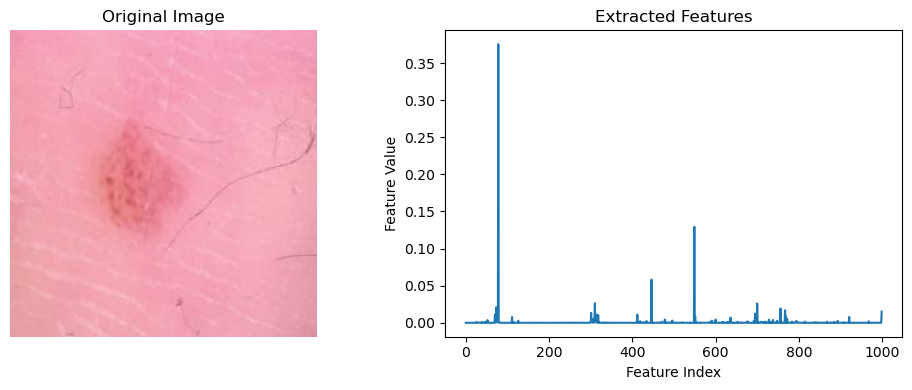

In [ ]:
#Visualization
base_model = ResNet50(weights='imagenet')

# Function to visualize the features for a given image
def visualize_features(img_path, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using the pre-trained model
    features = model.predict(img_array).flatten()

    plt.figure(figsize=(10, 4))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Plot the extracted features
    plt.subplot(1, 2, 2)
    plt.plot(features)
    plt.title('Extracted Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

    plt.tight_layout()
    plt.show()

# Visualize features for a sample image
sample_image_path = r'C:\Users\defaultuser0\images_\nv\ISIC_0026077.jpg'
visualize_features(sample_image_path, base_model)

In [ ]:
# Load the updated metadata with feature paths
metadata_path = 'ResNet.csv'
metadata = pd.read_csv(metadata_path)

# Filter out rows with missing feature paths
metadata = metadata.dropna(subset=['feature_path'])

# Load features and labels
features = np.array([np.load(path) for path in metadata['feature_path']])
labels = metadata['dx'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
#SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_Sv = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions_Sv)
report = classification_report(y_test, predictions_Sv)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n' , report)

Accuracy: 0.8660714285714286
Classification Report:
               precision    recall  f1-score   support

       akiec       0.89      0.88      0.89       182
         bcc       0.87      0.84      0.85       166
         bkl       0.82      0.83      0.82       153
          df       0.94      0.91      0.93       156
         mel       0.77      0.80      0.78       152
          nv       0.81      0.81      0.81       152
        vasc       0.96      0.99      0.97       159

    accuracy                           0.87      1120
   macro avg       0.87      0.86      0.86      1120
weighted avg       0.87      0.87      0.87      1120



Confusion Matrix:


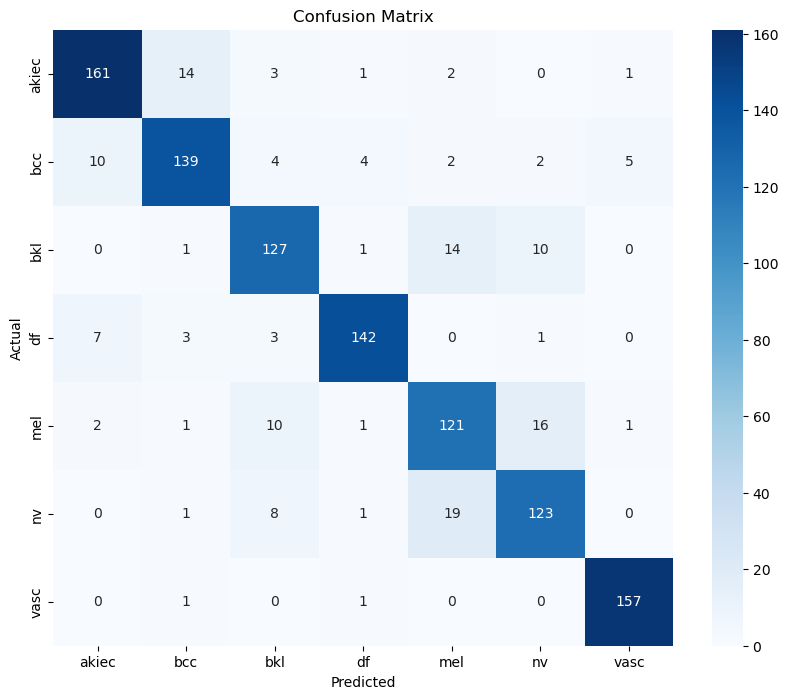

In [ ]:
# Print Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_Sv)
print("Confusion Matrix:")

# Plot colored confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print('Classification Report (Random Forest):')
print(report_rf)

Accuracy (Random Forest): 0.8205357142857143
Classification Report (Random Forest):
              precision    recall  f1-score   support

       akiec       0.89      0.82      0.85       182
         bcc       0.80      0.81      0.80       166
         bkl       0.75      0.74      0.74       153
          df       0.93      0.83      0.88       156
         mel       0.68      0.80      0.73       152
          nv       0.80      0.81      0.80       152
        vasc       0.92      0.94      0.93       159

    accuracy                           0.82      1120
   macro avg       0.82      0.82      0.82      1120
weighted avg       0.83      0.82      0.82      1120



Confusion Matrix:


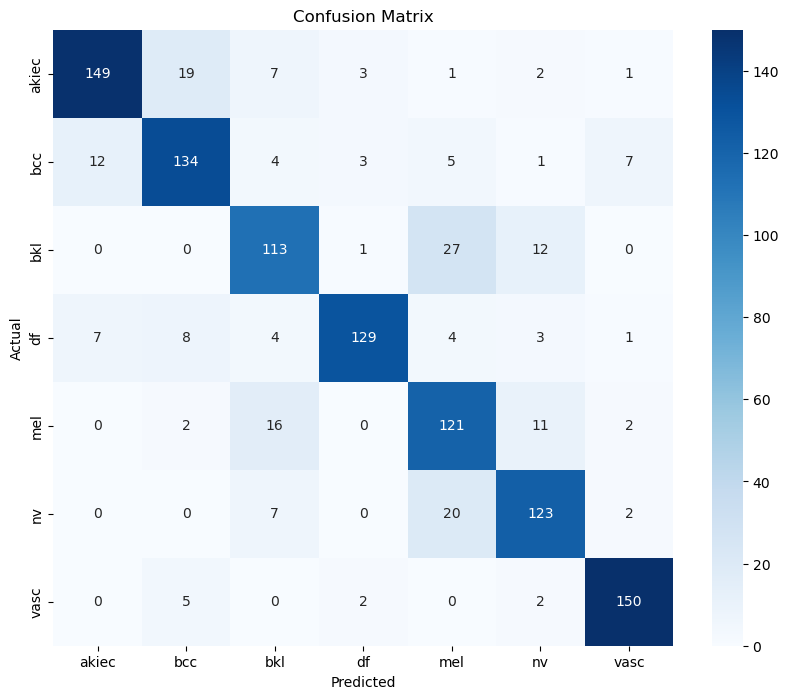

In [ ]:
# Print Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix:")

# Plot colored confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
report_logistic = classification_report(y_test, predictions_logistic)

print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print('Classification Report (Logistic Regression):')
print(report_logistic)

Accuracy (Logistic Regression): 0.85625
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       akiec       0.91      0.88      0.90       182
         bcc       0.87      0.86      0.86       166
         bkl       0.76      0.80      0.78       153
          df       0.95      0.94      0.94       156
         mel       0.76      0.78      0.77       152
          nv       0.77      0.75      0.76       152
        vasc       0.96      0.98      0.97       159

    accuracy                           0.86      1120
   macro avg       0.85      0.85      0.85      1120
weighted avg       0.86      0.86      0.86      1120



C:\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:


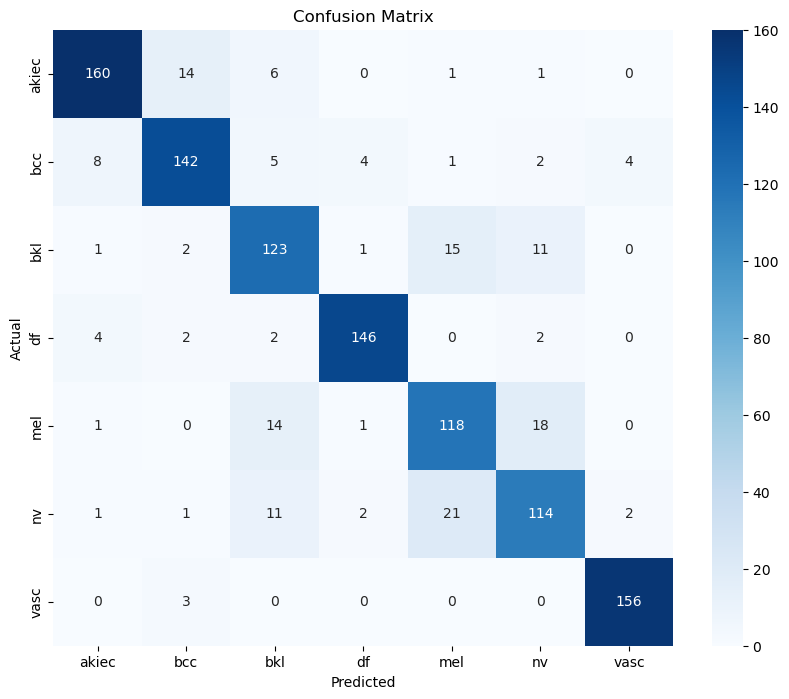

In [ ]:
# Print Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_logistic)

print("Confusion Matrix:")

# Plot colored confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Combine predictions into a list
all_predictions = [predictions_logistic, predictions_Sv , predictions_rf]

all_predictions_transposed = zip(*all_predictions)

# Define a function to get the majority class from a list of predictions
def majority_vote(predictions):
    counter = Counter(predictions)
    majority_class = counter.most_common(1)[0][0]
    return majority_class

# Apply majority vote for each image
merged_predictions = [majority_vote(predictions) for predictions in all_predictions_transposed]

# Display the merged predictions
print(f'Merged Predictions: {merged_predictions}')

Merged Predictions: ['nv', 'nv', 'bkl', 'df', 'df', 'bkl', 'bkl', 'bkl', 'mel', 'bcc', 'nv', 'df', 'nv', 'bkl', 'bcc', 'nv', 'bcc', 'akiec', 'df', 'bkl', 'bkl', 'akiec', 'mel', 'df', 'nv', 'mel', 'akiec', 'bkl', 'bkl', 'vasc', 'akiec', 'bkl', 'mel', 'df', 'bcc', 'bcc', 'mel', 'bkl', 'bkl', 'nv', 'akiec', 'akiec', 'df', 'df', 'akiec', 'vasc', 'nv', 'akiec', 'vasc', 'akiec', 'bcc', 'vasc', 'bcc', 'nv', 'vasc', 'bkl', 'bcc', 'bcc', 'bkl', 'df', 'df', 'mel', 'akiec', 'nv', 'vasc', 'bcc', 'nv', 'bkl', 'mel', 'vasc', 'akiec', 'akiec', 'akiec', 'df', 'vasc', 'akiec', 'bkl', 'akiec', 'vasc', 'bcc', 'mel', 'vasc', 'mel', 'df', 'df', 'nv', 'akiec', 'bcc', 'nv', 'akiec', 'df', 'df', 'df', 'df', 'akiec', 'df', 'mel', 'bkl', 'bkl', 'vasc', 'df', 'vasc', 'vasc', 'nv', 'bkl', 'akiec', 'bkl', 'bkl', 'bkl', 'bkl', 'mel', 'mel', 'nv', 'df', 'bcc', 'nv', 'akiec', 'mel', 'akiec', 'akiec', 'vasc', 'bcc', 'vasc', 'vasc', 'df', 'nv', 'bkl', 'mel', 'akiec', 'bkl', 'df', 'bkl', 'vasc', 'mel', 'bcc', 'akiec', '

Prediction (Logistic Regression): nv
Prediction (SVM): nv
Prediction (Random Forest): bkl
Merged Prediction: nv


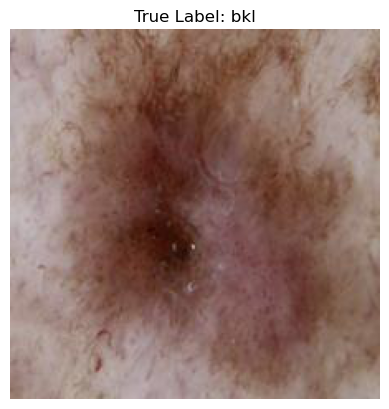

In [ ]:
index_to_display = 10

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()


Prediction (Logistic Regression): nv
Prediction (SVM): nv
Prediction (Random Forest): nv
Merged Prediction: nv


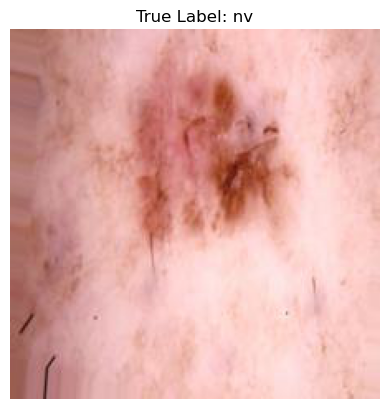

In [ ]:
index_to_display = 88

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): df
Prediction (SVM): df
Prediction (Random Forest): df
Merged Prediction: df


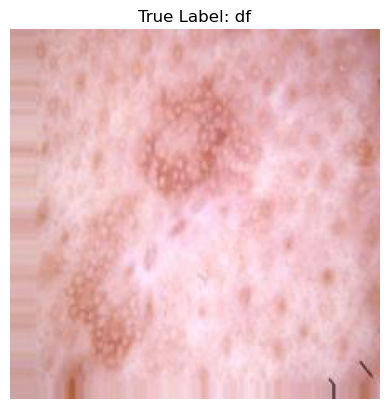

In [ ]:
index_to_display = 18

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): akiec
Prediction (SVM): akiec
Prediction (Random Forest): akiec
Merged Prediction: akiec


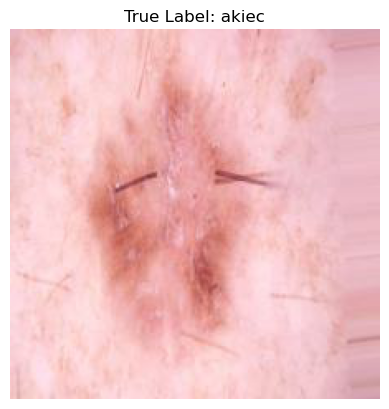

In [ ]:
index_to_display = 21

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): nv
Prediction (SVM): bkl
Prediction (Random Forest): nv
Merged Prediction: nv


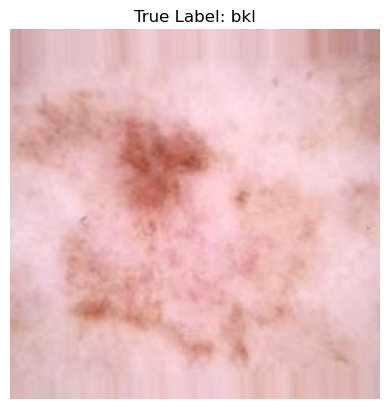

In [ ]:
index_to_display = 666

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): mel
Prediction (SVM): mel
Prediction (Random Forest): mel
Merged Prediction: mel


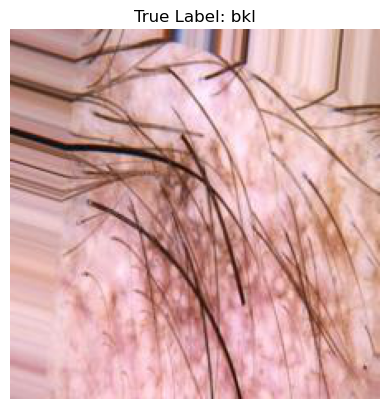

In [ ]:
index_to_display = 314

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_Sv[index_to_display]}')
print(f'Prediction (Random Forest): {predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

##  HOG feature extraction with SVM , RF, and LR Classifers

In [ ]:
metadata_path = r'C:\test\metadata_image.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:
print(metadata)

                          image_id     dx  \
0     augmented_ISIC_0025247.jpg_0  akiec   
1     augmented_ISIC_0028132.jpg_0  akiec   
2     augmented_ISIC_0031918.jpg_2  akiec   
3     augmented_ISIC_0026645.jpg_0  akiec   
4     augmented_ISIC_0025264.jpg_1  akiec   
...                            ...    ...   
5595  augmented_ISIC_0029439.jpg_5   vasc   
5596  augmented_ISIC_0024747.jpg_4   vasc   
5597  augmented_ISIC_0026693.jpg_4   vasc   
5598  augmented_ISIC_0027790.jpg_4   vasc   
5599  augmented_ISIC_0031197.jpg_3   vasc   

                                             image_path  label  
0     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
1     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
2     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
3     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
4     C:\Users\defaultuser0\images_\akiec\augmented_...      0  
...                                                 ...    ...  
5595

In [ ]:
#Using HOG feature extraction
def extract_hog_features(img_path, target_size=(224, 224)):
    # Load the image
    img = cv2.imread(img_path)

    # Resize the image
    img = cv2.resize(img, target_size)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extract HOG features
    hog_features = hog(img_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)

    return hog_features

img_paths = metadata['image_path'].tolist()

# Extract HOG features for the entire dataset
features = np.array([extract_hog_features(img_path) for img_path in img_paths])

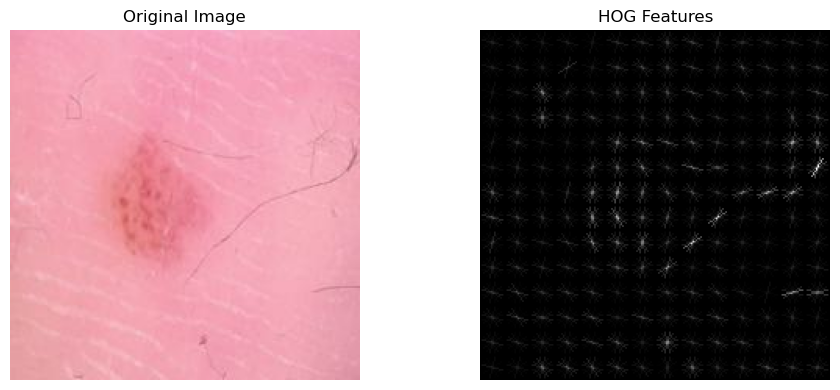

In [ ]:
# Visualization
def visualize_hog_features(img_path, target_size=(224, 224)):
    # Load the image
    img = cv2.imread(img_path)

    # Resize the image
    img = cv2.resize(img, target_size)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extract HOG features
    hog_features, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

    # Enhance the visualization of HOG features
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    plt.figure(figsize=(10, 4))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Plot the HOG features
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize HOG features for a sample image
sample_image_path = r'C:\Users\defaultuser0\images_\nv\ISIC_0026077.jpg'
visualize_hog_features(sample_image_path)

In [ ]:
y = metadata['dx'].values
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Accuracy: 0.6517857142857143
Classification Report:
              precision    recall  f1-score   support

       akiec       0.66      0.69      0.67       182
         bcc       0.60      0.58      0.59       166
         bkl       0.58      0.64      0.61       153
          df       0.68      0.65      0.67       156
         mel       0.60      0.63      0.62       152
          nv       0.57      0.56      0.56       152
        vasc       0.88      0.81      0.84       159

    accuracy                           0.65      1120
   macro avg       0.65      0.65      0.65      1120
weighted avg       0.66      0.65      0.65      1120

Confusion Matrix:


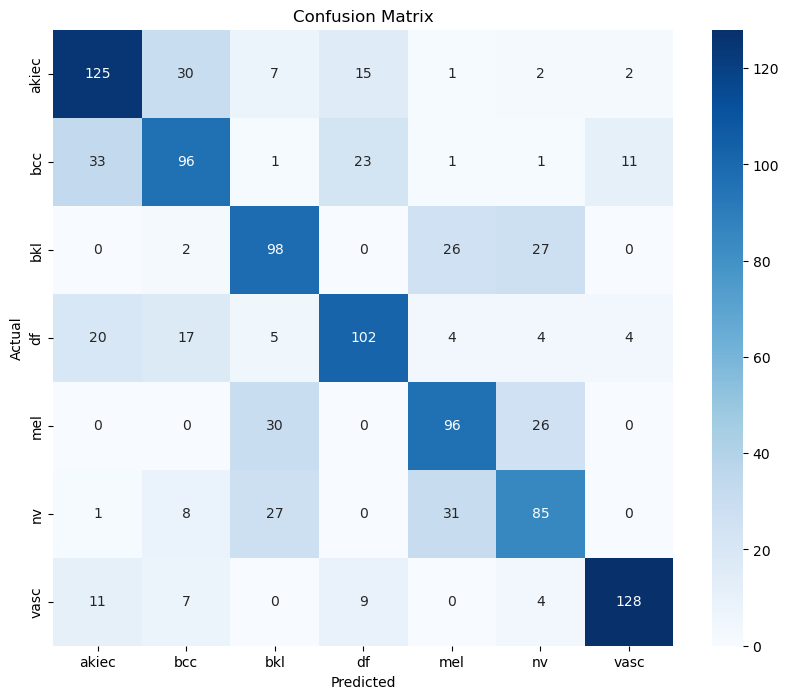

In [ ]:
# SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
predictions_svm = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions_svm)
report = classification_report(y_test, predictions_svm)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_svm)
print('Confusion Matrix:')

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6964285714285714
Classification Report:
              precision    recall  f1-score   support

       akiec       0.74      0.70      0.72       182
         bcc       0.73      0.59      0.65       166
         bkl       0.68      0.69      0.69       153
          df       0.64      0.67      0.66       156
         mel       0.69      0.62      0.66       152
          nv       0.59      0.76      0.66       152
        vasc       0.83      0.84      0.83       159

    accuracy                           0.70      1120
   macro avg       0.70      0.70      0.70      1120
weighted avg       0.70      0.70      0.70      1120



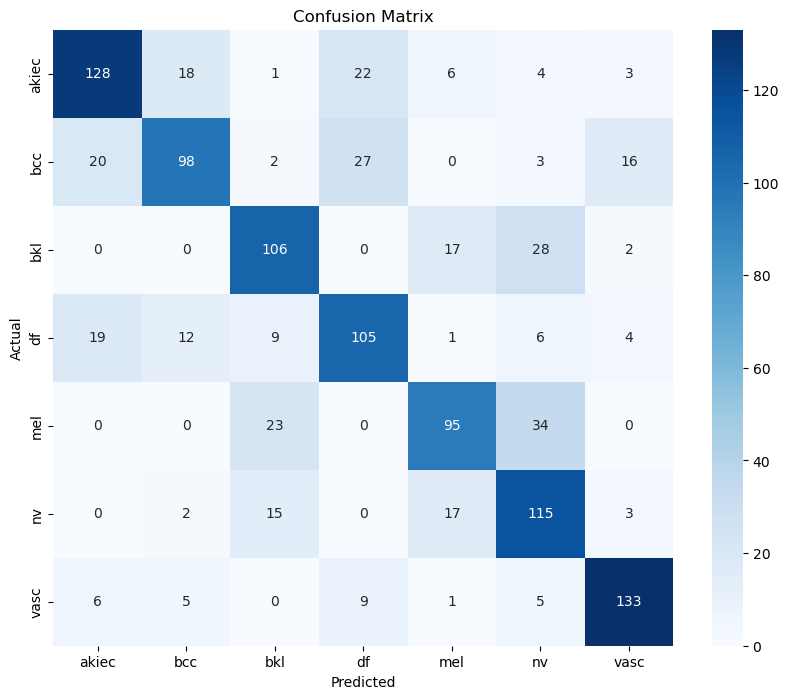

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
predictions_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Accuracy: {accuracy_rf}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, predictions_rf))

# Display confusion matrix
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5571428571428572
Classification Report:
              precision    recall  f1-score   support

       akiec       0.55      0.54      0.55       182
         bcc       0.48      0.43      0.46       166
         bkl       0.49      0.54      0.51       153
          df       0.55      0.54      0.54       156
         mel       0.51      0.56      0.53       152
          nv       0.55      0.59      0.57       152
        vasc       0.80      0.71      0.75       159

    accuracy                           0.56      1120
   macro avg       0.56      0.56      0.56      1120
weighted avg       0.56      0.56      0.56      1120

Confusion Matrix:


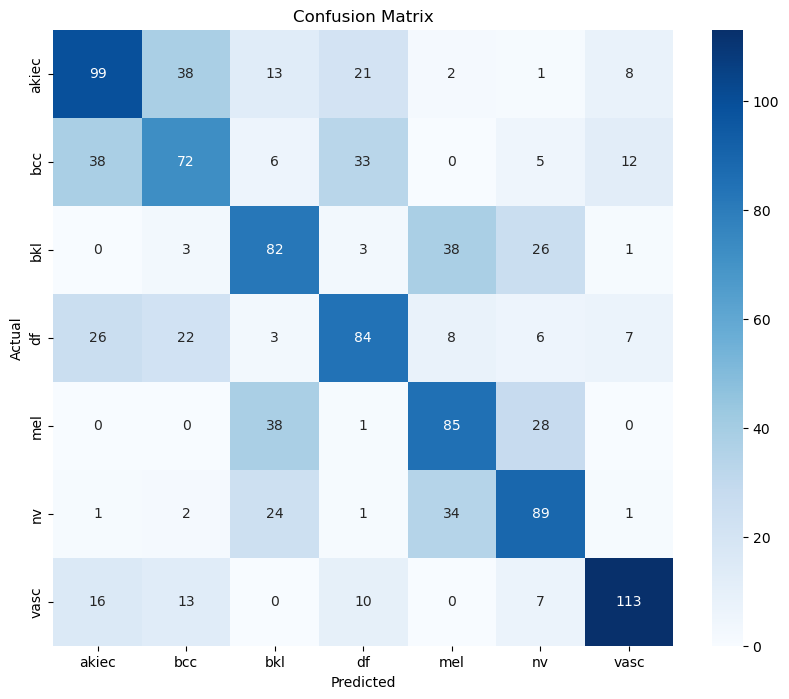

In [ ]:
# Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
print(f'Accuracy (Logistic Regression): {accuracy_logistic}')

# Display classification report
print('Classification Report (Logistic Regression):')
print(classification_report(y_test, predictions_logistic))

# Display confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, predictions_logistic)
print('Confusion Matrix:')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [ ]:
# Combine predictions into a list
all_predictions = [predictions_svm, predictions_rf, predictions_logistic]

# Transpose the list to have predictions for each image grouped together
all_predictions_transposed = zip(*all_predictions)

# Define a function to get the majority class from a list of predictions
def majority_vote(predictions):
    counter = Counter(predictions)
    majority_class = counter.most_common(1)[0][0]
    return majority_class

# Apply majority vote for each image
merged_predictions = [majority_vote(predictions) for predictions in all_predictions_transposed]

# Display the merged predictions
print(f'Merged Predictions: {merged_predictions}')

Merged Predictions: ['nv', 'nv', 'bkl', 'df', 'df', 'nv', 'bkl', 'mel', 'bkl', 'df', 'mel', 'bcc', 'bkl', 'bkl', 'bcc', 'bkl', 'mel', 'bcc', 'bcc', 'bkl', 'bkl', 'akiec', 'mel', 'df', 'mel', 'mel', 'bcc', 'nv', 'bkl', 'vasc', 'akiec', 'bcc', 'mel', 'df', 'akiec', 'bcc', 'mel', 'bkl', 'bkl', 'nv', 'akiec', 'bcc', 'bcc', 'vasc', 'akiec', 'vasc', 'nv', 'df', 'vasc', 'akiec', 'akiec', 'vasc', 'bcc', 'mel', 'vasc', 'bkl', 'akiec', 'df', 'bkl', 'df', 'df', 'mel', 'df', 'nv', 'vasc', 'akiec', 'nv', 'bkl', 'nv', 'akiec', 'akiec', 'akiec', 'akiec', 'akiec', 'vasc', 'akiec', 'bkl', 'akiec', 'vasc', 'df', 'mel', 'vasc', 'mel', 'df', 'bcc', 'nv', 'akiec', 'df', 'nv', 'akiec', 'akiec', 'df', 'df', 'df', 'bcc', 'mel', 'mel', 'nv', 'bkl', 'vasc', 'df', 'vasc', 'vasc', 'nv', 'bkl', 'akiec', 'bkl', 'bkl', 'bkl', 'bkl', 'mel', 'mel', 'bcc', 'akiec', 'bcc', 'bkl', 'akiec', 'mel', 'df', 'akiec', 'akiec', 'bcc', 'vasc', 'vasc', 'akiec', 'nv', 'vasc', 'mel', 'akiec', 'bkl', 'nv', 'bkl', 'vasc', 'bkl', 'bcc'

Prediction (Logistic Regression): mel
Prediction (SVM): mel
Prediction (Random Forest): nv
Merged Prediction: mel


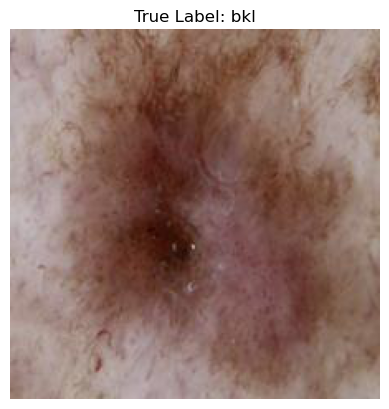

In [ ]:
index_to_display = 10

true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_svm[index_to_display]}')
print(f'Prediction (Random Forest): { predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()

Prediction (Logistic Regression): akiec
Prediction (SVM): akiec
Prediction (Random Forest): akiec
Merged Prediction: akiec


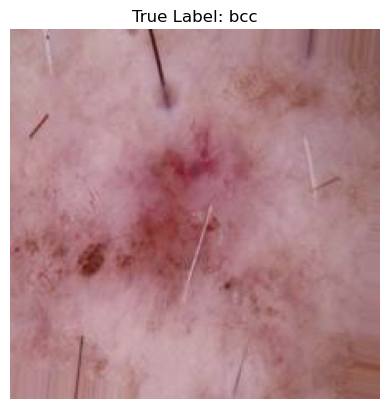

In [ ]:
index_to_display = 896

# Get the true label
true_label = y_test[index_to_display]

# Extract the image path for the test image
img_path = metadata['image_path'][index_to_display]

# Load the original test image without preprocessing
img = image.load_img(img_path, target_size=(224, 224))

# Display the original image along with true label
plt.imshow(img)
plt.title(f'True Label: {true_label}')

# Display predictions for each classifier
print(f'Prediction (Logistic Regression): {predictions_logistic[index_to_display]}')
print(f'Prediction (SVM): {predictions_svm[index_to_display]}')
print(f'Prediction (Random Forest): { predictions_rf[index_to_display]}')

# Display merged prediction using majority voting
print(f'Merged Prediction: {merged_predictions[index_to_display]}')

plt.axis('off')
plt.show()